In [1]:
from catboost import CatBoostRegressor

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

datetime  season  holiday  ...  casual  registered  count
0  2011-01-01 00:00:00       1        0  ...       3          13     16
1  2011-01-01 01:00:00       1        0  ...       8          32     40
2  2011-01-01 02:00:00       1        0  ...       5          27     32
3  2011-01-01 03:00:00       1        0  ...       3          10     13
4  2011-01-01 04:00:00       1        0  ...       0           1      1

[5 rows x 12 columns]

In [5]:
df.drop(['casual','registered','temp'],axis=1,inplace=True)

In [6]:
df.head()

datetime  season  holiday  ...  humidity  windspeed  count
0  2011-01-01 00:00:00       1        0  ...        81        0.0     16
1  2011-01-01 01:00:00       1        0  ...        80        0.0     40
2  2011-01-01 02:00:00       1        0  ...        80        0.0     32
3  2011-01-01 03:00:00       1        0  ...        75        0.0     13
4  2011-01-01 04:00:00       1        0  ...        75        0.0      1

[5 rows x 9 columns]

In [7]:
type(df['datetime'][0])

str

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df.describe()

season       holiday  ...     windspeed         count
count  10886.000000  10886.000000  ...  10886.000000  10886.000000
mean       2.506614      0.028569  ...     12.799395    191.574132
std        1.116174      0.166599  ...      8.164537    181.144454
min        1.000000      0.000000  ...      0.000000      1.000000
25%        2.000000      0.000000  ...      7.001500     42.000000
50%        3.000000      0.000000  ...     12.998000    145.000000
75%        4.000000      0.000000  ...     16.997900    284.000000
max        4.000000      1.000000  ...     56.996900    977.000000

[8 rows x 8 columns]

In [10]:
 df['Month'] = df['datetime'].apply(lambda x : x.month)

In [11]:
df['Year'] = df['datetime'].apply(lambda x : x.year)

In [12]:
df.describe()

season       holiday  ...         Month          Year
count  10886.000000  10886.000000  ...  10886.000000  10886.000000
mean       2.506614      0.028569  ...      6.521495   2011.501929
std        1.116174      0.166599  ...      3.444373      0.500019
min        1.000000      0.000000  ...      1.000000   2011.000000
25%        2.000000      0.000000  ...      4.000000   2011.000000
50%        3.000000      0.000000  ...      7.000000   2012.000000
75%        4.000000      0.000000  ...     10.000000   2012.000000
max        4.000000      1.000000  ...     12.000000   2012.000000

[8 rows x 10 columns]

In [13]:
df['datetime'][len(df) - 1]

Timestamp('2012-12-19 23:00:00')

In [14]:
df['datetime'][0]

Timestamp('2011-01-01 00:00:00')

In [15]:
len(df)

10886

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   count       10886 non-null  int64         
 9   Month       10886 non-null  int64         
 10  Year        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 935.6 KB


In [17]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
atemp         0
humidity      0
windspeed     0
count         0
Month         0
Year          0
dtype: int64

In [18]:
df['Hour'] = df['datetime'].apply(lambda x: x.hour)

In [19]:
df.corr()['count'].sort_values()[:-1]

humidity     -0.317371
weather      -0.128655
holiday      -0.005393
workingday    0.011594
windspeed     0.101369
season        0.163439
Month         0.166862
Year          0.260403
atemp         0.389784
Hour          0.400601
Name: count, dtype: float64

In [20]:
df.drop('datetime',axis=1,inplace=True)

In [21]:
df.head()

season  holiday  workingday  weather  ...  count  Month  Year  Hour
0       1        0           0        1  ...     16      1  2011     0
1       1        0           0        1  ...     40      1  2011     1
2       1        0           0        1  ...     32      1  2011     2
3       1        0           0        1  ...     13      1  2011     3
4       1        0           0        1  ...      1      1  2011     4

[5 rows x 11 columns]

# EDA

<AxesSubplot:xlabel='count', ylabel='Count'>

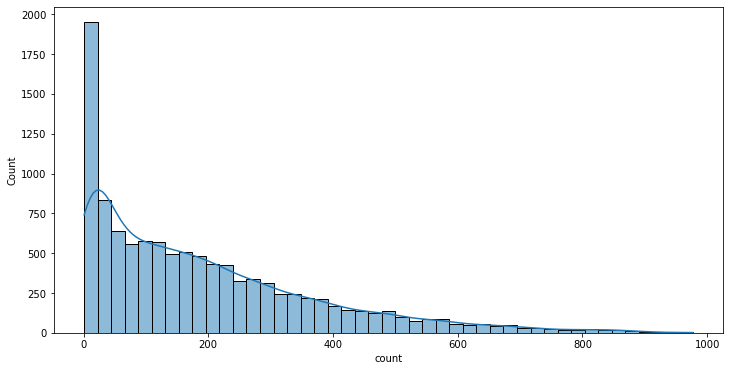

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data=df , x = 'count' , kde=True)
# Now we can apply Standard scaler as the data is right skewed, hence normalization won't be best transformer

<AxesSubplot:>

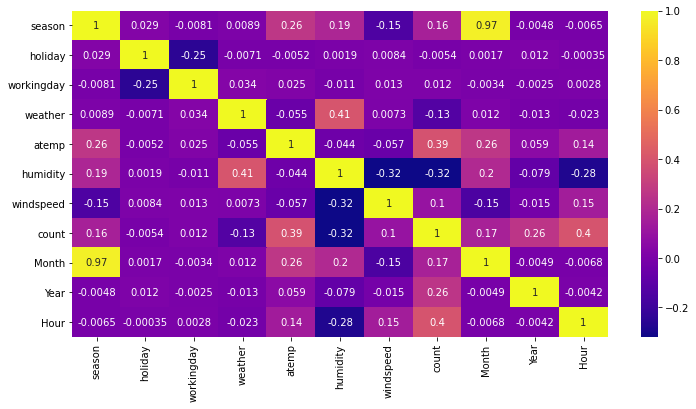

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr() , annot=True, cmap='plasma')

<AxesSubplot:xlabel='season', ylabel='count'>

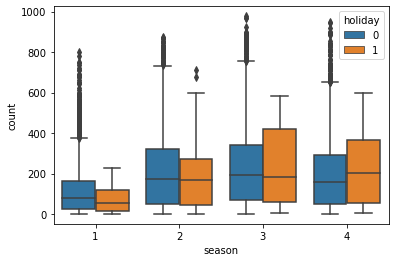

In [24]:
sns.boxplot(data=df , x = 'season' , y ='count' , hue = 'holiday')

<AxesSubplot:xlabel='weather', ylabel='count'>

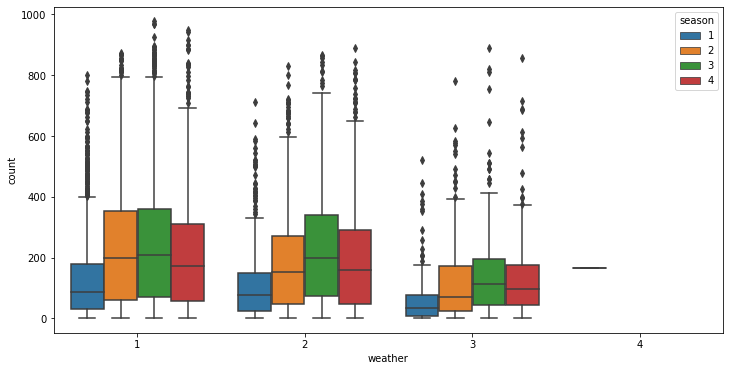

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df , x = 'weather' , y ='count' , hue = 'season')

<AxesSubplot:xlabel='Hour', ylabel='count'>

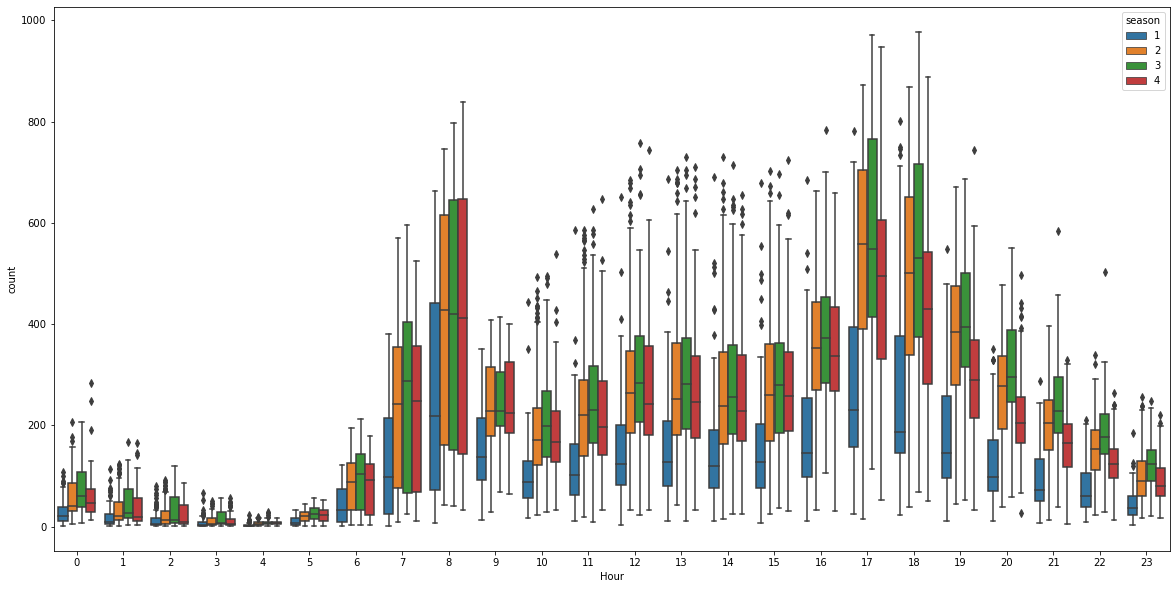

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df , x = 'Hour' , y ='count' , hue = 'season')

In [27]:
df[(df['weather']==4)]
# must have been some really urgent and important work that's why thw user took bike even during heavy snowfall/rain

season  holiday  workingday  weather  ...  count  Month  Year  Hour
5631       1        0           1        4  ...    164      1  2012    18

[1 rows x 11 columns]

# ENCODING CATEGORICAL DATA

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [29]:
df.head()

season  holiday  workingday  weather  ...  count  Month  Year  Hour
0       1        0           0        1  ...     16      1  2011     0
1       1        0           0        1  ...     40      1  2011     1
2       1        0           0        1  ...     32      1  2011     2
3       1        0           0        1  ...     13      1  2011     3
4       1        0           0        1  ...      1      1  2011     4

[5 rows x 11 columns]

In [30]:
train = df.copy()

In [31]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder() , [0,1,2,3])] , remainder='passthrough')

In [32]:
X = train.drop('count',axis=1)
y = train['count']

In [33]:
X = np.array(ct.fit_transform(X))

In [34]:
print(X[0])

[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.4395e+01 8.1000e+01 0.0000e+00 1.0000e+00 2.0110e+03 0.0000e+00]


In [35]:
y = np.array(y)

In [36]:
y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [37]:
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
X_train = sc.fit_transform(X_train)

In [42]:
X_test = sc.transform(X_test)

In [43]:
print(X_train)

[[ 1.74857313 -0.57775436 -0.57795641 ... -1.31762702 -1.00447194
   0.79363864]
 [-0.57189487 -0.57775436  1.73023429 ...  0.71617873 -1.00447194
   1.65839457]
 [-0.57189487 -0.57775436  1.73023429 ...  0.42563505 -1.00447194
  -1.0799992 ]
 ...
 [-0.57189487 -0.57775436 -0.57795641 ...  1.58780976 -1.00447194
   0.64951265]
 [ 1.74857313 -0.57775436 -0.57795641 ... -1.31762702 -1.00447194
  -0.64762124]
 [-0.57189487  1.73083937 -0.57795641 ... -0.44599599  0.99554797
  -0.64762124]]


In [44]:
print(X_test)

[[-0.57189487 -0.57775436  1.73023429 ...  0.13509137 -1.00447194
  -0.07111729]
 [ 1.74857313 -0.57775436 -0.57795641 ... -1.6081707   0.99554797
  -0.79174722]
 [-0.57189487 -0.57775436 -0.57795641 ...  1.58780976 -1.00447194
   0.93776463]
 ...
 [ 1.74857313 -0.57775436 -0.57795641 ... -1.6081707   0.99554797
   0.64951265]
 [-0.57189487 -0.57775436  1.73023429 ...  0.13509137  0.99554797
  -0.50349525]
 [ 1.74857313 -0.57775436 -0.57795641 ... -1.6081707  -1.00447194
  -1.0799992 ]]


In [45]:
from catboost import CatBoostRegressor

In [46]:
cbr = CatBoostRegressor(loss_function='RMSE' , random_seed=42  , iterations = 10000)

In [47]:
cbr.fit(X_train,y_train , eval_set=(X_test,y_test))

Learning rate set to 0.016113
0:	learn: 179.5789084	test: 178.5764911	best: 178.5764911 (0)	total: 151ms	remaining: 25m 10s
1:	learn: 177.8037921	test: 176.9016745	best: 176.9016745 (1)	total: 154ms	remaining: 12m 47s
2:	learn: 176.0483108	test: 175.2053476	best: 175.2053476 (2)	total: 156ms	remaining: 8m 39s
3:	learn: 174.4697975	test: 173.6361932	best: 173.6361932 (3)	total: 158ms	remaining: 6m 35s
4:	learn: 172.8529013	test: 172.0734333	best: 172.0734333 (4)	total: 161ms	remaining: 5m 21s
5:	learn: 171.1535984	test: 170.4441616	best: 170.4441616 (5)	total: 163ms	remaining: 4m 32s
6:	learn: 169.4811031	test: 168.8266274	best: 168.8266274 (6)	total: 166ms	remaining: 3m 57s
7:	learn: 168.0388823	test: 167.4157077	best: 167.4157077 (7)	total: 169ms	remaining: 3m 31s
8:	learn: 166.4336973	test: 165.8760632	best: 165.8760632 (8)	total: 172ms	remaining: 3m 10s
9:	learn: 164.9313706	test: 164.4152465	best: 164.4152465 (9)	total: 174ms	remaining: 2m 53s
10:	learn: 163.3409596	test: 162.89577

143:	learn: 80.0957578	test: 81.9181483	best: 81.9181483 (143)	total: 497ms	remaining: 34s
144:	learn: 79.7281965	test: 81.5534986	best: 81.5534986 (144)	total: 499ms	remaining: 33.9s
145:	learn: 79.5948564	test: 81.4215974	best: 81.4215974 (145)	total: 502ms	remaining: 33.9s
146:	learn: 79.1317955	test: 80.9867752	best: 80.9867752 (146)	total: 505ms	remaining: 33.8s
147:	learn: 78.9915016	test: 80.8388630	best: 80.8388630 (147)	total: 507ms	remaining: 33.8s
148:	learn: 78.6141511	test: 80.4421142	best: 80.4421142 (148)	total: 510ms	remaining: 33.7s
149:	learn: 78.3039853	test: 80.1247660	best: 80.1247660 (149)	total: 512ms	remaining: 33.6s
150:	learn: 78.0617213	test: 79.8780337	best: 79.8780337 (150)	total: 515ms	remaining: 33.6s
151:	learn: 77.8367256	test: 79.6579501	best: 79.6579501 (151)	total: 517ms	remaining: 33.5s
152:	learn: 77.4089836	test: 79.2464112	best: 79.2464112 (152)	total: 520ms	remaining: 33.5s
153:	learn: 76.9950475	test: 78.8483010	best: 78.8483010 (153)	total: 52

281:	learn: 59.7028739	test: 61.7566157	best: 61.7566157 (281)	total: 828ms	remaining: 28.5s
282:	learn: 59.5779435	test: 61.6383971	best: 61.6383971 (282)	total: 831ms	remaining: 28.5s
283:	learn: 59.5458225	test: 61.6044637	best: 61.6044637 (283)	total: 833ms	remaining: 28.5s
284:	learn: 59.4569134	test: 61.5270708	best: 61.5270708 (284)	total: 836ms	remaining: 28.5s
285:	learn: 59.4089357	test: 61.4903078	best: 61.4903078 (285)	total: 838ms	remaining: 28.5s
286:	learn: 59.3753568	test: 61.4599526	best: 61.4599526 (286)	total: 841ms	remaining: 28.5s
287:	learn: 59.3509160	test: 61.4359419	best: 61.4359419 (287)	total: 843ms	remaining: 28.4s
288:	learn: 59.3070561	test: 61.4015163	best: 61.4015163 (288)	total: 846ms	remaining: 28.4s
289:	learn: 59.1045124	test: 61.1999403	best: 61.1999403 (289)	total: 848ms	remaining: 28.4s
290:	learn: 59.0534174	test: 61.1529251	best: 61.1529251 (290)	total: 851ms	remaining: 28.4s
291:	learn: 58.9337048	test: 61.0295333	best: 61.0295333 (291)	total: 

415:	learn: 52.2882781	test: 54.7023990	best: 54.7023990 (415)	total: 1.16s	remaining: 26.6s
416:	learn: 52.2691565	test: 54.6877377	best: 54.6877377 (416)	total: 1.16s	remaining: 26.6s
417:	learn: 52.2030611	test: 54.6242115	best: 54.6242115 (417)	total: 1.16s	remaining: 26.6s
418:	learn: 52.1785704	test: 54.6003169	best: 54.6003169 (418)	total: 1.16s	remaining: 26.6s
419:	learn: 52.1533472	test: 54.5813853	best: 54.5813853 (419)	total: 1.17s	remaining: 26.6s
420:	learn: 52.1100665	test: 54.5478268	best: 54.5478268 (420)	total: 1.17s	remaining: 26.6s
421:	learn: 52.0950365	test: 54.5370508	best: 54.5370508 (421)	total: 1.17s	remaining: 26.6s
422:	learn: 52.0401452	test: 54.4795144	best: 54.4795144 (422)	total: 1.17s	remaining: 26.6s
423:	learn: 51.9896203	test: 54.4276488	best: 54.4276488 (423)	total: 1.18s	remaining: 26.6s
424:	learn: 51.9525864	test: 54.3977902	best: 54.3977902 (424)	total: 1.18s	remaining: 26.6s
425:	learn: 51.9290581	test: 54.3737059	best: 54.3737059 (425)	total: 

555:	learn: 48.1473756	test: 51.0750546	best: 51.0750546 (555)	total: 1.49s	remaining: 25.2s
556:	learn: 48.1290702	test: 51.0670835	best: 51.0670835 (556)	total: 1.49s	remaining: 25.2s
557:	learn: 48.1164808	test: 51.0626278	best: 51.0626278 (557)	total: 1.49s	remaining: 25.2s
558:	learn: 48.1007663	test: 51.0507505	best: 51.0507505 (558)	total: 1.49s	remaining: 25.2s
559:	learn: 48.0812652	test: 51.0334514	best: 51.0334514 (559)	total: 1.5s	remaining: 25.2s
560:	learn: 48.0479121	test: 51.0016885	best: 51.0016885 (560)	total: 1.5s	remaining: 25.2s
561:	learn: 48.0253233	test: 50.9841415	best: 50.9841415 (561)	total: 1.5s	remaining: 25.2s
562:	learn: 48.0056746	test: 50.9680838	best: 50.9680838 (562)	total: 1.5s	remaining: 25.2s
563:	learn: 47.9792148	test: 50.9454459	best: 50.9454459 (563)	total: 1.51s	remaining: 25.2s
564:	learn: 47.9467674	test: 50.9118649	best: 50.9118649 (564)	total: 1.51s	remaining: 25.2s
565:	learn: 47.9312611	test: 50.9020197	best: 50.9020197 (565)	total: 1.51

696:	learn: 45.3960367	test: 48.9442177	best: 48.9442177 (696)	total: 1.81s	remaining: 24.2s
697:	learn: 45.3790976	test: 48.9423165	best: 48.9423165 (697)	total: 1.82s	remaining: 24.2s
698:	learn: 45.3658333	test: 48.9300073	best: 48.9300073 (698)	total: 1.82s	remaining: 24.2s
699:	learn: 45.3398069	test: 48.9150722	best: 48.9150722 (699)	total: 1.82s	remaining: 24.2s
700:	learn: 45.3298463	test: 48.9097023	best: 48.9097023 (700)	total: 1.82s	remaining: 24.2s
701:	learn: 45.3119430	test: 48.8991561	best: 48.8991561 (701)	total: 1.83s	remaining: 24.2s
702:	learn: 45.2982948	test: 48.8842082	best: 48.8842082 (702)	total: 1.83s	remaining: 24.2s
703:	learn: 45.2837491	test: 48.8697982	best: 48.8697982 (703)	total: 1.83s	remaining: 24.2s
704:	learn: 45.2644849	test: 48.8522913	best: 48.8522913 (704)	total: 1.84s	remaining: 24.2s
705:	learn: 45.2556296	test: 48.8453716	best: 48.8453716 (705)	total: 1.84s	remaining: 24.2s
706:	learn: 45.2483092	test: 48.8419386	best: 48.8419386 (706)	total: 

836:	learn: 43.8130945	test: 47.7307921	best: 47.7307921 (836)	total: 2.14s	remaining: 23.5s
837:	learn: 43.8096730	test: 47.7305032	best: 47.7305032 (837)	total: 2.15s	remaining: 23.5s
838:	learn: 43.7994324	test: 47.7323045	best: 47.7305032 (837)	total: 2.15s	remaining: 23.5s
839:	learn: 43.7972866	test: 47.7322085	best: 47.7305032 (837)	total: 2.15s	remaining: 23.5s
840:	learn: 43.7951804	test: 47.7321372	best: 47.7305032 (837)	total: 2.15s	remaining: 23.5s
841:	learn: 43.7817585	test: 47.7322521	best: 47.7305032 (837)	total: 2.16s	remaining: 23.5s
842:	learn: 43.7729204	test: 47.7246637	best: 47.7246637 (842)	total: 2.16s	remaining: 23.5s
843:	learn: 43.7708562	test: 47.7246207	best: 47.7246207 (843)	total: 2.16s	remaining: 23.4s
844:	learn: 43.7617316	test: 47.7176337	best: 47.7176337 (844)	total: 2.16s	remaining: 23.5s
845:	learn: 43.7597071	test: 47.7176146	best: 47.7176146 (845)	total: 2.17s	remaining: 23.4s
846:	learn: 43.7470579	test: 47.7073349	best: 47.7073349 (846)	total: 

978:	learn: 42.4789997	test: 46.7891625	best: 46.7891625 (978)	total: 2.47s	remaining: 22.8s
979:	learn: 42.4775222	test: 46.7891534	best: 46.7891534 (979)	total: 2.48s	remaining: 22.8s
980:	learn: 42.4745503	test: 46.7881341	best: 46.7881341 (980)	total: 2.48s	remaining: 22.8s
981:	learn: 42.4647517	test: 46.7805735	best: 46.7805735 (981)	total: 2.48s	remaining: 22.8s
982:	learn: 42.4581036	test: 46.7773317	best: 46.7773317 (982)	total: 2.48s	remaining: 22.8s
983:	learn: 42.4540167	test: 46.7739378	best: 46.7739378 (983)	total: 2.48s	remaining: 22.8s
984:	learn: 42.4413318	test: 46.7641609	best: 46.7641609 (984)	total: 2.49s	remaining: 22.8s
985:	learn: 42.4279635	test: 46.7515506	best: 46.7515506 (985)	total: 2.49s	remaining: 22.8s
986:	learn: 42.4144616	test: 46.7435449	best: 46.7435449 (986)	total: 2.49s	remaining: 22.8s
987:	learn: 42.4114858	test: 46.7414920	best: 46.7414920 (987)	total: 2.5s	remaining: 22.8s
988:	learn: 42.4083628	test: 46.7408822	best: 46.7408822 (988)	total: 2

1107:	learn: 41.4252230	test: 46.0578301	best: 46.0578301 (1107)	total: 2.8s	remaining: 22.4s
1108:	learn: 41.4162477	test: 46.0541812	best: 46.0541812 (1108)	total: 2.8s	remaining: 22.4s
1109:	learn: 41.4089737	test: 46.0490821	best: 46.0490821 (1109)	total: 2.8s	remaining: 22.4s
1110:	learn: 41.4026284	test: 46.0476071	best: 46.0476071 (1110)	total: 2.8s	remaining: 22.4s
1111:	learn: 41.3926425	test: 46.0448568	best: 46.0448568 (1111)	total: 2.81s	remaining: 22.4s
1112:	learn: 41.3844711	test: 46.0388571	best: 46.0388571 (1112)	total: 2.81s	remaining: 22.4s
1113:	learn: 41.3772144	test: 46.0380247	best: 46.0380247 (1113)	total: 2.81s	remaining: 22.4s
1114:	learn: 41.3645105	test: 46.0305207	best: 46.0305207 (1114)	total: 2.81s	remaining: 22.4s
1115:	learn: 41.3574250	test: 46.0297774	best: 46.0297774 (1115)	total: 2.81s	remaining: 22.4s
1116:	learn: 41.3532873	test: 46.0289295	best: 46.0289295 (1116)	total: 2.82s	remaining: 22.4s
1117:	learn: 41.3429299	test: 46.0253757	best: 46.0253

1227:	learn: 40.5847098	test: 45.5225837	best: 45.5225837 (1227)	total: 3.12s	remaining: 22.3s
1228:	learn: 40.5813263	test: 45.5208922	best: 45.5208922 (1228)	total: 3.12s	remaining: 22.3s
1229:	learn: 40.5713760	test: 45.5146496	best: 45.5146496 (1229)	total: 3.12s	remaining: 22.3s
1230:	learn: 40.5600841	test: 45.5024580	best: 45.5024580 (1230)	total: 3.13s	remaining: 22.3s
1231:	learn: 40.5580677	test: 45.5005723	best: 45.5005723 (1231)	total: 3.13s	remaining: 22.3s
1232:	learn: 40.5493317	test: 45.4946613	best: 45.4946613 (1232)	total: 3.13s	remaining: 22.3s
1233:	learn: 40.5375426	test: 45.4875548	best: 45.4875548 (1233)	total: 3.13s	remaining: 22.3s
1234:	learn: 40.5279349	test: 45.4715751	best: 45.4715751 (1234)	total: 3.13s	remaining: 22.3s
1235:	learn: 40.5180763	test: 45.4628180	best: 45.4628180 (1235)	total: 3.14s	remaining: 22.3s
1236:	learn: 40.5087941	test: 45.4598658	best: 45.4598658 (1236)	total: 3.14s	remaining: 22.3s
1237:	learn: 40.4980765	test: 45.4466824	best: 45.

1362:	learn: 39.6420460	test: 44.8639870	best: 44.8639870 (1362)	total: 3.44s	remaining: 21.8s
1363:	learn: 39.6371813	test: 44.8634206	best: 44.8634206 (1363)	total: 3.45s	remaining: 21.8s
1364:	learn: 39.6266583	test: 44.8547497	best: 44.8547497 (1364)	total: 3.45s	remaining: 21.8s
1365:	learn: 39.6250762	test: 44.8535851	best: 44.8535851 (1365)	total: 3.45s	remaining: 21.8s
1366:	learn: 39.6186059	test: 44.8454592	best: 44.8454592 (1366)	total: 3.45s	remaining: 21.8s
1367:	learn: 39.6140310	test: 44.8447259	best: 44.8447259 (1367)	total: 3.46s	remaining: 21.8s
1368:	learn: 39.6065836	test: 44.8384445	best: 44.8384445 (1368)	total: 3.46s	remaining: 21.8s
1369:	learn: 39.6007091	test: 44.8276806	best: 44.8276806 (1369)	total: 3.46s	remaining: 21.8s
1370:	learn: 39.5884844	test: 44.8154833	best: 44.8154833 (1370)	total: 3.46s	remaining: 21.8s
1371:	learn: 39.5858640	test: 44.8137349	best: 44.8137349 (1371)	total: 3.47s	remaining: 21.8s
1372:	learn: 39.5792583	test: 44.8108347	best: 44.

1504:	learn: 38.8660904	test: 44.4201334	best: 44.4201334 (1504)	total: 3.77s	remaining: 21.3s
1505:	learn: 38.8591410	test: 44.4159764	best: 44.4159764 (1505)	total: 3.78s	remaining: 21.3s
1506:	learn: 38.8572759	test: 44.4156904	best: 44.4156904 (1506)	total: 3.78s	remaining: 21.3s
1507:	learn: 38.8529914	test: 44.4146149	best: 44.4146149 (1507)	total: 3.78s	remaining: 21.3s
1508:	learn: 38.8507246	test: 44.4138148	best: 44.4138148 (1508)	total: 3.78s	remaining: 21.3s
1509:	learn: 38.8486285	test: 44.4140481	best: 44.4138148 (1508)	total: 3.79s	remaining: 21.3s
1510:	learn: 38.8396329	test: 44.4067106	best: 44.4067106 (1510)	total: 3.79s	remaining: 21.3s
1511:	learn: 38.8332497	test: 44.4013139	best: 44.4013139 (1511)	total: 3.79s	remaining: 21.3s
1512:	learn: 38.8295937	test: 44.4002227	best: 44.4002227 (1512)	total: 3.79s	remaining: 21.3s
1513:	learn: 38.8252845	test: 44.3943658	best: 44.3943658 (1513)	total: 3.8s	remaining: 21.3s
1514:	learn: 38.8221473	test: 44.3903048	best: 44.3

1646:	learn: 38.2114750	test: 44.0544557	best: 44.0530826 (1645)	total: 4.11s	remaining: 20.8s
1647:	learn: 38.2049827	test: 44.0499550	best: 44.0499550 (1647)	total: 4.11s	remaining: 20.8s
1648:	learn: 38.1990255	test: 44.0513854	best: 44.0499550 (1647)	total: 4.11s	remaining: 20.8s
1649:	learn: 38.1875245	test: 44.0399734	best: 44.0399734 (1649)	total: 4.11s	remaining: 20.8s
1650:	learn: 38.1804905	test: 44.0381291	best: 44.0381291 (1650)	total: 4.12s	remaining: 20.8s
1651:	learn: 38.1771881	test: 44.0367398	best: 44.0367398 (1651)	total: 4.12s	remaining: 20.8s
1652:	learn: 38.1742650	test: 44.0367937	best: 44.0367398 (1651)	total: 4.12s	remaining: 20.8s
1653:	learn: 38.1680488	test: 44.0331571	best: 44.0331571 (1653)	total: 4.12s	remaining: 20.8s
1654:	learn: 38.1611156	test: 44.0345705	best: 44.0331571 (1653)	total: 4.13s	remaining: 20.8s
1655:	learn: 38.1528264	test: 44.0301328	best: 44.0301328 (1655)	total: 4.13s	remaining: 20.8s
1656:	learn: 38.1501908	test: 44.0293790	best: 44.

1783:	learn: 37.4733533	test: 43.6227622	best: 43.6227622 (1783)	total: 4.44s	remaining: 20.4s
1784:	learn: 37.4662798	test: 43.6167910	best: 43.6167910 (1784)	total: 4.44s	remaining: 20.4s
1785:	learn: 37.4647056	test: 43.6162614	best: 43.6162614 (1785)	total: 4.44s	remaining: 20.4s
1786:	learn: 37.4630442	test: 43.6156795	best: 43.6156795 (1786)	total: 4.45s	remaining: 20.4s
1787:	learn: 37.4583931	test: 43.6146908	best: 43.6146908 (1787)	total: 4.45s	remaining: 20.4s
1788:	learn: 37.4547642	test: 43.6139864	best: 43.6139864 (1788)	total: 4.45s	remaining: 20.4s
1789:	learn: 37.4491007	test: 43.6113995	best: 43.6113995 (1789)	total: 4.45s	remaining: 20.4s
1790:	learn: 37.4461685	test: 43.6121570	best: 43.6113995 (1789)	total: 4.46s	remaining: 20.4s
1791:	learn: 37.4426298	test: 43.6101804	best: 43.6101804 (1791)	total: 4.46s	remaining: 20.4s
1792:	learn: 37.4393112	test: 43.6126586	best: 43.6101804 (1791)	total: 4.46s	remaining: 20.4s
1793:	learn: 37.4345051	test: 43.6098842	best: 43.

1923:	learn: 36.8184435	test: 43.2996858	best: 43.2996858 (1923)	total: 4.77s	remaining: 20s
1924:	learn: 36.8123635	test: 43.2942766	best: 43.2942766 (1924)	total: 4.77s	remaining: 20s
1925:	learn: 36.8054378	test: 43.2877076	best: 43.2877076 (1925)	total: 4.79s	remaining: 20.1s
1926:	learn: 36.7977890	test: 43.2856405	best: 43.2856405 (1926)	total: 4.79s	remaining: 20.1s
1927:	learn: 36.7944590	test: 43.2842557	best: 43.2842557 (1927)	total: 4.79s	remaining: 20.1s
1928:	learn: 36.7882481	test: 43.2820744	best: 43.2820744 (1928)	total: 4.79s	remaining: 20.1s
1929:	learn: 36.7873544	test: 43.2821641	best: 43.2820744 (1928)	total: 4.8s	remaining: 20.1s
1930:	learn: 36.7823132	test: 43.2793944	best: 43.2793944 (1930)	total: 4.8s	remaining: 20.1s
1931:	learn: 36.7774353	test: 43.2767303	best: 43.2767303 (1931)	total: 4.8s	remaining: 20.1s
1932:	learn: 36.7732059	test: 43.2764619	best: 43.2764619 (1932)	total: 4.8s	remaining: 20.1s
1933:	learn: 36.7700391	test: 43.2754663	best: 43.2754663 

2051:	learn: 36.2846558	test: 43.0755883	best: 43.0755883 (2051)	total: 5.09s	remaining: 19.7s
2052:	learn: 36.2819019	test: 43.0780231	best: 43.0755883 (2051)	total: 5.09s	remaining: 19.7s
2053:	learn: 36.2797301	test: 43.0776601	best: 43.0755883 (2051)	total: 5.1s	remaining: 19.7s
2054:	learn: 36.2757074	test: 43.0755952	best: 43.0755883 (2051)	total: 5.1s	remaining: 19.7s
2055:	learn: 36.2716685	test: 43.0721002	best: 43.0721002 (2055)	total: 5.1s	remaining: 19.7s
2056:	learn: 36.2648623	test: 43.0762860	best: 43.0721002 (2055)	total: 5.11s	remaining: 19.7s
2057:	learn: 36.2618514	test: 43.0751152	best: 43.0721002 (2055)	total: 5.11s	remaining: 19.7s
2058:	learn: 36.2585202	test: 43.0742523	best: 43.0721002 (2055)	total: 5.11s	remaining: 19.7s
2059:	learn: 36.2527031	test: 43.0663032	best: 43.0663032 (2059)	total: 5.11s	remaining: 19.7s
2060:	learn: 36.2472304	test: 43.0649949	best: 43.0649949 (2060)	total: 5.12s	remaining: 19.7s
2061:	learn: 36.2456814	test: 43.0637239	best: 43.063

2175:	learn: 35.8701002	test: 42.8996210	best: 42.8996210 (2175)	total: 5.42s	remaining: 19.5s
2176:	learn: 35.8645334	test: 42.8985145	best: 42.8985145 (2176)	total: 5.42s	remaining: 19.5s
2177:	learn: 35.8596970	test: 42.8981699	best: 42.8981699 (2177)	total: 5.43s	remaining: 19.5s
2178:	learn: 35.8566784	test: 42.8987825	best: 42.8981699 (2177)	total: 5.43s	remaining: 19.5s
2179:	learn: 35.8513922	test: 42.8965352	best: 42.8965352 (2179)	total: 5.43s	remaining: 19.5s
2180:	learn: 35.8480954	test: 42.8950795	best: 42.8950795 (2180)	total: 5.44s	remaining: 19.5s
2181:	learn: 35.8441959	test: 42.8931461	best: 42.8931461 (2181)	total: 5.44s	remaining: 19.5s
2182:	learn: 35.8389998	test: 42.8869033	best: 42.8869033 (2182)	total: 5.44s	remaining: 19.5s
2183:	learn: 35.8346049	test: 42.8862882	best: 42.8862882 (2183)	total: 5.44s	remaining: 19.5s
2184:	learn: 35.8306017	test: 42.8848198	best: 42.8848198 (2184)	total: 5.45s	remaining: 19.5s
2185:	learn: 35.8245328	test: 42.8891594	best: 42.

2301:	learn: 35.4146372	test: 42.7646180	best: 42.7602539 (2300)	total: 5.75s	remaining: 19.2s
2302:	learn: 35.4110865	test: 42.7603572	best: 42.7602539 (2300)	total: 5.75s	remaining: 19.2s
2303:	learn: 35.4068910	test: 42.7587934	best: 42.7587934 (2303)	total: 5.75s	remaining: 19.2s
2304:	learn: 35.4014553	test: 42.7583391	best: 42.7583391 (2304)	total: 5.75s	remaining: 19.2s
2305:	learn: 35.3965295	test: 42.7601690	best: 42.7583391 (2304)	total: 5.76s	remaining: 19.2s
2306:	learn: 35.3895233	test: 42.7552991	best: 42.7552991 (2306)	total: 5.76s	remaining: 19.2s
2307:	learn: 35.3872206	test: 42.7549735	best: 42.7549735 (2307)	total: 5.76s	remaining: 19.2s
2308:	learn: 35.3861047	test: 42.7539965	best: 42.7539965 (2308)	total: 5.76s	remaining: 19.2s
2309:	learn: 35.3838346	test: 42.7562190	best: 42.7539965 (2308)	total: 5.77s	remaining: 19.2s
2310:	learn: 35.3807015	test: 42.7566903	best: 42.7539965 (2308)	total: 5.77s	remaining: 19.2s
2311:	learn: 35.3794419	test: 42.7557059	best: 42.

2436:	learn: 34.9796228	test: 42.6105952	best: 42.6091162 (2430)	total: 6.08s	remaining: 18.9s
2437:	learn: 34.9763215	test: 42.6101774	best: 42.6091162 (2430)	total: 6.08s	remaining: 18.9s
2438:	learn: 34.9742169	test: 42.6088240	best: 42.6088240 (2438)	total: 6.08s	remaining: 18.9s
2439:	learn: 34.9704570	test: 42.6076923	best: 42.6076923 (2439)	total: 6.08s	remaining: 18.9s
2440:	learn: 34.9644330	test: 42.6035556	best: 42.6035556 (2440)	total: 6.09s	remaining: 18.9s
2441:	learn: 34.9612736	test: 42.6031257	best: 42.6031257 (2441)	total: 6.09s	remaining: 18.8s
2442:	learn: 34.9584543	test: 42.6028070	best: 42.6028070 (2442)	total: 6.09s	remaining: 18.8s
2443:	learn: 34.9541631	test: 42.5979463	best: 42.5979463 (2443)	total: 6.09s	remaining: 18.8s
2444:	learn: 34.9508431	test: 42.5982738	best: 42.5979463 (2443)	total: 6.1s	remaining: 18.8s
2445:	learn: 34.9457061	test: 42.5976216	best: 42.5976216 (2445)	total: 6.1s	remaining: 18.8s
2446:	learn: 34.9419237	test: 42.5975557	best: 42.59

2568:	learn: 34.5303683	test: 42.3976427	best: 42.3976427 (2568)	total: 6.41s	remaining: 18.5s
2569:	learn: 34.5253869	test: 42.3964186	best: 42.3964186 (2569)	total: 6.41s	remaining: 18.5s
2570:	learn: 34.5217783	test: 42.3953250	best: 42.3953250 (2570)	total: 6.41s	remaining: 18.5s
2571:	learn: 34.5186033	test: 42.3940710	best: 42.3940710 (2571)	total: 6.41s	remaining: 18.5s
2572:	learn: 34.5174901	test: 42.3931287	best: 42.3931287 (2572)	total: 6.42s	remaining: 18.5s
2573:	learn: 34.5133432	test: 42.3883743	best: 42.3883743 (2573)	total: 6.42s	remaining: 18.5s
2574:	learn: 34.5068287	test: 42.3839982	best: 42.3839982 (2574)	total: 6.42s	remaining: 18.5s
2575:	learn: 34.5046889	test: 42.3831013	best: 42.3831013 (2575)	total: 6.42s	remaining: 18.5s
2576:	learn: 34.5045090	test: 42.3830271	best: 42.3830271 (2576)	total: 6.43s	remaining: 18.5s
2577:	learn: 34.5010463	test: 42.3819161	best: 42.3819161 (2577)	total: 6.43s	remaining: 18.5s
2578:	learn: 34.4983193	test: 42.3818891	best: 42.

2704:	learn: 34.1299944	test: 42.2403855	best: 42.2396360 (2703)	total: 6.74s	remaining: 18.2s
2705:	learn: 34.1247700	test: 42.2415088	best: 42.2396360 (2703)	total: 6.74s	remaining: 18.2s
2706:	learn: 34.1197545	test: 42.2429544	best: 42.2396360 (2703)	total: 6.74s	remaining: 18.2s
2707:	learn: 34.1172035	test: 42.2411579	best: 42.2396360 (2703)	total: 6.74s	remaining: 18.2s
2708:	learn: 34.1142230	test: 42.2388701	best: 42.2388701 (2708)	total: 6.75s	remaining: 18.2s
2709:	learn: 34.1120314	test: 42.2389709	best: 42.2388701 (2708)	total: 6.75s	remaining: 18.2s
2710:	learn: 34.1112059	test: 42.2382997	best: 42.2382997 (2710)	total: 6.75s	remaining: 18.2s
2711:	learn: 34.1105394	test: 42.2383971	best: 42.2382997 (2710)	total: 6.75s	remaining: 18.2s
2712:	learn: 34.1072368	test: 42.2374491	best: 42.2374491 (2712)	total: 6.76s	remaining: 18.2s
2713:	learn: 34.1051261	test: 42.2360998	best: 42.2360998 (2713)	total: 6.76s	remaining: 18.2s
2714:	learn: 34.1024556	test: 42.2348156	best: 42.

2829:	learn: 33.8107586	test: 42.1543733	best: 42.1539485 (2822)	total: 7.06s	remaining: 17.9s
2830:	learn: 33.8063507	test: 42.1538943	best: 42.1538943 (2830)	total: 7.06s	remaining: 17.9s
2831:	learn: 33.8046825	test: 42.1542507	best: 42.1538943 (2830)	total: 7.07s	remaining: 17.9s
2832:	learn: 33.8035772	test: 42.1544105	best: 42.1538943 (2830)	total: 7.07s	remaining: 17.9s
2833:	learn: 33.8014442	test: 42.1527342	best: 42.1527342 (2833)	total: 7.07s	remaining: 17.9s
2834:	learn: 33.7990418	test: 42.1516727	best: 42.1516727 (2834)	total: 7.07s	remaining: 17.9s
2835:	learn: 33.7978974	test: 42.1520182	best: 42.1516727 (2834)	total: 7.08s	remaining: 17.9s
2836:	learn: 33.7954588	test: 42.1500013	best: 42.1500013 (2836)	total: 7.08s	remaining: 17.9s
2837:	learn: 33.7953290	test: 42.1501028	best: 42.1500013 (2836)	total: 7.08s	remaining: 17.9s
2838:	learn: 33.7926815	test: 42.1485315	best: 42.1485315 (2838)	total: 7.08s	remaining: 17.9s
2839:	learn: 33.7919500	test: 42.1479718	best: 42.

2953:	learn: 33.4888994	test: 42.0520251	best: 42.0520251 (2953)	total: 7.38s	remaining: 17.6s
2954:	learn: 33.4868368	test: 42.0521051	best: 42.0520251 (2953)	total: 7.39s	remaining: 17.6s
2955:	learn: 33.4835198	test: 42.0494683	best: 42.0494683 (2955)	total: 7.39s	remaining: 17.6s
2956:	learn: 33.4831095	test: 42.0497676	best: 42.0494683 (2955)	total: 7.39s	remaining: 17.6s
2957:	learn: 33.4793759	test: 42.0489131	best: 42.0489131 (2957)	total: 7.4s	remaining: 17.6s
2958:	learn: 33.4756805	test: 42.0431959	best: 42.0431959 (2958)	total: 7.4s	remaining: 17.6s
2959:	learn: 33.4741153	test: 42.0430468	best: 42.0430468 (2959)	total: 7.4s	remaining: 17.6s
2960:	learn: 33.4716209	test: 42.0431962	best: 42.0430468 (2959)	total: 7.4s	remaining: 17.6s
2961:	learn: 33.4691995	test: 42.0438388	best: 42.0430468 (2959)	total: 7.41s	remaining: 17.6s
2962:	learn: 33.4667231	test: 42.0425537	best: 42.0425537 (2962)	total: 7.41s	remaining: 17.6s
2963:	learn: 33.4648092	test: 42.0428383	best: 42.0425

3084:	learn: 33.1472621	test: 41.9517311	best: 41.9517311 (3084)	total: 7.71s	remaining: 17.3s
3085:	learn: 33.1448718	test: 41.9518268	best: 41.9517311 (3084)	total: 7.71s	remaining: 17.3s
3086:	learn: 33.1427079	test: 41.9522238	best: 41.9517311 (3084)	total: 7.72s	remaining: 17.3s
3087:	learn: 33.1409915	test: 41.9526012	best: 41.9517311 (3084)	total: 7.72s	remaining: 17.3s
3088:	learn: 33.1389990	test: 41.9525929	best: 41.9517311 (3084)	total: 7.72s	remaining: 17.3s
3089:	learn: 33.1345997	test: 41.9490835	best: 41.9490835 (3089)	total: 7.73s	remaining: 17.3s
3090:	learn: 33.1317417	test: 41.9481160	best: 41.9481160 (3090)	total: 7.73s	remaining: 17.3s
3091:	learn: 33.1291943	test: 41.9466979	best: 41.9466979 (3091)	total: 7.73s	remaining: 17.3s
3092:	learn: 33.1271741	test: 41.9463377	best: 41.9463377 (3092)	total: 7.74s	remaining: 17.3s
3093:	learn: 33.1218902	test: 41.9491441	best: 41.9463377 (3092)	total: 7.74s	remaining: 17.3s
3094:	learn: 33.1195816	test: 41.9490575	best: 41.

3220:	learn: 32.8178075	test: 41.8652993	best: 41.8635289 (3209)	total: 8.05s	remaining: 16.9s
3221:	learn: 32.8148915	test: 41.8632508	best: 41.8632508 (3221)	total: 8.05s	remaining: 16.9s
3222:	learn: 32.8134270	test: 41.8635828	best: 41.8632508 (3221)	total: 8.05s	remaining: 16.9s
3223:	learn: 32.8105328	test: 41.8612165	best: 41.8612165 (3223)	total: 8.05s	remaining: 16.9s
3224:	learn: 32.8099265	test: 41.8610961	best: 41.8610961 (3224)	total: 8.06s	remaining: 16.9s
3225:	learn: 32.8073832	test: 41.8588096	best: 41.8588096 (3225)	total: 8.06s	remaining: 16.9s
3226:	learn: 32.8044246	test: 41.8577561	best: 41.8577561 (3226)	total: 8.06s	remaining: 16.9s
3227:	learn: 32.8032268	test: 41.8580798	best: 41.8577561 (3226)	total: 8.06s	remaining: 16.9s
3228:	learn: 32.8011772	test: 41.8566329	best: 41.8566329 (3228)	total: 8.07s	remaining: 16.9s
3229:	learn: 32.7977248	test: 41.8538623	best: 41.8538623 (3229)	total: 8.07s	remaining: 16.9s
3230:	learn: 32.7966089	test: 41.8538433	best: 41.

3357:	learn: 32.5268326	test: 41.7763561	best: 41.7763561 (3357)	total: 8.38s	remaining: 16.6s
3358:	learn: 32.5252974	test: 41.7770267	best: 41.7763561 (3357)	total: 8.38s	remaining: 16.6s
3359:	learn: 32.5231477	test: 41.7766382	best: 41.7763561 (3357)	total: 8.38s	remaining: 16.6s
3360:	learn: 32.5209981	test: 41.7761705	best: 41.7761705 (3360)	total: 8.39s	remaining: 16.6s
3361:	learn: 32.5203104	test: 41.7759120	best: 41.7759120 (3361)	total: 8.39s	remaining: 16.6s
3362:	learn: 32.5184535	test: 41.7758203	best: 41.7758203 (3362)	total: 8.39s	remaining: 16.6s
3363:	learn: 32.5160975	test: 41.7770923	best: 41.7758203 (3362)	total: 8.39s	remaining: 16.6s
3364:	learn: 32.5131400	test: 41.7745482	best: 41.7745482 (3364)	total: 8.4s	remaining: 16.6s
3365:	learn: 32.5113352	test: 41.7743600	best: 41.7743600 (3365)	total: 8.4s	remaining: 16.6s
3366:	learn: 32.5099384	test: 41.7739386	best: 41.7739386 (3366)	total: 8.4s	remaining: 16.6s
3367:	learn: 32.5079554	test: 41.7737507	best: 41.773

3495:	learn: 32.2352261	test: 41.7065533	best: 41.7065533 (3495)	total: 8.71s	remaining: 16.2s
3496:	learn: 32.2342948	test: 41.7063596	best: 41.7063596 (3496)	total: 8.71s	remaining: 16.2s
3497:	learn: 32.2311977	test: 41.7051338	best: 41.7051338 (3497)	total: 8.72s	remaining: 16.2s
3498:	learn: 32.2298298	test: 41.7048859	best: 41.7048859 (3498)	total: 8.72s	remaining: 16.2s
3499:	learn: 32.2259804	test: 41.7014566	best: 41.7014566 (3499)	total: 8.72s	remaining: 16.2s
3500:	learn: 32.2233117	test: 41.7017984	best: 41.7014566 (3499)	total: 8.72s	remaining: 16.2s
3501:	learn: 32.2215964	test: 41.7017292	best: 41.7014566 (3499)	total: 8.73s	remaining: 16.2s
3502:	learn: 32.2188937	test: 41.7015001	best: 41.7014566 (3499)	total: 8.73s	remaining: 16.2s
3503:	learn: 32.2172615	test: 41.7014171	best: 41.7014171 (3503)	total: 8.73s	remaining: 16.2s
3504:	learn: 32.2133828	test: 41.6987007	best: 41.6987007 (3504)	total: 8.73s	remaining: 16.2s
3505:	learn: 32.2093766	test: 41.6978989	best: 41.

3634:	learn: 31.9236783	test: 41.6113663	best: 41.6113663 (3634)	total: 9.05s	remaining: 15.8s
3635:	learn: 31.9212967	test: 41.6113583	best: 41.6113583 (3635)	total: 9.05s	remaining: 15.8s
3636:	learn: 31.9210255	test: 41.6109009	best: 41.6109009 (3636)	total: 9.05s	remaining: 15.8s
3637:	learn: 31.9200884	test: 41.6107241	best: 41.6107241 (3637)	total: 9.06s	remaining: 15.8s
3638:	learn: 31.9172384	test: 41.6072169	best: 41.6072169 (3638)	total: 9.06s	remaining: 15.8s
3639:	learn: 31.9157173	test: 41.6070756	best: 41.6070756 (3639)	total: 9.06s	remaining: 15.8s
3640:	learn: 31.9125390	test: 41.6069969	best: 41.6069969 (3640)	total: 9.06s	remaining: 15.8s
3641:	learn: 31.9087194	test: 41.6063623	best: 41.6063623 (3641)	total: 9.07s	remaining: 15.8s
3642:	learn: 31.9067926	test: 41.6058139	best: 41.6058139 (3642)	total: 9.07s	remaining: 15.8s
3643:	learn: 31.9058179	test: 41.6050222	best: 41.6050222 (3643)	total: 9.07s	remaining: 15.8s
3644:	learn: 31.9043035	test: 41.6047902	best: 41.

3771:	learn: 31.6487200	test: 41.5256086	best: 41.5256086 (3771)	total: 9.38s	remaining: 15.5s
3772:	learn: 31.6475127	test: 41.5250628	best: 41.5250628 (3772)	total: 9.38s	remaining: 15.5s
3773:	learn: 31.6448537	test: 41.5242113	best: 41.5242113 (3773)	total: 9.39s	remaining: 15.5s
3774:	learn: 31.6416139	test: 41.5227063	best: 41.5227063 (3774)	total: 9.39s	remaining: 15.5s
3775:	learn: 31.6389572	test: 41.5211872	best: 41.5211872 (3775)	total: 9.39s	remaining: 15.5s
3776:	learn: 31.6358559	test: 41.5230570	best: 41.5211872 (3775)	total: 9.39s	remaining: 15.5s
3777:	learn: 31.6332465	test: 41.5207169	best: 41.5207169 (3777)	total: 9.4s	remaining: 15.5s
3778:	learn: 31.6319403	test: 41.5211125	best: 41.5207169 (3777)	total: 9.4s	remaining: 15.5s
3779:	learn: 31.6300308	test: 41.5217974	best: 41.5207169 (3777)	total: 9.4s	remaining: 15.5s
3780:	learn: 31.6274465	test: 41.5217479	best: 41.5207169 (3777)	total: 9.41s	remaining: 15.5s
3781:	learn: 31.6255156	test: 41.5215957	best: 41.520

3907:	learn: 31.3666422	test: 41.4497449	best: 41.4495936 (3906)	total: 9.71s	remaining: 15.1s
3908:	learn: 31.3604592	test: 41.4495583	best: 41.4495583 (3908)	total: 9.72s	remaining: 15.1s
3909:	learn: 31.3600470	test: 41.4490894	best: 41.4490894 (3909)	total: 9.72s	remaining: 15.1s
3910:	learn: 31.3594923	test: 41.4484573	best: 41.4484573 (3910)	total: 9.72s	remaining: 15.1s
3911:	learn: 31.3575670	test: 41.4495229	best: 41.4484573 (3910)	total: 9.73s	remaining: 15.1s
3912:	learn: 31.3562642	test: 41.4485967	best: 41.4484573 (3910)	total: 9.73s	remaining: 15.1s
3913:	learn: 31.3561318	test: 41.4484276	best: 41.4484276 (3913)	total: 9.73s	remaining: 15.1s
3914:	learn: 31.3545261	test: 41.4492583	best: 41.4484276 (3913)	total: 9.73s	remaining: 15.1s
3915:	learn: 31.3518844	test: 41.4476310	best: 41.4476310 (3915)	total: 9.74s	remaining: 15.1s
3916:	learn: 31.3503848	test: 41.4467439	best: 41.4467439 (3916)	total: 9.74s	remaining: 15.1s
3917:	learn: 31.3467232	test: 41.4453819	best: 41.

4044:	learn: 31.1189930	test: 41.3997698	best: 41.3997698 (4044)	total: 10.1s	remaining: 14.8s
4045:	learn: 31.1160076	test: 41.3942376	best: 41.3942376 (4045)	total: 10.1s	remaining: 14.8s
4046:	learn: 31.1124656	test: 41.3939444	best: 41.3939444 (4046)	total: 10.1s	remaining: 14.8s
4047:	learn: 31.1083241	test: 41.3902137	best: 41.3902137 (4047)	total: 10.1s	remaining: 14.8s
4048:	learn: 31.1057728	test: 41.3894728	best: 41.3894728 (4048)	total: 10.1s	remaining: 14.8s
4049:	learn: 31.1041572	test: 41.3894632	best: 41.3894632 (4049)	total: 10.1s	remaining: 14.8s
4050:	learn: 31.1030193	test: 41.3896971	best: 41.3894632 (4049)	total: 10.1s	remaining: 14.8s
4051:	learn: 31.1027491	test: 41.3896822	best: 41.3894632 (4049)	total: 10.1s	remaining: 14.8s
4052:	learn: 31.1000931	test: 41.3878521	best: 41.3878521 (4052)	total: 10.1s	remaining: 14.8s
4053:	learn: 31.0975810	test: 41.3874448	best: 41.3874448 (4053)	total: 10.1s	remaining: 14.8s
4054:	learn: 31.0966830	test: 41.3882150	best: 41.

4181:	learn: 30.8441503	test: 41.3305867	best: 41.3305867 (4181)	total: 10.4s	remaining: 14.4s
4182:	learn: 30.8423067	test: 41.3295038	best: 41.3295038 (4182)	total: 10.4s	remaining: 14.4s
4183:	learn: 30.8391968	test: 41.3293025	best: 41.3293025 (4183)	total: 10.4s	remaining: 14.4s
4184:	learn: 30.8388714	test: 41.3296368	best: 41.3293025 (4183)	total: 10.4s	remaining: 14.4s
4185:	learn: 30.8356079	test: 41.3279274	best: 41.3279274 (4185)	total: 10.4s	remaining: 14.4s
4186:	learn: 30.8336392	test: 41.3263900	best: 41.3263900 (4186)	total: 10.4s	remaining: 14.4s
4187:	learn: 30.8317864	test: 41.3258449	best: 41.3258449 (4187)	total: 10.4s	remaining: 14.4s
4188:	learn: 30.8309253	test: 41.3250990	best: 41.3250990 (4188)	total: 10.4s	remaining: 14.4s
4189:	learn: 30.8272655	test: 41.3250803	best: 41.3250803 (4189)	total: 10.4s	remaining: 14.4s
4190:	learn: 30.8262208	test: 41.3243086	best: 41.3243086 (4190)	total: 10.4s	remaining: 14.4s
4191:	learn: 30.8241612	test: 41.3218997	best: 41.

4313:	learn: 30.5917893	test: 41.2671970	best: 41.2670662 (4311)	total: 10.7s	remaining: 14.1s
4314:	learn: 30.5904546	test: 41.2664308	best: 41.2664308 (4314)	total: 10.7s	remaining: 14.1s
4315:	learn: 30.5897109	test: 41.2664550	best: 41.2664308 (4314)	total: 10.7s	remaining: 14.1s
4316:	learn: 30.5887309	test: 41.2667916	best: 41.2664308 (4314)	total: 10.7s	remaining: 14.1s
4317:	learn: 30.5873153	test: 41.2662488	best: 41.2662488 (4317)	total: 10.7s	remaining: 14.1s
4318:	learn: 30.5851010	test: 41.2637241	best: 41.2637241 (4318)	total: 10.7s	remaining: 14.1s
4319:	learn: 30.5805442	test: 41.2652171	best: 41.2637241 (4318)	total: 10.7s	remaining: 14.1s
4320:	learn: 30.5789871	test: 41.2652761	best: 41.2637241 (4318)	total: 10.7s	remaining: 14.1s
4321:	learn: 30.5776391	test: 41.2651927	best: 41.2637241 (4318)	total: 10.7s	remaining: 14.1s
4322:	learn: 30.5762215	test: 41.2648537	best: 41.2637241 (4318)	total: 10.7s	remaining: 14.1s
4323:	learn: 30.5740260	test: 41.2634344	best: 41.

4448:	learn: 30.3284966	test: 41.2282414	best: 41.2276728 (4447)	total: 11.1s	remaining: 13.8s
4449:	learn: 30.3270114	test: 41.2285604	best: 41.2276728 (4447)	total: 11.1s	remaining: 13.8s
4450:	learn: 30.3254303	test: 41.2289646	best: 41.2276728 (4447)	total: 11.1s	remaining: 13.8s
4451:	learn: 30.3242896	test: 41.2281594	best: 41.2276728 (4447)	total: 11.1s	remaining: 13.8s
4452:	learn: 30.3217927	test: 41.2246885	best: 41.2246885 (4452)	total: 11.1s	remaining: 13.8s
4453:	learn: 30.3194632	test: 41.2236501	best: 41.2236501 (4453)	total: 11.1s	remaining: 13.8s
4454:	learn: 30.3174931	test: 41.2229122	best: 41.2229122 (4454)	total: 11.1s	remaining: 13.8s
4455:	learn: 30.3159960	test: 41.2228386	best: 41.2228386 (4455)	total: 11.1s	remaining: 13.8s
4456:	learn: 30.3133604	test: 41.2230963	best: 41.2228386 (4455)	total: 11.1s	remaining: 13.8s
4457:	learn: 30.3125234	test: 41.2227982	best: 41.2227982 (4457)	total: 11.1s	remaining: 13.8s
4458:	learn: 30.3106156	test: 41.2228988	best: 41.

4582:	learn: 30.0804692	test: 41.1952876	best: 41.1946121 (4580)	total: 11.4s	remaining: 13.5s
4583:	learn: 30.0790979	test: 41.1958318	best: 41.1946121 (4580)	total: 11.4s	remaining: 13.5s
4584:	learn: 30.0741235	test: 41.1952235	best: 41.1946121 (4580)	total: 11.4s	remaining: 13.5s
4585:	learn: 30.0729202	test: 41.1959256	best: 41.1946121 (4580)	total: 11.4s	remaining: 13.4s
4586:	learn: 30.0682760	test: 41.1961678	best: 41.1946121 (4580)	total: 11.4s	remaining: 13.4s
4587:	learn: 30.0653563	test: 41.1966880	best: 41.1946121 (4580)	total: 11.4s	remaining: 13.4s
4588:	learn: 30.0627434	test: 41.1944617	best: 41.1944617 (4588)	total: 11.4s	remaining: 13.4s
4589:	learn: 30.0611065	test: 41.1945123	best: 41.1944617 (4588)	total: 11.4s	remaining: 13.4s
4590:	learn: 30.0594954	test: 41.1948066	best: 41.1944617 (4588)	total: 11.4s	remaining: 13.4s
4591:	learn: 30.0589839	test: 41.1948735	best: 41.1944617 (4588)	total: 11.4s	remaining: 13.4s
4592:	learn: 30.0578352	test: 41.1953793	best: 41.

4716:	learn: 29.8374311	test: 41.1561475	best: 41.1557406 (4703)	total: 11.7s	remaining: 13.1s
4717:	learn: 29.8365043	test: 41.1561658	best: 41.1557406 (4703)	total: 11.7s	remaining: 13.1s
4718:	learn: 29.8351935	test: 41.1553142	best: 41.1553142 (4718)	total: 11.7s	remaining: 13.1s
4719:	learn: 29.8334550	test: 41.1549732	best: 41.1549732 (4719)	total: 11.7s	remaining: 13.1s
4720:	learn: 29.8311587	test: 41.1550493	best: 41.1549732 (4719)	total: 11.7s	remaining: 13.1s
4721:	learn: 29.8283691	test: 41.1549693	best: 41.1549693 (4721)	total: 11.7s	remaining: 13.1s
4722:	learn: 29.8257430	test: 41.1537657	best: 41.1537657 (4722)	total: 11.7s	remaining: 13.1s
4723:	learn: 29.8236592	test: 41.1536594	best: 41.1536594 (4723)	total: 11.7s	remaining: 13.1s
4724:	learn: 29.8197934	test: 41.1484321	best: 41.1484321 (4724)	total: 11.7s	remaining: 13.1s
4725:	learn: 29.8194819	test: 41.1484013	best: 41.1484013 (4725)	total: 11.7s	remaining: 13.1s
4726:	learn: 29.8176445	test: 41.1495357	best: 41.

4849:	learn: 29.6092145	test: 41.1135219	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4850:	learn: 29.6064971	test: 41.1142423	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4851:	learn: 29.6058232	test: 41.1141210	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4852:	learn: 29.6038094	test: 41.1140100	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4853:	learn: 29.6021777	test: 41.1142326	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4854:	learn: 29.5998678	test: 41.1147045	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4855:	learn: 29.5979379	test: 41.1144346	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4856:	learn: 29.5967267	test: 41.1139998	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4857:	learn: 29.5944107	test: 41.1132191	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4858:	learn: 29.5933334	test: 41.1128827	best: 41.1112151 (4844)	total: 12.1s	remaining: 12.8s
4859:	learn: 29.5917746	test: 41.1126720	best: 41.

4982:	learn: 29.3770504	test: 41.0811591	best: 41.0811591 (4982)	total: 12.4s	remaining: 12.5s
4983:	learn: 29.3725194	test: 41.0793729	best: 41.0793729 (4983)	total: 12.4s	remaining: 12.5s
4984:	learn: 29.3707334	test: 41.0793160	best: 41.0793160 (4984)	total: 12.4s	remaining: 12.5s
4985:	learn: 29.3688417	test: 41.0787114	best: 41.0787114 (4985)	total: 12.4s	remaining: 12.5s
4986:	learn: 29.3682251	test: 41.0789613	best: 41.0787114 (4985)	total: 12.4s	remaining: 12.5s
4987:	learn: 29.3659716	test: 41.0782490	best: 41.0782490 (4987)	total: 12.4s	remaining: 12.5s
4988:	learn: 29.3647076	test: 41.0779288	best: 41.0779288 (4988)	total: 12.4s	remaining: 12.5s
4989:	learn: 29.3632110	test: 41.0784780	best: 41.0779288 (4988)	total: 12.4s	remaining: 12.5s
4990:	learn: 29.3612691	test: 41.0785504	best: 41.0779288 (4988)	total: 12.4s	remaining: 12.5s
4991:	learn: 29.3576666	test: 41.0785228	best: 41.0779288 (4988)	total: 12.4s	remaining: 12.5s
4992:	learn: 29.3567614	test: 41.0788851	best: 41.

5117:	learn: 29.1462383	test: 41.0471465	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5118:	learn: 29.1449938	test: 41.0470648	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5119:	learn: 29.1438194	test: 41.0463631	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5120:	learn: 29.1428823	test: 41.0467057	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5121:	learn: 29.1407231	test: 41.0464536	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5122:	learn: 29.1403491	test: 41.0466496	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5123:	learn: 29.1384354	test: 41.0471657	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5124:	learn: 29.1373002	test: 41.0476355	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5125:	learn: 29.1350243	test: 41.0484362	best: 41.0454465 (5100)	total: 12.7s	remaining: 12.1s
5126:	learn: 29.1339355	test: 41.0488411	best: 41.0454465 (5100)	total: 12.8s	remaining: 12.1s
5127:	learn: 29.1299549	test: 41.0493061	best: 41.

5250:	learn: 28.9297673	test: 41.0091176	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5251:	learn: 28.9267784	test: 41.0095999	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5252:	learn: 28.9252376	test: 41.0088932	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5253:	learn: 28.9242042	test: 41.0091526	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5254:	learn: 28.9227180	test: 41.0088841	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5255:	learn: 28.9216058	test: 41.0093681	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5256:	learn: 28.9196615	test: 41.0090552	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5257:	learn: 28.9178546	test: 41.0089163	best: 41.0088438 (5241)	total: 13.1s	remaining: 11.8s
5258:	learn: 28.9177434	test: 41.0088311	best: 41.0088311 (5258)	total: 13.1s	remaining: 11.8s
5259:	learn: 28.9153861	test: 41.0084351	best: 41.0084351 (5259)	total: 13.1s	remaining: 11.8s
5260:	learn: 28.9119760	test: 41.0084738	best: 41.

5384:	learn: 28.7024683	test: 40.9792798	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5385:	learn: 28.7021944	test: 40.9792952	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5386:	learn: 28.7009885	test: 40.9794538	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5387:	learn: 28.6980953	test: 40.9798502	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5388:	learn: 28.6970680	test: 40.9799919	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5389:	learn: 28.6955395	test: 40.9798040	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5390:	learn: 28.6942977	test: 40.9800935	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5391:	learn: 28.6925800	test: 40.9802686	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5392:	learn: 28.6889983	test: 40.9797675	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5393:	learn: 28.6869848	test: 40.9793868	best: 40.9782631 (5356)	total: 13.4s	remaining: 11.5s
5394:	learn: 28.6853712	test: 40.9786534	best: 40.

5510:	learn: 28.5069652	test: 40.9193092	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5511:	learn: 28.5061081	test: 40.9192515	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5512:	learn: 28.5047826	test: 40.9199583	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5513:	learn: 28.5017371	test: 40.9190374	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5514:	learn: 28.5007888	test: 40.9190488	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5515:	learn: 28.4993521	test: 40.9194648	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5516:	learn: 28.4979897	test: 40.9193016	best: 40.9188261 (5509)	total: 13.7s	remaining: 11.2s
5517:	learn: 28.4963369	test: 40.9186848	best: 40.9186848 (5517)	total: 13.7s	remaining: 11.2s
5518:	learn: 28.4951133	test: 40.9184215	best: 40.9184215 (5518)	total: 13.7s	remaining: 11.2s
5519:	learn: 28.4938692	test: 40.9185300	best: 40.9184215 (5518)	total: 13.8s	remaining: 11.2s
5520:	learn: 28.4929079	test: 40.9181518	best: 40.

5621:	learn: 28.3313183	test: 40.8954624	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5622:	learn: 28.3299891	test: 40.8953098	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5623:	learn: 28.3289057	test: 40.8960713	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5624:	learn: 28.3274811	test: 40.8957794	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5625:	learn: 28.3260525	test: 40.8954169	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5626:	learn: 28.3250035	test: 40.8952446	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5627:	learn: 28.3238392	test: 40.8955772	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5628:	learn: 28.3232027	test: 40.8955741	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5629:	learn: 28.3213258	test: 40.8956594	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5630:	learn: 28.3196648	test: 40.8968493	best: 40.8938491 (5616)	total: 14.1s	remaining: 10.9s
5631:	learn: 28.3196009	test: 40.8967705	best: 40.

5733:	learn: 28.1639293	test: 40.8815332	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5734:	learn: 28.1628245	test: 40.8818423	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5735:	learn: 28.1599140	test: 40.8823997	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5736:	learn: 28.1566434	test: 40.8829481	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5737:	learn: 28.1554094	test: 40.8822038	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5738:	learn: 28.1534984	test: 40.8827945	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5739:	learn: 28.1513026	test: 40.8835322	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5740:	learn: 28.1501693	test: 40.8821061	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5741:	learn: 28.1498143	test: 40.8820442	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5742:	learn: 28.1484891	test: 40.8822092	best: 40.8796275 (5722)	total: 14.4s	remaining: 10.7s
5743:	learn: 28.1459048	test: 40.8843100	best: 40.

5846:	learn: 28.0042403	test: 40.8654131	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5847:	learn: 28.0026956	test: 40.8672853	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5848:	learn: 28.0024673	test: 40.8673707	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5849:	learn: 28.0024239	test: 40.8673518	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5850:	learn: 28.0012511	test: 40.8669837	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5851:	learn: 28.0005322	test: 40.8673803	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5852:	learn: 27.9974798	test: 40.8679647	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5853:	learn: 27.9960905	test: 40.8672810	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5854:	learn: 27.9952319	test: 40.8672519	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5855:	learn: 27.9946974	test: 40.8672700	best: 40.8654131 (5846)	total: 14.7s	remaining: 10.4s
5856:	learn: 27.9942350	test: 40.8672893	best: 40.

5977:	learn: 27.8302752	test: 40.8290913	best: 40.8276639 (5974)	total: 15s	remaining: 10.1s
5978:	learn: 27.8273489	test: 40.8296802	best: 40.8276639 (5974)	total: 15s	remaining: 10.1s
5979:	learn: 27.8253913	test: 40.8315299	best: 40.8276639 (5974)	total: 15s	remaining: 10.1s
5980:	learn: 27.8246381	test: 40.8318666	best: 40.8276639 (5974)	total: 15s	remaining: 10.1s
5981:	learn: 27.8236146	test: 40.8323053	best: 40.8276639 (5974)	total: 15.1s	remaining: 10.1s
5982:	learn: 27.8221659	test: 40.8319038	best: 40.8276639 (5974)	total: 15.1s	remaining: 10.1s
5983:	learn: 27.8206522	test: 40.8304214	best: 40.8276639 (5974)	total: 15.1s	remaining: 10.1s
5984:	learn: 27.8199483	test: 40.8298352	best: 40.8276639 (5974)	total: 15.1s	remaining: 10.1s
5985:	learn: 27.8186247	test: 40.8290995	best: 40.8276639 (5974)	total: 15.1s	remaining: 10.1s
5986:	learn: 27.8174857	test: 40.8294059	best: 40.8276639 (5974)	total: 15.1s	remaining: 10.1s
5987:	learn: 27.8148457	test: 40.8291196	best: 40.8276639 

6109:	learn: 27.6285761	test: 40.7994568	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.79s
6110:	learn: 27.6275799	test: 40.7988032	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.79s
6111:	learn: 27.6260453	test: 40.8002777	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.78s
6112:	learn: 27.6239771	test: 40.7998624	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.78s
6113:	learn: 27.6225916	test: 40.8002334	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.78s
6114:	learn: 27.6211728	test: 40.8005718	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.78s
6115:	learn: 27.6197516	test: 40.8008883	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.77s
6116:	learn: 27.6190804	test: 40.8001629	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.77s
6117:	learn: 27.6175578	test: 40.7994753	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.77s
6118:	learn: 27.6161069	test: 40.7979068	best: 40.7978157 (6106)	total: 15.4s	remaining: 9.77s
6119:	learn: 27.6131126	test: 40.7965329	best: 40.

6241:	learn: 27.4251036	test: 40.7693903	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.46s
6242:	learn: 27.4244879	test: 40.7692174	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.45s
6243:	learn: 27.4235900	test: 40.7698841	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.45s
6244:	learn: 27.4216503	test: 40.7703772	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.45s
6245:	learn: 27.4196154	test: 40.7702900	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.45s
6246:	learn: 27.4179502	test: 40.7709290	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.45s
6247:	learn: 27.4168278	test: 40.7700036	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.44s
6248:	learn: 27.4156196	test: 40.7691869	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.44s
6249:	learn: 27.4142957	test: 40.7690656	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.44s
6250:	learn: 27.4131069	test: 40.7692368	best: 40.7673717 (6239)	total: 15.7s	remaining: 9.44s
6251:	learn: 27.4110061	test: 40.7683889	best: 40.

6373:	learn: 27.2454175	test: 40.7562865	best: 40.7562865 (6373)	total: 16s	remaining: 9.13s
6374:	learn: 27.2444104	test: 40.7561484	best: 40.7561484 (6374)	total: 16s	remaining: 9.12s
6375:	learn: 27.2434754	test: 40.7555039	best: 40.7555039 (6375)	total: 16s	remaining: 9.12s
6376:	learn: 27.2418826	test: 40.7559303	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.12s
6377:	learn: 27.2402118	test: 40.7563133	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.12s
6378:	learn: 27.2387304	test: 40.7562657	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.12s
6379:	learn: 27.2382095	test: 40.7558266	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.11s
6380:	learn: 27.2371310	test: 40.7561923	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.11s
6381:	learn: 27.2357622	test: 40.7574991	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.11s
6382:	learn: 27.2341570	test: 40.7573118	best: 40.7555039 (6375)	total: 16.1s	remaining: 9.11s
6383:	learn: 27.2324417	test: 40.7575182	best: 40.755503

6505:	learn: 27.0464013	test: 40.7445780	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.79s
6506:	learn: 27.0453893	test: 40.7448292	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.79s
6507:	learn: 27.0426277	test: 40.7444517	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.79s
6508:	learn: 27.0418091	test: 40.7445086	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.79s
6509:	learn: 27.0411314	test: 40.7448467	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.79s
6510:	learn: 27.0396229	test: 40.7445115	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.78s
6511:	learn: 27.0381645	test: 40.7446270	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.78s
6512:	learn: 27.0367456	test: 40.7460707	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.78s
6513:	learn: 27.0354313	test: 40.7466100	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.78s
6514:	learn: 27.0327368	test: 40.7458068	best: 40.7441347 (6502)	total: 16.4s	remaining: 8.78s
6515:	learn: 27.0316580	test: 40.7438927	best: 40.

6637:	learn: 26.8708376	test: 40.7419635	best: 40.7396499 (6604)	total: 16.7s	remaining: 8.46s
6638:	learn: 26.8692039	test: 40.7413123	best: 40.7396499 (6604)	total: 16.7s	remaining: 8.46s
6639:	learn: 26.8682681	test: 40.7415517	best: 40.7396499 (6604)	total: 16.7s	remaining: 8.46s
6640:	learn: 26.8672532	test: 40.7404823	best: 40.7396499 (6604)	total: 16.7s	remaining: 8.46s
6641:	learn: 26.8668948	test: 40.7404874	best: 40.7396499 (6604)	total: 16.7s	remaining: 8.45s
6642:	learn: 26.8659405	test: 40.7407393	best: 40.7396499 (6604)	total: 16.7s	remaining: 8.45s
6643:	learn: 26.8645574	test: 40.7378200	best: 40.7378200 (6643)	total: 16.7s	remaining: 8.45s
6644:	learn: 26.8634915	test: 40.7378051	best: 40.7378051 (6644)	total: 16.7s	remaining: 8.45s
6645:	learn: 26.8616115	test: 40.7370704	best: 40.7370704 (6645)	total: 16.7s	remaining: 8.44s
6646:	learn: 26.8604504	test: 40.7368175	best: 40.7368175 (6646)	total: 16.7s	remaining: 8.44s
6647:	learn: 26.8593756	test: 40.7360955	best: 40.

6769:	learn: 26.6825047	test: 40.7393416	best: 40.7287520 (6707)	total: 17s	remaining: 8.13s
6770:	learn: 26.6823481	test: 40.7392489	best: 40.7287520 (6707)	total: 17s	remaining: 8.13s
6771:	learn: 26.6813137	test: 40.7387521	best: 40.7287520 (6707)	total: 17s	remaining: 8.13s
6772:	learn: 26.6802765	test: 40.7397853	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.12s
6773:	learn: 26.6791898	test: 40.7399599	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.12s
6774:	learn: 26.6778065	test: 40.7400345	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.12s
6775:	learn: 26.6753653	test: 40.7402489	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.12s
6776:	learn: 26.6746020	test: 40.7407005	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.12s
6777:	learn: 26.6735308	test: 40.7408054	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.11s
6778:	learn: 26.6731415	test: 40.7393004	best: 40.7287520 (6707)	total: 17.1s	remaining: 8.11s
6779:	learn: 26.6723522	test: 40.7394672	best: 40.728752

6898:	learn: 26.5238408	test: 40.7270517	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.81s
6899:	learn: 26.5218976	test: 40.7279465	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.81s
6900:	learn: 26.5201559	test: 40.7280421	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.8s
6901:	learn: 26.5187275	test: 40.7292362	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.8s
6902:	learn: 26.5182865	test: 40.7292825	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.8s
6903:	learn: 26.5172615	test: 40.7294906	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.8s
6904:	learn: 26.5162803	test: 40.7291944	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.79s
6905:	learn: 26.5151974	test: 40.7290501	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.79s
6906:	learn: 26.5137382	test: 40.7282889	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.79s
6907:	learn: 26.5134260	test: 40.7282730	best: 40.7262216 (6893)	total: 17.4s	remaining: 7.79s
6908:	learn: 26.5126994	test: 40.7281582	best: 40.7262

7030:	learn: 26.3525720	test: 40.7230006	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.48s
7031:	learn: 26.3510628	test: 40.7242539	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.47s
7032:	learn: 26.3501914	test: 40.7238250	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.47s
7033:	learn: 26.3491420	test: 40.7238966	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.47s
7034:	learn: 26.3479720	test: 40.7243683	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.47s
7035:	learn: 26.3472953	test: 40.7239321	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.46s
7036:	learn: 26.3447088	test: 40.7243030	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.46s
7037:	learn: 26.3427965	test: 40.7240824	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.46s
7038:	learn: 26.3415837	test: 40.7242489	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.46s
7039:	learn: 26.3399484	test: 40.7241780	best: 40.7193772 (7004)	total: 17.7s	remaining: 7.46s
7040:	learn: 26.3384646	test: 40.7234731	best: 40.

7163:	learn: 26.1825573	test: 40.7170180	best: 40.7151766 (7150)	total: 18s	remaining: 7.14s
7164:	learn: 26.1812931	test: 40.7173777	best: 40.7151766 (7150)	total: 18s	remaining: 7.14s
7165:	learn: 26.1805226	test: 40.7173820	best: 40.7151766 (7150)	total: 18s	remaining: 7.14s
7166:	learn: 26.1796349	test: 40.7172508	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.13s
7167:	learn: 26.1788895	test: 40.7166326	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.13s
7168:	learn: 26.1770123	test: 40.7169119	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.13s
7169:	learn: 26.1761446	test: 40.7176717	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.13s
7170:	learn: 26.1752527	test: 40.7178823	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.13s
7171:	learn: 26.1741067	test: 40.7184307	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.12s
7172:	learn: 26.1728166	test: 40.7179375	best: 40.7151766 (7150)	total: 18.1s	remaining: 7.12s
7173:	learn: 26.1724355	test: 40.7181264	best: 40.715176

7293:	learn: 26.0185729	test: 40.7037784	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.82s
7294:	learn: 26.0159122	test: 40.7026504	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.81s
7295:	learn: 26.0145456	test: 40.7028080	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.81s
7296:	learn: 26.0139589	test: 40.7032545	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.81s
7297:	learn: 26.0114890	test: 40.7025825	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.8s
7298:	learn: 26.0109093	test: 40.7026157	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.8s
7299:	learn: 26.0102339	test: 40.7030676	best: 40.7014278 (7280)	total: 18.4s	remaining: 6.8s
7300:	learn: 26.0090414	test: 40.7006005	best: 40.7006005 (7300)	total: 18.4s	remaining: 6.8s
7301:	learn: 26.0089604	test: 40.7005830	best: 40.7005830 (7301)	total: 18.4s	remaining: 6.8s
7302:	learn: 26.0080771	test: 40.7004593	best: 40.7004593 (7302)	total: 18.4s	remaining: 6.79s
7303:	learn: 26.0064962	test: 40.6995546	best: 40.69955

7426:	learn: 25.8856849	test: 40.6979779	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.48s
7427:	learn: 25.8842029	test: 40.6984581	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.48s
7428:	learn: 25.8822904	test: 40.6985956	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.47s
7429:	learn: 25.8810449	test: 40.6973170	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.47s
7430:	learn: 25.8802371	test: 40.6979911	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.47s
7431:	learn: 25.8784354	test: 40.6974130	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.47s
7432:	learn: 25.8761731	test: 40.6982831	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.47s
7433:	learn: 25.8750456	test: 40.6983527	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.46s
7434:	learn: 25.8738950	test: 40.6988480	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.46s
7435:	learn: 25.8724979	test: 40.6977865	best: 40.6919790 (7342)	total: 18.7s	remaining: 6.46s
7436:	learn: 25.8712154	test: 40.6976842	best: 40.

7553:	learn: 25.7346974	test: 40.6958178	best: 40.6919790 (7342)	total: 19s	remaining: 6.16s
7554:	learn: 25.7337668	test: 40.6963332	best: 40.6919790 (7342)	total: 19s	remaining: 6.16s
7555:	learn: 25.7324777	test: 40.6961731	best: 40.6919790 (7342)	total: 19s	remaining: 6.16s
7556:	learn: 25.7304368	test: 40.6953990	best: 40.6919790 (7342)	total: 19s	remaining: 6.16s
7557:	learn: 25.7288787	test: 40.6953962	best: 40.6919790 (7342)	total: 19.1s	remaining: 6.16s
7558:	learn: 25.7283111	test: 40.6958741	best: 40.6919790 (7342)	total: 19.1s	remaining: 6.15s
7559:	learn: 25.7269921	test: 40.6958331	best: 40.6919790 (7342)	total: 19.1s	remaining: 6.15s
7560:	learn: 25.7258596	test: 40.6957803	best: 40.6919790 (7342)	total: 19.1s	remaining: 6.15s
7561:	learn: 25.7252222	test: 40.6955371	best: 40.6919790 (7342)	total: 19.1s	remaining: 6.15s
7562:	learn: 25.7242256	test: 40.6957692	best: 40.6919790 (7342)	total: 19.1s	remaining: 6.14s
7563:	learn: 25.7234346	test: 40.6941173	best: 40.6919790 

7685:	learn: 25.5921050	test: 40.6845156	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.83s
7686:	learn: 25.5913493	test: 40.6846246	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.83s
7687:	learn: 25.5904416	test: 40.6845727	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.83s
7688:	learn: 25.5889971	test: 40.6851166	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.83s
7689:	learn: 25.5884878	test: 40.6851278	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.82s
7690:	learn: 25.5874280	test: 40.6853176	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.82s
7691:	learn: 25.5871240	test: 40.6854423	best: 40.6845156 (7685)	total: 19.4s	remaining: 5.82s
7692:	learn: 25.5856791	test: 40.6843931	best: 40.6843931 (7692)	total: 19.4s	remaining: 5.82s
7693:	learn: 25.5843721	test: 40.6844695	best: 40.6843931 (7692)	total: 19.4s	remaining: 5.81s
7694:	learn: 25.5826047	test: 40.6833769	best: 40.6833769 (7694)	total: 19.4s	remaining: 5.81s
7695:	learn: 25.5820631	test: 40.6842884	best: 40.

7816:	learn: 25.4506136	test: 40.6870785	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.5s
7817:	learn: 25.4501535	test: 40.6869135	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.5s
7818:	learn: 25.4493134	test: 40.6871672	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.5s
7819:	learn: 25.4488365	test: 40.6868320	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.5s
7820:	learn: 25.4463935	test: 40.6852258	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.49s
7821:	learn: 25.4448133	test: 40.6853611	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.49s
7822:	learn: 25.4414440	test: 40.6842789	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.49s
7823:	learn: 25.4402001	test: 40.6835897	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.49s
7824:	learn: 25.4395216	test: 40.6836269	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.48s
7825:	learn: 25.4392378	test: 40.6837983	best: 40.6803696 (7770)	total: 19.7s	remaining: 5.48s
7826:	learn: 25.4385926	test: 40.6842173	best: 40.6803

7936:	learn: 25.3183232	test: 40.6876765	best: 40.6803696 (7770)	total: 20s	remaining: 5.21s
7937:	learn: 25.3165864	test: 40.6880026	best: 40.6803696 (7770)	total: 20s	remaining: 5.21s
7938:	learn: 25.3163959	test: 40.6883476	best: 40.6803696 (7770)	total: 20s	remaining: 5.2s
7939:	learn: 25.3153446	test: 40.6882975	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.2s
7940:	learn: 25.3141271	test: 40.6890443	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.2s
7941:	learn: 25.3120911	test: 40.6892800	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.2s
7942:	learn: 25.3112336	test: 40.6892454	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.19s
7943:	learn: 25.3102081	test: 40.6895067	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.19s
7944:	learn: 25.3085309	test: 40.6892069	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.19s
7945:	learn: 25.3074447	test: 40.6894563	best: 40.6803696 (7770)	total: 20.1s	remaining: 5.19s
7946:	learn: 25.3060378	test: 40.6901526	best: 40.6803696 (7

8051:	learn: 25.1954267	test: 40.6841397	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.93s
8052:	learn: 25.1936739	test: 40.6857160	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.93s
8053:	learn: 25.1928244	test: 40.6863481	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.92s
8054:	learn: 25.1913112	test: 40.6840355	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.92s
8055:	learn: 25.1894921	test: 40.6831724	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.92s
8056:	learn: 25.1886549	test: 40.6833146	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.92s
8057:	learn: 25.1867381	test: 40.6826090	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.91s
8058:	learn: 25.1861870	test: 40.6825680	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.91s
8059:	learn: 25.1847909	test: 40.6823060	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.91s
8060:	learn: 25.1840698	test: 40.6824621	best: 40.6803696 (7770)	total: 20.4s	remaining: 4.91s
8061:	learn: 25.1831421	test: 40.6823484	best: 40.

8161:	learn: 25.0778447	test: 40.6740392	best: 40.6740392 (8161)	total: 20.7s	remaining: 4.66s
8162:	learn: 25.0771790	test: 40.6739226	best: 40.6739226 (8162)	total: 20.7s	remaining: 4.66s
8163:	learn: 25.0767990	test: 40.6740085	best: 40.6739226 (8162)	total: 20.7s	remaining: 4.66s
8164:	learn: 25.0760961	test: 40.6741893	best: 40.6739226 (8162)	total: 20.7s	remaining: 4.65s
8165:	learn: 25.0745965	test: 40.6733065	best: 40.6733065 (8165)	total: 20.7s	remaining: 4.65s
8166:	learn: 25.0740934	test: 40.6731238	best: 40.6731238 (8166)	total: 20.7s	remaining: 4.65s
8167:	learn: 25.0731345	test: 40.6731208	best: 40.6731208 (8167)	total: 20.7s	remaining: 4.65s
8168:	learn: 25.0719555	test: 40.6737499	best: 40.6731208 (8167)	total: 20.7s	remaining: 4.64s
8169:	learn: 25.0712116	test: 40.6733457	best: 40.6731208 (8167)	total: 20.7s	remaining: 4.64s
8170:	learn: 25.0703386	test: 40.6726181	best: 40.6726181 (8170)	total: 20.7s	remaining: 4.64s
8171:	learn: 25.0695727	test: 40.6725461	best: 40.

8293:	learn: 24.9559735	test: 40.6683847	best: 40.6664664 (8218)	total: 21s	remaining: 4.33s
8294:	learn: 24.9556375	test: 40.6682112	best: 40.6664664 (8218)	total: 21s	remaining: 4.32s
8295:	learn: 24.9536536	test: 40.6673673	best: 40.6664664 (8218)	total: 21s	remaining: 4.32s
8296:	learn: 24.9524094	test: 40.6670865	best: 40.6664664 (8218)	total: 21s	remaining: 4.32s
8297:	learn: 24.9519540	test: 40.6668833	best: 40.6664664 (8218)	total: 21s	remaining: 4.32s
8298:	learn: 24.9509441	test: 40.6672028	best: 40.6664664 (8218)	total: 21s	remaining: 4.31s
8299:	learn: 24.9496924	test: 40.6674105	best: 40.6664664 (8218)	total: 21.1s	remaining: 4.31s
8300:	learn: 24.9490066	test: 40.6676758	best: 40.6664664 (8218)	total: 21.1s	remaining: 4.31s
8301:	learn: 24.9479304	test: 40.6677831	best: 40.6664664 (8218)	total: 21.1s	remaining: 4.31s
8302:	learn: 24.9472597	test: 40.6682404	best: 40.6664664 (8218)	total: 21.1s	remaining: 4.3s
8303:	learn: 24.9468874	test: 40.6682255	best: 40.6664664 (8218

8425:	learn: 24.8376690	test: 40.6623627	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.99s
8426:	learn: 24.8372754	test: 40.6622602	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.99s
8427:	learn: 24.8357819	test: 40.6616890	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.99s
8428:	learn: 24.8337309	test: 40.6613706	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.98s
8429:	learn: 24.8326377	test: 40.6617178	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.98s
8430:	learn: 24.8324683	test: 40.6620045	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.98s
8431:	learn: 24.8324633	test: 40.6620044	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.98s
8432:	learn: 24.8315286	test: 40.6631060	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.97s
8433:	learn: 24.8314844	test: 40.6631469	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.97s
8434:	learn: 24.8304055	test: 40.6625636	best: 40.6596553 (8380)	total: 21.4s	remaining: 3.97s
8435:	learn: 24.8304018	test: 40.6625587	best: 40.

8556:	learn: 24.7199794	test: 40.6614882	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.66s
8557:	learn: 24.7190543	test: 40.6613248	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.66s
8558:	learn: 24.7176255	test: 40.6602871	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.65s
8559:	learn: 24.7170620	test: 40.6601061	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.65s
8560:	learn: 24.7159277	test: 40.6599355	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.65s
8561:	learn: 24.7151288	test: 40.6605099	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.65s
8562:	learn: 24.7147234	test: 40.6607927	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.65s
8563:	learn: 24.7147179	test: 40.6607968	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.64s
8564:	learn: 24.7142041	test: 40.6602054	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.64s
8565:	learn: 24.7136496	test: 40.6598901	best: 40.6596553 (8380)	total: 21.7s	remaining: 3.64s
8566:	learn: 24.7131626	test: 40.6597710	best: 40.

8687:	learn: 24.6035616	test: 40.6548739	best: 40.6508945 (8659)	total: 22s	remaining: 3.33s
8688:	learn: 24.6035558	test: 40.6548780	best: 40.6508945 (8659)	total: 22s	remaining: 3.33s
8689:	learn: 24.6027355	test: 40.6549143	best: 40.6508945 (8659)	total: 22s	remaining: 3.32s
8690:	learn: 24.6026707	test: 40.6549223	best: 40.6508945 (8659)	total: 22s	remaining: 3.32s
8691:	learn: 24.6008116	test: 40.6550822	best: 40.6508945 (8659)	total: 22s	remaining: 3.32s
8692:	learn: 24.6001818	test: 40.6553230	best: 40.6508945 (8659)	total: 22.1s	remaining: 3.31s
8693:	learn: 24.5980339	test: 40.6552907	best: 40.6508945 (8659)	total: 22.1s	remaining: 3.31s
8694:	learn: 24.5980127	test: 40.6552371	best: 40.6508945 (8659)	total: 22.1s	remaining: 3.31s
8695:	learn: 24.5975540	test: 40.6554642	best: 40.6508945 (8659)	total: 22.1s	remaining: 3.31s
8696:	learn: 24.5962740	test: 40.6551344	best: 40.6508945 (8659)	total: 22.1s	remaining: 3.31s
8697:	learn: 24.5950469	test: 40.6548452	best: 40.6508945 (8

8821:	learn: 24.4937679	test: 40.6525181	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.99s
8822:	learn: 24.4937644	test: 40.6525161	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.98s
8823:	learn: 24.4932860	test: 40.6525923	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.98s
8824:	learn: 24.4925715	test: 40.6516438	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.98s
8825:	learn: 24.4925680	test: 40.6516407	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.98s
8826:	learn: 24.4920633	test: 40.6508487	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.97s
8827:	learn: 24.4904309	test: 40.6507523	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.97s
8828:	learn: 24.4894314	test: 40.6505617	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.97s
8829:	learn: 24.4885744	test: 40.6512305	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.97s
8830:	learn: 24.4885695	test: 40.6512311	best: 40.6501391 (8769)	total: 22.4s	remaining: 2.96s
8831:	learn: 24.4884052	test: 40.6512229	best: 40.

8951:	learn: 24.3887380	test: 40.6482004	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.66s
8952:	learn: 24.3871652	test: 40.6479324	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.65s
8953:	learn: 24.3858006	test: 40.6473599	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.65s
8954:	learn: 24.3849846	test: 40.6465134	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.65s
8955:	learn: 24.3841818	test: 40.6469997	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.65s
8956:	learn: 24.3830939	test: 40.6465423	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.65s
8957:	learn: 24.3821030	test: 40.6464456	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.64s
8958:	learn: 24.3808365	test: 40.6464496	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.64s
8959:	learn: 24.3791586	test: 40.6463570	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.64s
8960:	learn: 24.3786442	test: 40.6463284	best: 40.6445401 (8928)	total: 22.7s	remaining: 2.63s
8961:	learn: 24.3777570	test: 40.6474427	best: 40.

9084:	learn: 24.2802512	test: 40.6417067	best: 40.6393966 (9071)	total: 23s	remaining: 2.32s
9085:	learn: 24.2795611	test: 40.6411515	best: 40.6393966 (9071)	total: 23s	remaining: 2.32s
9086:	learn: 24.2781801	test: 40.6417368	best: 40.6393966 (9071)	total: 23s	remaining: 2.31s
9087:	learn: 24.2780059	test: 40.6416063	best: 40.6393966 (9071)	total: 23s	remaining: 2.31s
9088:	learn: 24.2769739	test: 40.6419135	best: 40.6393966 (9071)	total: 23s	remaining: 2.31s
9089:	learn: 24.2759708	test: 40.6418301	best: 40.6393966 (9071)	total: 23.1s	remaining: 2.31s
9090:	learn: 24.2759684	test: 40.6418319	best: 40.6393966 (9071)	total: 23.1s	remaining: 2.31s
9091:	learn: 24.2745710	test: 40.6420535	best: 40.6393966 (9071)	total: 23.1s	remaining: 2.3s
9092:	learn: 24.2741385	test: 40.6419478	best: 40.6393966 (9071)	total: 23.1s	remaining: 2.3s
9093:	learn: 24.2735160	test: 40.6422740	best: 40.6393966 (9071)	total: 23.1s	remaining: 2.3s
9094:	learn: 24.2720520	test: 40.6415851	best: 40.6393966 (9071

9214:	learn: 24.1628415	test: 40.6332953	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.99s
9215:	learn: 24.1622408	test: 40.6331200	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.99s
9216:	learn: 24.1618886	test: 40.6332081	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.99s
9217:	learn: 24.1605646	test: 40.6340965	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.98s
9218:	learn: 24.1598167	test: 40.6346390	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.98s
9219:	learn: 24.1595102	test: 40.6346625	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.98s
9220:	learn: 24.1589553	test: 40.6347327	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.98s
9221:	learn: 24.1576000	test: 40.6349334	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.97s
9222:	learn: 24.1565162	test: 40.6346631	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.97s
9223:	learn: 24.1564919	test: 40.6346816	best: 40.6317673 (9178)	total: 23.4s	remaining: 1.97s
9224:	learn: 24.1561745	test: 40.6349001	best: 40.

9344:	learn: 24.0586268	test: 40.6346143	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.66s
9345:	learn: 24.0578438	test: 40.6343369	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.66s
9346:	learn: 24.0578425	test: 40.6343334	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.66s
9347:	learn: 24.0571264	test: 40.6360121	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.65s
9348:	learn: 24.0565267	test: 40.6360364	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.65s
9349:	learn: 24.0558615	test: 40.6357477	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.65s
9350:	learn: 24.0558586	test: 40.6357476	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.65s
9351:	learn: 24.0554421	test: 40.6355927	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.64s
9352:	learn: 24.0548354	test: 40.6357459	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.64s
9353:	learn: 24.0545898	test: 40.6354645	best: 40.6317673 (9178)	total: 23.7s	remaining: 1.64s
9354:	learn: 24.0533440	test: 40.6363351	best: 40.

9475:	learn: 23.9611543	test: 40.6301568	best: 40.6299616 (9474)	total: 24s	remaining: 1.33s
9476:	learn: 23.9606382	test: 40.6304640	best: 40.6299616 (9474)	total: 24s	remaining: 1.33s
9477:	learn: 23.9604488	test: 40.6306531	best: 40.6299616 (9474)	total: 24s	remaining: 1.32s
9478:	learn: 23.9597617	test: 40.6311265	best: 40.6299616 (9474)	total: 24s	remaining: 1.32s
9479:	learn: 23.9585520	test: 40.6319888	best: 40.6299616 (9474)	total: 24s	remaining: 1.32s
9480:	learn: 23.9570476	test: 40.6320125	best: 40.6299616 (9474)	total: 24.1s	remaining: 1.32s
9481:	learn: 23.9563684	test: 40.6324345	best: 40.6299616 (9474)	total: 24.1s	remaining: 1.31s
9482:	learn: 23.9550291	test: 40.6313715	best: 40.6299616 (9474)	total: 24.1s	remaining: 1.31s
9483:	learn: 23.9545248	test: 40.6306649	best: 40.6299616 (9474)	total: 24.1s	remaining: 1.31s
9484:	learn: 23.9537502	test: 40.6311249	best: 40.6299616 (9474)	total: 24.1s	remaining: 1.31s
9485:	learn: 23.9523400	test: 40.6311922	best: 40.6299616 (9

9604:	learn: 23.8562918	test: 40.6273862	best: 40.6241277 (9564)	total: 24.4s	remaining: 1s
9605:	learn: 23.8554138	test: 40.6277777	best: 40.6241277 (9564)	total: 24.4s	remaining: 1000ms
9606:	learn: 23.8547597	test: 40.6280726	best: 40.6241277 (9564)	total: 24.4s	remaining: 997ms
9607:	learn: 23.8540857	test: 40.6286723	best: 40.6241277 (9564)	total: 24.4s	remaining: 995ms
9608:	learn: 23.8535980	test: 40.6290707	best: 40.6241277 (9564)	total: 24.4s	remaining: 992ms
9609:	learn: 23.8524649	test: 40.6288973	best: 40.6241277 (9564)	total: 24.4s	remaining: 990ms
9610:	learn: 23.8514926	test: 40.6286045	best: 40.6241277 (9564)	total: 24.4s	remaining: 987ms
9611:	learn: 23.8509942	test: 40.6283643	best: 40.6241277 (9564)	total: 24.4s	remaining: 985ms
9612:	learn: 23.8508292	test: 40.6282606	best: 40.6241277 (9564)	total: 24.4s	remaining: 982ms
9613:	learn: 23.8498434	test: 40.6286057	best: 40.6241277 (9564)	total: 24.4s	remaining: 980ms
9614:	learn: 23.8492544	test: 40.6286271	best: 40.62

9735:	learn: 23.7432773	test: 40.6237754	best: 40.6219330 (9706)	total: 24.7s	remaining: 670ms
9736:	learn: 23.7424672	test: 40.6239394	best: 40.6219330 (9706)	total: 24.7s	remaining: 667ms
9737:	learn: 23.7412043	test: 40.6242029	best: 40.6219330 (9706)	total: 24.7s	remaining: 665ms
9738:	learn: 23.7404291	test: 40.6240903	best: 40.6219330 (9706)	total: 24.7s	remaining: 662ms
9739:	learn: 23.7403595	test: 40.6241559	best: 40.6219330 (9706)	total: 24.7s	remaining: 660ms
9740:	learn: 23.7392687	test: 40.6243011	best: 40.6219330 (9706)	total: 24.7s	remaining: 657ms
9741:	learn: 23.7365691	test: 40.6234588	best: 40.6219330 (9706)	total: 24.7s	remaining: 655ms
9742:	learn: 23.7358398	test: 40.6228757	best: 40.6219330 (9706)	total: 24.7s	remaining: 652ms
9743:	learn: 23.7355275	test: 40.6228927	best: 40.6219330 (9706)	total: 24.7s	remaining: 650ms
9744:	learn: 23.7348223	test: 40.6234617	best: 40.6219330 (9706)	total: 24.7s	remaining: 647ms
9745:	learn: 23.7340060	test: 40.6233610	best: 40.

9865:	learn: 23.6272164	test: 40.6240611	best: 40.6197513 (9791)	total: 25s	remaining: 340ms
9866:	learn: 23.6260385	test: 40.6233597	best: 40.6197513 (9791)	total: 25s	remaining: 338ms
9867:	learn: 23.6257884	test: 40.6235199	best: 40.6197513 (9791)	total: 25s	remaining: 335ms
9868:	learn: 23.6248817	test: 40.6239964	best: 40.6197513 (9791)	total: 25s	remaining: 332ms
9869:	learn: 23.6240045	test: 40.6236531	best: 40.6197513 (9791)	total: 25.1s	remaining: 330ms
9870:	learn: 23.6204134	test: 40.6216880	best: 40.6197513 (9791)	total: 25.1s	remaining: 327ms
9871:	learn: 23.6196270	test: 40.6215079	best: 40.6197513 (9791)	total: 25.1s	remaining: 325ms
9872:	learn: 23.6186096	test: 40.6212564	best: 40.6197513 (9791)	total: 25.1s	remaining: 322ms
9873:	learn: 23.6169476	test: 40.6216303	best: 40.6197513 (9791)	total: 25.1s	remaining: 320ms
9874:	learn: 23.6162210	test: 40.6212820	best: 40.6197513 (9791)	total: 25.1s	remaining: 317ms
9875:	learn: 23.6151341	test: 40.6219894	best: 40.6197513 

9995:	learn: 23.5171978	test: 40.6204413	best: 40.6192400 (9989)	total: 25.4s	remaining: 10.2ms
9996:	learn: 23.5161343	test: 40.6206879	best: 40.6192400 (9989)	total: 25.4s	remaining: 7.62ms
9997:	learn: 23.5160018	test: 40.6207756	best: 40.6192400 (9989)	total: 25.4s	remaining: 5.08ms
9998:	learn: 23.5153530	test: 40.6206349	best: 40.6192400 (9989)	total: 25.4s	remaining: 2.54ms
9999:	learn: 23.5139359	test: 40.6207297	best: 40.6192400 (9989)	total: 25.4s	remaining: 0us

bestTest = 40.61924003
bestIteration = 9989

Shrink model to first 9990 iterations.


In [48]:
cbr_pred = cbr.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error , mean_squared_error , r2_score

In [50]:
print(np.sqrt(mean_squared_error(y_test,cbr_pred)))

40.61924003305968


In [51]:
cbr_df = pd.DataFrame(pd.Series(cbr_pred))

In [52]:
cbr_df.columns = ['Predictions']

In [53]:
cbr_df = pd.concat([cbr_df,pd.Series(y_test)],axis=1 )

In [54]:
cbr_df.columns = ['Predictions','Actual']

In [55]:
cbr_df[cbr_df['Predictions'] <= 0]

Predictions  Actual
57      -2.143395       2
68      -0.492246       5
137     -0.294629      15
182     -6.502430       5
191     -4.657435       7
...           ...     ...
3084    -0.716138       5
3124   -22.119602      15
3129    -4.416292       3
3136    -6.688384       5
3182    -0.004264       4

[72 rows x 2 columns]

In [56]:
print(r2_score(y_test,cbr_pred))

0.9492960142744072


In [57]:
len(cbr_df)

3266

In [58]:
71/3266

0.021739130434782608

# LET'S TRY ANOTHER MODEL , We may return to catboost but later

# 1) LINEAR REGRESSION

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression(fit_intercept=True , n_jobs=-1)

In [60]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [61]:
lr_pred = lr.predict(X_test)

In [62]:
print(np.sqrt(mean_squared_error(y_test,lr_pred)))

140.9594814544331


# LINEAR REGRESSION IS NOT A GOOD MODEL IN THIS CASE

# 2) POLYNOMIAL REGRESSION

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly_feat = PolynomialFeatures(degree=3)

In [65]:
X_poly_train = poly_feat.fit_transform(X_train)
X_poly_test = poly_feat.transform(X_test)

In [66]:
poly_reg = LinearRegression(fit_intercept=True , n_jobs = -1)
poly_reg.fit(X_poly_train , y_train)

LinearRegression(n_jobs=-1)

In [67]:
poly_pred = poly_reg.predict(X_poly_test)

In [68]:
print(np.sqrt(mean_squared_error(y_test , poly_pred)))

114.84195249995992


# POLY REGRESSION IS NO GOOD AS WELL...

# 3) SVR

In [69]:
from sklearn.svm import SVR

In [70]:
svr = SVR()

In [71]:
svr.fit(X_train,y_train)

SVR()

In [72]:
svr_pred = svr.predict(X_test)

In [73]:
print(np.sqrt(mean_squared_error(y_test , svr_pred)))

150.53369927200603


In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = [{'C':[1,0.1,0.01,0.001,0.0001,10,100,1000,10000 ] , 'kernel': ['rbf'] , 'gamma' : [1,0.1,0.01,0.001,0.0001,10,100,1000,10000 ]}] 

In [76]:
grid_search = GridSearchCV(estimator=svr , param_grid= parameters , verbose = 3 , refit=True  , n_jobs = -1)

In [77]:
#grid_search.fit(X_train,y_train)

In [79]:
#grid_search.best_params_

In [ ]:
#grid_search.best_score_

In [ ]:
#parameters2 = [{'C':[1,0.1,0.01,0.001,0.0001,10,100,1000,10000 ] , 'kernel': ['poly'] , 'gamma' : [1,0.1,0.01,0.001,0.0001,10,100,1000,10000 ]}] 

In [ ]:
#grid_search2 = GridSearchCV(estimator=svr , param_grid= parameters2 , verbose = 3 , refit=True  , n_jobs = -1)

In [ ]:
#grid_search2.fit(X_train,y_train)

In [ ]:
#grid_search_pred = grid_search.predict(X_test)

In [ ]:
#print(np.sqrt(mean_squared_error(y_test,grid_search_pred)))

In [ ]:
#print(r2_score(y_test,grid_search_pred))

# The grid search SVR doesn't seem to be good enough even though it is much better than Linear regression and polynomial regression

# 4) KNN Regression

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knnr = KNeighborsRegressor(n_neighbors=3)

In [65]:
knnr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
knnr_pred = knnr.predict(X_test)

In [67]:
print(np.sqrt(mean_squared_error(y_test,knnr_pred)))

106.1413641398376


# I tried KNN Regression for various values of n_neighbours, the best was n=3..but that's worse than SVR but better than poly regression

# 5) Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [60]:
rf = RandomForestRegressor(random_state = 42 , n_estimators = 10000 , max_depth=None , n_jobs=-1)

In [61]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=42)

In [62]:
rf_pred = rf.predict(X_test)

In [63]:
print(np.sqrt(mean_squared_error(y_test,rf_pred)))

42.904367284482404


In [64]:
len(rf_pred[rf_pred <= 0])

0

In [66]:
print(np.sqrt(mean_squared_log_error(y_test,rf_pred)))

0.34737711846838387


# Random forest performed good but it is slightly less efficient than Catboost , but one thing is good that RF doesn't contain any negative values like CatBoost

# IMPLEMENTING RF ON TEST SET

In [67]:
test = pd.read_csv('test.csv')

In [68]:
test.head()

datetime  season  holiday  ...   atemp  humidity  windspeed
0  2011-01-20 00:00:00       1        0  ...  11.365        56    26.0027
1  2011-01-20 01:00:00       1        0  ...  13.635        56     0.0000
2  2011-01-20 02:00:00       1        0  ...  13.635        56     0.0000
3  2011-01-20 03:00:00       1        0  ...  12.880        56    11.0014
4  2011-01-20 04:00:00       1        0  ...  12.880        56    11.0014

[5 rows x 9 columns]

In [69]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [70]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [71]:
test['Year'] = test['datetime'].apply(lambda x: x.year) 

In [72]:
test['Month'] = test['datetime'].apply(lambda x: x.month)

In [73]:
test['Hour'] = test['datetime'].apply(lambda x: x.hour)

In [74]:
test.drop('datetime',axis=1,inplace=True)

In [75]:
test.drop('temp',axis=1,inplace=True)

In [76]:
test.head()

season  holiday  workingday  weather  ...  windspeed  Year  Month  Hour
0       1        0           1        1  ...    26.0027  2011      1     0
1       1        0           1        1  ...     0.0000  2011      1     1
2       1        0           1        1  ...     0.0000  2011      1     2
3       1        0           1        1  ...    11.0014  2011      1     3
4       1        0           1        1  ...    11.0014  2011      1     4

[5 rows x 10 columns]

In [77]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder() , [0,1,2,3])] , remainder='passthrough')

In [79]:
A = np.array(ct.fit_transform(test))

In [81]:
A.shape

(6493, 18)

In [82]:
X_test.shape

(3266, 18)

In [83]:
test_pred = rf.predict(A)

In [84]:
test = pd.concat([test,pd.Series(test_pred)] , axis=1)

In [86]:
test.columns

Index([    'season',    'holiday', 'workingday',    'weather',      'atemp',
         'humidity',  'windspeed',       'Year',      'Month',       'Hour',
                  0],
      dtype='object')

In [85]:
test.head()

season  holiday  workingday  weather  ...  Year  Month  Hour           0
0       1        0           1        1  ...  2011      1     0  167.075100
1       1        0           1        1  ...  2011      1     1  747.987693
2       1        0           1        1  ...  2011      1     2  145.871600
3       1        0           1        1  ...  2011      1     3  152.994600
4       1        0           1        1  ...  2011      1     4  152.994600

[5 rows x 11 columns]

In [87]:
test_pred_2 = cbr.predict(A)

In [90]:
test2 = pd.concat([test,pd.Series(test_pred_2)] , axis=1)

In [94]:
test2.columns = [    'season',    'holiday', 'workingday',    'weather',      'atemp',
         'humidity',  'windspeed',       'Year',      'Month',       'Hour',
                  'RF_Pred', 'CB_Pred']

In [95]:
test2.head()

season  holiday  workingday  weather  ...  Month  Hour     RF_Pred     CB_Pred
0       1        0           1        1  ...      1     0  167.075100  147.093275
1       1        0           1        1  ...      1     1  747.987693  532.395424
2       1        0           1        1  ...      1     2  145.871600  151.952898
3       1        0           1        1  ...      1     3  152.994600  115.290300
4       1        0           1        1  ...      1     4  152.994600  115.290300

[5 rows x 12 columns]

In [98]:
test2.to_csv('Predictions.csv')

In [101]:
rf_submit = pd.read_csv('Predictions - RF.csv')

In [103]:
rf_submit.drop('count-1' , axis=1 , inplace=True)

In [108]:
rf_submit['datetime'] = pd.to_datetime(rf_submit['datetime'])

In [110]:
rf_submit.to_csv('RF-Submit2.csv')

In [111]:
rf_submit.head()

datetime  count
0 2011-01-20 00:00:00    167
1 2011-01-20 01:00:00    748
2 2011-01-20 02:00:00    146
3 2011-01-20 03:00:00    153
4 2011-01-20 04:00:00    153

In [113]:
2.71**1.5

4.461223038584823

# EARLIER WE TRIED ONE HOT ENCODING NOW LET'S TRY WITH DUMMY VARIABLE

In [115]:
d2 = pd.read_csv('train.csv')

In [116]:
d2.head()

datetime  season  holiday  ...  casual  registered  count
0  2011-01-01 00:00:00       1        0  ...       3          13     16
1  2011-01-01 01:00:00       1        0  ...       8          32     40
2  2011-01-01 02:00:00       1        0  ...       5          27     32
3  2011-01-01 03:00:00       1        0  ...       3          10     13
4  2011-01-01 04:00:00       1        0  ...       0           1      1

[5 rows x 12 columns]

In [117]:
d2.drop(['casual','registered'],axis=1,inplace=True)

In [118]:
d2['datetime'] = pd.to_datetime(d2['datetime'])

In [120]:
d2['Year'] = d2['datetime'].apply(lambda x : x.year)

In [121]:
d2['Month'] = d2['datetime'].apply(lambda x : x.month)

In [122]:
d2['Hour'] = d2['datetime'].apply(lambda x: x.hour)

In [124]:
d2.drop('datetime',axis=1,inplace=True)
d2.head(2)

season  holiday  workingday  weather  ...  count  Year  Month  Hour
0       1        0           0        1  ...     16  2011      1     0
1       1        0           0        1  ...     40  2011      1     1

[2 rows x 12 columns]

In [130]:
d2 = pd.get_dummies(data=d2 , columns = ['season','holiday','workingday','weather'] , drop_first=True)

In [131]:
d2.head(2)

temp   atemp  humidity  ...  weather_2  weather_3  weather_4
0  9.84  14.395        81  ...          0          0          0
1  9.02  13.635        80  ...          0          0          0

[2 rows x 16 columns]

In [132]:
len(d2.columns)

16

In [133]:
X = d2.drop('count',axis=1)
y = d2['count']

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [136]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [192]:
cb = CatBoostRegressor(random_state=0 , iterations = 10000)

In [193]:
cb.fit(X_train,y_train , eval_set=(X_test,y_test))

Learning rate set to 0.016525
0:	learn: 179.1316623	test: 179.8223180	best: 179.8223180 (0)	total: 22.6ms	remaining: 3m 45s
1:	learn: 177.2665836	test: 177.9959745	best: 177.9959745 (1)	total: 31.1ms	remaining: 2m 35s
2:	learn: 175.4636537	test: 176.2069637	best: 176.2069637 (2)	total: 38.5ms	remaining: 2m 8s
3:	learn: 173.6383659	test: 174.3918423	best: 174.3918423 (3)	total: 45.7ms	remaining: 1m 54s
4:	learn: 172.0829435	test: 172.8140766	best: 172.8140766 (4)	total: 52.3ms	remaining: 1m 44s
5:	learn: 170.5749856	test: 171.2751678	best: 171.2751678 (5)	total: 59.1ms	remaining: 1m 38s
6:	learn: 168.8249799	test: 169.5217664	best: 169.5217664 (6)	total: 66.7ms	remaining: 1m 35s
7:	learn: 167.1751935	test: 167.8786156	best: 167.8786156 (7)	total: 76.5ms	remaining: 1m 35s
8:	learn: 165.7562287	test: 166.4529619	best: 166.4529619 (8)	total: 87ms	remaining: 1m 36s
9:	learn: 164.1375082	test: 164.8467398	best: 164.8467398 (9)	total: 95.3ms	remaining: 1m 35s
10:	learn: 162.5991953	test: 163.

100:	learn: 92.6764225	test: 93.8995536	best: 93.8995536 (100)	total: 709ms	remaining: 1m 9s
101:	learn: 92.0773064	test: 93.3027410	best: 93.3027410 (101)	total: 716ms	remaining: 1m 9s
102:	learn: 91.8308085	test: 93.0638387	best: 93.0638387 (102)	total: 723ms	remaining: 1m 9s
103:	learn: 91.2022632	test: 92.4878907	best: 92.4878907 (103)	total: 730ms	remaining: 1m 9s
104:	learn: 90.9534556	test: 92.2235513	best: 92.2235513 (104)	total: 739ms	remaining: 1m 9s
105:	learn: 90.7549740	test: 92.0234183	best: 92.0234183 (105)	total: 748ms	remaining: 1m 9s
106:	learn: 90.5448154	test: 91.8017450	best: 91.8017450 (106)	total: 753ms	remaining: 1m 9s
107:	learn: 90.3431640	test: 91.6013615	best: 91.6013615 (107)	total: 760ms	remaining: 1m 9s
108:	learn: 89.7968862	test: 91.0436819	best: 91.0436819 (108)	total: 766ms	remaining: 1m 9s
109:	learn: 89.5831933	test: 90.8098999	best: 90.8098999 (109)	total: 772ms	remaining: 1m 9s
110:	learn: 89.1524622	test: 90.3872561	best: 90.3872561 (110)	total: 

203:	learn: 65.8376630	test: 67.4725070	best: 67.4725070 (203)	total: 1.41s	remaining: 1m 7s
204:	learn: 65.6464542	test: 67.3022961	best: 67.3022961 (204)	total: 1.42s	remaining: 1m 7s
205:	learn: 65.5850906	test: 67.2389198	best: 67.2389198 (205)	total: 1.43s	remaining: 1m 7s
206:	learn: 65.4310931	test: 67.0748787	best: 67.0748787 (206)	total: 1.44s	remaining: 1m 7s
207:	learn: 65.3051688	test: 66.9434091	best: 66.9434091 (207)	total: 1.44s	remaining: 1m 7s
208:	learn: 65.2424863	test: 66.8743362	best: 66.8743362 (208)	total: 1.45s	remaining: 1m 7s
209:	learn: 65.1717017	test: 66.7947978	best: 66.7947978 (209)	total: 1.45s	remaining: 1m 7s
210:	learn: 65.1043638	test: 66.7244316	best: 66.7244316 (210)	total: 1.46s	remaining: 1m 7s
211:	learn: 64.9471542	test: 66.5959439	best: 66.5959439 (211)	total: 1.47s	remaining: 1m 7s
212:	learn: 64.7541016	test: 66.4054021	best: 66.4054021 (212)	total: 1.48s	remaining: 1m 7s
213:	learn: 64.5949962	test: 66.2540182	best: 66.2540182 (213)	total: 

312:	learn: 56.0927722	test: 58.0236864	best: 58.0236864 (312)	total: 2.1s	remaining: 1m 5s
313:	learn: 56.0526894	test: 57.9870139	best: 57.9870139 (313)	total: 2.11s	remaining: 1m 5s
314:	learn: 55.9894883	test: 57.9293595	best: 57.9293595 (314)	total: 2.12s	remaining: 1m 5s
315:	learn: 55.9621506	test: 57.8964982	best: 57.8964982 (315)	total: 2.13s	remaining: 1m 5s
316:	learn: 55.9267564	test: 57.8654502	best: 57.8654502 (316)	total: 2.13s	remaining: 1m 5s
317:	learn: 55.8301709	test: 57.7735018	best: 57.7735018 (317)	total: 2.14s	remaining: 1m 5s
318:	learn: 55.8114393	test: 57.7572963	best: 57.7572963 (318)	total: 2.15s	remaining: 1m 5s
319:	learn: 55.7920990	test: 57.7403122	best: 57.7403122 (319)	total: 2.15s	remaining: 1m 5s
320:	learn: 55.7655239	test: 57.7135503	best: 57.7135503 (320)	total: 2.16s	remaining: 1m 5s
321:	learn: 55.6727135	test: 57.6268982	best: 57.6268982 (321)	total: 2.17s	remaining: 1m 5s
322:	learn: 55.5745869	test: 57.5308247	best: 57.5308247 (322)	total: 2

417:	learn: 51.5803938	test: 53.7617811	best: 53.7617811 (417)	total: 2.8s	remaining: 1m 4s
418:	learn: 51.5606546	test: 53.7484237	best: 53.7484237 (418)	total: 2.81s	remaining: 1m 4s
419:	learn: 51.5447047	test: 53.7368307	best: 53.7368307 (419)	total: 2.82s	remaining: 1m 4s
420:	learn: 51.4931969	test: 53.6888411	best: 53.6888411 (420)	total: 2.83s	remaining: 1m 4s
421:	learn: 51.4721127	test: 53.6713852	best: 53.6713852 (421)	total: 2.84s	remaining: 1m 4s
422:	learn: 51.4367665	test: 53.6362486	best: 53.6362486 (422)	total: 2.85s	remaining: 1m 4s
423:	learn: 51.3759054	test: 53.5815295	best: 53.5815295 (423)	total: 2.86s	remaining: 1m 4s
424:	learn: 51.3594670	test: 53.5665527	best: 53.5665527 (424)	total: 2.86s	remaining: 1m 4s
425:	learn: 51.3366554	test: 53.5450299	best: 53.5450299 (425)	total: 2.87s	remaining: 1m 4s
426:	learn: 51.3265856	test: 53.5378883	best: 53.5378883 (426)	total: 2.88s	remaining: 1m 4s
427:	learn: 51.2866694	test: 53.4963147	best: 53.4963147 (427)	total: 2

507:	learn: 48.8876479	test: 51.3248057	best: 51.3248057 (507)	total: 3.5s	remaining: 1m 5s
508:	learn: 48.8663362	test: 51.3134291	best: 51.3134291 (508)	total: 3.51s	remaining: 1m 5s
509:	learn: 48.8454239	test: 51.2906655	best: 51.2906655 (509)	total: 3.52s	remaining: 1m 5s
510:	learn: 48.8217249	test: 51.2695624	best: 51.2695624 (510)	total: 3.53s	remaining: 1m 5s
511:	learn: 48.8134837	test: 51.2627832	best: 51.2627832 (511)	total: 3.54s	remaining: 1m 5s
512:	learn: 48.7845670	test: 51.2335330	best: 51.2335330 (512)	total: 3.55s	remaining: 1m 5s
513:	learn: 48.7753300	test: 51.2295601	best: 51.2295601 (513)	total: 3.56s	remaining: 1m 5s
514:	learn: 48.7577707	test: 51.2193155	best: 51.2193155 (514)	total: 3.57s	remaining: 1m 5s
515:	learn: 48.7470603	test: 51.2144586	best: 51.2144586 (515)	total: 3.57s	remaining: 1m 5s
516:	learn: 48.7366901	test: 51.2056129	best: 51.2056129 (516)	total: 3.58s	remaining: 1m 5s
517:	learn: 48.7205350	test: 51.1935856	best: 51.1935856 (517)	total: 3

611:	learn: 46.6034775	test: 49.3462858	best: 49.3462858 (611)	total: 4.42s	remaining: 1m 7s
612:	learn: 46.5894135	test: 49.3370420	best: 49.3370420 (612)	total: 4.43s	remaining: 1m 7s
613:	learn: 46.5601530	test: 49.3055021	best: 49.3055021 (613)	total: 4.44s	remaining: 1m 7s
614:	learn: 46.5521544	test: 49.3018258	best: 49.3018258 (614)	total: 4.45s	remaining: 1m 7s
615:	learn: 46.5355321	test: 49.2839810	best: 49.2839810 (615)	total: 4.46s	remaining: 1m 7s
616:	learn: 46.5106166	test: 49.2650601	best: 49.2650601 (616)	total: 4.46s	remaining: 1m 7s
617:	learn: 46.4921310	test: 49.2489837	best: 49.2489837 (617)	total: 4.47s	remaining: 1m 7s
618:	learn: 46.4843672	test: 49.2443328	best: 49.2443328 (618)	total: 4.48s	remaining: 1m 7s
619:	learn: 46.4519577	test: 49.2151581	best: 49.2151581 (619)	total: 4.49s	remaining: 1m 7s
620:	learn: 46.4402581	test: 49.2097078	best: 49.2097078 (620)	total: 4.49s	remaining: 1m 7s
621:	learn: 46.4274415	test: 49.1974131	best: 49.1974131 (621)	total: 

711:	learn: 45.0214357	test: 47.9862048	best: 47.9862048 (711)	total: 5.32s	remaining: 1m 9s
712:	learn: 45.0064618	test: 47.9772539	best: 47.9772539 (712)	total: 5.34s	remaining: 1m 9s
713:	learn: 44.9967708	test: 47.9758564	best: 47.9758564 (713)	total: 5.36s	remaining: 1m 9s
714:	learn: 44.9834542	test: 47.9645293	best: 47.9645293 (714)	total: 5.36s	remaining: 1m 9s
715:	learn: 44.9674995	test: 47.9525473	best: 47.9525473 (715)	total: 5.37s	remaining: 1m 9s
716:	learn: 44.9564498	test: 47.9470421	best: 47.9470421 (716)	total: 5.38s	remaining: 1m 9s
717:	learn: 44.9461277	test: 47.9424136	best: 47.9424136 (717)	total: 5.39s	remaining: 1m 9s
718:	learn: 44.9351431	test: 47.9365864	best: 47.9365864 (718)	total: 5.39s	remaining: 1m 9s
719:	learn: 44.9211654	test: 47.9227410	best: 47.9227410 (719)	total: 5.4s	remaining: 1m 9s
720:	learn: 44.8978502	test: 47.9027703	best: 47.9027703 (720)	total: 5.41s	remaining: 1m 9s
721:	learn: 44.8808930	test: 47.8894288	best: 47.8894288 (721)	total: 5

815:	learn: 43.7063171	test: 46.9281490	best: 46.9281490 (815)	total: 6.24s	remaining: 1m 10s
816:	learn: 43.6923173	test: 46.9135817	best: 46.9135817 (816)	total: 6.24s	remaining: 1m 10s
817:	learn: 43.6906031	test: 46.9132750	best: 46.9132750 (817)	total: 6.25s	remaining: 1m 10s
818:	learn: 43.6726862	test: 46.8954785	best: 46.8954785 (818)	total: 6.26s	remaining: 1m 10s
819:	learn: 43.6638868	test: 46.8855897	best: 46.8855897 (819)	total: 6.27s	remaining: 1m 10s
820:	learn: 43.6465144	test: 46.8683042	best: 46.8683042 (820)	total: 6.28s	remaining: 1m 10s
821:	learn: 43.6448326	test: 46.8680122	best: 46.8680122 (821)	total: 6.29s	remaining: 1m 10s
822:	learn: 43.6337071	test: 46.8625386	best: 46.8625386 (822)	total: 6.29s	remaining: 1m 10s
823:	learn: 43.6162322	test: 46.8434621	best: 46.8434621 (823)	total: 6.3s	remaining: 1m 10s
824:	learn: 43.6040334	test: 46.8366556	best: 46.8366556 (824)	total: 6.31s	remaining: 1m 10s
825:	learn: 43.5859452	test: 46.8217382	best: 46.8217382 (825

909:	learn: 42.8706578	test: 46.2559956	best: 46.2559956 (909)	total: 7s	remaining: 1m 9s
910:	learn: 42.8624867	test: 46.2494156	best: 46.2494156 (910)	total: 7s	remaining: 1m 9s
911:	learn: 42.8561904	test: 46.2448295	best: 46.2448295 (911)	total: 7.01s	remaining: 1m 9s
912:	learn: 42.8549158	test: 46.2435590	best: 46.2435590 (912)	total: 7.02s	remaining: 1m 9s
913:	learn: 42.8451001	test: 46.2335807	best: 46.2335807 (913)	total: 7.03s	remaining: 1m 9s
914:	learn: 42.8375810	test: 46.2251017	best: 46.2251017 (914)	total: 7.04s	remaining: 1m 9s
915:	learn: 42.8353490	test: 46.2235035	best: 46.2235035 (915)	total: 7.05s	remaining: 1m 9s
916:	learn: 42.8180245	test: 46.2076904	best: 46.2076904 (916)	total: 7.06s	remaining: 1m 9s
917:	learn: 42.8033061	test: 46.1953126	best: 46.1953126 (917)	total: 7.07s	remaining: 1m 9s
918:	learn: 42.7951217	test: 46.1909599	best: 46.1909599 (918)	total: 7.07s	remaining: 1m 9s
919:	learn: 42.7863960	test: 46.1858098	best: 46.1858098 (919)	total: 7.08s	

1008:	learn: 41.9952363	test: 45.5653655	best: 45.5653655 (1008)	total: 7.73s	remaining: 1m 8s
1009:	learn: 41.9866511	test: 45.5613421	best: 45.5613421 (1009)	total: 7.74s	remaining: 1m 8s
1010:	learn: 41.9782950	test: 45.5515895	best: 45.5515895 (1010)	total: 7.75s	remaining: 1m 8s
1011:	learn: 41.9648569	test: 45.5371229	best: 45.5371229 (1011)	total: 7.76s	remaining: 1m 8s
1012:	learn: 41.9582402	test: 45.5323788	best: 45.5323788 (1012)	total: 7.76s	remaining: 1m 8s
1013:	learn: 41.9555039	test: 45.5297649	best: 45.5297649 (1013)	total: 7.77s	remaining: 1m 8s
1014:	learn: 41.9462437	test: 45.5218401	best: 45.5218401 (1014)	total: 7.78s	remaining: 1m 8s
1015:	learn: 41.9328867	test: 45.5079941	best: 45.5079941 (1015)	total: 7.78s	remaining: 1m 8s
1016:	learn: 41.9262872	test: 45.5034177	best: 45.5034177 (1016)	total: 7.79s	remaining: 1m 8s
1017:	learn: 41.9209991	test: 45.4993179	best: 45.4993179 (1017)	total: 7.8s	remaining: 1m 8s
1018:	learn: 41.9130983	test: 45.4936597	best: 45.4

1112:	learn: 41.2420806	test: 44.9616440	best: 44.9616440 (1112)	total: 8.43s	remaining: 1m 7s
1113:	learn: 41.2393367	test: 44.9592261	best: 44.9592261 (1113)	total: 8.44s	remaining: 1m 7s
1114:	learn: 41.2324372	test: 44.9572378	best: 44.9572378 (1114)	total: 8.45s	remaining: 1m 7s
1115:	learn: 41.2284374	test: 44.9547251	best: 44.9547251 (1115)	total: 8.45s	remaining: 1m 7s
1116:	learn: 41.2228892	test: 44.9506658	best: 44.9506658 (1116)	total: 8.46s	remaining: 1m 7s
1117:	learn: 41.2171200	test: 44.9515768	best: 44.9506658 (1116)	total: 8.47s	remaining: 1m 7s
1118:	learn: 41.2088205	test: 44.9443748	best: 44.9443748 (1118)	total: 8.47s	remaining: 1m 7s
1119:	learn: 41.1941087	test: 44.9261694	best: 44.9261694 (1119)	total: 8.48s	remaining: 1m 7s
1120:	learn: 41.1844906	test: 44.9195744	best: 44.9195744 (1120)	total: 8.49s	remaining: 1m 7s
1121:	learn: 41.1689622	test: 44.9004151	best: 44.9004151 (1121)	total: 8.5s	remaining: 1m 7s
1122:	learn: 41.1591234	test: 44.8846829	best: 44.8

1212:	learn: 40.6066391	test: 44.4568887	best: 44.4568887 (1212)	total: 9.13s	remaining: 1m 6s
1213:	learn: 40.6023045	test: 44.4582307	best: 44.4568887 (1212)	total: 9.14s	remaining: 1m 6s
1214:	learn: 40.5965958	test: 44.4565475	best: 44.4565475 (1214)	total: 9.15s	remaining: 1m 6s
1215:	learn: 40.5894905	test: 44.4500546	best: 44.4500546 (1215)	total: 9.15s	remaining: 1m 6s
1216:	learn: 40.5798884	test: 44.4424552	best: 44.4424552 (1216)	total: 9.16s	remaining: 1m 6s
1217:	learn: 40.5772341	test: 44.4409096	best: 44.4409096 (1217)	total: 9.17s	remaining: 1m 6s
1218:	learn: 40.5742784	test: 44.4387108	best: 44.4387108 (1218)	total: 9.18s	remaining: 1m 6s
1219:	learn: 40.5718474	test: 44.4392652	best: 44.4387108 (1218)	total: 9.18s	remaining: 1m 6s
1220:	learn: 40.5671484	test: 44.4377303	best: 44.4377303 (1220)	total: 9.19s	remaining: 1m 6s
1221:	learn: 40.5569471	test: 44.4296402	best: 44.4296402 (1221)	total: 9.2s	remaining: 1m 6s
1222:	learn: 40.5518296	test: 44.4271060	best: 44.4

1307:	learn: 40.0119938	test: 44.0337177	best: 44.0337177 (1307)	total: 9.84s	remaining: 1m 5s
1308:	learn: 40.0061574	test: 44.0309000	best: 44.0309000 (1308)	total: 9.84s	remaining: 1m 5s
1309:	learn: 40.0016995	test: 44.0309244	best: 44.0309000 (1308)	total: 9.85s	remaining: 1m 5s
1310:	learn: 39.9994180	test: 44.0306838	best: 44.0306838 (1310)	total: 9.89s	remaining: 1m 5s
1311:	learn: 39.9967051	test: 44.0289080	best: 44.0289080 (1311)	total: 9.9s	remaining: 1m 5s
1312:	learn: 39.9890352	test: 44.0287710	best: 44.0287710 (1312)	total: 9.9s	remaining: 1m 5s
1313:	learn: 39.9794219	test: 44.0187328	best: 44.0187328 (1313)	total: 9.91s	remaining: 1m 5s
1314:	learn: 39.9750555	test: 44.0187880	best: 44.0187328 (1313)	total: 9.91s	remaining: 1m 5s
1315:	learn: 39.9677604	test: 44.0132722	best: 44.0132722 (1315)	total: 9.92s	remaining: 1m 5s
1316:	learn: 39.9581179	test: 44.0056480	best: 44.0056480 (1316)	total: 9.93s	remaining: 1m 5s
1317:	learn: 39.9451252	test: 43.9965978	best: 43.99

1412:	learn: 39.4272595	test: 43.5983809	best: 43.5983809 (1412)	total: 10.7s	remaining: 1m 5s
1413:	learn: 39.4213115	test: 43.5914528	best: 43.5914528 (1413)	total: 10.7s	remaining: 1m 5s
1414:	learn: 39.4179189	test: 43.5894851	best: 43.5894851 (1414)	total: 10.7s	remaining: 1m 5s
1415:	learn: 39.4113541	test: 43.5845944	best: 43.5845944 (1415)	total: 10.7s	remaining: 1m 5s
1416:	learn: 39.4052806	test: 43.5821896	best: 43.5821896 (1416)	total: 10.7s	remaining: 1m 5s
1417:	learn: 39.3969021	test: 43.5793347	best: 43.5793347 (1417)	total: 10.8s	remaining: 1m 5s
1418:	learn: 39.3916759	test: 43.5754773	best: 43.5754773 (1418)	total: 10.8s	remaining: 1m 5s
1419:	learn: 39.3826589	test: 43.5688888	best: 43.5688888 (1419)	total: 10.8s	remaining: 1m 5s
1420:	learn: 39.3747191	test: 43.5629913	best: 43.5629913 (1420)	total: 10.8s	remaining: 1m 5s
1421:	learn: 39.3684394	test: 43.5554605	best: 43.5554605 (1421)	total: 10.8s	remaining: 1m 5s
1422:	learn: 39.3628856	test: 43.5546815	best: 43.

1508:	learn: 38.8422415	test: 43.1453945	best: 43.1453945 (1508)	total: 11.6s	remaining: 1m 5s
1509:	learn: 38.8386831	test: 43.1456401	best: 43.1453945 (1508)	total: 11.6s	remaining: 1m 5s
1510:	learn: 38.8339452	test: 43.1388859	best: 43.1388859 (1510)	total: 11.6s	remaining: 1m 5s
1511:	learn: 38.8262528	test: 43.1263096	best: 43.1263096 (1511)	total: 11.6s	remaining: 1m 5s
1512:	learn: 38.8189636	test: 43.1192999	best: 43.1192999 (1512)	total: 11.6s	remaining: 1m 5s
1513:	learn: 38.8148806	test: 43.1151223	best: 43.1151223 (1513)	total: 11.6s	remaining: 1m 5s
1514:	learn: 38.8123782	test: 43.1148814	best: 43.1148814 (1514)	total: 11.7s	remaining: 1m 5s
1515:	learn: 38.8088582	test: 43.1127818	best: 43.1127818 (1515)	total: 11.7s	remaining: 1m 5s
1516:	learn: 38.8018010	test: 43.1060028	best: 43.1060028 (1516)	total: 11.7s	remaining: 1m 5s
1517:	learn: 38.7939038	test: 43.0996660	best: 43.0996660 (1517)	total: 11.7s	remaining: 1m 5s
1518:	learn: 38.7898940	test: 43.0985028	best: 43.

1612:	learn: 38.3177625	test: 42.7713201	best: 42.7713201 (1612)	total: 12.5s	remaining: 1m 4s
1613:	learn: 38.3167737	test: 42.7704663	best: 42.7704663 (1613)	total: 12.5s	remaining: 1m 4s
1614:	learn: 38.3099244	test: 42.7589209	best: 42.7589209 (1614)	total: 12.5s	remaining: 1m 4s
1615:	learn: 38.3015331	test: 42.7503274	best: 42.7503274 (1615)	total: 12.5s	remaining: 1m 4s
1616:	learn: 38.2975398	test: 42.7488256	best: 42.7488256 (1616)	total: 12.5s	remaining: 1m 4s
1617:	learn: 38.2967962	test: 42.7499272	best: 42.7488256 (1616)	total: 12.5s	remaining: 1m 4s
1618:	learn: 38.2920290	test: 42.7505274	best: 42.7488256 (1616)	total: 12.5s	remaining: 1m 4s
1619:	learn: 38.2876809	test: 42.7463442	best: 42.7463442 (1619)	total: 12.5s	remaining: 1m 4s
1620:	learn: 38.2838042	test: 42.7449070	best: 42.7449070 (1620)	total: 12.5s	remaining: 1m 4s
1621:	learn: 38.2789486	test: 42.7414921	best: 42.7414921 (1621)	total: 12.5s	remaining: 1m 4s
1622:	learn: 38.2745061	test: 42.7373129	best: 42.

1708:	learn: 37.8333250	test: 42.4722091	best: 42.4722091 (1708)	total: 13s	remaining: 1m 3s
1709:	learn: 37.8273700	test: 42.4688635	best: 42.4688635 (1709)	total: 13s	remaining: 1m 3s
1710:	learn: 37.8247463	test: 42.4683479	best: 42.4683479 (1710)	total: 13s	remaining: 1m 3s
1711:	learn: 37.8228393	test: 42.4687862	best: 42.4683479 (1710)	total: 13s	remaining: 1m 3s
1712:	learn: 37.8184736	test: 42.4635156	best: 42.4635156 (1712)	total: 13s	remaining: 1m 3s
1713:	learn: 37.8108472	test: 42.4573829	best: 42.4573829 (1713)	total: 13s	remaining: 1m 2s
1714:	learn: 37.8092845	test: 42.4566551	best: 42.4566551 (1714)	total: 13s	remaining: 1m 2s
1715:	learn: 37.8029806	test: 42.4517348	best: 42.4517348 (1715)	total: 13s	remaining: 1m 2s
1716:	learn: 37.7991650	test: 42.4451875	best: 42.4451875 (1716)	total: 13s	remaining: 1m 2s
1717:	learn: 37.7946746	test: 42.4417113	best: 42.4417113 (1717)	total: 13s	remaining: 1m 2s
1718:	learn: 37.7912295	test: 42.4389488	best: 42.4389488 (1718)	total

1800:	learn: 37.4189614	test: 42.1860574	best: 42.1860574 (1800)	total: 13.5s	remaining: 1m 1s
1801:	learn: 37.4138998	test: 42.1835035	best: 42.1835035 (1801)	total: 13.5s	remaining: 1m 1s
1802:	learn: 37.4074349	test: 42.1802931	best: 42.1802931 (1802)	total: 13.5s	remaining: 1m 1s
1803:	learn: 37.4033430	test: 42.1757401	best: 42.1757401 (1803)	total: 13.5s	remaining: 1m 1s
1804:	learn: 37.3973048	test: 42.1720973	best: 42.1720973 (1804)	total: 13.5s	remaining: 1m 1s
1805:	learn: 37.3927555	test: 42.1665239	best: 42.1665239 (1805)	total: 13.5s	remaining: 1m 1s
1806:	learn: 37.3876607	test: 42.1636906	best: 42.1636906 (1806)	total: 13.6s	remaining: 1m 1s
1807:	learn: 37.3844841	test: 42.1612793	best: 42.1612793 (1807)	total: 13.6s	remaining: 1m 1s
1808:	learn: 37.3809400	test: 42.1579110	best: 42.1579110 (1808)	total: 13.6s	remaining: 1m 1s
1809:	learn: 37.3745347	test: 42.1551227	best: 42.1551227 (1809)	total: 13.6s	remaining: 1m 1s
1810:	learn: 37.3706795	test: 42.1525354	best: 42.

1893:	learn: 37.0146320	test: 41.9627630	best: 41.9627630 (1893)	total: 14s	remaining: 1m
1894:	learn: 37.0117803	test: 41.9626368	best: 41.9626368 (1894)	total: 14s	remaining: 1m
1895:	learn: 37.0076518	test: 41.9562277	best: 41.9562277 (1895)	total: 14.1s	remaining: 1m
1896:	learn: 37.0024192	test: 41.9543175	best: 41.9543175 (1896)	total: 14.1s	remaining: 1m
1897:	learn: 36.9982411	test: 41.9550816	best: 41.9543175 (1896)	total: 14.1s	remaining: 1m
1898:	learn: 36.9944587	test: 41.9510891	best: 41.9510891 (1898)	total: 14.1s	remaining: 1m
1899:	learn: 36.9875165	test: 41.9458529	best: 41.9458529 (1899)	total: 14.1s	remaining: 1m
1900:	learn: 36.9853143	test: 41.9440124	best: 41.9440124 (1900)	total: 14.1s	remaining: 1m
1901:	learn: 36.9817529	test: 41.9398904	best: 41.9398904 (1901)	total: 14.1s	remaining: 60s
1902:	learn: 36.9780664	test: 41.9409925	best: 41.9398904 (1901)	total: 14.1s	remaining: 60s
1903:	learn: 36.9745493	test: 41.9389506	best: 41.9389506 (1903)	total: 14.1s	rema

1989:	learn: 36.6417168	test: 41.7852534	best: 41.7852534 (1989)	total: 14.6s	remaining: 58.6s
1990:	learn: 36.6379526	test: 41.7825861	best: 41.7825861 (1990)	total: 14.6s	remaining: 58.6s
1991:	learn: 36.6340200	test: 41.7800159	best: 41.7800159 (1991)	total: 14.6s	remaining: 58.6s
1992:	learn: 36.6324073	test: 41.7804635	best: 41.7800159 (1991)	total: 14.6s	remaining: 58.6s
1993:	learn: 36.6292460	test: 41.7783092	best: 41.7783092 (1993)	total: 14.6s	remaining: 58.5s
1994:	learn: 36.6268239	test: 41.7787002	best: 41.7783092 (1993)	total: 14.6s	remaining: 58.5s
1995:	learn: 36.6239292	test: 41.7779462	best: 41.7779462 (1995)	total: 14.6s	remaining: 58.5s
1996:	learn: 36.6201104	test: 41.7745296	best: 41.7745296 (1996)	total: 14.6s	remaining: 58.5s
1997:	learn: 36.6179373	test: 41.7738000	best: 41.7738000 (1997)	total: 14.6s	remaining: 58.5s
1998:	learn: 36.6163167	test: 41.7732072	best: 41.7732072 (1998)	total: 14.6s	remaining: 58.5s
1999:	learn: 36.6147188	test: 41.7730635	best: 41.

2084:	learn: 36.3136829	test: 41.6195998	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2085:	learn: 36.3122757	test: 41.6201201	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2086:	learn: 36.3107692	test: 41.6203706	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2087:	learn: 36.3084414	test: 41.6208636	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2088:	learn: 36.3065703	test: 41.6202212	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2089:	learn: 36.3049587	test: 41.6214586	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2090:	learn: 36.3015733	test: 41.6185578	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2091:	learn: 36.2961897	test: 41.6170443	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2092:	learn: 36.2925056	test: 41.6170703	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.2s
2093:	learn: 36.2889191	test: 41.6171322	best: 41.6170059 (2082)	total: 15.1s	remaining: 57.1s
2094:	learn: 36.2835883	test: 41.6167516	best: 41.

2180:	learn: 35.9757742	test: 41.4649139	best: 41.4649139 (2180)	total: 15.6s	remaining: 55.9s
2181:	learn: 35.9723423	test: 41.4587355	best: 41.4587355 (2181)	total: 15.6s	remaining: 55.9s
2182:	learn: 35.9673618	test: 41.4575446	best: 41.4575446 (2182)	total: 15.6s	remaining: 55.9s
2183:	learn: 35.9629051	test: 41.4538154	best: 41.4538154 (2183)	total: 15.6s	remaining: 55.9s
2184:	learn: 35.9568621	test: 41.4537010	best: 41.4537010 (2184)	total: 15.6s	remaining: 55.9s
2185:	learn: 35.9536965	test: 41.4533695	best: 41.4533695 (2185)	total: 15.6s	remaining: 55.9s
2186:	learn: 35.9495216	test: 41.4481217	best: 41.4481217 (2186)	total: 15.6s	remaining: 55.9s
2187:	learn: 35.9432952	test: 41.4443822	best: 41.4443822 (2187)	total: 15.6s	remaining: 55.8s
2188:	learn: 35.9406818	test: 41.4426735	best: 41.4426735 (2188)	total: 15.6s	remaining: 55.8s
2189:	learn: 35.9385740	test: 41.4417101	best: 41.4417101 (2189)	total: 15.7s	remaining: 55.8s
2190:	learn: 35.9360147	test: 41.4400431	best: 41.

2268:	learn: 35.6861828	test: 41.3226517	best: 41.3226517 (2268)	total: 16.1s	remaining: 55s
2269:	learn: 35.6845997	test: 41.3222159	best: 41.3222159 (2269)	total: 16.1s	remaining: 55s
2270:	learn: 35.6836432	test: 41.3219556	best: 41.3219556 (2270)	total: 16.2s	remaining: 55s
2271:	learn: 35.6817783	test: 41.3220782	best: 41.3219556 (2270)	total: 16.2s	remaining: 55s
2272:	learn: 35.6781302	test: 41.3210241	best: 41.3210241 (2272)	total: 16.2s	remaining: 55s
2273:	learn: 35.6762460	test: 41.3209027	best: 41.3209027 (2273)	total: 16.2s	remaining: 55s
2274:	learn: 35.6662212	test: 41.3181387	best: 41.3181387 (2274)	total: 16.2s	remaining: 55s
2275:	learn: 35.6640847	test: 41.3184058	best: 41.3181387 (2274)	total: 16.2s	remaining: 55s
2276:	learn: 35.6602057	test: 41.3165277	best: 41.3165277 (2276)	total: 16.2s	remaining: 55s
2277:	learn: 35.6579264	test: 41.3138984	best: 41.3138984 (2277)	total: 16.2s	remaining: 54.9s
2278:	learn: 35.6565593	test: 41.3136280	best: 41.3136280 (2278)	tot

2376:	learn: 35.3350748	test: 41.1602351	best: 41.1602351 (2376)	total: 16.8s	remaining: 53.9s
2377:	learn: 35.3330439	test: 41.1611153	best: 41.1602351 (2376)	total: 16.8s	remaining: 53.9s
2378:	learn: 35.3297876	test: 41.1616742	best: 41.1602351 (2376)	total: 16.8s	remaining: 53.9s
2379:	learn: 35.3267318	test: 41.1613487	best: 41.1602351 (2376)	total: 16.8s	remaining: 53.9s
2380:	learn: 35.3229361	test: 41.1588913	best: 41.1588913 (2380)	total: 16.9s	remaining: 53.9s
2381:	learn: 35.3172373	test: 41.1555005	best: 41.1555005 (2381)	total: 16.9s	remaining: 53.9s
2382:	learn: 35.3152560	test: 41.1547090	best: 41.1547090 (2382)	total: 16.9s	remaining: 53.9s
2383:	learn: 35.3134207	test: 41.1533059	best: 41.1533059 (2383)	total: 16.9s	remaining: 53.9s
2384:	learn: 35.3100297	test: 41.1528359	best: 41.1528359 (2384)	total: 16.9s	remaining: 53.9s
2385:	learn: 35.3066885	test: 41.1509955	best: 41.1509955 (2385)	total: 16.9s	remaining: 53.9s
2386:	learn: 35.3024045	test: 41.1465703	best: 41.

2492:	learn: 34.9750828	test: 40.9986471	best: 40.9986471 (2492)	total: 17.5s	remaining: 52.8s
2493:	learn: 34.9713077	test: 40.9940587	best: 40.9940587 (2493)	total: 17.5s	remaining: 52.8s
2494:	learn: 34.9691696	test: 40.9942328	best: 40.9940587 (2493)	total: 17.6s	remaining: 52.8s
2495:	learn: 34.9661720	test: 40.9940735	best: 40.9940587 (2493)	total: 17.6s	remaining: 52.8s
2496:	learn: 34.9641654	test: 40.9931092	best: 40.9931092 (2496)	total: 17.6s	remaining: 52.8s
2497:	learn: 34.9619420	test: 40.9904260	best: 40.9904260 (2497)	total: 17.6s	remaining: 52.8s
2498:	learn: 34.9611879	test: 40.9901924	best: 40.9901924 (2498)	total: 17.6s	remaining: 52.8s
2499:	learn: 34.9580741	test: 40.9905013	best: 40.9901924 (2498)	total: 17.6s	remaining: 52.8s
2500:	learn: 34.9556045	test: 40.9876537	best: 40.9876537 (2500)	total: 17.6s	remaining: 52.7s
2501:	learn: 34.9535269	test: 40.9878455	best: 40.9876537 (2500)	total: 17.6s	remaining: 52.7s
2502:	learn: 34.9503268	test: 40.9865756	best: 40.

2580:	learn: 34.7128160	test: 40.9005874	best: 40.9005874 (2580)	total: 18.1s	remaining: 52s
2581:	learn: 34.7108006	test: 40.9002628	best: 40.9002628 (2581)	total: 18.1s	remaining: 52s
2582:	learn: 34.7090600	test: 40.8993628	best: 40.8993628 (2582)	total: 18.1s	remaining: 51.9s
2583:	learn: 34.7047426	test: 40.8976195	best: 40.8976195 (2583)	total: 18.1s	remaining: 51.9s
2584:	learn: 34.7014608	test: 40.8978250	best: 40.8976195 (2583)	total: 18.1s	remaining: 51.9s
2585:	learn: 34.6987360	test: 40.8972212	best: 40.8972212 (2585)	total: 18.1s	remaining: 51.9s
2586:	learn: 34.6982290	test: 40.8972673	best: 40.8972212 (2585)	total: 18.1s	remaining: 51.9s
2587:	learn: 34.6946100	test: 40.8945027	best: 40.8945027 (2587)	total: 18.1s	remaining: 51.9s
2588:	learn: 34.6936509	test: 40.8945754	best: 40.8945027 (2587)	total: 18.1s	remaining: 51.9s
2589:	learn: 34.6898334	test: 40.8957697	best: 40.8945027 (2587)	total: 18.1s	remaining: 51.9s
2590:	learn: 34.6843669	test: 40.8939245	best: 40.8939

2675:	learn: 34.4380996	test: 40.8178067	best: 40.8171928 (2674)	total: 18.8s	remaining: 51.4s
2676:	learn: 34.4375622	test: 40.8174998	best: 40.8171928 (2674)	total: 18.8s	remaining: 51.4s
2677:	learn: 34.4334675	test: 40.8158839	best: 40.8158839 (2677)	total: 18.8s	remaining: 51.4s
2678:	learn: 34.4321934	test: 40.8169070	best: 40.8158839 (2677)	total: 18.8s	remaining: 51.4s
2679:	learn: 34.4296457	test: 40.8162666	best: 40.8158839 (2677)	total: 18.8s	remaining: 51.4s
2680:	learn: 34.4245091	test: 40.8170927	best: 40.8158839 (2677)	total: 18.8s	remaining: 51.4s
2681:	learn: 34.4229114	test: 40.8159629	best: 40.8158839 (2677)	total: 18.8s	remaining: 51.4s
2682:	learn: 34.4186339	test: 40.8109576	best: 40.8109576 (2682)	total: 18.8s	remaining: 51.4s
2683:	learn: 34.4162166	test: 40.8099795	best: 40.8099795 (2683)	total: 18.9s	remaining: 51.4s
2684:	learn: 34.4129649	test: 40.8081408	best: 40.8081408 (2684)	total: 18.9s	remaining: 51.4s
2685:	learn: 34.4108999	test: 40.8074060	best: 40.

2778:	learn: 34.1556567	test: 40.7045131	best: 40.7035621 (2775)	total: 19.5s	remaining: 50.8s
2779:	learn: 34.1522454	test: 40.7027440	best: 40.7027440 (2779)	total: 19.5s	remaining: 50.7s
2780:	learn: 34.1507905	test: 40.7023081	best: 40.7023081 (2780)	total: 19.5s	remaining: 50.7s
2781:	learn: 34.1494399	test: 40.7019743	best: 40.7019743 (2781)	total: 19.6s	remaining: 50.7s
2782:	learn: 34.1475570	test: 40.7012886	best: 40.7012886 (2782)	total: 19.6s	remaining: 50.7s
2783:	learn: 34.1453276	test: 40.7007061	best: 40.7007061 (2783)	total: 19.6s	remaining: 50.7s
2784:	learn: 34.1424528	test: 40.6984249	best: 40.6984249 (2784)	total: 19.6s	remaining: 50.7s
2785:	learn: 34.1394737	test: 40.6985053	best: 40.6984249 (2784)	total: 19.6s	remaining: 50.7s
2786:	learn: 34.1357585	test: 40.6971425	best: 40.6971425 (2786)	total: 19.6s	remaining: 50.7s
2787:	learn: 34.1339582	test: 40.6960742	best: 40.6960742 (2787)	total: 19.6s	remaining: 50.7s
2788:	learn: 34.1322494	test: 40.6976098	best: 40.

2884:	learn: 33.8956114	test: 40.6057753	best: 40.6057753 (2884)	total: 20.2s	remaining: 49.9s
2885:	learn: 33.8936763	test: 40.6039240	best: 40.6039240 (2885)	total: 20.3s	remaining: 49.9s
2886:	learn: 33.8927815	test: 40.6032379	best: 40.6032379 (2886)	total: 20.3s	remaining: 49.9s
2887:	learn: 33.8914996	test: 40.6041032	best: 40.6032379 (2886)	total: 20.3s	remaining: 49.9s
2888:	learn: 33.8889387	test: 40.6042813	best: 40.6032379 (2886)	total: 20.3s	remaining: 49.9s
2889:	learn: 33.8872785	test: 40.6032393	best: 40.6032379 (2886)	total: 20.3s	remaining: 49.9s
2890:	learn: 33.8851929	test: 40.6038245	best: 40.6032379 (2886)	total: 20.3s	remaining: 49.9s
2891:	learn: 33.8811010	test: 40.6035291	best: 40.6032379 (2886)	total: 20.3s	remaining: 49.9s
2892:	learn: 33.8782253	test: 40.5999631	best: 40.5999631 (2892)	total: 20.3s	remaining: 49.9s
2893:	learn: 33.8744741	test: 40.5990843	best: 40.5990843 (2893)	total: 20.3s	remaining: 49.9s
2894:	learn: 33.8714926	test: 40.5972506	best: 40.

2973:	learn: 33.6592845	test: 40.5222403	best: 40.5222403 (2973)	total: 20.8s	remaining: 49.1s
2974:	learn: 33.6558476	test: 40.5187144	best: 40.5187144 (2974)	total: 20.8s	remaining: 49.1s
2975:	learn: 33.6544147	test: 40.5177463	best: 40.5177463 (2975)	total: 20.8s	remaining: 49.1s
2976:	learn: 33.6524380	test: 40.5183792	best: 40.5177463 (2975)	total: 20.8s	remaining: 49.1s
2977:	learn: 33.6492204	test: 40.5163407	best: 40.5163407 (2977)	total: 20.8s	remaining: 49.1s
2978:	learn: 33.6467026	test: 40.5145094	best: 40.5145094 (2978)	total: 20.8s	remaining: 49.1s
2979:	learn: 33.6433714	test: 40.5146764	best: 40.5145094 (2978)	total: 20.8s	remaining: 49s
2980:	learn: 33.6400195	test: 40.5155867	best: 40.5145094 (2978)	total: 20.8s	remaining: 49s
2981:	learn: 33.6384256	test: 40.5145704	best: 40.5145094 (2978)	total: 20.8s	remaining: 49s
2982:	learn: 33.6352872	test: 40.5146701	best: 40.5145094 (2978)	total: 20.8s	remaining: 49s
2983:	learn: 33.6330246	test: 40.5139913	best: 40.5139913 

3062:	learn: 33.4664535	test: 40.4714126	best: 40.4702403 (3059)	total: 21.3s	remaining: 48.3s
3063:	learn: 33.4658850	test: 40.4708438	best: 40.4702403 (3059)	total: 21.3s	remaining: 48.3s
3064:	learn: 33.4632760	test: 40.4700186	best: 40.4700186 (3064)	total: 21.3s	remaining: 48.3s
3065:	learn: 33.4616116	test: 40.4679044	best: 40.4679044 (3065)	total: 21.3s	remaining: 48.3s
3066:	learn: 33.4599788	test: 40.4674766	best: 40.4674766 (3066)	total: 21.3s	remaining: 48.2s
3067:	learn: 33.4579818	test: 40.4672040	best: 40.4672040 (3067)	total: 21.3s	remaining: 48.2s
3068:	learn: 33.4513336	test: 40.4670112	best: 40.4670112 (3068)	total: 21.4s	remaining: 48.2s
3069:	learn: 33.4490943	test: 40.4692755	best: 40.4670112 (3068)	total: 21.4s	remaining: 48.2s
3070:	learn: 33.4480545	test: 40.4680576	best: 40.4670112 (3068)	total: 21.4s	remaining: 48.2s
3071:	learn: 33.4461857	test: 40.4682000	best: 40.4670112 (3068)	total: 21.4s	remaining: 48.2s
3072:	learn: 33.4432923	test: 40.4671888	best: 40.

3161:	learn: 33.2099713	test: 40.3877371	best: 40.3877371 (3161)	total: 22.1s	remaining: 47.7s
3162:	learn: 33.2098000	test: 40.3877022	best: 40.3877022 (3162)	total: 22.1s	remaining: 47.7s
3163:	learn: 33.2059718	test: 40.3857609	best: 40.3857609 (3163)	total: 22.1s	remaining: 47.7s
3164:	learn: 33.2042265	test: 40.3862286	best: 40.3857609 (3163)	total: 22.1s	remaining: 47.7s
3165:	learn: 33.2020593	test: 40.3825242	best: 40.3825242 (3165)	total: 22.1s	remaining: 47.7s
3166:	learn: 33.1997631	test: 40.3800455	best: 40.3800455 (3166)	total: 22.1s	remaining: 47.7s
3167:	learn: 33.1977796	test: 40.3803467	best: 40.3800455 (3166)	total: 22.1s	remaining: 47.6s
3168:	learn: 33.1962876	test: 40.3798170	best: 40.3798170 (3168)	total: 22.1s	remaining: 47.6s
3169:	learn: 33.1933890	test: 40.3787133	best: 40.3787133 (3169)	total: 22.1s	remaining: 47.6s
3170:	learn: 33.1932196	test: 40.3786792	best: 40.3786792 (3170)	total: 22.1s	remaining: 47.6s
3171:	learn: 33.1901647	test: 40.3784546	best: 40.

3261:	learn: 32.9844989	test: 40.2882280	best: 40.2882280 (3261)	total: 22.8s	remaining: 47s
3262:	learn: 32.9804857	test: 40.2888662	best: 40.2882280 (3261)	total: 22.8s	remaining: 47s
3263:	learn: 32.9776971	test: 40.2889552	best: 40.2882280 (3261)	total: 22.8s	remaining: 47s
3264:	learn: 32.9730446	test: 40.2881382	best: 40.2881382 (3264)	total: 22.8s	remaining: 47s
3265:	learn: 32.9705685	test: 40.2873954	best: 40.2873954 (3265)	total: 22.8s	remaining: 47s
3266:	learn: 32.9685703	test: 40.2863286	best: 40.2863286 (3266)	total: 22.8s	remaining: 47s
3267:	learn: 32.9660479	test: 40.2855611	best: 40.2855611 (3267)	total: 22.8s	remaining: 47s
3268:	learn: 32.9645466	test: 40.2847229	best: 40.2847229 (3268)	total: 22.8s	remaining: 47s
3269:	learn: 32.9618613	test: 40.2841997	best: 40.2841997 (3269)	total: 22.8s	remaining: 47s
3270:	learn: 32.9588791	test: 40.2835175	best: 40.2835175 (3270)	total: 22.8s	remaining: 47s
3271:	learn: 32.9564352	test: 40.2836590	best: 40.2835175 (3270)	total

3368:	learn: 32.7376406	test: 40.2099950	best: 40.2099950 (3368)	total: 23.5s	remaining: 46.2s
3369:	learn: 32.7365430	test: 40.2099707	best: 40.2099707 (3369)	total: 23.5s	remaining: 46.2s
3370:	learn: 32.7329057	test: 40.2106674	best: 40.2099707 (3369)	total: 23.5s	remaining: 46.2s
3371:	learn: 32.7324188	test: 40.2110741	best: 40.2099707 (3369)	total: 23.5s	remaining: 46.2s
3372:	learn: 32.7293218	test: 40.2102696	best: 40.2099707 (3369)	total: 23.5s	remaining: 46.2s
3373:	learn: 32.7238236	test: 40.2088834	best: 40.2088834 (3373)	total: 23.5s	remaining: 46.2s
3374:	learn: 32.7218023	test: 40.2086659	best: 40.2086659 (3374)	total: 23.5s	remaining: 46.2s
3375:	learn: 32.7192297	test: 40.2051937	best: 40.2051937 (3375)	total: 23.5s	remaining: 46.2s
3376:	learn: 32.7184954	test: 40.2047072	best: 40.2047072 (3376)	total: 23.5s	remaining: 46.2s
3377:	learn: 32.7165407	test: 40.2036422	best: 40.2036422 (3377)	total: 23.5s	remaining: 46.2s
3378:	learn: 32.7127832	test: 40.2022017	best: 40.

3474:	learn: 32.5048158	test: 40.1515622	best: 40.1515622 (3474)	total: 24.2s	remaining: 45.4s
3475:	learn: 32.5014365	test: 40.1504632	best: 40.1504632 (3475)	total: 24.2s	remaining: 45.4s
3476:	learn: 32.4962121	test: 40.1516627	best: 40.1504632 (3475)	total: 24.2s	remaining: 45.4s
3477:	learn: 32.4927200	test: 40.1507795	best: 40.1504632 (3475)	total: 24.2s	remaining: 45.4s
3478:	learn: 32.4890691	test: 40.1502326	best: 40.1502326 (3478)	total: 24.2s	remaining: 45.4s
3479:	learn: 32.4884303	test: 40.1503977	best: 40.1502326 (3478)	total: 24.2s	remaining: 45.4s
3480:	learn: 32.4854119	test: 40.1501925	best: 40.1501925 (3480)	total: 24.2s	remaining: 45.4s
3481:	learn: 32.4835530	test: 40.1503509	best: 40.1501925 (3480)	total: 24.2s	remaining: 45.4s
3482:	learn: 32.4821836	test: 40.1503114	best: 40.1501925 (3480)	total: 24.2s	remaining: 45.4s
3483:	learn: 32.4795388	test: 40.1486124	best: 40.1486124 (3483)	total: 24.3s	remaining: 45.4s
3484:	learn: 32.4781333	test: 40.1477943	best: 40.

3561:	learn: 32.3324585	test: 40.0952153	best: 40.0952153 (3561)	total: 24.7s	remaining: 44.7s
3562:	learn: 32.3301022	test: 40.0949852	best: 40.0949852 (3562)	total: 24.7s	remaining: 44.7s
3563:	learn: 32.3288261	test: 40.0951638	best: 40.0949852 (3562)	total: 24.7s	remaining: 44.7s
3564:	learn: 32.3271210	test: 40.0933607	best: 40.0933607 (3564)	total: 24.7s	remaining: 44.7s
3565:	learn: 32.3262753	test: 40.0934080	best: 40.0933607 (3564)	total: 24.8s	remaining: 44.7s
3566:	learn: 32.3234034	test: 40.0932261	best: 40.0932261 (3566)	total: 24.8s	remaining: 44.7s
3567:	learn: 32.3226804	test: 40.0926171	best: 40.0926171 (3567)	total: 24.8s	remaining: 44.6s
3568:	learn: 32.3202992	test: 40.0934241	best: 40.0926171 (3567)	total: 24.8s	remaining: 44.6s
3569:	learn: 32.3176793	test: 40.0925856	best: 40.0925856 (3569)	total: 24.8s	remaining: 44.6s
3570:	learn: 32.3156868	test: 40.0905250	best: 40.0905250 (3570)	total: 24.8s	remaining: 44.6s
3571:	learn: 32.3128986	test: 40.0892731	best: 40.

3668:	learn: 32.1039639	test: 40.0353651	best: 40.0353651 (3668)	total: 25.5s	remaining: 43.9s
3669:	learn: 32.1020844	test: 40.0320790	best: 40.0320790 (3669)	total: 25.5s	remaining: 43.9s
3670:	learn: 32.1005561	test: 40.0321686	best: 40.0320790 (3669)	total: 25.5s	remaining: 43.9s
3671:	learn: 32.0980722	test: 40.0316757	best: 40.0316757 (3671)	total: 25.5s	remaining: 43.9s
3672:	learn: 32.0939872	test: 40.0310660	best: 40.0310660 (3672)	total: 25.5s	remaining: 43.9s
3673:	learn: 32.0921002	test: 40.0305060	best: 40.0305060 (3673)	total: 25.5s	remaining: 43.9s
3674:	learn: 32.0900645	test: 40.0298623	best: 40.0298623 (3674)	total: 25.5s	remaining: 43.9s
3675:	learn: 32.0888477	test: 40.0301928	best: 40.0298623 (3674)	total: 25.5s	remaining: 43.9s
3676:	learn: 32.0871966	test: 40.0310201	best: 40.0298623 (3674)	total: 25.5s	remaining: 43.9s
3677:	learn: 32.0858558	test: 40.0324375	best: 40.0298623 (3674)	total: 25.5s	remaining: 43.9s
3678:	learn: 32.0832151	test: 40.0311216	best: 40.

3763:	learn: 31.9200770	test: 39.9793440	best: 39.9791434 (3762)	total: 26.2s	remaining: 43.4s
3764:	learn: 31.9178463	test: 39.9763929	best: 39.9763929 (3764)	total: 26.2s	remaining: 43.4s
3765:	learn: 31.9149521	test: 39.9755268	best: 39.9755268 (3765)	total: 26.2s	remaining: 43.4s
3766:	learn: 31.9116736	test: 39.9743032	best: 39.9743032 (3766)	total: 26.2s	remaining: 43.4s
3767:	learn: 31.9100270	test: 39.9745363	best: 39.9743032 (3766)	total: 26.2s	remaining: 43.3s
3768:	learn: 31.9056906	test: 39.9721273	best: 39.9721273 (3768)	total: 26.2s	remaining: 43.3s
3769:	learn: 31.9041768	test: 39.9727205	best: 39.9721273 (3768)	total: 26.2s	remaining: 43.3s
3770:	learn: 31.9015213	test: 39.9701481	best: 39.9701481 (3770)	total: 26.2s	remaining: 43.3s
3771:	learn: 31.9007221	test: 39.9694406	best: 39.9694406 (3771)	total: 26.2s	remaining: 43.3s
3772:	learn: 31.8956328	test: 39.9705212	best: 39.9694406 (3771)	total: 26.2s	remaining: 43.3s
3773:	learn: 31.8944695	test: 39.9707063	best: 39.

3866:	learn: 31.7118497	test: 39.9308104	best: 39.9300266 (3864)	total: 27.1s	remaining: 43s
3867:	learn: 31.7095390	test: 39.9292788	best: 39.9292788 (3867)	total: 27.1s	remaining: 43s
3868:	learn: 31.7086865	test: 39.9272401	best: 39.9272401 (3868)	total: 27.1s	remaining: 43s
3869:	learn: 31.7086533	test: 39.9272513	best: 39.9272401 (3868)	total: 27.1s	remaining: 43s
3870:	learn: 31.7067672	test: 39.9262635	best: 39.9262635 (3870)	total: 27.1s	remaining: 42.9s
3871:	learn: 31.7054296	test: 39.9265776	best: 39.9262635 (3870)	total: 27.1s	remaining: 42.9s
3872:	learn: 31.7040924	test: 39.9255375	best: 39.9255375 (3872)	total: 27.1s	remaining: 42.9s
3873:	learn: 31.7030998	test: 39.9250066	best: 39.9250066 (3873)	total: 27.1s	remaining: 42.9s
3874:	learn: 31.7026509	test: 39.9252355	best: 39.9250066 (3873)	total: 27.2s	remaining: 42.9s
3875:	learn: 31.7012355	test: 39.9239337	best: 39.9239337 (3875)	total: 27.2s	remaining: 42.9s
3876:	learn: 31.7004399	test: 39.9239717	best: 39.9239337 

3961:	learn: 31.5548405	test: 39.8940227	best: 39.8933650 (3957)	total: 27.8s	remaining: 42.4s
3962:	learn: 31.5525277	test: 39.8933946	best: 39.8933650 (3957)	total: 27.8s	remaining: 42.4s
3963:	learn: 31.5513793	test: 39.8927352	best: 39.8927352 (3963)	total: 27.8s	remaining: 42.4s
3964:	learn: 31.5506550	test: 39.8931113	best: 39.8927352 (3963)	total: 27.8s	remaining: 42.4s
3965:	learn: 31.5503196	test: 39.8931597	best: 39.8927352 (3963)	total: 27.8s	remaining: 42.4s
3966:	learn: 31.5472672	test: 39.8921373	best: 39.8921373 (3966)	total: 27.9s	remaining: 42.4s
3967:	learn: 31.5464418	test: 39.8927273	best: 39.8921373 (3966)	total: 27.9s	remaining: 42.4s
3968:	learn: 31.5403624	test: 39.8912541	best: 39.8912541 (3968)	total: 27.9s	remaining: 42.3s
3969:	learn: 31.5370941	test: 39.8887916	best: 39.8887916 (3969)	total: 27.9s	remaining: 42.3s
3970:	learn: 31.5361757	test: 39.8893002	best: 39.8887916 (3969)	total: 27.9s	remaining: 42.3s
3971:	learn: 31.5349489	test: 39.8899110	best: 39.

4062:	learn: 31.3540310	test: 39.8394883	best: 39.8394883 (4062)	total: 28.5s	remaining: 41.6s
4063:	learn: 31.3519890	test: 39.8372631	best: 39.8372631 (4063)	total: 28.5s	remaining: 41.6s
4064:	learn: 31.3491082	test: 39.8365364	best: 39.8365364 (4064)	total: 28.5s	remaining: 41.6s
4065:	learn: 31.3465435	test: 39.8362552	best: 39.8362552 (4065)	total: 28.5s	remaining: 41.6s
4066:	learn: 31.3427534	test: 39.8327953	best: 39.8327953 (4066)	total: 28.5s	remaining: 41.6s
4067:	learn: 31.3408219	test: 39.8316694	best: 39.8316694 (4067)	total: 28.6s	remaining: 41.6s
4068:	learn: 31.3361886	test: 39.8333445	best: 39.8316694 (4067)	total: 28.6s	remaining: 41.6s
4069:	learn: 31.3346455	test: 39.8334215	best: 39.8316694 (4067)	total: 28.6s	remaining: 41.6s
4070:	learn: 31.3331188	test: 39.8332376	best: 39.8316694 (4067)	total: 28.6s	remaining: 41.7s
4071:	learn: 31.3303376	test: 39.8324426	best: 39.8316694 (4067)	total: 28.6s	remaining: 41.7s
4072:	learn: 31.3282892	test: 39.8295721	best: 39.

4152:	learn: 31.1892463	test: 39.7847149	best: 39.7847149 (4152)	total: 29.2s	remaining: 41.1s
4153:	learn: 31.1881701	test: 39.7836358	best: 39.7836358 (4153)	total: 29.2s	remaining: 41.1s
4154:	learn: 31.1868683	test: 39.7849821	best: 39.7836358 (4153)	total: 29.2s	remaining: 41.1s
4155:	learn: 31.1844421	test: 39.7848640	best: 39.7836358 (4153)	total: 29.2s	remaining: 41.1s
4156:	learn: 31.1835461	test: 39.7851155	best: 39.7836358 (4153)	total: 29.2s	remaining: 41.1s
4157:	learn: 31.1808891	test: 39.7859973	best: 39.7836358 (4153)	total: 29.3s	remaining: 41.1s
4158:	learn: 31.1779786	test: 39.7847770	best: 39.7836358 (4153)	total: 29.3s	remaining: 41.1s
4159:	learn: 31.1739682	test: 39.7860911	best: 39.7836358 (4153)	total: 29.3s	remaining: 41.1s
4160:	learn: 31.1709920	test: 39.7857247	best: 39.7836358 (4153)	total: 29.3s	remaining: 41.1s
4161:	learn: 31.1687142	test: 39.7853518	best: 39.7836358 (4153)	total: 29.3s	remaining: 41.1s
4162:	learn: 31.1685948	test: 39.7853405	best: 39.

4254:	learn: 31.0115479	test: 39.7399902	best: 39.7394245 (4251)	total: 29.9s	remaining: 40.4s
4255:	learn: 31.0107191	test: 39.7400216	best: 39.7394245 (4251)	total: 29.9s	remaining: 40.4s
4256:	learn: 31.0069891	test: 39.7389209	best: 39.7389209 (4256)	total: 29.9s	remaining: 40.4s
4257:	learn: 31.0063242	test: 39.7389712	best: 39.7389209 (4256)	total: 29.9s	remaining: 40.4s
4258:	learn: 31.0048421	test: 39.7369047	best: 39.7369047 (4258)	total: 29.9s	remaining: 40.3s
4259:	learn: 31.0019741	test: 39.7362467	best: 39.7362467 (4259)	total: 29.9s	remaining: 40.3s
4260:	learn: 31.0002113	test: 39.7353093	best: 39.7353093 (4260)	total: 29.9s	remaining: 40.3s
4261:	learn: 30.9990453	test: 39.7356816	best: 39.7353093 (4260)	total: 29.9s	remaining: 40.3s
4262:	learn: 30.9989352	test: 39.7356715	best: 39.7353093 (4260)	total: 30s	remaining: 40.3s
4263:	learn: 30.9960961	test: 39.7346595	best: 39.7346595 (4263)	total: 30s	remaining: 40.3s
4264:	learn: 30.9939698	test: 39.7318921	best: 39.7318

4346:	learn: 30.8437658	test: 39.6882906	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4347:	learn: 30.8403358	test: 39.6881822	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4348:	learn: 30.8360875	test: 39.6880362	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4349:	learn: 30.8332986	test: 39.6876610	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4350:	learn: 30.8305053	test: 39.6865062	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4351:	learn: 30.8282345	test: 39.6870330	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4352:	learn: 30.8278279	test: 39.6873360	best: 39.6855147 (4344)	total: 30.6s	remaining: 39.8s
4353:	learn: 30.8254223	test: 39.6846639	best: 39.6846639 (4353)	total: 30.7s	remaining: 39.8s
4354:	learn: 30.8234946	test: 39.6835650	best: 39.6835650 (4354)	total: 30.7s	remaining: 39.7s
4355:	learn: 30.8217631	test: 39.6821996	best: 39.6821996 (4355)	total: 30.7s	remaining: 39.7s
4356:	learn: 30.8193068	test: 39.6816793	best: 39.

4454:	learn: 30.6480514	test: 39.6400557	best: 39.6400557 (4454)	total: 31.3s	remaining: 39s
4455:	learn: 30.6462706	test: 39.6399942	best: 39.6399942 (4455)	total: 31.3s	remaining: 39s
4456:	learn: 30.6442889	test: 39.6397044	best: 39.6397044 (4456)	total: 31.3s	remaining: 39s
4457:	learn: 30.6429761	test: 39.6388044	best: 39.6388044 (4457)	total: 31.4s	remaining: 39s
4458:	learn: 30.6418202	test: 39.6392749	best: 39.6388044 (4457)	total: 31.4s	remaining: 39s
4459:	learn: 30.6402713	test: 39.6389396	best: 39.6388044 (4457)	total: 31.4s	remaining: 39s
4460:	learn: 30.6386228	test: 39.6382720	best: 39.6382720 (4460)	total: 31.4s	remaining: 39s
4461:	learn: 30.6369066	test: 39.6375632	best: 39.6375632 (4461)	total: 31.4s	remaining: 38.9s
4462:	learn: 30.6367869	test: 39.6375755	best: 39.6375632 (4461)	total: 31.4s	remaining: 38.9s
4463:	learn: 30.6356696	test: 39.6372120	best: 39.6372120 (4463)	total: 31.4s	remaining: 38.9s
4464:	learn: 30.6326057	test: 39.6376401	best: 39.6372120 (4463)

4560:	learn: 30.4703047	test: 39.6060709	best: 39.6060709 (4560)	total: 32s	remaining: 38.2s
4561:	learn: 30.4681819	test: 39.6054749	best: 39.6054749 (4561)	total: 32.1s	remaining: 38.2s
4562:	learn: 30.4646958	test: 39.6020933	best: 39.6020933 (4562)	total: 32.1s	remaining: 38.2s
4563:	learn: 30.4635120	test: 39.6022235	best: 39.6020933 (4562)	total: 32.1s	remaining: 38.2s
4564:	learn: 30.4618356	test: 39.6016848	best: 39.6016848 (4564)	total: 32.1s	remaining: 38.2s
4565:	learn: 30.4591959	test: 39.6006558	best: 39.6006558 (4565)	total: 32.1s	remaining: 38.2s
4566:	learn: 30.4570332	test: 39.5999467	best: 39.5999467 (4566)	total: 32.1s	remaining: 38.2s
4567:	learn: 30.4556026	test: 39.6016680	best: 39.5999467 (4566)	total: 32.1s	remaining: 38.2s
4568:	learn: 30.4548972	test: 39.6016473	best: 39.5999467 (4566)	total: 32.1s	remaining: 38.2s
4569:	learn: 30.4548005	test: 39.6015528	best: 39.5999467 (4566)	total: 32.1s	remaining: 38.1s
4570:	learn: 30.4539750	test: 39.6015008	best: 39.59

4668:	learn: 30.2911673	test: 39.5624293	best: 39.5624293 (4668)	total: 32.8s	remaining: 37.4s
4669:	learn: 30.2894527	test: 39.5630028	best: 39.5624293 (4668)	total: 32.8s	remaining: 37.4s
4670:	learn: 30.2879256	test: 39.5619260	best: 39.5619260 (4670)	total: 32.8s	remaining: 37.4s
4671:	learn: 30.2852234	test: 39.5610679	best: 39.5610679 (4671)	total: 32.8s	remaining: 37.4s
4672:	learn: 30.2851420	test: 39.5610754	best: 39.5610679 (4671)	total: 32.8s	remaining: 37.4s
4673:	learn: 30.2837387	test: 39.5604225	best: 39.5604225 (4673)	total: 32.8s	remaining: 37.4s
4674:	learn: 30.2823076	test: 39.5623778	best: 39.5604225 (4673)	total: 32.8s	remaining: 37.4s
4675:	learn: 30.2809942	test: 39.5624460	best: 39.5604225 (4673)	total: 32.8s	remaining: 37.4s
4676:	learn: 30.2785177	test: 39.5635242	best: 39.5604225 (4673)	total: 32.8s	remaining: 37.4s
4677:	learn: 30.2767190	test: 39.5632858	best: 39.5604225 (4673)	total: 32.8s	remaining: 37.3s
4678:	learn: 30.2731570	test: 39.5638443	best: 39.

4759:	learn: 30.1242206	test: 39.5360622	best: 39.5360622 (4759)	total: 33.3s	remaining: 36.7s
4760:	learn: 30.1222440	test: 39.5335684	best: 39.5335684 (4760)	total: 33.3s	remaining: 36.7s
4761:	learn: 30.1189061	test: 39.5327463	best: 39.5327463 (4761)	total: 33.3s	remaining: 36.6s
4762:	learn: 30.1174151	test: 39.5328967	best: 39.5327463 (4761)	total: 33.3s	remaining: 36.6s
4763:	learn: 30.1164124	test: 39.5334133	best: 39.5327463 (4761)	total: 33.3s	remaining: 36.6s
4764:	learn: 30.1159464	test: 39.5332885	best: 39.5327463 (4761)	total: 33.3s	remaining: 36.6s
4765:	learn: 30.1145375	test: 39.5327219	best: 39.5327219 (4765)	total: 33.3s	remaining: 36.6s
4766:	learn: 30.1125868	test: 39.5311168	best: 39.5311168 (4766)	total: 33.4s	remaining: 36.6s
4767:	learn: 30.1071467	test: 39.5260335	best: 39.5260335 (4767)	total: 33.4s	remaining: 36.6s
4768:	learn: 30.1059621	test: 39.5252043	best: 39.5252043 (4768)	total: 33.4s	remaining: 36.6s
4769:	learn: 30.1053815	test: 39.5260820	best: 39.

4874:	learn: 29.9386885	test: 39.4736063	best: 39.4736063 (4874)	total: 34s	remaining: 35.8s
4875:	learn: 29.9372812	test: 39.4729360	best: 39.4729360 (4875)	total: 34s	remaining: 35.8s
4876:	learn: 29.9356052	test: 39.4736770	best: 39.4729360 (4875)	total: 34s	remaining: 35.7s
4877:	learn: 29.9355417	test: 39.4736384	best: 39.4729360 (4875)	total: 34s	remaining: 35.7s
4878:	learn: 29.9331236	test: 39.4708553	best: 39.4708553 (4878)	total: 34s	remaining: 35.7s
4879:	learn: 29.9324303	test: 39.4713840	best: 39.4708553 (4878)	total: 34s	remaining: 35.7s
4880:	learn: 29.9303829	test: 39.4715704	best: 39.4708553 (4878)	total: 34.1s	remaining: 35.7s
4881:	learn: 29.9290470	test: 39.4712915	best: 39.4708553 (4878)	total: 34.1s	remaining: 35.7s
4882:	learn: 29.9280545	test: 39.4707836	best: 39.4707836 (4882)	total: 34.1s	remaining: 35.7s
4883:	learn: 29.9265401	test: 39.4701152	best: 39.4701152 (4883)	total: 34.1s	remaining: 35.7s
4884:	learn: 29.9252915	test: 39.4693137	best: 39.4693137 (488

4964:	learn: 29.7962018	test: 39.4352144	best: 39.4326329 (4959)	total: 34.6s	remaining: 35s
4965:	learn: 29.7947156	test: 39.4355697	best: 39.4326329 (4959)	total: 34.6s	remaining: 35s
4966:	learn: 29.7931262	test: 39.4358521	best: 39.4326329 (4959)	total: 34.6s	remaining: 35s
4967:	learn: 29.7920184	test: 39.4360230	best: 39.4326329 (4959)	total: 34.6s	remaining: 35s
4968:	learn: 29.7902766	test: 39.4350264	best: 39.4326329 (4959)	total: 34.6s	remaining: 35s
4969:	learn: 29.7885607	test: 39.4349234	best: 39.4326329 (4959)	total: 34.6s	remaining: 35s
4970:	learn: 29.7858463	test: 39.4318938	best: 39.4318938 (4970)	total: 34.6s	remaining: 35s
4971:	learn: 29.7843873	test: 39.4323208	best: 39.4318938 (4970)	total: 34.6s	remaining: 35s
4972:	learn: 29.7835249	test: 39.4326887	best: 39.4318938 (4970)	total: 34.6s	remaining: 35s
4973:	learn: 29.7806808	test: 39.4327786	best: 39.4318938 (4970)	total: 34.6s	remaining: 35s
4974:	learn: 29.7792969	test: 39.4329274	best: 39.4318938 (4970)	total

5066:	learn: 29.6369176	test: 39.4048903	best: 39.4034349 (5061)	total: 35.3s	remaining: 34.4s
5067:	learn: 29.6363454	test: 39.4048652	best: 39.4034349 (5061)	total: 35.3s	remaining: 34.4s
5068:	learn: 29.6354333	test: 39.4046590	best: 39.4034349 (5061)	total: 35.3s	remaining: 34.3s
5069:	learn: 29.6341226	test: 39.4041371	best: 39.4034349 (5061)	total: 35.3s	remaining: 34.3s
5070:	learn: 29.6314390	test: 39.4019642	best: 39.4019642 (5070)	total: 35.3s	remaining: 34.3s
5071:	learn: 29.6309565	test: 39.4025335	best: 39.4019642 (5070)	total: 35.3s	remaining: 34.3s
5072:	learn: 29.6280771	test: 39.4031568	best: 39.4019642 (5070)	total: 35.3s	remaining: 34.3s
5073:	learn: 29.6279718	test: 39.4031687	best: 39.4019642 (5070)	total: 35.3s	remaining: 34.3s
5074:	learn: 29.6260542	test: 39.4029450	best: 39.4019642 (5070)	total: 35.3s	remaining: 34.3s
5075:	learn: 29.6253104	test: 39.4030607	best: 39.4019642 (5070)	total: 35.3s	remaining: 34.3s
5076:	learn: 29.6227501	test: 39.4011462	best: 39.

5155:	learn: 29.5063170	test: 39.3754749	best: 39.3754749 (5155)	total: 35.8s	remaining: 33.7s
5156:	learn: 29.5062517	test: 39.3754675	best: 39.3754675 (5156)	total: 35.8s	remaining: 33.7s
5157:	learn: 29.5061396	test: 39.3755327	best: 39.3754675 (5156)	total: 35.8s	remaining: 33.6s
5158:	learn: 29.5049270	test: 39.3755344	best: 39.3754675 (5156)	total: 35.8s	remaining: 33.6s
5159:	learn: 29.5031033	test: 39.3748267	best: 39.3748267 (5159)	total: 35.9s	remaining: 33.6s
5160:	learn: 29.5003340	test: 39.3749666	best: 39.3748267 (5159)	total: 35.9s	remaining: 33.6s
5161:	learn: 29.4993323	test: 39.3745176	best: 39.3745176 (5161)	total: 35.9s	remaining: 33.6s
5162:	learn: 29.4968276	test: 39.3742595	best: 39.3742595 (5162)	total: 35.9s	remaining: 33.6s
5163:	learn: 29.4945136	test: 39.3721219	best: 39.3721219 (5163)	total: 35.9s	remaining: 33.6s
5164:	learn: 29.4922403	test: 39.3717756	best: 39.3717756 (5164)	total: 35.9s	remaining: 33.6s
5165:	learn: 29.4910006	test: 39.3719270	best: 39.

5249:	learn: 29.3688516	test: 39.3554787	best: 39.3540872 (5240)	total: 36.6s	remaining: 33.1s
5250:	learn: 29.3687753	test: 39.3554068	best: 39.3540872 (5240)	total: 36.6s	remaining: 33.1s
5251:	learn: 29.3686893	test: 39.3554288	best: 39.3540872 (5240)	total: 36.6s	remaining: 33.1s
5252:	learn: 29.3682039	test: 39.3556158	best: 39.3540872 (5240)	total: 36.6s	remaining: 33.1s
5253:	learn: 29.3660445	test: 39.3537667	best: 39.3537667 (5253)	total: 36.6s	remaining: 33.1s
5254:	learn: 29.3633515	test: 39.3530202	best: 39.3530202 (5254)	total: 36.6s	remaining: 33s
5255:	learn: 29.3607686	test: 39.3519798	best: 39.3519798 (5255)	total: 36.6s	remaining: 33s
5256:	learn: 29.3607064	test: 39.3520095	best: 39.3519798 (5255)	total: 36.6s	remaining: 33s
5257:	learn: 29.3600762	test: 39.3512228	best: 39.3512228 (5257)	total: 36.6s	remaining: 33s
5258:	learn: 29.3586743	test: 39.3504732	best: 39.3504732 (5258)	total: 36.6s	remaining: 33s
5259:	learn: 29.3577031	test: 39.3509867	best: 39.3504732 (5

5340:	learn: 29.2447560	test: 39.3337832	best: 39.3314162 (5330)	total: 37.1s	remaining: 32.4s
5341:	learn: 29.2434416	test: 39.3320498	best: 39.3314162 (5330)	total: 37.1s	remaining: 32.4s
5342:	learn: 29.2420448	test: 39.3317494	best: 39.3314162 (5330)	total: 37.1s	remaining: 32.4s
5343:	learn: 29.2409972	test: 39.3315241	best: 39.3314162 (5330)	total: 37.1s	remaining: 32.3s
5344:	learn: 29.2409086	test: 39.3315694	best: 39.3314162 (5330)	total: 37.1s	remaining: 32.3s
5345:	learn: 29.2360376	test: 39.3270123	best: 39.3270123 (5345)	total: 37.1s	remaining: 32.3s
5346:	learn: 29.2345628	test: 39.3270677	best: 39.3270123 (5345)	total: 37.1s	remaining: 32.3s
5347:	learn: 29.2339681	test: 39.3281319	best: 39.3270123 (5345)	total: 37.1s	remaining: 32.3s
5348:	learn: 29.2325913	test: 39.3272110	best: 39.3270123 (5345)	total: 37.2s	remaining: 32.3s
5349:	learn: 29.2307281	test: 39.3280021	best: 39.3270123 (5345)	total: 37.2s	remaining: 32.3s
5350:	learn: 29.2291333	test: 39.3275889	best: 39.

5432:	learn: 29.1296966	test: 39.3053673	best: 39.3053673 (5432)	total: 37.6s	remaining: 31.6s
5433:	learn: 29.1284998	test: 39.3039483	best: 39.3039483 (5433)	total: 37.6s	remaining: 31.6s
5434:	learn: 29.1271189	test: 39.3024192	best: 39.3024192 (5434)	total: 37.6s	remaining: 31.6s
5435:	learn: 29.1264326	test: 39.3021089	best: 39.3021089 (5435)	total: 37.7s	remaining: 31.6s
5436:	learn: 29.1249189	test: 39.3010515	best: 39.3010515 (5436)	total: 37.7s	remaining: 31.6s
5437:	learn: 29.1223861	test: 39.3015902	best: 39.3010515 (5436)	total: 37.7s	remaining: 31.6s
5438:	learn: 29.1215350	test: 39.3024059	best: 39.3010515 (5436)	total: 37.7s	remaining: 31.6s
5439:	learn: 29.1197062	test: 39.3024734	best: 39.3010515 (5436)	total: 37.7s	remaining: 31.6s
5440:	learn: 29.1186805	test: 39.3021397	best: 39.3010515 (5436)	total: 37.7s	remaining: 31.6s
5441:	learn: 29.1186304	test: 39.3021355	best: 39.3010515 (5436)	total: 37.7s	remaining: 31.6s
5442:	learn: 29.1179672	test: 39.3018680	best: 39.

5526:	learn: 28.9969606	test: 39.2774590	best: 39.2774590 (5526)	total: 38.2s	remaining: 30.9s
5527:	learn: 28.9962135	test: 39.2765106	best: 39.2765106 (5527)	total: 38.2s	remaining: 30.9s
5528:	learn: 28.9956598	test: 39.2768337	best: 39.2765106 (5527)	total: 38.2s	remaining: 30.9s
5529:	learn: 28.9954206	test: 39.2764921	best: 39.2764921 (5529)	total: 38.2s	remaining: 30.9s
5530:	learn: 28.9950212	test: 39.2763244	best: 39.2763244 (5530)	total: 38.2s	remaining: 30.9s
5531:	learn: 28.9949299	test: 39.2761713	best: 39.2761713 (5531)	total: 38.2s	remaining: 30.9s
5532:	learn: 28.9946055	test: 39.2763979	best: 39.2761713 (5531)	total: 38.2s	remaining: 30.9s
5533:	learn: 28.9943193	test: 39.2761577	best: 39.2761577 (5533)	total: 38.2s	remaining: 30.8s
5534:	learn: 28.9942633	test: 39.2761883	best: 39.2761577 (5533)	total: 38.2s	remaining: 30.8s
5535:	learn: 28.9893122	test: 39.2726150	best: 39.2726150 (5535)	total: 38.2s	remaining: 30.8s
5536:	learn: 28.9882563	test: 39.2716197	best: 39.

5621:	learn: 28.8654574	test: 39.2381246	best: 39.2378317 (5618)	total: 38.7s	remaining: 30.2s
5622:	learn: 28.8647211	test: 39.2374923	best: 39.2374923 (5622)	total: 38.7s	remaining: 30.1s
5623:	learn: 28.8639492	test: 39.2371702	best: 39.2371702 (5623)	total: 38.7s	remaining: 30.1s
5624:	learn: 28.8638759	test: 39.2371660	best: 39.2371660 (5624)	total: 38.7s	remaining: 30.1s
5625:	learn: 28.8630219	test: 39.2378746	best: 39.2371660 (5624)	total: 38.8s	remaining: 30.1s
5626:	learn: 28.8616662	test: 39.2386295	best: 39.2371660 (5624)	total: 38.8s	remaining: 30.1s
5627:	learn: 28.8602659	test: 39.2380224	best: 39.2371660 (5624)	total: 38.8s	remaining: 30.1s
5628:	learn: 28.8591806	test: 39.2385514	best: 39.2371660 (5624)	total: 38.8s	remaining: 30.1s
5629:	learn: 28.8579199	test: 39.2382470	best: 39.2371660 (5624)	total: 38.8s	remaining: 30.1s
5630:	learn: 28.8579096	test: 39.2382316	best: 39.2371660 (5624)	total: 38.8s	remaining: 30.1s
5631:	learn: 28.8568205	test: 39.2362879	best: 39.

5721:	learn: 28.7388043	test: 39.2126813	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5722:	learn: 28.7387648	test: 39.2126793	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5723:	learn: 28.7367888	test: 39.2128763	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5724:	learn: 28.7352152	test: 39.2130809	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5725:	learn: 28.7343685	test: 39.2132966	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5726:	learn: 28.7335668	test: 39.2129382	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5727:	learn: 28.7319307	test: 39.2131745	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5728:	learn: 28.7301266	test: 39.2134034	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5729:	learn: 28.7292895	test: 39.2129340	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.5s
5730:	learn: 28.7292504	test: 39.2129320	best: 39.2120721 (5718)	total: 39.5s	remaining: 29.4s
5731:	learn: 28.7266383	test: 39.2117820	best: 39.

5835:	learn: 28.5934089	test: 39.1968772	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.7s
5836:	learn: 28.5928893	test: 39.1976000	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.7s
5837:	learn: 28.5920813	test: 39.1981531	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.7s
5838:	learn: 28.5911214	test: 39.1978074	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.7s
5839:	learn: 28.5888519	test: 39.1995854	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.6s
5840:	learn: 28.5880124	test: 39.1991790	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.6s
5841:	learn: 28.5844466	test: 39.1991295	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.6s
5842:	learn: 28.5823443	test: 39.1987198	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.6s
5843:	learn: 28.5812819	test: 39.1989840	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.6s
5844:	learn: 28.5805853	test: 39.1988078	best: 39.1950225 (5829)	total: 40.2s	remaining: 28.6s
5845:	learn: 28.5800929	test: 39.1984157	best: 39.

5944:	learn: 28.4603014	test: 39.1816050	best: 39.1794580 (5940)	total: 40.9s	remaining: 27.9s
5945:	learn: 28.4589894	test: 39.1820460	best: 39.1794580 (5940)	total: 40.9s	remaining: 27.9s
5946:	learn: 28.4564497	test: 39.1801539	best: 39.1794580 (5940)	total: 40.9s	remaining: 27.9s
5947:	learn: 28.4563970	test: 39.1801726	best: 39.1794580 (5940)	total: 40.9s	remaining: 27.9s
5948:	learn: 28.4563658	test: 39.1801706	best: 39.1794580 (5940)	total: 40.9s	remaining: 27.9s
5949:	learn: 28.4540940	test: 39.1810797	best: 39.1794580 (5940)	total: 40.9s	remaining: 27.9s
5950:	learn: 28.4526991	test: 39.1811242	best: 39.1794580 (5940)	total: 41s	remaining: 27.9s
5951:	learn: 28.4512777	test: 39.1803483	best: 39.1794580 (5940)	total: 41s	remaining: 27.9s
5952:	learn: 28.4496618	test: 39.1800560	best: 39.1794580 (5940)	total: 41s	remaining: 27.8s
5953:	learn: 28.4490854	test: 39.1805123	best: 39.1794580 (5940)	total: 41s	remaining: 27.8s
5954:	learn: 28.4480400	test: 39.1799345	best: 39.1794580 

6034:	learn: 28.3425498	test: 39.1573364	best: 39.1573126 (6033)	total: 41.5s	remaining: 27.2s
6035:	learn: 28.3413451	test: 39.1570588	best: 39.1570588 (6035)	total: 41.5s	remaining: 27.2s
6036:	learn: 28.3411171	test: 39.1571699	best: 39.1570588 (6035)	total: 41.5s	remaining: 27.2s
6037:	learn: 28.3395354	test: 39.1558766	best: 39.1558766 (6037)	total: 41.5s	remaining: 27.2s
6038:	learn: 28.3364302	test: 39.1549323	best: 39.1549323 (6038)	total: 41.5s	remaining: 27.2s
6039:	learn: 28.3350571	test: 39.1551972	best: 39.1549323 (6038)	total: 41.5s	remaining: 27.2s
6040:	learn: 28.3342595	test: 39.1554072	best: 39.1549323 (6038)	total: 41.5s	remaining: 27.2s
6041:	learn: 28.3325816	test: 39.1548689	best: 39.1548689 (6041)	total: 41.5s	remaining: 27.2s
6042:	learn: 28.3325302	test: 39.1548874	best: 39.1548689 (6041)	total: 41.5s	remaining: 27.2s
6043:	learn: 28.3321135	test: 39.1547934	best: 39.1547934 (6043)	total: 41.5s	remaining: 27.2s
6044:	learn: 28.3314271	test: 39.1549610	best: 39.

6138:	learn: 28.2040961	test: 39.1158969	best: 39.1155855 (6127)	total: 42.2s	remaining: 26.5s
6139:	learn: 28.2023675	test: 39.1157794	best: 39.1155855 (6127)	total: 42.2s	remaining: 26.5s
6140:	learn: 28.2023155	test: 39.1157320	best: 39.1155855 (6127)	total: 42.2s	remaining: 26.5s
6141:	learn: 28.2013035	test: 39.1153946	best: 39.1153946 (6141)	total: 42.2s	remaining: 26.5s
6142:	learn: 28.1988698	test: 39.1148532	best: 39.1148532 (6142)	total: 42.2s	remaining: 26.5s
6143:	learn: 28.1988419	test: 39.1148500	best: 39.1148500 (6143)	total: 42.2s	remaining: 26.5s
6144:	learn: 28.1982141	test: 39.1156408	best: 39.1148500 (6143)	total: 42.2s	remaining: 26.5s
6145:	learn: 28.1968514	test: 39.1156732	best: 39.1148500 (6143)	total: 42.3s	remaining: 26.5s
6146:	learn: 28.1955596	test: 39.1151833	best: 39.1148500 (6143)	total: 42.3s	remaining: 26.5s
6147:	learn: 28.1944433	test: 39.1144599	best: 39.1144599 (6147)	total: 42.3s	remaining: 26.5s
6148:	learn: 28.1938347	test: 39.1140634	best: 39.

6238:	learn: 28.0891988	test: 39.0965852	best: 39.0965852 (6238)	total: 42.9s	remaining: 25.9s
6239:	learn: 28.0873707	test: 39.0966291	best: 39.0965852 (6238)	total: 42.9s	remaining: 25.9s
6240:	learn: 28.0861303	test: 39.0961761	best: 39.0961761 (6240)	total: 42.9s	remaining: 25.9s
6241:	learn: 28.0860848	test: 39.0962062	best: 39.0961761 (6240)	total: 42.9s	remaining: 25.8s
6242:	learn: 28.0850026	test: 39.0954286	best: 39.0954286 (6242)	total: 42.9s	remaining: 25.8s
6243:	learn: 28.0840373	test: 39.0938557	best: 39.0938557 (6243)	total: 42.9s	remaining: 25.8s
6244:	learn: 28.0837639	test: 39.0937357	best: 39.0937357 (6244)	total: 42.9s	remaining: 25.8s
6245:	learn: 28.0810388	test: 39.0933633	best: 39.0933633 (6245)	total: 43s	remaining: 25.8s
6246:	learn: 28.0799507	test: 39.0931836	best: 39.0931836 (6246)	total: 43s	remaining: 25.8s
6247:	learn: 28.0799199	test: 39.0931892	best: 39.0931836 (6246)	total: 43s	remaining: 25.8s
6248:	learn: 28.0779385	test: 39.0921358	best: 39.092135

6331:	learn: 27.9801268	test: 39.0775329	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.2s
6332:	learn: 27.9793836	test: 39.0780686	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.2s
6333:	learn: 27.9783183	test: 39.0789236	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.2s
6334:	learn: 27.9777239	test: 39.0789979	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.1s
6335:	learn: 27.9776808	test: 39.0790185	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.1s
6336:	learn: 27.9761836	test: 39.0789478	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.1s
6337:	learn: 27.9752489	test: 39.0787683	best: 39.0770744 (6329)	total: 43.5s	remaining: 25.1s
6338:	learn: 27.9731950	test: 39.0769221	best: 39.0769221 (6338)	total: 43.5s	remaining: 25.1s
6339:	learn: 27.9697696	test: 39.0766615	best: 39.0766615 (6339)	total: 43.5s	remaining: 25.1s
6340:	learn: 27.9683635	test: 39.0757895	best: 39.0757895 (6340)	total: 43.5s	remaining: 25.1s
6341:	learn: 27.9672383	test: 39.0749476	best: 39.

6424:	learn: 27.8620266	test: 39.0659975	best: 39.0649991 (6409)	total: 44s	remaining: 24.5s
6425:	learn: 27.8591745	test: 39.0663974	best: 39.0649991 (6409)	total: 44s	remaining: 24.5s
6426:	learn: 27.8573040	test: 39.0657235	best: 39.0649991 (6409)	total: 44s	remaining: 24.5s
6427:	learn: 27.8563238	test: 39.0656591	best: 39.0649991 (6409)	total: 44s	remaining: 24.5s
6428:	learn: 27.8562846	test: 39.0656836	best: 39.0649991 (6409)	total: 44s	remaining: 24.4s
6429:	learn: 27.8547881	test: 39.0661632	best: 39.0649991 (6409)	total: 44s	remaining: 24.4s
6430:	learn: 27.8547789	test: 39.0661513	best: 39.0649991 (6409)	total: 44s	remaining: 24.4s
6431:	learn: 27.8527700	test: 39.0654012	best: 39.0649991 (6409)	total: 44s	remaining: 24.4s
6432:	learn: 27.8521379	test: 39.0650449	best: 39.0649991 (6409)	total: 44s	remaining: 24.4s
6433:	learn: 27.8510124	test: 39.0646192	best: 39.0646192 (6433)	total: 44s	remaining: 24.4s
6434:	learn: 27.8504827	test: 39.0646677	best: 39.0646192 (6433)	total

6521:	learn: 27.7499977	test: 39.0468792	best: 39.0467924 (6519)	total: 44.5s	remaining: 23.7s
6522:	learn: 27.7499796	test: 39.0468732	best: 39.0467924 (6519)	total: 44.5s	remaining: 23.7s
6523:	learn: 27.7491319	test: 39.0469341	best: 39.0467924 (6519)	total: 44.5s	remaining: 23.7s
6524:	learn: 27.7481929	test: 39.0470230	best: 39.0467924 (6519)	total: 44.5s	remaining: 23.7s
6525:	learn: 27.7472721	test: 39.0471512	best: 39.0467924 (6519)	total: 44.6s	remaining: 23.7s
6526:	learn: 27.7460859	test: 39.0476176	best: 39.0467924 (6519)	total: 44.6s	remaining: 23.7s
6527:	learn: 27.7443578	test: 39.0469724	best: 39.0467924 (6519)	total: 44.6s	remaining: 23.7s
6528:	learn: 27.7434193	test: 39.0470396	best: 39.0467924 (6519)	total: 44.6s	remaining: 23.7s
6529:	learn: 27.7422192	test: 39.0461614	best: 39.0461614 (6529)	total: 44.6s	remaining: 23.7s
6530:	learn: 27.7410477	test: 39.0451609	best: 39.0451609 (6530)	total: 44.6s	remaining: 23.7s
6531:	learn: 27.7399497	test: 39.0452977	best: 39.

6617:	learn: 27.6408932	test: 39.0420818	best: 39.0420818 (6617)	total: 45.1s	remaining: 23s
6618:	learn: 27.6396427	test: 39.0419324	best: 39.0419324 (6618)	total: 45.1s	remaining: 23s
6619:	learn: 27.6390686	test: 39.0417928	best: 39.0417928 (6619)	total: 45.1s	remaining: 23s
6620:	learn: 27.6376918	test: 39.0406911	best: 39.0406911 (6620)	total: 45.1s	remaining: 23s
6621:	learn: 27.6362863	test: 39.0395375	best: 39.0395375 (6621)	total: 45.1s	remaining: 23s
6622:	learn: 27.6351368	test: 39.0399161	best: 39.0395375 (6621)	total: 45.1s	remaining: 23s
6623:	learn: 27.6339974	test: 39.0403738	best: 39.0395375 (6621)	total: 45.1s	remaining: 23s
6624:	learn: 27.6330702	test: 39.0394758	best: 39.0394758 (6624)	total: 45.1s	remaining: 23s
6625:	learn: 27.6315097	test: 39.0398054	best: 39.0394758 (6624)	total: 45.1s	remaining: 23s
6626:	learn: 27.6311349	test: 39.0393976	best: 39.0393976 (6626)	total: 45.1s	remaining: 23s
6627:	learn: 27.6293838	test: 39.0384067	best: 39.0384067 (6627)	total

6732:	learn: 27.5076042	test: 39.0229424	best: 39.0223876 (6731)	total: 45.8s	remaining: 22.2s
6733:	learn: 27.5061404	test: 39.0230399	best: 39.0223876 (6731)	total: 45.8s	remaining: 22.2s
6734:	learn: 27.5042587	test: 39.0225955	best: 39.0223876 (6731)	total: 45.8s	remaining: 22.2s
6735:	learn: 27.5028401	test: 39.0222525	best: 39.0222525 (6735)	total: 45.8s	remaining: 22.2s
6736:	learn: 27.5020672	test: 39.0227656	best: 39.0222525 (6735)	total: 45.8s	remaining: 22.2s
6737:	learn: 27.5017446	test: 39.0227383	best: 39.0222525 (6735)	total: 45.8s	remaining: 22.2s
6738:	learn: 27.5012676	test: 39.0224393	best: 39.0222525 (6735)	total: 45.8s	remaining: 22.2s
6739:	learn: 27.5002835	test: 39.0213286	best: 39.0213286 (6739)	total: 45.8s	remaining: 22.2s
6740:	learn: 27.4996451	test: 39.0215713	best: 39.0213286 (6739)	total: 45.8s	remaining: 22.2s
6741:	learn: 27.4990533	test: 39.0214052	best: 39.0213286 (6739)	total: 45.8s	remaining: 22.1s
6742:	learn: 27.4967227	test: 39.0205433	best: 39.

6832:	learn: 27.3887884	test: 39.0057279	best: 39.0040667 (6827)	total: 46.5s	remaining: 21.5s
6833:	learn: 27.3875882	test: 39.0046374	best: 39.0040667 (6827)	total: 46.5s	remaining: 21.5s
6834:	learn: 27.3866719	test: 39.0040056	best: 39.0040056 (6834)	total: 46.5s	remaining: 21.5s
6835:	learn: 27.3853483	test: 39.0040609	best: 39.0040056 (6834)	total: 46.5s	remaining: 21.5s
6836:	learn: 27.3843284	test: 39.0043458	best: 39.0040056 (6834)	total: 46.5s	remaining: 21.5s
6837:	learn: 27.3823778	test: 39.0037704	best: 39.0037704 (6837)	total: 46.5s	remaining: 21.5s
6838:	learn: 27.3813451	test: 39.0035726	best: 39.0035726 (6838)	total: 46.5s	remaining: 21.5s
6839:	learn: 27.3805441	test: 39.0035311	best: 39.0035311 (6839)	total: 46.5s	remaining: 21.5s
6840:	learn: 27.3778662	test: 39.0015825	best: 39.0015825 (6840)	total: 46.5s	remaining: 21.5s
6841:	learn: 27.3759636	test: 39.0011855	best: 39.0011855 (6841)	total: 46.5s	remaining: 21.5s
6842:	learn: 27.3742727	test: 39.0012927	best: 39.

6938:	learn: 27.2652090	test: 38.9840480	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6939:	learn: 27.2638295	test: 38.9849255	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6940:	learn: 27.2627503	test: 38.9843659	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6941:	learn: 27.2616907	test: 38.9841890	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6942:	learn: 27.2610166	test: 38.9840994	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6943:	learn: 27.2607000	test: 38.9844741	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6944:	learn: 27.2581607	test: 38.9846556	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6945:	learn: 27.2571349	test: 38.9843576	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6946:	learn: 27.2569929	test: 38.9846457	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6947:	learn: 27.2560648	test: 38.9847622	best: 38.9811372 (6936)	total: 47.2s	remaining: 20.8s
6948:	learn: 27.2549371	test: 38.9842754	best: 38.

7042:	learn: 27.1426243	test: 38.9594811	best: 38.9584163 (7038)	total: 47.9s	remaining: 20.1s
7043:	learn: 27.1406392	test: 38.9582811	best: 38.9582811 (7043)	total: 47.9s	remaining: 20.1s
7044:	learn: 27.1397178	test: 38.9587030	best: 38.9582811 (7043)	total: 47.9s	remaining: 20.1s
7045:	learn: 27.1378407	test: 38.9563283	best: 38.9563283 (7045)	total: 47.9s	remaining: 20.1s
7046:	learn: 27.1371974	test: 38.9554621	best: 38.9554621 (7046)	total: 47.9s	remaining: 20.1s
7047:	learn: 27.1352978	test: 38.9544073	best: 38.9544073 (7047)	total: 47.9s	remaining: 20.1s
7048:	learn: 27.1349533	test: 38.9547323	best: 38.9544073 (7047)	total: 47.9s	remaining: 20.1s
7049:	learn: 27.1345943	test: 38.9546796	best: 38.9544073 (7047)	total: 47.9s	remaining: 20.1s
7050:	learn: 27.1345538	test: 38.9546973	best: 38.9544073 (7047)	total: 47.9s	remaining: 20s
7051:	learn: 27.1334799	test: 38.9540632	best: 38.9540632 (7051)	total: 47.9s	remaining: 20s
7052:	learn: 27.1323290	test: 38.9534240	best: 38.9534

7155:	learn: 27.0081439	test: 38.9395632	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7156:	learn: 27.0079199	test: 38.9402043	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7157:	learn: 27.0064317	test: 38.9400584	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7158:	learn: 27.0050744	test: 38.9392468	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7159:	learn: 27.0039228	test: 38.9393166	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7160:	learn: 27.0036352	test: 38.9388910	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7161:	learn: 27.0032199	test: 38.9389452	best: 38.9388517 (7127)	total: 48.6s	remaining: 19.3s
7162:	learn: 27.0011673	test: 38.9392013	best: 38.9388517 (7127)	total: 48.7s	remaining: 19.3s
7163:	learn: 27.0001765	test: 38.9393048	best: 38.9388517 (7127)	total: 48.7s	remaining: 19.3s
7164:	learn: 26.9982215	test: 38.9388816	best: 38.9388517 (7127)	total: 48.7s	remaining: 19.3s
7165:	learn: 26.9975985	test: 38.9388820	best: 38.

7270:	learn: 26.8785836	test: 38.9248830	best: 38.9195501 (7251)	total: 49.3s	remaining: 18.5s
7271:	learn: 26.8777335	test: 38.9246379	best: 38.9195501 (7251)	total: 49.3s	remaining: 18.5s
7272:	learn: 26.8770204	test: 38.9243095	best: 38.9195501 (7251)	total: 49.3s	remaining: 18.5s
7273:	learn: 26.8763443	test: 38.9242858	best: 38.9195501 (7251)	total: 49.3s	remaining: 18.5s
7274:	learn: 26.8746320	test: 38.9241157	best: 38.9195501 (7251)	total: 49.3s	remaining: 18.5s
7275:	learn: 26.8737600	test: 38.9246212	best: 38.9195501 (7251)	total: 49.3s	remaining: 18.5s
7276:	learn: 26.8724445	test: 38.9239284	best: 38.9195501 (7251)	total: 49.4s	remaining: 18.5s
7277:	learn: 26.8705633	test: 38.9238064	best: 38.9195501 (7251)	total: 49.4s	remaining: 18.5s
7278:	learn: 26.8689367	test: 38.9227809	best: 38.9195501 (7251)	total: 49.4s	remaining: 18.5s
7279:	learn: 26.8669999	test: 38.9210684	best: 38.9195501 (7251)	total: 49.4s	remaining: 18.4s
7280:	learn: 26.8663888	test: 38.9205348	best: 38.

7359:	learn: 26.7638928	test: 38.9004942	best: 38.9001497 (7358)	total: 49.9s	remaining: 17.9s
7360:	learn: 26.7626925	test: 38.9000863	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.9s
7361:	learn: 26.7604936	test: 38.9002343	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.9s
7362:	learn: 26.7589294	test: 38.9001346	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.9s
7363:	learn: 26.7583966	test: 38.9002077	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.9s
7364:	learn: 26.7579371	test: 38.9003918	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.8s
7365:	learn: 26.7573431	test: 38.9007363	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.8s
7366:	learn: 26.7567306	test: 38.9011317	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.8s
7367:	learn: 26.7542981	test: 38.9016696	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.8s
7368:	learn: 26.7526337	test: 38.9029683	best: 38.9000863 (7360)	total: 49.9s	remaining: 17.8s
7369:	learn: 26.7508046	test: 38.9026617	best: 38.

7447:	learn: 26.6584790	test: 38.8865441	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.3s
7448:	learn: 26.6575732	test: 38.8869261	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.3s
7449:	learn: 26.6575485	test: 38.8869325	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.3s
7450:	learn: 26.6566257	test: 38.8870348	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7451:	learn: 26.6560068	test: 38.8869293	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7452:	learn: 26.6551422	test: 38.8873252	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7453:	learn: 26.6551389	test: 38.8873172	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7454:	learn: 26.6530333	test: 38.8871300	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7455:	learn: 26.6522042	test: 38.8882901	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7456:	learn: 26.6506848	test: 38.8881017	best: 38.8864574 (7446)	total: 50.4s	remaining: 17.2s
7457:	learn: 26.6495403	test: 38.8886945	best: 38.

7534:	learn: 26.5661346	test: 38.8827628	best: 38.8822728 (7517)	total: 50.9s	remaining: 16.7s
7535:	learn: 26.5658004	test: 38.8827300	best: 38.8822728 (7517)	total: 50.9s	remaining: 16.7s
7536:	learn: 26.5649531	test: 38.8818234	best: 38.8818234 (7536)	total: 50.9s	remaining: 16.6s
7537:	learn: 26.5640715	test: 38.8826435	best: 38.8818234 (7536)	total: 50.9s	remaining: 16.6s
7538:	learn: 26.5628790	test: 38.8828821	best: 38.8818234 (7536)	total: 51s	remaining: 16.6s
7539:	learn: 26.5624793	test: 38.8831130	best: 38.8818234 (7536)	total: 51s	remaining: 16.6s
7540:	learn: 26.5614572	test: 38.8830417	best: 38.8818234 (7536)	total: 51s	remaining: 16.6s
7541:	learn: 26.5597143	test: 38.8842514	best: 38.8818234 (7536)	total: 51s	remaining: 16.6s
7542:	learn: 26.5594093	test: 38.8841901	best: 38.8818234 (7536)	total: 51s	remaining: 16.6s
7543:	learn: 26.5589954	test: 38.8841467	best: 38.8818234 (7536)	total: 51s	remaining: 16.6s
7544:	learn: 26.5585689	test: 38.8839682	best: 38.8818234 (753

7622:	learn: 26.4859593	test: 38.8845412	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7623:	learn: 26.4857873	test: 38.8847727	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7624:	learn: 26.4845404	test: 38.8842590	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7625:	learn: 26.4832444	test: 38.8840177	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7626:	learn: 26.4827359	test: 38.8838770	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7627:	learn: 26.4812640	test: 38.8836225	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7628:	learn: 26.4799095	test: 38.8846634	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7629:	learn: 26.4785084	test: 38.8859113	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7630:	learn: 26.4769651	test: 38.8838783	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7631:	learn: 26.4764971	test: 38.8838759	best: 38.8818234 (7536)	total: 51.5s	remaining: 16s
7632:	learn: 26.4753000	test: 38.8841589	best: 38.8818234 (7536)	total

7709:	learn: 26.4044825	test: 38.8867381	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7710:	learn: 26.4019806	test: 38.8871177	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7711:	learn: 26.4013606	test: 38.8870369	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7712:	learn: 26.4006451	test: 38.8873694	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7713:	learn: 26.4002406	test: 38.8871857	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7714:	learn: 26.3989500	test: 38.8868845	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7715:	learn: 26.3972228	test: 38.8869335	best: 38.8818234 (7536)	total: 52s	remaining: 15.4s
7716:	learn: 26.3950343	test: 38.8848797	best: 38.8818234 (7536)	total: 52.1s	remaining: 15.4s
7717:	learn: 26.3936755	test: 38.8858243	best: 38.8818234 (7536)	total: 52.1s	remaining: 15.4s
7718:	learn: 26.3931517	test: 38.8855892	best: 38.8818234 (7536)	total: 52.1s	remaining: 15.4s
7719:	learn: 26.3916635	test: 38.8864273	best: 38.8818234 (7536)

7796:	learn: 26.3096572	test: 38.8736387	best: 38.8736387 (7796)	total: 52.5s	remaining: 14.8s
7797:	learn: 26.3089113	test: 38.8735520	best: 38.8735520 (7797)	total: 52.5s	remaining: 14.8s
7798:	learn: 26.3084376	test: 38.8728339	best: 38.8728339 (7798)	total: 52.6s	remaining: 14.8s
7799:	learn: 26.3071685	test: 38.8723618	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7800:	learn: 26.3061191	test: 38.8731886	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7801:	learn: 26.3055531	test: 38.8732510	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7802:	learn: 26.3046546	test: 38.8740477	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7803:	learn: 26.3030699	test: 38.8743617	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7804:	learn: 26.3008285	test: 38.8736759	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7805:	learn: 26.2993328	test: 38.8745452	best: 38.8723618 (7799)	total: 52.6s	remaining: 14.8s
7806:	learn: 26.2992106	test: 38.8746387	best: 38.

7885:	learn: 26.2249017	test: 38.8630573	best: 38.8627333 (7874)	total: 53.1s	remaining: 14.2s
7886:	learn: 26.2234910	test: 38.8621719	best: 38.8621719 (7886)	total: 53.1s	remaining: 14.2s
7887:	learn: 26.2224358	test: 38.8618874	best: 38.8618874 (7887)	total: 53.1s	remaining: 14.2s
7888:	learn: 26.2221263	test: 38.8620098	best: 38.8618874 (7887)	total: 53.1s	remaining: 14.2s
7889:	learn: 26.2204443	test: 38.8622205	best: 38.8618874 (7887)	total: 53.1s	remaining: 14.2s
7890:	learn: 26.2192983	test: 38.8615959	best: 38.8615959 (7890)	total: 53.1s	remaining: 14.2s
7891:	learn: 26.2156888	test: 38.8615860	best: 38.8615860 (7891)	total: 53.1s	remaining: 14.2s
7892:	learn: 26.2151747	test: 38.8616031	best: 38.8615860 (7891)	total: 53.1s	remaining: 14.2s
7893:	learn: 26.2148274	test: 38.8617532	best: 38.8615860 (7891)	total: 53.1s	remaining: 14.2s
7894:	learn: 26.2129128	test: 38.8616283	best: 38.8615860 (7891)	total: 53.1s	remaining: 14.2s
7895:	learn: 26.2123613	test: 38.8615108	best: 38.

7972:	learn: 26.1368269	test: 38.8609846	best: 38.8590224 (7898)	total: 53.6s	remaining: 13.6s
7973:	learn: 26.1359805	test: 38.8608470	best: 38.8590224 (7898)	total: 53.6s	remaining: 13.6s
7974:	learn: 26.1353589	test: 38.8614249	best: 38.8590224 (7898)	total: 53.6s	remaining: 13.6s
7975:	learn: 26.1346049	test: 38.8615974	best: 38.8590224 (7898)	total: 53.6s	remaining: 13.6s
7976:	learn: 26.1330450	test: 38.8620873	best: 38.8590224 (7898)	total: 53.6s	remaining: 13.6s
7977:	learn: 26.1303245	test: 38.8637749	best: 38.8590224 (7898)	total: 53.6s	remaining: 13.6s
7978:	learn: 26.1300073	test: 38.8640106	best: 38.8590224 (7898)	total: 53.7s	remaining: 13.6s
7979:	learn: 26.1296110	test: 38.8636774	best: 38.8590224 (7898)	total: 53.7s	remaining: 13.6s
7980:	learn: 26.1286333	test: 38.8641677	best: 38.8590224 (7898)	total: 53.7s	remaining: 13.6s
7981:	learn: 26.1278301	test: 38.8638180	best: 38.8590224 (7898)	total: 53.7s	remaining: 13.6s
7982:	learn: 26.1271986	test: 38.8637303	best: 38.

8088:	learn: 26.0246561	test: 38.8577218	best: 38.8552324 (8072)	total: 54.3s	remaining: 12.8s
8089:	learn: 26.0245407	test: 38.8577683	best: 38.8552324 (8072)	total: 54.3s	remaining: 12.8s
8090:	learn: 26.0231919	test: 38.8574488	best: 38.8552324 (8072)	total: 54.3s	remaining: 12.8s
8091:	learn: 26.0199630	test: 38.8554929	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8092:	learn: 26.0196071	test: 38.8555309	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8093:	learn: 26.0194084	test: 38.8557724	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8094:	learn: 26.0176624	test: 38.8572986	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8095:	learn: 26.0170713	test: 38.8572041	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8096:	learn: 26.0159631	test: 38.8571525	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8097:	learn: 26.0138537	test: 38.8567296	best: 38.8552324 (8072)	total: 54.4s	remaining: 12.8s
8098:	learn: 26.0132237	test: 38.8570207	best: 38.

8178:	learn: 25.9367098	test: 38.8414651	best: 38.8409347 (8177)	total: 54.9s	remaining: 12.2s
8179:	learn: 25.9360736	test: 38.8408233	best: 38.8408233 (8179)	total: 54.9s	remaining: 12.2s
8180:	learn: 25.9343804	test: 38.8405408	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8181:	learn: 25.9327550	test: 38.8406574	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8182:	learn: 25.9311800	test: 38.8408864	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8183:	learn: 25.9301775	test: 38.8411450	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8184:	learn: 25.9290026	test: 38.8410658	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8185:	learn: 25.9281729	test: 38.8409994	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8186:	learn: 25.9271015	test: 38.8421416	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8187:	learn: 25.9270978	test: 38.8421580	best: 38.8405408 (8180)	total: 54.9s	remaining: 12.2s
8188:	learn: 25.9264113	test: 38.8424087	best: 38.

8293:	learn: 25.8269084	test: 38.8262458	best: 38.8254647 (8283)	total: 55.6s	remaining: 11.4s
8294:	learn: 25.8262002	test: 38.8259452	best: 38.8254647 (8283)	total: 55.6s	remaining: 11.4s
8295:	learn: 25.8248858	test: 38.8254031	best: 38.8254031 (8295)	total: 55.6s	remaining: 11.4s
8296:	learn: 25.8248640	test: 38.8254451	best: 38.8254031 (8295)	total: 55.6s	remaining: 11.4s
8297:	learn: 25.8244739	test: 38.8253196	best: 38.8253196 (8297)	total: 55.6s	remaining: 11.4s
8298:	learn: 25.8239633	test: 38.8253935	best: 38.8253196 (8297)	total: 55.6s	remaining: 11.4s
8299:	learn: 25.8227300	test: 38.8240187	best: 38.8240187 (8299)	total: 55.6s	remaining: 11.4s
8300:	learn: 25.8226509	test: 38.8241641	best: 38.8240187 (8299)	total: 55.6s	remaining: 11.4s
8301:	learn: 25.8218871	test: 38.8242645	best: 38.8240187 (8299)	total: 55.6s	remaining: 11.4s
8302:	learn: 25.8201625	test: 38.8240623	best: 38.8240187 (8299)	total: 55.6s	remaining: 11.4s
8303:	learn: 25.8191662	test: 38.8244668	best: 38.

8381:	learn: 25.7410581	test: 38.8171565	best: 38.8156864 (8367)	total: 56.1s	remaining: 10.8s
8382:	learn: 25.7403652	test: 38.8169553	best: 38.8156864 (8367)	total: 56.1s	remaining: 10.8s
8383:	learn: 25.7393036	test: 38.8175708	best: 38.8156864 (8367)	total: 56.1s	remaining: 10.8s
8384:	learn: 25.7388936	test: 38.8167219	best: 38.8156864 (8367)	total: 56.1s	remaining: 10.8s
8385:	learn: 25.7385560	test: 38.8168231	best: 38.8156864 (8367)	total: 56.2s	remaining: 10.8s
8386:	learn: 25.7368037	test: 38.8165367	best: 38.8156864 (8367)	total: 56.2s	remaining: 10.8s
8387:	learn: 25.7362972	test: 38.8163565	best: 38.8156864 (8367)	total: 56.2s	remaining: 10.8s
8388:	learn: 25.7362897	test: 38.8163579	best: 38.8156864 (8367)	total: 56.2s	remaining: 10.8s
8389:	learn: 25.7348488	test: 38.8144082	best: 38.8144082 (8389)	total: 56.2s	remaining: 10.8s
8390:	learn: 25.7340424	test: 38.8145010	best: 38.8144082 (8389)	total: 56.2s	remaining: 10.8s
8391:	learn: 25.7331401	test: 38.8146102	best: 38.

8469:	learn: 25.6610635	test: 38.8096645	best: 38.8096645 (8469)	total: 56.7s	remaining: 10.2s
8470:	learn: 25.6606621	test: 38.8096614	best: 38.8096614 (8470)	total: 56.7s	remaining: 10.2s
8471:	learn: 25.6603627	test: 38.8093340	best: 38.8093340 (8471)	total: 56.7s	remaining: 10.2s
8472:	learn: 25.6593599	test: 38.8089461	best: 38.8089461 (8472)	total: 56.7s	remaining: 10.2s
8473:	learn: 25.6588157	test: 38.8088107	best: 38.8088107 (8473)	total: 56.7s	remaining: 10.2s
8474:	learn: 25.6577685	test: 38.8089778	best: 38.8088107 (8473)	total: 56.7s	remaining: 10.2s
8475:	learn: 25.6573129	test: 38.8088559	best: 38.8088107 (8473)	total: 56.7s	remaining: 10.2s
8476:	learn: 25.6564137	test: 38.8093339	best: 38.8088107 (8473)	total: 56.7s	remaining: 10.2s
8477:	learn: 25.6564105	test: 38.8093319	best: 38.8088107 (8473)	total: 56.7s	remaining: 10.2s
8478:	learn: 25.6554087	test: 38.8097437	best: 38.8088107 (8473)	total: 56.7s	remaining: 10.2s
8479:	learn: 25.6549509	test: 38.8097435	best: 38.

8567:	learn: 25.5706448	test: 38.7899605	best: 38.7899605 (8567)	total: 57.4s	remaining: 9.59s
8568:	learn: 25.5703845	test: 38.7900450	best: 38.7899605 (8567)	total: 57.4s	remaining: 9.59s
8569:	learn: 25.5699812	test: 38.7894083	best: 38.7894083 (8569)	total: 57.4s	remaining: 9.58s
8570:	learn: 25.5681577	test: 38.7904783	best: 38.7894083 (8569)	total: 57.4s	remaining: 9.57s
8571:	learn: 25.5660270	test: 38.7882275	best: 38.7882275 (8571)	total: 57.4s	remaining: 9.57s
8572:	learn: 25.5640792	test: 38.7889963	best: 38.7882275 (8571)	total: 57.4s	remaining: 9.56s
8573:	learn: 25.5630395	test: 38.7897206	best: 38.7882275 (8571)	total: 57.4s	remaining: 9.55s
8574:	learn: 25.5611209	test: 38.7886261	best: 38.7882275 (8571)	total: 57.4s	remaining: 9.55s
8575:	learn: 25.5599377	test: 38.7883766	best: 38.7882275 (8571)	total: 57.5s	remaining: 9.54s
8576:	learn: 25.5588442	test: 38.7880569	best: 38.7880569 (8576)	total: 57.5s	remaining: 9.53s
8577:	learn: 25.5579969	test: 38.7876725	best: 38.

8656:	learn: 25.4788559	test: 38.7750301	best: 38.7750301 (8656)	total: 58.1s	remaining: 9.02s
8657:	learn: 25.4776658	test: 38.7750945	best: 38.7750301 (8656)	total: 58.1s	remaining: 9.01s
8658:	learn: 25.4761364	test: 38.7749290	best: 38.7749290 (8658)	total: 58.1s	remaining: 9s
8659:	learn: 25.4755676	test: 38.7749451	best: 38.7749290 (8658)	total: 58.1s	remaining: 8.99s
8660:	learn: 25.4740936	test: 38.7748625	best: 38.7748625 (8660)	total: 58.1s	remaining: 8.99s
8661:	learn: 25.4725738	test: 38.7744777	best: 38.7744777 (8661)	total: 58.2s	remaining: 8.98s
8662:	learn: 25.4718883	test: 38.7738735	best: 38.7738735 (8662)	total: 58.2s	remaining: 8.97s
8663:	learn: 25.4704245	test: 38.7735024	best: 38.7735024 (8663)	total: 58.2s	remaining: 8.97s
8664:	learn: 25.4691249	test: 38.7735176	best: 38.7735024 (8663)	total: 58.2s	remaining: 8.96s
8665:	learn: 25.4685814	test: 38.7737076	best: 38.7735024 (8663)	total: 58.2s	remaining: 8.96s
8666:	learn: 25.4674867	test: 38.7737422	best: 38.773

8771:	learn: 25.3723539	test: 38.7553901	best: 38.7542371 (8756)	total: 58.8s	remaining: 8.24s
8772:	learn: 25.3705066	test: 38.7545617	best: 38.7542371 (8756)	total: 58.8s	remaining: 8.23s
8773:	learn: 25.3695066	test: 38.7544407	best: 38.7542371 (8756)	total: 58.8s	remaining: 8.22s
8774:	learn: 25.3687602	test: 38.7541355	best: 38.7541355 (8774)	total: 58.9s	remaining: 8.22s
8775:	learn: 25.3675722	test: 38.7537356	best: 38.7537356 (8775)	total: 58.9s	remaining: 8.21s
8776:	learn: 25.3661171	test: 38.7533772	best: 38.7533772 (8776)	total: 58.9s	remaining: 8.2s
8777:	learn: 25.3655472	test: 38.7533258	best: 38.7533258 (8777)	total: 58.9s	remaining: 8.2s
8778:	learn: 25.3641295	test: 38.7536456	best: 38.7533258 (8777)	total: 58.9s	remaining: 8.19s
8779:	learn: 25.3626326	test: 38.7530989	best: 38.7530989 (8779)	total: 58.9s	remaining: 8.18s
8780:	learn: 25.3620877	test: 38.7531254	best: 38.7530989 (8779)	total: 58.9s	remaining: 8.18s
8781:	learn: 25.3615560	test: 38.7531564	best: 38.75

8861:	learn: 25.2901817	test: 38.7506148	best: 38.7505167 (8858)	total: 59.4s	remaining: 7.62s
8862:	learn: 25.2894076	test: 38.7503077	best: 38.7503077 (8862)	total: 59.4s	remaining: 7.62s
8863:	learn: 25.2886776	test: 38.7496213	best: 38.7496213 (8863)	total: 59.4s	remaining: 7.61s
8864:	learn: 25.2886736	test: 38.7496202	best: 38.7496202 (8864)	total: 59.4s	remaining: 7.6s
8865:	learn: 25.2866322	test: 38.7498518	best: 38.7496202 (8864)	total: 59.4s	remaining: 7.6s
8866:	learn: 25.2864609	test: 38.7498504	best: 38.7496202 (8864)	total: 59.4s	remaining: 7.59s
8867:	learn: 25.2856101	test: 38.7501807	best: 38.7496202 (8864)	total: 59.4s	remaining: 7.58s
8868:	learn: 25.2844684	test: 38.7488801	best: 38.7488801 (8868)	total: 59.4s	remaining: 7.58s
8869:	learn: 25.2843733	test: 38.7489044	best: 38.7488801 (8868)	total: 59.4s	remaining: 7.57s
8870:	learn: 25.2840549	test: 38.7492823	best: 38.7488801 (8868)	total: 59.4s	remaining: 7.56s
8871:	learn: 25.2840239	test: 38.7492353	best: 38.74

8951:	learn: 25.2211867	test: 38.7416241	best: 38.7416241 (8951)	total: 59.9s	remaining: 7.01s
8952:	learn: 25.2206890	test: 38.7407545	best: 38.7407545 (8952)	total: 59.9s	remaining: 7.01s
8953:	learn: 25.2198282	test: 38.7408184	best: 38.7407545 (8952)	total: 59.9s	remaining: 7s
8954:	learn: 25.2195768	test: 38.7407965	best: 38.7407545 (8952)	total: 59.9s	remaining: 6.99s
8955:	learn: 25.2186450	test: 38.7412127	best: 38.7407545 (8952)	total: 59.9s	remaining: 6.99s
8956:	learn: 25.2186079	test: 38.7412995	best: 38.7407545 (8952)	total: 59.9s	remaining: 6.98s
8957:	learn: 25.2164853	test: 38.7415536	best: 38.7407545 (8952)	total: 60s	remaining: 6.97s
8958:	learn: 25.2162444	test: 38.7414042	best: 38.7407545 (8952)	total: 60s	remaining: 6.97s
8959:	learn: 25.2144414	test: 38.7400900	best: 38.7400900 (8959)	total: 60s	remaining: 6.96s
8960:	learn: 25.2137955	test: 38.7400055	best: 38.7400055 (8960)	total: 60s	remaining: 6.95s
8961:	learn: 25.2124701	test: 38.7392331	best: 38.7392331 (89

9042:	learn: 25.1470725	test: 38.7342560	best: 38.7336830 (9034)	total: 1m	remaining: 6.4s
9043:	learn: 25.1457191	test: 38.7343095	best: 38.7336830 (9034)	total: 1m	remaining: 6.39s
9044:	learn: 25.1442837	test: 38.7339529	best: 38.7336830 (9034)	total: 1m	remaining: 6.38s
9045:	learn: 25.1430510	test: 38.7332878	best: 38.7332878 (9045)	total: 1m	remaining: 6.38s
9046:	learn: 25.1411488	test: 38.7323264	best: 38.7323264 (9046)	total: 1m	remaining: 6.37s
9047:	learn: 25.1408678	test: 38.7325587	best: 38.7323264 (9046)	total: 1m	remaining: 6.36s
9048:	learn: 25.1381893	test: 38.7325986	best: 38.7323264 (9046)	total: 1m	remaining: 6.36s
9049:	learn: 25.1376647	test: 38.7326277	best: 38.7323264 (9046)	total: 1m	remaining: 6.35s
9050:	learn: 25.1374993	test: 38.7326255	best: 38.7323264 (9046)	total: 1m	remaining: 6.34s
9051:	learn: 25.1367601	test: 38.7325554	best: 38.7323264 (9046)	total: 1m	remaining: 6.34s
9052:	learn: 25.1367568	test: 38.7325724	best: 38.7323264 (9046)	total: 1m	remain

9160:	learn: 25.0394003	test: 38.7249813	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.6s
9161:	learn: 25.0390537	test: 38.7251747	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.59s
9162:	learn: 25.0389500	test: 38.7251985	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.59s
9163:	learn: 25.0382930	test: 38.7255568	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.58s
9164:	learn: 25.0377229	test: 38.7255294	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.58s
9165:	learn: 25.0365343	test: 38.7258309	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.57s
9166:	learn: 25.0357376	test: 38.7261722	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.56s
9167:	learn: 25.0342970	test: 38.7262619	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.55s
9168:	learn: 25.0335043	test: 38.7258244	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.55s
9169:	learn: 25.0320621	test: 38.7257046	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5.54s
9170:	learn: 25.0312648	test: 38.7254220	best: 38.7

9249:	learn: 24.9631327	test: 38.7281103	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5s
9250:	learn: 24.9622911	test: 38.7277497	best: 38.7228299 (9150)	total: 1m 1s	remaining: 5s
9251:	learn: 24.9612439	test: 38.7274361	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.99s
9252:	learn: 24.9595931	test: 38.7268720	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.98s
9253:	learn: 24.9586781	test: 38.7265346	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.98s
9254:	learn: 24.9582611	test: 38.7263248	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.97s
9255:	learn: 24.9572696	test: 38.7256998	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.96s
9256:	learn: 24.9558699	test: 38.7254796	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.96s
9257:	learn: 24.9554712	test: 38.7256795	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.95s
9258:	learn: 24.9546189	test: 38.7256082	best: 38.7228299 (9150)	total: 1m 1s	remaining: 4.94s
9259:	learn: 24.9524739	test: 38.7248857	best: 38.722829

9338:	learn: 24.8883345	test: 38.7230956	best: 38.7212095 (9302)	total: 1m 2s	remaining: 4.41s
9339:	learn: 24.8880259	test: 38.7228478	best: 38.7212095 (9302)	total: 1m 2s	remaining: 4.4s
9340:	learn: 24.8873273	test: 38.7214016	best: 38.7212095 (9302)	total: 1m 2s	remaining: 4.39s
9341:	learn: 24.8863387	test: 38.7211455	best: 38.7211455 (9341)	total: 1m 2s	remaining: 4.38s
9342:	learn: 24.8843099	test: 38.7217222	best: 38.7211455 (9341)	total: 1m 2s	remaining: 4.38s
9343:	learn: 24.8835500	test: 38.7211620	best: 38.7211455 (9341)	total: 1m 2s	remaining: 4.37s
9344:	learn: 24.8827326	test: 38.7211366	best: 38.7211366 (9344)	total: 1m 2s	remaining: 4.37s
9345:	learn: 24.8815013	test: 38.7203282	best: 38.7203282 (9345)	total: 1m 2s	remaining: 4.36s
9346:	learn: 24.8808650	test: 38.7200792	best: 38.7200792 (9346)	total: 1m 2s	remaining: 4.35s
9347:	learn: 24.8797040	test: 38.7199331	best: 38.7199331 (9347)	total: 1m 2s	remaining: 4.34s
9348:	learn: 24.8783381	test: 38.7189433	best: 38.7

9448:	learn: 24.7852280	test: 38.7180353	best: 38.7159583 (9432)	total: 1m 2s	remaining: 3.67s
9449:	learn: 24.7843787	test: 38.7172934	best: 38.7159583 (9432)	total: 1m 2s	remaining: 3.67s
9450:	learn: 24.7837895	test: 38.7161253	best: 38.7159583 (9432)	total: 1m 2s	remaining: 3.66s
9451:	learn: 24.7828947	test: 38.7163889	best: 38.7159583 (9432)	total: 1m 2s	remaining: 3.65s
9452:	learn: 24.7818800	test: 38.7164448	best: 38.7159583 (9432)	total: 1m 3s	remaining: 3.65s
9453:	learn: 24.7812908	test: 38.7158954	best: 38.7158954 (9453)	total: 1m 3s	remaining: 3.64s
9454:	learn: 24.7810217	test: 38.7160330	best: 38.7158954 (9453)	total: 1m 3s	remaining: 3.63s
9455:	learn: 24.7795346	test: 38.7159674	best: 38.7158954 (9453)	total: 1m 3s	remaining: 3.63s
9456:	learn: 24.7781667	test: 38.7150973	best: 38.7150973 (9456)	total: 1m 3s	remaining: 3.62s
9457:	learn: 24.7772955	test: 38.7153622	best: 38.7150973 (9456)	total: 1m 3s	remaining: 3.61s
9458:	learn: 24.7764887	test: 38.7153653	best: 38.

9536:	learn: 24.7142896	test: 38.7061622	best: 38.7061622 (9536)	total: 1m 3s	remaining: 3.08s
9537:	learn: 24.7135666	test: 38.7062598	best: 38.7061622 (9536)	total: 1m 3s	remaining: 3.08s
9538:	learn: 24.7126090	test: 38.7060401	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.07s
9539:	learn: 24.7123029	test: 38.7061554	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.06s
9540:	learn: 24.7121046	test: 38.7063599	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.06s
9541:	learn: 24.7120036	test: 38.7069957	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.05s
9542:	learn: 24.7111909	test: 38.7069252	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.04s
9543:	learn: 24.7109494	test: 38.7072155	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.04s
9544:	learn: 24.7092979	test: 38.7079207	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.03s
9545:	learn: 24.7086486	test: 38.7087430	best: 38.7060401 (9538)	total: 1m 3s	remaining: 3.02s
9546:	learn: 24.7083710	test: 38.7087389	best: 38.

9625:	learn: 24.6449084	test: 38.7053178	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.49s
9626:	learn: 24.6439662	test: 38.7051653	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.48s
9627:	learn: 24.6429034	test: 38.7052195	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.48s
9628:	learn: 24.6420698	test: 38.7054739	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.47s
9629:	learn: 24.6414426	test: 38.7047805	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.46s
9630:	learn: 24.6412063	test: 38.7048753	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.46s
9631:	learn: 24.6407872	test: 38.7051503	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.45s
9632:	learn: 24.6400725	test: 38.7052204	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.44s
9633:	learn: 24.6399834	test: 38.7053179	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.44s
9634:	learn: 24.6383016	test: 38.7046222	best: 38.7037450 (9614)	total: 1m 4s	remaining: 2.43s
9635:	learn: 24.6361796	test: 38.7030504	best: 38.

9713:	learn: 24.5741404	test: 38.7070499	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.9s
9714:	learn: 24.5735744	test: 38.7072206	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.89s
9715:	learn: 24.5728917	test: 38.7071514	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.89s
9716:	learn: 24.5715237	test: 38.7066636	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.88s
9717:	learn: 24.5701785	test: 38.7062791	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.87s
9718:	learn: 24.5701748	test: 38.7062816	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.87s
9719:	learn: 24.5695686	test: 38.7067743	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.86s
9720:	learn: 24.5670072	test: 38.7059740	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.85s
9721:	learn: 24.5662563	test: 38.7062621	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.85s
9722:	learn: 24.5649100	test: 38.7069831	best: 38.7014778 (9645)	total: 1m 4s	remaining: 1.84s
9723:	learn: 24.5636591	test: 38.7062252	best: 38.7

9801:	learn: 24.5051019	test: 38.7034804	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.31s
9802:	learn: 24.5048489	test: 38.7033811	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.31s
9803:	learn: 24.5044141	test: 38.7032490	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.3s
9804:	learn: 24.5041551	test: 38.7032695	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.29s
9805:	learn: 24.5041518	test: 38.7032722	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.29s
9806:	learn: 24.5036609	test: 38.7037187	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.28s
9807:	learn: 24.5031954	test: 38.7034382	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.27s
9808:	learn: 24.5031932	test: 38.7034401	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.27s
9809:	learn: 24.5021826	test: 38.7034826	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.26s
9810:	learn: 24.5018250	test: 38.7029735	best: 38.7014778 (9645)	total: 1m 5s	remaining: 1.25s
9811:	learn: 24.5009412	test: 38.7026113	best: 38.7

9888:	learn: 24.4396678	test: 38.6945236	best: 38.6939142 (9883)	total: 1m 5s	remaining: 737ms
9889:	learn: 24.4392746	test: 38.6946183	best: 38.6939142 (9883)	total: 1m 5s	remaining: 730ms
9890:	learn: 24.4375887	test: 38.6957122	best: 38.6939142 (9883)	total: 1m 5s	remaining: 724ms
9891:	learn: 24.4367196	test: 38.6951147	best: 38.6939142 (9883)	total: 1m 5s	remaining: 717ms
9892:	learn: 24.4358258	test: 38.6948946	best: 38.6939142 (9883)	total: 1m 5s	remaining: 710ms
9893:	learn: 24.4358227	test: 38.6948905	best: 38.6939142 (9883)	total: 1m 5s	remaining: 704ms
9894:	learn: 24.4338269	test: 38.6932668	best: 38.6932668 (9894)	total: 1m 5s	remaining: 697ms
9895:	learn: 24.4330467	test: 38.6931467	best: 38.6931467 (9895)	total: 1m 5s	remaining: 691ms
9896:	learn: 24.4330441	test: 38.6931483	best: 38.6931467 (9895)	total: 1m 5s	remaining: 684ms
9897:	learn: 24.4328715	test: 38.6933827	best: 38.6931467 (9895)	total: 1m 5s	remaining: 677ms
9898:	learn: 24.4327058	test: 38.6935904	best: 38.

9975:	learn: 24.3765451	test: 38.6949537	best: 38.6920357 (9911)	total: 1m 6s	remaining: 159ms
9976:	learn: 24.3760201	test: 38.6955861	best: 38.6920357 (9911)	total: 1m 6s	remaining: 153ms
9977:	learn: 24.3760177	test: 38.6956007	best: 38.6920357 (9911)	total: 1m 6s	remaining: 146ms
9978:	learn: 24.3754814	test: 38.6952897	best: 38.6920357 (9911)	total: 1m 6s	remaining: 139ms
9979:	learn: 24.3754049	test: 38.6953498	best: 38.6920357 (9911)	total: 1m 6s	remaining: 133ms
9980:	learn: 24.3753035	test: 38.6952790	best: 38.6920357 (9911)	total: 1m 6s	remaining: 126ms
9981:	learn: 24.3752330	test: 38.6952139	best: 38.6920357 (9911)	total: 1m 6s	remaining: 119ms
9982:	learn: 24.3747780	test: 38.6950185	best: 38.6920357 (9911)	total: 1m 6s	remaining: 113ms
9983:	learn: 24.3739126	test: 38.6947212	best: 38.6920357 (9911)	total: 1m 6s	remaining: 106ms
9984:	learn: 24.3737131	test: 38.6943978	best: 38.6920357 (9911)	total: 1m 6s	remaining: 99.5ms
9985:	learn: 24.3723059	test: 38.6943133	best: 38

In [194]:
pred_cb = cb.predict(X_test)

In [195]:
print(np.sqrt(mean_squared_error(y_test,pred_cb)))

38.6920356829244


In [196]:
print(r2_score(y_test,pred_cb))

0.9546436654583709


# USING K-FOLD CV ON cb model

In [158]:
#accuracies = cross_val_score(estimator=cb , X = X_test, y=y_test, cv=10)
print(accuracies.mean())

Learning rate set to 0.007646
0:	learn: 178.4265686	total: 3.51ms	remaining: 35.1s
1:	learn: 177.6621861	total: 6.46ms	remaining: 32.3s
2:	learn: 176.8244852	total: 9.15ms	remaining: 30.5s
3:	learn: 176.0688558	total: 11.8ms	remaining: 29.4s
4:	learn: 175.4221544	total: 14.8ms	remaining: 29.7s
5:	learn: 174.6133620	total: 18ms	remaining: 30s
6:	learn: 173.8575639	total: 20.7ms	remaining: 29.6s
7:	learn: 173.1292411	total: 23.4ms	remaining: 29.2s
8:	learn: 172.4043081	total: 26.1ms	remaining: 29s
9:	learn: 171.6883399	total: 28.9ms	remaining: 28.9s
10:	learn: 171.0699558	total: 31.6ms	remaining: 28.7s
11:	learn: 170.3874061	total: 34.3ms	remaining: 28.5s
12:	learn: 169.7817377	total: 37.5ms	remaining: 28.8s
13:	learn: 169.0229378	total: 41ms	remaining: 29.3s
14:	learn: 168.2842161	total: 43.9ms	remaining: 29.2s
15:	learn: 167.7389108	total: 46.7ms	remaining: 29.2s
16:	learn: 167.0528615	total: 49.8ms	remaining: 29.3s
17:	learn: 166.4521406	total: 52.5ms	remaining: 29.1s
18:	learn: 165.6

183:	learn: 106.2090856	total: 459ms	remaining: 24.5s
184:	learn: 106.0340355	total: 461ms	remaining: 24.5s
185:	learn: 105.8932478	total: 464ms	remaining: 24.5s
186:	learn: 105.7799689	total: 466ms	remaining: 24.4s
187:	learn: 105.6398731	total: 468ms	remaining: 24.4s
188:	learn: 105.4961877	total: 470ms	remaining: 24.4s
189:	learn: 105.4086603	total: 472ms	remaining: 24.4s
190:	learn: 105.2716468	total: 474ms	remaining: 24.4s
191:	learn: 104.8863045	total: 477ms	remaining: 24.3s
192:	learn: 104.7458557	total: 479ms	remaining: 24.3s
193:	learn: 104.6372586	total: 481ms	remaining: 24.3s
194:	learn: 104.5172311	total: 484ms	remaining: 24.3s
195:	learn: 104.2832113	total: 486ms	remaining: 24.3s
196:	learn: 104.1447500	total: 488ms	remaining: 24.3s
197:	learn: 103.9229437	total: 490ms	remaining: 24.3s
198:	learn: 103.7882670	total: 492ms	remaining: 24.2s
199:	learn: 103.6656182	total: 494ms	remaining: 24.2s
200:	learn: 103.5415959	total: 497ms	remaining: 24.2s
201:	learn: 103.4174616	tota

343:	learn: 81.5072627	total: 777ms	remaining: 21.8s
344:	learn: 81.3471490	total: 779ms	remaining: 21.8s
345:	learn: 81.2951503	total: 781ms	remaining: 21.8s
346:	learn: 81.0605931	total: 783ms	remaining: 21.8s
347:	learn: 80.9587939	total: 785ms	remaining: 21.8s
348:	learn: 80.8605015	total: 788ms	remaining: 21.8s
349:	learn: 80.7646173	total: 790ms	remaining: 21.8s
350:	learn: 80.6823521	total: 792ms	remaining: 21.8s
351:	learn: 80.6362548	total: 794ms	remaining: 21.8s
352:	learn: 80.5449316	total: 796ms	remaining: 21.8s
353:	learn: 80.3809186	total: 798ms	remaining: 21.8s
354:	learn: 80.3420716	total: 801ms	remaining: 21.8s
355:	learn: 80.1570110	total: 803ms	remaining: 21.7s
356:	learn: 80.0296718	total: 805ms	remaining: 21.7s
357:	learn: 79.8688642	total: 807ms	remaining: 21.7s
358:	learn: 79.7389416	total: 809ms	remaining: 21.7s
359:	learn: 79.6140038	total: 811ms	remaining: 21.7s
360:	learn: 79.5755319	total: 813ms	remaining: 21.7s
361:	learn: 79.5280017	total: 815ms	remaining:

569:	learn: 64.6959437	total: 1.25s	remaining: 20.7s
570:	learn: 64.6836888	total: 1.25s	remaining: 20.7s
571:	learn: 64.5629911	total: 1.25s	remaining: 20.7s
572:	learn: 64.5440841	total: 1.26s	remaining: 20.7s
573:	learn: 64.4921433	total: 1.26s	remaining: 20.7s
574:	learn: 64.4163598	total: 1.26s	remaining: 20.7s
575:	learn: 64.3949529	total: 1.26s	remaining: 20.7s
576:	learn: 64.3743620	total: 1.26s	remaining: 20.7s
577:	learn: 64.3024587	total: 1.27s	remaining: 20.7s
578:	learn: 64.2841555	total: 1.27s	remaining: 20.7s
579:	learn: 64.2616227	total: 1.27s	remaining: 20.7s
580:	learn: 64.2390790	total: 1.27s	remaining: 20.7s
581:	learn: 64.1587599	total: 1.28s	remaining: 20.7s
582:	learn: 64.1449559	total: 1.28s	remaining: 20.6s
583:	learn: 64.1141601	total: 1.28s	remaining: 20.6s
584:	learn: 64.0048934	total: 1.28s	remaining: 20.6s
585:	learn: 63.9909949	total: 1.28s	remaining: 20.6s
586:	learn: 63.9220373	total: 1.29s	remaining: 20.6s
587:	learn: 63.8818701	total: 1.29s	remaining:

725:	learn: 58.8390413	total: 1.57s	remaining: 20s
726:	learn: 58.7728419	total: 1.57s	remaining: 20s
727:	learn: 58.7009593	total: 1.57s	remaining: 20s
728:	learn: 58.6856089	total: 1.57s	remaining: 20s
729:	learn: 58.6391356	total: 1.57s	remaining: 20s
730:	learn: 58.6110419	total: 1.58s	remaining: 20s
731:	learn: 58.5808206	total: 1.58s	remaining: 20s
732:	learn: 58.5636199	total: 1.58s	remaining: 20s
733:	learn: 58.5511135	total: 1.58s	remaining: 20s
734:	learn: 58.5280969	total: 1.58s	remaining: 20s
735:	learn: 58.5113470	total: 1.59s	remaining: 20s
736:	learn: 58.4949138	total: 1.59s	remaining: 20s
737:	learn: 58.4821366	total: 1.59s	remaining: 20s
738:	learn: 58.4559425	total: 1.59s	remaining: 20s
739:	learn: 58.4344063	total: 1.59s	remaining: 20s
740:	learn: 58.3884207	total: 1.6s	remaining: 20s
741:	learn: 58.3137258	total: 1.6s	remaining: 20s
742:	learn: 58.2921000	total: 1.6s	remaining: 20s
743:	learn: 58.2788243	total: 1.6s	remaining: 20s
744:	learn: 58.2668590	total: 1.61s

929:	learn: 52.5720276	total: 2.04s	remaining: 19.9s
930:	learn: 52.5505887	total: 2.04s	remaining: 19.9s
931:	learn: 52.5382433	total: 2.04s	remaining: 19.9s
932:	learn: 52.5074190	total: 2.05s	remaining: 19.9s
933:	learn: 52.4997441	total: 2.05s	remaining: 19.9s
934:	learn: 52.4397826	total: 2.05s	remaining: 19.9s
935:	learn: 52.3783705	total: 2.05s	remaining: 19.9s
936:	learn: 52.3704857	total: 2.06s	remaining: 19.9s
937:	learn: 52.3352325	total: 2.06s	remaining: 19.9s
938:	learn: 52.2933860	total: 2.06s	remaining: 19.9s
939:	learn: 52.2707277	total: 2.06s	remaining: 19.9s
940:	learn: 52.2460499	total: 2.07s	remaining: 19.9s
941:	learn: 52.2092283	total: 2.07s	remaining: 19.9s
942:	learn: 52.1689287	total: 2.07s	remaining: 19.9s
943:	learn: 52.1295538	total: 2.07s	remaining: 19.9s
944:	learn: 52.1229625	total: 2.08s	remaining: 19.9s
945:	learn: 52.0901871	total: 2.08s	remaining: 19.9s
946:	learn: 52.0535867	total: 2.08s	remaining: 19.9s
947:	learn: 52.0245040	total: 2.08s	remaining:

1087:	learn: 48.8781074	total: 2.38s	remaining: 19.5s
1088:	learn: 48.8655443	total: 2.38s	remaining: 19.5s
1089:	learn: 48.8523244	total: 2.38s	remaining: 19.5s
1090:	learn: 48.8433215	total: 2.38s	remaining: 19.5s
1091:	learn: 48.8251086	total: 2.38s	remaining: 19.5s
1092:	learn: 48.8164879	total: 2.39s	remaining: 19.5s
1093:	learn: 48.8053085	total: 2.39s	remaining: 19.5s
1094:	learn: 48.7946056	total: 2.39s	remaining: 19.5s
1095:	learn: 48.7671362	total: 2.39s	remaining: 19.5s
1096:	learn: 48.7568870	total: 2.4s	remaining: 19.5s
1097:	learn: 48.7497653	total: 2.4s	remaining: 19.5s
1098:	learn: 48.7404922	total: 2.4s	remaining: 19.4s
1099:	learn: 48.7158904	total: 2.4s	remaining: 19.5s
1100:	learn: 48.6971720	total: 2.41s	remaining: 19.5s
1101:	learn: 48.6657096	total: 2.41s	remaining: 19.5s
1102:	learn: 48.6350280	total: 2.41s	remaining: 19.4s
1103:	learn: 48.6246274	total: 2.41s	remaining: 19.4s
1104:	learn: 48.6144577	total: 2.42s	remaining: 19.4s
1105:	learn: 48.5952112	total: 2

1246:	learn: 46.0995131	total: 2.71s	remaining: 19s
1247:	learn: 46.0759308	total: 2.71s	remaining: 19s
1248:	learn: 46.0745015	total: 2.71s	remaining: 19s
1249:	learn: 46.0707717	total: 2.72s	remaining: 19s
1250:	learn: 46.0622252	total: 2.72s	remaining: 19s
1251:	learn: 46.0502783	total: 2.72s	remaining: 19s
1252:	learn: 46.0457419	total: 2.72s	remaining: 19s
1253:	learn: 46.0427138	total: 2.73s	remaining: 19s
1254:	learn: 46.0306390	total: 2.73s	remaining: 19s
1255:	learn: 46.0141091	total: 2.73s	remaining: 19s
1256:	learn: 45.9903625	total: 2.75s	remaining: 19.1s
1257:	learn: 45.9819698	total: 2.75s	remaining: 19.1s
1258:	learn: 45.9671450	total: 2.75s	remaining: 19.1s
1259:	learn: 45.9504319	total: 2.75s	remaining: 19.1s
1260:	learn: 45.9249195	total: 2.75s	remaining: 19.1s
1261:	learn: 45.9158754	total: 2.76s	remaining: 19.1s
1262:	learn: 45.9073381	total: 2.76s	remaining: 19.1s
1263:	learn: 45.8923041	total: 2.76s	remaining: 19.1s
1264:	learn: 45.8892542	total: 2.76s	remaining: 

1462:	learn: 43.8187794	total: 3.21s	remaining: 18.7s
1463:	learn: 43.8164359	total: 3.21s	remaining: 18.7s
1464:	learn: 43.8098740	total: 3.22s	remaining: 18.7s
1465:	learn: 43.7910413	total: 3.22s	remaining: 18.7s
1466:	learn: 43.7800048	total: 3.22s	remaining: 18.7s
1467:	learn: 43.7751066	total: 3.22s	remaining: 18.7s
1468:	learn: 43.7674576	total: 3.23s	remaining: 18.7s
1469:	learn: 43.7576518	total: 3.23s	remaining: 18.7s
1470:	learn: 43.7462134	total: 3.23s	remaining: 18.7s
1471:	learn: 43.7372536	total: 3.23s	remaining: 18.7s
1472:	learn: 43.7338900	total: 3.24s	remaining: 18.7s
1473:	learn: 43.7303013	total: 3.24s	remaining: 18.7s
1474:	learn: 43.7231046	total: 3.24s	remaining: 18.7s
1475:	learn: 43.7193005	total: 3.24s	remaining: 18.7s
1476:	learn: 43.7090190	total: 3.25s	remaining: 18.7s
1477:	learn: 43.7025353	total: 3.25s	remaining: 18.7s
1478:	learn: 43.6919767	total: 3.25s	remaining: 18.7s
1479:	learn: 43.6806248	total: 3.25s	remaining: 18.7s
1480:	learn: 43.6705659	tota

1655:	learn: 42.2176171	total: 3.7s	remaining: 18.6s
1656:	learn: 42.2144773	total: 3.7s	remaining: 18.6s
1657:	learn: 42.2027456	total: 3.7s	remaining: 18.6s
1658:	learn: 42.1917914	total: 3.71s	remaining: 18.6s
1659:	learn: 42.1771823	total: 3.71s	remaining: 18.6s
1660:	learn: 42.1691529	total: 3.71s	remaining: 18.6s
1661:	learn: 42.1554948	total: 3.71s	remaining: 18.6s
1662:	learn: 42.1524354	total: 3.71s	remaining: 18.6s
1663:	learn: 42.1437101	total: 3.72s	remaining: 18.6s
1664:	learn: 42.1378857	total: 3.72s	remaining: 18.6s
1665:	learn: 42.1340216	total: 3.72s	remaining: 18.6s
1666:	learn: 42.1242457	total: 3.72s	remaining: 18.6s
1667:	learn: 42.1192557	total: 3.73s	remaining: 18.6s
1668:	learn: 42.1174750	total: 3.73s	remaining: 18.6s
1669:	learn: 42.1016862	total: 3.73s	remaining: 18.6s
1670:	learn: 42.0911344	total: 3.73s	remaining: 18.6s
1671:	learn: 42.0905296	total: 3.73s	remaining: 18.6s
1672:	learn: 42.0899280	total: 3.74s	remaining: 18.6s
1673:	learn: 42.0893296	total: 

1823:	learn: 41.0314950	total: 4.03s	remaining: 18.1s
1824:	learn: 41.0291000	total: 4.03s	remaining: 18.1s
1825:	learn: 41.0263163	total: 4.03s	remaining: 18.1s
1826:	learn: 41.0192821	total: 4.03s	remaining: 18s
1827:	learn: 41.0138877	total: 4.04s	remaining: 18s
1828:	learn: 41.0116899	total: 4.04s	remaining: 18s
1829:	learn: 41.0033656	total: 4.04s	remaining: 18s
1830:	learn: 40.9909193	total: 4.04s	remaining: 18s
1831:	learn: 40.9839816	total: 4.04s	remaining: 18s
1832:	learn: 40.9727499	total: 4.05s	remaining: 18s
1833:	learn: 40.9703366	total: 4.05s	remaining: 18s
1834:	learn: 40.9602709	total: 4.05s	remaining: 18s
1835:	learn: 40.9599202	total: 4.05s	remaining: 18s
1836:	learn: 40.9461853	total: 4.06s	remaining: 18s
1837:	learn: 40.9416687	total: 4.06s	remaining: 18s
1838:	learn: 40.9262328	total: 4.06s	remaining: 18s
1839:	learn: 40.9179413	total: 4.06s	remaining: 18s
1840:	learn: 40.9098915	total: 4.07s	remaining: 18s
1841:	learn: 40.9002420	total: 4.07s	remaining: 18s
1842:	

2043:	learn: 39.5506108	total: 4.52s	remaining: 17.6s
2044:	learn: 39.5412555	total: 4.53s	remaining: 17.6s
2045:	learn: 39.5342870	total: 4.53s	remaining: 17.6s
2046:	learn: 39.5214041	total: 4.53s	remaining: 17.6s
2047:	learn: 39.5167129	total: 4.53s	remaining: 17.6s
2048:	learn: 39.5068178	total: 4.54s	remaining: 17.6s
2049:	learn: 39.5012703	total: 4.55s	remaining: 17.6s
2050:	learn: 39.4954068	total: 4.55s	remaining: 17.6s
2051:	learn: 39.4842850	total: 4.55s	remaining: 17.6s
2052:	learn: 39.4758726	total: 4.55s	remaining: 17.6s
2053:	learn: 39.4727031	total: 4.56s	remaining: 17.6s
2054:	learn: 39.4677127	total: 4.56s	remaining: 17.6s
2055:	learn: 39.4580740	total: 4.56s	remaining: 17.6s
2056:	learn: 39.4524959	total: 4.56s	remaining: 17.6s
2057:	learn: 39.4450938	total: 4.57s	remaining: 17.6s
2058:	learn: 39.4447852	total: 4.57s	remaining: 17.6s
2059:	learn: 39.4426654	total: 4.57s	remaining: 17.6s
2060:	learn: 39.4423587	total: 4.57s	remaining: 17.6s
2061:	learn: 39.4366055	tota

2204:	learn: 38.4539571	total: 4.85s	remaining: 17.2s
2205:	learn: 38.4484065	total: 4.85s	remaining: 17.1s
2206:	learn: 38.4387352	total: 4.86s	remaining: 17.1s
2207:	learn: 38.4336593	total: 4.86s	remaining: 17.1s
2208:	learn: 38.4244363	total: 4.86s	remaining: 17.1s
2209:	learn: 38.4235062	total: 4.86s	remaining: 17.1s
2210:	learn: 38.4161977	total: 4.87s	remaining: 17.1s
2211:	learn: 38.4147737	total: 4.87s	remaining: 17.1s
2212:	learn: 38.4053267	total: 4.87s	remaining: 17.1s
2213:	learn: 38.4006614	total: 4.87s	remaining: 17.1s
2214:	learn: 38.4003876	total: 4.87s	remaining: 17.1s
2215:	learn: 38.3899330	total: 4.88s	remaining: 17.1s
2216:	learn: 38.3825580	total: 4.88s	remaining: 17.1s
2217:	learn: 38.3794793	total: 4.88s	remaining: 17.1s
2218:	learn: 38.3677753	total: 4.88s	remaining: 17.1s
2219:	learn: 38.3662667	total: 4.89s	remaining: 17.1s
2220:	learn: 38.3576883	total: 4.89s	remaining: 17.1s
2221:	learn: 38.3418705	total: 4.89s	remaining: 17.1s
2222:	learn: 38.3333929	tota

2367:	learn: 37.4909792	total: 5.19s	remaining: 16.7s
2368:	learn: 37.4881643	total: 5.19s	remaining: 16.7s
2369:	learn: 37.4865311	total: 5.19s	remaining: 16.7s
2370:	learn: 37.4788075	total: 5.19s	remaining: 16.7s
2371:	learn: 37.4673107	total: 5.2s	remaining: 16.7s
2372:	learn: 37.4639016	total: 5.2s	remaining: 16.7s
2373:	learn: 37.4600467	total: 5.2s	remaining: 16.7s
2374:	learn: 37.4536305	total: 5.2s	remaining: 16.7s
2375:	learn: 37.4448925	total: 5.2s	remaining: 16.7s
2376:	learn: 37.4365780	total: 5.21s	remaining: 16.7s
2377:	learn: 37.4336131	total: 5.21s	remaining: 16.7s
2378:	learn: 37.4265552	total: 5.21s	remaining: 16.7s
2379:	learn: 37.4236324	total: 5.21s	remaining: 16.7s
2380:	learn: 37.4188845	total: 5.22s	remaining: 16.7s
2381:	learn: 37.4144090	total: 5.22s	remaining: 16.7s
2382:	learn: 37.4073296	total: 5.22s	remaining: 16.7s
2383:	learn: 37.4052507	total: 5.22s	remaining: 16.7s
2384:	learn: 37.4012890	total: 5.22s	remaining: 16.7s
2385:	learn: 37.3917393	total: 5.

2524:	learn: 36.6467048	total: 5.52s	remaining: 16.3s
2525:	learn: 36.6442124	total: 5.52s	remaining: 16.3s
2526:	learn: 36.6398202	total: 5.53s	remaining: 16.3s
2527:	learn: 36.6367061	total: 5.53s	remaining: 16.3s
2528:	learn: 36.6274005	total: 5.53s	remaining: 16.3s
2529:	learn: 36.6229666	total: 5.53s	remaining: 16.3s
2530:	learn: 36.6152913	total: 5.54s	remaining: 16.3s
2531:	learn: 36.6080580	total: 5.54s	remaining: 16.3s
2532:	learn: 36.6069283	total: 5.54s	remaining: 16.3s
2533:	learn: 36.6013794	total: 5.54s	remaining: 16.3s
2534:	learn: 36.5954529	total: 5.55s	remaining: 16.3s
2535:	learn: 36.5918849	total: 5.55s	remaining: 16.3s
2536:	learn: 36.5874212	total: 5.55s	remaining: 16.3s
2537:	learn: 36.5809087	total: 5.55s	remaining: 16.3s
2538:	learn: 36.5738790	total: 5.56s	remaining: 16.3s
2539:	learn: 36.5673230	total: 5.56s	remaining: 16.3s
2540:	learn: 36.5625273	total: 5.56s	remaining: 16.3s
2541:	learn: 36.5591523	total: 5.56s	remaining: 16.3s
2542:	learn: 36.5566280	tota

2752:	learn: 35.4974275	total: 6.04s	remaining: 15.9s
2753:	learn: 35.4887072	total: 6.04s	remaining: 15.9s
2754:	learn: 35.4816606	total: 6.04s	remaining: 15.9s
2755:	learn: 35.4756760	total: 6.04s	remaining: 15.9s
2756:	learn: 35.4747886	total: 6.05s	remaining: 15.9s
2757:	learn: 35.4659979	total: 6.05s	remaining: 15.9s
2758:	learn: 35.4640073	total: 6.05s	remaining: 15.9s
2759:	learn: 35.4600109	total: 6.05s	remaining: 15.9s
2760:	learn: 35.4591817	total: 6.05s	remaining: 15.9s
2761:	learn: 35.4565954	total: 6.06s	remaining: 15.9s
2762:	learn: 35.4517088	total: 6.06s	remaining: 15.9s
2763:	learn: 35.4464251	total: 6.06s	remaining: 15.9s
2764:	learn: 35.4405824	total: 6.06s	remaining: 15.9s
2765:	learn: 35.4401131	total: 6.07s	remaining: 15.9s
2766:	learn: 35.4317250	total: 6.07s	remaining: 15.9s
2767:	learn: 35.4248144	total: 6.07s	remaining: 15.9s
2768:	learn: 35.4236070	total: 6.07s	remaining: 15.9s
2769:	learn: 35.4212750	total: 6.08s	remaining: 15.9s
2770:	learn: 35.4126237	tota

2913:	learn: 34.8017766	total: 6.37s	remaining: 15.5s
2914:	learn: 34.8006095	total: 6.38s	remaining: 15.5s
2915:	learn: 34.7985512	total: 6.38s	remaining: 15.5s
2916:	learn: 34.7953419	total: 6.38s	remaining: 15.5s
2917:	learn: 34.7890728	total: 6.38s	remaining: 15.5s
2918:	learn: 34.7875085	total: 6.38s	remaining: 15.5s
2919:	learn: 34.7855380	total: 6.39s	remaining: 15.5s
2920:	learn: 34.7853976	total: 6.39s	remaining: 15.5s
2921:	learn: 34.7810638	total: 6.39s	remaining: 15.5s
2922:	learn: 34.7752269	total: 6.39s	remaining: 15.5s
2923:	learn: 34.7678426	total: 6.4s	remaining: 15.5s
2924:	learn: 34.7635760	total: 6.4s	remaining: 15.5s
2925:	learn: 34.7622760	total: 6.4s	remaining: 15.5s
2926:	learn: 34.7548865	total: 6.4s	remaining: 15.5s
2927:	learn: 34.7515926	total: 6.41s	remaining: 15.5s
2928:	learn: 34.7472644	total: 6.41s	remaining: 15.5s
2929:	learn: 34.7453226	total: 6.41s	remaining: 15.5s
2930:	learn: 34.7424367	total: 6.41s	remaining: 15.5s
2931:	learn: 34.7410411	total: 6

3129:	learn: 34.0001725	total: 6.86s	remaining: 15s
3130:	learn: 33.9980962	total: 6.86s	remaining: 15s
3131:	learn: 33.9906129	total: 6.86s	remaining: 15s
3132:	learn: 33.9852797	total: 6.86s	remaining: 15s
3133:	learn: 33.9795014	total: 6.86s	remaining: 15s
3134:	learn: 33.9735264	total: 6.87s	remaining: 15s
3135:	learn: 33.9705277	total: 6.87s	remaining: 15s
3136:	learn: 33.9652093	total: 6.87s	remaining: 15s
3137:	learn: 33.9620701	total: 6.87s	remaining: 15s
3138:	learn: 33.9552642	total: 6.88s	remaining: 15s
3139:	learn: 33.9498002	total: 6.88s	remaining: 15s
3140:	learn: 33.9431032	total: 6.88s	remaining: 15s
3141:	learn: 33.9415046	total: 6.88s	remaining: 15s
3142:	learn: 33.9363294	total: 6.88s	remaining: 15s
3143:	learn: 33.9318556	total: 6.89s	remaining: 15s
3144:	learn: 33.9305663	total: 6.9s	remaining: 15s
3145:	learn: 33.9281116	total: 6.9s	remaining: 15s
3146:	learn: 33.9212219	total: 6.91s	remaining: 15s
3147:	learn: 33.9206166	total: 6.91s	remaining: 15s
3148:	learn: 3

3320:	learn: 33.2321487	total: 7.35s	remaining: 14.8s
3321:	learn: 33.2305122	total: 7.35s	remaining: 14.8s
3322:	learn: 33.2252893	total: 7.35s	remaining: 14.8s
3323:	learn: 33.2216840	total: 7.36s	remaining: 14.8s
3324:	learn: 33.2154496	total: 7.36s	remaining: 14.8s
3325:	learn: 33.2085846	total: 7.36s	remaining: 14.8s
3326:	learn: 33.2066792	total: 7.36s	remaining: 14.8s
3327:	learn: 33.2057471	total: 7.37s	remaining: 14.8s
3328:	learn: 33.2048201	total: 7.37s	remaining: 14.8s
3329:	learn: 33.1949103	total: 7.37s	remaining: 14.8s
3330:	learn: 33.1926757	total: 7.37s	remaining: 14.8s
3331:	learn: 33.1884165	total: 7.38s	remaining: 14.8s
3332:	learn: 33.1865649	total: 7.38s	remaining: 14.8s
3333:	learn: 33.1860192	total: 7.38s	remaining: 14.8s
3334:	learn: 33.1825246	total: 7.38s	remaining: 14.8s
3335:	learn: 33.1746564	total: 7.38s	remaining: 14.8s
3336:	learn: 33.1705937	total: 7.39s	remaining: 14.7s
3337:	learn: 33.1676927	total: 7.39s	remaining: 14.7s
3338:	learn: 33.1655003	tota

3479:	learn: 32.6894409	total: 7.68s	remaining: 14.4s
3480:	learn: 32.6834248	total: 7.68s	remaining: 14.4s
3481:	learn: 32.6789633	total: 7.68s	remaining: 14.4s
3482:	learn: 32.6762948	total: 7.68s	remaining: 14.4s
3483:	learn: 32.6706624	total: 7.69s	remaining: 14.4s
3484:	learn: 32.6705185	total: 7.69s	remaining: 14.4s
3485:	learn: 32.6683001	total: 7.69s	remaining: 14.4s
3486:	learn: 32.6614387	total: 7.7s	remaining: 14.4s
3487:	learn: 32.6591547	total: 7.7s	remaining: 14.4s
3488:	learn: 32.6524108	total: 7.7s	remaining: 14.4s
3489:	learn: 32.6476414	total: 7.7s	remaining: 14.4s
3490:	learn: 32.6464132	total: 7.71s	remaining: 14.4s
3491:	learn: 32.6448867	total: 7.71s	remaining: 14.4s
3492:	learn: 32.6418526	total: 7.71s	remaining: 14.4s
3493:	learn: 32.6356729	total: 7.71s	remaining: 14.4s
3494:	learn: 32.6313987	total: 7.71s	remaining: 14.4s
3495:	learn: 32.6301930	total: 7.72s	remaining: 14.4s
3496:	learn: 32.6257919	total: 7.72s	remaining: 14.4s
3497:	learn: 32.6256171	total: 7

3639:	learn: 32.1429499	total: 8s	remaining: 14s
3640:	learn: 32.1348100	total: 8s	remaining: 14s
3641:	learn: 32.1330290	total: 8.01s	remaining: 14s
3642:	learn: 32.1287796	total: 8.01s	remaining: 14s
3643:	learn: 32.1245963	total: 8.01s	remaining: 14s
3644:	learn: 32.1235283	total: 8.01s	remaining: 14s
3645:	learn: 32.1169758	total: 8.02s	remaining: 14s
3646:	learn: 32.1119316	total: 8.02s	remaining: 14s
3647:	learn: 32.1071094	total: 8.02s	remaining: 14s
3648:	learn: 32.1015075	total: 8.02s	remaining: 14s
3649:	learn: 32.0956670	total: 8.03s	remaining: 14s
3650:	learn: 32.0945921	total: 8.03s	remaining: 14s
3651:	learn: 32.0937685	total: 8.03s	remaining: 14s
3652:	learn: 32.0901352	total: 8.03s	remaining: 14s
3653:	learn: 32.0877741	total: 8.04s	remaining: 14s
3654:	learn: 32.0845741	total: 8.04s	remaining: 14s
3655:	learn: 32.0818103	total: 8.04s	remaining: 14s
3656:	learn: 32.0788478	total: 8.04s	remaining: 14s
3657:	learn: 32.0763435	total: 8.04s	remaining: 13.9s
3658:	learn: 32.

3795:	learn: 31.6155293	total: 8.33s	remaining: 13.6s
3796:	learn: 31.6109222	total: 8.33s	remaining: 13.6s
3797:	learn: 31.6065948	total: 8.34s	remaining: 13.6s
3798:	learn: 31.6057628	total: 8.34s	remaining: 13.6s
3799:	learn: 31.5994968	total: 8.34s	remaining: 13.6s
3800:	learn: 31.5993644	total: 8.34s	remaining: 13.6s
3801:	learn: 31.5972505	total: 8.34s	remaining: 13.6s
3802:	learn: 31.5946253	total: 8.35s	remaining: 13.6s
3803:	learn: 31.5928839	total: 8.35s	remaining: 13.6s
3804:	learn: 31.5922284	total: 8.35s	remaining: 13.6s
3805:	learn: 31.5884234	total: 8.35s	remaining: 13.6s
3806:	learn: 31.5824126	total: 8.36s	remaining: 13.6s
3807:	learn: 31.5813691	total: 8.36s	remaining: 13.6s
3808:	learn: 31.5798163	total: 8.36s	remaining: 13.6s
3809:	learn: 31.5778064	total: 8.36s	remaining: 13.6s
3810:	learn: 31.5747795	total: 8.37s	remaining: 13.6s
3811:	learn: 31.5726447	total: 8.37s	remaining: 13.6s
3812:	learn: 31.5689487	total: 8.37s	remaining: 13.6s
3813:	learn: 31.5652229	tota

3997:	learn: 30.9936581	total: 8.82s	remaining: 13.2s
3998:	learn: 30.9935749	total: 8.83s	remaining: 13.2s
3999:	learn: 30.9906193	total: 8.83s	remaining: 13.2s
4000:	learn: 30.9875527	total: 8.83s	remaining: 13.2s
4001:	learn: 30.9805255	total: 8.83s	remaining: 13.2s
4002:	learn: 30.9743315	total: 8.84s	remaining: 13.2s
4003:	learn: 30.9741056	total: 8.84s	remaining: 13.2s
4004:	learn: 30.9716296	total: 8.84s	remaining: 13.2s
4005:	learn: 30.9646753	total: 8.84s	remaining: 13.2s
4006:	learn: 30.9616467	total: 8.85s	remaining: 13.2s
4007:	learn: 30.9610659	total: 8.85s	remaining: 13.2s
4008:	learn: 30.9582976	total: 8.85s	remaining: 13.2s
4009:	learn: 30.9566857	total: 8.85s	remaining: 13.2s
4010:	learn: 30.9533790	total: 8.86s	remaining: 13.2s
4011:	learn: 30.9501935	total: 8.86s	remaining: 13.2s
4012:	learn: 30.9452172	total: 8.86s	remaining: 13.2s
4013:	learn: 30.9385671	total: 8.87s	remaining: 13.2s
4014:	learn: 30.9347866	total: 8.87s	remaining: 13.2s
4015:	learn: 30.9306974	tota

4178:	learn: 30.4197668	total: 9.3s	remaining: 12.9s
4179:	learn: 30.4139272	total: 9.3s	remaining: 12.9s
4180:	learn: 30.4132569	total: 9.3s	remaining: 12.9s
4181:	learn: 30.4077848	total: 9.3s	remaining: 12.9s
4182:	learn: 30.4075366	total: 9.31s	remaining: 12.9s
4183:	learn: 30.4049003	total: 9.31s	remaining: 12.9s
4184:	learn: 30.4016833	total: 9.31s	remaining: 12.9s
4185:	learn: 30.3995141	total: 9.31s	remaining: 12.9s
4186:	learn: 30.3975981	total: 9.31s	remaining: 12.9s
4187:	learn: 30.3941522	total: 9.32s	remaining: 12.9s
4188:	learn: 30.3913630	total: 9.32s	remaining: 12.9s
4189:	learn: 30.3880725	total: 9.32s	remaining: 12.9s
4190:	learn: 30.3866301	total: 9.32s	remaining: 12.9s
4191:	learn: 30.3804809	total: 9.33s	remaining: 12.9s
4192:	learn: 30.3765349	total: 9.33s	remaining: 12.9s
4193:	learn: 30.3703998	total: 9.33s	remaining: 12.9s
4194:	learn: 30.3678934	total: 9.33s	remaining: 12.9s
4195:	learn: 30.3644044	total: 9.34s	remaining: 12.9s
4196:	learn: 30.3642302	total: 9

4400:	learn: 29.7358379	total: 9.77s	remaining: 12.4s
4401:	learn: 29.7332428	total: 9.77s	remaining: 12.4s
4402:	learn: 29.7280149	total: 9.77s	remaining: 12.4s
4403:	learn: 29.7238626	total: 9.77s	remaining: 12.4s
4404:	learn: 29.7208519	total: 9.78s	remaining: 12.4s
4405:	learn: 29.7178874	total: 9.78s	remaining: 12.4s
4406:	learn: 29.7151162	total: 9.78s	remaining: 12.4s
4407:	learn: 29.7121398	total: 9.78s	remaining: 12.4s
4408:	learn: 29.7081729	total: 9.79s	remaining: 12.4s
4409:	learn: 29.7041869	total: 9.79s	remaining: 12.4s
4410:	learn: 29.7012306	total: 9.79s	remaining: 12.4s
4411:	learn: 29.6984221	total: 9.79s	remaining: 12.4s
4412:	learn: 29.6969539	total: 9.79s	remaining: 12.4s
4413:	learn: 29.6899659	total: 9.8s	remaining: 12.4s
4414:	learn: 29.6860866	total: 9.8s	remaining: 12.4s
4415:	learn: 29.6813265	total: 9.8s	remaining: 12.4s
4416:	learn: 29.6804987	total: 9.8s	remaining: 12.4s
4417:	learn: 29.6796726	total: 9.8s	remaining: 12.4s
4418:	learn: 29.6710119	total: 9.

4615:	learn: 29.1304903	total: 10.2s	remaining: 11.9s
4616:	learn: 29.1277559	total: 10.2s	remaining: 11.9s
4617:	learn: 29.1252076	total: 10.2s	remaining: 11.9s
4618:	learn: 29.1228076	total: 10.2s	remaining: 11.9s
4619:	learn: 29.1208545	total: 10.3s	remaining: 11.9s
4620:	learn: 29.1204278	total: 10.3s	remaining: 11.9s
4621:	learn: 29.1183858	total: 10.3s	remaining: 11.9s
4622:	learn: 29.1153657	total: 10.3s	remaining: 11.9s
4623:	learn: 29.1127344	total: 10.3s	remaining: 11.9s
4624:	learn: 29.1112535	total: 10.3s	remaining: 11.9s
4625:	learn: 29.1056476	total: 10.3s	remaining: 11.9s
4626:	learn: 29.1052498	total: 10.3s	remaining: 11.9s
4627:	learn: 29.1031134	total: 10.3s	remaining: 11.9s
4628:	learn: 29.0975811	total: 10.3s	remaining: 11.9s
4629:	learn: 29.0910838	total: 10.3s	remaining: 11.9s
4630:	learn: 29.0881080	total: 10.3s	remaining: 11.9s
4631:	learn: 29.0837318	total: 10.3s	remaining: 11.9s
4632:	learn: 29.0807857	total: 10.3s	remaining: 11.9s
4633:	learn: 29.0803905	tota

4768:	learn: 28.6796161	total: 10.6s	remaining: 11.6s
4769:	learn: 28.6769147	total: 10.6s	remaining: 11.6s
4770:	learn: 28.6740038	total: 10.6s	remaining: 11.6s
4771:	learn: 28.6705076	total: 10.6s	remaining: 11.6s
4772:	learn: 28.6675887	total: 10.6s	remaining: 11.6s
4773:	learn: 28.6674555	total: 10.6s	remaining: 11.6s
4774:	learn: 28.6648511	total: 10.6s	remaining: 11.6s
4775:	learn: 28.6633957	total: 10.6s	remaining: 11.6s
4776:	learn: 28.6595835	total: 10.6s	remaining: 11.6s
4777:	learn: 28.6575672	total: 10.6s	remaining: 11.6s
4778:	learn: 28.6557020	total: 10.6s	remaining: 11.6s
4779:	learn: 28.6525944	total: 10.6s	remaining: 11.6s
4780:	learn: 28.6495491	total: 10.6s	remaining: 11.6s
4781:	learn: 28.6445192	total: 10.6s	remaining: 11.6s
4782:	learn: 28.6414050	total: 10.6s	remaining: 11.6s
4783:	learn: 28.6397795	total: 10.6s	remaining: 11.6s
4784:	learn: 28.6350093	total: 10.6s	remaining: 11.5s
4785:	learn: 28.6315274	total: 10.6s	remaining: 11.5s
4786:	learn: 28.6293666	tota

4921:	learn: 28.2824200	total: 10.9s	remaining: 11.2s
4922:	learn: 28.2807580	total: 10.9s	remaining: 11.2s
4923:	learn: 28.2773923	total: 10.9s	remaining: 11.2s
4924:	learn: 28.2742267	total: 10.9s	remaining: 11.2s
4925:	learn: 28.2741394	total: 10.9s	remaining: 11.2s
4926:	learn: 28.2691768	total: 10.9s	remaining: 11.2s
4927:	learn: 28.2652305	total: 10.9s	remaining: 11.2s
4928:	learn: 28.2617220	total: 10.9s	remaining: 11.2s
4929:	learn: 28.2610645	total: 10.9s	remaining: 11.2s
4930:	learn: 28.2582675	total: 10.9s	remaining: 11.2s
4931:	learn: 28.2575054	total: 10.9s	remaining: 11.2s
4932:	learn: 28.2561657	total: 10.9s	remaining: 11.2s
4933:	learn: 28.2539069	total: 10.9s	remaining: 11.2s
4934:	learn: 28.2518664	total: 10.9s	remaining: 11.2s
4935:	learn: 28.2511449	total: 10.9s	remaining: 11.2s
4936:	learn: 28.2510578	total: 10.9s	remaining: 11.2s
4937:	learn: 28.2496051	total: 10.9s	remaining: 11.2s
4938:	learn: 28.2466640	total: 10.9s	remaining: 11.2s
4939:	learn: 28.2441692	tota

5089:	learn: 27.8690639	total: 11.2s	remaining: 10.8s
5090:	learn: 27.8664119	total: 11.2s	remaining: 10.8s
5091:	learn: 27.8626303	total: 11.2s	remaining: 10.8s
5092:	learn: 27.8597074	total: 11.2s	remaining: 10.8s
5093:	learn: 27.8582313	total: 11.2s	remaining: 10.8s
5094:	learn: 27.8569434	total: 11.2s	remaining: 10.8s
5095:	learn: 27.8543171	total: 11.2s	remaining: 10.8s
5096:	learn: 27.8518449	total: 11.2s	remaining: 10.8s
5097:	learn: 27.8493822	total: 11.2s	remaining: 10.8s
5098:	learn: 27.8451470	total: 11.2s	remaining: 10.8s
5099:	learn: 27.8427872	total: 11.2s	remaining: 10.8s
5100:	learn: 27.8409826	total: 11.2s	remaining: 10.8s
5101:	learn: 27.8396790	total: 11.2s	remaining: 10.8s
5102:	learn: 27.8376520	total: 11.2s	remaining: 10.8s
5103:	learn: 27.8314514	total: 11.2s	remaining: 10.8s
5104:	learn: 27.8303143	total: 11.2s	remaining: 10.8s
5105:	learn: 27.8294777	total: 11.2s	remaining: 10.8s
5106:	learn: 27.8280157	total: 11.2s	remaining: 10.8s
5107:	learn: 27.8260599	tota

5303:	learn: 27.3294454	total: 11.7s	remaining: 10.4s
5304:	learn: 27.3274556	total: 11.7s	remaining: 10.3s
5305:	learn: 27.3249682	total: 11.7s	remaining: 10.3s
5306:	learn: 27.3231264	total: 11.7s	remaining: 10.3s
5307:	learn: 27.3220506	total: 11.7s	remaining: 10.3s
5308:	learn: 27.3196217	total: 11.7s	remaining: 10.3s
5309:	learn: 27.3180555	total: 11.7s	remaining: 10.3s
5310:	learn: 27.3123723	total: 11.7s	remaining: 10.3s
5311:	learn: 27.3083338	total: 11.7s	remaining: 10.3s
5312:	learn: 27.3080004	total: 11.7s	remaining: 10.3s
5313:	learn: 27.3050829	total: 11.7s	remaining: 10.3s
5314:	learn: 27.3019469	total: 11.7s	remaining: 10.3s
5315:	learn: 27.2995005	total: 11.7s	remaining: 10.3s
5316:	learn: 27.2980385	total: 11.7s	remaining: 10.3s
5317:	learn: 27.2949855	total: 11.7s	remaining: 10.3s
5318:	learn: 27.2918313	total: 11.7s	remaining: 10.3s
5319:	learn: 27.2898326	total: 11.7s	remaining: 10.3s
5320:	learn: 27.2865579	total: 11.7s	remaining: 10.3s
5321:	learn: 27.2849933	tota

5472:	learn: 26.8847703	total: 12s	remaining: 9.95s
5473:	learn: 26.8807610	total: 12s	remaining: 9.95s
5474:	learn: 26.8770888	total: 12s	remaining: 9.94s
5475:	learn: 26.8749092	total: 12s	remaining: 9.94s
5476:	learn: 26.8730520	total: 12s	remaining: 9.94s
5477:	learn: 26.8708610	total: 12s	remaining: 9.94s
5478:	learn: 26.8694069	total: 12s	remaining: 9.93s
5479:	learn: 26.8691350	total: 12s	remaining: 9.93s
5480:	learn: 26.8667366	total: 12s	remaining: 9.93s
5481:	learn: 26.8639164	total: 12s	remaining: 9.93s
5482:	learn: 26.8601856	total: 12s	remaining: 9.92s
5483:	learn: 26.8598042	total: 12s	remaining: 9.92s
5484:	learn: 26.8579526	total: 12.1s	remaining: 9.92s
5485:	learn: 26.8533507	total: 12.1s	remaining: 9.92s
5486:	learn: 26.8523156	total: 12.1s	remaining: 9.91s
5487:	learn: 26.8486313	total: 12.1s	remaining: 9.91s
5488:	learn: 26.8466350	total: 12.1s	remaining: 9.91s
5489:	learn: 26.8438383	total: 12.1s	remaining: 9.91s
5490:	learn: 26.8429092	total: 12.1s	remaining: 9.9s

5638:	learn: 26.4899492	total: 12.3s	remaining: 9.55s
5639:	learn: 26.4864257	total: 12.4s	remaining: 9.55s
5640:	learn: 26.4812685	total: 12.4s	remaining: 9.55s
5641:	learn: 26.4809808	total: 12.4s	remaining: 9.54s
5642:	learn: 26.4807800	total: 12.4s	remaining: 9.54s
5643:	learn: 26.4779638	total: 12.4s	remaining: 9.54s
5644:	learn: 26.4750902	total: 12.4s	remaining: 9.54s
5645:	learn: 26.4725831	total: 12.4s	remaining: 9.54s
5646:	learn: 26.4723073	total: 12.4s	remaining: 9.54s
5647:	learn: 26.4679811	total: 12.4s	remaining: 9.53s
5648:	learn: 26.4630576	total: 12.4s	remaining: 9.53s
5649:	learn: 26.4608736	total: 12.4s	remaining: 9.53s
5650:	learn: 26.4600176	total: 12.4s	remaining: 9.53s
5651:	learn: 26.4597479	total: 12.4s	remaining: 9.52s
5652:	learn: 26.4595203	total: 12.4s	remaining: 9.52s
5653:	learn: 26.4577131	total: 12.4s	remaining: 9.52s
5654:	learn: 26.4556303	total: 12.4s	remaining: 9.52s
5655:	learn: 26.4532825	total: 12.4s	remaining: 9.52s
5656:	learn: 26.4510709	tota

5799:	learn: 26.1519136	total: 12.7s	remaining: 9.18s
5800:	learn: 26.1494949	total: 12.7s	remaining: 9.18s
5801:	learn: 26.1494350	total: 12.7s	remaining: 9.18s
5802:	learn: 26.1444521	total: 12.7s	remaining: 9.18s
5803:	learn: 26.1423989	total: 12.7s	remaining: 9.17s
5804:	learn: 26.1400509	total: 12.7s	remaining: 9.17s
5805:	learn: 26.1361453	total: 12.7s	remaining: 9.17s
5806:	learn: 26.1337350	total: 12.7s	remaining: 9.17s
5807:	learn: 26.1318692	total: 12.7s	remaining: 9.16s
5808:	learn: 26.1298775	total: 12.7s	remaining: 9.16s
5809:	learn: 26.1265149	total: 12.7s	remaining: 9.16s
5810:	learn: 26.1225620	total: 12.7s	remaining: 9.16s
5811:	learn: 26.1201990	total: 12.7s	remaining: 9.16s
5812:	learn: 26.1183476	total: 12.7s	remaining: 9.15s
5813:	learn: 26.1164356	total: 12.7s	remaining: 9.15s
5814:	learn: 26.1150402	total: 12.7s	remaining: 9.15s
5815:	learn: 26.1142967	total: 12.7s	remaining: 9.15s
5816:	learn: 26.1140179	total: 12.7s	remaining: 9.14s
5817:	learn: 26.1098947	tota

5959:	learn: 25.7888691	total: 13s	remaining: 8.82s
5960:	learn: 25.7864153	total: 13s	remaining: 8.82s
5961:	learn: 25.7841972	total: 13s	remaining: 8.82s
5962:	learn: 25.7827104	total: 13s	remaining: 8.81s
5963:	learn: 25.7825274	total: 13s	remaining: 8.81s
5964:	learn: 25.7803453	total: 13s	remaining: 8.81s
5965:	learn: 25.7772012	total: 13s	remaining: 8.81s
5966:	learn: 25.7754316	total: 13s	remaining: 8.8s
5967:	learn: 25.7723263	total: 13s	remaining: 8.8s
5968:	learn: 25.7713124	total: 13s	remaining: 8.8s
5969:	learn: 25.7704407	total: 13s	remaining: 8.8s
5970:	learn: 25.7680548	total: 13s	remaining: 8.79s
5971:	learn: 25.7674576	total: 13s	remaining: 8.79s
5972:	learn: 25.7622191	total: 13s	remaining: 8.79s
5973:	learn: 25.7589112	total: 13s	remaining: 8.79s
5974:	learn: 25.7558675	total: 13s	remaining: 8.79s
5975:	learn: 25.7524157	total: 13s	remaining: 8.78s
5976:	learn: 25.7521740	total: 13s	remaining: 8.78s
5977:	learn: 25.7509604	total: 13.1s	remaining: 8.78s
5978:	learn: 2

6118:	learn: 25.4387862	total: 13.3s	remaining: 8.46s
6119:	learn: 25.4360092	total: 13.3s	remaining: 8.46s
6120:	learn: 25.4349119	total: 13.3s	remaining: 8.46s
6121:	learn: 25.4346209	total: 13.3s	remaining: 8.46s
6122:	learn: 25.4307294	total: 13.4s	remaining: 8.45s
6123:	learn: 25.4302117	total: 13.4s	remaining: 8.45s
6124:	learn: 25.4283651	total: 13.4s	remaining: 8.45s
6125:	learn: 25.4281980	total: 13.4s	remaining: 8.45s
6126:	learn: 25.4269645	total: 13.4s	remaining: 8.44s
6127:	learn: 25.4240019	total: 13.4s	remaining: 8.44s
6128:	learn: 25.4216809	total: 13.4s	remaining: 8.44s
6129:	learn: 25.4215236	total: 13.4s	remaining: 8.44s
6130:	learn: 25.4196242	total: 13.4s	remaining: 8.44s
6131:	learn: 25.4179498	total: 13.4s	remaining: 8.43s
6132:	learn: 25.4178931	total: 13.4s	remaining: 8.43s
6133:	learn: 25.4139075	total: 13.4s	remaining: 8.43s
6134:	learn: 25.4108822	total: 13.4s	remaining: 8.43s
6135:	learn: 25.4091597	total: 13.4s	remaining: 8.42s
6136:	learn: 25.4075329	tota

6287:	learn: 25.1118455	total: 13.7s	remaining: 8.07s
6288:	learn: 25.1080620	total: 13.7s	remaining: 8.07s
6289:	learn: 25.1057071	total: 13.7s	remaining: 8.07s
6290:	learn: 25.1027080	total: 13.7s	remaining: 8.06s
6291:	learn: 25.1008990	total: 13.7s	remaining: 8.06s
6292:	learn: 25.0986978	total: 13.7s	remaining: 8.06s
6293:	learn: 25.0973617	total: 13.7s	remaining: 8.06s
6294:	learn: 25.0960608	total: 13.7s	remaining: 8.05s
6295:	learn: 25.0941468	total: 13.7s	remaining: 8.05s
6296:	learn: 25.0939980	total: 13.7s	remaining: 8.05s
6297:	learn: 25.0923189	total: 13.7s	remaining: 8.05s
6298:	learn: 25.0907838	total: 13.7s	remaining: 8.04s
6299:	learn: 25.0896910	total: 13.7s	remaining: 8.04s
6300:	learn: 25.0873800	total: 13.7s	remaining: 8.04s
6301:	learn: 25.0844690	total: 13.7s	remaining: 8.04s
6302:	learn: 25.0830175	total: 13.7s	remaining: 8.04s
6303:	learn: 25.0790186	total: 13.7s	remaining: 8.03s
6304:	learn: 25.0750956	total: 13.7s	remaining: 8.03s
6305:	learn: 25.0736664	tota

6456:	learn: 24.7612309	total: 14s	remaining: 7.68s
6457:	learn: 24.7587136	total: 14s	remaining: 7.68s
6458:	learn: 24.7558993	total: 14s	remaining: 7.68s
6459:	learn: 24.7540209	total: 14s	remaining: 7.67s
6460:	learn: 24.7518769	total: 14s	remaining: 7.67s
6461:	learn: 24.7500430	total: 14s	remaining: 7.67s
6462:	learn: 24.7478589	total: 14s	remaining: 7.67s
6463:	learn: 24.7447314	total: 14s	remaining: 7.67s
6464:	learn: 24.7438124	total: 14s	remaining: 7.66s
6465:	learn: 24.7413292	total: 14s	remaining: 7.66s
6466:	learn: 24.7392099	total: 14s	remaining: 7.66s
6467:	learn: 24.7344366	total: 14s	remaining: 7.66s
6468:	learn: 24.7341715	total: 14s	remaining: 7.65s
6469:	learn: 24.7295364	total: 14s	remaining: 7.65s
6470:	learn: 24.7279164	total: 14s	remaining: 7.65s
6471:	learn: 24.7257074	total: 14s	remaining: 7.65s
6472:	learn: 24.7245747	total: 14s	remaining: 7.64s
6473:	learn: 24.7228425	total: 14s	remaining: 7.64s
6474:	learn: 24.7214339	total: 14s	remaining: 7.64s
6475:	learn:

6617:	learn: 24.4291410	total: 14.3s	remaining: 7.32s
6618:	learn: 24.4282861	total: 14.3s	remaining: 7.32s
6619:	learn: 24.4264590	total: 14.3s	remaining: 7.32s
6620:	learn: 24.4233365	total: 14.3s	remaining: 7.32s
6621:	learn: 24.4212991	total: 14.3s	remaining: 7.31s
6622:	learn: 24.4197394	total: 14.3s	remaining: 7.31s
6623:	learn: 24.4173358	total: 14.3s	remaining: 7.31s
6624:	learn: 24.4147086	total: 14.3s	remaining: 7.31s
6625:	learn: 24.4118598	total: 14.3s	remaining: 7.3s
6626:	learn: 24.4094531	total: 14.3s	remaining: 7.3s
6627:	learn: 24.4080292	total: 14.3s	remaining: 7.3s
6628:	learn: 24.4066300	total: 14.4s	remaining: 7.3s
6629:	learn: 24.4058832	total: 14.4s	remaining: 7.29s
6630:	learn: 24.4026546	total: 14.4s	remaining: 7.29s
6631:	learn: 24.3998937	total: 14.4s	remaining: 7.29s
6632:	learn: 24.3962716	total: 14.4s	remaining: 7.29s
6633:	learn: 24.3948298	total: 14.4s	remaining: 7.29s
6634:	learn: 24.3912550	total: 14.4s	remaining: 7.28s
6635:	learn: 24.3903105	total: 1

6784:	learn: 24.1096480	total: 14.7s	remaining: 6.95s
6785:	learn: 24.1073591	total: 14.7s	remaining: 6.95s
6786:	learn: 24.1071330	total: 14.7s	remaining: 6.94s
6787:	learn: 24.1052316	total: 14.7s	remaining: 6.94s
6788:	learn: 24.1031814	total: 14.7s	remaining: 6.94s
6789:	learn: 24.1028648	total: 14.7s	remaining: 6.94s
6790:	learn: 24.1000983	total: 14.7s	remaining: 6.93s
6791:	learn: 24.0970602	total: 14.7s	remaining: 6.93s
6792:	learn: 24.0965903	total: 14.7s	remaining: 6.93s
6793:	learn: 24.0923251	total: 14.7s	remaining: 6.93s
6794:	learn: 24.0900829	total: 14.7s	remaining: 6.92s
6795:	learn: 24.0880608	total: 14.7s	remaining: 6.92s
6796:	learn: 24.0872227	total: 14.7s	remaining: 6.92s
6797:	learn: 24.0829416	total: 14.7s	remaining: 6.92s
6798:	learn: 24.0793336	total: 14.7s	remaining: 6.92s
6799:	learn: 24.0785052	total: 14.7s	remaining: 6.91s
6800:	learn: 24.0768828	total: 14.7s	remaining: 6.91s
6801:	learn: 24.0740409	total: 14.7s	remaining: 6.91s
6802:	learn: 24.0714946	tota

6990:	learn: 23.7318683	total: 15.1s	remaining: 6.52s
6991:	learn: 23.7294201	total: 15.1s	remaining: 6.52s
6992:	learn: 23.7279427	total: 15.1s	remaining: 6.51s
6993:	learn: 23.7278025	total: 15.2s	remaining: 6.51s
6994:	learn: 23.7265770	total: 15.2s	remaining: 6.51s
6995:	learn: 23.7234233	total: 15.2s	remaining: 6.51s
6996:	learn: 23.7233301	total: 15.2s	remaining: 6.5s
6997:	learn: 23.7204815	total: 15.2s	remaining: 6.5s
6998:	learn: 23.7174165	total: 15.2s	remaining: 6.5s
6999:	learn: 23.7153374	total: 15.2s	remaining: 6.5s
7000:	learn: 23.7121008	total: 15.2s	remaining: 6.5s
7001:	learn: 23.7117379	total: 15.2s	remaining: 6.49s
7002:	learn: 23.7091566	total: 15.2s	remaining: 6.49s
7003:	learn: 23.7059478	total: 15.2s	remaining: 6.49s
7004:	learn: 23.7047199	total: 15.2s	remaining: 6.49s
7005:	learn: 23.7028569	total: 15.2s	remaining: 6.49s
7006:	learn: 23.7017537	total: 15.2s	remaining: 6.48s
7007:	learn: 23.7016732	total: 15.2s	remaining: 6.48s
7008:	learn: 23.6994825	total: 15

7153:	learn: 23.4342091	total: 15.5s	remaining: 6.16s
7154:	learn: 23.4299228	total: 15.5s	remaining: 6.16s
7155:	learn: 23.4281900	total: 15.5s	remaining: 6.15s
7156:	learn: 23.4276068	total: 15.5s	remaining: 6.15s
7157:	learn: 23.4255821	total: 15.5s	remaining: 6.15s
7158:	learn: 23.4231444	total: 15.5s	remaining: 6.15s
7159:	learn: 23.4207258	total: 15.5s	remaining: 6.14s
7160:	learn: 23.4189232	total: 15.5s	remaining: 6.14s
7161:	learn: 23.4161450	total: 15.5s	remaining: 6.14s
7162:	learn: 23.4129955	total: 15.5s	remaining: 6.14s
7163:	learn: 23.4121690	total: 15.5s	remaining: 6.14s
7164:	learn: 23.4090971	total: 15.5s	remaining: 6.14s
7165:	learn: 23.4057039	total: 15.5s	remaining: 6.14s
7166:	learn: 23.4050182	total: 15.5s	remaining: 6.14s
7167:	learn: 23.4031853	total: 15.5s	remaining: 6.14s
7168:	learn: 23.3990674	total: 15.5s	remaining: 6.14s
7169:	learn: 23.3959426	total: 15.5s	remaining: 6.14s
7170:	learn: 23.3946757	total: 15.6s	remaining: 6.13s
7171:	learn: 23.3925613	tota

7370:	learn: 23.0216737	total: 16s	remaining: 5.7s
7371:	learn: 23.0187630	total: 16s	remaining: 5.7s
7372:	learn: 23.0167835	total: 16s	remaining: 5.7s
7373:	learn: 23.0148421	total: 16s	remaining: 5.69s
7374:	learn: 23.0129027	total: 16s	remaining: 5.69s
7375:	learn: 23.0104797	total: 16s	remaining: 5.69s
7376:	learn: 23.0090554	total: 16s	remaining: 5.69s
7377:	learn: 23.0062478	total: 16s	remaining: 5.68s
7378:	learn: 23.0028743	total: 16s	remaining: 5.68s
7379:	learn: 23.0024141	total: 16s	remaining: 5.68s
7380:	learn: 23.0004980	total: 16s	remaining: 5.68s
7381:	learn: 22.9987097	total: 16s	remaining: 5.68s
7382:	learn: 22.9956802	total: 16s	remaining: 5.67s
7383:	learn: 22.9932904	total: 16s	remaining: 5.67s
7384:	learn: 22.9905998	total: 16s	remaining: 5.67s
7385:	learn: 22.9902307	total: 16s	remaining: 5.67s
7386:	learn: 22.9880073	total: 16s	remaining: 5.67s
7387:	learn: 22.9871818	total: 16s	remaining: 5.66s
7388:	learn: 22.9861186	total: 16s	remaining: 5.66s
7389:	learn: 22

7535:	learn: 22.7182008	total: 16.3s	remaining: 5.33s
7536:	learn: 22.7165117	total: 16.3s	remaining: 5.33s
7537:	learn: 22.7164159	total: 16.3s	remaining: 5.33s
7538:	learn: 22.7146527	total: 16.3s	remaining: 5.33s
7539:	learn: 22.7117600	total: 16.3s	remaining: 5.32s
7540:	learn: 22.7098625	total: 16.3s	remaining: 5.32s
7541:	learn: 22.7078764	total: 16.3s	remaining: 5.32s
7542:	learn: 22.7050124	total: 16.3s	remaining: 5.32s
7543:	learn: 22.7042208	total: 16.3s	remaining: 5.32s
7544:	learn: 22.7040999	total: 16.3s	remaining: 5.31s
7545:	learn: 22.7018344	total: 16.3s	remaining: 5.31s
7546:	learn: 22.6993851	total: 16.3s	remaining: 5.31s
7547:	learn: 22.6985813	total: 16.3s	remaining: 5.31s
7548:	learn: 22.6985042	total: 16.3s	remaining: 5.3s
7549:	learn: 22.6950923	total: 16.3s	remaining: 5.3s
7550:	learn: 22.6928299	total: 16.3s	remaining: 5.3s
7551:	learn: 22.6912162	total: 16.3s	remaining: 5.3s
7552:	learn: 22.6897172	total: 16.3s	remaining: 5.3s
7553:	learn: 22.6878022	total: 16

7700:	learn: 22.4285514	total: 16.6s	remaining: 4.97s
7701:	learn: 22.4278546	total: 16.6s	remaining: 4.96s
7702:	learn: 22.4256594	total: 16.6s	remaining: 4.96s
7703:	learn: 22.4215740	total: 16.6s	remaining: 4.96s
7704:	learn: 22.4188273	total: 16.6s	remaining: 4.96s
7705:	learn: 22.4181666	total: 16.6s	remaining: 4.96s
7706:	learn: 22.4169037	total: 16.7s	remaining: 4.95s
7707:	learn: 22.4144578	total: 16.7s	remaining: 4.95s
7708:	learn: 22.4108169	total: 16.7s	remaining: 4.95s
7709:	learn: 22.4072856	total: 16.7s	remaining: 4.95s
7710:	learn: 22.4071725	total: 16.7s	remaining: 4.95s
7711:	learn: 22.4031678	total: 16.7s	remaining: 4.94s
7712:	learn: 22.4016625	total: 16.7s	remaining: 4.94s
7713:	learn: 22.3994707	total: 16.7s	remaining: 4.94s
7714:	learn: 22.3964701	total: 16.7s	remaining: 4.94s
7715:	learn: 22.3943492	total: 16.7s	remaining: 4.93s
7716:	learn: 22.3938010	total: 16.7s	remaining: 4.93s
7717:	learn: 22.3925567	total: 16.7s	remaining: 4.93s
7718:	learn: 22.3902963	tota

7933:	learn: 22.0280311	total: 17.1s	remaining: 4.46s
7934:	learn: 22.0274292	total: 17.1s	remaining: 4.46s
7935:	learn: 22.0237495	total: 17.1s	remaining: 4.46s
7936:	learn: 22.0214075	total: 17.1s	remaining: 4.46s
7937:	learn: 22.0207097	total: 17.2s	remaining: 4.46s
7938:	learn: 22.0177074	total: 17.2s	remaining: 4.45s
7939:	learn: 22.0162107	total: 17.2s	remaining: 4.45s
7940:	learn: 22.0155600	total: 17.2s	remaining: 4.45s
7941:	learn: 22.0138925	total: 17.2s	remaining: 4.45s
7942:	learn: 22.0131728	total: 17.2s	remaining: 4.44s
7943:	learn: 22.0105551	total: 17.2s	remaining: 4.44s
7944:	learn: 22.0077057	total: 17.2s	remaining: 4.44s
7945:	learn: 22.0063417	total: 17.2s	remaining: 4.44s
7946:	learn: 22.0050188	total: 17.2s	remaining: 4.43s
7947:	learn: 22.0043068	total: 17.2s	remaining: 4.43s
7948:	learn: 22.0024575	total: 17.2s	remaining: 4.43s
7949:	learn: 22.0008340	total: 17.2s	remaining: 4.43s
7950:	learn: 21.9983493	total: 17.2s	remaining: 4.43s
7951:	learn: 21.9971865	tota

8097:	learn: 21.7494915	total: 17.5s	remaining: 4.1s
8098:	learn: 21.7484161	total: 17.5s	remaining: 4.1s
8099:	learn: 21.7458257	total: 17.5s	remaining: 4.1s
8100:	learn: 21.7439147	total: 17.5s	remaining: 4.1s
8101:	learn: 21.7406563	total: 17.5s	remaining: 4.09s
8102:	learn: 21.7383469	total: 17.5s	remaining: 4.09s
8103:	learn: 21.7367593	total: 17.5s	remaining: 4.09s
8104:	learn: 21.7350468	total: 17.5s	remaining: 4.09s
8105:	learn: 21.7340511	total: 17.5s	remaining: 4.09s
8106:	learn: 21.7330888	total: 17.5s	remaining: 4.08s
8107:	learn: 21.7309118	total: 17.5s	remaining: 4.08s
8108:	learn: 21.7288798	total: 17.5s	remaining: 4.08s
8109:	learn: 21.7274049	total: 17.5s	remaining: 4.08s
8110:	learn: 21.7261775	total: 17.5s	remaining: 4.08s
8111:	learn: 21.7238570	total: 17.5s	remaining: 4.07s
8112:	learn: 21.7202354	total: 17.5s	remaining: 4.07s
8113:	learn: 21.7196323	total: 17.5s	remaining: 4.07s
8114:	learn: 21.7195226	total: 17.5s	remaining: 4.07s
8115:	learn: 21.7169401	total: 1

8324:	learn: 21.4037434	total: 18s	remaining: 3.62s
8325:	learn: 21.4021449	total: 18s	remaining: 3.61s
8326:	learn: 21.4000631	total: 18s	remaining: 3.61s
8327:	learn: 21.3994050	total: 18s	remaining: 3.61s
8328:	learn: 21.3980878	total: 18s	remaining: 3.61s
8329:	learn: 21.3970193	total: 18s	remaining: 3.6s
8330:	learn: 21.3968081	total: 18s	remaining: 3.6s
8331:	learn: 21.3951866	total: 18s	remaining: 3.6s
8332:	learn: 21.3938251	total: 18s	remaining: 3.6s
8333:	learn: 21.3931940	total: 18s	remaining: 3.6s
8334:	learn: 21.3918604	total: 18s	remaining: 3.59s
8335:	learn: 21.3900005	total: 18s	remaining: 3.59s
8336:	learn: 21.3884917	total: 18s	remaining: 3.59s
8337:	learn: 21.3871902	total: 18s	remaining: 3.59s
8338:	learn: 21.3870657	total: 18s	remaining: 3.58s
8339:	learn: 21.3856438	total: 18s	remaining: 3.58s
8340:	learn: 21.3825468	total: 18s	remaining: 3.58s
8341:	learn: 21.3821525	total: 18s	remaining: 3.58s
8342:	learn: 21.3795056	total: 18s	remaining: 3.58s
8343:	learn: 21.3

8533:	learn: 21.0954568	total: 18.5s	remaining: 3.17s
8534:	learn: 21.0940361	total: 18.5s	remaining: 3.17s
8535:	learn: 21.0915357	total: 18.5s	remaining: 3.17s
8536:	learn: 21.0909031	total: 18.5s	remaining: 3.17s
8537:	learn: 21.0894617	total: 18.5s	remaining: 3.17s
8538:	learn: 21.0887501	total: 18.5s	remaining: 3.16s
8539:	learn: 21.0865529	total: 18.5s	remaining: 3.16s
8540:	learn: 21.0842732	total: 18.5s	remaining: 3.16s
8541:	learn: 21.0813130	total: 18.5s	remaining: 3.16s
8542:	learn: 21.0783167	total: 18.5s	remaining: 3.15s
8543:	learn: 21.0764622	total: 18.5s	remaining: 3.15s
8544:	learn: 21.0747718	total: 18.5s	remaining: 3.15s
8545:	learn: 21.0724344	total: 18.5s	remaining: 3.15s
8546:	learn: 21.0705692	total: 18.5s	remaining: 3.15s
8547:	learn: 21.0675631	total: 18.5s	remaining: 3.14s
8548:	learn: 21.0657057	total: 18.5s	remaining: 3.14s
8549:	learn: 21.0649962	total: 18.5s	remaining: 3.14s
8550:	learn: 21.0644113	total: 18.5s	remaining: 3.14s
8551:	learn: 21.0638614	tota

8692:	learn: 20.8656074	total: 18.8s	remaining: 2.83s
8693:	learn: 20.8644489	total: 18.8s	remaining: 2.83s
8694:	learn: 20.8627372	total: 18.8s	remaining: 2.83s
8695:	learn: 20.8611522	total: 18.8s	remaining: 2.82s
8696:	learn: 20.8603423	total: 18.8s	remaining: 2.82s
8697:	learn: 20.8575865	total: 18.8s	remaining: 2.82s
8698:	learn: 20.8560925	total: 18.8s	remaining: 2.82s
8699:	learn: 20.8535619	total: 18.8s	remaining: 2.81s
8700:	learn: 20.8515052	total: 18.8s	remaining: 2.81s
8701:	learn: 20.8499185	total: 18.8s	remaining: 2.81s
8702:	learn: 20.8474000	total: 18.8s	remaining: 2.81s
8703:	learn: 20.8458099	total: 18.8s	remaining: 2.81s
8704:	learn: 20.8445272	total: 18.8s	remaining: 2.8s
8705:	learn: 20.8426185	total: 18.8s	remaining: 2.8s
8706:	learn: 20.8417216	total: 18.8s	remaining: 2.8s
8707:	learn: 20.8399798	total: 18.8s	remaining: 2.8s
8708:	learn: 20.8399094	total: 18.9s	remaining: 2.79s
8709:	learn: 20.8396971	total: 18.9s	remaining: 2.79s
8710:	learn: 20.8385435	total: 1

8902:	learn: 20.5353388	total: 19.4s	remaining: 2.38s
8903:	learn: 20.5344745	total: 19.4s	remaining: 2.38s
8904:	learn: 20.5343778	total: 19.4s	remaining: 2.38s
8905:	learn: 20.5337942	total: 19.4s	remaining: 2.38s
8906:	learn: 20.5327432	total: 19.4s	remaining: 2.38s
8907:	learn: 20.5313847	total: 19.4s	remaining: 2.37s
8908:	learn: 20.5309826	total: 19.4s	remaining: 2.37s
8909:	learn: 20.5289874	total: 19.4s	remaining: 2.37s
8910:	learn: 20.5276832	total: 19.4s	remaining: 2.37s
8911:	learn: 20.5269865	total: 19.4s	remaining: 2.37s
8912:	learn: 20.5248353	total: 19.4s	remaining: 2.36s
8913:	learn: 20.5220181	total: 19.4s	remaining: 2.36s
8914:	learn: 20.5202103	total: 19.4s	remaining: 2.36s
8915:	learn: 20.5188518	total: 19.4s	remaining: 2.36s
8916:	learn: 20.5173494	total: 19.4s	remaining: 2.35s
8917:	learn: 20.5166025	total: 19.4s	remaining: 2.35s
8918:	learn: 20.5154666	total: 19.4s	remaining: 2.35s
8919:	learn: 20.5131149	total: 19.4s	remaining: 2.35s
8920:	learn: 20.5127463	tota

9125:	learn: 20.2075326	total: 19.9s	remaining: 1.9s
9126:	learn: 20.2056312	total: 19.9s	remaining: 1.9s
9127:	learn: 20.2040625	total: 19.9s	remaining: 1.9s
9128:	learn: 20.2027023	total: 19.9s	remaining: 1.9s
9129:	learn: 20.2018538	total: 19.9s	remaining: 1.89s
9130:	learn: 20.2018034	total: 19.9s	remaining: 1.89s
9131:	learn: 20.2005912	total: 19.9s	remaining: 1.89s
9132:	learn: 20.1998486	total: 19.9s	remaining: 1.89s
9133:	learn: 20.1992386	total: 19.9s	remaining: 1.88s
9134:	learn: 20.1983155	total: 19.9s	remaining: 1.88s
9135:	learn: 20.1955426	total: 19.9s	remaining: 1.88s
9136:	learn: 20.1939038	total: 19.9s	remaining: 1.88s
9137:	learn: 20.1917207	total: 19.9s	remaining: 1.88s
9138:	learn: 20.1911732	total: 19.9s	remaining: 1.87s
9139:	learn: 20.1909294	total: 19.9s	remaining: 1.87s
9140:	learn: 20.1896731	total: 19.9s	remaining: 1.87s
9141:	learn: 20.1885249	total: 19.9s	remaining: 1.87s
9142:	learn: 20.1853390	total: 19.9s	remaining: 1.86s
9143:	learn: 20.1849619	total: 1

9328:	learn: 19.9343520	total: 20.4s	remaining: 1.46s
9329:	learn: 19.9337067	total: 20.4s	remaining: 1.46s
9330:	learn: 19.9322304	total: 20.4s	remaining: 1.46s
9331:	learn: 19.9307904	total: 20.4s	remaining: 1.46s
9332:	learn: 19.9303037	total: 20.4s	remaining: 1.46s
9333:	learn: 19.9302142	total: 20.4s	remaining: 1.45s
9334:	learn: 19.9296193	total: 20.4s	remaining: 1.45s
9335:	learn: 19.9275805	total: 20.4s	remaining: 1.45s
9336:	learn: 19.9245242	total: 20.4s	remaining: 1.45s
9337:	learn: 19.9244477	total: 20.4s	remaining: 1.44s
9338:	learn: 19.9238911	total: 20.4s	remaining: 1.44s
9339:	learn: 19.9227643	total: 20.4s	remaining: 1.44s
9340:	learn: 19.9213052	total: 20.4s	remaining: 1.44s
9341:	learn: 19.9194071	total: 20.4s	remaining: 1.44s
9342:	learn: 19.9187187	total: 20.4s	remaining: 1.43s
9343:	learn: 19.9185995	total: 20.4s	remaining: 1.43s
9344:	learn: 19.9169079	total: 20.4s	remaining: 1.43s
9345:	learn: 19.9161469	total: 20.4s	remaining: 1.43s
9346:	learn: 19.9136095	tota

9492:	learn: 19.7231056	total: 20.7s	remaining: 1.1s
9493:	learn: 19.7210516	total: 20.7s	remaining: 1.1s
9494:	learn: 19.7201287	total: 20.7s	remaining: 1.1s
9495:	learn: 19.7190365	total: 20.7s	remaining: 1.1s
9496:	learn: 19.7184151	total: 20.7s	remaining: 1.1s
9497:	learn: 19.7182732	total: 20.7s	remaining: 1.09s
9498:	learn: 19.7182234	total: 20.7s	remaining: 1.09s
9499:	learn: 19.7166967	total: 20.7s	remaining: 1.09s
9500:	learn: 19.7149835	total: 20.7s	remaining: 1.09s
9501:	learn: 19.7137361	total: 20.7s	remaining: 1.08s
9502:	learn: 19.7118662	total: 20.7s	remaining: 1.08s
9503:	learn: 19.7113394	total: 20.7s	remaining: 1.08s
9504:	learn: 19.7089023	total: 20.7s	remaining: 1.08s
9505:	learn: 19.7074163	total: 20.7s	remaining: 1.08s
9506:	learn: 19.7065917	total: 20.7s	remaining: 1.07s
9507:	learn: 19.7042033	total: 20.7s	remaining: 1.07s
9508:	learn: 19.7017157	total: 20.7s	remaining: 1.07s
9509:	learn: 19.7011180	total: 20.7s	remaining: 1.07s
9510:	learn: 19.6990950	total: 20

9725:	learn: 19.4004572	total: 21.2s	remaining: 598ms
9726:	learn: 19.3990766	total: 21.2s	remaining: 596ms
9727:	learn: 19.3982823	total: 21.2s	remaining: 594ms
9728:	learn: 19.3959392	total: 21.2s	remaining: 591ms
9729:	learn: 19.3948902	total: 21.2s	remaining: 589ms
9730:	learn: 19.3926290	total: 21.2s	remaining: 587ms
9731:	learn: 19.3921356	total: 21.2s	remaining: 585ms
9732:	learn: 19.3920771	total: 21.2s	remaining: 583ms
9733:	learn: 19.3910664	total: 21.2s	remaining: 580ms
9734:	learn: 19.3900092	total: 21.2s	remaining: 578ms
9735:	learn: 19.3884801	total: 21.2s	remaining: 576ms
9736:	learn: 19.3863840	total: 21.2s	remaining: 574ms
9737:	learn: 19.3857348	total: 21.2s	remaining: 572ms
9738:	learn: 19.3850018	total: 21.2s	remaining: 569ms
9739:	learn: 19.3829502	total: 21.3s	remaining: 567ms
9740:	learn: 19.3826282	total: 21.3s	remaining: 565ms
9741:	learn: 19.3813789	total: 21.3s	remaining: 563ms
9742:	learn: 19.3798395	total: 21.3s	remaining: 561ms
9743:	learn: 19.3782465	tota

9883:	learn: 19.1981782	total: 21.6s	remaining: 253ms
9884:	learn: 19.1974951	total: 21.6s	remaining: 251ms
9885:	learn: 19.1972115	total: 21.6s	remaining: 249ms
9886:	learn: 19.1960398	total: 21.6s	remaining: 246ms
9887:	learn: 19.1960058	total: 21.6s	remaining: 244ms
9888:	learn: 19.1941114	total: 21.6s	remaining: 242ms
9889:	learn: 19.1933365	total: 21.6s	remaining: 240ms
9890:	learn: 19.1918014	total: 21.6s	remaining: 238ms
9891:	learn: 19.1902674	total: 21.6s	remaining: 236ms
9892:	learn: 19.1895731	total: 21.6s	remaining: 233ms
9893:	learn: 19.1882051	total: 21.6s	remaining: 231ms
9894:	learn: 19.1877783	total: 21.6s	remaining: 229ms
9895:	learn: 19.1872534	total: 21.6s	remaining: 227ms
9896:	learn: 19.1858740	total: 21.6s	remaining: 225ms
9897:	learn: 19.1850610	total: 21.6s	remaining: 222ms
9898:	learn: 19.1844700	total: 21.6s	remaining: 220ms
9899:	learn: 19.1840466	total: 21.6s	remaining: 218ms
9900:	learn: 19.1835595	total: 21.6s	remaining: 216ms
9901:	learn: 19.1821795	tota

78:	learn: 135.9230885	total: 157ms	remaining: 19.7s
79:	learn: 135.3358047	total: 159ms	remaining: 19.7s
80:	learn: 134.8377173	total: 161ms	remaining: 19.8s
81:	learn: 134.4515976	total: 164ms	remaining: 19.8s
82:	learn: 134.0879196	total: 166ms	remaining: 19.8s
83:	learn: 133.7268320	total: 168ms	remaining: 19.9s
84:	learn: 133.3152000	total: 170ms	remaining: 19.9s
85:	learn: 132.9731401	total: 173ms	remaining: 19.9s
86:	learn: 132.5328300	total: 175ms	remaining: 20s
87:	learn: 132.0462745	total: 178ms	remaining: 20s
88:	learn: 131.6852630	total: 180ms	remaining: 20s
89:	learn: 131.3095540	total: 182ms	remaining: 20.1s
90:	learn: 131.0093329	total: 185ms	remaining: 20.1s
91:	learn: 130.5814620	total: 187ms	remaining: 20.1s
92:	learn: 130.2455272	total: 189ms	remaining: 20.2s
93:	learn: 129.9343211	total: 192ms	remaining: 20.2s
94:	learn: 129.5293135	total: 194ms	remaining: 20.2s
95:	learn: 129.1341016	total: 196ms	remaining: 20.2s
96:	learn: 128.8627820	total: 198ms	remaining: 20.3s

295:	learn: 87.4746330	total: 660ms	remaining: 21.6s
296:	learn: 87.4010312	total: 663ms	remaining: 21.7s
297:	learn: 87.3304642	total: 665ms	remaining: 21.7s
298:	learn: 87.0764261	total: 668ms	remaining: 21.7s
299:	learn: 86.7992907	total: 670ms	remaining: 21.7s
300:	learn: 86.6896650	total: 672ms	remaining: 21.7s
301:	learn: 86.5318094	total: 675ms	remaining: 21.7s
302:	learn: 86.4646830	total: 677ms	remaining: 21.7s
303:	learn: 86.2175173	total: 679ms	remaining: 21.7s
304:	learn: 86.0142797	total: 682ms	remaining: 21.7s
305:	learn: 85.8454555	total: 684ms	remaining: 21.7s
306:	learn: 85.6474705	total: 686ms	remaining: 21.7s
307:	learn: 85.5741903	total: 688ms	remaining: 21.7s
308:	learn: 85.4216236	total: 691ms	remaining: 21.7s
309:	learn: 85.3523912	total: 693ms	remaining: 21.7s
310:	learn: 85.2885740	total: 695ms	remaining: 21.6s
311:	learn: 85.1160177	total: 697ms	remaining: 21.7s
312:	learn: 84.9177595	total: 700ms	remaining: 21.7s
313:	learn: 84.8691387	total: 702ms	remaining:

495:	learn: 67.4287130	total: 1.14s	remaining: 21.8s
496:	learn: 67.4085100	total: 1.14s	remaining: 21.8s
497:	learn: 67.3572138	total: 1.14s	remaining: 21.8s
498:	learn: 67.3401735	total: 1.15s	remaining: 21.8s
499:	learn: 67.3208169	total: 1.15s	remaining: 21.8s
500:	learn: 67.2926962	total: 1.15s	remaining: 21.8s
501:	learn: 67.1561074	total: 1.15s	remaining: 21.8s
502:	learn: 67.0280909	total: 1.16s	remaining: 21.8s
503:	learn: 66.9995734	total: 1.16s	remaining: 21.8s
504:	learn: 66.9692756	total: 1.16s	remaining: 21.8s
505:	learn: 66.8658557	total: 1.16s	remaining: 21.8s
506:	learn: 66.7481514	total: 1.17s	remaining: 21.8s
507:	learn: 66.6613047	total: 1.17s	remaining: 21.8s
508:	learn: 66.6358928	total: 1.17s	remaining: 21.8s
509:	learn: 66.5497951	total: 1.17s	remaining: 21.8s
510:	learn: 66.5276444	total: 1.18s	remaining: 21.8s
511:	learn: 66.4902968	total: 1.18s	remaining: 21.8s
512:	learn: 66.3952678	total: 1.18s	remaining: 21.8s
513:	learn: 66.3596996	total: 1.18s	remaining:

702:	learn: 58.0028876	total: 1.61s	remaining: 21.3s
703:	learn: 57.9700180	total: 1.62s	remaining: 21.3s
704:	learn: 57.9527105	total: 1.62s	remaining: 21.3s
705:	learn: 57.9367442	total: 1.62s	remaining: 21.3s
706:	learn: 57.9305893	total: 1.62s	remaining: 21.3s
707:	learn: 57.9032603	total: 1.62s	remaining: 21.3s
708:	learn: 57.8859685	total: 1.63s	remaining: 21.3s
709:	learn: 57.8531725	total: 1.63s	remaining: 21.3s
710:	learn: 57.7807316	total: 1.63s	remaining: 21.3s
711:	learn: 57.7587966	total: 1.63s	remaining: 21.3s
712:	learn: 57.7443389	total: 1.64s	remaining: 21.3s
713:	learn: 57.7295238	total: 1.64s	remaining: 21.3s
714:	learn: 57.7113171	total: 1.64s	remaining: 21.3s
715:	learn: 57.6984637	total: 1.64s	remaining: 21.3s
716:	learn: 57.6510881	total: 1.64s	remaining: 21.3s
717:	learn: 57.6377707	total: 1.65s	remaining: 21.3s
718:	learn: 57.6152534	total: 1.65s	remaining: 21.3s
719:	learn: 57.5464120	total: 1.65s	remaining: 21.3s
720:	learn: 57.5353560	total: 1.65s	remaining:

928:	learn: 51.1605474	total: 2.1s	remaining: 20.5s
929:	learn: 51.1276969	total: 2.1s	remaining: 20.5s
930:	learn: 51.1124634	total: 2.1s	remaining: 20.5s
931:	learn: 51.0805395	total: 2.1s	remaining: 20.5s
932:	learn: 51.0737366	total: 2.1s	remaining: 20.5s
933:	learn: 51.0130680	total: 2.11s	remaining: 20.5s
934:	learn: 50.9462218	total: 2.11s	remaining: 20.5s
935:	learn: 50.9372114	total: 2.11s	remaining: 20.4s
936:	learn: 50.9097122	total: 2.11s	remaining: 20.4s
937:	learn: 50.8762026	total: 2.12s	remaining: 20.4s
938:	learn: 50.8566937	total: 2.12s	remaining: 20.4s
939:	learn: 50.8314245	total: 2.12s	remaining: 20.4s
940:	learn: 50.7660377	total: 2.12s	remaining: 20.4s
941:	learn: 50.7498694	total: 2.12s	remaining: 20.4s
942:	learn: 50.7119403	total: 2.13s	remaining: 20.4s
943:	learn: 50.7019869	total: 2.13s	remaining: 20.4s
944:	learn: 50.6591254	total: 2.13s	remaining: 20.4s
945:	learn: 50.6511591	total: 2.13s	remaining: 20.4s
946:	learn: 50.6147728	total: 2.13s	remaining: 20.4

1083:	learn: 47.5058927	total: 2.42s	remaining: 19.9s
1084:	learn: 47.4872723	total: 2.42s	remaining: 19.9s
1085:	learn: 47.4741229	total: 2.43s	remaining: 19.9s
1086:	learn: 47.4531311	total: 2.43s	remaining: 19.9s
1087:	learn: 47.4463697	total: 2.43s	remaining: 19.9s
1088:	learn: 47.4345910	total: 2.43s	remaining: 19.9s
1089:	learn: 47.4107439	total: 2.43s	remaining: 19.9s
1090:	learn: 47.3978807	total: 2.44s	remaining: 19.9s
1091:	learn: 47.3782557	total: 2.44s	remaining: 19.9s
1092:	learn: 47.3656239	total: 2.44s	remaining: 19.9s
1093:	learn: 47.3543042	total: 2.44s	remaining: 19.9s
1094:	learn: 47.3277547	total: 2.44s	remaining: 19.9s
1095:	learn: 47.3007371	total: 2.45s	remaining: 19.9s
1096:	learn: 47.2862789	total: 2.45s	remaining: 19.9s
1097:	learn: 47.2809441	total: 2.45s	remaining: 19.9s
1098:	learn: 47.2624063	total: 2.45s	remaining: 19.9s
1099:	learn: 47.2435471	total: 2.45s	remaining: 19.9s
1100:	learn: 47.2127929	total: 2.46s	remaining: 19.9s
1101:	learn: 47.1828819	tota

1238:	learn: 45.0128593	total: 2.76s	remaining: 19.5s
1239:	learn: 44.9975440	total: 2.77s	remaining: 19.5s
1240:	learn: 44.9831829	total: 2.77s	remaining: 19.5s
1241:	learn: 44.9766760	total: 2.77s	remaining: 19.5s
1242:	learn: 44.9620475	total: 2.77s	remaining: 19.5s
1243:	learn: 44.9482692	total: 2.77s	remaining: 19.5s
1244:	learn: 44.9321512	total: 2.78s	remaining: 19.5s
1245:	learn: 44.9286571	total: 2.78s	remaining: 19.5s
1246:	learn: 44.9045404	total: 2.78s	remaining: 19.5s
1247:	learn: 44.8951372	total: 2.78s	remaining: 19.5s
1248:	learn: 44.8922008	total: 2.79s	remaining: 19.5s
1249:	learn: 44.8827911	total: 2.79s	remaining: 19.5s
1250:	learn: 44.8594000	total: 2.79s	remaining: 19.5s
1251:	learn: 44.8478877	total: 2.79s	remaining: 19.5s
1252:	learn: 44.8440235	total: 2.79s	remaining: 19.5s
1253:	learn: 44.8389298	total: 2.8s	remaining: 19.5s
1254:	learn: 44.8222569	total: 2.8s	remaining: 19.5s
1255:	learn: 44.7965420	total: 2.8s	remaining: 19.5s
1256:	learn: 44.7898937	total: 

1396:	learn: 43.3265545	total: 3.1s	remaining: 19.1s
1397:	learn: 43.3051697	total: 3.1s	remaining: 19.1s
1398:	learn: 43.3015496	total: 3.1s	remaining: 19.1s
1399:	learn: 43.2939443	total: 3.1s	remaining: 19.1s
1400:	learn: 43.2766743	total: 3.11s	remaining: 19.1s
1401:	learn: 43.2573026	total: 3.11s	remaining: 19.1s
1402:	learn: 43.2489847	total: 3.11s	remaining: 19.1s
1403:	learn: 43.2427242	total: 3.11s	remaining: 19.1s
1404:	learn: 43.2259745	total: 3.12s	remaining: 19.1s
1405:	learn: 43.2171282	total: 3.12s	remaining: 19.1s
1406:	learn: 43.2132931	total: 3.12s	remaining: 19.1s
1407:	learn: 43.2047958	total: 3.12s	remaining: 19.1s
1408:	learn: 43.1902956	total: 3.12s	remaining: 19s
1409:	learn: 43.1710057	total: 3.13s	remaining: 19s
1410:	learn: 43.1637183	total: 3.13s	remaining: 19s
1411:	learn: 43.1494017	total: 3.13s	remaining: 19s
1412:	learn: 43.1406353	total: 3.13s	remaining: 19s
1413:	learn: 43.1320505	total: 3.13s	remaining: 19s
1414:	learn: 43.1311167	total: 3.14s	remaini

1553:	learn: 41.9616372	total: 3.43s	remaining: 18.6s
1554:	learn: 41.9493433	total: 3.43s	remaining: 18.6s
1555:	learn: 41.9408458	total: 3.43s	remaining: 18.6s
1556:	learn: 41.9320031	total: 3.44s	remaining: 18.6s
1557:	learn: 41.9256431	total: 3.44s	remaining: 18.6s
1558:	learn: 41.9185147	total: 3.44s	remaining: 18.6s
1559:	learn: 41.9084525	total: 3.44s	remaining: 18.6s
1560:	learn: 41.8997857	total: 3.45s	remaining: 18.6s
1561:	learn: 41.8978682	total: 3.45s	remaining: 18.6s
1562:	learn: 41.8939200	total: 3.45s	remaining: 18.6s
1563:	learn: 41.8698060	total: 3.45s	remaining: 18.6s
1564:	learn: 41.8564171	total: 3.46s	remaining: 18.6s
1565:	learn: 41.8526529	total: 3.46s	remaining: 18.6s
1566:	learn: 41.8483771	total: 3.46s	remaining: 18.6s
1567:	learn: 41.8461526	total: 3.46s	remaining: 18.6s
1568:	learn: 41.8431299	total: 3.46s	remaining: 18.6s
1569:	learn: 41.8367522	total: 3.46s	remaining: 18.6s
1570:	learn: 41.8270312	total: 3.47s	remaining: 18.6s
1571:	learn: 41.8173857	tota

1717:	learn: 40.6160570	total: 3.77s	remaining: 18.2s
1718:	learn: 40.6154435	total: 3.77s	remaining: 18.2s
1719:	learn: 40.6075658	total: 3.77s	remaining: 18.2s
1720:	learn: 40.5975771	total: 3.77s	remaining: 18.2s
1721:	learn: 40.5908306	total: 3.78s	remaining: 18.2s
1722:	learn: 40.5833591	total: 3.78s	remaining: 18.2s
1723:	learn: 40.5766952	total: 3.78s	remaining: 18.2s
1724:	learn: 40.5753964	total: 3.78s	remaining: 18.1s
1725:	learn: 40.5703315	total: 3.79s	remaining: 18.1s
1726:	learn: 40.5695132	total: 3.79s	remaining: 18.1s
1727:	learn: 40.5559391	total: 3.79s	remaining: 18.1s
1728:	learn: 40.5458569	total: 3.79s	remaining: 18.1s
1729:	learn: 40.5403829	total: 3.79s	remaining: 18.1s
1730:	learn: 40.5377364	total: 3.79s	remaining: 18.1s
1731:	learn: 40.5302151	total: 3.8s	remaining: 18.1s
1732:	learn: 40.5295997	total: 3.8s	remaining: 18.1s
1733:	learn: 40.5218314	total: 3.8s	remaining: 18.1s
1734:	learn: 40.5167186	total: 3.8s	remaining: 18.1s
1735:	learn: 40.5132423	total: 3

1881:	learn: 39.3532800	total: 4.1s	remaining: 17.7s
1882:	learn: 39.3441005	total: 4.1s	remaining: 17.7s
1883:	learn: 39.3304375	total: 4.1s	remaining: 17.7s
1884:	learn: 39.3222748	total: 4.11s	remaining: 17.7s
1885:	learn: 39.3198040	total: 4.11s	remaining: 17.7s
1886:	learn: 39.3115773	total: 4.11s	remaining: 17.7s
1887:	learn: 39.3055064	total: 4.11s	remaining: 17.7s
1888:	learn: 39.3038069	total: 4.12s	remaining: 17.7s
1889:	learn: 39.3021894	total: 4.12s	remaining: 17.7s
1890:	learn: 39.2978422	total: 4.12s	remaining: 17.7s
1891:	learn: 39.2956684	total: 4.12s	remaining: 17.7s
1892:	learn: 39.2949396	total: 4.12s	remaining: 17.7s
1893:	learn: 39.2793072	total: 4.13s	remaining: 17.7s
1894:	learn: 39.2703006	total: 4.13s	remaining: 17.7s
1895:	learn: 39.2635042	total: 4.13s	remaining: 17.6s
1896:	learn: 39.2545580	total: 4.13s	remaining: 17.6s
1897:	learn: 39.2469699	total: 4.13s	remaining: 17.6s
1898:	learn: 39.2386137	total: 4.14s	remaining: 17.6s
1899:	learn: 39.2331405	total: 

2040:	learn: 38.3265167	total: 4.43s	remaining: 17.3s
2041:	learn: 38.3203337	total: 4.44s	remaining: 17.3s
2042:	learn: 38.3148160	total: 4.44s	remaining: 17.3s
2043:	learn: 38.3103609	total: 4.44s	remaining: 17.3s
2044:	learn: 38.3077840	total: 4.44s	remaining: 17.3s
2045:	learn: 38.2959325	total: 4.45s	remaining: 17.3s
2046:	learn: 38.2892060	total: 4.45s	remaining: 17.3s
2047:	learn: 38.2755653	total: 4.45s	remaining: 17.3s
2048:	learn: 38.2639034	total: 4.46s	remaining: 17.3s
2049:	learn: 38.2523958	total: 4.46s	remaining: 17.3s
2050:	learn: 38.2445902	total: 4.46s	remaining: 17.3s
2051:	learn: 38.2375748	total: 4.46s	remaining: 17.3s
2052:	learn: 38.2361373	total: 4.47s	remaining: 17.3s
2053:	learn: 38.2312925	total: 4.47s	remaining: 17.3s
2054:	learn: 38.2284112	total: 4.47s	remaining: 17.3s
2055:	learn: 38.2234662	total: 4.47s	remaining: 17.3s
2056:	learn: 38.2175912	total: 4.47s	remaining: 17.3s
2057:	learn: 38.2062708	total: 4.48s	remaining: 17.3s
2058:	learn: 38.2020236	tota

2200:	learn: 37.3431675	total: 4.77s	remaining: 16.9s
2201:	learn: 37.3399780	total: 4.77s	remaining: 16.9s
2202:	learn: 37.3389897	total: 4.78s	remaining: 16.9s
2203:	learn: 37.3336669	total: 4.78s	remaining: 16.9s
2204:	learn: 37.3261304	total: 4.78s	remaining: 16.9s
2205:	learn: 37.3213332	total: 4.78s	remaining: 16.9s
2206:	learn: 37.3158553	total: 4.78s	remaining: 16.9s
2207:	learn: 37.3085211	total: 4.79s	remaining: 16.9s
2208:	learn: 37.3010377	total: 4.79s	remaining: 16.9s
2209:	learn: 37.2970655	total: 4.79s	remaining: 16.9s
2210:	learn: 37.2896651	total: 4.79s	remaining: 16.9s
2211:	learn: 37.2856233	total: 4.8s	remaining: 16.9s
2212:	learn: 37.2825556	total: 4.8s	remaining: 16.9s
2213:	learn: 37.2761226	total: 4.8s	remaining: 16.9s
2214:	learn: 37.2691167	total: 4.8s	remaining: 16.9s
2215:	learn: 37.2644824	total: 4.8s	remaining: 16.9s
2216:	learn: 37.2581198	total: 4.81s	remaining: 16.9s
2217:	learn: 37.2526090	total: 4.81s	remaining: 16.9s
2218:	learn: 37.2428465	total: 4.

2366:	learn: 36.5000925	total: 5.1s	remaining: 16.4s
2367:	learn: 36.4922164	total: 5.1s	remaining: 16.4s
2368:	learn: 36.4859806	total: 5.1s	remaining: 16.4s
2369:	learn: 36.4741524	total: 5.1s	remaining: 16.4s
2370:	learn: 36.4632287	total: 5.11s	remaining: 16.4s
2371:	learn: 36.4569284	total: 5.11s	remaining: 16.4s
2372:	learn: 36.4545774	total: 5.11s	remaining: 16.4s
2373:	learn: 36.4495203	total: 5.11s	remaining: 16.4s
2374:	learn: 36.4469888	total: 5.11s	remaining: 16.4s
2375:	learn: 36.4395828	total: 5.12s	remaining: 16.4s
2376:	learn: 36.4323968	total: 5.12s	remaining: 16.4s
2377:	learn: 36.4274444	total: 5.12s	remaining: 16.4s
2378:	learn: 36.4201562	total: 5.12s	remaining: 16.4s
2379:	learn: 36.4147472	total: 5.12s	remaining: 16.4s
2380:	learn: 36.4074588	total: 5.13s	remaining: 16.4s
2381:	learn: 36.4044326	total: 5.13s	remaining: 16.4s
2382:	learn: 36.3974198	total: 5.13s	remaining: 16.4s
2383:	learn: 36.3890989	total: 5.14s	remaining: 16.4s
2384:	learn: 36.3794787	total: 5

2522:	learn: 35.7132678	total: 5.44s	remaining: 16.1s
2523:	learn: 35.7070095	total: 5.44s	remaining: 16.1s
2524:	learn: 35.7013051	total: 5.44s	remaining: 16.1s
2525:	learn: 35.6957210	total: 5.44s	remaining: 16.1s
2526:	learn: 35.6919951	total: 5.45s	remaining: 16.1s
2527:	learn: 35.6839609	total: 5.45s	remaining: 16.1s
2528:	learn: 35.6819422	total: 5.45s	remaining: 16.1s
2529:	learn: 35.6743753	total: 5.45s	remaining: 16.1s
2530:	learn: 35.6669178	total: 5.45s	remaining: 16.1s
2531:	learn: 35.6577819	total: 5.46s	remaining: 16.1s
2532:	learn: 35.6558559	total: 5.46s	remaining: 16.1s
2533:	learn: 35.6550297	total: 5.46s	remaining: 16.1s
2534:	learn: 35.6484091	total: 5.47s	remaining: 16.1s
2535:	learn: 35.6433536	total: 5.47s	remaining: 16.1s
2536:	learn: 35.6384459	total: 5.47s	remaining: 16.1s
2537:	learn: 35.6338621	total: 5.47s	remaining: 16.1s
2538:	learn: 35.6302674	total: 5.47s	remaining: 16.1s
2539:	learn: 35.6258017	total: 5.48s	remaining: 16.1s
2540:	learn: 35.6218359	tota

2688:	learn: 34.8604374	total: 5.77s	remaining: 15.7s
2689:	learn: 34.8579580	total: 5.77s	remaining: 15.7s
2690:	learn: 34.8574882	total: 5.78s	remaining: 15.7s
2691:	learn: 34.8528059	total: 5.78s	remaining: 15.7s
2692:	learn: 34.8466779	total: 5.78s	remaining: 15.7s
2693:	learn: 34.8420906	total: 5.78s	remaining: 15.7s
2694:	learn: 34.8350575	total: 5.78s	remaining: 15.7s
2695:	learn: 34.8316766	total: 5.79s	remaining: 15.7s
2696:	learn: 34.8270440	total: 5.79s	remaining: 15.7s
2697:	learn: 34.8217311	total: 5.79s	remaining: 15.7s
2698:	learn: 34.8171407	total: 5.79s	remaining: 15.7s
2699:	learn: 34.8072886	total: 5.79s	remaining: 15.7s
2700:	learn: 34.8051860	total: 5.8s	remaining: 15.7s
2701:	learn: 34.8042600	total: 5.8s	remaining: 15.7s
2702:	learn: 34.7943739	total: 5.8s	remaining: 15.7s
2703:	learn: 34.7905539	total: 5.8s	remaining: 15.7s
2704:	learn: 34.7853648	total: 5.8s	remaining: 15.7s
2705:	learn: 34.7788247	total: 5.81s	remaining: 15.7s
2706:	learn: 34.7714460	total: 5.

2844:	learn: 34.0805292	total: 6.11s	remaining: 15.4s
2845:	learn: 34.0776310	total: 6.11s	remaining: 15.4s
2846:	learn: 34.0740397	total: 6.12s	remaining: 15.4s
2847:	learn: 34.0685653	total: 6.12s	remaining: 15.4s
2848:	learn: 34.0640846	total: 6.12s	remaining: 15.4s
2849:	learn: 34.0576666	total: 6.12s	remaining: 15.4s
2850:	learn: 34.0553419	total: 6.13s	remaining: 15.4s
2851:	learn: 34.0472181	total: 6.13s	remaining: 15.4s
2852:	learn: 34.0439163	total: 6.13s	remaining: 15.4s
2853:	learn: 34.0395427	total: 6.13s	remaining: 15.4s
2854:	learn: 34.0333663	total: 6.14s	remaining: 15.4s
2855:	learn: 34.0270028	total: 6.14s	remaining: 15.4s
2856:	learn: 34.0229267	total: 6.14s	remaining: 15.4s
2857:	learn: 34.0187355	total: 6.14s	remaining: 15.4s
2858:	learn: 34.0147326	total: 6.15s	remaining: 15.4s
2859:	learn: 34.0103154	total: 6.15s	remaining: 15.4s
2860:	learn: 34.0058708	total: 6.15s	remaining: 15.3s
2861:	learn: 34.0032861	total: 6.15s	remaining: 15.3s
2862:	learn: 33.9991370	tota

3004:	learn: 33.3762882	total: 6.44s	remaining: 15s
3005:	learn: 33.3676394	total: 6.45s	remaining: 15s
3006:	learn: 33.3590324	total: 6.45s	remaining: 15s
3007:	learn: 33.3540136	total: 6.45s	remaining: 15s
3008:	learn: 33.3487929	total: 6.45s	remaining: 15s
3009:	learn: 33.3460573	total: 6.45s	remaining: 15s
3010:	learn: 33.3414304	total: 6.46s	remaining: 15s
3011:	learn: 33.3381920	total: 6.46s	remaining: 15s
3012:	learn: 33.3353048	total: 6.46s	remaining: 15s
3013:	learn: 33.3300931	total: 6.46s	remaining: 15s
3014:	learn: 33.3264574	total: 6.46s	remaining: 15s
3015:	learn: 33.3230926	total: 6.47s	remaining: 15s
3016:	learn: 33.3180508	total: 6.47s	remaining: 15s
3017:	learn: 33.3140755	total: 6.47s	remaining: 15s
3018:	learn: 33.3094381	total: 6.47s	remaining: 15s
3019:	learn: 33.3062525	total: 6.48s	remaining: 15s
3020:	learn: 33.3039369	total: 6.48s	remaining: 15s
3021:	learn: 33.2996181	total: 6.48s	remaining: 15s
3022:	learn: 33.2964343	total: 6.48s	remaining: 15s
3023:	learn:

3169:	learn: 32.6673047	total: 6.78s	remaining: 14.6s
3170:	learn: 32.6628416	total: 6.78s	remaining: 14.6s
3171:	learn: 32.6603426	total: 6.78s	remaining: 14.6s
3172:	learn: 32.6545902	total: 6.78s	remaining: 14.6s
3173:	learn: 32.6466711	total: 6.79s	remaining: 14.6s
3174:	learn: 32.6453530	total: 6.79s	remaining: 14.6s
3175:	learn: 32.6399083	total: 6.79s	remaining: 14.6s
3176:	learn: 32.6352150	total: 6.79s	remaining: 14.6s
3177:	learn: 32.6295149	total: 6.79s	remaining: 14.6s
3178:	learn: 32.6249338	total: 6.8s	remaining: 14.6s
3179:	learn: 32.6233567	total: 6.8s	remaining: 14.6s
3180:	learn: 32.6189523	total: 6.8s	remaining: 14.6s
3181:	learn: 32.6162974	total: 6.8s	remaining: 14.6s
3182:	learn: 32.6126866	total: 6.8s	remaining: 14.6s
3183:	learn: 32.6094702	total: 6.8s	remaining: 14.6s
3184:	learn: 32.6074516	total: 6.81s	remaining: 14.6s
3185:	learn: 32.6024207	total: 6.81s	remaining: 14.6s
3186:	learn: 32.5991781	total: 6.81s	remaining: 14.6s
3187:	learn: 32.5968003	total: 6.8

3326:	learn: 32.0930434	total: 7.11s	remaining: 14.3s
3327:	learn: 32.0922617	total: 7.12s	remaining: 14.3s
3328:	learn: 32.0866255	total: 7.12s	remaining: 14.3s
3329:	learn: 32.0826433	total: 7.12s	remaining: 14.3s
3330:	learn: 32.0812825	total: 7.12s	remaining: 14.3s
3331:	learn: 32.0784814	total: 7.13s	remaining: 14.3s
3332:	learn: 32.0758149	total: 7.13s	remaining: 14.3s
3333:	learn: 32.0693127	total: 7.13s	remaining: 14.3s
3334:	learn: 32.0645867	total: 7.13s	remaining: 14.3s
3335:	learn: 32.0635961	total: 7.13s	remaining: 14.3s
3336:	learn: 32.0592277	total: 7.13s	remaining: 14.2s
3337:	learn: 32.0575522	total: 7.14s	remaining: 14.2s
3338:	learn: 32.0531038	total: 7.14s	remaining: 14.2s
3339:	learn: 32.0498844	total: 7.14s	remaining: 14.2s
3340:	learn: 32.0462668	total: 7.14s	remaining: 14.2s
3341:	learn: 32.0446812	total: 7.15s	remaining: 14.2s
3342:	learn: 32.0390490	total: 7.15s	remaining: 14.2s
3343:	learn: 32.0377058	total: 7.15s	remaining: 14.2s
3344:	learn: 32.0357908	tota

3556:	learn: 31.2400873	total: 7.61s	remaining: 13.8s
3557:	learn: 31.2387738	total: 7.61s	remaining: 13.8s
3558:	learn: 31.2362409	total: 7.62s	remaining: 13.8s
3559:	learn: 31.2347568	total: 7.62s	remaining: 13.8s
3560:	learn: 31.2309350	total: 7.62s	remaining: 13.8s
3561:	learn: 31.2283537	total: 7.62s	remaining: 13.8s
3562:	learn: 31.2257705	total: 7.62s	remaining: 13.8s
3563:	learn: 31.2191963	total: 7.63s	remaining: 13.8s
3564:	learn: 31.2161528	total: 7.63s	remaining: 13.8s
3565:	learn: 31.2099569	total: 7.63s	remaining: 13.8s
3566:	learn: 31.2078480	total: 7.63s	remaining: 13.8s
3567:	learn: 31.2041578	total: 7.63s	remaining: 13.8s
3568:	learn: 31.2018559	total: 7.63s	remaining: 13.8s
3569:	learn: 31.1998644	total: 7.64s	remaining: 13.8s
3570:	learn: 31.1944253	total: 7.64s	remaining: 13.8s
3571:	learn: 31.1925908	total: 7.64s	remaining: 13.8s
3572:	learn: 31.1901309	total: 7.64s	remaining: 13.7s
3573:	learn: 31.1839892	total: 7.64s	remaining: 13.7s
3574:	learn: 31.1825943	tota

3719:	learn: 30.6833025	total: 7.94s	remaining: 13.4s
3720:	learn: 30.6816584	total: 7.95s	remaining: 13.4s
3721:	learn: 30.6802069	total: 7.95s	remaining: 13.4s
3722:	learn: 30.6767012	total: 7.95s	remaining: 13.4s
3723:	learn: 30.6729963	total: 7.95s	remaining: 13.4s
3724:	learn: 30.6687334	total: 7.96s	remaining: 13.4s
3725:	learn: 30.6637079	total: 7.96s	remaining: 13.4s
3726:	learn: 30.6608922	total: 7.96s	remaining: 13.4s
3727:	learn: 30.6548199	total: 7.96s	remaining: 13.4s
3728:	learn: 30.6518564	total: 7.96s	remaining: 13.4s
3729:	learn: 30.6460829	total: 7.96s	remaining: 13.4s
3730:	learn: 30.6418893	total: 7.97s	remaining: 13.4s
3731:	learn: 30.6403191	total: 7.97s	remaining: 13.4s
3732:	learn: 30.6383935	total: 7.97s	remaining: 13.4s
3733:	learn: 30.6324287	total: 7.97s	remaining: 13.4s
3734:	learn: 30.6310315	total: 7.98s	remaining: 13.4s
3735:	learn: 30.6283386	total: 7.98s	remaining: 13.4s
3736:	learn: 30.6224947	total: 7.98s	remaining: 13.4s
3737:	learn: 30.6179361	tota

3877:	learn: 30.1187045	total: 8.28s	remaining: 13.1s
3878:	learn: 30.1172185	total: 8.28s	remaining: 13.1s
3879:	learn: 30.1155232	total: 8.28s	remaining: 13.1s
3880:	learn: 30.1101640	total: 8.29s	remaining: 13.1s
3881:	learn: 30.1056244	total: 8.29s	remaining: 13.1s
3882:	learn: 30.1045415	total: 8.29s	remaining: 13.1s
3883:	learn: 30.0993419	total: 8.29s	remaining: 13.1s
3884:	learn: 30.0951333	total: 8.29s	remaining: 13.1s
3885:	learn: 30.0928069	total: 8.29s	remaining: 13.1s
3886:	learn: 30.0890079	total: 8.3s	remaining: 13s
3887:	learn: 30.0870591	total: 8.3s	remaining: 13s
3888:	learn: 30.0837112	total: 8.3s	remaining: 13s
3889:	learn: 30.0807394	total: 8.3s	remaining: 13s
3890:	learn: 30.0775556	total: 8.3s	remaining: 13s
3891:	learn: 30.0760606	total: 8.31s	remaining: 13s
3892:	learn: 30.0706214	total: 8.31s	remaining: 13s
3893:	learn: 30.0660876	total: 8.31s	remaining: 13s
3894:	learn: 30.0644100	total: 8.31s	remaining: 13s
3895:	learn: 30.0609365	total: 8.31s	remaining: 13s

4043:	learn: 29.5800873	total: 8.61s	remaining: 12.7s
4044:	learn: 29.5783566	total: 8.61s	remaining: 12.7s
4045:	learn: 29.5726071	total: 8.61s	remaining: 12.7s
4046:	learn: 29.5718287	total: 8.61s	remaining: 12.7s
4047:	learn: 29.5704553	total: 8.61s	remaining: 12.7s
4048:	learn: 29.5690284	total: 8.62s	remaining: 12.7s
4049:	learn: 29.5664101	total: 8.62s	remaining: 12.7s
4050:	learn: 29.5651240	total: 8.62s	remaining: 12.7s
4051:	learn: 29.5605848	total: 8.62s	remaining: 12.7s
4052:	learn: 29.5587249	total: 8.62s	remaining: 12.7s
4053:	learn: 29.5537338	total: 8.63s	remaining: 12.7s
4054:	learn: 29.5486904	total: 8.63s	remaining: 12.6s
4055:	learn: 29.5435591	total: 8.63s	remaining: 12.6s
4056:	learn: 29.5421836	total: 8.63s	remaining: 12.6s
4057:	learn: 29.5410501	total: 8.63s	remaining: 12.6s
4058:	learn: 29.5378560	total: 8.63s	remaining: 12.6s
4059:	learn: 29.5355653	total: 8.64s	remaining: 12.6s
4060:	learn: 29.5321141	total: 8.64s	remaining: 12.6s
4061:	learn: 29.5261141	tota

4273:	learn: 28.8586255	total: 9.1s	remaining: 12.2s
4274:	learn: 28.8551188	total: 9.11s	remaining: 12.2s
4275:	learn: 28.8532550	total: 9.11s	remaining: 12.2s
4276:	learn: 28.8503737	total: 9.11s	remaining: 12.2s
4277:	learn: 28.8467834	total: 9.11s	remaining: 12.2s
4278:	learn: 28.8451370	total: 9.12s	remaining: 12.2s
4279:	learn: 28.8414633	total: 9.12s	remaining: 12.2s
4280:	learn: 28.8393806	total: 9.12s	remaining: 12.2s
4281:	learn: 28.8345927	total: 9.12s	remaining: 12.2s
4282:	learn: 28.8325405	total: 9.12s	remaining: 12.2s
4283:	learn: 28.8310954	total: 9.13s	remaining: 12.2s
4284:	learn: 28.8297898	total: 9.13s	remaining: 12.2s
4285:	learn: 28.8277888	total: 9.13s	remaining: 12.2s
4286:	learn: 28.8259890	total: 9.13s	remaining: 12.2s
4287:	learn: 28.8234241	total: 9.13s	remaining: 12.2s
4288:	learn: 28.8198171	total: 9.14s	remaining: 12.2s
4289:	learn: 28.8169088	total: 9.14s	remaining: 12.2s
4290:	learn: 28.8130913	total: 9.14s	remaining: 12.2s
4291:	learn: 28.8107866	total

4439:	learn: 28.3800885	total: 9.44s	remaining: 11.8s
4440:	learn: 28.3760703	total: 9.44s	remaining: 11.8s
4441:	learn: 28.3747202	total: 9.44s	remaining: 11.8s
4442:	learn: 28.3686164	total: 9.44s	remaining: 11.8s
4443:	learn: 28.3635090	total: 9.44s	remaining: 11.8s
4444:	learn: 28.3626717	total: 9.45s	remaining: 11.8s
4445:	learn: 28.3586836	total: 9.45s	remaining: 11.8s
4446:	learn: 28.3535601	total: 9.45s	remaining: 11.8s
4447:	learn: 28.3507357	total: 9.45s	remaining: 11.8s
4448:	learn: 28.3469101	total: 9.45s	remaining: 11.8s
4449:	learn: 28.3426464	total: 9.46s	remaining: 11.8s
4450:	learn: 28.3393692	total: 9.46s	remaining: 11.8s
4451:	learn: 28.3364416	total: 9.46s	remaining: 11.8s
4452:	learn: 28.3332123	total: 9.46s	remaining: 11.8s
4453:	learn: 28.3311027	total: 9.46s	remaining: 11.8s
4454:	learn: 28.3279878	total: 9.47s	remaining: 11.8s
4455:	learn: 28.3266290	total: 9.47s	remaining: 11.8s
4456:	learn: 28.3222282	total: 9.47s	remaining: 11.8s
4457:	learn: 28.3208280	tota

4594:	learn: 27.9416165	total: 9.77s	remaining: 11.5s
4595:	learn: 27.9402491	total: 9.77s	remaining: 11.5s
4596:	learn: 27.9394883	total: 9.77s	remaining: 11.5s
4597:	learn: 27.9373282	total: 9.77s	remaining: 11.5s
4598:	learn: 27.9327258	total: 9.78s	remaining: 11.5s
4599:	learn: 27.9309476	total: 9.78s	remaining: 11.5s
4600:	learn: 27.9278599	total: 9.78s	remaining: 11.5s
4601:	learn: 27.9274062	total: 9.78s	remaining: 11.5s
4602:	learn: 27.9263377	total: 9.78s	remaining: 11.5s
4603:	learn: 27.9231222	total: 9.79s	remaining: 11.5s
4604:	learn: 27.9204811	total: 9.79s	remaining: 11.5s
4605:	learn: 27.9193627	total: 9.79s	remaining: 11.5s
4606:	learn: 27.9179796	total: 9.79s	remaining: 11.5s
4607:	learn: 27.9170197	total: 9.79s	remaining: 11.5s
4608:	learn: 27.9149227	total: 9.79s	remaining: 11.5s
4609:	learn: 27.9110456	total: 9.8s	remaining: 11.5s
4610:	learn: 27.9086715	total: 9.8s	remaining: 11.5s
4611:	learn: 27.9052908	total: 9.8s	remaining: 11.4s
4612:	learn: 27.9031001	total: 

4760:	learn: 27.5132089	total: 10.1s	remaining: 11.1s
4761:	learn: 27.5117254	total: 10.1s	remaining: 11.1s
4762:	learn: 27.5090039	total: 10.1s	remaining: 11.1s
4763:	learn: 27.5049930	total: 10.1s	remaining: 11.1s
4764:	learn: 27.5037051	total: 10.1s	remaining: 11.1s
4765:	learn: 27.5012332	total: 10.1s	remaining: 11.1s
4766:	learn: 27.4974775	total: 10.1s	remaining: 11.1s
4767:	learn: 27.4950174	total: 10.1s	remaining: 11.1s
4768:	learn: 27.4924039	total: 10.1s	remaining: 11.1s
4769:	learn: 27.4884837	total: 10.1s	remaining: 11.1s
4770:	learn: 27.4881993	total: 10.1s	remaining: 11.1s
4771:	learn: 27.4879050	total: 10.1s	remaining: 11.1s
4772:	learn: 27.4840528	total: 10.1s	remaining: 11.1s
4773:	learn: 27.4787496	total: 10.1s	remaining: 11.1s
4774:	learn: 27.4760780	total: 10.1s	remaining: 11.1s
4775:	learn: 27.4742329	total: 10.1s	remaining: 11.1s
4776:	learn: 27.4726787	total: 10.1s	remaining: 11.1s
4777:	learn: 27.4685548	total: 10.1s	remaining: 11.1s
4778:	learn: 27.4646484	tota

4925:	learn: 27.0885512	total: 10.4s	remaining: 10.7s
4926:	learn: 27.0844020	total: 10.4s	remaining: 10.7s
4927:	learn: 27.0816585	total: 10.4s	remaining: 10.7s
4928:	learn: 27.0800952	total: 10.4s	remaining: 10.7s
4929:	learn: 27.0773730	total: 10.4s	remaining: 10.7s
4930:	learn: 27.0733258	total: 10.4s	remaining: 10.7s
4931:	learn: 27.0695030	total: 10.4s	remaining: 10.7s
4932:	learn: 27.0690842	total: 10.4s	remaining: 10.7s
4933:	learn: 27.0674821	total: 10.4s	remaining: 10.7s
4934:	learn: 27.0650748	total: 10.4s	remaining: 10.7s
4935:	learn: 27.0625068	total: 10.5s	remaining: 10.7s
4936:	learn: 27.0563182	total: 10.5s	remaining: 10.7s
4937:	learn: 27.0560508	total: 10.5s	remaining: 10.7s
4938:	learn: 27.0530438	total: 10.5s	remaining: 10.7s
4939:	learn: 27.0515191	total: 10.5s	remaining: 10.7s
4940:	learn: 27.0463364	total: 10.5s	remaining: 10.7s
4941:	learn: 27.0425065	total: 10.5s	remaining: 10.7s
4942:	learn: 27.0385085	total: 10.5s	remaining: 10.7s
4943:	learn: 27.0356545	tota

5079:	learn: 26.7248020	total: 10.8s	remaining: 10.4s
5080:	learn: 26.7235333	total: 10.8s	remaining: 10.4s
5081:	learn: 26.7199952	total: 10.8s	remaining: 10.4s
5082:	learn: 26.7181257	total: 10.8s	remaining: 10.4s
5083:	learn: 26.7170665	total: 10.8s	remaining: 10.4s
5084:	learn: 26.7159092	total: 10.8s	remaining: 10.4s
5085:	learn: 26.7138192	total: 10.8s	remaining: 10.4s
5086:	learn: 26.7118640	total: 10.8s	remaining: 10.4s
5087:	learn: 26.7110829	total: 10.8s	remaining: 10.4s
5088:	learn: 26.7103523	total: 10.8s	remaining: 10.4s
5089:	learn: 26.7064109	total: 10.8s	remaining: 10.4s
5090:	learn: 26.7061848	total: 10.8s	remaining: 10.4s
5091:	learn: 26.7025673	total: 10.8s	remaining: 10.4s
5092:	learn: 26.7014545	total: 10.8s	remaining: 10.4s
5093:	learn: 26.7000014	total: 10.8s	remaining: 10.4s
5094:	learn: 26.6972814	total: 10.8s	remaining: 10.4s
5095:	learn: 26.6968731	total: 10.8s	remaining: 10.4s
5096:	learn: 26.6954857	total: 10.8s	remaining: 10.4s
5097:	learn: 26.6933587	tota

5245:	learn: 26.3413245	total: 11.1s	remaining: 10.1s
5246:	learn: 26.3376951	total: 11.1s	remaining: 10.1s
5247:	learn: 26.3356374	total: 11.1s	remaining: 10.1s
5248:	learn: 26.3325440	total: 11.1s	remaining: 10.1s
5249:	learn: 26.3296659	total: 11.1s	remaining: 10s
5250:	learn: 26.3288346	total: 11.1s	remaining: 10s
5251:	learn: 26.3287157	total: 11.1s	remaining: 10s
5252:	learn: 26.3270742	total: 11.1s	remaining: 10s
5253:	learn: 26.3256492	total: 11.1s	remaining: 10s
5254:	learn: 26.3253954	total: 11.1s	remaining: 10s
5255:	learn: 26.3229514	total: 11.1s	remaining: 10s
5256:	learn: 26.3203783	total: 11.1s	remaining: 10s
5257:	learn: 26.3190617	total: 11.1s	remaining: 10s
5258:	learn: 26.3159007	total: 11.1s	remaining: 10s
5259:	learn: 26.3150779	total: 11.1s	remaining: 10s
5260:	learn: 26.3124376	total: 11.1s	remaining: 10s
5261:	learn: 26.3098996	total: 11.1s	remaining: 10s
5262:	learn: 26.3072252	total: 11.1s	remaining: 10s
5263:	learn: 26.3062107	total: 11.1s	remaining: 10s
5264

5406:	learn: 25.9729415	total: 11.4s	remaining: 9.71s
5407:	learn: 25.9707951	total: 11.4s	remaining: 9.71s
5408:	learn: 25.9682293	total: 11.4s	remaining: 9.7s
5409:	learn: 25.9657796	total: 11.4s	remaining: 9.7s
5410:	learn: 25.9626513	total: 11.4s	remaining: 9.7s
5411:	learn: 25.9621490	total: 11.4s	remaining: 9.7s
5412:	learn: 25.9602300	total: 11.4s	remaining: 9.7s
5413:	learn: 25.9585548	total: 11.4s	remaining: 9.69s
5414:	learn: 25.9567650	total: 11.4s	remaining: 9.69s
5415:	learn: 25.9557227	total: 11.4s	remaining: 9.69s
5416:	learn: 25.9533340	total: 11.5s	remaining: 9.69s
5417:	learn: 25.9522072	total: 11.5s	remaining: 9.69s
5418:	learn: 25.9518743	total: 11.5s	remaining: 9.68s
5419:	learn: 25.9516387	total: 11.5s	remaining: 9.68s
5420:	learn: 25.9502312	total: 11.5s	remaining: 9.68s
5421:	learn: 25.9470848	total: 11.5s	remaining: 9.68s
5422:	learn: 25.9455778	total: 11.5s	remaining: 9.68s
5423:	learn: 25.9452233	total: 11.5s	remaining: 9.67s
5424:	learn: 25.9443783	total: 11

5616:	learn: 25.5012635	total: 11.9s	remaining: 9.29s
5617:	learn: 25.5000166	total: 11.9s	remaining: 9.29s
5618:	learn: 25.4987641	total: 11.9s	remaining: 9.28s
5619:	learn: 25.4977534	total: 11.9s	remaining: 9.28s
5620:	learn: 25.4924559	total: 11.9s	remaining: 9.28s
5621:	learn: 25.4904941	total: 11.9s	remaining: 9.28s
5622:	learn: 25.4882236	total: 11.9s	remaining: 9.28s
5623:	learn: 25.4877960	total: 11.9s	remaining: 9.27s
5624:	learn: 25.4871942	total: 11.9s	remaining: 9.27s
5625:	learn: 25.4830947	total: 11.9s	remaining: 9.27s
5626:	learn: 25.4808722	total: 11.9s	remaining: 9.27s
5627:	learn: 25.4793916	total: 11.9s	remaining: 9.26s
5628:	learn: 25.4788055	total: 11.9s	remaining: 9.26s
5629:	learn: 25.4762161	total: 11.9s	remaining: 9.26s
5630:	learn: 25.4728344	total: 11.9s	remaining: 9.26s
5631:	learn: 25.4702244	total: 11.9s	remaining: 9.26s
5632:	learn: 25.4681736	total: 11.9s	remaining: 9.25s
5633:	learn: 25.4649164	total: 11.9s	remaining: 9.25s
5634:	learn: 25.4635991	tota

5785:	learn: 25.1354932	total: 12.2s	remaining: 8.91s
5786:	learn: 25.1353619	total: 12.2s	remaining: 8.91s
5787:	learn: 25.1327103	total: 12.2s	remaining: 8.91s
5788:	learn: 25.1311138	total: 12.2s	remaining: 8.91s
5789:	learn: 25.1296906	total: 12.2s	remaining: 8.9s
5790:	learn: 25.1267595	total: 12.2s	remaining: 8.9s
5791:	learn: 25.1223852	total: 12.3s	remaining: 8.9s
5792:	learn: 25.1215002	total: 12.3s	remaining: 8.9s
5793:	learn: 25.1212013	total: 12.3s	remaining: 8.89s
5794:	learn: 25.1179788	total: 12.3s	remaining: 8.89s
5795:	learn: 25.1178095	total: 12.3s	remaining: 8.89s
5796:	learn: 25.1168312	total: 12.3s	remaining: 8.89s
5797:	learn: 25.1130283	total: 12.3s	remaining: 8.89s
5798:	learn: 25.1127830	total: 12.3s	remaining: 8.88s
5799:	learn: 25.1091108	total: 12.3s	remaining: 8.88s
5800:	learn: 25.1049559	total: 12.3s	remaining: 8.88s
5801:	learn: 25.1021124	total: 12.3s	remaining: 8.88s
5802:	learn: 25.0981590	total: 12.3s	remaining: 8.88s
5803:	learn: 25.0970006	total: 1

5939:	learn: 24.8127327	total: 12.6s	remaining: 8.59s
5940:	learn: 24.8109370	total: 12.6s	remaining: 8.59s
5941:	learn: 24.8094017	total: 12.6s	remaining: 8.58s
5942:	learn: 24.8055708	total: 12.6s	remaining: 8.58s
5943:	learn: 24.8038826	total: 12.6s	remaining: 8.58s
5944:	learn: 24.8035313	total: 12.6s	remaining: 8.58s
5945:	learn: 24.7983201	total: 12.6s	remaining: 8.58s
5946:	learn: 24.7967967	total: 12.6s	remaining: 8.57s
5947:	learn: 24.7947877	total: 12.6s	remaining: 8.57s
5948:	learn: 24.7932652	total: 12.6s	remaining: 8.57s
5949:	learn: 24.7888985	total: 12.6s	remaining: 8.57s
5950:	learn: 24.7883769	total: 12.6s	remaining: 8.56s
5951:	learn: 24.7872753	total: 12.6s	remaining: 8.56s
5952:	learn: 24.7850226	total: 12.6s	remaining: 8.56s
5953:	learn: 24.7841381	total: 12.6s	remaining: 8.56s
5954:	learn: 24.7813530	total: 12.6s	remaining: 8.56s
5955:	learn: 24.7791642	total: 12.6s	remaining: 8.55s
5956:	learn: 24.7751434	total: 12.6s	remaining: 8.55s
5957:	learn: 24.7719240	tota

6105:	learn: 24.4770640	total: 12.9s	remaining: 8.22s
6106:	learn: 24.4748826	total: 12.9s	remaining: 8.22s
6107:	learn: 24.4722496	total: 12.9s	remaining: 8.22s
6108:	learn: 24.4690960	total: 12.9s	remaining: 8.22s
6109:	learn: 24.4674904	total: 12.9s	remaining: 8.21s
6110:	learn: 24.4654780	total: 12.9s	remaining: 8.21s
6111:	learn: 24.4636604	total: 12.9s	remaining: 8.21s
6112:	learn: 24.4594555	total: 12.9s	remaining: 8.21s
6113:	learn: 24.4590907	total: 12.9s	remaining: 8.21s
6114:	learn: 24.4581732	total: 12.9s	remaining: 8.2s
6115:	learn: 24.4572186	total: 12.9s	remaining: 8.2s
6116:	learn: 24.4546168	total: 12.9s	remaining: 8.2s
6117:	learn: 24.4539611	total: 12.9s	remaining: 8.2s
6118:	learn: 24.4521222	total: 12.9s	remaining: 8.2s
6119:	learn: 24.4511737	total: 12.9s	remaining: 8.19s
6120:	learn: 24.4497406	total: 12.9s	remaining: 8.19s
6121:	learn: 24.4488608	total: 12.9s	remaining: 8.19s
6122:	learn: 24.4469178	total: 12.9s	remaining: 8.19s
6123:	learn: 24.4438828	total: 12

6261:	learn: 24.1919889	total: 13.2s	remaining: 7.9s
6262:	learn: 24.1900080	total: 13.2s	remaining: 7.89s
6263:	learn: 24.1888298	total: 13.2s	remaining: 7.89s
6264:	learn: 24.1852186	total: 13.2s	remaining: 7.89s
6265:	learn: 24.1810048	total: 13.2s	remaining: 7.89s
6266:	learn: 24.1780324	total: 13.2s	remaining: 7.89s
6267:	learn: 24.1767647	total: 13.2s	remaining: 7.88s
6268:	learn: 24.1725304	total: 13.2s	remaining: 7.88s
6269:	learn: 24.1705033	total: 13.2s	remaining: 7.88s
6270:	learn: 24.1689257	total: 13.3s	remaining: 7.88s
6271:	learn: 24.1687161	total: 13.3s	remaining: 7.88s
6272:	learn: 24.1660788	total: 13.3s	remaining: 7.87s
6273:	learn: 24.1652280	total: 13.3s	remaining: 7.87s
6274:	learn: 24.1633997	total: 13.3s	remaining: 7.87s
6275:	learn: 24.1614097	total: 13.3s	remaining: 7.87s
6276:	learn: 24.1591458	total: 13.3s	remaining: 7.87s
6277:	learn: 24.1566726	total: 13.3s	remaining: 7.86s
6278:	learn: 24.1549406	total: 13.3s	remaining: 7.86s
6279:	learn: 24.1543503	total

6422:	learn: 23.8801528	total: 13.6s	remaining: 7.55s
6423:	learn: 23.8794772	total: 13.6s	remaining: 7.55s
6424:	learn: 23.8758372	total: 13.6s	remaining: 7.55s
6425:	learn: 23.8750099	total: 13.6s	remaining: 7.55s
6426:	learn: 23.8716741	total: 13.6s	remaining: 7.55s
6427:	learn: 23.8712807	total: 13.6s	remaining: 7.54s
6428:	learn: 23.8693745	total: 13.6s	remaining: 7.54s
6429:	learn: 23.8661810	total: 13.6s	remaining: 7.54s
6430:	learn: 23.8628178	total: 13.6s	remaining: 7.54s
6431:	learn: 23.8608854	total: 13.6s	remaining: 7.54s
6432:	learn: 23.8597561	total: 13.6s	remaining: 7.53s
6433:	learn: 23.8588330	total: 13.6s	remaining: 7.53s
6434:	learn: 23.8558079	total: 13.6s	remaining: 7.53s
6435:	learn: 23.8533436	total: 13.6s	remaining: 7.53s
6436:	learn: 23.8513076	total: 13.6s	remaining: 7.53s
6437:	learn: 23.8499396	total: 13.6s	remaining: 7.52s
6438:	learn: 23.8491227	total: 13.6s	remaining: 7.52s
6439:	learn: 23.8454154	total: 13.6s	remaining: 7.52s
6440:	learn: 23.8443180	tota

6589:	learn: 23.5492087	total: 13.9s	remaining: 7.19s
6590:	learn: 23.5450926	total: 13.9s	remaining: 7.19s
6591:	learn: 23.5442883	total: 13.9s	remaining: 7.19s
6592:	learn: 23.5436247	total: 13.9s	remaining: 7.18s
6593:	learn: 23.5427539	total: 13.9s	remaining: 7.18s
6594:	learn: 23.5415366	total: 13.9s	remaining: 7.18s
6595:	learn: 23.5409208	total: 13.9s	remaining: 7.18s
6596:	learn: 23.5400936	total: 13.9s	remaining: 7.18s
6597:	learn: 23.5383483	total: 13.9s	remaining: 7.17s
6598:	learn: 23.5369310	total: 13.9s	remaining: 7.17s
6599:	learn: 23.5344789	total: 13.9s	remaining: 7.17s
6600:	learn: 23.5308311	total: 13.9s	remaining: 7.17s
6601:	learn: 23.5271378	total: 13.9s	remaining: 7.17s
6602:	learn: 23.5237875	total: 13.9s	remaining: 7.16s
6603:	learn: 23.5202150	total: 13.9s	remaining: 7.16s
6604:	learn: 23.5181524	total: 13.9s	remaining: 7.16s
6605:	learn: 23.5176063	total: 13.9s	remaining: 7.16s
6606:	learn: 23.5159127	total: 13.9s	remaining: 7.16s
6607:	learn: 23.5153096	tota

6744:	learn: 23.2695305	total: 14.2s	remaining: 6.87s
6745:	learn: 23.2678576	total: 14.2s	remaining: 6.87s
6746:	learn: 23.2650103	total: 14.2s	remaining: 6.86s
6747:	learn: 23.2643796	total: 14.2s	remaining: 6.86s
6748:	learn: 23.2630642	total: 14.2s	remaining: 6.86s
6749:	learn: 23.2609286	total: 14.2s	remaining: 6.86s
6750:	learn: 23.2585407	total: 14.2s	remaining: 6.86s
6751:	learn: 23.2563286	total: 14.2s	remaining: 6.85s
6752:	learn: 23.2547037	total: 14.2s	remaining: 6.85s
6753:	learn: 23.2530284	total: 14.3s	remaining: 6.85s
6754:	learn: 23.2522844	total: 14.3s	remaining: 6.85s
6755:	learn: 23.2501241	total: 14.3s	remaining: 6.84s
6756:	learn: 23.2477763	total: 14.3s	remaining: 6.84s
6757:	learn: 23.2453313	total: 14.3s	remaining: 6.84s
6758:	learn: 23.2441159	total: 14.3s	remaining: 6.84s
6759:	learn: 23.2439154	total: 14.3s	remaining: 6.84s
6760:	learn: 23.2410259	total: 14.3s	remaining: 6.83s
6761:	learn: 23.2394789	total: 14.3s	remaining: 6.83s
6762:	learn: 23.2386679	tota

6951:	learn: 22.9029947	total: 14.7s	remaining: 6.46s
6952:	learn: 22.9015292	total: 14.7s	remaining: 6.46s
6953:	learn: 22.8998514	total: 14.8s	remaining: 6.46s
6954:	learn: 22.8979398	total: 14.8s	remaining: 6.46s
6955:	learn: 22.8973585	total: 14.8s	remaining: 6.46s
6956:	learn: 22.8956285	total: 14.8s	remaining: 6.46s
6957:	learn: 22.8942641	total: 14.8s	remaining: 6.45s
6958:	learn: 22.8906438	total: 14.8s	remaining: 6.45s
6959:	learn: 22.8878065	total: 14.8s	remaining: 6.45s
6960:	learn: 22.8850603	total: 14.8s	remaining: 6.45s
6961:	learn: 22.8841139	total: 14.8s	remaining: 6.45s
6962:	learn: 22.8827278	total: 14.8s	remaining: 6.44s
6963:	learn: 22.8801720	total: 14.8s	remaining: 6.44s
6964:	learn: 22.8791099	total: 14.8s	remaining: 6.44s
6965:	learn: 22.8777567	total: 14.8s	remaining: 6.44s
6966:	learn: 22.8758330	total: 14.8s	remaining: 6.44s
6967:	learn: 22.8724706	total: 14.8s	remaining: 6.43s
6968:	learn: 22.8700398	total: 14.8s	remaining: 6.43s
6969:	learn: 22.8691399	tota

7153:	learn: 22.5708749	total: 15.3s	remaining: 6.07s
7154:	learn: 22.5706634	total: 15.3s	remaining: 6.06s
7155:	learn: 22.5689207	total: 15.3s	remaining: 6.06s
7156:	learn: 22.5667040	total: 15.3s	remaining: 6.06s
7157:	learn: 22.5646044	total: 15.3s	remaining: 6.06s
7158:	learn: 22.5618895	total: 15.3s	remaining: 6.06s
7159:	learn: 22.5613950	total: 15.3s	remaining: 6.05s
7160:	learn: 22.5609253	total: 15.3s	remaining: 6.05s
7161:	learn: 22.5597755	total: 15.3s	remaining: 6.05s
7162:	learn: 22.5585308	total: 15.3s	remaining: 6.05s
7163:	learn: 22.5568806	total: 15.3s	remaining: 6.05s
7164:	learn: 22.5540255	total: 15.3s	remaining: 6.04s
7165:	learn: 22.5533814	total: 15.3s	remaining: 6.04s
7166:	learn: 22.5519921	total: 15.3s	remaining: 6.04s
7167:	learn: 22.5505064	total: 15.3s	remaining: 6.04s
7168:	learn: 22.5488685	total: 15.3s	remaining: 6.04s
7169:	learn: 22.5480138	total: 15.3s	remaining: 6.03s
7170:	learn: 22.5460403	total: 15.3s	remaining: 6.03s
7171:	learn: 22.5456635	tota

7382:	learn: 22.2227687	total: 15.8s	remaining: 5.58s
7383:	learn: 22.2213848	total: 15.8s	remaining: 5.58s
7384:	learn: 22.2190798	total: 15.8s	remaining: 5.58s
7385:	learn: 22.2165849	total: 15.8s	remaining: 5.58s
7386:	learn: 22.2146234	total: 15.8s	remaining: 5.58s
7387:	learn: 22.2139445	total: 15.8s	remaining: 5.57s
7388:	learn: 22.2136432	total: 15.8s	remaining: 5.57s
7389:	learn: 22.2133970	total: 15.8s	remaining: 5.57s
7390:	learn: 22.2117739	total: 15.8s	remaining: 5.57s
7391:	learn: 22.2102644	total: 15.8s	remaining: 5.56s
7392:	learn: 22.2095381	total: 15.8s	remaining: 5.56s
7393:	learn: 22.2087965	total: 15.8s	remaining: 5.56s
7394:	learn: 22.2086230	total: 15.8s	remaining: 5.56s
7395:	learn: 22.2072475	total: 15.8s	remaining: 5.55s
7396:	learn: 22.2037851	total: 15.8s	remaining: 5.55s
7397:	learn: 22.2016357	total: 15.8s	remaining: 5.55s
7398:	learn: 22.1967048	total: 15.8s	remaining: 5.55s
7399:	learn: 22.1945765	total: 15.8s	remaining: 5.55s
7400:	learn: 22.1929848	tota

7538:	learn: 21.9747849	total: 16.1s	remaining: 5.25s
7539:	learn: 21.9735263	total: 16.1s	remaining: 5.25s
7540:	learn: 21.9719784	total: 16.1s	remaining: 5.25s
7541:	learn: 21.9696304	total: 16.1s	remaining: 5.25s
7542:	learn: 21.9676318	total: 16.1s	remaining: 5.24s
7543:	learn: 21.9670081	total: 16.1s	remaining: 5.24s
7544:	learn: 21.9655614	total: 16.1s	remaining: 5.24s
7545:	learn: 21.9631992	total: 16.1s	remaining: 5.24s
7546:	learn: 21.9617032	total: 16.1s	remaining: 5.23s
7547:	learn: 21.9604681	total: 16.1s	remaining: 5.23s
7548:	learn: 21.9597802	total: 16.1s	remaining: 5.23s
7549:	learn: 21.9589510	total: 16.1s	remaining: 5.23s
7550:	learn: 21.9574357	total: 16.1s	remaining: 5.23s
7551:	learn: 21.9564572	total: 16.1s	remaining: 5.22s
7552:	learn: 21.9558028	total: 16.1s	remaining: 5.22s
7553:	learn: 21.9553312	total: 16.1s	remaining: 5.22s
7554:	learn: 21.9532752	total: 16.1s	remaining: 5.22s
7555:	learn: 21.9529074	total: 16.1s	remaining: 5.21s
7556:	learn: 21.9521950	tota

7702:	learn: 21.7316697	total: 16.4s	remaining: 4.89s
7703:	learn: 21.7303581	total: 16.4s	remaining: 4.89s
7704:	learn: 21.7281859	total: 16.4s	remaining: 4.89s
7705:	learn: 21.7272856	total: 16.4s	remaining: 4.89s
7706:	learn: 21.7257040	total: 16.4s	remaining: 4.89s
7707:	learn: 21.7253815	total: 16.4s	remaining: 4.88s
7708:	learn: 21.7234019	total: 16.4s	remaining: 4.88s
7709:	learn: 21.7221783	total: 16.4s	remaining: 4.88s
7710:	learn: 21.7211692	total: 16.4s	remaining: 4.88s
7711:	learn: 21.7198823	total: 16.4s	remaining: 4.88s
7712:	learn: 21.7191280	total: 16.4s	remaining: 4.87s
7713:	learn: 21.7154850	total: 16.4s	remaining: 4.87s
7714:	learn: 21.7140142	total: 16.4s	remaining: 4.87s
7715:	learn: 21.7117621	total: 16.4s	remaining: 4.87s
7716:	learn: 21.7106023	total: 16.4s	remaining: 4.87s
7717:	learn: 21.7091942	total: 16.4s	remaining: 4.86s
7718:	learn: 21.7087903	total: 16.4s	remaining: 4.86s
7719:	learn: 21.7081071	total: 16.5s	remaining: 4.86s
7720:	learn: 21.7055489	tota

7867:	learn: 21.4917148	total: 16.8s	remaining: 4.54s
7868:	learn: 21.4911578	total: 16.8s	remaining: 4.54s
7869:	learn: 21.4905346	total: 16.8s	remaining: 4.53s
7870:	learn: 21.4892232	total: 16.8s	remaining: 4.53s
7871:	learn: 21.4868038	total: 16.8s	remaining: 4.53s
7872:	learn: 21.4861491	total: 16.8s	remaining: 4.53s
7873:	learn: 21.4859988	total: 16.8s	remaining: 4.53s
7874:	learn: 21.4855295	total: 16.8s	remaining: 4.52s
7875:	learn: 21.4850324	total: 16.8s	remaining: 4.52s
7876:	learn: 21.4836321	total: 16.8s	remaining: 4.52s
7877:	learn: 21.4834293	total: 16.8s	remaining: 4.52s
7878:	learn: 21.4832931	total: 16.8s	remaining: 4.51s
7879:	learn: 21.4817643	total: 16.8s	remaining: 4.51s
7880:	learn: 21.4783304	total: 16.8s	remaining: 4.51s
7881:	learn: 21.4773728	total: 16.8s	remaining: 4.51s
7882:	learn: 21.4764709	total: 16.8s	remaining: 4.51s
7883:	learn: 21.4759958	total: 16.8s	remaining: 4.5s
7884:	learn: 21.4742309	total: 16.8s	remaining: 4.5s
7885:	learn: 21.4730554	total:

8025:	learn: 21.2453024	total: 17.1s	remaining: 4.2s
8026:	learn: 21.2427316	total: 17.1s	remaining: 4.2s
8027:	learn: 21.2403741	total: 17.1s	remaining: 4.2s
8028:	learn: 21.2381391	total: 17.1s	remaining: 4.19s
8029:	learn: 21.2361055	total: 17.1s	remaining: 4.19s
8030:	learn: 21.2341543	total: 17.1s	remaining: 4.19s
8031:	learn: 21.2339881	total: 17.1s	remaining: 4.19s
8032:	learn: 21.2316211	total: 17.1s	remaining: 4.19s
8033:	learn: 21.2311388	total: 17.1s	remaining: 4.18s
8034:	learn: 21.2292232	total: 17.1s	remaining: 4.18s
8035:	learn: 21.2283379	total: 17.1s	remaining: 4.18s
8036:	learn: 21.2254990	total: 17.1s	remaining: 4.18s
8037:	learn: 21.2241909	total: 17.1s	remaining: 4.17s
8038:	learn: 21.2240948	total: 17.1s	remaining: 4.17s
8039:	learn: 21.2217658	total: 17.1s	remaining: 4.17s
8040:	learn: 21.2181721	total: 17.1s	remaining: 4.17s
8041:	learn: 21.2180611	total: 17.1s	remaining: 4.17s
8042:	learn: 21.2156428	total: 17.1s	remaining: 4.16s
8043:	learn: 21.2143660	total: 

8180:	learn: 21.0055120	total: 17.4s	remaining: 3.87s
8181:	learn: 21.0038950	total: 17.4s	remaining: 3.87s
8182:	learn: 21.0026612	total: 17.4s	remaining: 3.87s
8183:	learn: 20.9990260	total: 17.4s	remaining: 3.86s
8184:	learn: 20.9978910	total: 17.4s	remaining: 3.86s
8185:	learn: 20.9965392	total: 17.4s	remaining: 3.86s
8186:	learn: 20.9956029	total: 17.4s	remaining: 3.86s
8187:	learn: 20.9943935	total: 17.4s	remaining: 3.85s
8188:	learn: 20.9933037	total: 17.4s	remaining: 3.85s
8189:	learn: 20.9906419	total: 17.4s	remaining: 3.85s
8190:	learn: 20.9894313	total: 17.4s	remaining: 3.85s
8191:	learn: 20.9887808	total: 17.4s	remaining: 3.85s
8192:	learn: 20.9886746	total: 17.4s	remaining: 3.85s
8193:	learn: 20.9858698	total: 17.4s	remaining: 3.84s
8194:	learn: 20.9843534	total: 17.4s	remaining: 3.84s
8195:	learn: 20.9824887	total: 17.4s	remaining: 3.84s
8196:	learn: 20.9818856	total: 17.4s	remaining: 3.84s
8197:	learn: 20.9813688	total: 17.4s	remaining: 3.83s
8198:	learn: 20.9803933	tota

8332:	learn: 20.7780647	total: 17.7s	remaining: 3.55s
8333:	learn: 20.7769366	total: 17.7s	remaining: 3.54s
8334:	learn: 20.7760993	total: 17.7s	remaining: 3.54s
8335:	learn: 20.7734423	total: 17.7s	remaining: 3.54s
8336:	learn: 20.7712088	total: 17.7s	remaining: 3.54s
8337:	learn: 20.7710942	total: 17.7s	remaining: 3.54s
8338:	learn: 20.7694744	total: 17.7s	remaining: 3.54s
8339:	learn: 20.7669860	total: 17.8s	remaining: 3.53s
8340:	learn: 20.7649412	total: 17.8s	remaining: 3.53s
8341:	learn: 20.7639047	total: 17.8s	remaining: 3.53s
8342:	learn: 20.7627381	total: 17.8s	remaining: 3.53s
8343:	learn: 20.7620366	total: 17.8s	remaining: 3.52s
8344:	learn: 20.7598988	total: 17.8s	remaining: 3.52s
8345:	learn: 20.7587365	total: 17.8s	remaining: 3.52s
8346:	learn: 20.7576062	total: 17.8s	remaining: 3.52s
8347:	learn: 20.7567649	total: 17.8s	remaining: 3.52s
8348:	learn: 20.7561762	total: 17.8s	remaining: 3.51s
8349:	learn: 20.7551838	total: 17.8s	remaining: 3.51s
8350:	learn: 20.7550153	tota

8495:	learn: 20.5381884	total: 18.1s	remaining: 3.2s
8496:	learn: 20.5379921	total: 18.1s	remaining: 3.2s
8497:	learn: 20.5363374	total: 18.1s	remaining: 3.19s
8498:	learn: 20.5346101	total: 18.1s	remaining: 3.19s
8499:	learn: 20.5326905	total: 18.1s	remaining: 3.19s
8500:	learn: 20.5319979	total: 18.1s	remaining: 3.19s
8501:	learn: 20.5315642	total: 18.1s	remaining: 3.19s
8502:	learn: 20.5293494	total: 18.1s	remaining: 3.18s
8503:	learn: 20.5288006	total: 18.1s	remaining: 3.18s
8504:	learn: 20.5275346	total: 18.1s	remaining: 3.18s
8505:	learn: 20.5265465	total: 18.1s	remaining: 3.18s
8506:	learn: 20.5240350	total: 18.1s	remaining: 3.17s
8507:	learn: 20.5218300	total: 18.1s	remaining: 3.17s
8508:	learn: 20.5205109	total: 18.1s	remaining: 3.17s
8509:	learn: 20.5203095	total: 18.1s	remaining: 3.17s
8510:	learn: 20.5181588	total: 18.1s	remaining: 3.17s
8511:	learn: 20.5171774	total: 18.1s	remaining: 3.16s
8512:	learn: 20.5166375	total: 18.1s	remaining: 3.16s
8513:	learn: 20.5156806	total:

8660:	learn: 20.3182181	total: 18.4s	remaining: 2.84s
8661:	learn: 20.3172195	total: 18.4s	remaining: 2.84s
8662:	learn: 20.3142429	total: 18.4s	remaining: 2.84s
8663:	learn: 20.3130587	total: 18.4s	remaining: 2.84s
8664:	learn: 20.3123273	total: 18.4s	remaining: 2.83s
8665:	learn: 20.3117057	total: 18.4s	remaining: 2.83s
8666:	learn: 20.3110026	total: 18.4s	remaining: 2.83s
8667:	learn: 20.3093586	total: 18.4s	remaining: 2.83s
8668:	learn: 20.3073250	total: 18.4s	remaining: 2.83s
8669:	learn: 20.3062257	total: 18.4s	remaining: 2.83s
8670:	learn: 20.3034398	total: 18.4s	remaining: 2.82s
8671:	learn: 20.3032409	total: 18.4s	remaining: 2.82s
8672:	learn: 20.3026973	total: 18.4s	remaining: 2.82s
8673:	learn: 20.3007301	total: 18.4s	remaining: 2.82s
8674:	learn: 20.2993888	total: 18.4s	remaining: 2.81s
8675:	learn: 20.2977801	total: 18.4s	remaining: 2.81s
8676:	learn: 20.2975943	total: 18.4s	remaining: 2.81s
8677:	learn: 20.2966040	total: 18.4s	remaining: 2.81s
8678:	learn: 20.2948263	tota

8818:	learn: 20.1079156	total: 18.7s	remaining: 2.51s
8819:	learn: 20.1068230	total: 18.7s	remaining: 2.51s
8820:	learn: 20.1050143	total: 18.7s	remaining: 2.5s
8821:	learn: 20.1048354	total: 18.7s	remaining: 2.5s
8822:	learn: 20.1029677	total: 18.7s	remaining: 2.5s
8823:	learn: 20.1018033	total: 18.7s	remaining: 2.5s
8824:	learn: 20.1007884	total: 18.8s	remaining: 2.5s
8825:	learn: 20.0998542	total: 18.8s	remaining: 2.49s
8826:	learn: 20.0986933	total: 18.8s	remaining: 2.49s
8827:	learn: 20.0984704	total: 18.8s	remaining: 2.49s
8828:	learn: 20.0983361	total: 18.8s	remaining: 2.49s
8829:	learn: 20.0966851	total: 18.8s	remaining: 2.48s
8830:	learn: 20.0962830	total: 18.8s	remaining: 2.48s
8831:	learn: 20.0951145	total: 18.8s	remaining: 2.48s
8832:	learn: 20.0942064	total: 18.8s	remaining: 2.48s
8833:	learn: 20.0941111	total: 18.8s	remaining: 2.48s
8834:	learn: 20.0924506	total: 18.8s	remaining: 2.48s
8835:	learn: 20.0911906	total: 18.8s	remaining: 2.47s
8836:	learn: 20.0903527	total: 18

8981:	learn: 19.8880913	total: 19.1s	remaining: 2.16s
8982:	learn: 19.8868292	total: 19.1s	remaining: 2.16s
8983:	learn: 19.8839156	total: 19.1s	remaining: 2.16s
8984:	learn: 19.8820793	total: 19.1s	remaining: 2.15s
8985:	learn: 19.8814086	total: 19.1s	remaining: 2.15s
8986:	learn: 19.8784462	total: 19.1s	remaining: 2.15s
8987:	learn: 19.8780487	total: 19.1s	remaining: 2.15s
8988:	learn: 19.8767746	total: 19.1s	remaining: 2.15s
8989:	learn: 19.8758148	total: 19.1s	remaining: 2.14s
8990:	learn: 19.8754213	total: 19.1s	remaining: 2.14s
8991:	learn: 19.8731370	total: 19.1s	remaining: 2.14s
8992:	learn: 19.8718202	total: 19.1s	remaining: 2.14s
8993:	learn: 19.8694032	total: 19.1s	remaining: 2.13s
8994:	learn: 19.8668748	total: 19.1s	remaining: 2.13s
8995:	learn: 19.8657764	total: 19.1s	remaining: 2.13s
8996:	learn: 19.8641212	total: 19.1s	remaining: 2.13s
8997:	learn: 19.8622629	total: 19.1s	remaining: 2.13s
8998:	learn: 19.8614071	total: 19.1s	remaining: 2.12s
8999:	learn: 19.8586994	tota

9147:	learn: 19.6880036	total: 19.4s	remaining: 1.81s
9148:	learn: 19.6872146	total: 19.4s	remaining: 1.8s
9149:	learn: 19.6843285	total: 19.4s	remaining: 1.8s
9150:	learn: 19.6828447	total: 19.4s	remaining: 1.8s
9151:	learn: 19.6804890	total: 19.4s	remaining: 1.8s
9152:	learn: 19.6786827	total: 19.4s	remaining: 1.79s
9153:	learn: 19.6777592	total: 19.4s	remaining: 1.79s
9154:	learn: 19.6762494	total: 19.4s	remaining: 1.79s
9155:	learn: 19.6744406	total: 19.4s	remaining: 1.79s
9156:	learn: 19.6712460	total: 19.4s	remaining: 1.79s
9157:	learn: 19.6693050	total: 19.4s	remaining: 1.78s
9158:	learn: 19.6684890	total: 19.4s	remaining: 1.78s
9159:	learn: 19.6674955	total: 19.4s	remaining: 1.78s
9160:	learn: 19.6671148	total: 19.4s	remaining: 1.78s
9161:	learn: 19.6666370	total: 19.4s	remaining: 1.78s
9162:	learn: 19.6650004	total: 19.4s	remaining: 1.77s
9163:	learn: 19.6636984	total: 19.4s	remaining: 1.77s
9164:	learn: 19.6624070	total: 19.4s	remaining: 1.77s
9165:	learn: 19.6616366	total: 1

9307:	learn: 19.4847263	total: 19.7s	remaining: 1.47s
9308:	learn: 19.4828255	total: 19.7s	remaining: 1.46s
9309:	learn: 19.4816161	total: 19.7s	remaining: 1.46s
9310:	learn: 19.4810270	total: 19.7s	remaining: 1.46s
9311:	learn: 19.4803666	total: 19.7s	remaining: 1.46s
9312:	learn: 19.4792063	total: 19.7s	remaining: 1.46s
9313:	learn: 19.4780869	total: 19.7s	remaining: 1.45s
9314:	learn: 19.4767691	total: 19.7s	remaining: 1.45s
9315:	learn: 19.4761985	total: 19.7s	remaining: 1.45s
9316:	learn: 19.4746196	total: 19.8s	remaining: 1.45s
9317:	learn: 19.4726146	total: 19.8s	remaining: 1.45s
9318:	learn: 19.4709338	total: 19.8s	remaining: 1.44s
9319:	learn: 19.4692160	total: 19.8s	remaining: 1.44s
9320:	learn: 19.4682746	total: 19.8s	remaining: 1.44s
9321:	learn: 19.4661979	total: 19.8s	remaining: 1.44s
9322:	learn: 19.4643736	total: 19.8s	remaining: 1.44s
9323:	learn: 19.4609934	total: 19.8s	remaining: 1.43s
9324:	learn: 19.4606118	total: 19.8s	remaining: 1.43s
9325:	learn: 19.4589938	tota

9472:	learn: 19.2902554	total: 20.1s	remaining: 1.11s
9473:	learn: 19.2892659	total: 20.1s	remaining: 1.11s
9474:	learn: 19.2870193	total: 20.1s	remaining: 1.11s
9475:	learn: 19.2855111	total: 20.1s	remaining: 1.11s
9476:	learn: 19.2854228	total: 20.1s	remaining: 1.11s
9477:	learn: 19.2851384	total: 20.1s	remaining: 1.1s
9478:	learn: 19.2841204	total: 20.1s	remaining: 1.1s
9479:	learn: 19.2831748	total: 20.1s	remaining: 1.1s
9480:	learn: 19.2822127	total: 20.1s	remaining: 1.1s
9481:	learn: 19.2810683	total: 20.1s	remaining: 1.1s
9482:	learn: 19.2802286	total: 20.1s	remaining: 1.09s
9483:	learn: 19.2787799	total: 20.1s	remaining: 1.09s
9484:	learn: 19.2762512	total: 20.1s	remaining: 1.09s
9485:	learn: 19.2753190	total: 20.1s	remaining: 1.09s
9486:	learn: 19.2741324	total: 20.1s	remaining: 1.09s
9487:	learn: 19.2731727	total: 20.1s	remaining: 1.08s
9488:	learn: 19.2728251	total: 20.1s	remaining: 1.08s
9489:	learn: 19.2727625	total: 20.1s	remaining: 1.08s
9490:	learn: 19.2717898	total: 20

9691:	learn: 19.0270872	total: 20.5s	remaining: 653ms
9692:	learn: 19.0256197	total: 20.5s	remaining: 651ms
9693:	learn: 19.0253013	total: 20.5s	remaining: 648ms
9694:	learn: 19.0233405	total: 20.5s	remaining: 646ms
9695:	learn: 19.0227745	total: 20.5s	remaining: 644ms
9696:	learn: 19.0219324	total: 20.5s	remaining: 642ms
9697:	learn: 19.0206238	total: 20.5s	remaining: 640ms
9698:	learn: 19.0194927	total: 20.6s	remaining: 638ms
9699:	learn: 19.0179248	total: 20.6s	remaining: 636ms
9700:	learn: 19.0162048	total: 20.6s	remaining: 634ms
9701:	learn: 19.0154257	total: 20.6s	remaining: 631ms
9702:	learn: 19.0148694	total: 20.6s	remaining: 629ms
9703:	learn: 19.0127894	total: 20.6s	remaining: 627ms
9704:	learn: 19.0111705	total: 20.6s	remaining: 625ms
9705:	learn: 19.0110138	total: 20.6s	remaining: 623ms
9706:	learn: 19.0094466	total: 20.6s	remaining: 621ms
9707:	learn: 19.0073301	total: 20.6s	remaining: 619ms
9708:	learn: 19.0058518	total: 20.6s	remaining: 617ms
9709:	learn: 19.0042033	tota

9855:	learn: 18.8326723	total: 20.9s	remaining: 305ms
9856:	learn: 18.8319611	total: 20.9s	remaining: 303ms
9857:	learn: 18.8309754	total: 20.9s	remaining: 301ms
9858:	learn: 18.8308248	total: 20.9s	remaining: 298ms
9859:	learn: 18.8292298	total: 20.9s	remaining: 296ms
9860:	learn: 18.8283258	total: 20.9s	remaining: 294ms
9861:	learn: 18.8274378	total: 20.9s	remaining: 292ms
9862:	learn: 18.8266387	total: 20.9s	remaining: 290ms
9863:	learn: 18.8253267	total: 20.9s	remaining: 288ms
9864:	learn: 18.8252443	total: 20.9s	remaining: 286ms
9865:	learn: 18.8241062	total: 20.9s	remaining: 284ms
9866:	learn: 18.8240388	total: 20.9s	remaining: 282ms
9867:	learn: 18.8236155	total: 20.9s	remaining: 279ms
9868:	learn: 18.8225581	total: 20.9s	remaining: 277ms
9869:	learn: 18.8214462	total: 20.9s	remaining: 275ms
9870:	learn: 18.8199419	total: 20.9s	remaining: 273ms
9871:	learn: 18.8185923	total: 20.9s	remaining: 271ms
9872:	learn: 18.8167665	total: 20.9s	remaining: 269ms
9873:	learn: 18.8159236	tota

79:	learn: 136.3502636	total: 151ms	remaining: 18.8s
80:	learn: 135.8452640	total: 154ms	remaining: 18.8s
81:	learn: 135.4443398	total: 156ms	remaining: 18.9s
82:	learn: 134.9315214	total: 158ms	remaining: 18.9s
83:	learn: 134.5607368	total: 160ms	remaining: 18.9s
84:	learn: 134.1381360	total: 162ms	remaining: 18.9s
85:	learn: 133.7902533	total: 164ms	remaining: 18.9s
86:	learn: 133.3728254	total: 166ms	remaining: 18.9s
87:	learn: 132.8738937	total: 168ms	remaining: 18.9s
88:	learn: 132.5056968	total: 170ms	remaining: 18.9s
89:	learn: 132.1707627	total: 172ms	remaining: 18.9s
90:	learn: 131.8710439	total: 174ms	remaining: 18.9s
91:	learn: 131.4370157	total: 175ms	remaining: 18.9s
92:	learn: 131.0959585	total: 177ms	remaining: 18.9s
93:	learn: 130.7344970	total: 179ms	remaining: 18.9s
94:	learn: 130.3631035	total: 181ms	remaining: 18.9s
95:	learn: 130.0284413	total: 183ms	remaining: 18.9s
96:	learn: 129.7588553	total: 185ms	remaining: 18.9s
97:	learn: 129.3346235	total: 187ms	remaining:

243:	learn: 95.5401352	total: 483ms	remaining: 19.3s
244:	learn: 95.4478430	total: 486ms	remaining: 19.3s
245:	learn: 95.1634730	total: 488ms	remaining: 19.4s
246:	learn: 94.8308211	total: 491ms	remaining: 19.4s
247:	learn: 94.7227916	total: 493ms	remaining: 19.4s
248:	learn: 94.6470900	total: 496ms	remaining: 19.4s
249:	learn: 94.5743534	total: 498ms	remaining: 19.4s
250:	learn: 94.4024207	total: 501ms	remaining: 19.4s
251:	learn: 94.1462278	total: 503ms	remaining: 19.5s
252:	learn: 93.8122776	total: 505ms	remaining: 19.4s
253:	learn: 93.7315838	total: 507ms	remaining: 19.4s
254:	learn: 93.6793269	total: 509ms	remaining: 19.5s
255:	learn: 93.5838070	total: 511ms	remaining: 19.5s
256:	learn: 93.3566451	total: 514ms	remaining: 19.5s
257:	learn: 93.2439220	total: 515ms	remaining: 19.5s
258:	learn: 92.9977487	total: 517ms	remaining: 19.5s
259:	learn: 92.6711699	total: 520ms	remaining: 19.5s
260:	learn: 92.5551912	total: 522ms	remaining: 19.5s
261:	learn: 92.4352837	total: 524ms	remaining:

398:	learn: 75.5900130	total: 814ms	remaining: 19.6s
399:	learn: 75.5481768	total: 816ms	remaining: 19.6s
400:	learn: 75.5013155	total: 819ms	remaining: 19.6s
401:	learn: 75.4457464	total: 821ms	remaining: 19.6s
402:	learn: 75.2724261	total: 823ms	remaining: 19.6s
403:	learn: 75.2260776	total: 825ms	remaining: 19.6s
404:	learn: 75.1122101	total: 827ms	remaining: 19.6s
405:	learn: 75.0709531	total: 829ms	remaining: 19.6s
406:	learn: 74.9291895	total: 831ms	remaining: 19.6s
407:	learn: 74.8837980	total: 833ms	remaining: 19.6s
408:	learn: 74.7739162	total: 835ms	remaining: 19.6s
409:	learn: 74.6126309	total: 837ms	remaining: 19.6s
410:	learn: 74.5668225	total: 839ms	remaining: 19.6s
411:	learn: 74.5048320	total: 841ms	remaining: 19.6s
412:	learn: 74.3690488	total: 843ms	remaining: 19.6s
413:	learn: 74.3221558	total: 845ms	remaining: 19.6s
414:	learn: 74.2562946	total: 847ms	remaining: 19.6s
415:	learn: 74.1063974	total: 849ms	remaining: 19.6s
416:	learn: 74.0753616	total: 851ms	remaining:

555:	learn: 64.4725412	total: 1.14s	remaining: 19.3s
556:	learn: 64.4310114	total: 1.14s	remaining: 19.4s
557:	learn: 64.4116273	total: 1.14s	remaining: 19.4s
558:	learn: 64.3849240	total: 1.15s	remaining: 19.4s
559:	learn: 64.3740653	total: 1.15s	remaining: 19.4s
560:	learn: 64.3399984	total: 1.15s	remaining: 19.4s
561:	learn: 64.3217912	total: 1.15s	remaining: 19.3s
562:	learn: 64.2956397	total: 1.15s	remaining: 19.3s
563:	learn: 64.2355070	total: 1.16s	remaining: 19.3s
564:	learn: 64.2258364	total: 1.16s	remaining: 19.3s
565:	learn: 64.2056223	total: 1.16s	remaining: 19.3s
566:	learn: 64.1860851	total: 1.16s	remaining: 19.3s
567:	learn: 64.1644770	total: 1.16s	remaining: 19.3s
568:	learn: 64.1397715	total: 1.17s	remaining: 19.3s
569:	learn: 64.1267383	total: 1.17s	remaining: 19.3s
570:	learn: 64.0221680	total: 1.17s	remaining: 19.3s
571:	learn: 63.9410529	total: 1.17s	remaining: 19.3s
572:	learn: 63.9182127	total: 1.18s	remaining: 19.3s
573:	learn: 63.8212294	total: 1.18s	remaining:

710:	learn: 58.7214630	total: 1.48s	remaining: 19.3s
711:	learn: 58.7009181	total: 1.48s	remaining: 19.3s
712:	learn: 58.6850706	total: 1.48s	remaining: 19.3s
713:	learn: 58.6670040	total: 1.48s	remaining: 19.3s
714:	learn: 58.6282643	total: 1.48s	remaining: 19.3s
715:	learn: 58.6124299	total: 1.49s	remaining: 19.3s
716:	learn: 58.5703802	total: 1.49s	remaining: 19.3s
717:	learn: 58.5485086	total: 1.49s	remaining: 19.3s
718:	learn: 58.5275172	total: 1.49s	remaining: 19.3s
719:	learn: 58.5169047	total: 1.49s	remaining: 19.3s
720:	learn: 58.4883346	total: 1.5s	remaining: 19.3s
721:	learn: 58.4764700	total: 1.5s	remaining: 19.2s
722:	learn: 58.4281354	total: 1.5s	remaining: 19.2s
723:	learn: 58.4050822	total: 1.5s	remaining: 19.2s
724:	learn: 58.3342157	total: 1.5s	remaining: 19.2s
725:	learn: 58.2764452	total: 1.5s	remaining: 19.2s
726:	learn: 58.2613483	total: 1.51s	remaining: 19.2s
727:	learn: 58.2489157	total: 1.51s	remaining: 19.2s
728:	learn: 58.1726270	total: 1.51s	remaining: 19.2s

932:	learn: 51.7922747	total: 1.97s	remaining: 19.2s
933:	learn: 51.7594357	total: 1.97s	remaining: 19.2s
934:	learn: 51.7505906	total: 1.98s	remaining: 19.2s
935:	learn: 51.7141820	total: 1.98s	remaining: 19.2s
936:	learn: 51.7016363	total: 1.98s	remaining: 19.2s
937:	learn: 51.6925107	total: 1.98s	remaining: 19.2s
938:	learn: 51.6764987	total: 1.99s	remaining: 19.2s
939:	learn: 51.6602479	total: 1.99s	remaining: 19.2s
940:	learn: 51.6518657	total: 1.99s	remaining: 19.2s
941:	learn: 51.6022935	total: 1.99s	remaining: 19.2s
942:	learn: 51.5535851	total: 2s	remaining: 19.2s
943:	learn: 51.5343729	total: 2s	remaining: 19.2s
944:	learn: 51.4991987	total: 2s	remaining: 19.2s
945:	learn: 51.4591951	total: 2s	remaining: 19.2s
946:	learn: 51.4095553	total: 2s	remaining: 19.2s
947:	learn: 51.3655467	total: 2.01s	remaining: 19.2s
948:	learn: 51.3554295	total: 2.01s	remaining: 19.2s
949:	learn: 51.3493811	total: 2.01s	remaining: 19.2s
950:	learn: 51.3098230	total: 2.02s	remaining: 19.2s
951:	lea

1148:	learn: 47.1029006	total: 2.47s	remaining: 19s
1149:	learn: 47.0792767	total: 2.47s	remaining: 19s
1150:	learn: 47.0502243	total: 2.48s	remaining: 19s
1151:	learn: 47.0379196	total: 2.48s	remaining: 19s
1152:	learn: 47.0263054	total: 2.48s	remaining: 19s
1153:	learn: 47.0187872	total: 2.48s	remaining: 19s
1154:	learn: 47.0074179	total: 2.48s	remaining: 19s
1155:	learn: 46.9964132	total: 2.49s	remaining: 19s
1156:	learn: 46.9734805	total: 2.49s	remaining: 19s
1157:	learn: 46.9619355	total: 2.49s	remaining: 19s
1158:	learn: 46.9551549	total: 2.49s	remaining: 19s
1159:	learn: 46.9458404	total: 2.5s	remaining: 19s
1160:	learn: 46.9236290	total: 2.5s	remaining: 19s
1161:	learn: 46.9080096	total: 2.5s	remaining: 19s
1162:	learn: 46.8993883	total: 2.5s	remaining: 19s
1163:	learn: 46.8784033	total: 2.5s	remaining: 19s
1164:	learn: 46.8678809	total: 2.51s	remaining: 19s
1165:	learn: 46.8651791	total: 2.51s	remaining: 19s
1166:	learn: 46.8412635	total: 2.51s	remaining: 19s
1167:	learn: 46.8

1377:	learn: 44.3188318	total: 2.97s	remaining: 18.6s
1378:	learn: 44.3122666	total: 2.97s	remaining: 18.6s
1379:	learn: 44.3050241	total: 2.98s	remaining: 18.6s
1380:	learn: 44.2890734	total: 2.98s	remaining: 18.6s
1381:	learn: 44.2736658	total: 2.98s	remaining: 18.6s
1382:	learn: 44.2663399	total: 2.98s	remaining: 18.6s
1383:	learn: 44.2541995	total: 2.98s	remaining: 18.6s
1384:	learn: 44.2372118	total: 2.99s	remaining: 18.6s
1385:	learn: 44.2212715	total: 2.99s	remaining: 18.6s
1386:	learn: 44.2092906	total: 2.99s	remaining: 18.6s
1387:	learn: 44.1989593	total: 2.99s	remaining: 18.6s
1388:	learn: 44.1875377	total: 3s	remaining: 18.6s
1389:	learn: 44.1740239	total: 3s	remaining: 18.6s
1390:	learn: 44.1699056	total: 3s	remaining: 18.6s
1391:	learn: 44.1571499	total: 3s	remaining: 18.6s
1392:	learn: 44.1397702	total: 3s	remaining: 18.6s
1393:	learn: 44.1336958	total: 3s	remaining: 18.6s
1394:	learn: 44.1114313	total: 3.01s	remaining: 18.6s
1395:	learn: 44.1007695	total: 3.01s	remaining

1600:	learn: 42.1391675	total: 3.47s	remaining: 18.2s
1601:	learn: 42.1230297	total: 3.48s	remaining: 18.2s
1602:	learn: 42.1153270	total: 3.48s	remaining: 18.2s
1603:	learn: 42.1091586	total: 3.48s	remaining: 18.2s
1604:	learn: 42.1004066	total: 3.48s	remaining: 18.2s
1605:	learn: 42.0959345	total: 3.48s	remaining: 18.2s
1606:	learn: 42.0829637	total: 3.49s	remaining: 18.2s
1607:	learn: 42.0747567	total: 3.49s	remaining: 18.2s
1608:	learn: 42.0588270	total: 3.49s	remaining: 18.2s
1609:	learn: 42.0503396	total: 3.49s	remaining: 18.2s
1610:	learn: 42.0441813	total: 3.49s	remaining: 18.2s
1611:	learn: 42.0402732	total: 3.5s	remaining: 18.2s
1612:	learn: 42.0372129	total: 3.5s	remaining: 18.2s
1613:	learn: 42.0278471	total: 3.5s	remaining: 18.2s
1614:	learn: 42.0188707	total: 3.5s	remaining: 18.2s
1615:	learn: 42.0097669	total: 3.5s	remaining: 18.2s
1616:	learn: 41.9962243	total: 3.51s	remaining: 18.2s
1617:	learn: 41.9824336	total: 3.51s	remaining: 18.2s
1618:	learn: 41.9771213	total: 3.

1755:	learn: 40.8170971	total: 3.8s	remaining: 17.9s
1756:	learn: 40.8073133	total: 3.8s	remaining: 17.9s
1757:	learn: 40.7998660	total: 3.81s	remaining: 17.8s
1758:	learn: 40.7917550	total: 3.81s	remaining: 17.8s
1759:	learn: 40.7821661	total: 3.81s	remaining: 17.8s
1760:	learn: 40.7677005	total: 3.81s	remaining: 17.8s
1761:	learn: 40.7616237	total: 3.81s	remaining: 17.8s
1762:	learn: 40.7520612	total: 3.82s	remaining: 17.8s
1763:	learn: 40.7425260	total: 3.82s	remaining: 17.8s
1764:	learn: 40.7402722	total: 3.82s	remaining: 17.8s
1765:	learn: 40.7260495	total: 3.82s	remaining: 17.8s
1766:	learn: 40.7191219	total: 3.83s	remaining: 17.8s
1767:	learn: 40.7078911	total: 3.83s	remaining: 17.8s
1768:	learn: 40.6971065	total: 3.83s	remaining: 17.8s
1769:	learn: 40.6886308	total: 3.83s	remaining: 17.8s
1770:	learn: 40.6812876	total: 3.83s	remaining: 17.8s
1771:	learn: 40.6740357	total: 3.84s	remaining: 17.8s
1772:	learn: 40.6605087	total: 3.84s	remaining: 17.8s
1773:	learn: 40.6548693	total:

1956:	learn: 39.2916288	total: 4.3s	remaining: 17.7s
1957:	learn: 39.2900629	total: 4.31s	remaining: 17.7s
1958:	learn: 39.2747352	total: 4.31s	remaining: 17.7s
1959:	learn: 39.2638539	total: 4.31s	remaining: 17.7s
1960:	learn: 39.2539554	total: 4.31s	remaining: 17.7s
1961:	learn: 39.2491215	total: 4.32s	remaining: 17.7s
1962:	learn: 39.2387923	total: 4.32s	remaining: 17.7s
1963:	learn: 39.2353809	total: 4.32s	remaining: 17.7s
1964:	learn: 39.2294578	total: 4.32s	remaining: 17.7s
1965:	learn: 39.2174911	total: 4.33s	remaining: 17.7s
1966:	learn: 39.2075348	total: 4.33s	remaining: 17.7s
1967:	learn: 39.2015293	total: 4.33s	remaining: 17.7s
1968:	learn: 39.1881665	total: 4.33s	remaining: 17.7s
1969:	learn: 39.1800774	total: 4.33s	remaining: 17.7s
1970:	learn: 39.1746824	total: 4.34s	remaining: 17.7s
1971:	learn: 39.1699428	total: 4.34s	remaining: 17.7s
1972:	learn: 39.1652938	total: 4.34s	remaining: 17.7s
1973:	learn: 39.1617304	total: 4.34s	remaining: 17.7s
1974:	learn: 39.1474108	total

2136:	learn: 37.9999730	total: 4.79s	remaining: 17.6s
2137:	learn: 37.9926861	total: 4.79s	remaining: 17.6s
2138:	learn: 37.9893911	total: 4.8s	remaining: 17.6s
2139:	learn: 37.9849258	total: 4.8s	remaining: 17.6s
2140:	learn: 37.9750575	total: 4.8s	remaining: 17.6s
2141:	learn: 37.9670717	total: 4.8s	remaining: 17.6s
2142:	learn: 37.9625100	total: 4.81s	remaining: 17.6s
2143:	learn: 37.9554599	total: 4.81s	remaining: 17.6s
2144:	learn: 37.9506342	total: 4.81s	remaining: 17.6s
2145:	learn: 37.9436574	total: 4.82s	remaining: 17.6s
2146:	learn: 37.9283122	total: 4.82s	remaining: 17.6s
2147:	learn: 37.9265967	total: 4.82s	remaining: 17.6s
2148:	learn: 37.9203479	total: 4.82s	remaining: 17.6s
2149:	learn: 37.9095770	total: 4.83s	remaining: 17.6s
2150:	learn: 37.9011267	total: 4.83s	remaining: 17.6s
2151:	learn: 37.8959225	total: 4.83s	remaining: 17.6s
2152:	learn: 37.8865997	total: 4.83s	remaining: 17.6s
2153:	learn: 37.8800086	total: 4.84s	remaining: 17.6s
2154:	learn: 37.8772028	total: 4

2337:	learn: 36.8282300	total: 5.26s	remaining: 17.2s
2338:	learn: 36.8216521	total: 5.26s	remaining: 17.2s
2339:	learn: 36.8184930	total: 5.26s	remaining: 17.2s
2340:	learn: 36.8101145	total: 5.26s	remaining: 17.2s
2341:	learn: 36.8078431	total: 5.27s	remaining: 17.2s
2342:	learn: 36.8051182	total: 5.27s	remaining: 17.2s
2343:	learn: 36.7953059	total: 5.27s	remaining: 17.2s
2344:	learn: 36.7921777	total: 5.27s	remaining: 17.2s
2345:	learn: 36.7857749	total: 5.27s	remaining: 17.2s
2346:	learn: 36.7819292	total: 5.28s	remaining: 17.2s
2347:	learn: 36.7711829	total: 5.28s	remaining: 17.2s
2348:	learn: 36.7657625	total: 5.28s	remaining: 17.2s
2349:	learn: 36.7583679	total: 5.28s	remaining: 17.2s
2350:	learn: 36.7512295	total: 5.29s	remaining: 17.2s
2351:	learn: 36.7427656	total: 5.29s	remaining: 17.2s
2352:	learn: 36.7374778	total: 5.29s	remaining: 17.2s
2353:	learn: 36.7335018	total: 5.29s	remaining: 17.2s
2354:	learn: 36.7294231	total: 5.29s	remaining: 17.2s
2355:	learn: 36.7238917	tota

2565:	learn: 35.6285803	total: 5.73s	remaining: 16.6s
2566:	learn: 35.6260537	total: 5.74s	remaining: 16.6s
2567:	learn: 35.6238777	total: 5.74s	remaining: 16.6s
2568:	learn: 35.6225698	total: 5.74s	remaining: 16.6s
2569:	learn: 35.6151551	total: 5.74s	remaining: 16.6s
2570:	learn: 35.6126406	total: 5.75s	remaining: 16.6s
2571:	learn: 35.6110606	total: 5.75s	remaining: 16.6s
2572:	learn: 35.6087577	total: 5.75s	remaining: 16.6s
2573:	learn: 35.6046820	total: 5.75s	remaining: 16.6s
2574:	learn: 35.5950063	total: 5.75s	remaining: 16.6s
2575:	learn: 35.5948822	total: 5.76s	remaining: 16.6s
2576:	learn: 35.5894401	total: 5.76s	remaining: 16.6s
2577:	learn: 35.5838308	total: 5.76s	remaining: 16.6s
2578:	learn: 35.5808534	total: 5.76s	remaining: 16.6s
2579:	learn: 35.5742035	total: 5.76s	remaining: 16.6s
2580:	learn: 35.5692200	total: 5.77s	remaining: 16.6s
2581:	learn: 35.5629192	total: 5.77s	remaining: 16.6s
2582:	learn: 35.5556986	total: 5.77s	remaining: 16.6s
2583:	learn: 35.5506289	tota

2786:	learn: 34.5589398	total: 6.21s	remaining: 16.1s
2787:	learn: 34.5544276	total: 6.21s	remaining: 16.1s
2788:	learn: 34.5517127	total: 6.21s	remaining: 16.1s
2789:	learn: 34.5486292	total: 6.21s	remaining: 16.1s
2790:	learn: 34.5399011	total: 6.22s	remaining: 16.1s
2791:	learn: 34.5336396	total: 6.22s	remaining: 16.1s
2792:	learn: 34.5295224	total: 6.22s	remaining: 16.1s
2793:	learn: 34.5260451	total: 6.22s	remaining: 16.1s
2794:	learn: 34.5201717	total: 6.23s	remaining: 16.1s
2795:	learn: 34.5159234	total: 6.23s	remaining: 16.1s
2796:	learn: 34.5086224	total: 6.23s	remaining: 16s
2797:	learn: 34.5033343	total: 6.23s	remaining: 16s
2798:	learn: 34.5006902	total: 6.24s	remaining: 16s
2799:	learn: 34.4952928	total: 6.24s	remaining: 16s
2800:	learn: 34.4934813	total: 6.24s	remaining: 16s
2801:	learn: 34.4875941	total: 6.24s	remaining: 16s
2802:	learn: 34.4818362	total: 6.25s	remaining: 16s
2803:	learn: 34.4780568	total: 6.25s	remaining: 16s
2804:	learn: 34.4700457	total: 6.25s	remaini

2997:	learn: 33.6154315	total: 6.68s	remaining: 15.6s
2998:	learn: 33.6127312	total: 6.68s	remaining: 15.6s
2999:	learn: 33.6114460	total: 6.68s	remaining: 15.6s
3000:	learn: 33.6060546	total: 6.69s	remaining: 15.6s
3001:	learn: 33.6012203	total: 6.69s	remaining: 15.6s
3002:	learn: 33.5984037	total: 6.69s	remaining: 15.6s
3003:	learn: 33.5934156	total: 6.69s	remaining: 15.6s
3004:	learn: 33.5883651	total: 6.7s	remaining: 15.6s
3005:	learn: 33.5855862	total: 6.7s	remaining: 15.6s
3006:	learn: 33.5807752	total: 6.7s	remaining: 15.6s
3007:	learn: 33.5752724	total: 6.7s	remaining: 15.6s
3008:	learn: 33.5704815	total: 6.71s	remaining: 15.6s
3009:	learn: 33.5686152	total: 6.71s	remaining: 15.6s
3010:	learn: 33.5612183	total: 6.71s	remaining: 15.6s
3011:	learn: 33.5560132	total: 6.71s	remaining: 15.6s
3012:	learn: 33.5500217	total: 6.71s	remaining: 15.6s
3013:	learn: 33.5449876	total: 6.72s	remaining: 15.6s
3014:	learn: 33.5414377	total: 6.72s	remaining: 15.6s
3015:	learn: 33.5396723	total: 6

3180:	learn: 32.8720396	total: 7.15s	remaining: 15.3s
3181:	learn: 32.8635821	total: 7.15s	remaining: 15.3s
3182:	learn: 32.8597013	total: 7.15s	remaining: 15.3s
3183:	learn: 32.8591077	total: 7.16s	remaining: 15.3s
3184:	learn: 32.8488305	total: 7.16s	remaining: 15.3s
3185:	learn: 32.8380243	total: 7.16s	remaining: 15.3s
3186:	learn: 32.8346583	total: 7.16s	remaining: 15.3s
3187:	learn: 32.8335679	total: 7.17s	remaining: 15.3s
3188:	learn: 32.8320248	total: 7.17s	remaining: 15.3s
3189:	learn: 32.8260953	total: 7.17s	remaining: 15.3s
3190:	learn: 32.8227068	total: 7.17s	remaining: 15.3s
3191:	learn: 32.8183644	total: 7.17s	remaining: 15.3s
3192:	learn: 32.8153833	total: 7.18s	remaining: 15.3s
3193:	learn: 32.8128158	total: 7.18s	remaining: 15.3s
3194:	learn: 32.8084989	total: 7.18s	remaining: 15.3s
3195:	learn: 32.8068340	total: 7.19s	remaining: 15.3s
3196:	learn: 32.8019794	total: 7.19s	remaining: 15.3s
3197:	learn: 32.7986743	total: 7.19s	remaining: 15.3s
3198:	learn: 32.7960841	tota

3370:	learn: 32.1731210	total: 7.62s	remaining: 15s
3371:	learn: 32.1687986	total: 7.62s	remaining: 15s
3372:	learn: 32.1638164	total: 7.62s	remaining: 15s
3373:	learn: 32.1619942	total: 7.63s	remaining: 15s
3374:	learn: 32.1587112	total: 7.63s	remaining: 15s
3375:	learn: 32.1556634	total: 7.63s	remaining: 15s
3376:	learn: 32.1523665	total: 7.63s	remaining: 15s
3377:	learn: 32.1505286	total: 7.63s	remaining: 15s
3378:	learn: 32.1473225	total: 7.64s	remaining: 15s
3379:	learn: 32.1448221	total: 7.64s	remaining: 15s
3380:	learn: 32.1378794	total: 7.64s	remaining: 15s
3381:	learn: 32.1369488	total: 7.64s	remaining: 15s
3382:	learn: 32.1352460	total: 7.65s	remaining: 15s
3383:	learn: 32.1329568	total: 7.65s	remaining: 15s
3384:	learn: 32.1264393	total: 7.65s	remaining: 15s
3385:	learn: 32.1254361	total: 7.66s	remaining: 15s
3386:	learn: 32.1212361	total: 7.66s	remaining: 15s
3387:	learn: 32.1179270	total: 7.66s	remaining: 15s
3388:	learn: 32.1169468	total: 7.66s	remaining: 14.9s
3389:	lear

3556:	learn: 31.5259334	total: 8.08s	remaining: 14.6s
3557:	learn: 31.5217939	total: 8.08s	remaining: 14.6s
3558:	learn: 31.5192402	total: 8.08s	remaining: 14.6s
3559:	learn: 31.5152069	total: 8.08s	remaining: 14.6s
3560:	learn: 31.5084415	total: 8.09s	remaining: 14.6s
3561:	learn: 31.5044314	total: 8.09s	remaining: 14.6s
3562:	learn: 31.5024798	total: 8.09s	remaining: 14.6s
3563:	learn: 31.4973711	total: 8.09s	remaining: 14.6s
3564:	learn: 31.4941177	total: 8.1s	remaining: 14.6s
3565:	learn: 31.4901243	total: 8.1s	remaining: 14.6s
3566:	learn: 31.4871357	total: 8.1s	remaining: 14.6s
3567:	learn: 31.4841121	total: 8.1s	remaining: 14.6s
3568:	learn: 31.4823982	total: 8.1s	remaining: 14.6s
3569:	learn: 31.4812133	total: 8.11s	remaining: 14.6s
3570:	learn: 31.4729177	total: 8.11s	remaining: 14.6s
3571:	learn: 31.4640066	total: 8.11s	remaining: 14.6s
3572:	learn: 31.4601688	total: 8.11s	remaining: 14.6s
3573:	learn: 31.4564899	total: 8.12s	remaining: 14.6s
3574:	learn: 31.4546619	total: 8.

3760:	learn: 30.8475217	total: 8.54s	remaining: 14.2s
3761:	learn: 30.8449866	total: 8.55s	remaining: 14.2s
3762:	learn: 30.8417710	total: 8.55s	remaining: 14.2s
3763:	learn: 30.8391140	total: 8.55s	remaining: 14.2s
3764:	learn: 30.8347098	total: 8.55s	remaining: 14.2s
3765:	learn: 30.8316793	total: 8.55s	remaining: 14.2s
3766:	learn: 30.8296799	total: 8.56s	remaining: 14.2s
3767:	learn: 30.8281654	total: 8.56s	remaining: 14.2s
3768:	learn: 30.8247014	total: 8.56s	remaining: 14.2s
3769:	learn: 30.8205847	total: 8.56s	remaining: 14.2s
3770:	learn: 30.8177543	total: 8.56s	remaining: 14.1s
3771:	learn: 30.8119245	total: 8.57s	remaining: 14.1s
3772:	learn: 30.8062431	total: 8.57s	remaining: 14.1s
3773:	learn: 30.8045207	total: 8.57s	remaining: 14.1s
3774:	learn: 30.8026891	total: 8.57s	remaining: 14.1s
3775:	learn: 30.8010881	total: 8.57s	remaining: 14.1s
3776:	learn: 30.7997854	total: 8.58s	remaining: 14.1s
3777:	learn: 30.7970295	total: 8.58s	remaining: 14.1s
3778:	learn: 30.7941539	tota

3916:	learn: 30.3428829	total: 8.87s	remaining: 13.8s
3917:	learn: 30.3399443	total: 8.87s	remaining: 13.8s
3918:	learn: 30.3351876	total: 8.87s	remaining: 13.8s
3919:	learn: 30.3334465	total: 8.87s	remaining: 13.8s
3920:	learn: 30.3310767	total: 8.87s	remaining: 13.8s
3921:	learn: 30.3251896	total: 8.88s	remaining: 13.8s
3922:	learn: 30.3227977	total: 8.88s	remaining: 13.8s
3923:	learn: 30.3178724	total: 8.88s	remaining: 13.8s
3924:	learn: 30.3128491	total: 8.89s	remaining: 13.8s
3925:	learn: 30.3051596	total: 8.89s	remaining: 13.8s
3926:	learn: 30.3010524	total: 8.89s	remaining: 13.7s
3927:	learn: 30.3009859	total: 8.89s	remaining: 13.7s
3928:	learn: 30.2964268	total: 8.89s	remaining: 13.7s
3929:	learn: 30.2942600	total: 8.9s	remaining: 13.7s
3930:	learn: 30.2898832	total: 8.9s	remaining: 13.7s
3931:	learn: 30.2844971	total: 8.9s	remaining: 13.7s
3932:	learn: 30.2821163	total: 8.9s	remaining: 13.7s
3933:	learn: 30.2763282	total: 8.9s	remaining: 13.7s
3934:	learn: 30.2682363	total: 8.

4139:	learn: 29.5823023	total: 9.37s	remaining: 13.3s
4140:	learn: 29.5799646	total: 9.37s	remaining: 13.3s
4141:	learn: 29.5721751	total: 9.37s	remaining: 13.3s
4142:	learn: 29.5693972	total: 9.37s	remaining: 13.2s
4143:	learn: 29.5647847	total: 9.37s	remaining: 13.2s
4144:	learn: 29.5633789	total: 9.38s	remaining: 13.2s
4145:	learn: 29.5587257	total: 9.38s	remaining: 13.2s
4146:	learn: 29.5581920	total: 9.38s	remaining: 13.2s
4147:	learn: 29.5535170	total: 9.38s	remaining: 13.2s
4148:	learn: 29.5493233	total: 9.38s	remaining: 13.2s
4149:	learn: 29.5421841	total: 9.38s	remaining: 13.2s
4150:	learn: 29.5378697	total: 9.39s	remaining: 13.2s
4151:	learn: 29.5334382	total: 9.39s	remaining: 13.2s
4152:	learn: 29.5301493	total: 9.39s	remaining: 13.2s
4153:	learn: 29.5278320	total: 9.39s	remaining: 13.2s
4154:	learn: 29.5207598	total: 9.39s	remaining: 13.2s
4155:	learn: 29.5169162	total: 9.4s	remaining: 13.2s
4156:	learn: 29.5150827	total: 9.4s	remaining: 13.2s
4157:	learn: 29.5106600	total:

4365:	learn: 28.8826601	total: 9.86s	remaining: 12.7s
4366:	learn: 28.8792216	total: 9.86s	remaining: 12.7s
4367:	learn: 28.8770393	total: 9.87s	remaining: 12.7s
4368:	learn: 28.8712779	total: 9.87s	remaining: 12.7s
4369:	learn: 28.8696922	total: 9.87s	remaining: 12.7s
4370:	learn: 28.8681250	total: 9.87s	remaining: 12.7s
4371:	learn: 28.8625660	total: 9.88s	remaining: 12.7s
4372:	learn: 28.8601039	total: 9.88s	remaining: 12.7s
4373:	learn: 28.8589003	total: 9.88s	remaining: 12.7s
4374:	learn: 28.8545340	total: 9.88s	remaining: 12.7s
4375:	learn: 28.8521480	total: 9.88s	remaining: 12.7s
4376:	learn: 28.8481572	total: 9.89s	remaining: 12.7s
4377:	learn: 28.8421099	total: 9.89s	remaining: 12.7s
4378:	learn: 28.8396934	total: 9.89s	remaining: 12.7s
4379:	learn: 28.8352476	total: 9.89s	remaining: 12.7s
4380:	learn: 28.8329700	total: 9.9s	remaining: 12.7s
4381:	learn: 28.8325920	total: 9.9s	remaining: 12.7s
4382:	learn: 28.8304061	total: 9.9s	remaining: 12.7s
4383:	learn: 28.8259781	total: 

4583:	learn: 28.2687805	total: 10.4s	remaining: 12.2s
4584:	learn: 28.2658075	total: 10.4s	remaining: 12.2s
4585:	learn: 28.2623599	total: 10.4s	remaining: 12.2s
4586:	learn: 28.2577648	total: 10.4s	remaining: 12.2s
4587:	learn: 28.2512430	total: 10.4s	remaining: 12.2s
4588:	learn: 28.2511760	total: 10.4s	remaining: 12.2s
4589:	learn: 28.2454762	total: 10.4s	remaining: 12.2s
4590:	learn: 28.2440613	total: 10.4s	remaining: 12.2s
4591:	learn: 28.2397256	total: 10.4s	remaining: 12.2s
4592:	learn: 28.2342081	total: 10.4s	remaining: 12.2s
4593:	learn: 28.2311535	total: 10.4s	remaining: 12.2s
4594:	learn: 28.2283705	total: 10.4s	remaining: 12.2s
4595:	learn: 28.2246554	total: 10.4s	remaining: 12.2s
4596:	learn: 28.2236429	total: 10.4s	remaining: 12.2s
4597:	learn: 28.2188022	total: 10.4s	remaining: 12.2s
4598:	learn: 28.2179170	total: 10.4s	remaining: 12.2s
4599:	learn: 28.2170439	total: 10.4s	remaining: 12.2s
4600:	learn: 28.2125466	total: 10.4s	remaining: 12.2s
4601:	learn: 28.2115171	tota

4805:	learn: 27.6537553	total: 10.9s	remaining: 11.7s
4806:	learn: 27.6498712	total: 10.9s	remaining: 11.7s
4807:	learn: 27.6468906	total: 10.9s	remaining: 11.7s
4808:	learn: 27.6448028	total: 10.9s	remaining: 11.7s
4809:	learn: 27.6419058	total: 10.9s	remaining: 11.7s
4810:	learn: 27.6361283	total: 10.9s	remaining: 11.7s
4811:	learn: 27.6320787	total: 10.9s	remaining: 11.7s
4812:	learn: 27.6250774	total: 10.9s	remaining: 11.7s
4813:	learn: 27.6218168	total: 10.9s	remaining: 11.7s
4814:	learn: 27.6174451	total: 10.9s	remaining: 11.7s
4815:	learn: 27.6149764	total: 10.9s	remaining: 11.7s
4816:	learn: 27.6123557	total: 10.9s	remaining: 11.7s
4817:	learn: 27.6121723	total: 10.9s	remaining: 11.7s
4818:	learn: 27.6111839	total: 10.9s	remaining: 11.7s
4819:	learn: 27.6111255	total: 10.9s	remaining: 11.7s
4820:	learn: 27.6088193	total: 10.9s	remaining: 11.7s
4821:	learn: 27.6077000	total: 10.9s	remaining: 11.7s
4822:	learn: 27.6075574	total: 10.9s	remaining: 11.7s
4823:	learn: 27.6073021	tota

5030:	learn: 27.0896393	total: 11.4s	remaining: 11.2s
5031:	learn: 27.0878597	total: 11.4s	remaining: 11.2s
5032:	learn: 27.0844475	total: 11.4s	remaining: 11.2s
5033:	learn: 27.0814208	total: 11.4s	remaining: 11.2s
5034:	learn: 27.0798147	total: 11.4s	remaining: 11.2s
5035:	learn: 27.0753287	total: 11.4s	remaining: 11.2s
5036:	learn: 27.0734503	total: 11.4s	remaining: 11.2s
5037:	learn: 27.0704063	total: 11.4s	remaining: 11.2s
5038:	learn: 27.0684048	total: 11.4s	remaining: 11.2s
5039:	learn: 27.0683664	total: 11.4s	remaining: 11.2s
5040:	learn: 27.0680528	total: 11.4s	remaining: 11.2s
5041:	learn: 27.0642688	total: 11.4s	remaining: 11.2s
5042:	learn: 27.0632540	total: 11.4s	remaining: 11.2s
5043:	learn: 27.0628826	total: 11.4s	remaining: 11.2s
5044:	learn: 27.0625093	total: 11.4s	remaining: 11.2s
5045:	learn: 27.0574438	total: 11.4s	remaining: 11.2s
5046:	learn: 27.0532480	total: 11.4s	remaining: 11.2s
5047:	learn: 27.0531573	total: 11.4s	remaining: 11.2s
5048:	learn: 27.0492901	tota

5184:	learn: 26.7072568	total: 11.7s	remaining: 10.9s
5185:	learn: 26.7071982	total: 11.7s	remaining: 10.9s
5186:	learn: 26.7047340	total: 11.7s	remaining: 10.9s
5187:	learn: 26.7046770	total: 11.7s	remaining: 10.9s
5188:	learn: 26.7034120	total: 11.7s	remaining: 10.9s
5189:	learn: 26.7010242	total: 11.7s	remaining: 10.9s
5190:	learn: 26.6989539	total: 11.7s	remaining: 10.8s
5191:	learn: 26.6949958	total: 11.7s	remaining: 10.8s
5192:	learn: 26.6925758	total: 11.7s	remaining: 10.8s
5193:	learn: 26.6908335	total: 11.7s	remaining: 10.8s
5194:	learn: 26.6871349	total: 11.7s	remaining: 10.8s
5195:	learn: 26.6840621	total: 11.7s	remaining: 10.8s
5196:	learn: 26.6822766	total: 11.7s	remaining: 10.8s
5197:	learn: 26.6807382	total: 11.7s	remaining: 10.8s
5198:	learn: 26.6781575	total: 11.7s	remaining: 10.8s
5199:	learn: 26.6755997	total: 11.7s	remaining: 10.8s
5200:	learn: 26.6720653	total: 11.7s	remaining: 10.8s
5201:	learn: 26.6703550	total: 11.7s	remaining: 10.8s
5202:	learn: 26.6702278	tota

5396:	learn: 26.2021898	total: 12.2s	remaining: 10.4s
5397:	learn: 26.1979092	total: 12.2s	remaining: 10.4s
5398:	learn: 26.1947771	total: 12.2s	remaining: 10.4s
5399:	learn: 26.1923977	total: 12.2s	remaining: 10.4s
5400:	learn: 26.1913561	total: 12.2s	remaining: 10.4s
5401:	learn: 26.1888736	total: 12.2s	remaining: 10.4s
5402:	learn: 26.1863016	total: 12.2s	remaining: 10.4s
5403:	learn: 26.1848325	total: 12.2s	remaining: 10.4s
5404:	learn: 26.1825226	total: 12.2s	remaining: 10.4s
5405:	learn: 26.1786848	total: 12.2s	remaining: 10.4s
5406:	learn: 26.1748700	total: 12.2s	remaining: 10.4s
5407:	learn: 26.1696734	total: 12.2s	remaining: 10.4s
5408:	learn: 26.1650299	total: 12.2s	remaining: 10.4s
5409:	learn: 26.1622227	total: 12.2s	remaining: 10.4s
5410:	learn: 26.1613201	total: 12.2s	remaining: 10.4s
5411:	learn: 26.1591144	total: 12.2s	remaining: 10.4s
5412:	learn: 26.1568010	total: 12.2s	remaining: 10.4s
5413:	learn: 26.1545442	total: 12.2s	remaining: 10.4s
5414:	learn: 26.1505067	tota

5551:	learn: 25.8472971	total: 12.5s	remaining: 10s
5552:	learn: 25.8453226	total: 12.5s	remaining: 10s
5553:	learn: 25.8422996	total: 12.5s	remaining: 10s
5554:	learn: 25.8402073	total: 12.5s	remaining: 10s
5555:	learn: 25.8367498	total: 12.5s	remaining: 10s
5556:	learn: 25.8319383	total: 12.5s	remaining: 10s
5557:	learn: 25.8302884	total: 12.6s	remaining: 10s
5558:	learn: 25.8280432	total: 12.6s	remaining: 10s
5559:	learn: 25.8266790	total: 12.6s	remaining: 10s
5560:	learn: 25.8247136	total: 12.6s	remaining: 10s
5561:	learn: 25.8202186	total: 12.6s	remaining: 10s
5562:	learn: 25.8178081	total: 12.6s	remaining: 10s
5563:	learn: 25.8154012	total: 12.6s	remaining: 10s
5564:	learn: 25.8127742	total: 12.6s	remaining: 10s
5565:	learn: 25.8097380	total: 12.6s	remaining: 10s
5566:	learn: 25.8076335	total: 12.6s	remaining: 10s
5567:	learn: 25.8052431	total: 12.6s	remaining: 10s
5568:	learn: 25.8051159	total: 12.6s	remaining: 10s
5569:	learn: 25.8016908	total: 12.6s	remaining: 10s
5570:	learn:

5778:	learn: 25.3516217	total: 13s	remaining: 9.52s
5779:	learn: 25.3508024	total: 13s	remaining: 9.52s
5780:	learn: 25.3488136	total: 13s	remaining: 9.52s
5781:	learn: 25.3456882	total: 13s	remaining: 9.52s
5782:	learn: 25.3442694	total: 13s	remaining: 9.51s
5783:	learn: 25.3435399	total: 13s	remaining: 9.51s
5784:	learn: 25.3413019	total: 13.1s	remaining: 9.51s
5785:	learn: 25.3406085	total: 13.1s	remaining: 9.51s
5786:	learn: 25.3393413	total: 13.1s	remaining: 9.51s
5787:	learn: 25.3381930	total: 13.1s	remaining: 9.5s
5788:	learn: 25.3366354	total: 13.1s	remaining: 9.5s
5789:	learn: 25.3333271	total: 13.1s	remaining: 9.5s
5790:	learn: 25.3327239	total: 13.1s	remaining: 9.5s
5791:	learn: 25.3294402	total: 13.1s	remaining: 9.49s
5792:	learn: 25.3279792	total: 13.1s	remaining: 9.49s
5793:	learn: 25.3260538	total: 13.1s	remaining: 9.49s
5794:	learn: 25.3229064	total: 13.1s	remaining: 9.49s
5795:	learn: 25.3213117	total: 13.1s	remaining: 9.48s
5796:	learn: 25.3196468	total: 13.1s	remaini

6005:	learn: 24.9002040	total: 13.5s	remaining: 9s
6006:	learn: 24.8976699	total: 13.5s	remaining: 9s
6007:	learn: 24.8967926	total: 13.5s	remaining: 8.99s
6008:	learn: 24.8954657	total: 13.5s	remaining: 8.99s
6009:	learn: 24.8918775	total: 13.5s	remaining: 8.99s
6010:	learn: 24.8903318	total: 13.5s	remaining: 8.99s
6011:	learn: 24.8889651	total: 13.5s	remaining: 8.98s
6012:	learn: 24.8866589	total: 13.5s	remaining: 8.98s
6013:	learn: 24.8866148	total: 13.6s	remaining: 8.98s
6014:	learn: 24.8835226	total: 13.6s	remaining: 8.98s
6015:	learn: 24.8824356	total: 13.6s	remaining: 8.98s
6016:	learn: 24.8792084	total: 13.6s	remaining: 8.97s
6017:	learn: 24.8750090	total: 13.6s	remaining: 8.97s
6018:	learn: 24.8721601	total: 13.6s	remaining: 8.97s
6019:	learn: 24.8676243	total: 13.6s	remaining: 8.97s
6020:	learn: 24.8661719	total: 13.6s	remaining: 8.96s
6021:	learn: 24.8648021	total: 13.6s	remaining: 8.96s
6022:	learn: 24.8618106	total: 13.6s	remaining: 8.96s
6023:	learn: 24.8600656	total: 13.

6164:	learn: 24.6017980	total: 13.9s	remaining: 8.63s
6165:	learn: 24.5991682	total: 13.9s	remaining: 8.63s
6166:	learn: 24.5976417	total: 13.9s	remaining: 8.62s
6167:	learn: 24.5976007	total: 13.9s	remaining: 8.62s
6168:	learn: 24.5975770	total: 13.9s	remaining: 8.62s
6169:	learn: 24.5953385	total: 13.9s	remaining: 8.62s
6170:	learn: 24.5949123	total: 13.9s	remaining: 8.61s
6171:	learn: 24.5889914	total: 13.9s	remaining: 8.61s
6172:	learn: 24.5880960	total: 13.9s	remaining: 8.61s
6173:	learn: 24.5858912	total: 13.9s	remaining: 8.61s
6174:	learn: 24.5844468	total: 13.9s	remaining: 8.6s
6175:	learn: 24.5844060	total: 13.9s	remaining: 8.6s
6176:	learn: 24.5836369	total: 13.9s	remaining: 8.6s
6177:	learn: 24.5818989	total: 13.9s	remaining: 8.6s
6178:	learn: 24.5817895	total: 13.9s	remaining: 8.59s
6179:	learn: 24.5809989	total: 13.9s	remaining: 8.59s
6180:	learn: 24.5756964	total: 13.9s	remaining: 8.59s
6181:	learn: 24.5731896	total: 13.9s	remaining: 8.59s
6182:	learn: 24.5727680	total: 1

6326:	learn: 24.3053599	total: 14.2s	remaining: 8.24s
6327:	learn: 24.3032375	total: 14.2s	remaining: 8.24s
6328:	learn: 24.3020038	total: 14.2s	remaining: 8.24s
6329:	learn: 24.2980977	total: 14.2s	remaining: 8.24s
6330:	learn: 24.2950428	total: 14.2s	remaining: 8.23s
6331:	learn: 24.2949357	total: 14.2s	remaining: 8.23s
6332:	learn: 24.2922713	total: 14.2s	remaining: 8.23s
6333:	learn: 24.2922343	total: 14.2s	remaining: 8.23s
6334:	learn: 24.2907875	total: 14.2s	remaining: 8.22s
6335:	learn: 24.2876864	total: 14.2s	remaining: 8.22s
6336:	learn: 24.2845412	total: 14.2s	remaining: 8.22s
6337:	learn: 24.2815975	total: 14.2s	remaining: 8.22s
6338:	learn: 24.2815749	total: 14.2s	remaining: 8.22s
6339:	learn: 24.2781304	total: 14.2s	remaining: 8.21s
6340:	learn: 24.2744715	total: 14.2s	remaining: 8.21s
6341:	learn: 24.2712343	total: 14.2s	remaining: 8.21s
6342:	learn: 24.2711287	total: 14.2s	remaining: 8.21s
6343:	learn: 24.2676108	total: 14.2s	remaining: 8.2s
6344:	learn: 24.2667852	total

6552:	learn: 23.8760677	total: 14.7s	remaining: 7.73s
6553:	learn: 23.8739585	total: 14.7s	remaining: 7.73s
6554:	learn: 23.8720108	total: 14.7s	remaining: 7.73s
6555:	learn: 23.8707240	total: 14.7s	remaining: 7.72s
6556:	learn: 23.8681762	total: 14.7s	remaining: 7.72s
6557:	learn: 23.8667197	total: 14.7s	remaining: 7.72s
6558:	learn: 23.8656727	total: 14.7s	remaining: 7.72s
6559:	learn: 23.8641184	total: 14.7s	remaining: 7.71s
6560:	learn: 23.8609912	total: 14.7s	remaining: 7.71s
6561:	learn: 23.8596345	total: 14.7s	remaining: 7.71s
6562:	learn: 23.8587581	total: 14.7s	remaining: 7.71s
6563:	learn: 23.8586640	total: 14.7s	remaining: 7.7s
6564:	learn: 23.8573514	total: 14.7s	remaining: 7.7s
6565:	learn: 23.8565445	total: 14.7s	remaining: 7.7s
6566:	learn: 23.8544873	total: 14.7s	remaining: 7.7s
6567:	learn: 23.8536457	total: 14.7s	remaining: 7.69s
6568:	learn: 23.8522410	total: 14.7s	remaining: 7.69s
6569:	learn: 23.8500296	total: 14.7s	remaining: 7.69s
6570:	learn: 23.8478574	total: 1

6780:	learn: 23.4802051	total: 15.2s	remaining: 7.21s
6781:	learn: 23.4777763	total: 15.2s	remaining: 7.21s
6782:	learn: 23.4770108	total: 15.2s	remaining: 7.21s
6783:	learn: 23.4761676	total: 15.2s	remaining: 7.21s
6784:	learn: 23.4735893	total: 15.2s	remaining: 7.2s
6785:	learn: 23.4716832	total: 15.2s	remaining: 7.2s
6786:	learn: 23.4707920	total: 15.2s	remaining: 7.2s
6787:	learn: 23.4683924	total: 15.2s	remaining: 7.2s
6788:	learn: 23.4664650	total: 15.2s	remaining: 7.2s
6789:	learn: 23.4650202	total: 15.2s	remaining: 7.2s
6790:	learn: 23.4626145	total: 15.2s	remaining: 7.19s
6791:	learn: 23.4625211	total: 15.2s	remaining: 7.19s
6792:	learn: 23.4608887	total: 15.2s	remaining: 7.19s
6793:	learn: 23.4595336	total: 15.2s	remaining: 7.19s
6794:	learn: 23.4589125	total: 15.2s	remaining: 7.18s
6795:	learn: 23.4565249	total: 15.2s	remaining: 7.18s
6796:	learn: 23.4530001	total: 15.2s	remaining: 7.18s
6797:	learn: 23.4508818	total: 15.2s	remaining: 7.18s
6798:	learn: 23.4504658	total: 15.

6997:	learn: 23.1101455	total: 15.7s	remaining: 6.73s
6998:	learn: 23.1078597	total: 15.7s	remaining: 6.72s
6999:	learn: 23.1071357	total: 15.7s	remaining: 6.72s
7000:	learn: 23.1071079	total: 15.7s	remaining: 6.72s
7001:	learn: 23.1019493	total: 15.7s	remaining: 6.72s
7002:	learn: 23.0998177	total: 15.7s	remaining: 6.72s
7003:	learn: 23.0984796	total: 15.7s	remaining: 6.71s
7004:	learn: 23.0944277	total: 15.7s	remaining: 6.71s
7005:	learn: 23.0940920	total: 15.7s	remaining: 6.71s
7006:	learn: 23.0891587	total: 15.7s	remaining: 6.71s
7007:	learn: 23.0879417	total: 15.7s	remaining: 6.71s
7008:	learn: 23.0872215	total: 15.7s	remaining: 6.7s
7009:	learn: 23.0857458	total: 15.7s	remaining: 6.7s
7010:	learn: 23.0841333	total: 15.7s	remaining: 6.7s
7011:	learn: 23.0814717	total: 15.7s	remaining: 6.7s
7012:	learn: 23.0784724	total: 15.7s	remaining: 6.69s
7013:	learn: 23.0766216	total: 15.7s	remaining: 6.69s
7014:	learn: 23.0761509	total: 15.7s	remaining: 6.69s
7015:	learn: 23.0735574	total: 1

7218:	learn: 22.7478232	total: 16.2s	remaining: 6.23s
7219:	learn: 22.7461606	total: 16.2s	remaining: 6.23s
7220:	learn: 22.7452890	total: 16.2s	remaining: 6.23s
7221:	learn: 22.7441069	total: 16.2s	remaining: 6.23s
7222:	learn: 22.7434175	total: 16.2s	remaining: 6.22s
7223:	learn: 22.7410357	total: 16.2s	remaining: 6.22s
7224:	learn: 22.7382244	total: 16.2s	remaining: 6.22s
7225:	learn: 22.7365020	total: 16.2s	remaining: 6.22s
7226:	learn: 22.7359596	total: 16.2s	remaining: 6.22s
7227:	learn: 22.7339420	total: 16.2s	remaining: 6.21s
7228:	learn: 22.7322998	total: 16.2s	remaining: 6.21s
7229:	learn: 22.7306744	total: 16.2s	remaining: 6.21s
7230:	learn: 22.7280882	total: 16.2s	remaining: 6.21s
7231:	learn: 22.7267372	total: 16.2s	remaining: 6.2s
7232:	learn: 22.7244440	total: 16.2s	remaining: 6.2s
7233:	learn: 22.7243063	total: 16.2s	remaining: 6.2s
7234:	learn: 22.7221203	total: 16.2s	remaining: 6.2s
7235:	learn: 22.7195754	total: 16.2s	remaining: 6.2s
7236:	learn: 22.7166152	total: 16

7433:	learn: 22.3571249	total: 16.7s	remaining: 5.76s
7434:	learn: 22.3559284	total: 16.7s	remaining: 5.76s
7435:	learn: 22.3543134	total: 16.7s	remaining: 5.75s
7436:	learn: 22.3542997	total: 16.7s	remaining: 5.75s
7437:	learn: 22.3496587	total: 16.7s	remaining: 5.75s
7438:	learn: 22.3490191	total: 16.7s	remaining: 5.75s
7439:	learn: 22.3473109	total: 16.7s	remaining: 5.75s
7440:	learn: 22.3461907	total: 16.7s	remaining: 5.74s
7441:	learn: 22.3441791	total: 16.7s	remaining: 5.74s
7442:	learn: 22.3426109	total: 16.7s	remaining: 5.74s
7443:	learn: 22.3406773	total: 16.7s	remaining: 5.74s
7444:	learn: 22.3377604	total: 16.7s	remaining: 5.74s
7445:	learn: 22.3356597	total: 16.7s	remaining: 5.73s
7446:	learn: 22.3349289	total: 16.7s	remaining: 5.73s
7447:	learn: 22.3325843	total: 16.7s	remaining: 5.73s
7448:	learn: 22.3316809	total: 16.7s	remaining: 5.73s
7449:	learn: 22.3310811	total: 16.7s	remaining: 5.72s
7450:	learn: 22.3290528	total: 16.7s	remaining: 5.72s
7451:	learn: 22.3266751	tota

7656:	learn: 21.9732034	total: 17.2s	remaining: 5.26s
7657:	learn: 21.9730844	total: 17.2s	remaining: 5.25s
7658:	learn: 21.9706096	total: 17.2s	remaining: 5.25s
7659:	learn: 21.9700022	total: 17.2s	remaining: 5.25s
7660:	learn: 21.9676016	total: 17.2s	remaining: 5.25s
7661:	learn: 21.9652362	total: 17.2s	remaining: 5.25s
7662:	learn: 21.9622620	total: 17.2s	remaining: 5.24s
7663:	learn: 21.9607991	total: 17.2s	remaining: 5.24s
7664:	learn: 21.9582769	total: 17.2s	remaining: 5.24s
7665:	learn: 21.9579021	total: 17.2s	remaining: 5.24s
7666:	learn: 21.9564680	total: 17.2s	remaining: 5.24s
7667:	learn: 21.9541479	total: 17.2s	remaining: 5.23s
7668:	learn: 21.9518213	total: 17.2s	remaining: 5.23s
7669:	learn: 21.9497848	total: 17.2s	remaining: 5.23s
7670:	learn: 21.9482885	total: 17.2s	remaining: 5.23s
7671:	learn: 21.9458658	total: 17.2s	remaining: 5.22s
7672:	learn: 21.9445714	total: 17.2s	remaining: 5.22s
7673:	learn: 21.9440772	total: 17.2s	remaining: 5.22s
7674:	learn: 21.9416100	tota

7852:	learn: 21.6412495	total: 17.7s	remaining: 4.83s
7853:	learn: 21.6393439	total: 17.7s	remaining: 4.82s
7854:	learn: 21.6391413	total: 17.7s	remaining: 4.82s
7855:	learn: 21.6387996	total: 17.7s	remaining: 4.82s
7856:	learn: 21.6379016	total: 17.7s	remaining: 4.82s
7857:	learn: 21.6371615	total: 17.7s	remaining: 4.82s
7858:	learn: 21.6347668	total: 17.7s	remaining: 4.81s
7859:	learn: 21.6329839	total: 17.7s	remaining: 4.81s
7860:	learn: 21.6316015	total: 17.7s	remaining: 4.81s
7861:	learn: 21.6291498	total: 17.7s	remaining: 4.8s
7862:	learn: 21.6284860	total: 17.7s	remaining: 4.8s
7863:	learn: 21.6235501	total: 17.7s	remaining: 4.8s
7864:	learn: 21.6216875	total: 17.7s	remaining: 4.8s
7865:	learn: 21.6214003	total: 17.7s	remaining: 4.8s
7866:	learn: 21.6203309	total: 17.7s	remaining: 4.79s
7867:	learn: 21.6201014	total: 17.7s	remaining: 4.79s
7868:	learn: 21.6189256	total: 17.7s	remaining: 4.79s
7869:	learn: 21.6183632	total: 17.7s	remaining: 4.79s
7870:	learn: 21.6163847	total: 17

8009:	learn: 21.4015981	total: 18s	remaining: 4.46s
8010:	learn: 21.3977526	total: 18s	remaining: 4.46s
8011:	learn: 21.3972402	total: 18s	remaining: 4.46s
8012:	learn: 21.3957290	total: 18s	remaining: 4.46s
8013:	learn: 21.3920816	total: 18s	remaining: 4.46s
8014:	learn: 21.3914923	total: 18s	remaining: 4.45s
8015:	learn: 21.3904416	total: 18s	remaining: 4.45s
8016:	learn: 21.3893733	total: 18s	remaining: 4.45s
8017:	learn: 21.3883717	total: 18s	remaining: 4.45s
8018:	learn: 21.3859099	total: 18s	remaining: 4.45s
8019:	learn: 21.3850954	total: 18s	remaining: 4.44s
8020:	learn: 21.3840444	total: 18s	remaining: 4.44s
8021:	learn: 21.3826324	total: 18s	remaining: 4.44s
8022:	learn: 21.3801122	total: 18s	remaining: 4.44s
8023:	learn: 21.3782706	total: 18s	remaining: 4.43s
8024:	learn: 21.3773662	total: 18s	remaining: 4.43s
8025:	learn: 21.3758926	total: 18s	remaining: 4.43s
8026:	learn: 21.3749590	total: 18s	remaining: 4.43s
8027:	learn: 21.3738018	total: 18s	remaining: 4.42s
8028:	learn:

8229:	learn: 21.0531978	total: 18.4s	remaining: 3.97s
8230:	learn: 21.0500618	total: 18.5s	remaining: 3.97s
8231:	learn: 21.0492853	total: 18.5s	remaining: 3.96s
8232:	learn: 21.0472249	total: 18.5s	remaining: 3.96s
8233:	learn: 21.0467031	total: 18.5s	remaining: 3.96s
8234:	learn: 21.0426728	total: 18.5s	remaining: 3.96s
8235:	learn: 21.0402483	total: 18.5s	remaining: 3.95s
8236:	learn: 21.0389875	total: 18.5s	remaining: 3.95s
8237:	learn: 21.0389791	total: 18.5s	remaining: 3.95s
8238:	learn: 21.0383101	total: 18.5s	remaining: 3.95s
8239:	learn: 21.0369946	total: 18.5s	remaining: 3.94s
8240:	learn: 21.0347263	total: 18.5s	remaining: 3.94s
8241:	learn: 21.0344794	total: 18.5s	remaining: 3.94s
8242:	learn: 21.0317496	total: 18.5s	remaining: 3.94s
8243:	learn: 21.0284739	total: 18.5s	remaining: 3.94s
8244:	learn: 21.0264905	total: 18.5s	remaining: 3.93s
8245:	learn: 21.0248755	total: 18.5s	remaining: 3.93s
8246:	learn: 21.0216741	total: 18.5s	remaining: 3.93s
8247:	learn: 21.0205979	tota

8421:	learn: 20.7455765	total: 18.9s	remaining: 3.55s
8422:	learn: 20.7450878	total: 18.9s	remaining: 3.54s
8423:	learn: 20.7437172	total: 18.9s	remaining: 3.54s
8424:	learn: 20.7422763	total: 18.9s	remaining: 3.54s
8425:	learn: 20.7411770	total: 18.9s	remaining: 3.54s
8426:	learn: 20.7394686	total: 18.9s	remaining: 3.54s
8427:	learn: 20.7369348	total: 18.9s	remaining: 3.53s
8428:	learn: 20.7364350	total: 18.9s	remaining: 3.53s
8429:	learn: 20.7343958	total: 18.9s	remaining: 3.53s
8430:	learn: 20.7327942	total: 18.9s	remaining: 3.53s
8431:	learn: 20.7314014	total: 18.9s	remaining: 3.52s
8432:	learn: 20.7296733	total: 19s	remaining: 3.52s
8433:	learn: 20.7282159	total: 19s	remaining: 3.52s
8434:	learn: 20.7258268	total: 19s	remaining: 3.52s
8435:	learn: 20.7253005	total: 19s	remaining: 3.51s
8436:	learn: 20.7234530	total: 19s	remaining: 3.51s
8437:	learn: 20.7220392	total: 19s	remaining: 3.51s
8438:	learn: 20.7198767	total: 19s	remaining: 3.51s
8439:	learn: 20.7177757	total: 19s	remaini

8579:	learn: 20.5129773	total: 19.3s	remaining: 3.19s
8580:	learn: 20.5113173	total: 19.3s	remaining: 3.18s
8581:	learn: 20.5105879	total: 19.3s	remaining: 3.18s
8582:	learn: 20.5099106	total: 19.3s	remaining: 3.18s
8583:	learn: 20.5093590	total: 19.3s	remaining: 3.18s
8584:	learn: 20.5071273	total: 19.3s	remaining: 3.17s
8585:	learn: 20.5053873	total: 19.3s	remaining: 3.17s
8586:	learn: 20.5030376	total: 19.3s	remaining: 3.17s
8587:	learn: 20.5022986	total: 19.3s	remaining: 3.17s
8588:	learn: 20.5015856	total: 19.3s	remaining: 3.17s
8589:	learn: 20.5003095	total: 19.3s	remaining: 3.16s
8590:	learn: 20.4983188	total: 19.3s	remaining: 3.16s
8591:	learn: 20.4971277	total: 19.3s	remaining: 3.16s
8592:	learn: 20.4950672	total: 19.3s	remaining: 3.16s
8593:	learn: 20.4926016	total: 19.3s	remaining: 3.15s
8594:	learn: 20.4903924	total: 19.3s	remaining: 3.15s
8595:	learn: 20.4886529	total: 19.3s	remaining: 3.15s
8596:	learn: 20.4875133	total: 19.3s	remaining: 3.15s
8597:	learn: 20.4862837	tota

8794:	learn: 20.2051798	total: 19.8s	remaining: 2.71s
8795:	learn: 20.2041477	total: 19.8s	remaining: 2.71s
8796:	learn: 20.2028028	total: 19.8s	remaining: 2.7s
8797:	learn: 20.2025242	total: 19.8s	remaining: 2.7s
8798:	learn: 20.1990954	total: 19.8s	remaining: 2.7s
8799:	learn: 20.1979578	total: 19.8s	remaining: 2.7s
8800:	learn: 20.1967831	total: 19.8s	remaining: 2.69s
8801:	learn: 20.1946394	total: 19.8s	remaining: 2.69s
8802:	learn: 20.1939226	total: 19.8s	remaining: 2.69s
8803:	learn: 20.1932504	total: 19.8s	remaining: 2.69s
8804:	learn: 20.1930317	total: 19.8s	remaining: 2.69s
8805:	learn: 20.1922758	total: 19.8s	remaining: 2.68s
8806:	learn: 20.1915469	total: 19.8s	remaining: 2.68s
8807:	learn: 20.1905091	total: 19.8s	remaining: 2.68s
8808:	learn: 20.1903103	total: 19.8s	remaining: 2.68s
8809:	learn: 20.1887691	total: 19.8s	remaining: 2.67s
8810:	learn: 20.1878989	total: 19.8s	remaining: 2.67s
8811:	learn: 20.1861628	total: 19.8s	remaining: 2.67s
8812:	learn: 20.1844444	total: 1

9019:	learn: 19.8896530	total: 20.3s	remaining: 2.2s
9020:	learn: 19.8873483	total: 20.3s	remaining: 2.2s
9021:	learn: 19.8843149	total: 20.3s	remaining: 2.2s
9022:	learn: 19.8826795	total: 20.3s	remaining: 2.19s
9023:	learn: 19.8822736	total: 20.3s	remaining: 2.19s
9024:	learn: 19.8815651	total: 20.3s	remaining: 2.19s
9025:	learn: 19.8806898	total: 20.3s	remaining: 2.19s
9026:	learn: 19.8796121	total: 20.3s	remaining: 2.19s
9027:	learn: 19.8773138	total: 20.3s	remaining: 2.18s
9028:	learn: 19.8763240	total: 20.3s	remaining: 2.18s
9029:	learn: 19.8735297	total: 20.3s	remaining: 2.18s
9030:	learn: 19.8732519	total: 20.3s	remaining: 2.18s
9031:	learn: 19.8721373	total: 20.3s	remaining: 2.17s
9032:	learn: 19.8705666	total: 20.3s	remaining: 2.17s
9033:	learn: 19.8690882	total: 20.3s	remaining: 2.17s
9034:	learn: 19.8672621	total: 20.3s	remaining: 2.17s
9035:	learn: 19.8653469	total: 20.3s	remaining: 2.17s
9036:	learn: 19.8642332	total: 20.3s	remaining: 2.16s
9037:	learn: 19.8640813	total: 

9227:	learn: 19.6038362	total: 20.8s	remaining: 1.74s
9228:	learn: 19.6027526	total: 20.8s	remaining: 1.74s
9229:	learn: 19.6010246	total: 20.8s	remaining: 1.73s
9230:	learn: 19.6000851	total: 20.8s	remaining: 1.73s
9231:	learn: 19.5990909	total: 20.8s	remaining: 1.73s
9232:	learn: 19.5975663	total: 20.8s	remaining: 1.73s
9233:	learn: 19.5964579	total: 20.8s	remaining: 1.72s
9234:	learn: 19.5951205	total: 20.8s	remaining: 1.72s
9235:	learn: 19.5933023	total: 20.8s	remaining: 1.72s
9236:	learn: 19.5915586	total: 20.8s	remaining: 1.72s
9237:	learn: 19.5910367	total: 20.8s	remaining: 1.72s
9238:	learn: 19.5904503	total: 20.8s	remaining: 1.71s
9239:	learn: 19.5881954	total: 20.8s	remaining: 1.71s
9240:	learn: 19.5869959	total: 20.8s	remaining: 1.71s
9241:	learn: 19.5844925	total: 20.8s	remaining: 1.71s
9242:	learn: 19.5835757	total: 20.8s	remaining: 1.7s
9243:	learn: 19.5819099	total: 20.8s	remaining: 1.7s
9244:	learn: 19.5804614	total: 20.8s	remaining: 1.7s
9245:	learn: 19.5792239	total: 

9412:	learn: 19.3640054	total: 21.3s	remaining: 1.32s
9413:	learn: 19.3635760	total: 21.3s	remaining: 1.32s
9414:	learn: 19.3631923	total: 21.3s	remaining: 1.32s
9415:	learn: 19.3615452	total: 21.3s	remaining: 1.32s
9416:	learn: 19.3602159	total: 21.3s	remaining: 1.32s
9417:	learn: 19.3596317	total: 21.3s	remaining: 1.31s
9418:	learn: 19.3584204	total: 21.3s	remaining: 1.31s
9419:	learn: 19.3574640	total: 21.3s	remaining: 1.31s
9420:	learn: 19.3572677	total: 21.3s	remaining: 1.31s
9421:	learn: 19.3552506	total: 21.3s	remaining: 1.3s
9422:	learn: 19.3536684	total: 21.3s	remaining: 1.3s
9423:	learn: 19.3523470	total: 21.3s	remaining: 1.3s
9424:	learn: 19.3506348	total: 21.3s	remaining: 1.3s
9425:	learn: 19.3492866	total: 21.3s	remaining: 1.3s
9426:	learn: 19.3474739	total: 21.3s	remaining: 1.29s
9427:	learn: 19.3459840	total: 21.3s	remaining: 1.29s
9428:	learn: 19.3449003	total: 21.3s	remaining: 1.29s
9429:	learn: 19.3438324	total: 21.3s	remaining: 1.29s
9430:	learn: 19.3432178	total: 21

9598:	learn: 19.1426268	total: 21.9s	remaining: 914ms
9599:	learn: 19.1413702	total: 21.9s	remaining: 912ms
9600:	learn: 19.1398778	total: 21.9s	remaining: 909ms
9601:	learn: 19.1375090	total: 21.9s	remaining: 907ms
9602:	learn: 19.1363049	total: 21.9s	remaining: 905ms
9603:	learn: 19.1361504	total: 21.9s	remaining: 902ms
9604:	learn: 19.1346790	total: 21.9s	remaining: 900ms
9605:	learn: 19.1333989	total: 21.9s	remaining: 898ms
9606:	learn: 19.1325885	total: 21.9s	remaining: 896ms
9607:	learn: 19.1304415	total: 21.9s	remaining: 893ms
9608:	learn: 19.1277105	total: 21.9s	remaining: 891ms
9609:	learn: 19.1262693	total: 21.9s	remaining: 889ms
9610:	learn: 19.1254531	total: 21.9s	remaining: 887ms
9611:	learn: 19.1247748	total: 21.9s	remaining: 884ms
9612:	learn: 19.1245860	total: 21.9s	remaining: 882ms
9613:	learn: 19.1213655	total: 21.9s	remaining: 880ms
9614:	learn: 19.1199010	total: 21.9s	remaining: 878ms
9615:	learn: 19.1198553	total: 21.9s	remaining: 875ms
9616:	learn: 19.1194162	tota

9754:	learn: 18.9386381	total: 22.3s	remaining: 561ms
9755:	learn: 18.9376375	total: 22.3s	remaining: 559ms
9756:	learn: 18.9358894	total: 22.3s	remaining: 557ms
9757:	learn: 18.9341255	total: 22.3s	remaining: 554ms
9758:	learn: 18.9332726	total: 22.4s	remaining: 552ms
9759:	learn: 18.9313191	total: 22.4s	remaining: 550ms
9760:	learn: 18.9302244	total: 22.4s	remaining: 547ms
9761:	learn: 18.9290014	total: 22.4s	remaining: 545ms
9762:	learn: 18.9286870	total: 22.4s	remaining: 543ms
9763:	learn: 18.9253263	total: 22.4s	remaining: 541ms
9764:	learn: 18.9237755	total: 22.4s	remaining: 538ms
9765:	learn: 18.9228274	total: 22.4s	remaining: 536ms
9766:	learn: 18.9211773	total: 22.4s	remaining: 534ms
9767:	learn: 18.9209640	total: 22.4s	remaining: 532ms
9768:	learn: 18.9201781	total: 22.4s	remaining: 529ms
9769:	learn: 18.9178580	total: 22.4s	remaining: 527ms
9770:	learn: 18.9163094	total: 22.4s	remaining: 525ms
9771:	learn: 18.9154824	total: 22.4s	remaining: 523ms
9772:	learn: 18.9141851	tota

9955:	learn: 18.6815146	total: 23s	remaining: 101ms
9956:	learn: 18.6803711	total: 23s	remaining: 99.1ms
9957:	learn: 18.6782145	total: 23s	remaining: 96.8ms
9958:	learn: 18.6775015	total: 23s	remaining: 94.5ms
9959:	learn: 18.6769361	total: 23s	remaining: 92.2ms
9960:	learn: 18.6753702	total: 23s	remaining: 89.9ms
9961:	learn: 18.6728958	total: 23s	remaining: 87.6ms
9962:	learn: 18.6707592	total: 23s	remaining: 85.3ms
9963:	learn: 18.6706858	total: 23s	remaining: 83ms
9964:	learn: 18.6706126	total: 23s	remaining: 80.7ms
9965:	learn: 18.6699082	total: 23s	remaining: 78.4ms
9966:	learn: 18.6682004	total: 23s	remaining: 76.1ms
9967:	learn: 18.6677340	total: 23s	remaining: 73.8ms
9968:	learn: 18.6673050	total: 23s	remaining: 71.5ms
9969:	learn: 18.6671735	total: 23s	remaining: 69.2ms
9970:	learn: 18.6658381	total: 23s	remaining: 66.9ms
9971:	learn: 18.6647836	total: 23s	remaining: 64.6ms
9972:	learn: 18.6636463	total: 23s	remaining: 62.3ms
9973:	learn: 18.6633198	total: 23s	remaining: 60m

125:	learn: 119.7873976	total: 321ms	remaining: 25.1s
126:	learn: 119.5787487	total: 324ms	remaining: 25.2s
127:	learn: 119.2490357	total: 327ms	remaining: 25.2s
128:	learn: 119.0199508	total: 332ms	remaining: 25.4s
129:	learn: 118.6993070	total: 335ms	remaining: 25.4s
130:	learn: 118.4201402	total: 338ms	remaining: 25.5s
131:	learn: 118.1706898	total: 341ms	remaining: 25.5s
132:	learn: 117.9463849	total: 344ms	remaining: 25.5s
133:	learn: 117.6589952	total: 347ms	remaining: 25.5s
134:	learn: 117.3729781	total: 350ms	remaining: 25.6s
135:	learn: 117.0559012	total: 353ms	remaining: 25.6s
136:	learn: 116.8243570	total: 356ms	remaining: 25.6s
137:	learn: 116.5727054	total: 358ms	remaining: 25.6s
138:	learn: 116.3754145	total: 361ms	remaining: 25.6s
139:	learn: 116.2113111	total: 364ms	remaining: 25.6s
140:	learn: 115.9901113	total: 367ms	remaining: 25.6s
141:	learn: 115.7288635	total: 369ms	remaining: 25.6s
142:	learn: 115.3872433	total: 372ms	remaining: 25.6s
143:	learn: 115.0163603	tota

316:	learn: 84.6546778	total: 795ms	remaining: 24.3s
317:	learn: 84.6011519	total: 798ms	remaining: 24.3s
318:	learn: 84.5222557	total: 800ms	remaining: 24.3s
319:	learn: 84.4023529	total: 803ms	remaining: 24.3s
320:	learn: 84.2022429	total: 805ms	remaining: 24.3s
321:	learn: 84.0617552	total: 807ms	remaining: 24.3s
322:	learn: 84.0005684	total: 810ms	remaining: 24.3s
323:	learn: 83.9293629	total: 813ms	remaining: 24.3s
324:	learn: 83.7470545	total: 815ms	remaining: 24.3s
325:	learn: 83.5695923	total: 818ms	remaining: 24.3s
326:	learn: 83.4773207	total: 820ms	remaining: 24.3s
327:	learn: 83.4058605	total: 822ms	remaining: 24.3s
328:	learn: 83.3622632	total: 825ms	remaining: 24.2s
329:	learn: 83.3260977	total: 827ms	remaining: 24.2s
330:	learn: 83.2131976	total: 830ms	remaining: 24.2s
331:	learn: 83.1320321	total: 832ms	remaining: 24.2s
332:	learn: 82.9343228	total: 835ms	remaining: 24.2s
333:	learn: 82.8451417	total: 837ms	remaining: 24.2s
334:	learn: 82.6385110	total: 840ms	remaining:

523:	learn: 67.0872020	total: 1.3s	remaining: 23.5s
524:	learn: 67.0440263	total: 1.3s	remaining: 23.5s
525:	learn: 67.0285428	total: 1.3s	remaining: 23.5s
526:	learn: 66.9416982	total: 1.3s	remaining: 23.5s
527:	learn: 66.8237050	total: 1.31s	remaining: 23.5s
528:	learn: 66.7043645	total: 1.31s	remaining: 23.4s
529:	learn: 66.6846686	total: 1.31s	remaining: 23.4s
530:	learn: 66.5910633	total: 1.31s	remaining: 23.4s
531:	learn: 66.5710634	total: 1.32s	remaining: 23.4s
532:	learn: 66.4735530	total: 1.32s	remaining: 23.4s
533:	learn: 66.4531750	total: 1.32s	remaining: 23.4s
534:	learn: 66.4151968	total: 1.32s	remaining: 23.4s
535:	learn: 66.3835999	total: 1.32s	remaining: 23.4s
536:	learn: 66.3641183	total: 1.33s	remaining: 23.4s
537:	learn: 66.3410912	total: 1.33s	remaining: 23.4s
538:	learn: 66.3146806	total: 1.33s	remaining: 23.4s
539:	learn: 66.2966039	total: 1.33s	remaining: 23.4s
540:	learn: 66.2681117	total: 1.34s	remaining: 23.4s
541:	learn: 66.1892317	total: 1.34s	remaining: 23.

728:	learn: 58.3332853	total: 1.79s	remaining: 22.8s
729:	learn: 58.3230606	total: 1.79s	remaining: 22.8s
730:	learn: 58.3106279	total: 1.8s	remaining: 22.8s
731:	learn: 58.2856609	total: 1.8s	remaining: 22.8s
732:	learn: 58.2292456	total: 1.8s	remaining: 22.8s
733:	learn: 58.1694467	total: 1.8s	remaining: 22.8s
734:	learn: 58.1266726	total: 1.81s	remaining: 22.8s
735:	learn: 58.0992147	total: 1.81s	remaining: 22.8s
736:	learn: 58.0879753	total: 1.81s	remaining: 22.8s
737:	learn: 58.0387606	total: 1.81s	remaining: 22.8s
738:	learn: 58.0311950	total: 1.82s	remaining: 22.8s
739:	learn: 58.0220006	total: 1.82s	remaining: 22.8s
740:	learn: 58.0001441	total: 1.82s	remaining: 22.8s
741:	learn: 57.9936980	total: 1.82s	remaining: 22.8s
742:	learn: 57.9795692	total: 1.83s	remaining: 22.8s
743:	learn: 57.9702645	total: 1.83s	remaining: 22.8s
744:	learn: 57.9650000	total: 1.83s	remaining: 22.8s
745:	learn: 57.9541161	total: 1.83s	remaining: 22.8s
746:	learn: 57.8922819	total: 1.84s	remaining: 22.

902:	learn: 53.0523510	total: 2.27s	remaining: 22.9s
903:	learn: 53.0211013	total: 2.27s	remaining: 22.9s
904:	learn: 53.0107054	total: 2.28s	remaining: 22.9s
905:	learn: 53.0011109	total: 2.28s	remaining: 22.9s
906:	learn: 52.9926603	total: 2.28s	remaining: 22.9s
907:	learn: 52.9470737	total: 2.29s	remaining: 22.9s
908:	learn: 52.9195259	total: 2.29s	remaining: 22.9s
909:	learn: 52.8638173	total: 2.29s	remaining: 22.9s
910:	learn: 52.8283307	total: 2.29s	remaining: 22.9s
911:	learn: 52.7854283	total: 2.3s	remaining: 22.9s
912:	learn: 52.7699370	total: 2.3s	remaining: 22.9s
913:	learn: 52.7308384	total: 2.3s	remaining: 22.9s
914:	learn: 52.7215697	total: 2.3s	remaining: 22.9s
915:	learn: 52.7129861	total: 2.31s	remaining: 22.9s
916:	learn: 52.6770105	total: 2.31s	remaining: 22.9s
917:	learn: 52.6414336	total: 2.31s	remaining: 22.9s
918:	learn: 52.6062275	total: 2.31s	remaining: 22.9s
919:	learn: 52.5960294	total: 2.32s	remaining: 22.9s
920:	learn: 52.5824865	total: 2.32s	remaining: 22.

1065:	learn: 49.0792176	total: 2.75s	remaining: 23.1s
1066:	learn: 49.0438140	total: 2.76s	remaining: 23.1s
1067:	learn: 49.0257990	total: 2.76s	remaining: 23.1s
1068:	learn: 49.0218649	total: 2.76s	remaining: 23.1s
1069:	learn: 49.0078386	total: 2.77s	remaining: 23.1s
1070:	learn: 48.9834154	total: 2.77s	remaining: 23.1s
1071:	learn: 48.9771408	total: 2.77s	remaining: 23.1s
1072:	learn: 48.9588010	total: 2.77s	remaining: 23.1s
1073:	learn: 48.9332967	total: 2.77s	remaining: 23.1s
1074:	learn: 48.9172585	total: 2.78s	remaining: 23.1s
1075:	learn: 48.8923995	total: 2.78s	remaining: 23.1s
1076:	learn: 48.8676987	total: 2.78s	remaining: 23.1s
1077:	learn: 48.8622587	total: 2.79s	remaining: 23.1s
1078:	learn: 48.8503047	total: 2.79s	remaining: 23.1s
1079:	learn: 48.8368619	total: 2.79s	remaining: 23.1s
1080:	learn: 48.8237580	total: 2.79s	remaining: 23s
1081:	learn: 48.7957559	total: 2.8s	remaining: 23s
1082:	learn: 48.7834057	total: 2.8s	remaining: 23s
1083:	learn: 48.7510728	total: 2.8s	

1254:	learn: 45.8351975	total: 3.23s	remaining: 22.5s
1255:	learn: 45.8162371	total: 3.23s	remaining: 22.5s
1256:	learn: 45.7988085	total: 3.23s	remaining: 22.5s
1257:	learn: 45.7931844	total: 3.23s	remaining: 22.5s
1258:	learn: 45.7764813	total: 3.24s	remaining: 22.5s
1259:	learn: 45.7685757	total: 3.24s	remaining: 22.5s
1260:	learn: 45.7637496	total: 3.24s	remaining: 22.5s
1261:	learn: 45.7595054	total: 3.24s	remaining: 22.5s
1262:	learn: 45.7462626	total: 3.25s	remaining: 22.5s
1263:	learn: 45.7397669	total: 3.25s	remaining: 22.4s
1264:	learn: 45.7153968	total: 3.25s	remaining: 22.4s
1265:	learn: 45.7066491	total: 3.25s	remaining: 22.4s
1266:	learn: 45.6938183	total: 3.25s	remaining: 22.4s
1267:	learn: 45.6862186	total: 3.26s	remaining: 22.4s
1268:	learn: 45.6697828	total: 3.26s	remaining: 22.4s
1269:	learn: 45.6458731	total: 3.26s	remaining: 22.4s
1270:	learn: 45.6315543	total: 3.27s	remaining: 22.4s
1271:	learn: 45.6077643	total: 3.27s	remaining: 22.4s
1272:	learn: 45.5931148	tota

1457:	learn: 43.7315074	total: 3.7s	remaining: 21.7s
1458:	learn: 43.7220940	total: 3.7s	remaining: 21.7s
1459:	learn: 43.7088401	total: 3.71s	remaining: 21.7s
1460:	learn: 43.6992893	total: 3.71s	remaining: 21.7s
1461:	learn: 43.6963928	total: 3.71s	remaining: 21.7s
1462:	learn: 43.6837443	total: 3.71s	remaining: 21.7s
1463:	learn: 43.6742968	total: 3.72s	remaining: 21.7s
1464:	learn: 43.6702281	total: 3.72s	remaining: 21.7s
1465:	learn: 43.6598738	total: 3.72s	remaining: 21.7s
1466:	learn: 43.6580232	total: 3.72s	remaining: 21.7s
1467:	learn: 43.6468185	total: 3.73s	remaining: 21.7s
1468:	learn: 43.6383363	total: 3.73s	remaining: 21.6s
1469:	learn: 43.6290242	total: 3.73s	remaining: 21.6s
1470:	learn: 43.6178831	total: 3.73s	remaining: 21.6s
1471:	learn: 43.6068209	total: 3.73s	remaining: 21.6s
1472:	learn: 43.6050132	total: 3.74s	remaining: 21.6s
1473:	learn: 43.5883849	total: 3.74s	remaining: 21.6s
1474:	learn: 43.5848964	total: 3.74s	remaining: 21.6s
1475:	learn: 43.5757133	total:

1634:	learn: 42.1898464	total: 4.17s	remaining: 21.3s
1635:	learn: 42.1860784	total: 4.17s	remaining: 21.3s
1636:	learn: 42.1765045	total: 4.17s	remaining: 21.3s
1637:	learn: 42.1691666	total: 4.18s	remaining: 21.3s
1638:	learn: 42.1685326	total: 4.18s	remaining: 21.3s
1639:	learn: 42.1612506	total: 4.18s	remaining: 21.3s
1640:	learn: 42.1519662	total: 4.18s	remaining: 21.3s
1641:	learn: 42.1410109	total: 4.19s	remaining: 21.3s
1642:	learn: 42.1338460	total: 4.19s	remaining: 21.3s
1643:	learn: 42.1255534	total: 4.19s	remaining: 21.3s
1644:	learn: 42.1154277	total: 4.19s	remaining: 21.3s
1645:	learn: 42.1012444	total: 4.2s	remaining: 21.3s
1646:	learn: 42.0805014	total: 4.2s	remaining: 21.3s
1647:	learn: 42.0678196	total: 4.2s	remaining: 21.3s
1648:	learn: 42.0555862	total: 4.2s	remaining: 21.3s
1649:	learn: 42.0431443	total: 4.21s	remaining: 21.3s
1650:	learn: 42.0301714	total: 4.21s	remaining: 21.3s
1651:	learn: 42.0277180	total: 4.22s	remaining: 21.3s
1652:	learn: 42.0205856	total: 4

1814:	learn: 40.7680819	total: 4.62s	remaining: 20.9s
1815:	learn: 40.7559036	total: 4.63s	remaining: 20.8s
1816:	learn: 40.7548135	total: 4.63s	remaining: 20.8s
1817:	learn: 40.7421871	total: 4.63s	remaining: 20.8s
1818:	learn: 40.7312385	total: 4.63s	remaining: 20.8s
1819:	learn: 40.7277330	total: 4.64s	remaining: 20.8s
1820:	learn: 40.7140148	total: 4.64s	remaining: 20.8s
1821:	learn: 40.7079901	total: 4.64s	remaining: 20.8s
1822:	learn: 40.6957836	total: 4.64s	remaining: 20.8s
1823:	learn: 40.6914243	total: 4.65s	remaining: 20.8s
1824:	learn: 40.6854951	total: 4.65s	remaining: 20.8s
1825:	learn: 40.6747674	total: 4.65s	remaining: 20.8s
1826:	learn: 40.6728564	total: 4.66s	remaining: 20.8s
1827:	learn: 40.6694248	total: 4.66s	remaining: 20.8s
1828:	learn: 40.6612624	total: 4.66s	remaining: 20.8s
1829:	learn: 40.6477678	total: 4.66s	remaining: 20.8s
1830:	learn: 40.6460681	total: 4.67s	remaining: 20.8s
1831:	learn: 40.6394660	total: 4.67s	remaining: 20.8s
1832:	learn: 40.6301253	tota

2019:	learn: 39.3590995	total: 5.09s	remaining: 20.1s
2020:	learn: 39.3556572	total: 5.1s	remaining: 20.1s
2021:	learn: 39.3512588	total: 5.1s	remaining: 20.1s
2022:	learn: 39.3493137	total: 5.1s	remaining: 20.1s
2023:	learn: 39.3465427	total: 5.1s	remaining: 20.1s
2024:	learn: 39.3432383	total: 5.11s	remaining: 20.1s
2025:	learn: 39.3406895	total: 5.11s	remaining: 20.1s
2026:	learn: 39.3401773	total: 5.11s	remaining: 20.1s
2027:	learn: 39.3351678	total: 5.11s	remaining: 20.1s
2028:	learn: 39.3323073	total: 5.12s	remaining: 20.1s
2029:	learn: 39.3210412	total: 5.12s	remaining: 20.1s
2030:	learn: 39.3078057	total: 5.12s	remaining: 20.1s
2031:	learn: 39.3017371	total: 5.12s	remaining: 20.1s
2032:	learn: 39.3001040	total: 5.13s	remaining: 20.1s
2033:	learn: 39.2935587	total: 5.13s	remaining: 20.1s
2034:	learn: 39.2905995	total: 5.13s	remaining: 20.1s
2035:	learn: 39.2871572	total: 5.13s	remaining: 20.1s
2036:	learn: 39.2780308	total: 5.13s	remaining: 20.1s
2037:	learn: 39.2715839	total: 5

2238:	learn: 38.0814442	total: 5.6s	remaining: 19.4s
2239:	learn: 38.0778147	total: 5.6s	remaining: 19.4s
2240:	learn: 38.0742967	total: 5.6s	remaining: 19.4s
2241:	learn: 38.0668578	total: 5.6s	remaining: 19.4s
2242:	learn: 38.0614693	total: 5.61s	remaining: 19.4s
2243:	learn: 38.0522511	total: 5.61s	remaining: 19.4s
2244:	learn: 38.0479325	total: 5.61s	remaining: 19.4s
2245:	learn: 38.0418334	total: 5.61s	remaining: 19.4s
2246:	learn: 38.0358081	total: 5.62s	remaining: 19.4s
2247:	learn: 38.0340212	total: 5.62s	remaining: 19.4s
2248:	learn: 38.0299778	total: 5.62s	remaining: 19.4s
2249:	learn: 38.0258190	total: 5.62s	remaining: 19.4s
2250:	learn: 38.0168176	total: 5.63s	remaining: 19.4s
2251:	learn: 38.0148343	total: 5.63s	remaining: 19.4s
2252:	learn: 38.0097638	total: 5.63s	remaining: 19.4s
2253:	learn: 38.0080519	total: 5.63s	remaining: 19.4s
2254:	learn: 38.0023684	total: 5.63s	remaining: 19.4s
2255:	learn: 37.9969406	total: 5.64s	remaining: 19.4s
2256:	learn: 37.9908107	total: 5

2451:	learn: 36.8589501	total: 6.09s	remaining: 18.8s
2452:	learn: 36.8528180	total: 6.1s	remaining: 18.8s
2453:	learn: 36.8488458	total: 6.1s	remaining: 18.8s
2454:	learn: 36.8472309	total: 6.1s	remaining: 18.8s
2455:	learn: 36.8434211	total: 6.1s	remaining: 18.8s
2456:	learn: 36.8299937	total: 6.11s	remaining: 18.7s
2457:	learn: 36.8257199	total: 6.11s	remaining: 18.7s
2458:	learn: 36.8247029	total: 6.11s	remaining: 18.7s
2459:	learn: 36.8192583	total: 6.11s	remaining: 18.7s
2460:	learn: 36.8162277	total: 6.12s	remaining: 18.7s
2461:	learn: 36.8113573	total: 6.12s	remaining: 18.7s
2462:	learn: 36.8081573	total: 6.12s	remaining: 18.7s
2463:	learn: 36.8055915	total: 6.12s	remaining: 18.7s
2464:	learn: 36.8002723	total: 6.12s	remaining: 18.7s
2465:	learn: 36.7945630	total: 6.13s	remaining: 18.7s
2466:	learn: 36.7889291	total: 6.13s	remaining: 18.7s
2467:	learn: 36.7810382	total: 6.13s	remaining: 18.7s
2468:	learn: 36.7788410	total: 6.13s	remaining: 18.7s
2469:	learn: 36.7782286	total: 6

2663:	learn: 35.7787040	total: 6.59s	remaining: 18.1s
2664:	learn: 35.7721825	total: 6.59s	remaining: 18.1s
2665:	learn: 35.7661067	total: 6.59s	remaining: 18.1s
2666:	learn: 35.7575187	total: 6.59s	remaining: 18.1s
2667:	learn: 35.7504377	total: 6.59s	remaining: 18.1s
2668:	learn: 35.7427030	total: 6.6s	remaining: 18.1s
2669:	learn: 35.7373143	total: 6.6s	remaining: 18.1s
2670:	learn: 35.7314246	total: 6.6s	remaining: 18.1s
2671:	learn: 35.7265922	total: 6.61s	remaining: 18.1s
2672:	learn: 35.7237923	total: 6.61s	remaining: 18.1s
2673:	learn: 35.7185224	total: 6.61s	remaining: 18.1s
2674:	learn: 35.7103141	total: 6.61s	remaining: 18.1s
2675:	learn: 35.7071545	total: 6.62s	remaining: 18.1s
2676:	learn: 35.7063819	total: 6.62s	remaining: 18.1s
2677:	learn: 35.7028559	total: 6.62s	remaining: 18.1s
2678:	learn: 35.6979918	total: 6.62s	remaining: 18.1s
2679:	learn: 35.6944916	total: 6.63s	remaining: 18.1s
2680:	learn: 35.6826957	total: 6.63s	remaining: 18.1s
2681:	learn: 35.6775191	total: 

2877:	learn: 34.7980340	total: 7.08s	remaining: 17.5s
2878:	learn: 34.7933113	total: 7.08s	remaining: 17.5s
2879:	learn: 34.7890880	total: 7.09s	remaining: 17.5s
2880:	learn: 34.7811264	total: 7.09s	remaining: 17.5s
2881:	learn: 34.7802596	total: 7.09s	remaining: 17.5s
2882:	learn: 34.7772608	total: 7.09s	remaining: 17.5s
2883:	learn: 34.7723656	total: 7.1s	remaining: 17.5s
2884:	learn: 34.7665918	total: 7.1s	remaining: 17.5s
2885:	learn: 34.7623212	total: 7.1s	remaining: 17.5s
2886:	learn: 34.7592650	total: 7.1s	remaining: 17.5s
2887:	learn: 34.7564580	total: 7.11s	remaining: 17.5s
2888:	learn: 34.7528525	total: 7.11s	remaining: 17.5s
2889:	learn: 34.7477805	total: 7.11s	remaining: 17.5s
2890:	learn: 34.7447897	total: 7.11s	remaining: 17.5s
2891:	learn: 34.7399609	total: 7.12s	remaining: 17.5s
2892:	learn: 34.7385074	total: 7.12s	remaining: 17.5s
2893:	learn: 34.7353821	total: 7.12s	remaining: 17.5s
2894:	learn: 34.7303645	total: 7.12s	remaining: 17.5s
2895:	learn: 34.7268025	total: 7

3082:	learn: 33.9478897	total: 7.58s	remaining: 17s
3083:	learn: 33.9427007	total: 7.59s	remaining: 17s
3084:	learn: 33.9402114	total: 7.59s	remaining: 17s
3085:	learn: 33.9348993	total: 7.59s	remaining: 17s
3086:	learn: 33.9337614	total: 7.59s	remaining: 17s
3087:	learn: 33.9300974	total: 7.59s	remaining: 17s
3088:	learn: 33.9248469	total: 7.6s	remaining: 17s
3089:	learn: 33.9183803	total: 7.6s	remaining: 17s
3090:	learn: 33.9161013	total: 7.6s	remaining: 17s
3091:	learn: 33.9157412	total: 7.6s	remaining: 17s
3092:	learn: 33.9134831	total: 7.61s	remaining: 17s
3093:	learn: 33.9027659	total: 7.61s	remaining: 17s
3094:	learn: 33.8973932	total: 7.61s	remaining: 17s
3095:	learn: 33.8960555	total: 7.61s	remaining: 17s
3096:	learn: 33.8915474	total: 7.62s	remaining: 17s
3097:	learn: 33.8899661	total: 7.62s	remaining: 17s
3098:	learn: 33.8825483	total: 7.62s	remaining: 17s
3099:	learn: 33.8749261	total: 7.62s	remaining: 17s
3100:	learn: 33.8697351	total: 7.63s	remaining: 17s
3101:	learn: 33.

3277:	learn: 33.1397987	total: 8.07s	remaining: 16.5s
3278:	learn: 33.1341791	total: 8.07s	remaining: 16.5s
3279:	learn: 33.1324568	total: 8.08s	remaining: 16.5s
3280:	learn: 33.1273935	total: 8.08s	remaining: 16.5s
3281:	learn: 33.1216082	total: 8.08s	remaining: 16.5s
3282:	learn: 33.1146409	total: 8.08s	remaining: 16.5s
3283:	learn: 33.1101997	total: 8.09s	remaining: 16.5s
3284:	learn: 33.1044581	total: 8.09s	remaining: 16.5s
3285:	learn: 33.1011885	total: 8.09s	remaining: 16.5s
3286:	learn: 33.0978563	total: 8.09s	remaining: 16.5s
3287:	learn: 33.0949042	total: 8.1s	remaining: 16.5s
3288:	learn: 33.0932583	total: 8.1s	remaining: 16.5s
3289:	learn: 33.0899296	total: 8.1s	remaining: 16.5s
3290:	learn: 33.0850682	total: 8.1s	remaining: 16.5s
3291:	learn: 33.0825610	total: 8.11s	remaining: 16.5s
3292:	learn: 33.0757907	total: 8.11s	remaining: 16.5s
3293:	learn: 33.0736740	total: 8.11s	remaining: 16.5s
3294:	learn: 33.0702994	total: 8.11s	remaining: 16.5s
3295:	learn: 33.0680367	total: 8

3447:	learn: 32.5370246	total: 8.53s	remaining: 16.2s
3448:	learn: 32.5330264	total: 8.54s	remaining: 16.2s
3449:	learn: 32.5309542	total: 8.54s	remaining: 16.2s
3450:	learn: 32.5263780	total: 8.54s	remaining: 16.2s
3451:	learn: 32.5241353	total: 8.54s	remaining: 16.2s
3452:	learn: 32.5229607	total: 8.54s	remaining: 16.2s
3453:	learn: 32.5181294	total: 8.55s	remaining: 16.2s
3454:	learn: 32.5129040	total: 8.55s	remaining: 16.2s
3455:	learn: 32.5113069	total: 8.55s	remaining: 16.2s
3456:	learn: 32.5090802	total: 8.56s	remaining: 16.2s
3457:	learn: 32.5064494	total: 8.56s	remaining: 16.2s
3458:	learn: 32.5042312	total: 8.56s	remaining: 16.2s
3459:	learn: 32.5030588	total: 8.56s	remaining: 16.2s
3460:	learn: 32.4988471	total: 8.57s	remaining: 16.2s
3461:	learn: 32.4929213	total: 8.58s	remaining: 16.2s
3462:	learn: 32.4860742	total: 8.58s	remaining: 16.2s
3463:	learn: 32.4799090	total: 8.59s	remaining: 16.2s
3464:	learn: 32.4765442	total: 8.59s	remaining: 16.2s
3465:	learn: 32.4743524	tota

3645:	learn: 31.8903921	total: 9s	remaining: 15.7s
3646:	learn: 31.8882087	total: 9s	remaining: 15.7s
3647:	learn: 31.8864947	total: 9s	remaining: 15.7s
3648:	learn: 31.8842969	total: 9.01s	remaining: 15.7s
3649:	learn: 31.8757956	total: 9.01s	remaining: 15.7s
3650:	learn: 31.8708956	total: 9.01s	remaining: 15.7s
3651:	learn: 31.8674332	total: 9.01s	remaining: 15.7s
3652:	learn: 31.8656714	total: 9.02s	remaining: 15.7s
3653:	learn: 31.8627510	total: 9.02s	remaining: 15.7s
3654:	learn: 31.8591808	total: 9.02s	remaining: 15.7s
3655:	learn: 31.8531861	total: 9.02s	remaining: 15.7s
3656:	learn: 31.8495760	total: 9.03s	remaining: 15.7s
3657:	learn: 31.8447743	total: 9.03s	remaining: 15.7s
3658:	learn: 31.8419327	total: 9.03s	remaining: 15.6s
3659:	learn: 31.8393108	total: 9.03s	remaining: 15.6s
3660:	learn: 31.8354678	total: 9.04s	remaining: 15.6s
3661:	learn: 31.8261373	total: 9.04s	remaining: 15.6s
3662:	learn: 31.8236883	total: 9.04s	remaining: 15.6s
3663:	learn: 31.8207727	total: 9.04s	

3851:	learn: 31.1977027	total: 9.47s	remaining: 15.1s
3852:	learn: 31.1937904	total: 9.47s	remaining: 15.1s
3853:	learn: 31.1897157	total: 9.48s	remaining: 15.1s
3854:	learn: 31.1859276	total: 9.48s	remaining: 15.1s
3855:	learn: 31.1833433	total: 9.48s	remaining: 15.1s
3856:	learn: 31.1812938	total: 9.48s	remaining: 15.1s
3857:	learn: 31.1804862	total: 9.49s	remaining: 15.1s
3858:	learn: 31.1758723	total: 9.49s	remaining: 15.1s
3859:	learn: 31.1725558	total: 9.49s	remaining: 15.1s
3860:	learn: 31.1722907	total: 9.49s	remaining: 15.1s
3861:	learn: 31.1704114	total: 9.5s	remaining: 15.1s
3862:	learn: 31.1679196	total: 9.5s	remaining: 15.1s
3863:	learn: 31.1661939	total: 9.5s	remaining: 15.1s
3864:	learn: 31.1651947	total: 9.5s	remaining: 15.1s
3865:	learn: 31.1621808	total: 9.51s	remaining: 15.1s
3866:	learn: 31.1600242	total: 9.51s	remaining: 15.1s
3867:	learn: 31.1584928	total: 9.51s	remaining: 15.1s
3868:	learn: 31.1562074	total: 9.51s	remaining: 15.1s
3869:	learn: 31.1518066	total: 9

4042:	learn: 30.5908635	total: 9.94s	remaining: 14.6s
4043:	learn: 30.5894366	total: 9.94s	remaining: 14.6s
4044:	learn: 30.5858303	total: 9.94s	remaining: 14.6s
4045:	learn: 30.5825247	total: 9.95s	remaining: 14.6s
4046:	learn: 30.5804134	total: 9.95s	remaining: 14.6s
4047:	learn: 30.5763465	total: 9.95s	remaining: 14.6s
4048:	learn: 30.5693923	total: 9.96s	remaining: 14.6s
4049:	learn: 30.5684968	total: 9.96s	remaining: 14.6s
4050:	learn: 30.5648476	total: 9.96s	remaining: 14.6s
4051:	learn: 30.5621904	total: 9.96s	remaining: 14.6s
4052:	learn: 30.5545358	total: 9.97s	remaining: 14.6s
4053:	learn: 30.5496322	total: 9.97s	remaining: 14.6s
4054:	learn: 30.5427585	total: 9.97s	remaining: 14.6s
4055:	learn: 30.5407965	total: 9.97s	remaining: 14.6s
4056:	learn: 30.5355898	total: 9.98s	remaining: 14.6s
4057:	learn: 30.5335261	total: 9.98s	remaining: 14.6s
4058:	learn: 30.5312687	total: 9.98s	remaining: 14.6s
4059:	learn: 30.5293916	total: 9.98s	remaining: 14.6s
4060:	learn: 30.5266126	tota

4247:	learn: 29.9335644	total: 10.4s	remaining: 14.1s
4248:	learn: 29.9314274	total: 10.4s	remaining: 14.1s
4249:	learn: 29.9258862	total: 10.4s	remaining: 14.1s
4250:	learn: 29.9237728	total: 10.4s	remaining: 14.1s
4251:	learn: 29.9209014	total: 10.4s	remaining: 14.1s
4252:	learn: 29.9186867	total: 10.4s	remaining: 14.1s
4253:	learn: 29.9154599	total: 10.4s	remaining: 14.1s
4254:	learn: 29.9146007	total: 10.4s	remaining: 14.1s
4255:	learn: 29.9127648	total: 10.4s	remaining: 14.1s
4256:	learn: 29.9109835	total: 10.4s	remaining: 14.1s
4257:	learn: 29.9102068	total: 10.5s	remaining: 14.1s
4258:	learn: 29.9085797	total: 10.5s	remaining: 14.1s
4259:	learn: 29.9056395	total: 10.5s	remaining: 14.1s
4260:	learn: 29.9015586	total: 10.5s	remaining: 14.1s
4261:	learn: 29.9010980	total: 10.5s	remaining: 14.1s
4262:	learn: 29.8977593	total: 10.5s	remaining: 14.1s
4263:	learn: 29.8950800	total: 10.5s	remaining: 14.1s
4264:	learn: 29.8918966	total: 10.5s	remaining: 14.1s
4265:	learn: 29.8906330	tota

4417:	learn: 29.4380277	total: 10.9s	remaining: 13.8s
4418:	learn: 29.4357390	total: 10.9s	remaining: 13.8s
4419:	learn: 29.4319567	total: 10.9s	remaining: 13.8s
4420:	learn: 29.4296680	total: 10.9s	remaining: 13.8s
4421:	learn: 29.4263792	total: 10.9s	remaining: 13.8s
4422:	learn: 29.4234281	total: 10.9s	remaining: 13.8s
4423:	learn: 29.4204786	total: 10.9s	remaining: 13.8s
4424:	learn: 29.4165453	total: 10.9s	remaining: 13.8s
4425:	learn: 29.4125513	total: 10.9s	remaining: 13.8s
4426:	learn: 29.4088869	total: 10.9s	remaining: 13.8s
4427:	learn: 29.4066829	total: 10.9s	remaining: 13.8s
4428:	learn: 29.4021137	total: 10.9s	remaining: 13.7s
4429:	learn: 29.3975964	total: 10.9s	remaining: 13.7s
4430:	learn: 29.3949799	total: 10.9s	remaining: 13.7s
4431:	learn: 29.3907413	total: 10.9s	remaining: 13.7s
4432:	learn: 29.3886800	total: 10.9s	remaining: 13.7s
4433:	learn: 29.3822049	total: 10.9s	remaining: 13.7s
4434:	learn: 29.3783721	total: 10.9s	remaining: 13.7s
4435:	learn: 29.3767807	tota

4572:	learn: 28.9474879	total: 11.4s	remaining: 13.5s
4573:	learn: 28.9446805	total: 11.4s	remaining: 13.5s
4574:	learn: 28.9408710	total: 11.4s	remaining: 13.5s
4575:	learn: 28.9396486	total: 11.4s	remaining: 13.5s
4576:	learn: 28.9355995	total: 11.4s	remaining: 13.5s
4577:	learn: 28.9334284	total: 11.4s	remaining: 13.5s
4578:	learn: 28.9303025	total: 11.4s	remaining: 13.5s
4579:	learn: 28.9285077	total: 11.4s	remaining: 13.5s
4580:	learn: 28.9266715	total: 11.4s	remaining: 13.5s
4581:	learn: 28.9233834	total: 11.4s	remaining: 13.5s
4582:	learn: 28.9172474	total: 11.4s	remaining: 13.5s
4583:	learn: 28.9123546	total: 11.4s	remaining: 13.5s
4584:	learn: 28.9117023	total: 11.4s	remaining: 13.4s
4585:	learn: 28.9104537	total: 11.4s	remaining: 13.4s
4586:	learn: 28.9072497	total: 11.4s	remaining: 13.4s
4587:	learn: 28.9066565	total: 11.4s	remaining: 13.4s
4588:	learn: 28.9003289	total: 11.4s	remaining: 13.4s
4589:	learn: 28.8985594	total: 11.4s	remaining: 13.4s
4590:	learn: 28.8935869	tota

4739:	learn: 28.4785143	total: 11.8s	remaining: 13.1s
4740:	learn: 28.4772297	total: 11.8s	remaining: 13.1s
4741:	learn: 28.4750379	total: 11.8s	remaining: 13.1s
4742:	learn: 28.4703255	total: 11.8s	remaining: 13.1s
4743:	learn: 28.4682901	total: 11.8s	remaining: 13.1s
4744:	learn: 28.4664106	total: 11.8s	remaining: 13.1s
4745:	learn: 28.4646337	total: 11.8s	remaining: 13.1s
4746:	learn: 28.4602198	total: 11.8s	remaining: 13.1s
4747:	learn: 28.4595847	total: 11.8s	remaining: 13.1s
4748:	learn: 28.4540772	total: 11.8s	remaining: 13.1s
4749:	learn: 28.4525137	total: 11.8s	remaining: 13.1s
4750:	learn: 28.4485484	total: 11.8s	remaining: 13.1s
4751:	learn: 28.4451984	total: 11.8s	remaining: 13.1s
4752:	learn: 28.4433121	total: 11.8s	remaining: 13.1s
4753:	learn: 28.4425997	total: 11.9s	remaining: 13.1s
4754:	learn: 28.4382517	total: 11.9s	remaining: 13.1s
4755:	learn: 28.4333050	total: 11.9s	remaining: 13.1s
4756:	learn: 28.4281794	total: 11.9s	remaining: 13.1s
4757:	learn: 28.4219884	tota

4936:	learn: 27.8995533	total: 12.3s	remaining: 12.6s
4937:	learn: 27.8957009	total: 12.3s	remaining: 12.6s
4938:	learn: 27.8912540	total: 12.3s	remaining: 12.6s
4939:	learn: 27.8881767	total: 12.3s	remaining: 12.6s
4940:	learn: 27.8867662	total: 12.3s	remaining: 12.6s
4941:	learn: 27.8841357	total: 12.3s	remaining: 12.6s
4942:	learn: 27.8840064	total: 12.3s	remaining: 12.6s
4943:	learn: 27.8809826	total: 12.3s	remaining: 12.6s
4944:	learn: 27.8780015	total: 12.3s	remaining: 12.6s
4945:	learn: 27.8761605	total: 12.3s	remaining: 12.6s
4946:	learn: 27.8738916	total: 12.3s	remaining: 12.6s
4947:	learn: 27.8706150	total: 12.3s	remaining: 12.6s
4948:	learn: 27.8675726	total: 12.3s	remaining: 12.6s
4949:	learn: 27.8653455	total: 12.3s	remaining: 12.6s
4950:	learn: 27.8628109	total: 12.3s	remaining: 12.6s
4951:	learn: 27.8587477	total: 12.3s	remaining: 12.6s
4952:	learn: 27.8567624	total: 12.3s	remaining: 12.6s
4953:	learn: 27.8561004	total: 12.3s	remaining: 12.6s
4954:	learn: 27.8525569	tota

5130:	learn: 27.3772148	total: 12.7s	remaining: 12.1s
5131:	learn: 27.3746178	total: 12.7s	remaining: 12.1s
5132:	learn: 27.3704302	total: 12.8s	remaining: 12.1s
5133:	learn: 27.3685961	total: 12.8s	remaining: 12.1s
5134:	learn: 27.3681062	total: 12.8s	remaining: 12.1s
5135:	learn: 27.3656328	total: 12.8s	remaining: 12.1s
5136:	learn: 27.3612328	total: 12.8s	remaining: 12.1s
5137:	learn: 27.3585288	total: 12.8s	remaining: 12.1s
5138:	learn: 27.3560115	total: 12.8s	remaining: 12.1s
5139:	learn: 27.3540121	total: 12.8s	remaining: 12.1s
5140:	learn: 27.3521274	total: 12.8s	remaining: 12.1s
5141:	learn: 27.3507047	total: 12.8s	remaining: 12.1s
5142:	learn: 27.3468218	total: 12.8s	remaining: 12.1s
5143:	learn: 27.3453499	total: 12.8s	remaining: 12.1s
5144:	learn: 27.3408511	total: 12.8s	remaining: 12.1s
5145:	learn: 27.3377095	total: 12.8s	remaining: 12.1s
5146:	learn: 27.3344481	total: 12.8s	remaining: 12.1s
5147:	learn: 27.3322144	total: 12.8s	remaining: 12s
5148:	learn: 27.3299845	total:

5333:	learn: 26.8416525	total: 13.2s	remaining: 11.6s
5334:	learn: 26.8405004	total: 13.2s	remaining: 11.6s
5335:	learn: 26.8382284	total: 13.2s	remaining: 11.6s
5336:	learn: 26.8345932	total: 13.2s	remaining: 11.6s
5337:	learn: 26.8330780	total: 13.2s	remaining: 11.6s
5338:	learn: 26.8316743	total: 13.2s	remaining: 11.5s
5339:	learn: 26.8292811	total: 13.2s	remaining: 11.5s
5340:	learn: 26.8286591	total: 13.2s	remaining: 11.5s
5341:	learn: 26.8261267	total: 13.2s	remaining: 11.5s
5342:	learn: 26.8236727	total: 13.2s	remaining: 11.5s
5343:	learn: 26.8214047	total: 13.2s	remaining: 11.5s
5344:	learn: 26.8180617	total: 13.2s	remaining: 11.5s
5345:	learn: 26.8154238	total: 13.2s	remaining: 11.5s
5346:	learn: 26.8139142	total: 13.3s	remaining: 11.5s
5347:	learn: 26.8095158	total: 13.3s	remaining: 11.5s
5348:	learn: 26.8057470	total: 13.3s	remaining: 11.5s
5349:	learn: 26.8028737	total: 13.3s	remaining: 11.5s
5350:	learn: 26.8009093	total: 13.3s	remaining: 11.5s
5351:	learn: 26.7992384	tota

5522:	learn: 26.4009201	total: 13.7s	remaining: 11.1s
5523:	learn: 26.3967106	total: 13.7s	remaining: 11.1s
5524:	learn: 26.3938083	total: 13.7s	remaining: 11.1s
5525:	learn: 26.3923203	total: 13.7s	remaining: 11.1s
5526:	learn: 26.3896275	total: 13.7s	remaining: 11.1s
5527:	learn: 26.3864559	total: 13.7s	remaining: 11.1s
5528:	learn: 26.3846123	total: 13.7s	remaining: 11.1s
5529:	learn: 26.3812775	total: 13.7s	remaining: 11.1s
5530:	learn: 26.3801056	total: 13.7s	remaining: 11.1s
5531:	learn: 26.3786732	total: 13.7s	remaining: 11.1s
5532:	learn: 26.3779576	total: 13.7s	remaining: 11.1s
5533:	learn: 26.3762298	total: 13.7s	remaining: 11.1s
5534:	learn: 26.3736560	total: 13.7s	remaining: 11.1s
5535:	learn: 26.3718570	total: 13.7s	remaining: 11.1s
5536:	learn: 26.3702198	total: 13.7s	remaining: 11.1s
5537:	learn: 26.3681948	total: 13.7s	remaining: 11s
5538:	learn: 26.3666798	total: 13.7s	remaining: 11s
5539:	learn: 26.3646001	total: 13.7s	remaining: 11s
5540:	learn: 26.3615824	total: 13.

5712:	learn: 25.9509533	total: 14.1s	remaining: 10.6s
5713:	learn: 25.9478170	total: 14.1s	remaining: 10.6s
5714:	learn: 25.9440504	total: 14.2s	remaining: 10.6s
5715:	learn: 25.9405503	total: 14.2s	remaining: 10.6s
5716:	learn: 25.9393669	total: 14.2s	remaining: 10.6s
5717:	learn: 25.9352092	total: 14.2s	remaining: 10.6s
5718:	learn: 25.9313904	total: 14.2s	remaining: 10.6s
5719:	learn: 25.9288920	total: 14.2s	remaining: 10.6s
5720:	learn: 25.9265750	total: 14.2s	remaining: 10.6s
5721:	learn: 25.9234943	total: 14.2s	remaining: 10.6s
5722:	learn: 25.9186464	total: 14.2s	remaining: 10.6s
5723:	learn: 25.9139402	total: 14.2s	remaining: 10.6s
5724:	learn: 25.9129011	total: 14.2s	remaining: 10.6s
5725:	learn: 25.9111958	total: 14.2s	remaining: 10.6s
5726:	learn: 25.9095091	total: 14.2s	remaining: 10.6s
5727:	learn: 25.9065586	total: 14.2s	remaining: 10.6s
5728:	learn: 25.9063414	total: 14.2s	remaining: 10.6s
5729:	learn: 25.9047090	total: 14.2s	remaining: 10.6s
5730:	learn: 25.9020504	tota

5910:	learn: 25.5059620	total: 14.6s	remaining: 10.1s
5911:	learn: 25.5048540	total: 14.6s	remaining: 10.1s
5912:	learn: 25.5026782	total: 14.6s	remaining: 10.1s
5913:	learn: 25.5014144	total: 14.6s	remaining: 10.1s
5914:	learn: 25.5003324	total: 14.6s	remaining: 10.1s
5915:	learn: 25.4988785	total: 14.7s	remaining: 10.1s
5916:	learn: 25.4969864	total: 14.7s	remaining: 10.1s
5917:	learn: 25.4952720	total: 14.7s	remaining: 10.1s
5918:	learn: 25.4922337	total: 14.7s	remaining: 10.1s
5919:	learn: 25.4914564	total: 14.7s	remaining: 10.1s
5920:	learn: 25.4893390	total: 14.7s	remaining: 10.1s
5921:	learn: 25.4882805	total: 14.7s	remaining: 10.1s
5922:	learn: 25.4849864	total: 14.7s	remaining: 10.1s
5923:	learn: 25.4847034	total: 14.7s	remaining: 10.1s
5924:	learn: 25.4795382	total: 14.7s	remaining: 10.1s
5925:	learn: 25.4781638	total: 14.7s	remaining: 10.1s
5926:	learn: 25.4765339	total: 14.7s	remaining: 10.1s
5927:	learn: 25.4739436	total: 14.7s	remaining: 10.1s
5928:	learn: 25.4716620	tota

6104:	learn: 25.0730379	total: 15.1s	remaining: 9.65s
6105:	learn: 25.0705366	total: 15.1s	remaining: 9.65s
6106:	learn: 25.0670591	total: 15.1s	remaining: 9.65s
6107:	learn: 25.0665730	total: 15.1s	remaining: 9.65s
6108:	learn: 25.0643584	total: 15.1s	remaining: 9.64s
6109:	learn: 25.0615575	total: 15.1s	remaining: 9.64s
6110:	learn: 25.0589400	total: 15.1s	remaining: 9.64s
6111:	learn: 25.0577119	total: 15.2s	remaining: 9.64s
6112:	learn: 25.0565382	total: 15.2s	remaining: 9.63s
6113:	learn: 25.0564353	total: 15.2s	remaining: 9.63s
6114:	learn: 25.0537648	total: 15.2s	remaining: 9.63s
6115:	learn: 25.0516883	total: 15.2s	remaining: 9.63s
6116:	learn: 25.0492331	total: 15.2s	remaining: 9.63s
6117:	learn: 25.0466963	total: 15.2s	remaining: 9.62s
6118:	learn: 25.0435145	total: 15.2s	remaining: 9.62s
6119:	learn: 25.0412167	total: 15.2s	remaining: 9.62s
6120:	learn: 25.0404204	total: 15.2s	remaining: 9.62s
6121:	learn: 25.0361495	total: 15.2s	remaining: 9.61s
6122:	learn: 25.0338148	tota

6314:	learn: 24.6371236	total: 15.6s	remaining: 9.13s
6315:	learn: 24.6356134	total: 15.7s	remaining: 9.13s
6316:	learn: 24.6320607	total: 15.7s	remaining: 9.13s
6317:	learn: 24.6294474	total: 15.7s	remaining: 9.12s
6318:	learn: 24.6255996	total: 15.7s	remaining: 9.12s
6319:	learn: 24.6231460	total: 15.7s	remaining: 9.12s
6320:	learn: 24.6211437	total: 15.7s	remaining: 9.12s
6321:	learn: 24.6202392	total: 15.7s	remaining: 9.11s
6322:	learn: 24.6190287	total: 15.7s	remaining: 9.11s
6323:	learn: 24.6184131	total: 15.7s	remaining: 9.11s
6324:	learn: 24.6168931	total: 15.7s	remaining: 9.11s
6325:	learn: 24.6167468	total: 15.7s	remaining: 9.1s
6326:	learn: 24.6138754	total: 15.7s	remaining: 9.1s
6327:	learn: 24.6134259	total: 15.7s	remaining: 9.1s
6328:	learn: 24.6114123	total: 15.7s	remaining: 9.1s
6329:	learn: 24.6098828	total: 15.7s	remaining: 9.09s
6330:	learn: 24.6097775	total: 15.7s	remaining: 9.09s
6331:	learn: 24.6080404	total: 15.7s	remaining: 9.09s
6332:	learn: 24.6068209	total: 1

6512:	learn: 24.2575522	total: 16.1s	remaining: 8.65s
6513:	learn: 24.2552261	total: 16.2s	remaining: 8.64s
6514:	learn: 24.2551101	total: 16.2s	remaining: 8.64s
6515:	learn: 24.2517933	total: 16.2s	remaining: 8.64s
6516:	learn: 24.2495502	total: 16.2s	remaining: 8.64s
6517:	learn: 24.2476939	total: 16.2s	remaining: 8.63s
6518:	learn: 24.2455984	total: 16.2s	remaining: 8.63s
6519:	learn: 24.2421142	total: 16.2s	remaining: 8.63s
6520:	learn: 24.2402244	total: 16.2s	remaining: 8.63s
6521:	learn: 24.2387795	total: 16.2s	remaining: 8.62s
6522:	learn: 24.2381952	total: 16.2s	remaining: 8.62s
6523:	learn: 24.2366095	total: 16.2s	remaining: 8.62s
6524:	learn: 24.2355073	total: 16.2s	remaining: 8.62s
6525:	learn: 24.2340267	total: 16.2s	remaining: 8.61s
6526:	learn: 24.2326396	total: 16.2s	remaining: 8.61s
6527:	learn: 24.2315708	total: 16.2s	remaining: 8.61s
6528:	learn: 24.2307126	total: 16.2s	remaining: 8.61s
6529:	learn: 24.2280324	total: 16.2s	remaining: 8.6s
6530:	learn: 24.2279773	total

6715:	learn: 23.9001374	total: 16.6s	remaining: 8.14s
6716:	learn: 23.8992324	total: 16.6s	remaining: 8.14s
6717:	learn: 23.8979143	total: 16.7s	remaining: 8.13s
6718:	learn: 23.8975592	total: 16.7s	remaining: 8.13s
6719:	learn: 23.8949594	total: 16.7s	remaining: 8.13s
6720:	learn: 23.8932773	total: 16.7s	remaining: 8.13s
6721:	learn: 23.8911606	total: 16.7s	remaining: 8.13s
6722:	learn: 23.8899734	total: 16.7s	remaining: 8.12s
6723:	learn: 23.8878800	total: 16.7s	remaining: 8.12s
6724:	learn: 23.8865636	total: 16.7s	remaining: 8.12s
6725:	learn: 23.8845845	total: 16.7s	remaining: 8.12s
6726:	learn: 23.8820869	total: 16.7s	remaining: 8.11s
6727:	learn: 23.8817334	total: 16.7s	remaining: 8.11s
6728:	learn: 23.8798606	total: 16.7s	remaining: 8.11s
6729:	learn: 23.8776965	total: 16.7s	remaining: 8.11s
6730:	learn: 23.8762854	total: 16.7s	remaining: 8.1s
6731:	learn: 23.8731939	total: 16.7s	remaining: 8.1s
6732:	learn: 23.8724445	total: 16.7s	remaining: 8.1s
6733:	learn: 23.8705689	total: 

6877:	learn: 23.6179107	total: 17.1s	remaining: 7.76s
6878:	learn: 23.6143883	total: 17.1s	remaining: 7.76s
6879:	learn: 23.6130098	total: 17.1s	remaining: 7.76s
6880:	learn: 23.6100882	total: 17.1s	remaining: 7.76s
6881:	learn: 23.6082785	total: 17.1s	remaining: 7.76s
6882:	learn: 23.6059101	total: 17.1s	remaining: 7.75s
6883:	learn: 23.6038265	total: 17.1s	remaining: 7.75s
6884:	learn: 23.6015078	total: 17.1s	remaining: 7.75s
6885:	learn: 23.6002206	total: 17.1s	remaining: 7.75s
6886:	learn: 23.5979228	total: 17.1s	remaining: 7.74s
6887:	learn: 23.5952983	total: 17.1s	remaining: 7.74s
6888:	learn: 23.5932076	total: 17.1s	remaining: 7.74s
6889:	learn: 23.5900006	total: 17.1s	remaining: 7.74s
6890:	learn: 23.5896694	total: 17.1s	remaining: 7.74s
6891:	learn: 23.5889271	total: 17.1s	remaining: 7.73s
6892:	learn: 23.5856511	total: 17.2s	remaining: 7.73s
6893:	learn: 23.5828447	total: 17.2s	remaining: 7.73s
6894:	learn: 23.5815390	total: 17.2s	remaining: 7.73s
6895:	learn: 23.5789150	tota

7063:	learn: 23.2668180	total: 17.7s	remaining: 7.37s
7064:	learn: 23.2643990	total: 17.7s	remaining: 7.37s
7065:	learn: 23.2625391	total: 17.7s	remaining: 7.36s
7066:	learn: 23.2606244	total: 17.7s	remaining: 7.36s
7067:	learn: 23.2597599	total: 17.7s	remaining: 7.36s
7068:	learn: 23.2574832	total: 17.7s	remaining: 7.36s
7069:	learn: 23.2548709	total: 17.7s	remaining: 7.36s
7070:	learn: 23.2533451	total: 17.8s	remaining: 7.35s
7071:	learn: 23.2508244	total: 17.8s	remaining: 7.35s
7072:	learn: 23.2490557	total: 17.8s	remaining: 7.35s
7073:	learn: 23.2464243	total: 17.8s	remaining: 7.35s
7074:	learn: 23.2444410	total: 17.8s	remaining: 7.34s
7075:	learn: 23.2424870	total: 17.8s	remaining: 7.34s
7076:	learn: 23.2414315	total: 17.8s	remaining: 7.34s
7077:	learn: 23.2392835	total: 17.8s	remaining: 7.34s
7078:	learn: 23.2370568	total: 17.8s	remaining: 7.34s
7079:	learn: 23.2345425	total: 17.8s	remaining: 7.33s
7080:	learn: 23.2335243	total: 17.8s	remaining: 7.33s
7081:	learn: 23.2320033	tota

7251:	learn: 22.9279308	total: 18.3s	remaining: 6.95s
7252:	learn: 22.9262593	total: 18.3s	remaining: 6.95s
7253:	learn: 22.9251587	total: 18.3s	remaining: 6.94s
7254:	learn: 22.9246460	total: 18.3s	remaining: 6.94s
7255:	learn: 22.9227112	total: 18.3s	remaining: 6.94s
7256:	learn: 22.9203469	total: 18.4s	remaining: 6.94s
7257:	learn: 22.9194529	total: 18.4s	remaining: 6.93s
7258:	learn: 22.9188958	total: 18.4s	remaining: 6.93s
7259:	learn: 22.9181888	total: 18.4s	remaining: 6.93s
7260:	learn: 22.9169861	total: 18.4s	remaining: 6.93s
7261:	learn: 22.9150170	total: 18.4s	remaining: 6.92s
7262:	learn: 22.9135910	total: 18.4s	remaining: 6.92s
7263:	learn: 22.9126500	total: 18.4s	remaining: 6.92s
7264:	learn: 22.9094565	total: 18.4s	remaining: 6.92s
7265:	learn: 22.9063978	total: 18.4s	remaining: 6.92s
7266:	learn: 22.9056181	total: 18.4s	remaining: 6.91s
7267:	learn: 22.9037443	total: 18.4s	remaining: 6.91s
7268:	learn: 22.9004142	total: 18.4s	remaining: 6.91s
7269:	learn: 22.8992281	tota

7415:	learn: 22.6436847	total: 18.8s	remaining: 6.55s
7416:	learn: 22.6431214	total: 18.8s	remaining: 6.55s
7417:	learn: 22.6406002	total: 18.8s	remaining: 6.54s
7418:	learn: 22.6394254	total: 18.8s	remaining: 6.54s
7419:	learn: 22.6364336	total: 18.8s	remaining: 6.54s
7420:	learn: 22.6354560	total: 18.8s	remaining: 6.54s
7421:	learn: 22.6342899	total: 18.8s	remaining: 6.53s
7422:	learn: 22.6321918	total: 18.8s	remaining: 6.53s
7423:	learn: 22.6317293	total: 18.8s	remaining: 6.53s
7424:	learn: 22.6306490	total: 18.8s	remaining: 6.53s
7425:	learn: 22.6276733	total: 18.8s	remaining: 6.52s
7426:	learn: 22.6257353	total: 18.8s	remaining: 6.52s
7427:	learn: 22.6243059	total: 18.8s	remaining: 6.52s
7428:	learn: 22.6213997	total: 18.8s	remaining: 6.51s
7429:	learn: 22.6206136	total: 18.8s	remaining: 6.51s
7430:	learn: 22.6188576	total: 18.8s	remaining: 6.51s
7431:	learn: 22.6173931	total: 18.8s	remaining: 6.51s
7432:	learn: 22.6160961	total: 18.8s	remaining: 6.5s
7433:	learn: 22.6159922	total

7598:	learn: 22.3223047	total: 19.3s	remaining: 6.08s
7599:	learn: 22.3213682	total: 19.3s	remaining: 6.08s
7600:	learn: 22.3181131	total: 19.3s	remaining: 6.08s
7601:	learn: 22.3129027	total: 19.3s	remaining: 6.08s
7602:	learn: 22.3112630	total: 19.3s	remaining: 6.07s
7603:	learn: 22.3107828	total: 19.3s	remaining: 6.07s
7604:	learn: 22.3092418	total: 19.3s	remaining: 6.07s
7605:	learn: 22.3081567	total: 19.3s	remaining: 6.07s
7606:	learn: 22.3069942	total: 19.3s	remaining: 6.06s
7607:	learn: 22.3043158	total: 19.3s	remaining: 6.06s
7608:	learn: 22.3017993	total: 19.3s	remaining: 6.06s
7609:	learn: 22.2986541	total: 19.3s	remaining: 6.06s
7610:	learn: 22.2971570	total: 19.3s	remaining: 6.05s
7611:	learn: 22.2947604	total: 19.3s	remaining: 6.05s
7612:	learn: 22.2940410	total: 19.3s	remaining: 6.05s
7613:	learn: 22.2902683	total: 19.3s	remaining: 6.05s
7614:	learn: 22.2874518	total: 19.3s	remaining: 6.04s
7615:	learn: 22.2863938	total: 19.3s	remaining: 6.04s
7616:	learn: 22.2831539	tota

7773:	learn: 22.0314953	total: 19.7s	remaining: 5.64s
7774:	learn: 22.0308693	total: 19.7s	remaining: 5.64s
7775:	learn: 22.0293389	total: 19.7s	remaining: 5.64s
7776:	learn: 22.0284318	total: 19.7s	remaining: 5.64s
7777:	learn: 22.0261164	total: 19.7s	remaining: 5.63s
7778:	learn: 22.0260903	total: 19.7s	remaining: 5.63s
7779:	learn: 22.0259879	total: 19.7s	remaining: 5.63s
7780:	learn: 22.0248825	total: 19.7s	remaining: 5.63s
7781:	learn: 22.0208502	total: 19.7s	remaining: 5.62s
7782:	learn: 22.0197620	total: 19.7s	remaining: 5.62s
7783:	learn: 22.0188464	total: 19.7s	remaining: 5.62s
7784:	learn: 22.0175481	total: 19.7s	remaining: 5.62s
7785:	learn: 22.0148913	total: 19.7s	remaining: 5.61s
7786:	learn: 22.0145899	total: 19.7s	remaining: 5.61s
7787:	learn: 22.0143392	total: 19.7s	remaining: 5.61s
7788:	learn: 22.0126679	total: 19.7s	remaining: 5.61s
7789:	learn: 22.0113268	total: 19.8s	remaining: 5.6s
7790:	learn: 22.0082983	total: 19.8s	remaining: 5.6s
7791:	learn: 22.0052421	total:

7940:	learn: 21.7541780	total: 20.2s	remaining: 5.23s
7941:	learn: 21.7531506	total: 20.2s	remaining: 5.23s
7942:	learn: 21.7523578	total: 20.2s	remaining: 5.22s
7943:	learn: 21.7516119	total: 20.2s	remaining: 5.22s
7944:	learn: 21.7505919	total: 20.2s	remaining: 5.22s
7945:	learn: 21.7499327	total: 20.2s	remaining: 5.22s
7946:	learn: 21.7481820	total: 20.2s	remaining: 5.21s
7947:	learn: 21.7459306	total: 20.2s	remaining: 5.21s
7948:	learn: 21.7436426	total: 20.2s	remaining: 5.21s
7949:	learn: 21.7421361	total: 20.2s	remaining: 5.21s
7950:	learn: 21.7403765	total: 20.2s	remaining: 5.21s
7951:	learn: 21.7389427	total: 20.2s	remaining: 5.2s
7952:	learn: 21.7366110	total: 20.2s	remaining: 5.2s
7953:	learn: 21.7349231	total: 20.2s	remaining: 5.2s
7954:	learn: 21.7323748	total: 20.2s	remaining: 5.2s
7955:	learn: 21.7299616	total: 20.2s	remaining: 5.19s
7956:	learn: 21.7291934	total: 20.2s	remaining: 5.19s
7957:	learn: 21.7265442	total: 20.2s	remaining: 5.19s
7958:	learn: 21.7265187	total: 2

8116:	learn: 21.4544337	total: 20.6s	remaining: 4.79s
8117:	learn: 21.4534604	total: 20.6s	remaining: 4.78s
8118:	learn: 21.4523668	total: 20.6s	remaining: 4.78s
8119:	learn: 21.4501822	total: 20.6s	remaining: 4.78s
8120:	learn: 21.4493979	total: 20.6s	remaining: 4.78s
8121:	learn: 21.4488296	total: 20.6s	remaining: 4.77s
8122:	learn: 21.4475674	total: 20.6s	remaining: 4.77s
8123:	learn: 21.4466434	total: 20.7s	remaining: 4.77s
8124:	learn: 21.4455512	total: 20.7s	remaining: 4.77s
8125:	learn: 21.4430222	total: 20.7s	remaining: 4.76s
8126:	learn: 21.4411254	total: 20.7s	remaining: 4.76s
8127:	learn: 21.4410184	total: 20.7s	remaining: 4.76s
8128:	learn: 21.4387570	total: 20.7s	remaining: 4.76s
8129:	learn: 21.4362884	total: 20.7s	remaining: 4.75s
8130:	learn: 21.4349997	total: 20.7s	remaining: 4.75s
8131:	learn: 21.4339809	total: 20.7s	remaining: 4.75s
8132:	learn: 21.4308537	total: 20.7s	remaining: 4.75s
8133:	learn: 21.4304351	total: 20.7s	remaining: 4.74s
8134:	learn: 21.4292079	tota

8289:	learn: 21.1829413	total: 21.1s	remaining: 4.35s
8290:	learn: 21.1825204	total: 21.1s	remaining: 4.35s
8291:	learn: 21.1807751	total: 21.1s	remaining: 4.35s
8292:	learn: 21.1795074	total: 21.1s	remaining: 4.34s
8293:	learn: 21.1776577	total: 21.1s	remaining: 4.34s
8294:	learn: 21.1756466	total: 21.1s	remaining: 4.34s
8295:	learn: 21.1755580	total: 21.1s	remaining: 4.34s
8296:	learn: 21.1737640	total: 21.1s	remaining: 4.33s
8297:	learn: 21.1722090	total: 21.1s	remaining: 4.33s
8298:	learn: 21.1706405	total: 21.1s	remaining: 4.33s
8299:	learn: 21.1694151	total: 21.1s	remaining: 4.33s
8300:	learn: 21.1669497	total: 21.1s	remaining: 4.33s
8301:	learn: 21.1643628	total: 21.1s	remaining: 4.32s
8302:	learn: 21.1633674	total: 21.1s	remaining: 4.32s
8303:	learn: 21.1613098	total: 21.1s	remaining: 4.32s
8304:	learn: 21.1592184	total: 21.1s	remaining: 4.32s
8305:	learn: 21.1569808	total: 21.1s	remaining: 4.31s
8306:	learn: 21.1553263	total: 21.2s	remaining: 4.31s
8307:	learn: 21.1528585	tota

8478:	learn: 20.8894041	total: 21.6s	remaining: 3.87s
8479:	learn: 20.8884891	total: 21.6s	remaining: 3.87s
8480:	learn: 20.8871487	total: 21.6s	remaining: 3.86s
8481:	learn: 20.8848624	total: 21.6s	remaining: 3.86s
8482:	learn: 20.8836303	total: 21.6s	remaining: 3.86s
8483:	learn: 20.8814942	total: 21.6s	remaining: 3.86s
8484:	learn: 20.8803218	total: 21.6s	remaining: 3.85s
8485:	learn: 20.8787135	total: 21.6s	remaining: 3.85s
8486:	learn: 20.8774065	total: 21.6s	remaining: 3.85s
8487:	learn: 20.8751987	total: 21.6s	remaining: 3.85s
8488:	learn: 20.8728978	total: 21.6s	remaining: 3.84s
8489:	learn: 20.8709067	total: 21.6s	remaining: 3.84s
8490:	learn: 20.8696088	total: 21.6s	remaining: 3.84s
8491:	learn: 20.8689838	total: 21.6s	remaining: 3.84s
8492:	learn: 20.8670739	total: 21.6s	remaining: 3.83s
8493:	learn: 20.8658757	total: 21.6s	remaining: 3.83s
8494:	learn: 20.8641075	total: 21.6s	remaining: 3.83s
8495:	learn: 20.8625346	total: 21.6s	remaining: 3.83s
8496:	learn: 20.8607551	tota

8665:	learn: 20.6165721	total: 22.1s	remaining: 3.4s
8666:	learn: 20.6150269	total: 22.1s	remaining: 3.39s
8667:	learn: 20.6138958	total: 22.1s	remaining: 3.39s
8668:	learn: 20.6119369	total: 22.1s	remaining: 3.39s
8669:	learn: 20.6088906	total: 22.1s	remaining: 3.38s
8670:	learn: 20.6075741	total: 22.1s	remaining: 3.38s
8671:	learn: 20.6065416	total: 22.1s	remaining: 3.38s
8672:	learn: 20.6043236	total: 22.1s	remaining: 3.38s
8673:	learn: 20.6036728	total: 22.1s	remaining: 3.37s
8674:	learn: 20.6031647	total: 22.1s	remaining: 3.37s
8675:	learn: 20.6012997	total: 22.1s	remaining: 3.37s
8676:	learn: 20.5992384	total: 22.1s	remaining: 3.37s
8677:	learn: 20.5971931	total: 22.1s	remaining: 3.36s
8678:	learn: 20.5947014	total: 22.1s	remaining: 3.36s
8679:	learn: 20.5927393	total: 22.1s	remaining: 3.36s
8680:	learn: 20.5906120	total: 22.1s	remaining: 3.36s
8681:	learn: 20.5882263	total: 22.1s	remaining: 3.35s
8682:	learn: 20.5872818	total: 22.1s	remaining: 3.35s
8683:	learn: 20.5847138	total

8857:	learn: 20.3275115	total: 22.5s	remaining: 2.9s
8858:	learn: 20.3266115	total: 22.5s	remaining: 2.9s
8859:	learn: 20.3266010	total: 22.5s	remaining: 2.9s
8860:	learn: 20.3256508	total: 22.5s	remaining: 2.9s
8861:	learn: 20.3245782	total: 22.5s	remaining: 2.9s
8862:	learn: 20.3231613	total: 22.6s	remaining: 2.89s
8863:	learn: 20.3224513	total: 22.6s	remaining: 2.89s
8864:	learn: 20.3214686	total: 22.6s	remaining: 2.89s
8865:	learn: 20.3192029	total: 22.6s	remaining: 2.88s
8866:	learn: 20.3180915	total: 22.6s	remaining: 2.88s
8867:	learn: 20.3163481	total: 22.6s	remaining: 2.88s
8868:	learn: 20.3141500	total: 22.6s	remaining: 2.88s
8869:	learn: 20.3121672	total: 22.6s	remaining: 2.88s
8870:	learn: 20.3098310	total: 22.6s	remaining: 2.87s
8871:	learn: 20.3090035	total: 22.6s	remaining: 2.87s
8872:	learn: 20.3075585	total: 22.6s	remaining: 2.87s
8873:	learn: 20.3060682	total: 22.6s	remaining: 2.87s
8874:	learn: 20.3046778	total: 22.6s	remaining: 2.86s
8875:	learn: 20.3028880	total: 22

9048:	learn: 20.0523700	total: 23s	remaining: 2.42s
9049:	learn: 20.0513343	total: 23s	remaining: 2.42s
9050:	learn: 20.0504626	total: 23s	remaining: 2.41s
9051:	learn: 20.0494022	total: 23s	remaining: 2.41s
9052:	learn: 20.0478107	total: 23s	remaining: 2.41s
9053:	learn: 20.0449473	total: 23s	remaining: 2.4s
9054:	learn: 20.0427989	total: 23s	remaining: 2.4s
9055:	learn: 20.0400246	total: 23s	remaining: 2.4s
9056:	learn: 20.0385112	total: 23s	remaining: 2.4s
9057:	learn: 20.0380711	total: 23s	remaining: 2.4s
9058:	learn: 20.0368313	total: 23s	remaining: 2.39s
9059:	learn: 20.0338802	total: 23s	remaining: 2.39s
9060:	learn: 20.0331812	total: 23s	remaining: 2.39s
9061:	learn: 20.0323580	total: 23s	remaining: 2.38s
9062:	learn: 20.0298646	total: 23s	remaining: 2.38s
9063:	learn: 20.0287144	total: 23s	remaining: 2.38s
9064:	learn: 20.0273415	total: 23.1s	remaining: 2.38s
9065:	learn: 20.0261508	total: 23.1s	remaining: 2.38s
9066:	learn: 20.0233969	total: 23.1s	remaining: 2.37s
9067:	learn

9245:	learn: 19.7553598	total: 23.5s	remaining: 1.92s
9246:	learn: 19.7543589	total: 23.5s	remaining: 1.91s
9247:	learn: 19.7525528	total: 23.5s	remaining: 1.91s
9248:	learn: 19.7521201	total: 23.5s	remaining: 1.91s
9249:	learn: 19.7510490	total: 23.5s	remaining: 1.91s
9250:	learn: 19.7492777	total: 23.5s	remaining: 1.9s
9251:	learn: 19.7485837	total: 23.5s	remaining: 1.9s
9252:	learn: 19.7478828	total: 23.5s	remaining: 1.9s
9253:	learn: 19.7470789	total: 23.5s	remaining: 1.89s
9254:	learn: 19.7461143	total: 23.5s	remaining: 1.89s
9255:	learn: 19.7452733	total: 23.5s	remaining: 1.89s
9256:	learn: 19.7437168	total: 23.5s	remaining: 1.89s
9257:	learn: 19.7408727	total: 23.5s	remaining: 1.88s
9258:	learn: 19.7402167	total: 23.5s	remaining: 1.88s
9259:	learn: 19.7379843	total: 23.5s	remaining: 1.88s
9260:	learn: 19.7358329	total: 23.5s	remaining: 1.88s
9261:	learn: 19.7347943	total: 23.5s	remaining: 1.87s
9262:	learn: 19.7339606	total: 23.5s	remaining: 1.87s
9263:	learn: 19.7321755	total: 

9449:	learn: 19.4874243	total: 24s	remaining: 1.39s
9450:	learn: 19.4863590	total: 24s	remaining: 1.39s
9451:	learn: 19.4853874	total: 24s	remaining: 1.39s
9452:	learn: 19.4845557	total: 24s	remaining: 1.39s
9453:	learn: 19.4839137	total: 24s	remaining: 1.38s
9454:	learn: 19.4827777	total: 24s	remaining: 1.38s
9455:	learn: 19.4818053	total: 24s	remaining: 1.38s
9456:	learn: 19.4806875	total: 24s	remaining: 1.38s
9457:	learn: 19.4785426	total: 24s	remaining: 1.37s
9458:	learn: 19.4784108	total: 24s	remaining: 1.37s
9459:	learn: 19.4778892	total: 24s	remaining: 1.37s
9460:	learn: 19.4762207	total: 24s	remaining: 1.37s
9461:	learn: 19.4749907	total: 24s	remaining: 1.36s
9462:	learn: 19.4723660	total: 24s	remaining: 1.36s
9463:	learn: 19.4713251	total: 24s	remaining: 1.36s
9464:	learn: 19.4685283	total: 24s	remaining: 1.36s
9465:	learn: 19.4672401	total: 24s	remaining: 1.35s
9466:	learn: 19.4661157	total: 24s	remaining: 1.35s
9467:	learn: 19.4645118	total: 24s	remaining: 1.35s
9468:	learn:

9636:	learn: 19.2324461	total: 24.4s	remaining: 920ms
9637:	learn: 19.2307512	total: 24.4s	remaining: 918ms
9638:	learn: 19.2293675	total: 24.4s	remaining: 915ms
9639:	learn: 19.2260018	total: 24.4s	remaining: 913ms
9640:	learn: 19.2251079	total: 24.4s	remaining: 910ms
9641:	learn: 19.2238678	total: 24.4s	remaining: 907ms
9642:	learn: 19.2227716	total: 24.4s	remaining: 905ms
9643:	learn: 19.2206499	total: 24.4s	remaining: 902ms
9644:	learn: 19.2199123	total: 24.4s	remaining: 900ms
9645:	learn: 19.2181688	total: 24.5s	remaining: 897ms
9646:	learn: 19.2155367	total: 24.5s	remaining: 895ms
9647:	learn: 19.2147828	total: 24.5s	remaining: 892ms
9648:	learn: 19.2133909	total: 24.5s	remaining: 890ms
9649:	learn: 19.2125376	total: 24.5s	remaining: 887ms
9650:	learn: 19.2116603	total: 24.5s	remaining: 885ms
9651:	learn: 19.2104488	total: 24.5s	remaining: 882ms
9652:	learn: 19.2090180	total: 24.5s	remaining: 880ms
9653:	learn: 19.2074134	total: 24.5s	remaining: 877ms
9654:	learn: 19.2070800	tota

9824:	learn: 18.9696226	total: 24.9s	remaining: 443ms
9825:	learn: 18.9683196	total: 24.9s	remaining: 441ms
9826:	learn: 18.9655700	total: 24.9s	remaining: 438ms
9827:	learn: 18.9632977	total: 24.9s	remaining: 436ms
9828:	learn: 18.9621817	total: 24.9s	remaining: 433ms
9829:	learn: 18.9607960	total: 24.9s	remaining: 431ms
9830:	learn: 18.9592576	total: 24.9s	remaining: 428ms
9831:	learn: 18.9586933	total: 24.9s	remaining: 426ms
9832:	learn: 18.9582376	total: 24.9s	remaining: 423ms
9833:	learn: 18.9572958	total: 24.9s	remaining: 421ms
9834:	learn: 18.9553439	total: 24.9s	remaining: 418ms
9835:	learn: 18.9544767	total: 24.9s	remaining: 416ms
9836:	learn: 18.9534225	total: 24.9s	remaining: 413ms
9837:	learn: 18.9521826	total: 24.9s	remaining: 411ms
9838:	learn: 18.9514779	total: 24.9s	remaining: 408ms
9839:	learn: 18.9504722	total: 24.9s	remaining: 405ms
9840:	learn: 18.9491495	total: 24.9s	remaining: 403ms
9841:	learn: 18.9483022	total: 24.9s	remaining: 400ms
9842:	learn: 18.9465050	tota

Learning rate set to 0.007646
0:	learn: 180.8519647	total: 3.05ms	remaining: 30.5s
1:	learn: 180.0043969	total: 6.18ms	remaining: 30.9s
2:	learn: 179.1338018	total: 8.17ms	remaining: 27.2s
3:	learn: 178.3799701	total: 9.99ms	remaining: 25s
4:	learn: 177.6045887	total: 11.7ms	remaining: 23.5s
5:	learn: 176.7661532	total: 13.3ms	remaining: 22.1s
6:	learn: 175.9850391	total: 15.2ms	remaining: 21.7s
7:	learn: 175.4202544	total: 17.2ms	remaining: 21.5s
8:	learn: 174.6735646	total: 19.3ms	remaining: 21.4s
9:	learn: 173.8653983	total: 21.1ms	remaining: 21.1s
10:	learn: 173.2329561	total: 23.1ms	remaining: 20.9s
11:	learn: 172.5443379	total: 25ms	remaining: 20.8s
12:	learn: 171.9151521	total: 27.1ms	remaining: 20.8s
13:	learn: 171.1331123	total: 29ms	remaining: 20.7s
14:	learn: 170.4326135	total: 30.8ms	remaining: 20.5s
15:	learn: 169.7913490	total: 32.8ms	remaining: 20.5s
16:	learn: 169.1070443	total: 34.8ms	remaining: 20.4s
17:	learn: 168.3331775	total: 36.7ms	remaining: 20.3s
18:	learn: 167

215:	learn: 99.3608698	total: 467ms	remaining: 21.2s
216:	learn: 99.1833338	total: 470ms	remaining: 21.2s
217:	learn: 98.8718116	total: 472ms	remaining: 21.2s
218:	learn: 98.6936525	total: 474ms	remaining: 21.2s
219:	learn: 98.5002902	total: 476ms	remaining: 21.2s
220:	learn: 98.1705730	total: 479ms	remaining: 21.2s
221:	learn: 97.9904092	total: 481ms	remaining: 21.2s
222:	learn: 97.8634638	total: 483ms	remaining: 21.2s
223:	learn: 97.7957870	total: 485ms	remaining: 21.2s
224:	learn: 97.6051542	total: 487ms	remaining: 21.2s
225:	learn: 97.2591967	total: 490ms	remaining: 21.2s
226:	learn: 97.1552960	total: 492ms	remaining: 21.2s
227:	learn: 97.0192565	total: 494ms	remaining: 21.2s
228:	learn: 96.8006896	total: 496ms	remaining: 21.2s
229:	learn: 96.6171862	total: 498ms	remaining: 21.2s
230:	learn: 96.5132813	total: 501ms	remaining: 21.2s
231:	learn: 96.3719078	total: 503ms	remaining: 21.2s
232:	learn: 96.2384343	total: 505ms	remaining: 21.2s
233:	learn: 96.0569271	total: 507ms	remaining:

372:	learn: 76.9549205	total: 782ms	remaining: 20.2s
373:	learn: 76.8313105	total: 784ms	remaining: 20.2s
374:	learn: 76.7253395	total: 787ms	remaining: 20.2s
375:	learn: 76.6858218	total: 789ms	remaining: 20.2s
376:	learn: 76.6424714	total: 791ms	remaining: 20.2s
377:	learn: 76.4547616	total: 793ms	remaining: 20.2s
378:	learn: 76.3824956	total: 795ms	remaining: 20.2s
379:	learn: 76.1789681	total: 799ms	remaining: 20.2s
380:	learn: 76.0078564	total: 801ms	remaining: 20.2s
381:	learn: 75.9818080	total: 803ms	remaining: 20.2s
382:	learn: 75.9088450	total: 806ms	remaining: 20.2s
383:	learn: 75.7364770	total: 808ms	remaining: 20.2s
384:	learn: 75.5818621	total: 810ms	remaining: 20.2s
385:	learn: 75.4275366	total: 812ms	remaining: 20.2s
386:	learn: 75.3752521	total: 814ms	remaining: 20.2s
387:	learn: 75.3285378	total: 816ms	remaining: 20.2s
388:	learn: 75.1649247	total: 818ms	remaining: 20.2s
389:	learn: 75.0716543	total: 821ms	remaining: 20.2s
390:	learn: 74.9721948	total: 823ms	remaining:

602:	learn: 62.2652309	total: 1.26s	remaining: 19.6s
603:	learn: 62.1956077	total: 1.26s	remaining: 19.6s
604:	learn: 62.1775119	total: 1.26s	remaining: 19.6s
605:	learn: 62.1297842	total: 1.26s	remaining: 19.6s
606:	learn: 62.0593033	total: 1.27s	remaining: 19.6s
607:	learn: 62.0281738	total: 1.27s	remaining: 19.6s
608:	learn: 62.0024382	total: 1.27s	remaining: 19.6s
609:	learn: 61.9843073	total: 1.27s	remaining: 19.6s
610:	learn: 61.9668960	total: 1.27s	remaining: 19.6s
611:	learn: 61.9444061	total: 1.28s	remaining: 19.6s
612:	learn: 61.8382385	total: 1.28s	remaining: 19.6s
613:	learn: 61.8238240	total: 1.28s	remaining: 19.6s
614:	learn: 61.7193994	total: 1.28s	remaining: 19.6s
615:	learn: 61.6936492	total: 1.28s	remaining: 19.6s
616:	learn: 61.6659840	total: 1.29s	remaining: 19.6s
617:	learn: 61.6509700	total: 1.29s	remaining: 19.6s
618:	learn: 61.5782208	total: 1.29s	remaining: 19.6s
619:	learn: 61.4748850	total: 1.29s	remaining: 19.6s
620:	learn: 61.3932120	total: 1.29s	remaining:

765:	learn: 56.0249354	total: 1.57s	remaining: 19s
766:	learn: 55.9638015	total: 1.58s	remaining: 19s
767:	learn: 55.9512722	total: 1.58s	remaining: 19s
768:	learn: 55.9413257	total: 1.58s	remaining: 19s
769:	learn: 55.9337936	total: 1.58s	remaining: 19s
770:	learn: 55.9209179	total: 1.59s	remaining: 19s
771:	learn: 55.9014932	total: 1.59s	remaining: 19s
772:	learn: 55.8447078	total: 1.59s	remaining: 19s
773:	learn: 55.7661089	total: 1.59s	remaining: 19s
774:	learn: 55.7365524	total: 1.59s	remaining: 19s
775:	learn: 55.7250809	total: 1.6s	remaining: 19s
776:	learn: 55.6685968	total: 1.6s	remaining: 19s
777:	learn: 55.6080779	total: 1.6s	remaining: 19s
778:	learn: 55.5721260	total: 1.6s	remaining: 19s
779:	learn: 55.5427608	total: 1.61s	remaining: 19s
780:	learn: 55.5294230	total: 1.61s	remaining: 19s
781:	learn: 55.5087944	total: 1.61s	remaining: 19s
782:	learn: 55.4978046	total: 1.61s	remaining: 19s
783:	learn: 55.4815492	total: 1.61s	remaining: 19s
784:	learn: 55.4604110	total: 1.62s

992:	learn: 50.0732286	total: 2.05s	remaining: 18.6s
993:	learn: 50.0633922	total: 2.06s	remaining: 18.6s
994:	learn: 50.0516423	total: 2.06s	remaining: 18.6s
995:	learn: 50.0344781	total: 2.06s	remaining: 18.6s
996:	learn: 50.0256800	total: 2.06s	remaining: 18.6s
997:	learn: 49.9809596	total: 2.06s	remaining: 18.6s
998:	learn: 49.9693917	total: 2.07s	remaining: 18.6s
999:	learn: 49.9230582	total: 2.07s	remaining: 18.6s
1000:	learn: 49.8870187	total: 2.07s	remaining: 18.6s
1001:	learn: 49.8489175	total: 2.07s	remaining: 18.6s
1002:	learn: 49.8258931	total: 2.08s	remaining: 18.6s
1003:	learn: 49.7955881	total: 2.08s	remaining: 18.6s
1004:	learn: 49.7647769	total: 2.08s	remaining: 18.6s
1005:	learn: 49.7591724	total: 2.08s	remaining: 18.6s
1006:	learn: 49.7403462	total: 2.08s	remaining: 18.6s
1007:	learn: 49.7219347	total: 2.09s	remaining: 18.6s
1008:	learn: 49.7015201	total: 2.09s	remaining: 18.6s
1009:	learn: 49.6939439	total: 2.09s	remaining: 18.6s
1010:	learn: 49.6614955	total: 2.09s

1220:	learn: 45.6633526	total: 2.53s	remaining: 18.2s
1221:	learn: 45.6538805	total: 2.53s	remaining: 18.2s
1222:	learn: 45.6363104	total: 2.54s	remaining: 18.2s
1223:	learn: 45.6149956	total: 2.54s	remaining: 18.2s
1224:	learn: 45.6061301	total: 2.54s	remaining: 18.2s
1225:	learn: 45.5894789	total: 2.54s	remaining: 18.2s
1226:	learn: 45.5653249	total: 2.54s	remaining: 18.2s
1227:	learn: 45.5557090	total: 2.55s	remaining: 18.2s
1228:	learn: 45.5479610	total: 2.55s	remaining: 18.2s
1229:	learn: 45.5256164	total: 2.55s	remaining: 18.2s
1230:	learn: 45.5111905	total: 2.55s	remaining: 18.2s
1231:	learn: 45.5037087	total: 2.56s	remaining: 18.2s
1232:	learn: 45.4931727	total: 2.56s	remaining: 18.2s
1233:	learn: 45.4736774	total: 2.56s	remaining: 18.2s
1234:	learn: 45.4690502	total: 2.56s	remaining: 18.2s
1235:	learn: 45.4636313	total: 2.56s	remaining: 18.2s
1236:	learn: 45.4564917	total: 2.57s	remaining: 18.2s
1237:	learn: 45.4526860	total: 2.57s	remaining: 18.2s
1238:	learn: 45.4327041	tota

1447:	learn: 42.9472416	total: 3.01s	remaining: 17.8s
1448:	learn: 42.9420945	total: 3.01s	remaining: 17.8s
1449:	learn: 42.9391513	total: 3.01s	remaining: 17.8s
1450:	learn: 42.9223581	total: 3.01s	remaining: 17.8s
1451:	learn: 42.9180840	total: 3.02s	remaining: 17.8s
1452:	learn: 42.9105590	total: 3.02s	remaining: 17.8s
1453:	learn: 42.9045961	total: 3.02s	remaining: 17.8s
1454:	learn: 42.8941318	total: 3.02s	remaining: 17.7s
1455:	learn: 42.8873233	total: 3.02s	remaining: 17.7s
1456:	learn: 42.8828650	total: 3.03s	remaining: 17.7s
1457:	learn: 42.8737637	total: 3.03s	remaining: 17.7s
1458:	learn: 42.8626382	total: 3.03s	remaining: 17.7s
1459:	learn: 42.8545467	total: 3.03s	remaining: 17.7s
1460:	learn: 42.8523757	total: 3.03s	remaining: 17.7s
1461:	learn: 42.8465596	total: 3.04s	remaining: 17.7s
1462:	learn: 42.8370082	total: 3.04s	remaining: 17.7s
1463:	learn: 42.8285851	total: 3.04s	remaining: 17.7s
1464:	learn: 42.8254954	total: 3.04s	remaining: 17.7s
1465:	learn: 42.8202059	tota

1602:	learn: 41.5779407	total: 3.32s	remaining: 17.4s
1603:	learn: 41.5619621	total: 3.33s	remaining: 17.4s
1604:	learn: 41.5525900	total: 3.33s	remaining: 17.4s
1605:	learn: 41.5517056	total: 3.33s	remaining: 17.4s
1606:	learn: 41.5428643	total: 3.33s	remaining: 17.4s
1607:	learn: 41.5317220	total: 3.33s	remaining: 17.4s
1608:	learn: 41.5311222	total: 3.34s	remaining: 17.4s
1609:	learn: 41.5302287	total: 3.34s	remaining: 17.4s
1610:	learn: 41.5215109	total: 3.34s	remaining: 17.4s
1611:	learn: 41.5112740	total: 3.34s	remaining: 17.4s
1612:	learn: 41.5084158	total: 3.35s	remaining: 17.4s
1613:	learn: 41.4997798	total: 3.35s	remaining: 17.4s
1614:	learn: 41.4980557	total: 3.35s	remaining: 17.4s
1615:	learn: 41.4958880	total: 3.35s	remaining: 17.4s
1616:	learn: 41.4831168	total: 3.35s	remaining: 17.4s
1617:	learn: 41.4752031	total: 3.36s	remaining: 17.4s
1618:	learn: 41.4669121	total: 3.36s	remaining: 17.4s
1619:	learn: 41.4559959	total: 3.36s	remaining: 17.4s
1620:	learn: 41.4450668	tota

1827:	learn: 39.9605802	total: 3.81s	remaining: 17s
1828:	learn: 39.9532426	total: 3.81s	remaining: 17s
1829:	learn: 39.9424656	total: 3.82s	remaining: 17s
1830:	learn: 39.9390738	total: 3.82s	remaining: 17s
1831:	learn: 39.9366305	total: 3.82s	remaining: 17s
1832:	learn: 39.9289024	total: 3.82s	remaining: 17s
1833:	learn: 39.9229107	total: 3.83s	remaining: 17s
1834:	learn: 39.9153815	total: 3.83s	remaining: 17s
1835:	learn: 39.9064355	total: 3.83s	remaining: 17s
1836:	learn: 39.8956449	total: 3.83s	remaining: 17s
1837:	learn: 39.8865695	total: 3.83s	remaining: 17s
1838:	learn: 39.8794232	total: 3.84s	remaining: 17s
1839:	learn: 39.8717580	total: 3.84s	remaining: 17s
1840:	learn: 39.8646260	total: 3.84s	remaining: 17s
1841:	learn: 39.8585901	total: 3.84s	remaining: 17s
1842:	learn: 39.8530375	total: 3.85s	remaining: 17s
1843:	learn: 39.8437044	total: 3.85s	remaining: 17s
1844:	learn: 39.8383741	total: 3.85s	remaining: 17s
1845:	learn: 39.8300420	total: 3.85s	remaining: 17s
1846:	learn:

2052:	learn: 38.2928832	total: 4.29s	remaining: 16.6s
2053:	learn: 38.2837683	total: 4.3s	remaining: 16.6s
2054:	learn: 38.2826194	total: 4.3s	remaining: 16.6s
2055:	learn: 38.2687576	total: 4.3s	remaining: 16.6s
2056:	learn: 38.2554670	total: 4.3s	remaining: 16.6s
2057:	learn: 38.2448270	total: 4.31s	remaining: 16.6s
2058:	learn: 38.2365945	total: 4.31s	remaining: 16.6s
2059:	learn: 38.2320712	total: 4.31s	remaining: 16.6s
2060:	learn: 38.2270176	total: 4.31s	remaining: 16.6s
2061:	learn: 38.2251339	total: 4.32s	remaining: 16.6s
2062:	learn: 38.2158120	total: 4.32s	remaining: 16.6s
2063:	learn: 38.2035326	total: 4.32s	remaining: 16.6s
2064:	learn: 38.1922274	total: 4.32s	remaining: 16.6s
2065:	learn: 38.1824190	total: 4.32s	remaining: 16.6s
2066:	learn: 38.1718305	total: 4.33s	remaining: 16.6s
2067:	learn: 38.1699823	total: 4.33s	remaining: 16.6s
2068:	learn: 38.1654188	total: 4.33s	remaining: 16.6s
2069:	learn: 38.1617564	total: 4.33s	remaining: 16.6s
2070:	learn: 38.1524735	total: 4

2278:	learn: 36.8612990	total: 4.8s	remaining: 16.3s
2279:	learn: 36.8536563	total: 4.8s	remaining: 16.3s
2280:	learn: 36.8461075	total: 4.8s	remaining: 16.3s
2281:	learn: 36.8414241	total: 4.8s	remaining: 16.3s
2282:	learn: 36.8354392	total: 4.81s	remaining: 16.3s
2283:	learn: 36.8314592	total: 4.81s	remaining: 16.2s
2284:	learn: 36.8201612	total: 4.81s	remaining: 16.2s
2285:	learn: 36.8158386	total: 4.81s	remaining: 16.2s
2286:	learn: 36.8133705	total: 4.82s	remaining: 16.2s
2287:	learn: 36.8063532	total: 4.82s	remaining: 16.2s
2288:	learn: 36.7959607	total: 4.82s	remaining: 16.2s
2289:	learn: 36.7854546	total: 4.82s	remaining: 16.2s
2290:	learn: 36.7830200	total: 4.83s	remaining: 16.2s
2291:	learn: 36.7730775	total: 4.83s	remaining: 16.2s
2292:	learn: 36.7706689	total: 4.83s	remaining: 16.2s
2293:	learn: 36.7641849	total: 4.83s	remaining: 16.2s
2294:	learn: 36.7539262	total: 4.83s	remaining: 16.2s
2295:	learn: 36.7485132	total: 4.84s	remaining: 16.2s
2296:	learn: 36.7426985	total: 4

2436:	learn: 36.0151874	total: 5.14s	remaining: 15.9s
2437:	learn: 36.0126121	total: 5.14s	remaining: 15.9s
2438:	learn: 36.0075994	total: 5.14s	remaining: 15.9s
2439:	learn: 36.0038674	total: 5.14s	remaining: 15.9s
2440:	learn: 35.9998055	total: 5.14s	remaining: 15.9s
2441:	learn: 35.9931063	total: 5.15s	remaining: 15.9s
2442:	learn: 35.9846294	total: 5.15s	remaining: 15.9s
2443:	learn: 35.9817977	total: 5.15s	remaining: 15.9s
2444:	learn: 35.9737471	total: 5.15s	remaining: 15.9s
2445:	learn: 35.9682109	total: 5.16s	remaining: 15.9s
2446:	learn: 35.9648208	total: 5.16s	remaining: 15.9s
2447:	learn: 35.9611533	total: 5.16s	remaining: 15.9s
2448:	learn: 35.9556846	total: 5.16s	remaining: 15.9s
2449:	learn: 35.9493581	total: 5.17s	remaining: 15.9s
2450:	learn: 35.9425080	total: 5.17s	remaining: 15.9s
2451:	learn: 35.9371959	total: 5.17s	remaining: 15.9s
2452:	learn: 35.9296137	total: 5.17s	remaining: 15.9s
2453:	learn: 35.9278777	total: 5.17s	remaining: 15.9s
2454:	learn: 35.9275188	tota

2589:	learn: 35.1739117	total: 5.47s	remaining: 15.7s
2590:	learn: 35.1673073	total: 5.47s	remaining: 15.6s
2591:	learn: 35.1615426	total: 5.47s	remaining: 15.6s
2592:	learn: 35.1546167	total: 5.48s	remaining: 15.6s
2593:	learn: 35.1528778	total: 5.48s	remaining: 15.6s
2594:	learn: 35.1486741	total: 5.48s	remaining: 15.6s
2595:	learn: 35.1454421	total: 5.48s	remaining: 15.6s
2596:	learn: 35.1425827	total: 5.49s	remaining: 15.6s
2597:	learn: 35.1399398	total: 5.49s	remaining: 15.6s
2598:	learn: 35.1323011	total: 5.49s	remaining: 15.6s
2599:	learn: 35.1240570	total: 5.49s	remaining: 15.6s
2600:	learn: 35.1218240	total: 5.5s	remaining: 15.6s
2601:	learn: 35.1169800	total: 5.5s	remaining: 15.6s
2602:	learn: 35.1136787	total: 5.5s	remaining: 15.6s
2603:	learn: 35.1101146	total: 5.5s	remaining: 15.6s
2604:	learn: 35.1026095	total: 5.5s	remaining: 15.6s
2605:	learn: 35.0967052	total: 5.51s	remaining: 15.6s
2606:	learn: 35.0903659	total: 5.51s	remaining: 15.6s
2607:	learn: 35.0840201	total: 5.

2745:	learn: 34.3830878	total: 5.8s	remaining: 15.3s
2746:	learn: 34.3759182	total: 5.81s	remaining: 15.3s
2747:	learn: 34.3718830	total: 5.81s	remaining: 15.3s
2748:	learn: 34.3694519	total: 5.81s	remaining: 15.3s
2749:	learn: 34.3655086	total: 5.81s	remaining: 15.3s
2750:	learn: 34.3613536	total: 5.81s	remaining: 15.3s
2751:	learn: 34.3556110	total: 5.82s	remaining: 15.3s
2752:	learn: 34.3476732	total: 5.82s	remaining: 15.3s
2753:	learn: 34.3426453	total: 5.82s	remaining: 15.3s
2754:	learn: 34.3392528	total: 5.82s	remaining: 15.3s
2755:	learn: 34.3372207	total: 5.83s	remaining: 15.3s
2756:	learn: 34.3302240	total: 5.83s	remaining: 15.3s
2757:	learn: 34.3278305	total: 5.83s	remaining: 15.3s
2758:	learn: 34.3232384	total: 5.83s	remaining: 15.3s
2759:	learn: 34.3197818	total: 5.83s	remaining: 15.3s
2760:	learn: 34.3135829	total: 5.84s	remaining: 15.3s
2761:	learn: 34.3100767	total: 5.84s	remaining: 15.3s
2762:	learn: 34.3057541	total: 5.84s	remaining: 15.3s
2763:	learn: 34.3017402	total

2901:	learn: 33.6757959	total: 6.14s	remaining: 15s
2902:	learn: 33.6716359	total: 6.14s	remaining: 15s
2903:	learn: 33.6642779	total: 6.14s	remaining: 15s
2904:	learn: 33.6569498	total: 6.14s	remaining: 15s
2905:	learn: 33.6500540	total: 6.14s	remaining: 15s
2906:	learn: 33.6443370	total: 6.15s	remaining: 15s
2907:	learn: 33.6431798	total: 6.15s	remaining: 15s
2908:	learn: 33.6419483	total: 6.15s	remaining: 15s
2909:	learn: 33.6346532	total: 6.15s	remaining: 15s
2910:	learn: 33.6304148	total: 6.16s	remaining: 15s
2911:	learn: 33.6236468	total: 6.16s	remaining: 15s
2912:	learn: 33.6199210	total: 6.16s	remaining: 15s
2913:	learn: 33.6152064	total: 6.16s	remaining: 15s
2914:	learn: 33.6108290	total: 6.17s	remaining: 15s
2915:	learn: 33.6089784	total: 6.17s	remaining: 15s
2916:	learn: 33.6027432	total: 6.17s	remaining: 15s
2917:	learn: 33.6014965	total: 6.17s	remaining: 15s
2918:	learn: 33.6011845	total: 6.17s	remaining: 15s
2919:	learn: 33.5949030	total: 6.18s	remaining: 15s
2920:	learn:

3127:	learn: 32.6944020	total: 6.64s	remaining: 14.6s
3128:	learn: 32.6906902	total: 6.64s	remaining: 14.6s
3129:	learn: 32.6839490	total: 6.65s	remaining: 14.6s
3130:	learn: 32.6790835	total: 6.65s	remaining: 14.6s
3131:	learn: 32.6722864	total: 6.65s	remaining: 14.6s
3132:	learn: 32.6698551	total: 6.65s	remaining: 14.6s
3133:	learn: 32.6658359	total: 6.65s	remaining: 14.6s
3134:	learn: 32.6632178	total: 6.66s	remaining: 14.6s
3135:	learn: 32.6563520	total: 6.66s	remaining: 14.6s
3136:	learn: 32.6539056	total: 6.66s	remaining: 14.6s
3137:	learn: 32.6483651	total: 6.66s	remaining: 14.6s
3138:	learn: 32.6440801	total: 6.67s	remaining: 14.6s
3139:	learn: 32.6379305	total: 6.67s	remaining: 14.6s
3140:	learn: 32.6320798	total: 6.67s	remaining: 14.6s
3141:	learn: 32.6242550	total: 6.67s	remaining: 14.6s
3142:	learn: 32.6201000	total: 6.67s	remaining: 14.6s
3143:	learn: 32.6139481	total: 6.68s	remaining: 14.6s
3144:	learn: 32.6117603	total: 6.68s	remaining: 14.6s
3145:	learn: 32.6064767	tota

3285:	learn: 32.1037562	total: 6.98s	remaining: 14.3s
3286:	learn: 32.0995586	total: 6.98s	remaining: 14.3s
3287:	learn: 32.0957189	total: 6.98s	remaining: 14.3s
3288:	learn: 32.0918791	total: 6.98s	remaining: 14.3s
3289:	learn: 32.0887994	total: 6.99s	remaining: 14.3s
3290:	learn: 32.0878153	total: 6.99s	remaining: 14.2s
3291:	learn: 32.0858116	total: 6.99s	remaining: 14.2s
3292:	learn: 32.0842653	total: 6.99s	remaining: 14.2s
3293:	learn: 32.0787271	total: 7s	remaining: 14.2s
3294:	learn: 32.0711699	total: 7s	remaining: 14.2s
3295:	learn: 32.0694505	total: 7s	remaining: 14.2s
3296:	learn: 32.0659119	total: 7s	remaining: 14.2s
3297:	learn: 32.0600882	total: 7s	remaining: 14.2s
3298:	learn: 32.0587499	total: 7.01s	remaining: 14.2s
3299:	learn: 32.0581501	total: 7.01s	remaining: 14.2s
3300:	learn: 32.0503105	total: 7.01s	remaining: 14.2s
3301:	learn: 32.0483066	total: 7.01s	remaining: 14.2s
3302:	learn: 32.0456094	total: 7.01s	remaining: 14.2s
3303:	learn: 32.0444671	total: 7.02s	remain

3513:	learn: 31.2782936	total: 7.47s	remaining: 13.8s
3514:	learn: 31.2733369	total: 7.47s	remaining: 13.8s
3515:	learn: 31.2673444	total: 7.47s	remaining: 13.8s
3516:	learn: 31.2647491	total: 7.48s	remaining: 13.8s
3517:	learn: 31.2635268	total: 7.48s	remaining: 13.8s
3518:	learn: 31.2589686	total: 7.48s	remaining: 13.8s
3519:	learn: 31.2577142	total: 7.48s	remaining: 13.8s
3520:	learn: 31.2521841	total: 7.48s	remaining: 13.8s
3521:	learn: 31.2516154	total: 7.49s	remaining: 13.8s
3522:	learn: 31.2470828	total: 7.49s	remaining: 13.8s
3523:	learn: 31.2449834	total: 7.49s	remaining: 13.8s
3524:	learn: 31.2434961	total: 7.49s	remaining: 13.8s
3525:	learn: 31.2393590	total: 7.5s	remaining: 13.8s
3526:	learn: 31.2357454	total: 7.5s	remaining: 13.8s
3527:	learn: 31.2315390	total: 7.5s	remaining: 13.8s
3528:	learn: 31.2290209	total: 7.5s	remaining: 13.8s
3529:	learn: 31.2238756	total: 7.5s	remaining: 13.8s
3530:	learn: 31.2223751	total: 7.51s	remaining: 13.8s
3531:	learn: 31.2215755	total: 7.

3670:	learn: 30.7471748	total: 7.8s	remaining: 13.4s
3671:	learn: 30.7457131	total: 7.8s	remaining: 13.4s
3672:	learn: 30.7427213	total: 7.8s	remaining: 13.4s
3673:	learn: 30.7404232	total: 7.81s	remaining: 13.4s
3674:	learn: 30.7344835	total: 7.81s	remaining: 13.4s
3675:	learn: 30.7327721	total: 7.81s	remaining: 13.4s
3676:	learn: 30.7276300	total: 7.81s	remaining: 13.4s
3677:	learn: 30.7259084	total: 7.82s	remaining: 13.4s
3678:	learn: 30.7215856	total: 7.82s	remaining: 13.4s
3679:	learn: 30.7167482	total: 7.82s	remaining: 13.4s
3680:	learn: 30.7146417	total: 7.82s	remaining: 13.4s
3681:	learn: 30.7108078	total: 7.83s	remaining: 13.4s
3682:	learn: 30.7092734	total: 7.83s	remaining: 13.4s
3683:	learn: 30.7082495	total: 7.83s	remaining: 13.4s
3684:	learn: 30.7045775	total: 7.83s	remaining: 13.4s
3685:	learn: 30.7009974	total: 7.83s	remaining: 13.4s
3686:	learn: 30.6928818	total: 7.83s	remaining: 13.4s
3687:	learn: 30.6881869	total: 7.84s	remaining: 13.4s
3688:	learn: 30.6855164	total: 

3882:	learn: 30.0493690	total: 8.3s	remaining: 13.1s
3883:	learn: 30.0483150	total: 8.3s	remaining: 13.1s
3884:	learn: 30.0432774	total: 8.3s	remaining: 13.1s
3885:	learn: 30.0386180	total: 8.3s	remaining: 13.1s
3886:	learn: 30.0330736	total: 8.31s	remaining: 13.1s
3887:	learn: 30.0283593	total: 8.31s	remaining: 13.1s
3888:	learn: 30.0254238	total: 8.31s	remaining: 13.1s
3889:	learn: 30.0235750	total: 8.31s	remaining: 13.1s
3890:	learn: 30.0171717	total: 8.32s	remaining: 13.1s
3891:	learn: 30.0152792	total: 8.32s	remaining: 13.1s
3892:	learn: 30.0118751	total: 8.32s	remaining: 13.1s
3893:	learn: 30.0092690	total: 8.32s	remaining: 13.1s
3894:	learn: 30.0061726	total: 8.33s	remaining: 13.1s
3895:	learn: 30.0011928	total: 8.33s	remaining: 13s
3896:	learn: 29.9973058	total: 8.33s	remaining: 13s
3897:	learn: 29.9909846	total: 8.33s	remaining: 13s
3898:	learn: 29.9869102	total: 8.33s	remaining: 13s
3899:	learn: 29.9831003	total: 8.34s	remaining: 13s
3900:	learn: 29.9824741	total: 8.34s	remai

4103:	learn: 29.3800287	total: 8.8s	remaining: 12.6s
4104:	learn: 29.3778585	total: 8.8s	remaining: 12.6s
4105:	learn: 29.3748169	total: 8.8s	remaining: 12.6s
4106:	learn: 29.3707847	total: 8.81s	remaining: 12.6s
4107:	learn: 29.3670944	total: 8.81s	remaining: 12.6s
4108:	learn: 29.3626323	total: 8.81s	remaining: 12.6s
4109:	learn: 29.3621838	total: 8.81s	remaining: 12.6s
4110:	learn: 29.3588317	total: 8.81s	remaining: 12.6s
4111:	learn: 29.3569733	total: 8.82s	remaining: 12.6s
4112:	learn: 29.3560107	total: 8.82s	remaining: 12.6s
4113:	learn: 29.3523651	total: 8.82s	remaining: 12.6s
4114:	learn: 29.3486433	total: 8.82s	remaining: 12.6s
4115:	learn: 29.3463572	total: 8.83s	remaining: 12.6s
4116:	learn: 29.3413806	total: 8.83s	remaining: 12.6s
4117:	learn: 29.3366506	total: 8.83s	remaining: 12.6s
4118:	learn: 29.3332250	total: 8.83s	remaining: 12.6s
4119:	learn: 29.3297665	total: 8.84s	remaining: 12.6s
4120:	learn: 29.3252242	total: 8.84s	remaining: 12.6s
4121:	learn: 29.3200859	total: 

4318:	learn: 28.7621912	total: 9.3s	remaining: 12.2s
4319:	learn: 28.7592611	total: 9.3s	remaining: 12.2s
4320:	learn: 28.7572192	total: 9.3s	remaining: 12.2s
4321:	learn: 28.7527895	total: 9.31s	remaining: 12.2s
4322:	learn: 28.7463240	total: 9.31s	remaining: 12.2s
4323:	learn: 28.7436605	total: 9.31s	remaining: 12.2s
4324:	learn: 28.7430879	total: 9.31s	remaining: 12.2s
4325:	learn: 28.7377921	total: 9.32s	remaining: 12.2s
4326:	learn: 28.7369129	total: 9.32s	remaining: 12.2s
4327:	learn: 28.7340688	total: 9.32s	remaining: 12.2s
4328:	learn: 28.7322037	total: 9.32s	remaining: 12.2s
4329:	learn: 28.7282642	total: 9.32s	remaining: 12.2s
4330:	learn: 28.7241444	total: 9.33s	remaining: 12.2s
4331:	learn: 28.7221320	total: 9.33s	remaining: 12.2s
4332:	learn: 28.7214548	total: 9.33s	remaining: 12.2s
4333:	learn: 28.7177038	total: 9.33s	remaining: 12.2s
4334:	learn: 28.7157579	total: 9.34s	remaining: 12.2s
4335:	learn: 28.7111064	total: 9.34s	remaining: 12.2s
4336:	learn: 28.7084770	total: 

4526:	learn: 28.1858197	total: 9.8s	remaining: 11.9s
4527:	learn: 28.1825248	total: 9.81s	remaining: 11.9s
4528:	learn: 28.1770909	total: 9.81s	remaining: 11.8s
4529:	learn: 28.1739166	total: 9.81s	remaining: 11.8s
4530:	learn: 28.1694504	total: 9.81s	remaining: 11.8s
4531:	learn: 28.1676590	total: 9.82s	remaining: 11.8s
4532:	learn: 28.1669963	total: 9.82s	remaining: 11.8s
4533:	learn: 28.1656361	total: 9.82s	remaining: 11.8s
4534:	learn: 28.1650429	total: 9.82s	remaining: 11.8s
4535:	learn: 28.1628747	total: 9.83s	remaining: 11.8s
4536:	learn: 28.1599236	total: 9.83s	remaining: 11.8s
4537:	learn: 28.1556442	total: 9.83s	remaining: 11.8s
4538:	learn: 28.1544327	total: 9.83s	remaining: 11.8s
4539:	learn: 28.1515878	total: 9.84s	remaining: 11.8s
4540:	learn: 28.1465969	total: 9.84s	remaining: 11.8s
4541:	learn: 28.1412860	total: 9.84s	remaining: 11.8s
4542:	learn: 28.1388557	total: 9.85s	remaining: 11.8s
4543:	learn: 28.1358306	total: 9.85s	remaining: 11.8s
4544:	learn: 28.1317792	total

4738:	learn: 27.5828709	total: 10.3s	remaining: 11.4s
4739:	learn: 27.5783060	total: 10.3s	remaining: 11.4s
4740:	learn: 27.5756001	total: 10.3s	remaining: 11.4s
4741:	learn: 27.5730081	total: 10.3s	remaining: 11.4s
4742:	learn: 27.5694777	total: 10.3s	remaining: 11.4s
4743:	learn: 27.5671224	total: 10.3s	remaining: 11.4s
4744:	learn: 27.5654849	total: 10.3s	remaining: 11.4s
4745:	learn: 27.5616116	total: 10.3s	remaining: 11.4s
4746:	learn: 27.5597986	total: 10.3s	remaining: 11.4s
4747:	learn: 27.5574827	total: 10.3s	remaining: 11.4s
4748:	learn: 27.5531514	total: 10.3s	remaining: 11.4s
4749:	learn: 27.5514789	total: 10.3s	remaining: 11.4s
4750:	learn: 27.5475425	total: 10.3s	remaining: 11.4s
4751:	learn: 27.5438150	total: 10.3s	remaining: 11.4s
4752:	learn: 27.5408186	total: 10.3s	remaining: 11.4s
4753:	learn: 27.5372109	total: 10.3s	remaining: 11.4s
4754:	learn: 27.5335494	total: 10.3s	remaining: 11.4s
4755:	learn: 27.5293806	total: 10.3s	remaining: 11.4s
4756:	learn: 27.5267802	tota

4947:	learn: 27.0196224	total: 10.8s	remaining: 11s
4948:	learn: 27.0178525	total: 10.8s	remaining: 11s
4949:	learn: 27.0163809	total: 10.8s	remaining: 11s
4950:	learn: 27.0160089	total: 10.8s	remaining: 11s
4951:	learn: 27.0128085	total: 10.8s	remaining: 11s
4952:	learn: 27.0081967	total: 10.8s	remaining: 11s
4953:	learn: 27.0061158	total: 10.8s	remaining: 11s
4954:	learn: 27.0034756	total: 10.8s	remaining: 11s
4955:	learn: 27.0015255	total: 10.8s	remaining: 11s
4956:	learn: 26.9992126	total: 10.8s	remaining: 11s
4957:	learn: 26.9979859	total: 10.8s	remaining: 11s
4958:	learn: 26.9957383	total: 10.8s	remaining: 11s
4959:	learn: 26.9925173	total: 10.8s	remaining: 11s
4960:	learn: 26.9905191	total: 10.8s	remaining: 11s
4961:	learn: 26.9888768	total: 10.8s	remaining: 11s
4962:	learn: 26.9845969	total: 10.8s	remaining: 11s
4963:	learn: 26.9836328	total: 10.8s	remaining: 11s
4964:	learn: 26.9778269	total: 10.8s	remaining: 11s
4965:	learn: 26.9767102	total: 10.8s	remaining: 11s
4966:	learn:

5169:	learn: 26.4407606	total: 11.3s	remaining: 10.6s
5170:	learn: 26.4366488	total: 11.3s	remaining: 10.6s
5171:	learn: 26.4354718	total: 11.3s	remaining: 10.6s
5172:	learn: 26.4318121	total: 11.3s	remaining: 10.6s
5173:	learn: 26.4293581	total: 11.3s	remaining: 10.5s
5174:	learn: 26.4270876	total: 11.3s	remaining: 10.5s
5175:	learn: 26.4249383	total: 11.3s	remaining: 10.5s
5176:	learn: 26.4242961	total: 11.3s	remaining: 10.5s
5177:	learn: 26.4212117	total: 11.3s	remaining: 10.5s
5178:	learn: 26.4191841	total: 11.3s	remaining: 10.5s
5179:	learn: 26.4185627	total: 11.3s	remaining: 10.5s
5180:	learn: 26.4181778	total: 11.3s	remaining: 10.5s
5181:	learn: 26.4167094	total: 11.3s	remaining: 10.5s
5182:	learn: 26.4160456	total: 11.3s	remaining: 10.5s
5183:	learn: 26.4143365	total: 11.3s	remaining: 10.5s
5184:	learn: 26.4124282	total: 11.3s	remaining: 10.5s
5185:	learn: 26.4111696	total: 11.3s	remaining: 10.5s
5186:	learn: 26.4080764	total: 11.3s	remaining: 10.5s
5187:	learn: 26.4044850	tota

5382:	learn: 25.9198856	total: 11.8s	remaining: 10.1s
5383:	learn: 25.9180627	total: 11.8s	remaining: 10.1s
5384:	learn: 25.9174107	total: 11.8s	remaining: 10.1s
5385:	learn: 25.9160140	total: 11.8s	remaining: 10.1s
5386:	learn: 25.9151353	total: 11.8s	remaining: 10.1s
5387:	learn: 25.9128778	total: 11.8s	remaining: 10.1s
5388:	learn: 25.9111740	total: 11.8s	remaining: 10.1s
5389:	learn: 25.9089840	total: 11.8s	remaining: 10.1s
5390:	learn: 25.9074289	total: 11.8s	remaining: 10.1s
5391:	learn: 25.9020548	total: 11.8s	remaining: 10.1s
5392:	learn: 25.8986045	total: 11.8s	remaining: 10.1s
5393:	learn: 25.8967818	total: 11.8s	remaining: 10.1s
5394:	learn: 25.8924312	total: 11.8s	remaining: 10.1s
5395:	learn: 25.8912947	total: 11.8s	remaining: 10.1s
5396:	learn: 25.8894394	total: 11.8s	remaining: 10.1s
5397:	learn: 25.8867463	total: 11.8s	remaining: 10.1s
5398:	learn: 25.8853976	total: 11.8s	remaining: 10.1s
5399:	learn: 25.8845308	total: 11.8s	remaining: 10.1s
5400:	learn: 25.8810228	tota

5579:	learn: 25.4778841	total: 12.3s	remaining: 9.74s
5580:	learn: 25.4740684	total: 12.3s	remaining: 9.73s
5581:	learn: 25.4711447	total: 12.3s	remaining: 9.73s
5582:	learn: 25.4674422	total: 12.3s	remaining: 9.73s
5583:	learn: 25.4633541	total: 12.3s	remaining: 9.73s
5584:	learn: 25.4610323	total: 12.3s	remaining: 9.73s
5585:	learn: 25.4586326	total: 12.3s	remaining: 9.72s
5586:	learn: 25.4550707	total: 12.3s	remaining: 9.72s
5587:	learn: 25.4532940	total: 12.3s	remaining: 9.72s
5588:	learn: 25.4488157	total: 12.3s	remaining: 9.72s
5589:	learn: 25.4472831	total: 12.3s	remaining: 9.72s
5590:	learn: 25.4435109	total: 12.3s	remaining: 9.71s
5591:	learn: 25.4414231	total: 12.3s	remaining: 9.71s
5592:	learn: 25.4381023	total: 12.3s	remaining: 9.71s
5593:	learn: 25.4354519	total: 12.3s	remaining: 9.71s
5594:	learn: 25.4326514	total: 12.3s	remaining: 9.71s
5595:	learn: 25.4293420	total: 12.3s	remaining: 9.71s
5596:	learn: 25.4267671	total: 12.3s	remaining: 9.7s
5597:	learn: 25.4235647	total

5746:	learn: 25.1249316	total: 12.8s	remaining: 9.44s
5747:	learn: 25.1232083	total: 12.8s	remaining: 9.44s
5748:	learn: 25.1204654	total: 12.8s	remaining: 9.44s
5749:	learn: 25.1173170	total: 12.8s	remaining: 9.44s
5750:	learn: 25.1160950	total: 12.8s	remaining: 9.44s
5751:	learn: 25.1119384	total: 12.8s	remaining: 9.43s
5752:	learn: 25.1104583	total: 12.8s	remaining: 9.43s
5753:	learn: 25.1081299	total: 12.8s	remaining: 9.43s
5754:	learn: 25.1045994	total: 12.8s	remaining: 9.43s
5755:	learn: 25.1003325	total: 12.8s	remaining: 9.43s
5756:	learn: 25.0955518	total: 12.8s	remaining: 9.42s
5757:	learn: 25.0932698	total: 12.8s	remaining: 9.42s
5758:	learn: 25.0916189	total: 12.8s	remaining: 9.42s
5759:	learn: 25.0907527	total: 12.8s	remaining: 9.42s
5760:	learn: 25.0895541	total: 12.8s	remaining: 9.42s
5761:	learn: 25.0881614	total: 12.8s	remaining: 9.41s
5762:	learn: 25.0869725	total: 12.8s	remaining: 9.41s
5763:	learn: 25.0856920	total: 12.8s	remaining: 9.41s
5764:	learn: 25.0820212	tota

5928:	learn: 24.7638777	total: 13.2s	remaining: 9.08s
5929:	learn: 24.7617386	total: 13.2s	remaining: 9.08s
5930:	learn: 24.7596771	total: 13.2s	remaining: 9.08s
5931:	learn: 24.7563566	total: 13.2s	remaining: 9.07s
5932:	learn: 24.7529583	total: 13.2s	remaining: 9.07s
5933:	learn: 24.7505861	total: 13.2s	remaining: 9.07s
5934:	learn: 24.7490895	total: 13.2s	remaining: 9.07s
5935:	learn: 24.7481904	total: 13.2s	remaining: 9.07s
5936:	learn: 24.7462922	total: 13.2s	remaining: 9.06s
5937:	learn: 24.7438946	total: 13.2s	remaining: 9.06s
5938:	learn: 24.7409292	total: 13.3s	remaining: 9.06s
5939:	learn: 24.7396479	total: 13.3s	remaining: 9.06s
5940:	learn: 24.7363121	total: 13.3s	remaining: 9.06s
5941:	learn: 24.7329623	total: 13.3s	remaining: 9.06s
5942:	learn: 24.7292081	total: 13.3s	remaining: 9.05s
5943:	learn: 24.7289002	total: 13.3s	remaining: 9.05s
5944:	learn: 24.7254652	total: 13.3s	remaining: 9.05s
5945:	learn: 24.7237162	total: 13.3s	remaining: 9.05s
5946:	learn: 24.7230085	tota

6128:	learn: 24.3581986	total: 13.7s	remaining: 8.65s
6129:	learn: 24.3571730	total: 13.7s	remaining: 8.64s
6130:	learn: 24.3545162	total: 13.7s	remaining: 8.64s
6131:	learn: 24.3520519	total: 13.7s	remaining: 8.64s
6132:	learn: 24.3499433	total: 13.7s	remaining: 8.64s
6133:	learn: 24.3493293	total: 13.7s	remaining: 8.63s
6134:	learn: 24.3471801	total: 13.7s	remaining: 8.63s
6135:	learn: 24.3440922	total: 13.7s	remaining: 8.63s
6136:	learn: 24.3425324	total: 13.7s	remaining: 8.63s
6137:	learn: 24.3370481	total: 13.7s	remaining: 8.63s
6138:	learn: 24.3353792	total: 13.7s	remaining: 8.63s
6139:	learn: 24.3342380	total: 13.7s	remaining: 8.62s
6140:	learn: 24.3329697	total: 13.7s	remaining: 8.62s
6141:	learn: 24.3297643	total: 13.7s	remaining: 8.62s
6142:	learn: 24.3290076	total: 13.7s	remaining: 8.62s
6143:	learn: 24.3273422	total: 13.7s	remaining: 8.61s
6144:	learn: 24.3260358	total: 13.7s	remaining: 8.61s
6145:	learn: 24.3250914	total: 13.7s	remaining: 8.61s
6146:	learn: 24.3238403	tota

6336:	learn: 23.9458570	total: 14.2s	remaining: 8.18s
6337:	learn: 23.9418099	total: 14.2s	remaining: 8.18s
6338:	learn: 23.9401335	total: 14.2s	remaining: 8.18s
6339:	learn: 23.9394099	total: 14.2s	remaining: 8.18s
6340:	learn: 23.9380008	total: 14.2s	remaining: 8.18s
6341:	learn: 23.9375167	total: 14.2s	remaining: 8.17s
6342:	learn: 23.9349966	total: 14.2s	remaining: 8.17s
6343:	learn: 23.9336544	total: 14.2s	remaining: 8.17s
6344:	learn: 23.9304251	total: 14.2s	remaining: 8.17s
6345:	learn: 23.9282507	total: 14.2s	remaining: 8.16s
6346:	learn: 23.9277476	total: 14.2s	remaining: 8.16s
6347:	learn: 23.9259225	total: 14.2s	remaining: 8.16s
6348:	learn: 23.9238092	total: 14.2s	remaining: 8.16s
6349:	learn: 23.9212349	total: 14.2s	remaining: 8.16s
6350:	learn: 23.9196234	total: 14.2s	remaining: 8.15s
6351:	learn: 23.9179951	total: 14.2s	remaining: 8.15s
6352:	learn: 23.9152050	total: 14.2s	remaining: 8.15s
6353:	learn: 23.9134413	total: 14.2s	remaining: 8.15s
6354:	learn: 23.9125818	tota

6544:	learn: 23.5557591	total: 14.6s	remaining: 7.72s
6545:	learn: 23.5529088	total: 14.6s	remaining: 7.72s
6546:	learn: 23.5506544	total: 14.6s	remaining: 7.72s
6547:	learn: 23.5486579	total: 14.6s	remaining: 7.71s
6548:	learn: 23.5468387	total: 14.6s	remaining: 7.71s
6549:	learn: 23.5452819	total: 14.6s	remaining: 7.71s
6550:	learn: 23.5415869	total: 14.6s	remaining: 7.71s
6551:	learn: 23.5402941	total: 14.6s	remaining: 7.71s
6552:	learn: 23.5384057	total: 14.7s	remaining: 7.71s
6553:	learn: 23.5370804	total: 14.7s	remaining: 7.7s
6554:	learn: 23.5365489	total: 14.7s	remaining: 7.7s
6555:	learn: 23.5349393	total: 14.7s	remaining: 7.7s
6556:	learn: 23.5339425	total: 14.7s	remaining: 7.7s
6557:	learn: 23.5332685	total: 14.7s	remaining: 7.7s
6558:	learn: 23.5303223	total: 14.7s	remaining: 7.69s
6559:	learn: 23.5291220	total: 14.7s	remaining: 7.69s
6560:	learn: 23.5262774	total: 14.7s	remaining: 7.69s
6561:	learn: 23.5260174	total: 14.7s	remaining: 7.69s
6562:	learn: 23.5238026	total: 14

6734:	learn: 23.2143492	total: 15.1s	remaining: 7.32s
6735:	learn: 23.2133454	total: 15.1s	remaining: 7.32s
6736:	learn: 23.2115333	total: 15.1s	remaining: 7.31s
6737:	learn: 23.2108606	total: 15.1s	remaining: 7.31s
6738:	learn: 23.2097380	total: 15.1s	remaining: 7.31s
6739:	learn: 23.2090280	total: 15.1s	remaining: 7.31s
6740:	learn: 23.2078524	total: 15.1s	remaining: 7.3s
6741:	learn: 23.2061036	total: 15.1s	remaining: 7.3s
6742:	learn: 23.2037637	total: 15.1s	remaining: 7.3s
6743:	learn: 23.2023451	total: 15.1s	remaining: 7.3s
6744:	learn: 23.1998452	total: 15.1s	remaining: 7.29s
6745:	learn: 23.1975103	total: 15.1s	remaining: 7.29s
6746:	learn: 23.1956483	total: 15.1s	remaining: 7.29s
6747:	learn: 23.1938080	total: 15.1s	remaining: 7.29s
6748:	learn: 23.1930742	total: 15.1s	remaining: 7.29s
6749:	learn: 23.1914379	total: 15.1s	remaining: 7.28s
6750:	learn: 23.1884100	total: 15.1s	remaining: 7.28s
6751:	learn: 23.1879719	total: 15.1s	remaining: 7.28s
6752:	learn: 23.1871132	total: 1

6963:	learn: 22.8155051	total: 15.6s	remaining: 6.79s
6964:	learn: 22.8130944	total: 15.6s	remaining: 6.79s
6965:	learn: 22.8112360	total: 15.6s	remaining: 6.79s
6966:	learn: 22.8094217	total: 15.6s	remaining: 6.78s
6967:	learn: 22.8093887	total: 15.6s	remaining: 6.78s
6968:	learn: 22.8051989	total: 15.6s	remaining: 6.78s
6969:	learn: 22.8030639	total: 15.6s	remaining: 6.78s
6970:	learn: 22.8028407	total: 15.6s	remaining: 6.77s
6971:	learn: 22.8002679	total: 15.6s	remaining: 6.77s
6972:	learn: 22.7981200	total: 15.6s	remaining: 6.77s
6973:	learn: 22.7967831	total: 15.6s	remaining: 6.77s
6974:	learn: 22.7935903	total: 15.6s	remaining: 6.76s
6975:	learn: 22.7924174	total: 15.6s	remaining: 6.76s
6976:	learn: 22.7907293	total: 15.6s	remaining: 6.76s
6977:	learn: 22.7899388	total: 15.6s	remaining: 6.76s
6978:	learn: 22.7890588	total: 15.6s	remaining: 6.75s
6979:	learn: 22.7863531	total: 15.6s	remaining: 6.75s
6980:	learn: 22.7834101	total: 15.6s	remaining: 6.75s
6981:	learn: 22.7812580	tota

7182:	learn: 22.4326692	total: 16.1s	remaining: 6.29s
7183:	learn: 22.4300537	total: 16.1s	remaining: 6.29s
7184:	learn: 22.4282110	total: 16.1s	remaining: 6.29s
7185:	learn: 22.4264062	total: 16.1s	remaining: 6.29s
7186:	learn: 22.4246267	total: 16.1s	remaining: 6.29s
7187:	learn: 22.4238463	total: 16.1s	remaining: 6.28s
7188:	learn: 22.4216815	total: 16.1s	remaining: 6.28s
7189:	learn: 22.4208955	total: 16.1s	remaining: 6.28s
7190:	learn: 22.4182069	total: 16.1s	remaining: 6.28s
7191:	learn: 22.4155709	total: 16.1s	remaining: 6.27s
7192:	learn: 22.4125586	total: 16.1s	remaining: 6.27s
7193:	learn: 22.4118791	total: 16.1s	remaining: 6.27s
7194:	learn: 22.4089692	total: 16.1s	remaining: 6.27s
7195:	learn: 22.4078017	total: 16.1s	remaining: 6.26s
7196:	learn: 22.4060684	total: 16.1s	remaining: 6.26s
7197:	learn: 22.4050110	total: 16.1s	remaining: 6.26s
7198:	learn: 22.4036213	total: 16.1s	remaining: 6.26s
7199:	learn: 22.4031219	total: 16.1s	remaining: 6.25s
7200:	learn: 22.4019916	tota

7401:	learn: 22.0321972	total: 16.5s	remaining: 5.8s
7402:	learn: 22.0313841	total: 16.5s	remaining: 5.8s
7403:	learn: 22.0283445	total: 16.5s	remaining: 5.8s
7404:	learn: 22.0258129	total: 16.5s	remaining: 5.79s
7405:	learn: 22.0243976	total: 16.5s	remaining: 5.79s
7406:	learn: 22.0226820	total: 16.5s	remaining: 5.79s
7407:	learn: 22.0200937	total: 16.5s	remaining: 5.79s
7408:	learn: 22.0182177	total: 16.5s	remaining: 5.79s
7409:	learn: 22.0175502	total: 16.5s	remaining: 5.78s
7410:	learn: 22.0148718	total: 16.6s	remaining: 5.78s
7411:	learn: 22.0123259	total: 16.6s	remaining: 5.78s
7412:	learn: 22.0116744	total: 16.6s	remaining: 5.78s
7413:	learn: 22.0113243	total: 16.6s	remaining: 5.78s
7414:	learn: 22.0094514	total: 16.6s	remaining: 5.77s
7415:	learn: 22.0078850	total: 16.6s	remaining: 5.77s
7416:	learn: 22.0060130	total: 16.6s	remaining: 5.77s
7417:	learn: 22.0048346	total: 16.6s	remaining: 5.77s
7418:	learn: 22.0024418	total: 16.6s	remaining: 5.76s
7419:	learn: 22.0008906	total: 

7590:	learn: 21.7350458	total: 17s	remaining: 5.39s
7591:	learn: 21.7329369	total: 17s	remaining: 5.39s
7592:	learn: 21.7308372	total: 17s	remaining: 5.39s
7593:	learn: 21.7297061	total: 17s	remaining: 5.39s
7594:	learn: 21.7269497	total: 17s	remaining: 5.38s
7595:	learn: 21.7262070	total: 17s	remaining: 5.38s
7596:	learn: 21.7249205	total: 17s	remaining: 5.38s
7597:	learn: 21.7231333	total: 17s	remaining: 5.38s
7598:	learn: 21.7216185	total: 17s	remaining: 5.38s
7599:	learn: 21.7197794	total: 17s	remaining: 5.38s
7600:	learn: 21.7176472	total: 17s	remaining: 5.37s
7601:	learn: 21.7164827	total: 17s	remaining: 5.37s
7602:	learn: 21.7148825	total: 17s	remaining: 5.37s
7603:	learn: 21.7143974	total: 17s	remaining: 5.37s
7604:	learn: 21.7114957	total: 17s	remaining: 5.37s
7605:	learn: 21.7110132	total: 17s	remaining: 5.36s
7606:	learn: 21.7100249	total: 17s	remaining: 5.36s
7607:	learn: 21.7087235	total: 17s	remaining: 5.36s
7608:	learn: 21.7074006	total: 17s	remaining: 5.36s
7609:	learn:

7797:	learn: 21.4302631	total: 17.5s	remaining: 4.94s
7798:	learn: 21.4278004	total: 17.5s	remaining: 4.94s
7799:	learn: 21.4259816	total: 17.5s	remaining: 4.93s
7800:	learn: 21.4253458	total: 17.5s	remaining: 4.93s
7801:	learn: 21.4234416	total: 17.5s	remaining: 4.93s
7802:	learn: 21.4224889	total: 17.5s	remaining: 4.93s
7803:	learn: 21.4223801	total: 17.5s	remaining: 4.93s
7804:	learn: 21.4186549	total: 17.5s	remaining: 4.92s
7805:	learn: 21.4168156	total: 17.5s	remaining: 4.92s
7806:	learn: 21.4163028	total: 17.5s	remaining: 4.92s
7807:	learn: 21.4144188	total: 17.5s	remaining: 4.92s
7808:	learn: 21.4128734	total: 17.5s	remaining: 4.92s
7809:	learn: 21.4111242	total: 17.5s	remaining: 4.91s
7810:	learn: 21.4098768	total: 17.5s	remaining: 4.91s
7811:	learn: 21.4097509	total: 17.5s	remaining: 4.91s
7812:	learn: 21.4083191	total: 17.5s	remaining: 4.91s
7813:	learn: 21.4078237	total: 17.5s	remaining: 4.9s
7814:	learn: 21.4071414	total: 17.5s	remaining: 4.9s
7815:	learn: 21.4059868	total:

8009:	learn: 21.1176610	total: 18s	remaining: 4.47s
8010:	learn: 21.1138763	total: 18s	remaining: 4.47s
8011:	learn: 21.1131310	total: 18s	remaining: 4.46s
8012:	learn: 21.1111276	total: 18s	remaining: 4.46s
8013:	learn: 21.1089974	total: 18s	remaining: 4.46s
8014:	learn: 21.1081939	total: 18s	remaining: 4.46s
8015:	learn: 21.1060957	total: 18s	remaining: 4.46s
8016:	learn: 21.1059513	total: 18s	remaining: 4.45s
8017:	learn: 21.1044572	total: 18s	remaining: 4.45s
8018:	learn: 21.1039732	total: 18s	remaining: 4.45s
8019:	learn: 21.1025815	total: 18s	remaining: 4.45s
8020:	learn: 21.1008920	total: 18s	remaining: 4.45s
8021:	learn: 21.0997832	total: 18s	remaining: 4.44s
8022:	learn: 21.0997633	total: 18s	remaining: 4.44s
8023:	learn: 21.0983274	total: 18s	remaining: 4.44s
8024:	learn: 21.0970651	total: 18s	remaining: 4.44s
8025:	learn: 21.0956063	total: 18s	remaining: 4.43s
8026:	learn: 21.0940735	total: 18s	remaining: 4.43s
8027:	learn: 21.0931230	total: 18s	remaining: 4.43s
8028:	learn:

8230:	learn: 20.7967038	total: 18.5s	remaining: 3.98s
8231:	learn: 20.7929407	total: 18.5s	remaining: 3.97s
8232:	learn: 20.7918240	total: 18.5s	remaining: 3.97s
8233:	learn: 20.7906826	total: 18.5s	remaining: 3.97s
8234:	learn: 20.7892833	total: 18.5s	remaining: 3.97s
8235:	learn: 20.7880146	total: 18.5s	remaining: 3.96s
8236:	learn: 20.7872998	total: 18.5s	remaining: 3.96s
8237:	learn: 20.7846408	total: 18.5s	remaining: 3.96s
8238:	learn: 20.7839750	total: 18.5s	remaining: 3.96s
8239:	learn: 20.7812516	total: 18.5s	remaining: 3.96s
8240:	learn: 20.7807722	total: 18.5s	remaining: 3.95s
8241:	learn: 20.7795536	total: 18.5s	remaining: 3.95s
8242:	learn: 20.7774465	total: 18.5s	remaining: 3.95s
8243:	learn: 20.7746620	total: 18.5s	remaining: 3.95s
8244:	learn: 20.7741722	total: 18.5s	remaining: 3.94s
8245:	learn: 20.7714567	total: 18.5s	remaining: 3.94s
8246:	learn: 20.7679203	total: 18.5s	remaining: 3.94s
8247:	learn: 20.7667823	total: 18.5s	remaining: 3.94s
8248:	learn: 20.7654514	tota

8385:	learn: 20.5874606	total: 18.8s	remaining: 3.62s
8386:	learn: 20.5867498	total: 18.8s	remaining: 3.62s
8387:	learn: 20.5839985	total: 18.8s	remaining: 3.62s
8388:	learn: 20.5815174	total: 18.8s	remaining: 3.62s
8389:	learn: 20.5805550	total: 18.8s	remaining: 3.62s
8390:	learn: 20.5792201	total: 18.8s	remaining: 3.61s
8391:	learn: 20.5779629	total: 18.8s	remaining: 3.61s
8392:	learn: 20.5770179	total: 18.8s	remaining: 3.61s
8393:	learn: 20.5768930	total: 18.8s	remaining: 3.61s
8394:	learn: 20.5738128	total: 18.8s	remaining: 3.6s
8395:	learn: 20.5726878	total: 18.9s	remaining: 3.6s
8396:	learn: 20.5718726	total: 18.9s	remaining: 3.6s
8397:	learn: 20.5717432	total: 18.9s	remaining: 3.6s
8398:	learn: 20.5692707	total: 18.9s	remaining: 3.59s
8399:	learn: 20.5680591	total: 18.9s	remaining: 3.59s
8400:	learn: 20.5672047	total: 18.9s	remaining: 3.59s
8401:	learn: 20.5666959	total: 18.9s	remaining: 3.59s
8402:	learn: 20.5637127	total: 18.9s	remaining: 3.58s
8403:	learn: 20.5628926	total: 1

8589:	learn: 20.3135949	total: 19.3s	remaining: 3.17s
8590:	learn: 20.3117482	total: 19.3s	remaining: 3.17s
8591:	learn: 20.3109981	total: 19.3s	remaining: 3.17s
8592:	learn: 20.3104470	total: 19.3s	remaining: 3.17s
8593:	learn: 20.3094505	total: 19.3s	remaining: 3.16s
8594:	learn: 20.3089956	total: 19.3s	remaining: 3.16s
8595:	learn: 20.3066289	total: 19.3s	remaining: 3.16s
8596:	learn: 20.3057210	total: 19.3s	remaining: 3.16s
8597:	learn: 20.3048767	total: 19.4s	remaining: 3.15s
8598:	learn: 20.3038083	total: 19.4s	remaining: 3.15s
8599:	learn: 20.3036886	total: 19.4s	remaining: 3.15s
8600:	learn: 20.3031171	total: 19.4s	remaining: 3.15s
8601:	learn: 20.3013438	total: 19.4s	remaining: 3.15s
8602:	learn: 20.2993439	total: 19.4s	remaining: 3.14s
8603:	learn: 20.2974408	total: 19.4s	remaining: 3.14s
8604:	learn: 20.2965615	total: 19.4s	remaining: 3.14s
8605:	learn: 20.2951563	total: 19.4s	remaining: 3.14s
8606:	learn: 20.2924059	total: 19.4s	remaining: 3.13s
8607:	learn: 20.2909327	tota

8792:	learn: 20.0352960	total: 19.8s	remaining: 2.72s
8793:	learn: 20.0340076	total: 19.8s	remaining: 2.72s
8794:	learn: 20.0324342	total: 19.8s	remaining: 2.72s
8795:	learn: 20.0313317	total: 19.8s	remaining: 2.71s
8796:	learn: 20.0296135	total: 19.8s	remaining: 2.71s
8797:	learn: 20.0282611	total: 19.8s	remaining: 2.71s
8798:	learn: 20.0279808	total: 19.8s	remaining: 2.71s
8799:	learn: 20.0269555	total: 19.8s	remaining: 2.71s
8800:	learn: 20.0253565	total: 19.8s	remaining: 2.7s
8801:	learn: 20.0242824	total: 19.9s	remaining: 2.7s
8802:	learn: 20.0232348	total: 19.9s	remaining: 2.7s
8803:	learn: 20.0223849	total: 19.9s	remaining: 2.7s
8804:	learn: 20.0212681	total: 19.9s	remaining: 2.69s
8805:	learn: 20.0200216	total: 19.9s	remaining: 2.69s
8806:	learn: 20.0181073	total: 19.9s	remaining: 2.69s
8807:	learn: 20.0159793	total: 19.9s	remaining: 2.69s
8808:	learn: 20.0158871	total: 19.9s	remaining: 2.69s
8809:	learn: 20.0147517	total: 19.9s	remaining: 2.68s
8810:	learn: 20.0120682	total: 1

9012:	learn: 19.7553178	total: 20.3s	remaining: 2.23s
9013:	learn: 19.7552802	total: 20.3s	remaining: 2.22s
9014:	learn: 19.7528048	total: 20.3s	remaining: 2.22s
9015:	learn: 19.7519842	total: 20.3s	remaining: 2.22s
9016:	learn: 19.7512206	total: 20.3s	remaining: 2.22s
9017:	learn: 19.7511089	total: 20.3s	remaining: 2.21s
9018:	learn: 19.7501157	total: 20.3s	remaining: 2.21s
9019:	learn: 19.7493810	total: 20.4s	remaining: 2.21s
9020:	learn: 19.7492354	total: 20.4s	remaining: 2.21s
9021:	learn: 19.7477788	total: 20.4s	remaining: 2.21s
9022:	learn: 19.7472496	total: 20.4s	remaining: 2.2s
9023:	learn: 19.7464079	total: 20.4s	remaining: 2.2s
9024:	learn: 19.7451471	total: 20.4s	remaining: 2.2s
9025:	learn: 19.7449846	total: 20.4s	remaining: 2.2s
9026:	learn: 19.7439556	total: 20.4s	remaining: 2.19s
9027:	learn: 19.7418732	total: 20.4s	remaining: 2.19s
9028:	learn: 19.7412346	total: 20.4s	remaining: 2.19s
9029:	learn: 19.7398258	total: 20.4s	remaining: 2.19s
9030:	learn: 19.7375179	total: 2

9210:	learn: 19.5122527	total: 20.8s	remaining: 1.78s
9211:	learn: 19.5122351	total: 20.8s	remaining: 1.78s
9212:	learn: 19.5118482	total: 20.8s	remaining: 1.78s
9213:	learn: 19.5106563	total: 20.8s	remaining: 1.78s
9214:	learn: 19.5088285	total: 20.8s	remaining: 1.77s
9215:	learn: 19.5077325	total: 20.8s	remaining: 1.77s
9216:	learn: 19.5071100	total: 20.8s	remaining: 1.77s
9217:	learn: 19.5042934	total: 20.8s	remaining: 1.77s
9218:	learn: 19.5028232	total: 20.8s	remaining: 1.76s
9219:	learn: 19.5018315	total: 20.8s	remaining: 1.76s
9220:	learn: 19.5017382	total: 20.8s	remaining: 1.76s
9221:	learn: 19.5007621	total: 20.8s	remaining: 1.76s
9222:	learn: 19.4991812	total: 20.8s	remaining: 1.75s
9223:	learn: 19.4983944	total: 20.8s	remaining: 1.75s
9224:	learn: 19.4968537	total: 20.8s	remaining: 1.75s
9225:	learn: 19.4955644	total: 20.8s	remaining: 1.75s
9226:	learn: 19.4951890	total: 20.9s	remaining: 1.75s
9227:	learn: 19.4939474	total: 20.9s	remaining: 1.74s
9228:	learn: 19.4926800	tota

9420:	learn: 19.2602970	total: 21.3s	remaining: 1.31s
9421:	learn: 19.2579641	total: 21.3s	remaining: 1.31s
9422:	learn: 19.2569601	total: 21.3s	remaining: 1.3s
9423:	learn: 19.2564332	total: 21.3s	remaining: 1.3s
9424:	learn: 19.2545067	total: 21.3s	remaining: 1.3s
9425:	learn: 19.2531630	total: 21.3s	remaining: 1.3s
9426:	learn: 19.2522268	total: 21.3s	remaining: 1.3s
9427:	learn: 19.2512727	total: 21.3s	remaining: 1.29s
9428:	learn: 19.2496858	total: 21.3s	remaining: 1.29s
9429:	learn: 19.2496765	total: 21.3s	remaining: 1.29s
9430:	learn: 19.2469080	total: 21.3s	remaining: 1.29s
9431:	learn: 19.2458294	total: 21.3s	remaining: 1.28s
9432:	learn: 19.2449930	total: 21.3s	remaining: 1.28s
9433:	learn: 19.2428665	total: 21.3s	remaining: 1.28s
9434:	learn: 19.2418171	total: 21.3s	remaining: 1.28s
9435:	learn: 19.2404100	total: 21.3s	remaining: 1.27s
9436:	learn: 19.2395580	total: 21.3s	remaining: 1.27s
9437:	learn: 19.2382652	total: 21.3s	remaining: 1.27s
9438:	learn: 19.2367750	total: 21

9619:	learn: 19.0193908	total: 21.8s	remaining: 861ms
9620:	learn: 19.0188814	total: 21.8s	remaining: 859ms
9621:	learn: 19.0179412	total: 21.8s	remaining: 857ms
9622:	learn: 19.0175763	total: 21.8s	remaining: 854ms
9623:	learn: 19.0166517	total: 21.8s	remaining: 852ms
9624:	learn: 19.0160912	total: 21.8s	remaining: 850ms
9625:	learn: 19.0154141	total: 21.8s	remaining: 848ms
9626:	learn: 19.0134727	total: 21.8s	remaining: 845ms
9627:	learn: 19.0118271	total: 21.8s	remaining: 843ms
9628:	learn: 19.0106331	total: 21.8s	remaining: 841ms
9629:	learn: 19.0105357	total: 21.8s	remaining: 838ms
9630:	learn: 19.0096525	total: 21.8s	remaining: 836ms
9631:	learn: 19.0095556	total: 21.8s	remaining: 834ms
9632:	learn: 19.0083455	total: 21.8s	remaining: 832ms
9633:	learn: 19.0072106	total: 21.8s	remaining: 829ms
9634:	learn: 19.0054063	total: 21.8s	remaining: 827ms
9635:	learn: 19.0042428	total: 21.8s	remaining: 825ms
9636:	learn: 19.0032250	total: 21.8s	remaining: 823ms
9637:	learn: 19.0009102	tota

9830:	learn: 18.7724817	total: 22.3s	remaining: 383ms
9831:	learn: 18.7718098	total: 22.3s	remaining: 381ms
9832:	learn: 18.7697519	total: 22.3s	remaining: 379ms
9833:	learn: 18.7689591	total: 22.3s	remaining: 376ms
9834:	learn: 18.7677382	total: 22.3s	remaining: 374ms
9835:	learn: 18.7662497	total: 22.3s	remaining: 372ms
9836:	learn: 18.7646225	total: 22.3s	remaining: 370ms
9837:	learn: 18.7624140	total: 22.3s	remaining: 367ms
9838:	learn: 18.7603548	total: 22.3s	remaining: 365ms
9839:	learn: 18.7590528	total: 22.3s	remaining: 363ms
9840:	learn: 18.7587327	total: 22.3s	remaining: 361ms
9841:	learn: 18.7586182	total: 22.3s	remaining: 358ms
9842:	learn: 18.7572481	total: 22.3s	remaining: 356ms
9843:	learn: 18.7551877	total: 22.3s	remaining: 354ms
9844:	learn: 18.7551014	total: 22.3s	remaining: 351ms
9845:	learn: 18.7537411	total: 22.3s	remaining: 349ms
9846:	learn: 18.7512998	total: 22.3s	remaining: 347ms
9847:	learn: 18.7509549	total: 22.3s	remaining: 345ms
9848:	learn: 18.7501129	tota

9983:	learn: 18.5805493	total: 22.6s	remaining: 36.3ms
9984:	learn: 18.5793229	total: 22.6s	remaining: 34ms
9985:	learn: 18.5780423	total: 22.6s	remaining: 31.7ms
9986:	learn: 18.5763031	total: 22.6s	remaining: 29.5ms
9987:	learn: 18.5738509	total: 22.6s	remaining: 27.2ms
9988:	learn: 18.5725570	total: 22.6s	remaining: 24.9ms
9989:	learn: 18.5714094	total: 22.6s	remaining: 22.7ms
9990:	learn: 18.5706460	total: 22.6s	remaining: 20.4ms
9991:	learn: 18.5701889	total: 22.6s	remaining: 18.1ms
9992:	learn: 18.5688752	total: 22.6s	remaining: 15.9ms
9993:	learn: 18.5680049	total: 22.6s	remaining: 13.6ms
9994:	learn: 18.5669129	total: 22.6s	remaining: 11.3ms
9995:	learn: 18.5650371	total: 22.7s	remaining: 9.06ms
9996:	learn: 18.5638349	total: 22.7s	remaining: 6.8ms
9997:	learn: 18.5632781	total: 22.7s	remaining: 4.53ms
9998:	learn: 18.5620866	total: 22.7s	remaining: 2.27ms
9999:	learn: 18.5607683	total: 22.7s	remaining: 0us
Learning rate set to 0.007646
0:	learn: 180.8845576	total: 1.86ms	remai

150:	learn: 113.0204681	total: 343ms	remaining: 22.4s
151:	learn: 112.7304617	total: 346ms	remaining: 22.4s
152:	learn: 112.5616926	total: 348ms	remaining: 22.4s
153:	learn: 112.3546159	total: 350ms	remaining: 22.4s
154:	learn: 112.0898312	total: 352ms	remaining: 22.4s
155:	learn: 111.8593714	total: 354ms	remaining: 22.3s
156:	learn: 111.6785629	total: 356ms	remaining: 22.3s
157:	learn: 111.4784119	total: 358ms	remaining: 22.3s
158:	learn: 111.2698648	total: 360ms	remaining: 22.3s
159:	learn: 111.0744483	total: 362ms	remaining: 22.2s
160:	learn: 110.8790271	total: 364ms	remaining: 22.2s
161:	learn: 110.7038746	total: 366ms	remaining: 22.2s
162:	learn: 110.5315855	total: 368ms	remaining: 22.2s
163:	learn: 110.3689350	total: 370ms	remaining: 22.2s
164:	learn: 110.1973313	total: 371ms	remaining: 22.1s
165:	learn: 109.7968228	total: 373ms	remaining: 22.1s
166:	learn: 109.5762649	total: 375ms	remaining: 22.1s
167:	learn: 109.4638093	total: 377ms	remaining: 22.1s
168:	learn: 109.0672454	tota

380:	learn: 77.3421696	total: 851ms	remaining: 21.5s
381:	learn: 77.1846070	total: 854ms	remaining: 21.5s
382:	learn: 77.1170646	total: 856ms	remaining: 21.5s
383:	learn: 76.9752614	total: 858ms	remaining: 21.5s
384:	learn: 76.8188187	total: 860ms	remaining: 21.5s
385:	learn: 76.7737353	total: 862ms	remaining: 21.5s
386:	learn: 76.7209551	total: 864ms	remaining: 21.5s
387:	learn: 76.5459348	total: 866ms	remaining: 21.5s
388:	learn: 76.5077805	total: 868ms	remaining: 21.4s
389:	learn: 76.4140903	total: 870ms	remaining: 21.4s
390:	learn: 76.2609229	total: 872ms	remaining: 21.4s
391:	learn: 76.2168796	total: 874ms	remaining: 21.4s
392:	learn: 76.0660190	total: 877ms	remaining: 21.4s
393:	learn: 75.8812662	total: 879ms	remaining: 21.4s
394:	learn: 75.8137960	total: 881ms	remaining: 21.4s
395:	learn: 75.7756194	total: 883ms	remaining: 21.4s
396:	learn: 75.6620665	total: 885ms	remaining: 21.4s
397:	learn: 75.4860151	total: 887ms	remaining: 21.4s
398:	learn: 75.4254572	total: 889ms	remaining:

541:	learn: 65.8838522	total: 1.18s	remaining: 20.6s
542:	learn: 65.8591922	total: 1.18s	remaining: 20.6s
543:	learn: 65.8215333	total: 1.19s	remaining: 20.6s
544:	learn: 65.8036091	total: 1.19s	remaining: 20.6s
545:	learn: 65.7774367	total: 1.19s	remaining: 20.6s
546:	learn: 65.7602597	total: 1.19s	remaining: 20.6s
547:	learn: 65.7380504	total: 1.19s	remaining: 20.6s
548:	learn: 65.7177746	total: 1.2s	remaining: 20.6s
549:	learn: 65.6453894	total: 1.2s	remaining: 20.6s
550:	learn: 65.6300024	total: 1.2s	remaining: 20.6s
551:	learn: 65.5904731	total: 1.2s	remaining: 20.6s
552:	learn: 65.5109321	total: 1.2s	remaining: 20.6s
553:	learn: 65.4099992	total: 1.21s	remaining: 20.6s
554:	learn: 65.3282797	total: 1.21s	remaining: 20.6s
555:	learn: 65.2346604	total: 1.21s	remaining: 20.6s
556:	learn: 65.1899903	total: 1.21s	remaining: 20.6s
557:	learn: 65.1293101	total: 1.22s	remaining: 20.6s
558:	learn: 65.1022088	total: 1.22s	remaining: 20.6s
559:	learn: 65.0916635	total: 1.22s	remaining: 20.6

702:	learn: 59.4058443	total: 1.51s	remaining: 20s
703:	learn: 59.3855143	total: 1.51s	remaining: 20s
704:	learn: 59.3572509	total: 1.51s	remaining: 20s
705:	learn: 59.3387914	total: 1.52s	remaining: 20s
706:	learn: 59.3250774	total: 1.52s	remaining: 20s
707:	learn: 59.2655447	total: 1.52s	remaining: 20s
708:	learn: 59.2339723	total: 1.52s	remaining: 20s
709:	learn: 59.2283709	total: 1.53s	remaining: 20s
710:	learn: 59.1738106	total: 1.53s	remaining: 20s
711:	learn: 59.1526221	total: 1.53s	remaining: 20s
712:	learn: 59.1361673	total: 1.53s	remaining: 20s
713:	learn: 59.1220964	total: 1.53s	remaining: 20s
714:	learn: 59.1109280	total: 1.54s	remaining: 20s
715:	learn: 59.1057788	total: 1.54s	remaining: 20s
716:	learn: 59.0374977	total: 1.54s	remaining: 20s
717:	learn: 59.0228865	total: 1.54s	remaining: 20s
718:	learn: 58.9991228	total: 1.55s	remaining: 20s
719:	learn: 58.9263480	total: 1.55s	remaining: 20s
720:	learn: 58.8375002	total: 1.55s	remaining: 20s
721:	learn: 58.8240811	total: 1

859:	learn: 54.1730847	total: 1.84s	remaining: 19.6s
860:	learn: 54.1630033	total: 1.85s	remaining: 19.6s
861:	learn: 54.1056832	total: 1.85s	remaining: 19.6s
862:	learn: 54.0881526	total: 1.85s	remaining: 19.6s
863:	learn: 54.0619128	total: 1.85s	remaining: 19.6s
864:	learn: 54.0528012	total: 1.85s	remaining: 19.6s
865:	learn: 54.0228597	total: 1.86s	remaining: 19.6s
866:	learn: 53.9766569	total: 1.86s	remaining: 19.6s
867:	learn: 53.9273951	total: 1.86s	remaining: 19.6s
868:	learn: 53.8854599	total: 1.86s	remaining: 19.6s
869:	learn: 53.8416540	total: 1.87s	remaining: 19.6s
870:	learn: 53.7892993	total: 1.87s	remaining: 19.6s
871:	learn: 53.7594711	total: 1.87s	remaining: 19.6s
872:	learn: 53.7163826	total: 1.87s	remaining: 19.6s
873:	learn: 53.7085905	total: 1.88s	remaining: 19.6s
874:	learn: 53.7001886	total: 1.88s	remaining: 19.6s
875:	learn: 53.6784886	total: 1.88s	remaining: 19.6s
876:	learn: 53.6376788	total: 1.88s	remaining: 19.6s
877:	learn: 53.6308369	total: 1.88s	remaining:

1021:	learn: 50.1335598	total: 2.17s	remaining: 19.1s
1022:	learn: 50.0988223	total: 2.17s	remaining: 19.1s
1023:	learn: 50.0691103	total: 2.18s	remaining: 19.1s
1024:	learn: 50.0641037	total: 2.18s	remaining: 19.1s
1025:	learn: 50.0263742	total: 2.18s	remaining: 19.1s
1026:	learn: 50.0053410	total: 2.19s	remaining: 19.1s
1027:	learn: 49.9811787	total: 2.19s	remaining: 19.1s
1028:	learn: 49.9430421	total: 2.19s	remaining: 19.1s
1029:	learn: 49.9171409	total: 2.19s	remaining: 19.1s
1030:	learn: 49.9089937	total: 2.19s	remaining: 19.1s
1031:	learn: 49.8703317	total: 2.2s	remaining: 19.1s
1032:	learn: 49.8405949	total: 2.2s	remaining: 19.1s
1033:	learn: 49.8323941	total: 2.2s	remaining: 19.1s
1034:	learn: 49.8274340	total: 2.2s	remaining: 19.1s
1035:	learn: 49.8069953	total: 2.2s	remaining: 19.1s
1036:	learn: 49.7882269	total: 2.21s	remaining: 19.1s
1037:	learn: 49.7779241	total: 2.21s	remaining: 19.1s
1038:	learn: 49.7631048	total: 2.21s	remaining: 19.1s
1039:	learn: 49.7551440	total: 2.

1180:	learn: 47.4134871	total: 2.5s	remaining: 18.7s
1181:	learn: 47.3988047	total: 2.51s	remaining: 18.7s
1182:	learn: 47.3978778	total: 2.51s	remaining: 18.7s
1183:	learn: 47.3918344	total: 2.51s	remaining: 18.7s
1184:	learn: 47.3881941	total: 2.51s	remaining: 18.7s
1185:	learn: 47.3838757	total: 2.52s	remaining: 18.7s
1186:	learn: 47.3810009	total: 2.52s	remaining: 18.7s
1187:	learn: 47.3504959	total: 2.52s	remaining: 18.7s
1188:	learn: 47.3226010	total: 2.52s	remaining: 18.7s
1189:	learn: 47.2932148	total: 2.52s	remaining: 18.7s
1190:	learn: 47.2741323	total: 2.53s	remaining: 18.7s
1191:	learn: 47.2556212	total: 2.53s	remaining: 18.7s
1192:	learn: 47.2463775	total: 2.53s	remaining: 18.7s
1193:	learn: 47.2328051	total: 2.53s	remaining: 18.7s
1194:	learn: 47.2243083	total: 2.53s	remaining: 18.7s
1195:	learn: 47.2165979	total: 2.54s	remaining: 18.7s
1196:	learn: 47.2080756	total: 2.54s	remaining: 18.7s
1197:	learn: 47.1768452	total: 2.54s	remaining: 18.7s
1198:	learn: 47.1560979	total

1349:	learn: 45.6363720	total: 2.84s	remaining: 18.2s
1350:	learn: 45.6210632	total: 2.84s	remaining: 18.2s
1351:	learn: 45.6153111	total: 2.84s	remaining: 18.2s
1352:	learn: 45.6039654	total: 2.84s	remaining: 18.2s
1353:	learn: 45.6028607	total: 2.85s	remaining: 18.2s
1354:	learn: 45.5911235	total: 2.85s	remaining: 18.2s
1355:	learn: 45.5826478	total: 2.85s	remaining: 18.2s
1356:	learn: 45.5809263	total: 2.85s	remaining: 18.2s
1357:	learn: 45.5784691	total: 2.85s	remaining: 18.2s
1358:	learn: 45.5631066	total: 2.86s	remaining: 18.2s
1359:	learn: 45.5628289	total: 2.86s	remaining: 18.2s
1360:	learn: 45.5571079	total: 2.86s	remaining: 18.2s
1361:	learn: 45.5442266	total: 2.86s	remaining: 18.2s
1362:	learn: 45.5436412	total: 2.87s	remaining: 18.2s
1363:	learn: 45.5350022	total: 2.87s	remaining: 18.2s
1364:	learn: 45.5242654	total: 2.87s	remaining: 18.2s
1365:	learn: 45.5070768	total: 2.87s	remaining: 18.2s
1366:	learn: 45.5058965	total: 2.87s	remaining: 18.2s
1367:	learn: 45.4855976	tota

1556:	learn: 43.5578313	total: 3.34s	remaining: 18.1s
1557:	learn: 43.5499467	total: 3.34s	remaining: 18.1s
1558:	learn: 43.5431142	total: 3.35s	remaining: 18.1s
1559:	learn: 43.5418103	total: 3.35s	remaining: 18.1s
1560:	learn: 43.5348100	total: 3.35s	remaining: 18.1s
1561:	learn: 43.5320913	total: 3.35s	remaining: 18.1s
1562:	learn: 43.5256609	total: 3.35s	remaining: 18.1s
1563:	learn: 43.5179332	total: 3.36s	remaining: 18.1s
1564:	learn: 43.5177249	total: 3.36s	remaining: 18.1s
1565:	learn: 43.5110318	total: 3.36s	remaining: 18.1s
1566:	learn: 43.5040198	total: 3.37s	remaining: 18.1s
1567:	learn: 43.4903875	total: 3.37s	remaining: 18.1s
1568:	learn: 43.4855096	total: 3.37s	remaining: 18.1s
1569:	learn: 43.4787883	total: 3.37s	remaining: 18.1s
1570:	learn: 43.4680367	total: 3.37s	remaining: 18.1s
1571:	learn: 43.4678054	total: 3.38s	remaining: 18.1s
1572:	learn: 43.4617733	total: 3.38s	remaining: 18.1s
1573:	learn: 43.4591270	total: 3.38s	remaining: 18.1s
1574:	learn: 43.4484735	tota

1760:	learn: 41.9896231	total: 3.81s	remaining: 17.8s
1761:	learn: 41.9728868	total: 3.81s	remaining: 17.8s
1762:	learn: 41.9683356	total: 3.81s	remaining: 17.8s
1763:	learn: 41.9644212	total: 3.81s	remaining: 17.8s
1764:	learn: 41.9564535	total: 3.82s	remaining: 17.8s
1765:	learn: 41.9561582	total: 3.82s	remaining: 17.8s
1766:	learn: 41.9555158	total: 3.82s	remaining: 17.8s
1767:	learn: 41.9433363	total: 3.82s	remaining: 17.8s
1768:	learn: 41.9366005	total: 3.83s	remaining: 17.8s
1769:	learn: 41.9254500	total: 3.83s	remaining: 17.8s
1770:	learn: 41.9153096	total: 3.83s	remaining: 17.8s
1771:	learn: 41.9020304	total: 3.83s	remaining: 17.8s
1772:	learn: 41.8862814	total: 3.83s	remaining: 17.8s
1773:	learn: 41.8826232	total: 3.84s	remaining: 17.8s
1774:	learn: 41.8765289	total: 3.84s	remaining: 17.8s
1775:	learn: 41.8636365	total: 3.84s	remaining: 17.8s
1776:	learn: 41.8572339	total: 3.84s	remaining: 17.8s
1777:	learn: 41.8433408	total: 3.85s	remaining: 17.8s
1778:	learn: 41.8430528	tota

1981:	learn: 40.3720968	total: 4.28s	remaining: 17.3s
1982:	learn: 40.3586442	total: 4.29s	remaining: 17.3s
1983:	learn: 40.3487378	total: 4.29s	remaining: 17.3s
1984:	learn: 40.3373031	total: 4.29s	remaining: 17.3s
1985:	learn: 40.3304089	total: 4.29s	remaining: 17.3s
1986:	learn: 40.3300363	total: 4.29s	remaining: 17.3s
1987:	learn: 40.3218881	total: 4.29s	remaining: 17.3s
1988:	learn: 40.3121071	total: 4.3s	remaining: 17.3s
1989:	learn: 40.3085643	total: 4.3s	remaining: 17.3s
1990:	learn: 40.3037513	total: 4.3s	remaining: 17.3s
1991:	learn: 40.2951812	total: 4.3s	remaining: 17.3s
1992:	learn: 40.2860880	total: 4.3s	remaining: 17.3s
1993:	learn: 40.2798826	total: 4.31s	remaining: 17.3s
1994:	learn: 40.2723214	total: 4.31s	remaining: 17.3s
1995:	learn: 40.2675815	total: 4.31s	remaining: 17.3s
1996:	learn: 40.2595565	total: 4.31s	remaining: 17.3s
1997:	learn: 40.2570314	total: 4.32s	remaining: 17.3s
1998:	learn: 40.2484001	total: 4.32s	remaining: 17.3s
1999:	learn: 40.2334125	total: 4.

2141:	learn: 39.2170867	total: 4.61s	remaining: 16.9s
2142:	learn: 39.2097777	total: 4.61s	remaining: 16.9s
2143:	learn: 39.1941590	total: 4.61s	remaining: 16.9s
2144:	learn: 39.1895581	total: 4.62s	remaining: 16.9s
2145:	learn: 39.1834813	total: 4.62s	remaining: 16.9s
2146:	learn: 39.1765882	total: 4.62s	remaining: 16.9s
2147:	learn: 39.1718520	total: 4.62s	remaining: 16.9s
2148:	learn: 39.1679124	total: 4.62s	remaining: 16.9s
2149:	learn: 39.1516252	total: 4.63s	remaining: 16.9s
2150:	learn: 39.1462102	total: 4.63s	remaining: 16.9s
2151:	learn: 39.1424957	total: 4.63s	remaining: 16.9s
2152:	learn: 39.1423604	total: 4.63s	remaining: 16.9s
2153:	learn: 39.1366979	total: 4.63s	remaining: 16.9s
2154:	learn: 39.1270092	total: 4.63s	remaining: 16.9s
2155:	learn: 39.1210770	total: 4.64s	remaining: 16.9s
2156:	learn: 39.1134560	total: 4.64s	remaining: 16.9s
2157:	learn: 39.1078707	total: 4.64s	remaining: 16.9s
2158:	learn: 39.1013085	total: 4.64s	remaining: 16.9s
2159:	learn: 39.0919009	tota

2308:	learn: 38.1603894	total: 4.93s	remaining: 16.4s
2309:	learn: 38.1510269	total: 4.94s	remaining: 16.4s
2310:	learn: 38.1459858	total: 4.94s	remaining: 16.4s
2311:	learn: 38.1432339	total: 4.94s	remaining: 16.4s
2312:	learn: 38.1343671	total: 4.94s	remaining: 16.4s
2313:	learn: 38.1269235	total: 4.94s	remaining: 16.4s
2314:	learn: 38.1245349	total: 4.95s	remaining: 16.4s
2315:	learn: 38.1239636	total: 4.95s	remaining: 16.4s
2316:	learn: 38.1213315	total: 4.95s	remaining: 16.4s
2317:	learn: 38.1118020	total: 4.95s	remaining: 16.4s
2318:	learn: 38.1038721	total: 4.95s	remaining: 16.4s
2319:	learn: 38.1035214	total: 4.96s	remaining: 16.4s
2320:	learn: 38.0990703	total: 4.96s	remaining: 16.4s
2321:	learn: 38.0986754	total: 4.96s	remaining: 16.4s
2322:	learn: 38.0934413	total: 4.96s	remaining: 16.4s
2323:	learn: 38.0887610	total: 4.96s	remaining: 16.4s
2324:	learn: 38.0799286	total: 4.96s	remaining: 16.4s
2325:	learn: 38.0798159	total: 4.97s	remaining: 16.4s
2326:	learn: 38.0714658	tota

2462:	learn: 37.3213410	total: 5.27s	remaining: 16.1s
2463:	learn: 37.3195509	total: 5.27s	remaining: 16.1s
2464:	learn: 37.3190644	total: 5.27s	remaining: 16.1s
2465:	learn: 37.3111049	total: 5.27s	remaining: 16.1s
2466:	learn: 37.3061710	total: 5.28s	remaining: 16.1s
2467:	learn: 37.2975918	total: 5.28s	remaining: 16.1s
2468:	learn: 37.2944089	total: 5.28s	remaining: 16.1s
2469:	learn: 37.2854673	total: 5.28s	remaining: 16.1s
2470:	learn: 37.2757573	total: 5.29s	remaining: 16.1s
2471:	learn: 37.2710661	total: 5.29s	remaining: 16.1s
2472:	learn: 37.2684753	total: 5.29s	remaining: 16.1s
2473:	learn: 37.2621902	total: 5.29s	remaining: 16.1s
2474:	learn: 37.2565316	total: 5.29s	remaining: 16.1s
2475:	learn: 37.2540383	total: 5.3s	remaining: 16.1s
2476:	learn: 37.2491538	total: 5.3s	remaining: 16.1s
2477:	learn: 37.2424345	total: 5.3s	remaining: 16.1s
2478:	learn: 37.2375971	total: 5.3s	remaining: 16.1s
2479:	learn: 37.2329876	total: 5.3s	remaining: 16.1s
2480:	learn: 37.2211217	total: 5.

2671:	learn: 36.1742649	total: 5.74s	remaining: 15.7s
2672:	learn: 36.1653749	total: 5.74s	remaining: 15.7s
2673:	learn: 36.1614325	total: 5.74s	remaining: 15.7s
2674:	learn: 36.1562117	total: 5.75s	remaining: 15.7s
2675:	learn: 36.1491940	total: 5.75s	remaining: 15.7s
2676:	learn: 36.1447980	total: 5.75s	remaining: 15.7s
2677:	learn: 36.1444149	total: 5.75s	remaining: 15.7s
2678:	learn: 36.1367520	total: 5.75s	remaining: 15.7s
2679:	learn: 36.1325766	total: 5.76s	remaining: 15.7s
2680:	learn: 36.1288370	total: 5.76s	remaining: 15.7s
2681:	learn: 36.1223016	total: 5.76s	remaining: 15.7s
2682:	learn: 36.1148228	total: 5.76s	remaining: 15.7s
2683:	learn: 36.1089138	total: 5.77s	remaining: 15.7s
2684:	learn: 36.1022300	total: 5.77s	remaining: 15.7s
2685:	learn: 36.0948399	total: 5.77s	remaining: 15.7s
2686:	learn: 36.0914305	total: 5.77s	remaining: 15.7s
2687:	learn: 36.0836751	total: 5.78s	remaining: 15.7s
2688:	learn: 36.0804925	total: 5.78s	remaining: 15.7s
2689:	learn: 36.0788446	tota

2892:	learn: 35.0295755	total: 6.24s	remaining: 15.3s
2893:	learn: 35.0236358	total: 6.25s	remaining: 15.3s
2894:	learn: 35.0197043	total: 6.25s	remaining: 15.3s
2895:	learn: 35.0125036	total: 6.25s	remaining: 15.3s
2896:	learn: 35.0080200	total: 6.25s	remaining: 15.3s
2897:	learn: 35.0075492	total: 6.25s	remaining: 15.3s
2898:	learn: 35.0058993	total: 6.26s	remaining: 15.3s
2899:	learn: 35.0007224	total: 6.26s	remaining: 15.3s
2900:	learn: 35.0002546	total: 6.26s	remaining: 15.3s
2901:	learn: 34.9970998	total: 6.26s	remaining: 15.3s
2902:	learn: 34.9912014	total: 6.27s	remaining: 15.3s
2903:	learn: 34.9863467	total: 6.27s	remaining: 15.3s
2904:	learn: 34.9835499	total: 6.27s	remaining: 15.3s
2905:	learn: 34.9783990	total: 6.27s	remaining: 15.3s
2906:	learn: 34.9752741	total: 6.28s	remaining: 15.3s
2907:	learn: 34.9684891	total: 6.28s	remaining: 15.3s
2908:	learn: 34.9619731	total: 6.28s	remaining: 15.3s
2909:	learn: 34.9508056	total: 6.28s	remaining: 15.3s
2910:	learn: 34.9469033	tota

3115:	learn: 34.0294442	total: 6.75s	remaining: 14.9s
3116:	learn: 34.0245512	total: 6.75s	remaining: 14.9s
3117:	learn: 34.0219439	total: 6.75s	remaining: 14.9s
3118:	learn: 34.0153843	total: 6.76s	remaining: 14.9s
3119:	learn: 34.0090215	total: 6.76s	remaining: 14.9s
3120:	learn: 34.0033887	total: 6.76s	remaining: 14.9s
3121:	learn: 34.0002789	total: 6.76s	remaining: 14.9s
3122:	learn: 33.9999164	total: 6.77s	remaining: 14.9s
3123:	learn: 33.9976277	total: 6.77s	remaining: 14.9s
3124:	learn: 33.9944739	total: 6.77s	remaining: 14.9s
3125:	learn: 33.9903632	total: 6.77s	remaining: 14.9s
3126:	learn: 33.9844609	total: 6.78s	remaining: 14.9s
3127:	learn: 33.9822793	total: 6.78s	remaining: 14.9s
3128:	learn: 33.9772924	total: 6.78s	remaining: 14.9s
3129:	learn: 33.9712256	total: 6.78s	remaining: 14.9s
3130:	learn: 33.9656728	total: 6.79s	remaining: 14.9s
3131:	learn: 33.9627679	total: 6.79s	remaining: 14.9s
3132:	learn: 33.9615873	total: 6.79s	remaining: 14.9s
3133:	learn: 33.9562306	tota

3309:	learn: 33.2375287	total: 7.24s	remaining: 14.6s
3310:	learn: 33.2345868	total: 7.25s	remaining: 14.6s
3311:	learn: 33.2330166	total: 7.25s	remaining: 14.6s
3312:	learn: 33.2304512	total: 7.25s	remaining: 14.6s
3313:	learn: 33.2238690	total: 7.25s	remaining: 14.6s
3314:	learn: 33.2209290	total: 7.26s	remaining: 14.6s
3315:	learn: 33.2176327	total: 7.26s	remaining: 14.6s
3316:	learn: 33.2123915	total: 7.26s	remaining: 14.6s
3317:	learn: 33.2090474	total: 7.26s	remaining: 14.6s
3318:	learn: 33.2050193	total: 7.27s	remaining: 14.6s
3319:	learn: 33.1976459	total: 7.27s	remaining: 14.6s
3320:	learn: 33.1936735	total: 7.27s	remaining: 14.6s
3321:	learn: 33.1920774	total: 7.27s	remaining: 14.6s
3322:	learn: 33.1857411	total: 7.28s	remaining: 14.6s
3323:	learn: 33.1817618	total: 7.29s	remaining: 14.6s
3324:	learn: 33.1773202	total: 7.29s	remaining: 14.6s
3325:	learn: 33.1725190	total: 7.29s	remaining: 14.6s
3326:	learn: 33.1659371	total: 7.29s	remaining: 14.6s
3327:	learn: 33.1633633	tota

3499:	learn: 32.5652525	total: 7.73s	remaining: 14.4s
3500:	learn: 32.5620025	total: 7.74s	remaining: 14.4s
3501:	learn: 32.5569750	total: 7.74s	remaining: 14.4s
3502:	learn: 32.5542065	total: 7.74s	remaining: 14.4s
3503:	learn: 32.5502473	total: 7.75s	remaining: 14.4s
3504:	learn: 32.5455110	total: 7.75s	remaining: 14.4s
3505:	learn: 32.5363925	total: 7.75s	remaining: 14.4s
3506:	learn: 32.5322734	total: 7.75s	remaining: 14.4s
3507:	learn: 32.5284862	total: 7.75s	remaining: 14.4s
3508:	learn: 32.5271062	total: 7.76s	remaining: 14.4s
3509:	learn: 32.5218880	total: 7.76s	remaining: 14.4s
3510:	learn: 32.5157658	total: 7.76s	remaining: 14.3s
3511:	learn: 32.5114884	total: 7.77s	remaining: 14.3s
3512:	learn: 32.5037189	total: 7.77s	remaining: 14.3s
3513:	learn: 32.5036314	total: 7.77s	remaining: 14.3s
3514:	learn: 32.5004802	total: 7.77s	remaining: 14.3s
3515:	learn: 32.4966399	total: 7.78s	remaining: 14.3s
3516:	learn: 32.4962980	total: 7.78s	remaining: 14.3s
3517:	learn: 32.4926745	tota

3699:	learn: 31.8989915	total: 8.21s	remaining: 14s
3700:	learn: 31.8942871	total: 8.21s	remaining: 14s
3701:	learn: 31.8924797	total: 8.21s	remaining: 14s
3702:	learn: 31.8882669	total: 8.21s	remaining: 14s
3703:	learn: 31.8878215	total: 8.21s	remaining: 14s
3704:	learn: 31.8846509	total: 8.21s	remaining: 14s
3705:	learn: 31.8822276	total: 8.22s	remaining: 14s
3706:	learn: 31.8792181	total: 8.22s	remaining: 14s
3707:	learn: 31.8769226	total: 8.22s	remaining: 13.9s
3708:	learn: 31.8728210	total: 8.22s	remaining: 13.9s
3709:	learn: 31.8727327	total: 8.22s	remaining: 13.9s
3710:	learn: 31.8689613	total: 8.23s	remaining: 13.9s
3711:	learn: 31.8676739	total: 8.23s	remaining: 13.9s
3712:	learn: 31.8675862	total: 8.23s	remaining: 13.9s
3713:	learn: 31.8618314	total: 8.23s	remaining: 13.9s
3714:	learn: 31.8599701	total: 8.23s	remaining: 13.9s
3715:	learn: 31.8581040	total: 8.24s	remaining: 13.9s
3716:	learn: 31.8524680	total: 8.24s	remaining: 13.9s
3717:	learn: 31.8498719	total: 8.24s	remaini

3852:	learn: 31.4135101	total: 8.53s	remaining: 13.6s
3853:	learn: 31.4096220	total: 8.53s	remaining: 13.6s
3854:	learn: 31.4081577	total: 8.53s	remaining: 13.6s
3855:	learn: 31.4015060	total: 8.53s	remaining: 13.6s
3856:	learn: 31.3987822	total: 8.54s	remaining: 13.6s
3857:	learn: 31.3964218	total: 8.54s	remaining: 13.6s
3858:	learn: 31.3931376	total: 8.54s	remaining: 13.6s
3859:	learn: 31.3896219	total: 8.54s	remaining: 13.6s
3860:	learn: 31.3819745	total: 8.55s	remaining: 13.6s
3861:	learn: 31.3819053	total: 8.55s	remaining: 13.6s
3862:	learn: 31.3759453	total: 8.55s	remaining: 13.6s
3863:	learn: 31.3718674	total: 8.55s	remaining: 13.6s
3864:	learn: 31.3674233	total: 8.55s	remaining: 13.6s
3865:	learn: 31.3638592	total: 8.56s	remaining: 13.6s
3866:	learn: 31.3589971	total: 8.56s	remaining: 13.6s
3867:	learn: 31.3558094	total: 8.56s	remaining: 13.6s
3868:	learn: 31.3525585	total: 8.56s	remaining: 13.6s
3869:	learn: 31.3492176	total: 8.57s	remaining: 13.6s
3870:	learn: 31.3477994	tota

4043:	learn: 30.8710576	total: 9s	remaining: 13.2s
4044:	learn: 30.8663256	total: 9s	remaining: 13.2s
4045:	learn: 30.8651440	total: 9s	remaining: 13.2s
4046:	learn: 30.8644682	total: 9s	remaining: 13.2s
4047:	learn: 30.8579884	total: 9.01s	remaining: 13.2s
4048:	learn: 30.8558360	total: 9.01s	remaining: 13.2s
4049:	learn: 30.8519280	total: 9.01s	remaining: 13.2s
4050:	learn: 30.8485945	total: 9.01s	remaining: 13.2s
4051:	learn: 30.8437836	total: 9.02s	remaining: 13.2s
4052:	learn: 30.8409533	total: 9.02s	remaining: 13.2s
4053:	learn: 30.8404419	total: 9.02s	remaining: 13.2s
4054:	learn: 30.8361260	total: 9.02s	remaining: 13.2s
4055:	learn: 30.8360755	total: 9.03s	remaining: 13.2s
4056:	learn: 30.8341654	total: 9.03s	remaining: 13.2s
4057:	learn: 30.8300774	total: 9.03s	remaining: 13.2s
4058:	learn: 30.8248568	total: 9.03s	remaining: 13.2s
4059:	learn: 30.8246390	total: 9.04s	remaining: 13.2s
4060:	learn: 30.8219021	total: 9.04s	remaining: 13.2s
4061:	learn: 30.8217681	total: 9.04s	rem

4240:	learn: 30.3460055	total: 9.47s	remaining: 12.9s
4241:	learn: 30.3431292	total: 9.47s	remaining: 12.9s
4242:	learn: 30.3416548	total: 9.47s	remaining: 12.9s
4243:	learn: 30.3392907	total: 9.47s	remaining: 12.8s
4244:	learn: 30.3366989	total: 9.48s	remaining: 12.8s
4245:	learn: 30.3366486	total: 9.48s	remaining: 12.8s
4246:	learn: 30.3364550	total: 9.48s	remaining: 12.8s
4247:	learn: 30.3344779	total: 9.48s	remaining: 12.8s
4248:	learn: 30.3320362	total: 9.48s	remaining: 12.8s
4249:	learn: 30.3287059	total: 9.49s	remaining: 12.8s
4250:	learn: 30.3285138	total: 9.49s	remaining: 12.8s
4251:	learn: 30.3284747	total: 9.49s	remaining: 12.8s
4252:	learn: 30.3258110	total: 9.49s	remaining: 12.8s
4253:	learn: 30.3237836	total: 9.49s	remaining: 12.8s
4254:	learn: 30.3201016	total: 9.5s	remaining: 12.8s
4255:	learn: 30.3150323	total: 9.5s	remaining: 12.8s
4256:	learn: 30.3148466	total: 9.5s	remaining: 12.8s
4257:	learn: 30.3148044	total: 9.5s	remaining: 12.8s
4258:	learn: 30.3104991	total: 9

4456:	learn: 29.8123329	total: 9.96s	remaining: 12.4s
4457:	learn: 29.8078684	total: 9.97s	remaining: 12.4s
4458:	learn: 29.8066461	total: 9.97s	remaining: 12.4s
4459:	learn: 29.8033348	total: 9.97s	remaining: 12.4s
4460:	learn: 29.8032377	total: 9.97s	remaining: 12.4s
4461:	learn: 29.8031937	total: 9.97s	remaining: 12.4s
4462:	learn: 29.8031518	total: 9.98s	remaining: 12.4s
4463:	learn: 29.8020600	total: 9.98s	remaining: 12.4s
4464:	learn: 29.8020064	total: 9.98s	remaining: 12.4s
4465:	learn: 29.8009722	total: 9.98s	remaining: 12.4s
4466:	learn: 29.7979219	total: 9.98s	remaining: 12.4s
4467:	learn: 29.7960017	total: 9.99s	remaining: 12.4s
4468:	learn: 29.7934474	total: 9.99s	remaining: 12.4s
4469:	learn: 29.7894592	total: 9.99s	remaining: 12.4s
4470:	learn: 29.7847326	total: 9.99s	remaining: 12.4s
4471:	learn: 29.7831354	total: 10s	remaining: 12.4s
4472:	learn: 29.7794514	total: 10s	remaining: 12.4s
4473:	learn: 29.7733494	total: 10s	remaining: 12.4s
4474:	learn: 29.7732724	total: 10s

4610:	learn: 29.4404054	total: 10.3s	remaining: 12s
4611:	learn: 29.4382762	total: 10.3s	remaining: 12s
4612:	learn: 29.4353866	total: 10.3s	remaining: 12s
4613:	learn: 29.4325858	total: 10.3s	remaining: 12s
4614:	learn: 29.4303517	total: 10.3s	remaining: 12s
4615:	learn: 29.4281049	total: 10.3s	remaining: 12s
4616:	learn: 29.4250699	total: 10.3s	remaining: 12s
4617:	learn: 29.4222915	total: 10.3s	remaining: 12s
4618:	learn: 29.4165851	total: 10.3s	remaining: 12s
4619:	learn: 29.4148859	total: 10.3s	remaining: 12s
4620:	learn: 29.4084922	total: 10.3s	remaining: 12s
4621:	learn: 29.4060101	total: 10.3s	remaining: 12s
4622:	learn: 29.4031093	total: 10.3s	remaining: 12s
4623:	learn: 29.4012578	total: 10.3s	remaining: 12s
4624:	learn: 29.3986126	total: 10.3s	remaining: 12s
4625:	learn: 29.3984465	total: 10.3s	remaining: 12s
4626:	learn: 29.3984109	total: 10.4s	remaining: 12s
4627:	learn: 29.3960410	total: 10.4s	remaining: 12s
4628:	learn: 29.3914555	total: 10.4s	remaining: 12s
4629:	learn:

4821:	learn: 28.9226149	total: 10.8s	remaining: 11.6s
4822:	learn: 28.9225182	total: 10.8s	remaining: 11.6s
4823:	learn: 28.9194745	total: 10.8s	remaining: 11.6s
4824:	learn: 28.9158091	total: 10.8s	remaining: 11.6s
4825:	learn: 28.9157183	total: 10.8s	remaining: 11.6s
4826:	learn: 28.9114407	total: 10.8s	remaining: 11.6s
4827:	learn: 28.9094612	total: 10.8s	remaining: 11.6s
4828:	learn: 28.9055188	total: 10.8s	remaining: 11.6s
4829:	learn: 28.9052243	total: 10.8s	remaining: 11.6s
4830:	learn: 28.8997466	total: 10.8s	remaining: 11.6s
4831:	learn: 28.8967419	total: 10.8s	remaining: 11.6s
4832:	learn: 28.8965859	total: 10.8s	remaining: 11.6s
4833:	learn: 28.8964305	total: 10.8s	remaining: 11.6s
4834:	learn: 28.8945511	total: 10.8s	remaining: 11.6s
4835:	learn: 28.8941317	total: 10.8s	remaining: 11.6s
4836:	learn: 28.8915241	total: 10.8s	remaining: 11.6s
4837:	learn: 28.8913228	total: 10.8s	remaining: 11.6s
4838:	learn: 28.8899303	total: 10.8s	remaining: 11.6s
4839:	learn: 28.8898036	tota

4983:	learn: 28.5516835	total: 11.2s	remaining: 11.2s
4984:	learn: 28.5498722	total: 11.2s	remaining: 11.2s
4985:	learn: 28.5472623	total: 11.2s	remaining: 11.2s
4986:	learn: 28.5455827	total: 11.2s	remaining: 11.2s
4987:	learn: 28.5423980	total: 11.2s	remaining: 11.2s
4988:	learn: 28.5379744	total: 11.2s	remaining: 11.2s
4989:	learn: 28.5362685	total: 11.2s	remaining: 11.2s
4990:	learn: 28.5359753	total: 11.2s	remaining: 11.2s
4991:	learn: 28.5331380	total: 11.2s	remaining: 11.2s
4992:	learn: 28.5331126	total: 11.2s	remaining: 11.2s
4993:	learn: 28.5329694	total: 11.2s	remaining: 11.2s
4994:	learn: 28.5315366	total: 11.2s	remaining: 11.2s
4995:	learn: 28.5290621	total: 11.2s	remaining: 11.2s
4996:	learn: 28.5244041	total: 11.2s	remaining: 11.2s
4997:	learn: 28.5226260	total: 11.2s	remaining: 11.2s
4998:	learn: 28.5206224	total: 11.2s	remaining: 11.2s
4999:	learn: 28.5184755	total: 11.2s	remaining: 11.2s
5000:	learn: 28.5162757	total: 11.2s	remaining: 11.2s
5001:	learn: 28.5160883	tota

5199:	learn: 28.0489963	total: 11.6s	remaining: 10.8s
5200:	learn: 28.0445254	total: 11.7s	remaining: 10.8s
5201:	learn: 28.0418488	total: 11.7s	remaining: 10.7s
5202:	learn: 28.0394453	total: 11.7s	remaining: 10.7s
5203:	learn: 28.0372482	total: 11.7s	remaining: 10.7s
5204:	learn: 28.0352965	total: 11.7s	remaining: 10.7s
5205:	learn: 28.0332484	total: 11.7s	remaining: 10.7s
5206:	learn: 28.0315228	total: 11.7s	remaining: 10.7s
5207:	learn: 28.0294926	total: 11.7s	remaining: 10.7s
5208:	learn: 28.0282124	total: 11.7s	remaining: 10.7s
5209:	learn: 28.0272642	total: 11.7s	remaining: 10.7s
5210:	learn: 28.0252510	total: 11.7s	remaining: 10.7s
5211:	learn: 28.0237781	total: 11.7s	remaining: 10.7s
5212:	learn: 28.0214214	total: 11.7s	remaining: 10.7s
5213:	learn: 28.0180359	total: 11.7s	remaining: 10.7s
5214:	learn: 28.0169864	total: 11.7s	remaining: 10.7s
5215:	learn: 28.0109003	total: 11.7s	remaining: 10.7s
5216:	learn: 28.0084688	total: 11.7s	remaining: 10.7s
5217:	learn: 28.0040546	tota

5362:	learn: 27.6775756	total: 12s	remaining: 10.4s
5363:	learn: 27.6756837	total: 12s	remaining: 10.4s
5364:	learn: 27.6746310	total: 12s	remaining: 10.4s
5365:	learn: 27.6691764	total: 12s	remaining: 10.3s
5366:	learn: 27.6644392	total: 12s	remaining: 10.3s
5367:	learn: 27.6643094	total: 12s	remaining: 10.3s
5368:	learn: 27.6618541	total: 12s	remaining: 10.3s
5369:	learn: 27.6569704	total: 12s	remaining: 10.3s
5370:	learn: 27.6548360	total: 12s	remaining: 10.3s
5371:	learn: 27.6547189	total: 12s	remaining: 10.3s
5372:	learn: 27.6546365	total: 12s	remaining: 10.3s
5373:	learn: 27.6514198	total: 12s	remaining: 10.3s
5374:	learn: 27.6496606	total: 12s	remaining: 10.3s
5375:	learn: 27.6495024	total: 12s	remaining: 10.3s
5376:	learn: 27.6446725	total: 12s	remaining: 10.3s
5377:	learn: 27.6401229	total: 12s	remaining: 10.3s
5378:	learn: 27.6370012	total: 12s	remaining: 10.3s
5379:	learn: 27.6344122	total: 12s	remaining: 10.3s
5380:	learn: 27.6303175	total: 12s	remaining: 10.3s
5381:	learn:

5569:	learn: 27.2005057	total: 12.5s	remaining: 9.92s
5570:	learn: 27.1986221	total: 12.5s	remaining: 9.92s
5571:	learn: 27.1959612	total: 12.5s	remaining: 9.92s
5572:	learn: 27.1943790	total: 12.5s	remaining: 9.92s
5573:	learn: 27.1912145	total: 12.5s	remaining: 9.91s
5574:	learn: 27.1893164	total: 12.5s	remaining: 9.91s
5575:	learn: 27.1863593	total: 12.5s	remaining: 9.91s
5576:	learn: 27.1824105	total: 12.5s	remaining: 9.91s
5577:	learn: 27.1822399	total: 12.5s	remaining: 9.9s
5578:	learn: 27.1766853	total: 12.5s	remaining: 9.9s
5579:	learn: 27.1765758	total: 12.5s	remaining: 9.9s
5580:	learn: 27.1765522	total: 12.5s	remaining: 9.9s
5581:	learn: 27.1732796	total: 12.5s	remaining: 9.89s
5582:	learn: 27.1717100	total: 12.5s	remaining: 9.89s
5583:	learn: 27.1679536	total: 12.5s	remaining: 9.89s
5584:	learn: 27.1649472	total: 12.5s	remaining: 9.89s
5585:	learn: 27.1630540	total: 12.5s	remaining: 9.88s
5586:	learn: 27.1617826	total: 12.5s	remaining: 9.88s
5587:	learn: 27.1607281	total: 1

5735:	learn: 26.8239598	total: 12.8s	remaining: 9.52s
5736:	learn: 26.8214965	total: 12.8s	remaining: 9.52s
5737:	learn: 26.8172457	total: 12.8s	remaining: 9.52s
5738:	learn: 26.8133361	total: 12.8s	remaining: 9.52s
5739:	learn: 26.8108985	total: 12.8s	remaining: 9.51s
5740:	learn: 26.8091999	total: 12.8s	remaining: 9.51s
5741:	learn: 26.8063568	total: 12.8s	remaining: 9.51s
5742:	learn: 26.8017520	total: 12.8s	remaining: 9.51s
5743:	learn: 26.7995605	total: 12.8s	remaining: 9.51s
5744:	learn: 26.7978261	total: 12.8s	remaining: 9.51s
5745:	learn: 26.7957098	total: 12.8s	remaining: 9.5s
5746:	learn: 26.7934854	total: 12.8s	remaining: 9.5s
5747:	learn: 26.7921506	total: 12.8s	remaining: 9.5s
5748:	learn: 26.7919961	total: 12.8s	remaining: 9.5s
5749:	learn: 26.7905500	total: 12.8s	remaining: 9.49s
5750:	learn: 26.7893887	total: 12.8s	remaining: 9.49s
5751:	learn: 26.7867237	total: 12.9s	remaining: 9.49s
5752:	learn: 26.7857664	total: 12.9s	remaining: 9.49s
5753:	learn: 26.7809353	total: 1

5939:	learn: 26.3873900	total: 13.3s	remaining: 9.07s
5940:	learn: 26.3851319	total: 13.3s	remaining: 9.07s
5941:	learn: 26.3817276	total: 13.3s	remaining: 9.06s
5942:	learn: 26.3806571	total: 13.3s	remaining: 9.06s
5943:	learn: 26.3804055	total: 13.3s	remaining: 9.06s
5944:	learn: 26.3802989	total: 13.3s	remaining: 9.06s
5945:	learn: 26.3787471	total: 13.3s	remaining: 9.05s
5946:	learn: 26.3761028	total: 13.3s	remaining: 9.05s
5947:	learn: 26.3750262	total: 13.3s	remaining: 9.05s
5948:	learn: 26.3730676	total: 13.3s	remaining: 9.05s
5949:	learn: 26.3711995	total: 13.3s	remaining: 9.04s
5950:	learn: 26.3666925	total: 13.3s	remaining: 9.04s
5951:	learn: 26.3643108	total: 13.3s	remaining: 9.04s
5952:	learn: 26.3633202	total: 13.3s	remaining: 9.04s
5953:	learn: 26.3598123	total: 13.3s	remaining: 9.04s
5954:	learn: 26.3558677	total: 13.3s	remaining: 9.03s
5955:	learn: 26.3533094	total: 13.3s	remaining: 9.03s
5956:	learn: 26.3532034	total: 13.3s	remaining: 9.03s
5957:	learn: 26.3517054	tota

6165:	learn: 25.9036918	total: 13.8s	remaining: 8.55s
6166:	learn: 25.9035942	total: 13.8s	remaining: 8.55s
6167:	learn: 25.9017069	total: 13.8s	remaining: 8.55s
6168:	learn: 25.9010156	total: 13.8s	remaining: 8.55s
6169:	learn: 25.9009982	total: 13.8s	remaining: 8.54s
6170:	learn: 25.9009010	total: 13.8s	remaining: 8.54s
6171:	learn: 25.8994799	total: 13.8s	remaining: 8.54s
6172:	learn: 25.8970396	total: 13.8s	remaining: 8.54s
6173:	learn: 25.8908845	total: 13.8s	remaining: 8.53s
6174:	learn: 25.8881246	total: 13.8s	remaining: 8.53s
6175:	learn: 25.8812635	total: 13.8s	remaining: 8.53s
6176:	learn: 25.8795262	total: 13.8s	remaining: 8.53s
6177:	learn: 25.8783997	total: 13.8s	remaining: 8.53s
6178:	learn: 25.8770336	total: 13.8s	remaining: 8.52s
6179:	learn: 25.8729995	total: 13.8s	remaining: 8.52s
6180:	learn: 25.8708917	total: 13.8s	remaining: 8.52s
6181:	learn: 25.8697373	total: 13.8s	remaining: 8.52s
6182:	learn: 25.8696405	total: 13.8s	remaining: 8.51s
6183:	learn: 25.8656374	tota

6392:	learn: 25.4490755	total: 14.3s	remaining: 8.04s
6393:	learn: 25.4473123	total: 14.3s	remaining: 8.04s
6394:	learn: 25.4455063	total: 14.3s	remaining: 8.04s
6395:	learn: 25.4418894	total: 14.3s	remaining: 8.04s
6396:	learn: 25.4398373	total: 14.3s	remaining: 8.03s
6397:	learn: 25.4357730	total: 14.3s	remaining: 8.03s
6398:	learn: 25.4343791	total: 14.3s	remaining: 8.03s
6399:	learn: 25.4307373	total: 14.3s	remaining: 8.03s
6400:	learn: 25.4306511	total: 14.3s	remaining: 8.03s
6401:	learn: 25.4285288	total: 14.3s	remaining: 8.02s
6402:	learn: 25.4249807	total: 14.3s	remaining: 8.02s
6403:	learn: 25.4224255	total: 14.3s	remaining: 8.02s
6404:	learn: 25.4223382	total: 14.3s	remaining: 8.02s
6405:	learn: 25.4183542	total: 14.3s	remaining: 8.02s
6406:	learn: 25.4182688	total: 14.3s	remaining: 8.01s
6407:	learn: 25.4148154	total: 14.3s	remaining: 8.01s
6408:	learn: 25.4132845	total: 14.3s	remaining: 8.01s
6409:	learn: 25.4112438	total: 14.3s	remaining: 8.01s
6410:	learn: 25.4098951	tota

6553:	learn: 25.0912899	total: 14.6s	remaining: 7.67s
6554:	learn: 25.0890999	total: 14.6s	remaining: 7.67s
6555:	learn: 25.0858650	total: 14.6s	remaining: 7.66s
6556:	learn: 25.0846532	total: 14.6s	remaining: 7.66s
6557:	learn: 25.0833438	total: 14.6s	remaining: 7.66s
6558:	learn: 25.0799488	total: 14.6s	remaining: 7.66s
6559:	learn: 25.0798671	total: 14.6s	remaining: 7.66s
6560:	learn: 25.0752791	total: 14.6s	remaining: 7.65s
6561:	learn: 25.0731864	total: 14.6s	remaining: 7.65s
6562:	learn: 25.0716848	total: 14.6s	remaining: 7.65s
6563:	learn: 25.0694588	total: 14.6s	remaining: 7.65s
6564:	learn: 25.0671757	total: 14.6s	remaining: 7.64s
6565:	learn: 25.0625995	total: 14.6s	remaining: 7.64s
6566:	learn: 25.0583062	total: 14.6s	remaining: 7.64s
6567:	learn: 25.0569019	total: 14.6s	remaining: 7.64s
6568:	learn: 25.0554136	total: 14.6s	remaining: 7.63s
6569:	learn: 25.0522598	total: 14.6s	remaining: 7.63s
6570:	learn: 25.0488580	total: 14.6s	remaining: 7.63s
6571:	learn: 25.0469300	tota

6713:	learn: 24.7808428	total: 14.9s	remaining: 7.3s
6714:	learn: 24.7793603	total: 14.9s	remaining: 7.3s
6715:	learn: 24.7765403	total: 14.9s	remaining: 7.3s
6716:	learn: 24.7745005	total: 14.9s	remaining: 7.3s
6717:	learn: 24.7744247	total: 14.9s	remaining: 7.29s
6718:	learn: 24.7717238	total: 14.9s	remaining: 7.29s
6719:	learn: 24.7716484	total: 14.9s	remaining: 7.29s
6720:	learn: 24.7700747	total: 14.9s	remaining: 7.29s
6721:	learn: 24.7669917	total: 14.9s	remaining: 7.28s
6722:	learn: 24.7652153	total: 14.9s	remaining: 7.28s
6723:	learn: 24.7640291	total: 14.9s	remaining: 7.28s
6724:	learn: 24.7598686	total: 14.9s	remaining: 7.28s
6725:	learn: 24.7562742	total: 14.9s	remaining: 7.28s
6726:	learn: 24.7536083	total: 14.9s	remaining: 7.27s
6727:	learn: 24.7522608	total: 14.9s	remaining: 7.27s
6728:	learn: 24.7507633	total: 15s	remaining: 7.27s
6729:	learn: 24.7465666	total: 15s	remaining: 7.27s
6730:	learn: 24.7463252	total: 15s	remaining: 7.26s
6731:	learn: 24.7432724	total: 15s	rem

6917:	learn: 24.3801993	total: 15.4s	remaining: 6.86s
6918:	learn: 24.3801309	total: 15.4s	remaining: 6.86s
6919:	learn: 24.3781858	total: 15.4s	remaining: 6.86s
6920:	learn: 24.3777833	total: 15.4s	remaining: 6.85s
6921:	learn: 24.3745366	total: 15.4s	remaining: 6.85s
6922:	learn: 24.3744614	total: 15.4s	remaining: 6.85s
6923:	learn: 24.3722011	total: 15.4s	remaining: 6.85s
6924:	learn: 24.3678501	total: 15.4s	remaining: 6.84s
6925:	learn: 24.3658613	total: 15.4s	remaining: 6.84s
6926:	learn: 24.3616444	total: 15.4s	remaining: 6.84s
6927:	learn: 24.3586727	total: 15.4s	remaining: 6.84s
6928:	learn: 24.3566129	total: 15.4s	remaining: 6.84s
6929:	learn: 24.3533453	total: 15.4s	remaining: 6.83s
6930:	learn: 24.3498550	total: 15.4s	remaining: 6.83s
6931:	learn: 24.3498393	total: 15.4s	remaining: 6.83s
6932:	learn: 24.3498241	total: 15.4s	remaining: 6.83s
6933:	learn: 24.3478329	total: 15.4s	remaining: 6.83s
6934:	learn: 24.3454100	total: 15.4s	remaining: 6.82s
6935:	learn: 24.3450468	tota

7126:	learn: 23.9478883	total: 15.9s	remaining: 6.41s
7127:	learn: 23.9455024	total: 15.9s	remaining: 6.41s
7128:	learn: 23.9443607	total: 15.9s	remaining: 6.41s
7129:	learn: 23.9407345	total: 15.9s	remaining: 6.4s
7130:	learn: 23.9395910	total: 15.9s	remaining: 6.4s
7131:	learn: 23.9371363	total: 15.9s	remaining: 6.4s
7132:	learn: 23.9351014	total: 15.9s	remaining: 6.4s
7133:	learn: 23.9336415	total: 15.9s	remaining: 6.39s
7134:	learn: 23.9304493	total: 15.9s	remaining: 6.39s
7135:	learn: 23.9272056	total: 15.9s	remaining: 6.39s
7136:	learn: 23.9265589	total: 15.9s	remaining: 6.39s
7137:	learn: 23.9236655	total: 15.9s	remaining: 6.39s
7138:	learn: 23.9229037	total: 15.9s	remaining: 6.38s
7139:	learn: 23.9205874	total: 15.9s	remaining: 6.38s
7140:	learn: 23.9194608	total: 15.9s	remaining: 6.38s
7141:	learn: 23.9181703	total: 15.9s	remaining: 6.38s
7142:	learn: 23.9161972	total: 15.9s	remaining: 6.38s
7143:	learn: 23.9150236	total: 15.9s	remaining: 6.37s
7144:	learn: 23.9139417	total: 1

7345:	learn: 23.5290333	total: 16.4s	remaining: 5.93s
7346:	learn: 23.5263060	total: 16.4s	remaining: 5.92s
7347:	learn: 23.5250991	total: 16.4s	remaining: 5.92s
7348:	learn: 23.5226760	total: 16.4s	remaining: 5.92s
7349:	learn: 23.5205318	total: 16.4s	remaining: 5.92s
7350:	learn: 23.5187856	total: 16.4s	remaining: 5.92s
7351:	learn: 23.5174200	total: 16.4s	remaining: 5.91s
7352:	learn: 23.5147508	total: 16.4s	remaining: 5.91s
7353:	learn: 23.5114552	total: 16.4s	remaining: 5.91s
7354:	learn: 23.5091057	total: 16.4s	remaining: 5.91s
7355:	learn: 23.5060539	total: 16.4s	remaining: 5.9s
7356:	learn: 23.5027628	total: 16.4s	remaining: 5.9s
7357:	learn: 23.5015637	total: 16.4s	remaining: 5.9s
7358:	learn: 23.4990479	total: 16.4s	remaining: 5.9s
7359:	learn: 23.4972072	total: 16.4s	remaining: 5.89s
7360:	learn: 23.4950710	total: 16.4s	remaining: 5.89s
7361:	learn: 23.4921913	total: 16.4s	remaining: 5.89s
7362:	learn: 23.4903317	total: 16.4s	remaining: 5.89s
7363:	learn: 23.4891563	total: 1

7568:	learn: 23.1012815	total: 16.9s	remaining: 5.43s
7569:	learn: 23.0999307	total: 16.9s	remaining: 5.43s
7570:	learn: 23.0982482	total: 16.9s	remaining: 5.43s
7571:	learn: 23.0970748	total: 16.9s	remaining: 5.42s
7572:	learn: 23.0960236	total: 16.9s	remaining: 5.42s
7573:	learn: 23.0951069	total: 16.9s	remaining: 5.42s
7574:	learn: 23.0932821	total: 16.9s	remaining: 5.42s
7575:	learn: 23.0905643	total: 16.9s	remaining: 5.42s
7576:	learn: 23.0897306	total: 16.9s	remaining: 5.41s
7577:	learn: 23.0896698	total: 16.9s	remaining: 5.41s
7578:	learn: 23.0878150	total: 16.9s	remaining: 5.41s
7579:	learn: 23.0844583	total: 16.9s	remaining: 5.41s
7580:	learn: 23.0820385	total: 16.9s	remaining: 5.41s
7581:	learn: 23.0789375	total: 16.9s	remaining: 5.4s
7582:	learn: 23.0775601	total: 16.9s	remaining: 5.4s
7583:	learn: 23.0747595	total: 16.9s	remaining: 5.4s
7584:	learn: 23.0723165	total: 16.9s	remaining: 5.4s
7585:	learn: 23.0682293	total: 17s	remaining: 5.39s
7586:	learn: 23.0660066	total: 17s

7775:	learn: 22.7316818	total: 17.4s	remaining: 4.98s
7776:	learn: 22.7313417	total: 17.4s	remaining: 4.98s
7777:	learn: 22.7305073	total: 17.4s	remaining: 4.98s
7778:	learn: 22.7294938	total: 17.4s	remaining: 4.97s
7779:	learn: 22.7277746	total: 17.4s	remaining: 4.97s
7780:	learn: 22.7265961	total: 17.4s	remaining: 4.97s
7781:	learn: 22.7236855	total: 17.4s	remaining: 4.97s
7782:	learn: 22.7216463	total: 17.4s	remaining: 4.97s
7783:	learn: 22.7197436	total: 17.4s	remaining: 4.96s
7784:	learn: 22.7181975	total: 17.4s	remaining: 4.96s
7785:	learn: 22.7158770	total: 17.4s	remaining: 4.96s
7786:	learn: 22.7155239	total: 17.4s	remaining: 4.96s
7787:	learn: 22.7143888	total: 17.4s	remaining: 4.96s
7788:	learn: 22.7119331	total: 17.5s	remaining: 4.95s
7789:	learn: 22.7103884	total: 17.5s	remaining: 4.95s
7790:	learn: 22.7076580	total: 17.5s	remaining: 4.95s
7791:	learn: 22.7074652	total: 17.5s	remaining: 4.95s
7792:	learn: 22.7055460	total: 17.5s	remaining: 4.95s
7793:	learn: 22.7036548	tota

7957:	learn: 22.4317454	total: 17.9s	remaining: 4.59s
7958:	learn: 22.4305070	total: 17.9s	remaining: 4.59s
7959:	learn: 22.4293596	total: 17.9s	remaining: 4.59s
7960:	learn: 22.4290045	total: 17.9s	remaining: 4.59s
7961:	learn: 22.4263953	total: 17.9s	remaining: 4.59s
7962:	learn: 22.4246247	total: 17.9s	remaining: 4.58s
7963:	learn: 22.4236586	total: 17.9s	remaining: 4.58s
7964:	learn: 22.4218855	total: 17.9s	remaining: 4.58s
7965:	learn: 22.4202308	total: 17.9s	remaining: 4.58s
7966:	learn: 22.4190092	total: 17.9s	remaining: 4.58s
7967:	learn: 22.4184419	total: 17.9s	remaining: 4.57s
7968:	learn: 22.4145902	total: 17.9s	remaining: 4.57s
7969:	learn: 22.4130645	total: 17.9s	remaining: 4.57s
7970:	learn: 22.4130094	total: 17.9s	remaining: 4.57s
7971:	learn: 22.4128983	total: 17.9s	remaining: 4.56s
7972:	learn: 22.4105093	total: 17.9s	remaining: 4.56s
7973:	learn: 22.4086526	total: 17.9s	remaining: 4.56s
7974:	learn: 22.4058545	total: 18s	remaining: 4.56s
7975:	learn: 22.4047216	total:

8180:	learn: 22.0775228	total: 18.4s	remaining: 4.09s
8181:	learn: 22.0752891	total: 18.4s	remaining: 4.09s
8182:	learn: 22.0740520	total: 18.4s	remaining: 4.09s
8183:	learn: 22.0719936	total: 18.4s	remaining: 4.08s
8184:	learn: 22.0707017	total: 18.4s	remaining: 4.08s
8185:	learn: 22.0697921	total: 18.4s	remaining: 4.08s
8186:	learn: 22.0691968	total: 18.4s	remaining: 4.08s
8187:	learn: 22.0673528	total: 18.4s	remaining: 4.07s
8188:	learn: 22.0657458	total: 18.4s	remaining: 4.07s
8189:	learn: 22.0640131	total: 18.4s	remaining: 4.07s
8190:	learn: 22.0613093	total: 18.4s	remaining: 4.07s
8191:	learn: 22.0594956	total: 18.4s	remaining: 4.07s
8192:	learn: 22.0573924	total: 18.4s	remaining: 4.07s
8193:	learn: 22.0570615	total: 18.4s	remaining: 4.06s
8194:	learn: 22.0561245	total: 18.4s	remaining: 4.06s
8195:	learn: 22.0534250	total: 18.4s	remaining: 4.06s
8196:	learn: 22.0511476	total: 18.4s	remaining: 4.06s
8197:	learn: 22.0485310	total: 18.4s	remaining: 4.05s
8198:	learn: 22.0468628	tota

8338:	learn: 21.8154724	total: 18.7s	remaining: 3.73s
8339:	learn: 21.8138072	total: 18.7s	remaining: 3.73s
8340:	learn: 21.8126680	total: 18.7s	remaining: 3.73s
8341:	learn: 21.8106611	total: 18.7s	remaining: 3.72s
8342:	learn: 21.8077241	total: 18.7s	remaining: 3.72s
8343:	learn: 21.8060891	total: 18.7s	remaining: 3.72s
8344:	learn: 21.8039829	total: 18.7s	remaining: 3.72s
8345:	learn: 21.8025365	total: 18.7s	remaining: 3.71s
8346:	learn: 21.7990213	total: 18.7s	remaining: 3.71s
8347:	learn: 21.7980822	total: 18.8s	remaining: 3.71s
8348:	learn: 21.7980339	total: 18.8s	remaining: 3.71s
8349:	learn: 21.7961435	total: 18.8s	remaining: 3.71s
8350:	learn: 21.7949639	total: 18.8s	remaining: 3.7s
8351:	learn: 21.7948009	total: 18.8s	remaining: 3.7s
8352:	learn: 21.7921645	total: 18.8s	remaining: 3.7s
8353:	learn: 21.7913006	total: 18.8s	remaining: 3.7s
8354:	learn: 21.7892301	total: 18.8s	remaining: 3.69s
8355:	learn: 21.7873823	total: 18.8s	remaining: 3.69s
8356:	learn: 21.7842596	total: 1

8570:	learn: 21.4552916	total: 19.2s	remaining: 3.21s
8571:	learn: 21.4542213	total: 19.2s	remaining: 3.2s
8572:	learn: 21.4541754	total: 19.2s	remaining: 3.2s
8573:	learn: 21.4531766	total: 19.2s	remaining: 3.2s
8574:	learn: 21.4529385	total: 19.2s	remaining: 3.2s
8575:	learn: 21.4502601	total: 19.2s	remaining: 3.19s
8576:	learn: 21.4484451	total: 19.2s	remaining: 3.19s
8577:	learn: 21.4471032	total: 19.2s	remaining: 3.19s
8578:	learn: 21.4448467	total: 19.2s	remaining: 3.19s
8579:	learn: 21.4435886	total: 19.3s	remaining: 3.19s
8580:	learn: 21.4412810	total: 19.3s	remaining: 3.18s
8581:	learn: 21.4405820	total: 19.3s	remaining: 3.18s
8582:	learn: 21.4379478	total: 19.3s	remaining: 3.18s
8583:	learn: 21.4357058	total: 19.3s	remaining: 3.18s
8584:	learn: 21.4340168	total: 19.3s	remaining: 3.17s
8585:	learn: 21.4328750	total: 19.3s	remaining: 3.17s
8586:	learn: 21.4292601	total: 19.3s	remaining: 3.17s
8587:	learn: 21.4288773	total: 19.3s	remaining: 3.17s
8588:	learn: 21.4280283	total: 1

8796:	learn: 21.1342499	total: 19.7s	remaining: 2.7s
8797:	learn: 21.1314056	total: 19.7s	remaining: 2.7s
8798:	learn: 21.1305098	total: 19.7s	remaining: 2.69s
8799:	learn: 21.1290510	total: 19.7s	remaining: 2.69s
8800:	learn: 21.1274770	total: 19.7s	remaining: 2.69s
8801:	learn: 21.1247337	total: 19.7s	remaining: 2.69s
8802:	learn: 21.1226173	total: 19.8s	remaining: 2.69s
8803:	learn: 21.1201356	total: 19.8s	remaining: 2.68s
8804:	learn: 21.1175294	total: 19.8s	remaining: 2.68s
8805:	learn: 21.1156652	total: 19.8s	remaining: 2.68s
8806:	learn: 21.1146214	total: 19.8s	remaining: 2.68s
8807:	learn: 21.1130782	total: 19.8s	remaining: 2.67s
8808:	learn: 21.1130157	total: 19.8s	remaining: 2.67s
8809:	learn: 21.1127045	total: 19.8s	remaining: 2.67s
8810:	learn: 21.1117908	total: 19.8s	remaining: 2.67s
8811:	learn: 21.1117479	total: 19.8s	remaining: 2.66s
8812:	learn: 21.1101202	total: 19.8s	remaining: 2.66s
8813:	learn: 21.1095868	total: 19.8s	remaining: 2.66s
8814:	learn: 21.1090340	total:

8968:	learn: 20.8851996	total: 20.1s	remaining: 2.31s
8969:	learn: 20.8827051	total: 20.1s	remaining: 2.3s
8970:	learn: 20.8813593	total: 20.1s	remaining: 2.3s
8971:	learn: 20.8796299	total: 20.1s	remaining: 2.3s
8972:	learn: 20.8763538	total: 20.1s	remaining: 2.3s
8973:	learn: 20.8744017	total: 20.1s	remaining: 2.29s
8974:	learn: 20.8727832	total: 20.1s	remaining: 2.29s
8975:	learn: 20.8720118	total: 20.1s	remaining: 2.29s
8976:	learn: 20.8690302	total: 20.1s	remaining: 2.29s
8977:	learn: 20.8688958	total: 20.1s	remaining: 2.29s
8978:	learn: 20.8665141	total: 20.1s	remaining: 2.28s
8979:	learn: 20.8647450	total: 20.1s	remaining: 2.28s
8980:	learn: 20.8641468	total: 20.1s	remaining: 2.28s
8981:	learn: 20.8636512	total: 20.1s	remaining: 2.28s
8982:	learn: 20.8629178	total: 20.1s	remaining: 2.27s
8983:	learn: 20.8609175	total: 20.1s	remaining: 2.27s
8984:	learn: 20.8607541	total: 20.1s	remaining: 2.27s
8985:	learn: 20.8600041	total: 20.1s	remaining: 2.27s
8986:	learn: 20.8584346	total: 2

9167:	learn: 20.6139169	total: 20.5s	remaining: 1.86s
9168:	learn: 20.6116366	total: 20.6s	remaining: 1.86s
9169:	learn: 20.6115985	total: 20.6s	remaining: 1.86s
9170:	learn: 20.6112563	total: 20.6s	remaining: 1.86s
9171:	learn: 20.6102943	total: 20.6s	remaining: 1.85s
9172:	learn: 20.6089105	total: 20.6s	remaining: 1.85s
9173:	learn: 20.6069556	total: 20.6s	remaining: 1.85s
9174:	learn: 20.6069178	total: 20.6s	remaining: 1.85s
9175:	learn: 20.6045405	total: 20.6s	remaining: 1.85s
9176:	learn: 20.6015886	total: 20.6s	remaining: 1.84s
9177:	learn: 20.6012503	total: 20.6s	remaining: 1.84s
9178:	learn: 20.6003907	total: 20.6s	remaining: 1.84s
9179:	learn: 20.5987537	total: 20.6s	remaining: 1.84s
9180:	learn: 20.5977191	total: 20.6s	remaining: 1.83s
9181:	learn: 20.5966745	total: 20.6s	remaining: 1.83s
9182:	learn: 20.5946353	total: 20.6s	remaining: 1.83s
9183:	learn: 20.5941234	total: 20.6s	remaining: 1.83s
9184:	learn: 20.5934325	total: 20.6s	remaining: 1.83s
9185:	learn: 20.5933898	tota

9325:	learn: 20.4050511	total: 20.9s	remaining: 1.51s
9326:	learn: 20.4028510	total: 20.9s	remaining: 1.5s
9327:	learn: 20.4028154	total: 20.9s	remaining: 1.5s
9328:	learn: 20.4020863	total: 20.9s	remaining: 1.5s
9329:	learn: 20.4004618	total: 20.9s	remaining: 1.5s
9330:	learn: 20.3994316	total: 20.9s	remaining: 1.5s
9331:	learn: 20.3991622	total: 20.9s	remaining: 1.49s
9332:	learn: 20.3974167	total: 20.9s	remaining: 1.49s
9333:	learn: 20.3950076	total: 20.9s	remaining: 1.49s
9334:	learn: 20.3934263	total: 20.9s	remaining: 1.49s
9335:	learn: 20.3919588	total: 20.9s	remaining: 1.49s
9336:	learn: 20.3912052	total: 20.9s	remaining: 1.48s
9337:	learn: 20.3894307	total: 20.9s	remaining: 1.48s
9338:	learn: 20.3873275	total: 20.9s	remaining: 1.48s
9339:	learn: 20.3849175	total: 20.9s	remaining: 1.48s
9340:	learn: 20.3837399	total: 20.9s	remaining: 1.47s
9341:	learn: 20.3823001	total: 20.9s	remaining: 1.47s
9342:	learn: 20.3798152	total: 20.9s	remaining: 1.47s
9343:	learn: 20.3764538	total: 20

9488:	learn: 20.1895584	total: 21.2s	remaining: 1.14s
9489:	learn: 20.1884308	total: 21.2s	remaining: 1.14s
9490:	learn: 20.1863157	total: 21.2s	remaining: 1.14s
9491:	learn: 20.1860896	total: 21.2s	remaining: 1.13s
9492:	learn: 20.1855937	total: 21.2s	remaining: 1.13s
9493:	learn: 20.1839782	total: 21.2s	remaining: 1.13s
9494:	learn: 20.1828377	total: 21.2s	remaining: 1.13s
9495:	learn: 20.1800001	total: 21.2s	remaining: 1.13s
9496:	learn: 20.1794821	total: 21.2s	remaining: 1.12s
9497:	learn: 20.1774757	total: 21.2s	remaining: 1.12s
9498:	learn: 20.1762422	total: 21.2s	remaining: 1.12s
9499:	learn: 20.1762085	total: 21.2s	remaining: 1.12s
9500:	learn: 20.1735316	total: 21.2s	remaining: 1.11s
9501:	learn: 20.1728432	total: 21.2s	remaining: 1.11s
9502:	learn: 20.1718051	total: 21.2s	remaining: 1.11s
9503:	learn: 20.1699516	total: 21.2s	remaining: 1.11s
9504:	learn: 20.1688201	total: 21.2s	remaining: 1.1s
9505:	learn: 20.1671373	total: 21.2s	remaining: 1.1s
9506:	learn: 20.1655401	total:

9654:	learn: 19.9603470	total: 21.5s	remaining: 769ms
9655:	learn: 19.9592410	total: 21.5s	remaining: 767ms
9656:	learn: 19.9591140	total: 21.5s	remaining: 764ms
9657:	learn: 19.9575324	total: 21.5s	remaining: 762ms
9658:	learn: 19.9574995	total: 21.5s	remaining: 760ms
9659:	learn: 19.9566486	total: 21.5s	remaining: 758ms
9660:	learn: 19.9543065	total: 21.5s	remaining: 755ms
9661:	learn: 19.9515804	total: 21.5s	remaining: 753ms
9662:	learn: 19.9498984	total: 21.5s	remaining: 751ms
9663:	learn: 19.9486958	total: 21.5s	remaining: 749ms
9664:	learn: 19.9468620	total: 21.5s	remaining: 747ms
9665:	learn: 19.9460136	total: 21.5s	remaining: 744ms
9666:	learn: 19.9454859	total: 21.5s	remaining: 742ms
9667:	learn: 19.9444247	total: 21.5s	remaining: 740ms
9668:	learn: 19.9427159	total: 21.5s	remaining: 738ms
9669:	learn: 19.9421519	total: 21.5s	remaining: 735ms
9670:	learn: 19.9388974	total: 21.5s	remaining: 733ms
9671:	learn: 19.9375881	total: 21.6s	remaining: 731ms
9672:	learn: 19.9354717	tota

9823:	learn: 19.7404362	total: 21.8s	remaining: 391ms
9824:	learn: 19.7386576	total: 21.9s	remaining: 389ms
9825:	learn: 19.7375872	total: 21.9s	remaining: 387ms
9826:	learn: 19.7365121	total: 21.9s	remaining: 385ms
9827:	learn: 19.7353464	total: 21.9s	remaining: 383ms
9828:	learn: 19.7328577	total: 21.9s	remaining: 380ms
9829:	learn: 19.7323850	total: 21.9s	remaining: 378ms
9830:	learn: 19.7314704	total: 21.9s	remaining: 376ms
9831:	learn: 19.7298685	total: 21.9s	remaining: 374ms
9832:	learn: 19.7283252	total: 21.9s	remaining: 371ms
9833:	learn: 19.7269916	total: 21.9s	remaining: 369ms
9834:	learn: 19.7263344	total: 21.9s	remaining: 367ms
9835:	learn: 19.7259705	total: 21.9s	remaining: 365ms
9836:	learn: 19.7252497	total: 21.9s	remaining: 363ms
9837:	learn: 19.7244894	total: 21.9s	remaining: 360ms
9838:	learn: 19.7220316	total: 21.9s	remaining: 358ms
9839:	learn: 19.7200872	total: 21.9s	remaining: 356ms
9840:	learn: 19.7181570	total: 21.9s	remaining: 354ms
9841:	learn: 19.7167804	tota

9986:	learn: 19.5150912	total: 22.2s	remaining: 28.9ms
9987:	learn: 19.5128693	total: 22.2s	remaining: 26.7ms
9988:	learn: 19.5098127	total: 22.2s	remaining: 24.4ms
9989:	learn: 19.5074585	total: 22.2s	remaining: 22.2ms
9990:	learn: 19.5061930	total: 22.2s	remaining: 20ms
9991:	learn: 19.5052249	total: 22.2s	remaining: 17.8ms
9992:	learn: 19.5030130	total: 22.2s	remaining: 15.5ms
9993:	learn: 19.5024069	total: 22.2s	remaining: 13.3ms
9994:	learn: 19.5013298	total: 22.2s	remaining: 11.1ms
9995:	learn: 19.5009215	total: 22.2s	remaining: 8.88ms
9996:	learn: 19.4999533	total: 22.2s	remaining: 6.66ms
9997:	learn: 19.4989183	total: 22.2s	remaining: 4.44ms
9998:	learn: 19.4979944	total: 22.2s	remaining: 2.22ms
9999:	learn: 19.4971555	total: 22.2s	remaining: 0us
Learning rate set to 0.007646
0:	learn: 182.3057270	total: 3.11ms	remaining: 31.1s
1:	learn: 181.5172920	total: 5.69ms	remaining: 28.5s
2:	learn: 180.6646698	total: 7.72ms	remaining: 25.7s
3:	learn: 179.8953157	total: 9.65ms	remaining:

140:	learn: 116.6409955	total: 334ms	remaining: 23.3s
141:	learn: 116.4258531	total: 339ms	remaining: 23.5s
142:	learn: 115.9543564	total: 343ms	remaining: 23.7s
143:	learn: 115.6934892	total: 346ms	remaining: 23.7s
144:	learn: 115.5061501	total: 350ms	remaining: 23.8s
145:	learn: 115.1000737	total: 352ms	remaining: 23.8s
146:	learn: 114.8656166	total: 355ms	remaining: 23.8s
147:	learn: 114.6927148	total: 357ms	remaining: 23.8s
148:	learn: 114.4959918	total: 359ms	remaining: 23.7s
149:	learn: 114.3306314	total: 361ms	remaining: 23.7s
150:	learn: 114.1503193	total: 363ms	remaining: 23.7s
151:	learn: 113.9440705	total: 364ms	remaining: 23.6s
152:	learn: 113.6971284	total: 366ms	remaining: 23.6s
153:	learn: 113.3625420	total: 368ms	remaining: 23.5s
154:	learn: 113.1874813	total: 370ms	remaining: 23.5s
155:	learn: 112.9308474	total: 372ms	remaining: 23.5s
156:	learn: 112.6055299	total: 374ms	remaining: 23.5s
157:	learn: 112.3574405	total: 376ms	remaining: 23.4s
158:	learn: 112.2002668	tota

333:	learn: 81.4025894	total: 839ms	remaining: 24.3s
334:	learn: 81.3372173	total: 843ms	remaining: 24.3s
335:	learn: 81.2400909	total: 845ms	remaining: 24.3s
336:	learn: 81.1804017	total: 848ms	remaining: 24.3s
337:	learn: 81.1380102	total: 851ms	remaining: 24.3s
338:	learn: 81.0755628	total: 853ms	remaining: 24.3s
339:	learn: 81.0146827	total: 855ms	remaining: 24.3s
340:	learn: 80.9581945	total: 858ms	remaining: 24.3s
341:	learn: 80.9117435	total: 861ms	remaining: 24.3s
342:	learn: 80.7201920	total: 863ms	remaining: 24.3s
343:	learn: 80.6333621	total: 866ms	remaining: 24.3s
344:	learn: 80.4115055	total: 868ms	remaining: 24.3s
345:	learn: 80.2228087	total: 870ms	remaining: 24.3s
346:	learn: 80.1572466	total: 872ms	remaining: 24.3s
347:	learn: 80.0701385	total: 875ms	remaining: 24.3s
348:	learn: 79.9473638	total: 877ms	remaining: 24.2s
349:	learn: 79.8893036	total: 879ms	remaining: 24.2s
350:	learn: 79.8379829	total: 881ms	remaining: 24.2s
351:	learn: 79.6898145	total: 883ms	remaining:

544:	learn: 65.0071108	total: 1.31s	remaining: 22.8s
545:	learn: 64.9024312	total: 1.32s	remaining: 22.8s
546:	learn: 64.7921283	total: 1.32s	remaining: 22.8s
547:	learn: 64.7217114	total: 1.32s	remaining: 22.8s
548:	learn: 64.6952316	total: 1.32s	remaining: 22.8s
549:	learn: 64.6780687	total: 1.32s	remaining: 22.8s
550:	learn: 64.6556941	total: 1.33s	remaining: 22.8s
551:	learn: 64.5584056	total: 1.33s	remaining: 22.8s
552:	learn: 64.4548592	total: 1.33s	remaining: 22.8s
553:	learn: 64.3580551	total: 1.33s	remaining: 22.7s
554:	learn: 64.3348065	total: 1.33s	remaining: 22.7s
555:	learn: 64.3228668	total: 1.34s	remaining: 22.7s
556:	learn: 64.3018644	total: 1.34s	remaining: 22.7s
557:	learn: 64.2823970	total: 1.34s	remaining: 22.7s
558:	learn: 64.2442028	total: 1.34s	remaining: 22.7s
559:	learn: 64.2225151	total: 1.35s	remaining: 22.7s
560:	learn: 64.2025148	total: 1.35s	remaining: 22.7s
561:	learn: 64.1849932	total: 1.35s	remaining: 22.7s
562:	learn: 64.1404062	total: 1.35s	remaining:

702:	learn: 58.5448293	total: 1.65s	remaining: 21.9s
703:	learn: 58.5055484	total: 1.66s	remaining: 21.9s
704:	learn: 58.4104838	total: 1.66s	remaining: 21.9s
705:	learn: 58.3944080	total: 1.66s	remaining: 21.9s
706:	learn: 58.3265789	total: 1.66s	remaining: 21.9s
707:	learn: 58.2439786	total: 1.67s	remaining: 21.9s
708:	learn: 58.2022625	total: 1.67s	remaining: 21.8s
709:	learn: 58.1901517	total: 1.67s	remaining: 21.9s
710:	learn: 58.1500842	total: 1.67s	remaining: 21.9s
711:	learn: 58.1162054	total: 1.68s	remaining: 21.9s
712:	learn: 58.0997164	total: 1.68s	remaining: 21.9s
713:	learn: 58.0173468	total: 1.68s	remaining: 21.8s
714:	learn: 58.0060468	total: 1.68s	remaining: 21.8s
715:	learn: 57.9371429	total: 1.68s	remaining: 21.8s
716:	learn: 57.9143027	total: 1.69s	remaining: 21.8s
717:	learn: 57.8884360	total: 1.69s	remaining: 21.8s
718:	learn: 57.8225115	total: 1.69s	remaining: 21.8s
719:	learn: 57.7866848	total: 1.69s	remaining: 21.8s
720:	learn: 57.7567742	total: 1.69s	remaining:

865:	learn: 52.9864998	total: 1.98s	remaining: 20.9s
866:	learn: 52.9522857	total: 1.98s	remaining: 20.9s
867:	learn: 52.8910300	total: 1.99s	remaining: 20.9s
868:	learn: 52.8609540	total: 1.99s	remaining: 20.9s
869:	learn: 52.8129553	total: 1.99s	remaining: 20.9s
870:	learn: 52.7691596	total: 1.99s	remaining: 20.9s
871:	learn: 52.7509076	total: 1.99s	remaining: 20.9s
872:	learn: 52.7411272	total: 2s	remaining: 20.9s
873:	learn: 52.7048008	total: 2s	remaining: 20.9s
874:	learn: 52.6848730	total: 2s	remaining: 20.9s
875:	learn: 52.6351906	total: 2s	remaining: 20.9s
876:	learn: 52.5953871	total: 2s	remaining: 20.9s
877:	learn: 52.5850450	total: 2.01s	remaining: 20.9s
878:	learn: 52.5737834	total: 2.01s	remaining: 20.8s
879:	learn: 52.5277016	total: 2.01s	remaining: 20.8s
880:	learn: 52.5111521	total: 2.01s	remaining: 20.8s
881:	learn: 52.4698516	total: 2.01s	remaining: 20.8s
882:	learn: 52.4594786	total: 2.02s	remaining: 20.8s
883:	learn: 52.4478536	total: 2.02s	remaining: 20.8s
884:	lea

1028:	learn: 48.9937718	total: 2.31s	remaining: 20.1s
1029:	learn: 48.9660866	total: 2.31s	remaining: 20.1s
1030:	learn: 48.9358841	total: 2.31s	remaining: 20.1s
1031:	learn: 48.9250666	total: 2.31s	remaining: 20.1s
1032:	learn: 48.8942512	total: 2.31s	remaining: 20.1s
1033:	learn: 48.8904702	total: 2.32s	remaining: 20.1s
1034:	learn: 48.8671425	total: 2.32s	remaining: 20.1s
1035:	learn: 48.8575789	total: 2.32s	remaining: 20.1s
1036:	learn: 48.8515344	total: 2.32s	remaining: 20.1s
1037:	learn: 48.8413109	total: 2.33s	remaining: 20.1s
1038:	learn: 48.7985868	total: 2.33s	remaining: 20.1s
1039:	learn: 48.7621151	total: 2.33s	remaining: 20.1s
1040:	learn: 48.7451434	total: 2.33s	remaining: 20.1s
1041:	learn: 48.7272444	total: 2.33s	remaining: 20.1s
1042:	learn: 48.7030693	total: 2.33s	remaining: 20.1s
1043:	learn: 48.6687812	total: 2.34s	remaining: 20.1s
1044:	learn: 48.6443225	total: 2.34s	remaining: 20.1s
1045:	learn: 48.6225985	total: 2.34s	remaining: 20.1s
1046:	learn: 48.5911968	tota

1191:	learn: 45.8487237	total: 2.63s	remaining: 19.4s
1192:	learn: 45.8426950	total: 2.63s	remaining: 19.4s
1193:	learn: 45.8203221	total: 2.63s	remaining: 19.4s
1194:	learn: 45.8072981	total: 2.63s	remaining: 19.4s
1195:	learn: 45.7914426	total: 2.63s	remaining: 19.4s
1196:	learn: 45.7687535	total: 2.64s	remaining: 19.4s
1197:	learn: 45.7505067	total: 2.64s	remaining: 19.4s
1198:	learn: 45.7314375	total: 2.64s	remaining: 19.4s
1199:	learn: 45.7149067	total: 2.64s	remaining: 19.4s
1200:	learn: 45.7078821	total: 2.65s	remaining: 19.4s
1201:	learn: 45.6915487	total: 2.65s	remaining: 19.4s
1202:	learn: 45.6831968	total: 2.65s	remaining: 19.4s
1203:	learn: 45.6724771	total: 2.65s	remaining: 19.4s
1204:	learn: 45.6584535	total: 2.65s	remaining: 19.4s
1205:	learn: 45.6401614	total: 2.65s	remaining: 19.4s
1206:	learn: 45.6299376	total: 2.66s	remaining: 19.4s
1207:	learn: 45.6037731	total: 2.66s	remaining: 19.4s
1208:	learn: 45.5794360	total: 2.66s	remaining: 19.4s
1209:	learn: 45.5695785	tota

1359:	learn: 43.6549793	total: 2.96s	remaining: 18.8s
1360:	learn: 43.6478430	total: 2.96s	remaining: 18.8s
1361:	learn: 43.6354123	total: 2.96s	remaining: 18.8s
1362:	learn: 43.6225352	total: 2.96s	remaining: 18.8s
1363:	learn: 43.6024087	total: 2.96s	remaining: 18.8s
1364:	learn: 43.5793329	total: 2.97s	remaining: 18.8s
1365:	learn: 43.5747948	total: 2.97s	remaining: 18.8s
1366:	learn: 43.5721713	total: 2.97s	remaining: 18.8s
1367:	learn: 43.5585693	total: 2.97s	remaining: 18.8s
1368:	learn: 43.5506352	total: 2.97s	remaining: 18.7s
1369:	learn: 43.5389603	total: 2.98s	remaining: 18.7s
1370:	learn: 43.5276457	total: 2.98s	remaining: 18.7s
1371:	learn: 43.5206554	total: 2.98s	remaining: 18.7s
1372:	learn: 43.5174234	total: 2.98s	remaining: 18.7s
1373:	learn: 43.5072408	total: 2.98s	remaining: 18.7s
1374:	learn: 43.4928739	total: 2.98s	remaining: 18.7s
1375:	learn: 43.4829045	total: 2.99s	remaining: 18.7s
1376:	learn: 43.4782784	total: 2.99s	remaining: 18.7s
1377:	learn: 43.4641634	tota

1525:	learn: 42.0470999	total: 3.28s	remaining: 18.2s
1526:	learn: 42.0328026	total: 3.28s	remaining: 18.2s
1527:	learn: 42.0294362	total: 3.29s	remaining: 18.2s
1528:	learn: 42.0192284	total: 3.29s	remaining: 18.2s
1529:	learn: 42.0013027	total: 3.29s	remaining: 18.2s
1530:	learn: 41.9919860	total: 3.29s	remaining: 18.2s
1531:	learn: 41.9821061	total: 3.29s	remaining: 18.2s
1532:	learn: 41.9797170	total: 3.3s	remaining: 18.2s
1533:	learn: 41.9683886	total: 3.3s	remaining: 18.2s
1534:	learn: 41.9490228	total: 3.3s	remaining: 18.2s
1535:	learn: 41.9405588	total: 3.3s	remaining: 18.2s
1536:	learn: 41.9292617	total: 3.3s	remaining: 18.2s
1537:	learn: 41.9261883	total: 3.31s	remaining: 18.2s
1538:	learn: 41.9176721	total: 3.31s	remaining: 18.2s
1539:	learn: 41.9065110	total: 3.31s	remaining: 18.2s
1540:	learn: 41.8994634	total: 3.31s	remaining: 18.2s
1541:	learn: 41.8932789	total: 3.31s	remaining: 18.2s
1542:	learn: 41.8863270	total: 3.32s	remaining: 18.2s
1543:	learn: 41.8790648	total: 3.

1735:	learn: 40.3075753	total: 3.78s	remaining: 18s
1736:	learn: 40.3019584	total: 3.78s	remaining: 18s
1737:	learn: 40.2949071	total: 3.78s	remaining: 18s
1738:	learn: 40.2835358	total: 3.78s	remaining: 18s
1739:	learn: 40.2767648	total: 3.79s	remaining: 18s
1740:	learn: 40.2681659	total: 3.79s	remaining: 18s
1741:	learn: 40.2589474	total: 3.79s	remaining: 18s
1742:	learn: 40.2493798	total: 3.79s	remaining: 18s
1743:	learn: 40.2440683	total: 3.8s	remaining: 18s
1744:	learn: 40.2376970	total: 3.8s	remaining: 18s
1745:	learn: 40.2313782	total: 3.8s	remaining: 18s
1746:	learn: 40.2211649	total: 3.8s	remaining: 18s
1747:	learn: 40.2140517	total: 3.8s	remaining: 18s
1748:	learn: 40.2098413	total: 3.81s	remaining: 18s
1749:	learn: 40.2091561	total: 3.81s	remaining: 18s
1750:	learn: 40.2012526	total: 3.81s	remaining: 17.9s
1751:	learn: 40.1896885	total: 3.81s	remaining: 17.9s
1752:	learn: 40.1781003	total: 3.81s	remaining: 17.9s
1753:	learn: 40.1704509	total: 3.82s	remaining: 17.9s
1754:	lea

1943:	learn: 38.7849252	total: 4.26s	remaining: 17.7s
1944:	learn: 38.7791171	total: 4.27s	remaining: 17.7s
1945:	learn: 38.7723111	total: 4.27s	remaining: 17.7s
1946:	learn: 38.7717104	total: 4.27s	remaining: 17.7s
1947:	learn: 38.7610499	total: 4.27s	remaining: 17.7s
1948:	learn: 38.7564577	total: 4.27s	remaining: 17.7s
1949:	learn: 38.7528246	total: 4.28s	remaining: 17.7s
1950:	learn: 38.7522785	total: 4.28s	remaining: 17.7s
1951:	learn: 38.7452610	total: 4.28s	remaining: 17.7s
1952:	learn: 38.7289791	total: 4.28s	remaining: 17.6s
1953:	learn: 38.7175537	total: 4.29s	remaining: 17.6s
1954:	learn: 38.7135171	total: 4.29s	remaining: 17.6s
1955:	learn: 38.7062060	total: 4.29s	remaining: 17.6s
1956:	learn: 38.6904276	total: 4.29s	remaining: 17.6s
1957:	learn: 38.6866676	total: 4.29s	remaining: 17.6s
1958:	learn: 38.6803499	total: 4.3s	remaining: 17.6s
1959:	learn: 38.6701013	total: 4.3s	remaining: 17.6s
1960:	learn: 38.6584578	total: 4.3s	remaining: 17.6s
1961:	learn: 38.6505285	total: 

2139:	learn: 37.4762924	total: 4.72s	remaining: 17.3s
2140:	learn: 37.4749720	total: 4.72s	remaining: 17.3s
2141:	learn: 37.4708921	total: 4.72s	remaining: 17.3s
2142:	learn: 37.4645342	total: 4.73s	remaining: 17.3s
2143:	learn: 37.4537896	total: 4.73s	remaining: 17.3s
2144:	learn: 37.4469078	total: 4.73s	remaining: 17.3s
2145:	learn: 37.4361428	total: 4.74s	remaining: 17.4s
2146:	learn: 37.4345499	total: 4.75s	remaining: 17.4s
2147:	learn: 37.4314343	total: 4.75s	remaining: 17.4s
2148:	learn: 37.4259876	total: 4.75s	remaining: 17.4s
2149:	learn: 37.4221107	total: 4.75s	remaining: 17.4s
2150:	learn: 37.4164639	total: 4.76s	remaining: 17.4s
2151:	learn: 37.4097504	total: 4.76s	remaining: 17.4s
2152:	learn: 37.4051488	total: 4.76s	remaining: 17.4s
2153:	learn: 37.3979124	total: 4.76s	remaining: 17.4s
2154:	learn: 37.3930131	total: 4.77s	remaining: 17.4s
2155:	learn: 37.3870531	total: 4.77s	remaining: 17.4s
2156:	learn: 37.3851009	total: 4.77s	remaining: 17.3s
2157:	learn: 37.3815332	tota

2313:	learn: 36.4658729	total: 5.18s	remaining: 17.2s
2314:	learn: 36.4588890	total: 5.18s	remaining: 17.2s
2315:	learn: 36.4534380	total: 5.18s	remaining: 17.2s
2316:	learn: 36.4435295	total: 5.19s	remaining: 17.2s
2317:	learn: 36.4326164	total: 5.19s	remaining: 17.2s
2318:	learn: 36.4266296	total: 5.19s	remaining: 17.2s
2319:	learn: 36.4195889	total: 5.19s	remaining: 17.2s
2320:	learn: 36.4106744	total: 5.2s	remaining: 17.2s
2321:	learn: 36.4044685	total: 5.2s	remaining: 17.2s
2322:	learn: 36.3973308	total: 5.2s	remaining: 17.2s
2323:	learn: 36.3952057	total: 5.2s	remaining: 17.2s
2324:	learn: 36.3928467	total: 5.2s	remaining: 17.2s
2325:	learn: 36.3908107	total: 5.21s	remaining: 17.2s
2326:	learn: 36.3823549	total: 5.21s	remaining: 17.2s
2327:	learn: 36.3753914	total: 5.21s	remaining: 17.2s
2328:	learn: 36.3688493	total: 5.21s	remaining: 17.2s
2329:	learn: 36.3633974	total: 5.21s	remaining: 17.2s
2330:	learn: 36.3593668	total: 5.22s	remaining: 17.2s
2331:	learn: 36.3545262	total: 5.

2536:	learn: 35.3038811	total: 5.65s	remaining: 16.6s
2537:	learn: 35.2994346	total: 5.65s	remaining: 16.6s
2538:	learn: 35.2947098	total: 5.65s	remaining: 16.6s
2539:	learn: 35.2908528	total: 5.65s	remaining: 16.6s
2540:	learn: 35.2848255	total: 5.66s	remaining: 16.6s
2541:	learn: 35.2844658	total: 5.66s	remaining: 16.6s
2542:	learn: 35.2753066	total: 5.66s	remaining: 16.6s
2543:	learn: 35.2714264	total: 5.66s	remaining: 16.6s
2544:	learn: 35.2677431	total: 5.66s	remaining: 16.6s
2545:	learn: 35.2584756	total: 5.67s	remaining: 16.6s
2546:	learn: 35.2534217	total: 5.67s	remaining: 16.6s
2547:	learn: 35.2507315	total: 5.67s	remaining: 16.6s
2548:	learn: 35.2484591	total: 5.67s	remaining: 16.6s
2549:	learn: 35.2447197	total: 5.67s	remaining: 16.6s
2550:	learn: 35.2428960	total: 5.67s	remaining: 16.6s
2551:	learn: 35.2382468	total: 5.68s	remaining: 16.6s
2552:	learn: 35.2349324	total: 5.68s	remaining: 16.6s
2553:	learn: 35.2345929	total: 5.68s	remaining: 16.6s
2554:	learn: 35.2289427	tota

2689:	learn: 34.5533332	total: 5.96s	remaining: 16.2s
2690:	learn: 34.5529975	total: 5.96s	remaining: 16.2s
2691:	learn: 34.5443222	total: 5.97s	remaining: 16.2s
2692:	learn: 34.5439839	total: 5.97s	remaining: 16.2s
2693:	learn: 34.5402909	total: 5.97s	remaining: 16.2s
2694:	learn: 34.5365674	total: 5.97s	remaining: 16.2s
2695:	learn: 34.5325327	total: 5.97s	remaining: 16.2s
2696:	learn: 34.5305696	total: 5.98s	remaining: 16.2s
2697:	learn: 34.5256073	total: 5.98s	remaining: 16.2s
2698:	learn: 34.5204926	total: 5.98s	remaining: 16.2s
2699:	learn: 34.5089527	total: 5.98s	remaining: 16.2s
2700:	learn: 34.5026418	total: 5.98s	remaining: 16.2s
2701:	learn: 34.4989861	total: 5.99s	remaining: 16.2s
2702:	learn: 34.4951284	total: 5.99s	remaining: 16.2s
2703:	learn: 34.4888376	total: 5.99s	remaining: 16.2s
2704:	learn: 34.4881348	total: 5.99s	remaining: 16.2s
2705:	learn: 34.4838211	total: 5.99s	remaining: 16.2s
2706:	learn: 34.4818772	total: 6s	remaining: 16.2s
2707:	learn: 34.4787877	total: 

2851:	learn: 33.8586066	total: 6.28s	remaining: 15.7s
2852:	learn: 33.8574845	total: 6.29s	remaining: 15.7s
2853:	learn: 33.8525006	total: 6.29s	remaining: 15.7s
2854:	learn: 33.8462141	total: 6.29s	remaining: 15.7s
2855:	learn: 33.8423040	total: 6.29s	remaining: 15.7s
2856:	learn: 33.8378969	total: 6.29s	remaining: 15.7s
2857:	learn: 33.8310788	total: 6.3s	remaining: 15.7s
2858:	learn: 33.8290759	total: 6.3s	remaining: 15.7s
2859:	learn: 33.8243551	total: 6.3s	remaining: 15.7s
2860:	learn: 33.8208910	total: 6.3s	remaining: 15.7s
2861:	learn: 33.8128616	total: 6.3s	remaining: 15.7s
2862:	learn: 33.8105741	total: 6.3s	remaining: 15.7s
2863:	learn: 33.8101460	total: 6.31s	remaining: 15.7s
2864:	learn: 33.8090381	total: 6.31s	remaining: 15.7s
2865:	learn: 33.8072035	total: 6.31s	remaining: 15.7s
2866:	learn: 33.8006789	total: 6.31s	remaining: 15.7s
2867:	learn: 33.7953089	total: 6.32s	remaining: 15.7s
2868:	learn: 33.7948841	total: 6.32s	remaining: 15.7s
2869:	learn: 33.7900571	total: 6.3

3057:	learn: 33.0473023	total: 6.75s	remaining: 15.3s
3058:	learn: 33.0439885	total: 6.75s	remaining: 15.3s
3059:	learn: 33.0415787	total: 6.75s	remaining: 15.3s
3060:	learn: 33.0363880	total: 6.75s	remaining: 15.3s
3061:	learn: 33.0344153	total: 6.75s	remaining: 15.3s
3062:	learn: 33.0339948	total: 6.75s	remaining: 15.3s
3063:	learn: 33.0277149	total: 6.76s	remaining: 15.3s
3064:	learn: 33.0242306	total: 6.76s	remaining: 15.3s
3065:	learn: 33.0215265	total: 6.76s	remaining: 15.3s
3066:	learn: 33.0187227	total: 6.76s	remaining: 15.3s
3067:	learn: 33.0145297	total: 6.76s	remaining: 15.3s
3068:	learn: 33.0123557	total: 6.77s	remaining: 15.3s
3069:	learn: 33.0082544	total: 6.77s	remaining: 15.3s
3070:	learn: 33.0045394	total: 6.77s	remaining: 15.3s
3071:	learn: 33.0006096	total: 6.77s	remaining: 15.3s
3072:	learn: 32.9964389	total: 6.78s	remaining: 15.3s
3073:	learn: 32.9863717	total: 6.78s	remaining: 15.3s
3074:	learn: 32.9824668	total: 6.78s	remaining: 15.3s
3075:	learn: 32.9759455	tota

3215:	learn: 32.4233040	total: 7.06s	remaining: 14.9s
3216:	learn: 32.4172396	total: 7.07s	remaining: 14.9s
3217:	learn: 32.4147707	total: 7.07s	remaining: 14.9s
3218:	learn: 32.4106201	total: 7.07s	remaining: 14.9s
3219:	learn: 32.4062505	total: 7.07s	remaining: 14.9s
3220:	learn: 32.4032769	total: 7.07s	remaining: 14.9s
3221:	learn: 32.3997171	total: 7.08s	remaining: 14.9s
3222:	learn: 32.3983723	total: 7.08s	remaining: 14.9s
3223:	learn: 32.3941730	total: 7.08s	remaining: 14.9s
3224:	learn: 32.3872936	total: 7.08s	remaining: 14.9s
3225:	learn: 32.3849705	total: 7.08s	remaining: 14.9s
3226:	learn: 32.3838619	total: 7.08s	remaining: 14.9s
3227:	learn: 32.3797435	total: 7.09s	remaining: 14.9s
3228:	learn: 32.3755012	total: 7.09s	remaining: 14.9s
3229:	learn: 32.3732015	total: 7.09s	remaining: 14.9s
3230:	learn: 32.3664783	total: 7.09s	remaining: 14.9s
3231:	learn: 32.3629433	total: 7.09s	remaining: 14.9s
3232:	learn: 32.3625677	total: 7.1s	remaining: 14.9s
3233:	learn: 32.3614567	total

3379:	learn: 31.8551261	total: 7.38s	remaining: 14.5s
3380:	learn: 31.8535544	total: 7.39s	remaining: 14.5s
3381:	learn: 31.8503513	total: 7.39s	remaining: 14.5s
3382:	learn: 31.8475327	total: 7.39s	remaining: 14.5s
3383:	learn: 31.8444771	total: 7.39s	remaining: 14.5s
3384:	learn: 31.8401570	total: 7.39s	remaining: 14.5s
3385:	learn: 31.8383985	total: 7.4s	remaining: 14.4s
3386:	learn: 31.8334459	total: 7.4s	remaining: 14.4s
3387:	learn: 31.8312485	total: 7.4s	remaining: 14.4s
3388:	learn: 31.8268360	total: 7.4s	remaining: 14.4s
3389:	learn: 31.8242916	total: 7.4s	remaining: 14.4s
3390:	learn: 31.8241867	total: 7.41s	remaining: 14.4s
3391:	learn: 31.8212794	total: 7.41s	remaining: 14.4s
3392:	learn: 31.8166459	total: 7.41s	remaining: 14.4s
3393:	learn: 31.8148295	total: 7.41s	remaining: 14.4s
3394:	learn: 31.8138995	total: 7.41s	remaining: 14.4s
3395:	learn: 31.8126087	total: 7.42s	remaining: 14.4s
3396:	learn: 31.8108669	total: 7.42s	remaining: 14.4s
3397:	learn: 31.8065780	total: 7.

3545:	learn: 31.2917264	total: 7.71s	remaining: 14s
3546:	learn: 31.2884549	total: 7.71s	remaining: 14s
3547:	learn: 31.2822051	total: 7.71s	remaining: 14s
3548:	learn: 31.2781339	total: 7.71s	remaining: 14s
3549:	learn: 31.2738159	total: 7.71s	remaining: 14s
3550:	learn: 31.2709728	total: 7.72s	remaining: 14s
3551:	learn: 31.2680016	total: 7.72s	remaining: 14s
3552:	learn: 31.2639216	total: 7.72s	remaining: 14s
3553:	learn: 31.2614742	total: 7.72s	remaining: 14s
3554:	learn: 31.2574072	total: 7.72s	remaining: 14s
3555:	learn: 31.2573199	total: 7.73s	remaining: 14s
3556:	learn: 31.2555887	total: 7.73s	remaining: 14s
3557:	learn: 31.2514212	total: 7.73s	remaining: 14s
3558:	learn: 31.2480979	total: 7.73s	remaining: 14s
3559:	learn: 31.2459651	total: 7.73s	remaining: 14s
3560:	learn: 31.2430089	total: 7.74s	remaining: 14s
3561:	learn: 31.2394649	total: 7.74s	remaining: 14s
3562:	learn: 31.2304205	total: 7.74s	remaining: 14s
3563:	learn: 31.2293311	total: 7.74s	remaining: 14s
3564:	learn:

3711:	learn: 30.7338541	total: 8.03s	remaining: 13.6s
3712:	learn: 30.7322743	total: 8.03s	remaining: 13.6s
3713:	learn: 30.7264703	total: 8.03s	remaining: 13.6s
3714:	learn: 30.7208807	total: 8.03s	remaining: 13.6s
3715:	learn: 30.7163651	total: 8.04s	remaining: 13.6s
3716:	learn: 30.7123869	total: 8.04s	remaining: 13.6s
3717:	learn: 30.7108437	total: 8.04s	remaining: 13.6s
3718:	learn: 30.7085432	total: 8.04s	remaining: 13.6s
3719:	learn: 30.7065750	total: 8.04s	remaining: 13.6s
3720:	learn: 30.7054526	total: 8.05s	remaining: 13.6s
3721:	learn: 30.6981122	total: 8.05s	remaining: 13.6s
3722:	learn: 30.6966584	total: 8.05s	remaining: 13.6s
3723:	learn: 30.6952598	total: 8.05s	remaining: 13.6s
3724:	learn: 30.6917845	total: 8.06s	remaining: 13.6s
3725:	learn: 30.6905664	total: 8.06s	remaining: 13.6s
3726:	learn: 30.6859337	total: 8.06s	remaining: 13.6s
3727:	learn: 30.6837871	total: 8.06s	remaining: 13.6s
3728:	learn: 30.6829339	total: 8.06s	remaining: 13.6s
3729:	learn: 30.6815285	tota

3920:	learn: 30.0802991	total: 8.5s	remaining: 13.2s
3921:	learn: 30.0781548	total: 8.51s	remaining: 13.2s
3922:	learn: 30.0762040	total: 8.51s	remaining: 13.2s
3923:	learn: 30.0710384	total: 8.51s	remaining: 13.2s
3924:	learn: 30.0673539	total: 8.51s	remaining: 13.2s
3925:	learn: 30.0646330	total: 8.52s	remaining: 13.2s
3926:	learn: 30.0627163	total: 8.52s	remaining: 13.2s
3927:	learn: 30.0598941	total: 8.52s	remaining: 13.2s
3928:	learn: 30.0564364	total: 8.52s	remaining: 13.2s
3929:	learn: 30.0546982	total: 8.53s	remaining: 13.2s
3930:	learn: 30.0496054	total: 8.53s	remaining: 13.2s
3931:	learn: 30.0473835	total: 8.53s	remaining: 13.2s
3932:	learn: 30.0434426	total: 8.53s	remaining: 13.2s
3933:	learn: 30.0433180	total: 8.53s	remaining: 13.2s
3934:	learn: 30.0416826	total: 8.54s	remaining: 13.2s
3935:	learn: 30.0407754	total: 8.54s	remaining: 13.2s
3936:	learn: 30.0380823	total: 8.54s	remaining: 13.2s
3937:	learn: 30.0350254	total: 8.54s	remaining: 13.2s
3938:	learn: 30.0325336	total

4120:	learn: 29.5073261	total: 8.98s	remaining: 12.8s
4121:	learn: 29.5027673	total: 8.98s	remaining: 12.8s
4122:	learn: 29.4982515	total: 8.99s	remaining: 12.8s
4123:	learn: 29.4963395	total: 8.99s	remaining: 12.8s
4124:	learn: 29.4930378	total: 8.99s	remaining: 12.8s
4125:	learn: 29.4929461	total: 8.99s	remaining: 12.8s
4126:	learn: 29.4902438	total: 8.99s	remaining: 12.8s
4127:	learn: 29.4873178	total: 9s	remaining: 12.8s
4128:	learn: 29.4849093	total: 9s	remaining: 12.8s
4129:	learn: 29.4818866	total: 9s	remaining: 12.8s
4130:	learn: 29.4776087	total: 9s	remaining: 12.8s
4131:	learn: 29.4723123	total: 9.01s	remaining: 12.8s
4132:	learn: 29.4693802	total: 9.01s	remaining: 12.8s
4133:	learn: 29.4679449	total: 9.01s	remaining: 12.8s
4134:	learn: 29.4678551	total: 9.01s	remaining: 12.8s
4135:	learn: 29.4597898	total: 9.02s	remaining: 12.8s
4136:	learn: 29.4578736	total: 9.02s	remaining: 12.8s
4137:	learn: 29.4553143	total: 9.02s	remaining: 12.8s
4138:	learn: 29.4526228	total: 9.02s	rem

4339:	learn: 28.8360922	total: 9.47s	remaining: 12.3s
4340:	learn: 28.8348914	total: 9.47s	remaining: 12.3s
4341:	learn: 28.8313586	total: 9.47s	remaining: 12.3s
4342:	learn: 28.8288740	total: 9.48s	remaining: 12.3s
4343:	learn: 28.8250430	total: 9.48s	remaining: 12.3s
4344:	learn: 28.8223374	total: 9.48s	remaining: 12.3s
4345:	learn: 28.8204665	total: 9.48s	remaining: 12.3s
4346:	learn: 28.8198220	total: 9.48s	remaining: 12.3s
4347:	learn: 28.8173256	total: 9.49s	remaining: 12.3s
4348:	learn: 28.8150831	total: 9.49s	remaining: 12.3s
4349:	learn: 28.8122648	total: 9.49s	remaining: 12.3s
4350:	learn: 28.8079879	total: 9.49s	remaining: 12.3s
4351:	learn: 28.8062408	total: 9.49s	remaining: 12.3s
4352:	learn: 28.8041670	total: 9.5s	remaining: 12.3s
4353:	learn: 28.8020904	total: 9.5s	remaining: 12.3s
4354:	learn: 28.7983070	total: 9.5s	remaining: 12.3s
4355:	learn: 28.7961810	total: 9.5s	remaining: 12.3s
4356:	learn: 28.7937923	total: 9.5s	remaining: 12.3s
4357:	learn: 28.7900407	total: 9.

4502:	learn: 28.3639468	total: 9.8s	remaining: 12s
4503:	learn: 28.3620882	total: 9.8s	remaining: 12s
4504:	learn: 28.3598335	total: 9.8s	remaining: 12s
4505:	learn: 28.3523944	total: 9.8s	remaining: 12s
4506:	learn: 28.3497394	total: 9.8s	remaining: 11.9s
4507:	learn: 28.3454086	total: 9.81s	remaining: 11.9s
4508:	learn: 28.3431262	total: 9.81s	remaining: 11.9s
4509:	learn: 28.3418228	total: 9.81s	remaining: 11.9s
4510:	learn: 28.3382361	total: 9.81s	remaining: 11.9s
4511:	learn: 28.3353211	total: 9.81s	remaining: 11.9s
4512:	learn: 28.3337065	total: 9.82s	remaining: 11.9s
4513:	learn: 28.3306541	total: 9.82s	remaining: 11.9s
4514:	learn: 28.3284575	total: 9.82s	remaining: 11.9s
4515:	learn: 28.3259299	total: 9.82s	remaining: 11.9s
4516:	learn: 28.3251137	total: 9.82s	remaining: 11.9s
4517:	learn: 28.3193720	total: 9.83s	remaining: 11.9s
4518:	learn: 28.3182494	total: 9.83s	remaining: 11.9s
4519:	learn: 28.3156066	total: 9.83s	remaining: 11.9s
4520:	learn: 28.3098118	total: 9.83s	rema

4667:	learn: 27.8999261	total: 10.1s	remaining: 11.6s
4668:	learn: 27.8992251	total: 10.1s	remaining: 11.6s
4669:	learn: 27.8984218	total: 10.1s	remaining: 11.6s
4670:	learn: 27.8917269	total: 10.1s	remaining: 11.6s
4671:	learn: 27.8905394	total: 10.1s	remaining: 11.6s
4672:	learn: 27.8862616	total: 10.1s	remaining: 11.6s
4673:	learn: 27.8839821	total: 10.1s	remaining: 11.6s
4674:	learn: 27.8810165	total: 10.1s	remaining: 11.6s
4675:	learn: 27.8791259	total: 10.1s	remaining: 11.6s
4676:	learn: 27.8784304	total: 10.1s	remaining: 11.6s
4677:	learn: 27.8751499	total: 10.2s	remaining: 11.5s
4678:	learn: 27.8745687	total: 10.2s	remaining: 11.5s
4679:	learn: 27.8709671	total: 10.2s	remaining: 11.5s
4680:	learn: 27.8691331	total: 10.2s	remaining: 11.5s
4681:	learn: 27.8663010	total: 10.2s	remaining: 11.5s
4682:	learn: 27.8594211	total: 10.2s	remaining: 11.5s
4683:	learn: 27.8558746	total: 10.2s	remaining: 11.5s
4684:	learn: 27.8546120	total: 10.2s	remaining: 11.5s
4685:	learn: 27.8526216	tota

4877:	learn: 27.3705297	total: 10.6s	remaining: 11.2s
4878:	learn: 27.3672331	total: 10.6s	remaining: 11.2s
4879:	learn: 27.3651764	total: 10.6s	remaining: 11.2s
4880:	learn: 27.3642343	total: 10.6s	remaining: 11.2s
4881:	learn: 27.3629945	total: 10.6s	remaining: 11.2s
4882:	learn: 27.3591716	total: 10.6s	remaining: 11.2s
4883:	learn: 27.3585129	total: 10.6s	remaining: 11.1s
4884:	learn: 27.3519266	total: 10.6s	remaining: 11.1s
4885:	learn: 27.3489945	total: 10.6s	remaining: 11.1s
4886:	learn: 27.3455535	total: 10.7s	remaining: 11.1s
4887:	learn: 27.3428075	total: 10.7s	remaining: 11.1s
4888:	learn: 27.3380687	total: 10.7s	remaining: 11.1s
4889:	learn: 27.3363060	total: 10.7s	remaining: 11.1s
4890:	learn: 27.3354316	total: 10.7s	remaining: 11.1s
4891:	learn: 27.3325979	total: 10.7s	remaining: 11.1s
4892:	learn: 27.3284264	total: 10.7s	remaining: 11.1s
4893:	learn: 27.3278237	total: 10.7s	remaining: 11.1s
4894:	learn: 27.3238955	total: 10.7s	remaining: 11.1s
4895:	learn: 27.3199440	tota

5037:	learn: 26.9528743	total: 11s	remaining: 10.8s
5038:	learn: 26.9516410	total: 11s	remaining: 10.8s
5039:	learn: 26.9501077	total: 11s	remaining: 10.8s
5040:	learn: 26.9483569	total: 11s	remaining: 10.8s
5041:	learn: 26.9464550	total: 11s	remaining: 10.8s
5042:	learn: 26.9452349	total: 11s	remaining: 10.8s
5043:	learn: 26.9406927	total: 11s	remaining: 10.8s
5044:	learn: 26.9372569	total: 11s	remaining: 10.8s
5045:	learn: 26.9351531	total: 11s	remaining: 10.8s
5046:	learn: 26.9322574	total: 11s	remaining: 10.8s
5047:	learn: 26.9282868	total: 11s	remaining: 10.8s
5048:	learn: 26.9269028	total: 11s	remaining: 10.8s
5049:	learn: 26.9245972	total: 11s	remaining: 10.8s
5050:	learn: 26.9230893	total: 11s	remaining: 10.8s
5051:	learn: 26.9216870	total: 11s	remaining: 10.8s
5052:	learn: 26.9203221	total: 11s	remaining: 10.8s
5053:	learn: 26.9186584	total: 11s	remaining: 10.8s
5054:	learn: 26.9167029	total: 11s	remaining: 10.8s
5055:	learn: 26.9105055	total: 11s	remaining: 10.8s
5056:	learn:

5200:	learn: 26.5757186	total: 11.3s	remaining: 10.4s
5201:	learn: 26.5730542	total: 11.3s	remaining: 10.4s
5202:	learn: 26.5668690	total: 11.3s	remaining: 10.4s
5203:	learn: 26.5658658	total: 11.3s	remaining: 10.4s
5204:	learn: 26.5612889	total: 11.3s	remaining: 10.4s
5205:	learn: 26.5595012	total: 11.3s	remaining: 10.4s
5206:	learn: 26.5534684	total: 11.3s	remaining: 10.4s
5207:	learn: 26.5494924	total: 11.3s	remaining: 10.4s
5208:	learn: 26.5476401	total: 11.3s	remaining: 10.4s
5209:	learn: 26.5436166	total: 11.3s	remaining: 10.4s
5210:	learn: 26.5420314	total: 11.3s	remaining: 10.4s
5211:	learn: 26.5402069	total: 11.3s	remaining: 10.4s
5212:	learn: 26.5382159	total: 11.3s	remaining: 10.4s
5213:	learn: 26.5361744	total: 11.3s	remaining: 10.4s
5214:	learn: 26.5345707	total: 11.3s	remaining: 10.4s
5215:	learn: 26.5336829	total: 11.3s	remaining: 10.4s
5216:	learn: 26.5295129	total: 11.3s	remaining: 10.4s
5217:	learn: 26.5271785	total: 11.3s	remaining: 10.4s
5218:	learn: 26.5252738	tota

5423:	learn: 26.0448133	total: 11.8s	remaining: 9.92s
5424:	learn: 26.0417785	total: 11.8s	remaining: 9.91s
5425:	learn: 26.0406679	total: 11.8s	remaining: 9.91s
5426:	learn: 26.0369428	total: 11.8s	remaining: 9.91s
5427:	learn: 26.0347913	total: 11.8s	remaining: 9.91s
5428:	learn: 26.0330364	total: 11.8s	remaining: 9.9s
5429:	learn: 26.0297207	total: 11.8s	remaining: 9.9s
5430:	learn: 26.0272091	total: 11.8s	remaining: 9.9s
5431:	learn: 26.0248384	total: 11.8s	remaining: 9.9s
5432:	learn: 26.0223095	total: 11.8s	remaining: 9.89s
5433:	learn: 26.0199691	total: 11.8s	remaining: 9.89s
5434:	learn: 26.0144582	total: 11.8s	remaining: 9.89s
5435:	learn: 26.0085375	total: 11.8s	remaining: 9.89s
5436:	learn: 26.0060499	total: 11.8s	remaining: 9.89s
5437:	learn: 26.0024304	total: 11.8s	remaining: 9.88s
5438:	learn: 26.0008780	total: 11.8s	remaining: 9.88s
5439:	learn: 25.9984236	total: 11.8s	remaining: 9.88s
5440:	learn: 25.9963982	total: 11.8s	remaining: 9.88s
5441:	learn: 25.9935543	total: 1

5589:	learn: 25.6432541	total: 12.1s	remaining: 9.53s
5590:	learn: 25.6414305	total: 12.1s	remaining: 9.53s
5591:	learn: 25.6365142	total: 12.1s	remaining: 9.53s
5592:	learn: 25.6313952	total: 12.1s	remaining: 9.53s
5593:	learn: 25.6294806	total: 12.1s	remaining: 9.52s
5594:	learn: 25.6279943	total: 12.1s	remaining: 9.52s
5595:	learn: 25.6254780	total: 12.1s	remaining: 9.52s
5596:	learn: 25.6216821	total: 12.1s	remaining: 9.52s
5597:	learn: 25.6184313	total: 12.1s	remaining: 9.51s
5598:	learn: 25.6130877	total: 12.1s	remaining: 9.51s
5599:	learn: 25.6124742	total: 12.1s	remaining: 9.51s
5600:	learn: 25.6086753	total: 12.1s	remaining: 9.51s
5601:	learn: 25.6066441	total: 12.1s	remaining: 9.5s
5602:	learn: 25.6026331	total: 12.1s	remaining: 9.5s
5603:	learn: 25.6009648	total: 12.1s	remaining: 9.5s
5604:	learn: 25.5984097	total: 12.1s	remaining: 9.5s
5605:	learn: 25.5968392	total: 12.1s	remaining: 9.49s
5606:	learn: 25.5939342	total: 12.1s	remaining: 9.49s
5607:	learn: 25.5921909	total: 1

5810:	learn: 25.1357068	total: 12.6s	remaining: 9.07s
5811:	learn: 25.1335302	total: 12.6s	remaining: 9.07s
5812:	learn: 25.1315029	total: 12.6s	remaining: 9.07s
5813:	learn: 25.1313430	total: 12.6s	remaining: 9.07s
5814:	learn: 25.1281896	total: 12.6s	remaining: 9.06s
5815:	learn: 25.1255082	total: 12.6s	remaining: 9.06s
5816:	learn: 25.1246509	total: 12.6s	remaining: 9.06s
5817:	learn: 25.1237245	total: 12.6s	remaining: 9.06s
5818:	learn: 25.1230369	total: 12.6s	remaining: 9.06s
5819:	learn: 25.1219055	total: 12.6s	remaining: 9.05s
5820:	learn: 25.1191587	total: 12.6s	remaining: 9.05s
5821:	learn: 25.1148953	total: 12.6s	remaining: 9.05s
5822:	learn: 25.1127986	total: 12.6s	remaining: 9.05s
5823:	learn: 25.1125985	total: 12.6s	remaining: 9.04s
5824:	learn: 25.1092556	total: 12.6s	remaining: 9.04s
5825:	learn: 25.1049255	total: 12.6s	remaining: 9.04s
5826:	learn: 25.1030469	total: 12.6s	remaining: 9.04s
5827:	learn: 25.1018699	total: 12.6s	remaining: 9.04s
5828:	learn: 25.0992756	tota

5964:	learn: 24.7836853	total: 12.9s	remaining: 8.74s
5965:	learn: 24.7787543	total: 12.9s	remaining: 8.73s
5966:	learn: 24.7765413	total: 12.9s	remaining: 8.73s
5967:	learn: 24.7730552	total: 12.9s	remaining: 8.73s
5968:	learn: 24.7698314	total: 12.9s	remaining: 8.73s
5969:	learn: 24.7679925	total: 12.9s	remaining: 8.73s
5970:	learn: 24.7649389	total: 12.9s	remaining: 8.72s
5971:	learn: 24.7610211	total: 12.9s	remaining: 8.72s
5972:	learn: 24.7595130	total: 12.9s	remaining: 8.72s
5973:	learn: 24.7583733	total: 12.9s	remaining: 8.72s
5974:	learn: 24.7548281	total: 12.9s	remaining: 8.71s
5975:	learn: 24.7525184	total: 12.9s	remaining: 8.71s
5976:	learn: 24.7492459	total: 12.9s	remaining: 8.71s
5977:	learn: 24.7463659	total: 12.9s	remaining: 8.71s
5978:	learn: 24.7427130	total: 12.9s	remaining: 8.7s
5979:	learn: 24.7403169	total: 12.9s	remaining: 8.7s
5980:	learn: 24.7382927	total: 12.9s	remaining: 8.7s
5981:	learn: 24.7337716	total: 12.9s	remaining: 8.7s
5982:	learn: 24.7323174	total: 1

6126:	learn: 24.4123677	total: 13.2s	remaining: 8.37s
6127:	learn: 24.4092694	total: 13.2s	remaining: 8.37s
6128:	learn: 24.4071169	total: 13.2s	remaining: 8.37s
6129:	learn: 24.4040355	total: 13.3s	remaining: 8.37s
6130:	learn: 24.4019072	total: 13.3s	remaining: 8.36s
6131:	learn: 24.4000225	total: 13.3s	remaining: 8.36s
6132:	learn: 24.3997088	total: 13.3s	remaining: 8.36s
6133:	learn: 24.3978685	total: 13.3s	remaining: 8.36s
6134:	learn: 24.3954773	total: 13.3s	remaining: 8.36s
6135:	learn: 24.3953325	total: 13.3s	remaining: 8.36s
6136:	learn: 24.3935601	total: 13.3s	remaining: 8.35s
6137:	learn: 24.3920425	total: 13.3s	remaining: 8.35s
6138:	learn: 24.3901605	total: 13.3s	remaining: 8.35s
6139:	learn: 24.3880394	total: 13.3s	remaining: 8.35s
6140:	learn: 24.3856741	total: 13.3s	remaining: 8.34s
6141:	learn: 24.3850066	total: 13.3s	remaining: 8.34s
6142:	learn: 24.3818569	total: 13.3s	remaining: 8.34s
6143:	learn: 24.3806377	total: 13.3s	remaining: 8.34s
6144:	learn: 24.3785813	tota

6343:	learn: 23.9494881	total: 13.7s	remaining: 7.92s
6344:	learn: 23.9483764	total: 13.7s	remaining: 7.92s
6345:	learn: 23.9465264	total: 13.8s	remaining: 7.92s
6346:	learn: 23.9449701	total: 13.8s	remaining: 7.92s
6347:	learn: 23.9441306	total: 13.8s	remaining: 7.91s
6348:	learn: 23.9424380	total: 13.8s	remaining: 7.91s
6349:	learn: 23.9402653	total: 13.8s	remaining: 7.91s
6350:	learn: 23.9352320	total: 13.8s	remaining: 7.91s
6351:	learn: 23.9342075	total: 13.8s	remaining: 7.91s
6352:	learn: 23.9313790	total: 13.8s	remaining: 7.9s
6353:	learn: 23.9304141	total: 13.8s	remaining: 7.9s
6354:	learn: 23.9290950	total: 13.8s	remaining: 7.9s
6355:	learn: 23.9276151	total: 13.8s	remaining: 7.9s
6356:	learn: 23.9262111	total: 13.8s	remaining: 7.89s
6357:	learn: 23.9213596	total: 13.8s	remaining: 7.89s
6358:	learn: 23.9176458	total: 13.8s	remaining: 7.89s
6359:	learn: 23.9142764	total: 13.8s	remaining: 7.89s
6360:	learn: 23.9142468	total: 13.8s	remaining: 7.88s
6361:	learn: 23.9128096	total: 1

6536:	learn: 23.5692783	total: 14.2s	remaining: 7.53s
6537:	learn: 23.5668701	total: 14.2s	remaining: 7.53s
6538:	learn: 23.5654361	total: 14.2s	remaining: 7.53s
6539:	learn: 23.5653800	total: 14.2s	remaining: 7.53s
6540:	learn: 23.5642750	total: 14.2s	remaining: 7.53s
6541:	learn: 23.5621099	total: 14.2s	remaining: 7.52s
6542:	learn: 23.5612028	total: 14.2s	remaining: 7.52s
6543:	learn: 23.5590595	total: 14.2s	remaining: 7.52s
6544:	learn: 23.5575707	total: 14.2s	remaining: 7.52s
6545:	learn: 23.5534496	total: 14.2s	remaining: 7.51s
6546:	learn: 23.5520388	total: 14.2s	remaining: 7.51s
6547:	learn: 23.5508308	total: 14.2s	remaining: 7.51s
6548:	learn: 23.5467583	total: 14.3s	remaining: 7.51s
6549:	learn: 23.5446966	total: 14.3s	remaining: 7.51s
6550:	learn: 23.5421581	total: 14.3s	remaining: 7.5s
6551:	learn: 23.5395520	total: 14.3s	remaining: 7.5s
6552:	learn: 23.5388085	total: 14.3s	remaining: 7.5s
6553:	learn: 23.5371438	total: 14.3s	remaining: 7.5s
6554:	learn: 23.5358256	total: 1

6756:	learn: 23.1214582	total: 14.7s	remaining: 7.07s
6757:	learn: 23.1194906	total: 14.7s	remaining: 7.06s
6758:	learn: 23.1178221	total: 14.7s	remaining: 7.06s
6759:	learn: 23.1134371	total: 14.7s	remaining: 7.06s
6760:	learn: 23.1122301	total: 14.7s	remaining: 7.06s
6761:	learn: 23.1098574	total: 14.7s	remaining: 7.05s
6762:	learn: 23.1084010	total: 14.7s	remaining: 7.05s
6763:	learn: 23.1070190	total: 14.7s	remaining: 7.05s
6764:	learn: 23.1058924	total: 14.7s	remaining: 7.05s
6765:	learn: 23.1033043	total: 14.7s	remaining: 7.04s
6766:	learn: 23.1003468	total: 14.7s	remaining: 7.04s
6767:	learn: 23.0994711	total: 14.7s	remaining: 7.04s
6768:	learn: 23.0988289	total: 14.7s	remaining: 7.04s
6769:	learn: 23.0939914	total: 14.7s	remaining: 7.04s
6770:	learn: 23.0929444	total: 14.8s	remaining: 7.03s
6771:	learn: 23.0906870	total: 14.8s	remaining: 7.03s
6772:	learn: 23.0894265	total: 14.8s	remaining: 7.03s
6773:	learn: 23.0875212	total: 14.8s	remaining: 7.03s
6774:	learn: 23.0865975	tota

6917:	learn: 22.8116988	total: 15.1s	remaining: 6.71s
6918:	learn: 22.8094225	total: 15.1s	remaining: 6.71s
6919:	learn: 22.8074464	total: 15.1s	remaining: 6.71s
6920:	learn: 22.8066872	total: 15.1s	remaining: 6.71s
6921:	learn: 22.8055280	total: 15.1s	remaining: 6.71s
6922:	learn: 22.8032813	total: 15.1s	remaining: 6.71s
6923:	learn: 22.8017812	total: 15.1s	remaining: 6.71s
6924:	learn: 22.8016857	total: 15.1s	remaining: 6.7s
6925:	learn: 22.8001711	total: 15.1s	remaining: 6.7s
6926:	learn: 22.7958410	total: 15.1s	remaining: 6.7s
6927:	learn: 22.7940428	total: 15.1s	remaining: 6.7s
6928:	learn: 22.7917590	total: 15.1s	remaining: 6.7s
6929:	learn: 22.7874416	total: 15.1s	remaining: 6.7s
6930:	learn: 22.7850483	total: 15.1s	remaining: 6.7s
6931:	learn: 22.7850195	total: 15.1s	remaining: 6.7s
6932:	learn: 22.7832514	total: 15.1s	remaining: 6.69s
6933:	learn: 22.7811530	total: 15.1s	remaining: 6.69s
6934:	learn: 22.7773353	total: 15.1s	remaining: 6.69s
6935:	learn: 22.7755047	total: 15.1s

7128:	learn: 22.4306474	total: 15.5s	remaining: 6.26s
7129:	learn: 22.4286987	total: 15.5s	remaining: 6.26s
7130:	learn: 22.4281529	total: 15.6s	remaining: 6.26s
7131:	learn: 22.4276140	total: 15.6s	remaining: 6.25s
7132:	learn: 22.4263500	total: 15.6s	remaining: 6.25s
7133:	learn: 22.4242084	total: 15.6s	remaining: 6.25s
7134:	learn: 22.4224187	total: 15.6s	remaining: 6.25s
7135:	learn: 22.4211411	total: 15.6s	remaining: 6.25s
7136:	learn: 22.4191746	total: 15.6s	remaining: 6.24s
7137:	learn: 22.4162445	total: 15.6s	remaining: 6.24s
7138:	learn: 22.4140780	total: 15.6s	remaining: 6.24s
7139:	learn: 22.4129225	total: 15.6s	remaining: 6.24s
7140:	learn: 22.4117616	total: 15.6s	remaining: 6.23s
7141:	learn: 22.4093289	total: 15.6s	remaining: 6.23s
7142:	learn: 22.4077978	total: 15.6s	remaining: 6.23s
7143:	learn: 22.4056372	total: 15.6s	remaining: 6.23s
7144:	learn: 22.4046133	total: 15.6s	remaining: 6.22s
7145:	learn: 22.4035791	total: 15.6s	remaining: 6.22s
7146:	learn: 22.4027350	tota

7283:	learn: 22.1358703	total: 15.9s	remaining: 5.92s
7284:	learn: 22.1338593	total: 15.9s	remaining: 5.92s
7285:	learn: 22.1319353	total: 15.9s	remaining: 5.92s
7286:	learn: 22.1303688	total: 15.9s	remaining: 5.92s
7287:	learn: 22.1287022	total: 15.9s	remaining: 5.92s
7288:	learn: 22.1261854	total: 15.9s	remaining: 5.91s
7289:	learn: 22.1244636	total: 15.9s	remaining: 5.91s
7290:	learn: 22.1222727	total: 15.9s	remaining: 5.91s
7291:	learn: 22.1207598	total: 15.9s	remaining: 5.91s
7292:	learn: 22.1193488	total: 15.9s	remaining: 5.9s
7293:	learn: 22.1181054	total: 15.9s	remaining: 5.9s
7294:	learn: 22.1168633	total: 15.9s	remaining: 5.9s
7295:	learn: 22.1140847	total: 15.9s	remaining: 5.9s
7296:	learn: 22.1111280	total: 15.9s	remaining: 5.89s
7297:	learn: 22.1100842	total: 15.9s	remaining: 5.89s
7298:	learn: 22.1090930	total: 15.9s	remaining: 5.89s
7299:	learn: 22.1078531	total: 15.9s	remaining: 5.89s
7300:	learn: 22.1061416	total: 15.9s	remaining: 5.89s
7301:	learn: 22.1051568	total: 1

7484:	learn: 21.8019480	total: 16.4s	remaining: 5.5s
7485:	learn: 21.8008878	total: 16.4s	remaining: 5.49s
7486:	learn: 21.7999346	total: 16.4s	remaining: 5.49s
7487:	learn: 21.7980590	total: 16.4s	remaining: 5.49s
7488:	learn: 21.7964271	total: 16.4s	remaining: 5.49s
7489:	learn: 21.7955535	total: 16.4s	remaining: 5.49s
7490:	learn: 21.7945323	total: 16.4s	remaining: 5.48s
7491:	learn: 21.7929874	total: 16.4s	remaining: 5.48s
7492:	learn: 21.7921253	total: 16.4s	remaining: 5.48s
7493:	learn: 21.7912805	total: 16.4s	remaining: 5.48s
7494:	learn: 21.7897218	total: 16.4s	remaining: 5.47s
7495:	learn: 21.7887081	total: 16.4s	remaining: 5.47s
7496:	learn: 21.7869458	total: 16.4s	remaining: 5.47s
7497:	learn: 21.7842632	total: 16.4s	remaining: 5.47s
7498:	learn: 21.7819131	total: 16.4s	remaining: 5.47s
7499:	learn: 21.7797382	total: 16.4s	remaining: 5.46s
7500:	learn: 21.7787494	total: 16.4s	remaining: 5.46s
7501:	learn: 21.7768395	total: 16.4s	remaining: 5.46s
7502:	learn: 21.7737798	total

7685:	learn: 21.4559230	total: 16.9s	remaining: 5.08s
7686:	learn: 21.4548145	total: 16.9s	remaining: 5.08s
7687:	learn: 21.4510521	total: 16.9s	remaining: 5.08s
7688:	learn: 21.4499816	total: 16.9s	remaining: 5.07s
7689:	learn: 21.4459865	total: 16.9s	remaining: 5.07s
7690:	learn: 21.4446044	total: 16.9s	remaining: 5.07s
7691:	learn: 21.4428708	total: 16.9s	remaining: 5.07s
7692:	learn: 21.4401652	total: 16.9s	remaining: 5.06s
7693:	learn: 21.4370841	total: 16.9s	remaining: 5.06s
7694:	learn: 21.4348840	total: 16.9s	remaining: 5.06s
7695:	learn: 21.4338937	total: 16.9s	remaining: 5.06s
7696:	learn: 21.4324043	total: 16.9s	remaining: 5.05s
7697:	learn: 21.4298207	total: 16.9s	remaining: 5.05s
7698:	learn: 21.4293329	total: 16.9s	remaining: 5.05s
7699:	learn: 21.4280803	total: 16.9s	remaining: 5.05s
7700:	learn: 21.4257791	total: 16.9s	remaining: 5.04s
7701:	learn: 21.4248241	total: 16.9s	remaining: 5.04s
7702:	learn: 21.4229460	total: 16.9s	remaining: 5.04s
7703:	learn: 21.4222761	tota

7845:	learn: 21.1949113	total: 17.2s	remaining: 4.72s
7846:	learn: 21.1925642	total: 17.2s	remaining: 4.72s
7847:	learn: 21.1913071	total: 17.2s	remaining: 4.72s
7848:	learn: 21.1912871	total: 17.2s	remaining: 4.72s
7849:	learn: 21.1883115	total: 17.2s	remaining: 4.71s
7850:	learn: 21.1844896	total: 17.2s	remaining: 4.71s
7851:	learn: 21.1829949	total: 17.2s	remaining: 4.71s
7852:	learn: 21.1812373	total: 17.2s	remaining: 4.71s
7853:	learn: 21.1805881	total: 17.2s	remaining: 4.71s
7854:	learn: 21.1798012	total: 17.2s	remaining: 4.7s
7855:	learn: 21.1779155	total: 17.2s	remaining: 4.7s
7856:	learn: 21.1753403	total: 17.2s	remaining: 4.7s
7857:	learn: 21.1734718	total: 17.2s	remaining: 4.7s
7858:	learn: 21.1701583	total: 17.2s	remaining: 4.69s
7859:	learn: 21.1680565	total: 17.2s	remaining: 4.69s
7860:	learn: 21.1666806	total: 17.2s	remaining: 4.69s
7861:	learn: 21.1629430	total: 17.2s	remaining: 4.69s
7862:	learn: 21.1621317	total: 17.2s	remaining: 4.69s
7863:	learn: 21.1619604	total: 1

8074:	learn: 20.8268732	total: 17.7s	remaining: 4.22s
8075:	learn: 20.8247150	total: 17.7s	remaining: 4.22s
8076:	learn: 20.8227491	total: 17.7s	remaining: 4.21s
8077:	learn: 20.8214962	total: 17.7s	remaining: 4.21s
8078:	learn: 20.8199486	total: 17.7s	remaining: 4.21s
8079:	learn: 20.8182576	total: 17.7s	remaining: 4.21s
8080:	learn: 20.8182426	total: 17.7s	remaining: 4.21s
8081:	learn: 20.8166050	total: 17.7s	remaining: 4.2s
8082:	learn: 20.8150292	total: 17.7s	remaining: 4.2s
8083:	learn: 20.8138709	total: 17.7s	remaining: 4.2s
8084:	learn: 20.8116692	total: 17.7s	remaining: 4.2s
8085:	learn: 20.8104435	total: 17.7s	remaining: 4.2s
8086:	learn: 20.8081017	total: 17.7s	remaining: 4.19s
8087:	learn: 20.8072448	total: 17.7s	remaining: 4.19s
8088:	learn: 20.8058538	total: 17.7s	remaining: 4.19s
8089:	learn: 20.8042882	total: 17.7s	remaining: 4.19s
8090:	learn: 20.8033874	total: 17.7s	remaining: 4.18s
8091:	learn: 20.8025272	total: 17.7s	remaining: 4.18s
8092:	learn: 20.8017873	total: 17

8302:	learn: 20.4771054	total: 18.2s	remaining: 3.72s
8303:	learn: 20.4758366	total: 18.2s	remaining: 3.72s
8304:	learn: 20.4749932	total: 18.2s	remaining: 3.72s
8305:	learn: 20.4725492	total: 18.2s	remaining: 3.71s
8306:	learn: 20.4715225	total: 18.2s	remaining: 3.71s
8307:	learn: 20.4708804	total: 18.2s	remaining: 3.71s
8308:	learn: 20.4688502	total: 18.2s	remaining: 3.71s
8309:	learn: 20.4680889	total: 18.2s	remaining: 3.71s
8310:	learn: 20.4667814	total: 18.2s	remaining: 3.7s
8311:	learn: 20.4653687	total: 18.2s	remaining: 3.7s
8312:	learn: 20.4640030	total: 18.2s	remaining: 3.7s
8313:	learn: 20.4625852	total: 18.2s	remaining: 3.7s
8314:	learn: 20.4618492	total: 18.2s	remaining: 3.69s
8315:	learn: 20.4601028	total: 18.2s	remaining: 3.69s
8316:	learn: 20.4568648	total: 18.2s	remaining: 3.69s
8317:	learn: 20.4542300	total: 18.2s	remaining: 3.69s
8318:	learn: 20.4536053	total: 18.2s	remaining: 3.69s
8319:	learn: 20.4526304	total: 18.2s	remaining: 3.68s
8320:	learn: 20.4515270	total: 1

8511:	learn: 20.1590880	total: 18.7s	remaining: 3.27s
8512:	learn: 20.1584091	total: 18.7s	remaining: 3.27s
8513:	learn: 20.1555249	total: 18.7s	remaining: 3.27s
8514:	learn: 20.1538696	total: 18.7s	remaining: 3.26s
8515:	learn: 20.1529024	total: 18.7s	remaining: 3.26s
8516:	learn: 20.1515010	total: 18.7s	remaining: 3.26s
8517:	learn: 20.1484223	total: 18.7s	remaining: 3.26s
8518:	learn: 20.1471967	total: 18.7s	remaining: 3.25s
8519:	learn: 20.1458952	total: 18.7s	remaining: 3.25s
8520:	learn: 20.1443896	total: 18.7s	remaining: 3.25s
8521:	learn: 20.1417944	total: 18.7s	remaining: 3.25s
8522:	learn: 20.1395065	total: 18.7s	remaining: 3.25s
8523:	learn: 20.1378226	total: 18.7s	remaining: 3.24s
8524:	learn: 20.1368081	total: 18.7s	remaining: 3.24s
8525:	learn: 20.1357105	total: 18.7s	remaining: 3.24s
8526:	learn: 20.1330378	total: 18.7s	remaining: 3.24s
8527:	learn: 20.1324799	total: 18.7s	remaining: 3.24s
8528:	learn: 20.1319504	total: 18.8s	remaining: 3.23s
8529:	learn: 20.1302593	tota

8742:	learn: 19.8170698	total: 19.2s	remaining: 2.76s
8743:	learn: 19.8146292	total: 19.2s	remaining: 2.76s
8744:	learn: 19.8136721	total: 19.2s	remaining: 2.76s
8745:	learn: 19.8121327	total: 19.2s	remaining: 2.76s
8746:	learn: 19.8100106	total: 19.2s	remaining: 2.75s
8747:	learn: 19.8077497	total: 19.2s	remaining: 2.75s
8748:	learn: 19.8056497	total: 19.2s	remaining: 2.75s
8749:	learn: 19.8051679	total: 19.2s	remaining: 2.75s
8750:	learn: 19.8041105	total: 19.2s	remaining: 2.75s
8751:	learn: 19.8020284	total: 19.2s	remaining: 2.74s
8752:	learn: 19.8015872	total: 19.2s	remaining: 2.74s
8753:	learn: 19.8002988	total: 19.2s	remaining: 2.74s
8754:	learn: 19.7974771	total: 19.2s	remaining: 2.74s
8755:	learn: 19.7954577	total: 19.2s	remaining: 2.73s
8756:	learn: 19.7941709	total: 19.2s	remaining: 2.73s
8757:	learn: 19.7935885	total: 19.2s	remaining: 2.73s
8758:	learn: 19.7918008	total: 19.2s	remaining: 2.73s
8759:	learn: 19.7908309	total: 19.3s	remaining: 2.72s
8760:	learn: 19.7890288	tota

8896:	learn: 19.5893278	total: 19.5s	remaining: 2.42s
8897:	learn: 19.5883860	total: 19.6s	remaining: 2.42s
8898:	learn: 19.5869214	total: 19.6s	remaining: 2.42s
8899:	learn: 19.5862821	total: 19.6s	remaining: 2.42s
8900:	learn: 19.5847581	total: 19.6s	remaining: 2.41s
8901:	learn: 19.5827930	total: 19.6s	remaining: 2.41s
8902:	learn: 19.5814984	total: 19.6s	remaining: 2.41s
8903:	learn: 19.5808363	total: 19.6s	remaining: 2.41s
8904:	learn: 19.5792294	total: 19.6s	remaining: 2.41s
8905:	learn: 19.5779813	total: 19.6s	remaining: 2.4s
8906:	learn: 19.5766961	total: 19.6s	remaining: 2.4s
8907:	learn: 19.5748327	total: 19.6s	remaining: 2.4s
8908:	learn: 19.5735538	total: 19.6s	remaining: 2.4s
8909:	learn: 19.5729511	total: 19.6s	remaining: 2.4s
8910:	learn: 19.5718176	total: 19.6s	remaining: 2.39s
8911:	learn: 19.5693345	total: 19.6s	remaining: 2.39s
8912:	learn: 19.5665790	total: 19.6s	remaining: 2.39s
8913:	learn: 19.5653024	total: 19.6s	remaining: 2.39s
8914:	learn: 19.5643783	total: 19

9052:	learn: 19.3715066	total: 19.9s	remaining: 2.08s
9053:	learn: 19.3701756	total: 19.9s	remaining: 2.08s
9054:	learn: 19.3682584	total: 19.9s	remaining: 2.08s
9055:	learn: 19.3677281	total: 19.9s	remaining: 2.07s
9056:	learn: 19.3650253	total: 19.9s	remaining: 2.07s
9057:	learn: 19.3649531	total: 19.9s	remaining: 2.07s
9058:	learn: 19.3638062	total: 19.9s	remaining: 2.07s
9059:	learn: 19.3623099	total: 19.9s	remaining: 2.06s
9060:	learn: 19.3596185	total: 19.9s	remaining: 2.06s
9061:	learn: 19.3592644	total: 19.9s	remaining: 2.06s
9062:	learn: 19.3585428	total: 19.9s	remaining: 2.06s
9063:	learn: 19.3569970	total: 19.9s	remaining: 2.06s
9064:	learn: 19.3550674	total: 19.9s	remaining: 2.05s
9065:	learn: 19.3530581	total: 19.9s	remaining: 2.05s
9066:	learn: 19.3506381	total: 19.9s	remaining: 2.05s
9067:	learn: 19.3487048	total: 19.9s	remaining: 2.05s
9068:	learn: 19.3472334	total: 19.9s	remaining: 2.04s
9069:	learn: 19.3461366	total: 19.9s	remaining: 2.04s
9070:	learn: 19.3445997	tota

9249:	learn: 19.0910815	total: 20.4s	remaining: 1.65s
9250:	learn: 19.0900154	total: 20.4s	remaining: 1.65s
9251:	learn: 19.0880497	total: 20.4s	remaining: 1.65s
9252:	learn: 19.0873685	total: 20.4s	remaining: 1.65s
9253:	learn: 19.0870284	total: 20.4s	remaining: 1.64s
9254:	learn: 19.0858165	total: 20.4s	remaining: 1.64s
9255:	learn: 19.0836440	total: 20.4s	remaining: 1.64s
9256:	learn: 19.0822704	total: 20.4s	remaining: 1.64s
9257:	learn: 19.0807916	total: 20.4s	remaining: 1.63s
9258:	learn: 19.0793266	total: 20.4s	remaining: 1.63s
9259:	learn: 19.0784497	total: 20.4s	remaining: 1.63s
9260:	learn: 19.0773712	total: 20.4s	remaining: 1.63s
9261:	learn: 19.0760072	total: 20.4s	remaining: 1.63s
9262:	learn: 19.0751185	total: 20.4s	remaining: 1.62s
9263:	learn: 19.0745815	total: 20.4s	remaining: 1.62s
9264:	learn: 19.0732390	total: 20.4s	remaining: 1.62s
9265:	learn: 19.0722720	total: 20.4s	remaining: 1.62s
9266:	learn: 19.0701847	total: 20.4s	remaining: 1.61s
9267:	learn: 19.0687333	tota

9414:	learn: 18.8743507	total: 20.7s	remaining: 1.29s
9415:	learn: 18.8727036	total: 20.7s	remaining: 1.28s
9416:	learn: 18.8711107	total: 20.7s	remaining: 1.28s
9417:	learn: 18.8696407	total: 20.7s	remaining: 1.28s
9418:	learn: 18.8678936	total: 20.7s	remaining: 1.28s
9419:	learn: 18.8659626	total: 20.7s	remaining: 1.27s
9420:	learn: 18.8652719	total: 20.7s	remaining: 1.27s
9421:	learn: 18.8639062	total: 20.7s	remaining: 1.27s
9422:	learn: 18.8634288	total: 20.7s	remaining: 1.27s
9423:	learn: 18.8622456	total: 20.7s	remaining: 1.27s
9424:	learn: 18.8609209	total: 20.7s	remaining: 1.26s
9425:	learn: 18.8601876	total: 20.7s	remaining: 1.26s
9426:	learn: 18.8595450	total: 20.7s	remaining: 1.26s
9427:	learn: 18.8585650	total: 20.7s	remaining: 1.26s
9428:	learn: 18.8578509	total: 20.7s	remaining: 1.25s
9429:	learn: 18.8566469	total: 20.7s	remaining: 1.25s
9430:	learn: 18.8551952	total: 20.7s	remaining: 1.25s
9431:	learn: 18.8541045	total: 20.7s	remaining: 1.25s
9432:	learn: 18.8529201	tota

9609:	learn: 18.6142202	total: 21.2s	remaining: 860ms
9610:	learn: 18.6135139	total: 21.2s	remaining: 858ms
9611:	learn: 18.6128890	total: 21.2s	remaining: 856ms
9612:	learn: 18.6113476	total: 21.2s	remaining: 854ms
9613:	learn: 18.6091622	total: 21.2s	remaining: 852ms
9614:	learn: 18.6089000	total: 21.2s	remaining: 849ms
9615:	learn: 18.6083264	total: 21.2s	remaining: 847ms
9616:	learn: 18.6066300	total: 21.2s	remaining: 845ms
9617:	learn: 18.6054634	total: 21.2s	remaining: 843ms
9618:	learn: 18.6046848	total: 21.2s	remaining: 841ms
9619:	learn: 18.6039648	total: 21.2s	remaining: 838ms
9620:	learn: 18.6023872	total: 21.2s	remaining: 836ms
9621:	learn: 18.6014887	total: 21.2s	remaining: 834ms
9622:	learn: 18.6006765	total: 21.2s	remaining: 832ms
9623:	learn: 18.6001152	total: 21.2s	remaining: 829ms
9624:	learn: 18.5996527	total: 21.2s	remaining: 827ms
9625:	learn: 18.5977439	total: 21.2s	remaining: 825ms
9626:	learn: 18.5964497	total: 21.2s	remaining: 823ms
9627:	learn: 18.5957002	tota

9817:	learn: 18.3479103	total: 21.7s	remaining: 402ms
9818:	learn: 18.3471644	total: 21.7s	remaining: 400ms
9819:	learn: 18.3454084	total: 21.7s	remaining: 398ms
9820:	learn: 18.3440203	total: 21.7s	remaining: 396ms
9821:	learn: 18.3417547	total: 21.7s	remaining: 393ms
9822:	learn: 18.3409389	total: 21.7s	remaining: 391ms
9823:	learn: 18.3393426	total: 21.7s	remaining: 389ms
9824:	learn: 18.3384302	total: 21.7s	remaining: 387ms
9825:	learn: 18.3378393	total: 21.7s	remaining: 385ms
9826:	learn: 18.3369170	total: 21.7s	remaining: 382ms
9827:	learn: 18.3359099	total: 21.7s	remaining: 380ms
9828:	learn: 18.3347715	total: 21.7s	remaining: 378ms
9829:	learn: 18.3346587	total: 21.7s	remaining: 376ms
9830:	learn: 18.3340246	total: 21.7s	remaining: 373ms
9831:	learn: 18.3340126	total: 21.7s	remaining: 371ms
9832:	learn: 18.3333282	total: 21.7s	remaining: 369ms
9833:	learn: 18.3314932	total: 21.7s	remaining: 367ms
9834:	learn: 18.3304318	total: 21.7s	remaining: 365ms
9835:	learn: 18.3290093	tota

9979:	learn: 18.1546463	total: 22s	remaining: 44.2ms
9980:	learn: 18.1535652	total: 22s	remaining: 42ms
9981:	learn: 18.1523494	total: 22s	remaining: 39.8ms
9982:	learn: 18.1496470	total: 22s	remaining: 37.5ms
9983:	learn: 18.1490237	total: 22.1s	remaining: 35.3ms
9984:	learn: 18.1475540	total: 22.1s	remaining: 33.1ms
9985:	learn: 18.1449263	total: 22.1s	remaining: 30.9ms
9986:	learn: 18.1420365	total: 22.1s	remaining: 28.7ms
9987:	learn: 18.1409315	total: 22.1s	remaining: 26.5ms
9988:	learn: 18.1394098	total: 22.1s	remaining: 24.3ms
9989:	learn: 18.1385411	total: 22.1s	remaining: 22.1ms
9990:	learn: 18.1379525	total: 22.1s	remaining: 19.9ms
9991:	learn: 18.1367006	total: 22.1s	remaining: 17.7ms
9992:	learn: 18.1361727	total: 22.1s	remaining: 15.5ms
9993:	learn: 18.1344295	total: 22.1s	remaining: 13.3ms
9994:	learn: 18.1328379	total: 22.1s	remaining: 11ms
9995:	learn: 18.1317107	total: 22.1s	remaining: 8.84ms
9996:	learn: 18.1298005	total: 22.1s	remaining: 6.63ms
9997:	learn: 18.128048

199:	learn: 103.6084168	total: 498ms	remaining: 24.4s
200:	learn: 103.3872991	total: 501ms	remaining: 24.4s
201:	learn: 103.0189233	total: 503ms	remaining: 24.4s
202:	learn: 102.9200608	total: 506ms	remaining: 24.4s
203:	learn: 102.7556855	total: 508ms	remaining: 24.4s
204:	learn: 102.6487736	total: 510ms	remaining: 24.4s
205:	learn: 102.4286065	total: 513ms	remaining: 24.4s
206:	learn: 102.3037444	total: 515ms	remaining: 24.4s
207:	learn: 102.1255658	total: 517ms	remaining: 24.3s
208:	learn: 101.7671466	total: 519ms	remaining: 24.3s
209:	learn: 101.6734914	total: 522ms	remaining: 24.3s
210:	learn: 101.5689405	total: 524ms	remaining: 24.3s
211:	learn: 101.4198687	total: 526ms	remaining: 24.3s
212:	learn: 101.1302171	total: 529ms	remaining: 24.3s
213:	learn: 101.0207605	total: 531ms	remaining: 24.3s
214:	learn: 100.7440794	total: 533ms	remaining: 24.3s
215:	learn: 100.4492908	total: 535ms	remaining: 24.2s
216:	learn: 100.2881580	total: 538ms	remaining: 24.2s
217:	learn: 100.1531181	tota

359:	learn: 79.5778799	total: 832ms	remaining: 22.3s
360:	learn: 79.5145132	total: 834ms	remaining: 22.3s
361:	learn: 79.4646770	total: 836ms	remaining: 22.3s
362:	learn: 79.2774763	total: 838ms	remaining: 22.2s
363:	learn: 79.2191526	total: 840ms	remaining: 22.2s
364:	learn: 79.1511773	total: 842ms	remaining: 22.2s
365:	learn: 78.9897045	total: 844ms	remaining: 22.2s
366:	learn: 78.8523469	total: 846ms	remaining: 22.2s
367:	learn: 78.6603973	total: 848ms	remaining: 22.2s
368:	learn: 78.4729291	total: 850ms	remaining: 22.2s
369:	learn: 78.4221848	total: 852ms	remaining: 22.2s
370:	learn: 78.2556725	total: 854ms	remaining: 22.2s
371:	learn: 78.2192947	total: 856ms	remaining: 22.2s
372:	learn: 78.1561695	total: 858ms	remaining: 22.1s
373:	learn: 78.0728407	total: 860ms	remaining: 22.1s
374:	learn: 77.9651163	total: 862ms	remaining: 22.1s
375:	learn: 77.8819141	total: 864ms	remaining: 22.1s
376:	learn: 77.8393109	total: 866ms	remaining: 22.1s
377:	learn: 77.6752000	total: 868ms	remaining:

564:	learn: 64.7355601	total: 1.29s	remaining: 21.6s
565:	learn: 64.7076032	total: 1.3s	remaining: 21.6s
566:	learn: 64.6927796	total: 1.3s	remaining: 21.6s
567:	learn: 64.6847636	total: 1.3s	remaining: 21.6s
568:	learn: 64.6092843	total: 1.3s	remaining: 21.6s
569:	learn: 64.4872204	total: 1.3s	remaining: 21.6s
570:	learn: 64.3736551	total: 1.3s	remaining: 21.6s
571:	learn: 64.3491278	total: 1.31s	remaining: 21.6s
572:	learn: 64.3297830	total: 1.31s	remaining: 21.5s
573:	learn: 64.2871655	total: 1.31s	remaining: 21.5s
574:	learn: 64.2653601	total: 1.31s	remaining: 21.5s
575:	learn: 64.2220313	total: 1.31s	remaining: 21.5s
576:	learn: 64.1057755	total: 1.32s	remaining: 21.5s
577:	learn: 64.0854038	total: 1.32s	remaining: 21.5s
578:	learn: 64.0639621	total: 1.32s	remaining: 21.5s
579:	learn: 63.9707300	total: 1.32s	remaining: 21.5s
580:	learn: 63.9203163	total: 1.32s	remaining: 21.5s
581:	learn: 63.8911092	total: 1.33s	remaining: 21.5s
582:	learn: 63.8804784	total: 1.33s	remaining: 21.5s

794:	learn: 55.7507022	total: 1.79s	remaining: 20.7s
795:	learn: 55.7321377	total: 1.79s	remaining: 20.7s
796:	learn: 55.6594507	total: 1.79s	remaining: 20.7s
797:	learn: 55.6172353	total: 1.8s	remaining: 20.7s
798:	learn: 55.5949869	total: 1.8s	remaining: 20.7s
799:	learn: 55.5824816	total: 1.8s	remaining: 20.7s
800:	learn: 55.5352931	total: 1.8s	remaining: 20.7s
801:	learn: 55.5338045	total: 1.8s	remaining: 20.7s
802:	learn: 55.5146237	total: 1.81s	remaining: 20.7s
803:	learn: 55.4617643	total: 1.81s	remaining: 20.7s
804:	learn: 55.4219669	total: 1.81s	remaining: 20.7s
805:	learn: 55.4118804	total: 1.81s	remaining: 20.7s
806:	learn: 55.3890860	total: 1.81s	remaining: 20.7s
807:	learn: 55.3392723	total: 1.82s	remaining: 20.7s
808:	learn: 55.3306353	total: 1.82s	remaining: 20.7s
809:	learn: 55.2951859	total: 1.82s	remaining: 20.7s
810:	learn: 55.2608327	total: 1.82s	remaining: 20.7s
811:	learn: 55.2455292	total: 1.83s	remaining: 20.7s
812:	learn: 55.2227037	total: 1.83s	remaining: 20.7

956:	learn: 51.2079101	total: 2.12s	remaining: 20s
957:	learn: 51.1778999	total: 2.13s	remaining: 20.1s
958:	learn: 51.1567637	total: 2.13s	remaining: 20.1s
959:	learn: 51.1490942	total: 2.14s	remaining: 20.1s
960:	learn: 51.1220350	total: 2.14s	remaining: 20.1s
961:	learn: 51.0955973	total: 2.15s	remaining: 20.2s
962:	learn: 51.0840611	total: 2.15s	remaining: 20.2s
963:	learn: 51.0770747	total: 2.16s	remaining: 20.2s
964:	learn: 51.0675898	total: 2.16s	remaining: 20.2s
965:	learn: 51.0321776	total: 2.17s	remaining: 20.3s
966:	learn: 51.0190612	total: 2.17s	remaining: 20.3s
967:	learn: 50.9807453	total: 2.17s	remaining: 20.3s
968:	learn: 50.9442110	total: 2.18s	remaining: 20.3s
969:	learn: 50.9179127	total: 2.19s	remaining: 20.3s
970:	learn: 50.8759988	total: 2.19s	remaining: 20.4s
971:	learn: 50.8376485	total: 2.2s	remaining: 20.4s
972:	learn: 50.7804421	total: 2.2s	remaining: 20.4s
973:	learn: 50.7683397	total: 2.2s	remaining: 20.4s
974:	learn: 50.7307534	total: 2.21s	remaining: 20.4

1172:	learn: 46.6413502	total: 2.6s	remaining: 19.6s
1173:	learn: 46.6291253	total: 2.6s	remaining: 19.6s
1174:	learn: 46.6049363	total: 2.6s	remaining: 19.6s
1175:	learn: 46.5914435	total: 2.6s	remaining: 19.5s
1176:	learn: 46.5803006	total: 2.61s	remaining: 19.5s
1177:	learn: 46.5652113	total: 2.61s	remaining: 19.5s
1178:	learn: 46.5546137	total: 2.61s	remaining: 19.5s
1179:	learn: 46.5319042	total: 2.61s	remaining: 19.5s
1180:	learn: 46.5095310	total: 2.61s	remaining: 19.5s
1181:	learn: 46.4968153	total: 2.62s	remaining: 19.5s
1182:	learn: 46.4773710	total: 2.62s	remaining: 19.5s
1183:	learn: 46.4654701	total: 2.62s	remaining: 19.5s
1184:	learn: 46.4404053	total: 2.62s	remaining: 19.5s
1185:	learn: 46.4188186	total: 2.62s	remaining: 19.5s
1186:	learn: 46.4027213	total: 2.63s	remaining: 19.5s
1187:	learn: 46.3953854	total: 2.63s	remaining: 19.5s
1188:	learn: 46.3861425	total: 2.63s	remaining: 19.5s
1189:	learn: 46.3721342	total: 2.63s	remaining: 19.5s
1190:	learn: 46.3536956	total: 2

1342:	learn: 44.1904314	total: 2.92s	remaining: 18.9s
1343:	learn: 44.1764355	total: 2.93s	remaining: 18.9s
1344:	learn: 44.1703804	total: 2.93s	remaining: 18.8s
1345:	learn: 44.1558254	total: 2.93s	remaining: 18.8s
1346:	learn: 44.1478497	total: 2.93s	remaining: 18.8s
1347:	learn: 44.1379430	total: 2.94s	remaining: 18.8s
1348:	learn: 44.1307879	total: 2.94s	remaining: 18.8s
1349:	learn: 44.1257460	total: 2.94s	remaining: 18.8s
1350:	learn: 44.1214515	total: 2.94s	remaining: 18.8s
1351:	learn: 44.1121920	total: 2.95s	remaining: 18.8s
1352:	learn: 44.1066715	total: 2.95s	remaining: 18.8s
1353:	learn: 44.0957650	total: 2.95s	remaining: 18.8s
1354:	learn: 44.0796370	total: 2.95s	remaining: 18.8s
1355:	learn: 44.0734950	total: 2.95s	remaining: 18.8s
1356:	learn: 44.0642257	total: 2.96s	remaining: 18.8s
1357:	learn: 44.0573985	total: 2.96s	remaining: 18.8s
1358:	learn: 44.0475766	total: 2.96s	remaining: 18.8s
1359:	learn: 44.0317848	total: 2.96s	remaining: 18.8s
1360:	learn: 44.0268649	tota

1504:	learn: 42.5707984	total: 3.26s	remaining: 18.4s
1505:	learn: 42.5600617	total: 3.26s	remaining: 18.4s
1506:	learn: 42.5524379	total: 3.27s	remaining: 18.4s
1507:	learn: 42.5373591	total: 3.27s	remaining: 18.4s
1508:	learn: 42.5225783	total: 3.27s	remaining: 18.4s
1509:	learn: 42.5121054	total: 3.27s	remaining: 18.4s
1510:	learn: 42.4926742	total: 3.27s	remaining: 18.4s
1511:	learn: 42.4834951	total: 3.27s	remaining: 18.4s
1512:	learn: 42.4643394	total: 3.28s	remaining: 18.4s
1513:	learn: 42.4624581	total: 3.28s	remaining: 18.4s
1514:	learn: 42.4534948	total: 3.28s	remaining: 18.4s
1515:	learn: 42.4489521	total: 3.28s	remaining: 18.4s
1516:	learn: 42.4408718	total: 3.29s	remaining: 18.4s
1517:	learn: 42.4287866	total: 3.29s	remaining: 18.4s
1518:	learn: 42.4155768	total: 3.29s	remaining: 18.4s
1519:	learn: 42.4099561	total: 3.29s	remaining: 18.4s
1520:	learn: 42.3944143	total: 3.29s	remaining: 18.4s
1521:	learn: 42.3831909	total: 3.3s	remaining: 18.4s
1522:	learn: 42.3800696	total

1713:	learn: 40.6402958	total: 3.73s	remaining: 18s
1714:	learn: 40.6294390	total: 3.73s	remaining: 18s
1715:	learn: 40.6256114	total: 3.73s	remaining: 18s
1716:	learn: 40.6128890	total: 3.73s	remaining: 18s
1717:	learn: 40.6097200	total: 3.73s	remaining: 18s
1718:	learn: 40.6069590	total: 3.74s	remaining: 18s
1719:	learn: 40.5966290	total: 3.74s	remaining: 18s
1720:	learn: 40.5897701	total: 3.74s	remaining: 18s
1721:	learn: 40.5792756	total: 3.74s	remaining: 18s
1722:	learn: 40.5733251	total: 3.75s	remaining: 18s
1723:	learn: 40.5691901	total: 3.75s	remaining: 18s
1724:	learn: 40.5554300	total: 3.75s	remaining: 18s
1725:	learn: 40.5469872	total: 3.75s	remaining: 18s
1726:	learn: 40.5432998	total: 3.75s	remaining: 18s
1727:	learn: 40.5285161	total: 3.75s	remaining: 18s
1728:	learn: 40.5167015	total: 3.76s	remaining: 18s
1729:	learn: 40.5076246	total: 3.76s	remaining: 18s
1730:	learn: 40.5001443	total: 3.76s	remaining: 18s
1731:	learn: 40.4934811	total: 3.76s	remaining: 18s
1732:	learn:

1877:	learn: 39.4392057	total: 4.05s	remaining: 17.5s
1878:	learn: 39.4339022	total: 4.05s	remaining: 17.5s
1879:	learn: 39.4260128	total: 4.06s	remaining: 17.5s
1880:	learn: 39.4112807	total: 4.06s	remaining: 17.5s
1881:	learn: 39.4069171	total: 4.06s	remaining: 17.5s
1882:	learn: 39.4054939	total: 4.06s	remaining: 17.5s
1883:	learn: 39.3948731	total: 4.06s	remaining: 17.5s
1884:	learn: 39.3907148	total: 4.07s	remaining: 17.5s
1885:	learn: 39.3832068	total: 4.07s	remaining: 17.5s
1886:	learn: 39.3757559	total: 4.07s	remaining: 17.5s
1887:	learn: 39.3654503	total: 4.07s	remaining: 17.5s
1888:	learn: 39.3548338	total: 4.08s	remaining: 17.5s
1889:	learn: 39.3416954	total: 4.08s	remaining: 17.5s
1890:	learn: 39.3378190	total: 4.08s	remaining: 17.5s
1891:	learn: 39.3310799	total: 4.08s	remaining: 17.5s
1892:	learn: 39.3242269	total: 4.08s	remaining: 17.5s
1893:	learn: 39.3143750	total: 4.09s	remaining: 17.5s
1894:	learn: 39.3068438	total: 4.09s	remaining: 17.5s
1895:	learn: 39.3051095	tota

2035:	learn: 38.4255960	total: 4.38s	remaining: 17.1s
2036:	learn: 38.4190076	total: 4.38s	remaining: 17.1s
2037:	learn: 38.4157309	total: 4.38s	remaining: 17.1s
2038:	learn: 38.4138566	total: 4.39s	remaining: 17.1s
2039:	learn: 38.4075194	total: 4.39s	remaining: 17.1s
2040:	learn: 38.3983305	total: 4.39s	remaining: 17.1s
2041:	learn: 38.3960686	total: 4.39s	remaining: 17.1s
2042:	learn: 38.3946413	total: 4.4s	remaining: 17.1s
2043:	learn: 38.3879445	total: 4.4s	remaining: 17.1s
2044:	learn: 38.3813548	total: 4.4s	remaining: 17.1s
2045:	learn: 38.3775046	total: 4.4s	remaining: 17.1s
2046:	learn: 38.3703440	total: 4.41s	remaining: 17.1s
2047:	learn: 38.3606081	total: 4.41s	remaining: 17.1s
2048:	learn: 38.3540308	total: 4.42s	remaining: 17.1s
2049:	learn: 38.3446341	total: 4.42s	remaining: 17.1s
2050:	learn: 38.3394082	total: 4.42s	remaining: 17.1s
2051:	learn: 38.3349357	total: 4.42s	remaining: 17.1s
2052:	learn: 38.3280373	total: 4.43s	remaining: 17.1s
2053:	learn: 38.3265865	total: 4

2270:	learn: 37.1200806	total: 4.88s	remaining: 16.6s
2271:	learn: 37.1140538	total: 4.88s	remaining: 16.6s
2272:	learn: 37.1073319	total: 4.88s	remaining: 16.6s
2273:	learn: 37.0990948	total: 4.88s	remaining: 16.6s
2274:	learn: 37.0950558	total: 4.88s	remaining: 16.6s
2275:	learn: 37.0877792	total: 4.89s	remaining: 16.6s
2276:	learn: 37.0818964	total: 4.89s	remaining: 16.6s
2277:	learn: 37.0792423	total: 4.89s	remaining: 16.6s
2278:	learn: 37.0720021	total: 4.89s	remaining: 16.6s
2279:	learn: 37.0641513	total: 4.89s	remaining: 16.6s
2280:	learn: 37.0548926	total: 4.9s	remaining: 16.6s
2281:	learn: 37.0474210	total: 4.9s	remaining: 16.6s
2282:	learn: 37.0417905	total: 4.9s	remaining: 16.6s
2283:	learn: 37.0393813	total: 4.9s	remaining: 16.6s
2284:	learn: 37.0361407	total: 4.91s	remaining: 16.6s
2285:	learn: 37.0298027	total: 4.91s	remaining: 16.6s
2286:	learn: 37.0240558	total: 4.91s	remaining: 16.6s
2287:	learn: 37.0198091	total: 4.91s	remaining: 16.6s
2288:	learn: 37.0171716	total: 4

2434:	learn: 36.2478611	total: 5.21s	remaining: 16.2s
2435:	learn: 36.2377481	total: 5.21s	remaining: 16.2s
2436:	learn: 36.2324988	total: 5.22s	remaining: 16.2s
2437:	learn: 36.2280519	total: 5.22s	remaining: 16.2s
2438:	learn: 36.2237908	total: 5.22s	remaining: 16.2s
2439:	learn: 36.2175966	total: 5.22s	remaining: 16.2s
2440:	learn: 36.2110145	total: 5.22s	remaining: 16.2s
2441:	learn: 36.2082964	total: 5.23s	remaining: 16.2s
2442:	learn: 36.2025648	total: 5.23s	remaining: 16.2s
2443:	learn: 36.1933458	total: 5.23s	remaining: 16.2s
2444:	learn: 36.1852953	total: 5.23s	remaining: 16.2s
2445:	learn: 36.1824398	total: 5.24s	remaining: 16.2s
2446:	learn: 36.1780448	total: 5.24s	remaining: 16.2s
2447:	learn: 36.1692080	total: 5.24s	remaining: 16.2s
2448:	learn: 36.1659267	total: 5.24s	remaining: 16.2s
2449:	learn: 36.1599246	total: 5.25s	remaining: 16.2s
2450:	learn: 36.1572168	total: 5.25s	remaining: 16.2s
2451:	learn: 36.1506119	total: 5.25s	remaining: 16.2s
2452:	learn: 36.1453627	tota

2594:	learn: 35.3818286	total: 5.54s	remaining: 15.8s
2595:	learn: 35.3755433	total: 5.55s	remaining: 15.8s
2596:	learn: 35.3681012	total: 5.55s	remaining: 15.8s
2597:	learn: 35.3666939	total: 5.55s	remaining: 15.8s
2598:	learn: 35.3600787	total: 5.55s	remaining: 15.8s
2599:	learn: 35.3550645	total: 5.55s	remaining: 15.8s
2600:	learn: 35.3530796	total: 5.56s	remaining: 15.8s
2601:	learn: 35.3515366	total: 5.56s	remaining: 15.8s
2602:	learn: 35.3437859	total: 5.56s	remaining: 15.8s
2603:	learn: 35.3426198	total: 5.56s	remaining: 15.8s
2604:	learn: 35.3404331	total: 5.57s	remaining: 15.8s
2605:	learn: 35.3350069	total: 5.57s	remaining: 15.8s
2606:	learn: 35.3316071	total: 5.57s	remaining: 15.8s
2607:	learn: 35.3266482	total: 5.57s	remaining: 15.8s
2608:	learn: 35.3218467	total: 5.57s	remaining: 15.8s
2609:	learn: 35.3163979	total: 5.58s	remaining: 15.8s
2610:	learn: 35.3092493	total: 5.58s	remaining: 15.8s
2611:	learn: 35.3045082	total: 5.58s	remaining: 15.8s
2612:	learn: 35.2970204	tota

2788:	learn: 34.4600300	total: 6.01s	remaining: 15.5s
2789:	learn: 34.4526592	total: 6.01s	remaining: 15.5s
2790:	learn: 34.4474458	total: 6.01s	remaining: 15.5s
2791:	learn: 34.4462038	total: 6.02s	remaining: 15.5s
2792:	learn: 34.4412891	total: 6.02s	remaining: 15.5s
2793:	learn: 34.4352359	total: 6.02s	remaining: 15.5s
2794:	learn: 34.4305555	total: 6.02s	remaining: 15.5s
2795:	learn: 34.4295271	total: 6.03s	remaining: 15.5s
2796:	learn: 34.4253763	total: 6.03s	remaining: 15.5s
2797:	learn: 34.4209381	total: 6.03s	remaining: 15.5s
2798:	learn: 34.4149947	total: 6.03s	remaining: 15.5s
2799:	learn: 34.4071887	total: 6.03s	remaining: 15.5s
2800:	learn: 34.4011959	total: 6.04s	remaining: 15.5s
2801:	learn: 34.3934003	total: 6.04s	remaining: 15.5s
2802:	learn: 34.3921885	total: 6.04s	remaining: 15.5s
2803:	learn: 34.3855118	total: 6.04s	remaining: 15.5s
2804:	learn: 34.3804899	total: 6.04s	remaining: 15.5s
2805:	learn: 34.3752452	total: 6.05s	remaining: 15.5s
2806:	learn: 34.3670714	tota

3009:	learn: 33.4856965	total: 6.5s	remaining: 15.1s
3010:	learn: 33.4784398	total: 6.51s	remaining: 15.1s
3011:	learn: 33.4736519	total: 6.51s	remaining: 15.1s
3012:	learn: 33.4700947	total: 6.51s	remaining: 15.1s
3013:	learn: 33.4645562	total: 6.51s	remaining: 15.1s
3014:	learn: 33.4613041	total: 6.52s	remaining: 15.1s
3015:	learn: 33.4573443	total: 6.52s	remaining: 15.1s
3016:	learn: 33.4553364	total: 6.52s	remaining: 15.1s
3017:	learn: 33.4510050	total: 6.52s	remaining: 15.1s
3018:	learn: 33.4452577	total: 6.53s	remaining: 15.1s
3019:	learn: 33.4385056	total: 6.53s	remaining: 15.1s
3020:	learn: 33.4382578	total: 6.53s	remaining: 15.1s
3021:	learn: 33.4365234	total: 6.53s	remaining: 15.1s
3022:	learn: 33.4349954	total: 6.53s	remaining: 15.1s
3023:	learn: 33.4263976	total: 6.54s	remaining: 15.1s
3024:	learn: 33.4221028	total: 6.54s	remaining: 15.1s
3025:	learn: 33.4200829	total: 6.54s	remaining: 15.1s
3026:	learn: 33.4163893	total: 6.54s	remaining: 15.1s
3027:	learn: 33.4146567	total

3164:	learn: 32.8214749	total: 6.83s	remaining: 14.8s
3165:	learn: 32.8176895	total: 6.83s	remaining: 14.8s
3166:	learn: 32.8116961	total: 6.84s	remaining: 14.8s
3167:	learn: 32.8082520	total: 6.84s	remaining: 14.8s
3168:	learn: 32.8041441	total: 6.84s	remaining: 14.8s
3169:	learn: 32.7986093	total: 6.85s	remaining: 14.8s
3170:	learn: 32.7952090	total: 6.85s	remaining: 14.7s
3171:	learn: 32.7909134	total: 6.85s	remaining: 14.7s
3172:	learn: 32.7847473	total: 6.85s	remaining: 14.7s
3173:	learn: 32.7767640	total: 6.86s	remaining: 14.7s
3174:	learn: 32.7733054	total: 6.86s	remaining: 14.7s
3175:	learn: 32.7731939	total: 6.86s	remaining: 14.7s
3176:	learn: 32.7672519	total: 6.86s	remaining: 14.7s
3177:	learn: 32.7633529	total: 6.87s	remaining: 14.7s
3178:	learn: 32.7574079	total: 6.87s	remaining: 14.7s
3179:	learn: 32.7535486	total: 6.87s	remaining: 14.7s
3180:	learn: 32.7451707	total: 6.88s	remaining: 14.7s
3181:	learn: 32.7435052	total: 6.88s	remaining: 14.7s
3182:	learn: 32.7415761	tota

3364:	learn: 32.0227923	total: 7.32s	remaining: 14.4s
3365:	learn: 32.0203438	total: 7.32s	remaining: 14.4s
3366:	learn: 32.0176211	total: 7.32s	remaining: 14.4s
3367:	learn: 32.0126726	total: 7.32s	remaining: 14.4s
3368:	learn: 32.0110122	total: 7.33s	remaining: 14.4s
3369:	learn: 32.0082539	total: 7.33s	remaining: 14.4s
3370:	learn: 32.0039528	total: 7.33s	remaining: 14.4s
3371:	learn: 31.9981038	total: 7.33s	remaining: 14.4s
3372:	learn: 31.9954987	total: 7.33s	remaining: 14.4s
3373:	learn: 31.9898412	total: 7.33s	remaining: 14.4s
3374:	learn: 31.9875065	total: 7.34s	remaining: 14.4s
3375:	learn: 31.9844290	total: 7.34s	remaining: 14.4s
3376:	learn: 31.9836636	total: 7.34s	remaining: 14.4s
3377:	learn: 31.9835526	total: 7.34s	remaining: 14.4s
3378:	learn: 31.9808256	total: 7.34s	remaining: 14.4s
3379:	learn: 31.9748334	total: 7.35s	remaining: 14.4s
3380:	learn: 31.9746538	total: 7.35s	remaining: 14.4s
3381:	learn: 31.9717599	total: 7.35s	remaining: 14.4s
3382:	learn: 31.9677576	tota

3526:	learn: 31.4159587	total: 7.64s	remaining: 14s
3527:	learn: 31.4122035	total: 7.64s	remaining: 14s
3528:	learn: 31.4088420	total: 7.64s	remaining: 14s
3529:	learn: 31.4066848	total: 7.64s	remaining: 14s
3530:	learn: 31.4003930	total: 7.64s	remaining: 14s
3531:	learn: 31.3959216	total: 7.65s	remaining: 14s
3532:	learn: 31.3887461	total: 7.65s	remaining: 14s
3533:	learn: 31.3859529	total: 7.65s	remaining: 14s
3534:	learn: 31.3838540	total: 7.65s	remaining: 14s
3535:	learn: 31.3801821	total: 7.66s	remaining: 14s
3536:	learn: 31.3753407	total: 7.66s	remaining: 14s
3537:	learn: 31.3727984	total: 7.66s	remaining: 14s
3538:	learn: 31.3712972	total: 7.66s	remaining: 14s
3539:	learn: 31.3664268	total: 7.66s	remaining: 14s
3540:	learn: 31.3650944	total: 7.67s	remaining: 14s
3541:	learn: 31.3613764	total: 7.67s	remaining: 14s
3542:	learn: 31.3548451	total: 7.67s	remaining: 14s
3543:	learn: 31.3517802	total: 7.67s	remaining: 14s
3544:	learn: 31.3493001	total: 7.67s	remaining: 14s
3545:	learn:

3732:	learn: 30.7535303	total: 8.09s	remaining: 13.6s
3733:	learn: 30.7495534	total: 8.1s	remaining: 13.6s
3734:	learn: 30.7436080	total: 8.1s	remaining: 13.6s
3735:	learn: 30.7426776	total: 8.1s	remaining: 13.6s
3736:	learn: 30.7387371	total: 8.1s	remaining: 13.6s
3737:	learn: 30.7317015	total: 8.11s	remaining: 13.6s
3738:	learn: 30.7263381	total: 8.11s	remaining: 13.6s
3739:	learn: 30.7193269	total: 8.11s	remaining: 13.6s
3740:	learn: 30.7122823	total: 8.11s	remaining: 13.6s
3741:	learn: 30.7060700	total: 8.11s	remaining: 13.6s
3742:	learn: 30.7005108	total: 8.12s	remaining: 13.6s
3743:	learn: 30.6963908	total: 8.12s	remaining: 13.6s
3744:	learn: 30.6880498	total: 8.12s	remaining: 13.6s
3745:	learn: 30.6874951	total: 8.12s	remaining: 13.6s
3746:	learn: 30.6853286	total: 8.12s	remaining: 13.6s
3747:	learn: 30.6805489	total: 8.13s	remaining: 13.6s
3748:	learn: 30.6785701	total: 8.13s	remaining: 13.6s
3749:	learn: 30.6736759	total: 8.13s	remaining: 13.6s
3750:	learn: 30.6698280	total: 8

3894:	learn: 30.2188979	total: 8.42s	remaining: 13.2s
3895:	learn: 30.2181581	total: 8.42s	remaining: 13.2s
3896:	learn: 30.2150711	total: 8.42s	remaining: 13.2s
3897:	learn: 30.2100965	total: 8.43s	remaining: 13.2s
3898:	learn: 30.2087293	total: 8.43s	remaining: 13.2s
3899:	learn: 30.2056685	total: 8.43s	remaining: 13.2s
3900:	learn: 30.2017968	total: 8.43s	remaining: 13.2s
3901:	learn: 30.2000989	total: 8.43s	remaining: 13.2s
3902:	learn: 30.1972466	total: 8.44s	remaining: 13.2s
3903:	learn: 30.1958800	total: 8.44s	remaining: 13.2s
3904:	learn: 30.1928717	total: 8.44s	remaining: 13.2s
3905:	learn: 30.1899636	total: 8.44s	remaining: 13.2s
3906:	learn: 30.1861869	total: 8.44s	remaining: 13.2s
3907:	learn: 30.1852850	total: 8.45s	remaining: 13.2s
3908:	learn: 30.1809902	total: 8.45s	remaining: 13.2s
3909:	learn: 30.1781386	total: 8.45s	remaining: 13.2s
3910:	learn: 30.1773051	total: 8.45s	remaining: 13.2s
3911:	learn: 30.1731848	total: 8.45s	remaining: 13.2s
3912:	learn: 30.1730399	tota

4061:	learn: 29.6726581	total: 8.74s	remaining: 12.8s
4062:	learn: 29.6714903	total: 8.75s	remaining: 12.8s
4063:	learn: 29.6665611	total: 8.75s	remaining: 12.8s
4064:	learn: 29.6641636	total: 8.75s	remaining: 12.8s
4065:	learn: 29.6633565	total: 8.75s	remaining: 12.8s
4066:	learn: 29.6590779	total: 8.76s	remaining: 12.8s
4067:	learn: 29.6568196	total: 8.76s	remaining: 12.8s
4068:	learn: 29.6517144	total: 8.76s	remaining: 12.8s
4069:	learn: 29.6515834	total: 8.76s	remaining: 12.8s
4070:	learn: 29.6483996	total: 8.76s	remaining: 12.8s
4071:	learn: 29.6471363	total: 8.77s	remaining: 12.8s
4072:	learn: 29.6465654	total: 8.77s	remaining: 12.8s
4073:	learn: 29.6431009	total: 8.77s	remaining: 12.8s
4074:	learn: 29.6402806	total: 8.77s	remaining: 12.8s
4075:	learn: 29.6385067	total: 8.77s	remaining: 12.8s
4076:	learn: 29.6342443	total: 8.77s	remaining: 12.7s
4077:	learn: 29.6300342	total: 8.78s	remaining: 12.7s
4078:	learn: 29.6246410	total: 8.78s	remaining: 12.7s
4079:	learn: 29.6196317	tota

4227:	learn: 29.1875051	total: 9.07s	remaining: 12.4s
4228:	learn: 29.1825321	total: 9.07s	remaining: 12.4s
4229:	learn: 29.1801786	total: 9.07s	remaining: 12.4s
4230:	learn: 29.1779862	total: 9.08s	remaining: 12.4s
4231:	learn: 29.1753095	total: 9.08s	remaining: 12.4s
4232:	learn: 29.1751799	total: 9.08s	remaining: 12.4s
4233:	learn: 29.1709659	total: 9.08s	remaining: 12.4s
4234:	learn: 29.1671058	total: 9.09s	remaining: 12.4s
4235:	learn: 29.1641037	total: 9.09s	remaining: 12.4s
4236:	learn: 29.1625831	total: 9.09s	remaining: 12.4s
4237:	learn: 29.1624545	total: 9.09s	remaining: 12.4s
4238:	learn: 29.1614042	total: 9.09s	remaining: 12.4s
4239:	learn: 29.1591855	total: 9.1s	remaining: 12.4s
4240:	learn: 29.1580298	total: 9.1s	remaining: 12.4s
4241:	learn: 29.1568378	total: 9.1s	remaining: 12.4s
4242:	learn: 29.1520750	total: 9.1s	remaining: 12.4s
4243:	learn: 29.1487008	total: 9.11s	remaining: 12.3s
4244:	learn: 29.1481565	total: 9.11s	remaining: 12.3s
4245:	learn: 29.1451157	total: 9

4432:	learn: 28.6412233	total: 9.57s	remaining: 12s
4433:	learn: 28.6411131	total: 9.57s	remaining: 12s
4434:	learn: 28.6396010	total: 9.58s	remaining: 12s
4435:	learn: 28.6394813	total: 9.58s	remaining: 12s
4436:	learn: 28.6369323	total: 9.58s	remaining: 12s
4437:	learn: 28.6342502	total: 9.58s	remaining: 12s
4438:	learn: 28.6325761	total: 9.58s	remaining: 12s
4439:	learn: 28.6276954	total: 9.59s	remaining: 12s
4440:	learn: 28.6248527	total: 9.59s	remaining: 12s
4441:	learn: 28.6217937	total: 9.59s	remaining: 12s
4442:	learn: 28.6173599	total: 9.59s	remaining: 12s
4443:	learn: 28.6135515	total: 9.59s	remaining: 12s
4444:	learn: 28.6117378	total: 9.6s	remaining: 12s
4445:	learn: 28.6097328	total: 9.6s	remaining: 12s
4446:	learn: 28.6050364	total: 9.6s	remaining: 12s
4447:	learn: 28.6014025	total: 9.6s	remaining: 12s
4448:	learn: 28.5999625	total: 9.6s	remaining: 12s
4449:	learn: 28.5998432	total: 9.6s	remaining: 12s
4450:	learn: 28.5982253	total: 9.61s	remaining: 12s
4451:	learn: 28.59

4595:	learn: 28.1981491	total: 9.9s	remaining: 11.6s
4596:	learn: 28.1980854	total: 9.9s	remaining: 11.6s
4597:	learn: 28.1963647	total: 9.9s	remaining: 11.6s
4598:	learn: 28.1914652	total: 9.9s	remaining: 11.6s
4599:	learn: 28.1894144	total: 9.91s	remaining: 11.6s
4600:	learn: 28.1868421	total: 9.91s	remaining: 11.6s
4601:	learn: 28.1848852	total: 9.91s	remaining: 11.6s
4602:	learn: 28.1792878	total: 9.91s	remaining: 11.6s
4603:	learn: 28.1769859	total: 9.91s	remaining: 11.6s
4604:	learn: 28.1741268	total: 9.92s	remaining: 11.6s
4605:	learn: 28.1719522	total: 9.92s	remaining: 11.6s
4606:	learn: 28.1718842	total: 9.92s	remaining: 11.6s
4607:	learn: 28.1706873	total: 9.92s	remaining: 11.6s
4608:	learn: 28.1688177	total: 9.92s	remaining: 11.6s
4609:	learn: 28.1648651	total: 9.92s	remaining: 11.6s
4610:	learn: 28.1604074	total: 9.93s	remaining: 11.6s
4611:	learn: 28.1559477	total: 9.93s	remaining: 11.6s
4612:	learn: 28.1516458	total: 9.93s	remaining: 11.6s
4613:	learn: 28.1515333	total: 9

4759:	learn: 27.7764569	total: 10.2s	remaining: 11.3s
4760:	learn: 27.7734304	total: 10.2s	remaining: 11.3s
4761:	learn: 27.7715795	total: 10.2s	remaining: 11.3s
4762:	learn: 27.7705560	total: 10.2s	remaining: 11.3s
4763:	learn: 27.7682985	total: 10.2s	remaining: 11.2s
4764:	learn: 27.7636292	total: 10.2s	remaining: 11.2s
4765:	learn: 27.7617902	total: 10.2s	remaining: 11.2s
4766:	learn: 27.7602965	total: 10.2s	remaining: 11.2s
4767:	learn: 27.7572457	total: 10.2s	remaining: 11.2s
4768:	learn: 27.7514454	total: 10.2s	remaining: 11.2s
4769:	learn: 27.7493370	total: 10.2s	remaining: 11.2s
4770:	learn: 27.7458643	total: 10.2s	remaining: 11.2s
4771:	learn: 27.7437636	total: 10.3s	remaining: 11.2s
4772:	learn: 27.7406057	total: 10.3s	remaining: 11.2s
4773:	learn: 27.7357974	total: 10.3s	remaining: 11.2s
4774:	learn: 27.7324915	total: 10.3s	remaining: 11.2s
4775:	learn: 27.7291958	total: 10.3s	remaining: 11.2s
4776:	learn: 27.7237382	total: 10.3s	remaining: 11.2s
4777:	learn: 27.7184772	tota

4954:	learn: 27.2263266	total: 10.7s	remaining: 10.9s
4955:	learn: 27.2262375	total: 10.7s	remaining: 10.9s
4956:	learn: 27.2233706	total: 10.7s	remaining: 10.9s
4957:	learn: 27.2188499	total: 10.7s	remaining: 10.9s
4958:	learn: 27.2169054	total: 10.7s	remaining: 10.9s
4959:	learn: 27.2147517	total: 10.7s	remaining: 10.9s
4960:	learn: 27.2120860	total: 10.7s	remaining: 10.9s
4961:	learn: 27.2101867	total: 10.7s	remaining: 10.9s
4962:	learn: 27.2095117	total: 10.7s	remaining: 10.9s
4963:	learn: 27.2080701	total: 10.7s	remaining: 10.9s
4964:	learn: 27.2080096	total: 10.7s	remaining: 10.9s
4965:	learn: 27.2068384	total: 10.7s	remaining: 10.9s
4966:	learn: 27.2038850	total: 10.7s	remaining: 10.9s
4967:	learn: 27.1995604	total: 10.7s	remaining: 10.9s
4968:	learn: 27.1969064	total: 10.7s	remaining: 10.9s
4969:	learn: 27.1942123	total: 10.7s	remaining: 10.9s
4970:	learn: 27.1894896	total: 10.7s	remaining: 10.9s
4971:	learn: 27.1855481	total: 10.7s	remaining: 10.9s
4972:	learn: 27.1842940	tota

5155:	learn: 26.6873893	total: 11.2s	remaining: 10.5s
5156:	learn: 26.6851483	total: 11.2s	remaining: 10.5s
5157:	learn: 26.6827240	total: 11.2s	remaining: 10.5s
5158:	learn: 26.6811055	total: 11.2s	remaining: 10.5s
5159:	learn: 26.6797680	total: 11.2s	remaining: 10.5s
5160:	learn: 26.6757808	total: 11.2s	remaining: 10.5s
5161:	learn: 26.6731169	total: 11.2s	remaining: 10.5s
5162:	learn: 26.6689009	total: 11.2s	remaining: 10.5s
5163:	learn: 26.6652259	total: 11.2s	remaining: 10.5s
5164:	learn: 26.6629787	total: 11.2s	remaining: 10.5s
5165:	learn: 26.6607368	total: 11.2s	remaining: 10.5s
5166:	learn: 26.6559403	total: 11.2s	remaining: 10.5s
5167:	learn: 26.6553423	total: 11.2s	remaining: 10.5s
5168:	learn: 26.6531646	total: 11.2s	remaining: 10.5s
5169:	learn: 26.6506345	total: 11.2s	remaining: 10.5s
5170:	learn: 26.6484394	total: 11.2s	remaining: 10.5s
5171:	learn: 26.6470330	total: 11.2s	remaining: 10.5s
5172:	learn: 26.6443920	total: 11.2s	remaining: 10.5s
5173:	learn: 26.6428127	tota

5360:	learn: 26.1882358	total: 11.7s	remaining: 10.1s
5361:	learn: 26.1854417	total: 11.7s	remaining: 10.1s
5362:	learn: 26.1844007	total: 11.7s	remaining: 10.1s
5363:	learn: 26.1802101	total: 11.7s	remaining: 10.1s
5364:	learn: 26.1771454	total: 11.7s	remaining: 10.1s
5365:	learn: 26.1726507	total: 11.7s	remaining: 10.1s
5366:	learn: 26.1725445	total: 11.7s	remaining: 10.1s
5367:	learn: 26.1688703	total: 11.7s	remaining: 10.1s
5368:	learn: 26.1655806	total: 11.7s	remaining: 10.1s
5369:	learn: 26.1628947	total: 11.7s	remaining: 10.1s
5370:	learn: 26.1610916	total: 11.7s	remaining: 10.1s
5371:	learn: 26.1600254	total: 11.7s	remaining: 10.1s
5372:	learn: 26.1572681	total: 11.7s	remaining: 10.1s
5373:	learn: 26.1546513	total: 11.7s	remaining: 10.1s
5374:	learn: 26.1507285	total: 11.7s	remaining: 10.1s
5375:	learn: 26.1488709	total: 11.7s	remaining: 10.1s
5376:	learn: 26.1476867	total: 11.7s	remaining: 10.1s
5377:	learn: 26.1435261	total: 11.7s	remaining: 10.1s
5378:	learn: 26.1407653	tota

5572:	learn: 25.6357076	total: 12.2s	remaining: 9.67s
5573:	learn: 25.6339825	total: 12.2s	remaining: 9.67s
5574:	learn: 25.6330868	total: 12.2s	remaining: 9.67s
5575:	learn: 25.6305598	total: 12.2s	remaining: 9.67s
5576:	learn: 25.6297255	total: 12.2s	remaining: 9.66s
5577:	learn: 25.6287705	total: 12.2s	remaining: 9.66s
5578:	learn: 25.6248709	total: 12.2s	remaining: 9.66s
5579:	learn: 25.6210564	total: 12.2s	remaining: 9.66s
5580:	learn: 25.6175303	total: 12.2s	remaining: 9.66s
5581:	learn: 25.6138830	total: 12.2s	remaining: 9.66s
5582:	learn: 25.6103670	total: 12.2s	remaining: 9.65s
5583:	learn: 25.6084418	total: 12.2s	remaining: 9.65s
5584:	learn: 25.6072539	total: 12.2s	remaining: 9.65s
5585:	learn: 25.6058334	total: 12.2s	remaining: 9.65s
5586:	learn: 25.6047180	total: 12.2s	remaining: 9.65s
5587:	learn: 25.6024655	total: 12.2s	remaining: 9.65s
5588:	learn: 25.6005690	total: 12.2s	remaining: 9.66s
5589:	learn: 25.5974189	total: 12.2s	remaining: 9.66s
5590:	learn: 25.5946161	tota

5736:	learn: 25.2550323	total: 12.7s	remaining: 9.41s
5737:	learn: 25.2501802	total: 12.7s	remaining: 9.4s
5738:	learn: 25.2485383	total: 12.7s	remaining: 9.4s
5739:	learn: 25.2478524	total: 12.7s	remaining: 9.4s
5740:	learn: 25.2458868	total: 12.7s	remaining: 9.4s
5741:	learn: 25.2444597	total: 12.7s	remaining: 9.4s
5742:	learn: 25.2421033	total: 12.7s	remaining: 9.39s
5743:	learn: 25.2394443	total: 12.7s	remaining: 9.39s
5744:	learn: 25.2328030	total: 12.7s	remaining: 9.39s
5745:	learn: 25.2307254	total: 12.7s	remaining: 9.39s
5746:	learn: 25.2281832	total: 12.7s	remaining: 9.39s
5747:	learn: 25.2247694	total: 12.7s	remaining: 9.38s
5748:	learn: 25.2229309	total: 12.7s	remaining: 9.38s
5749:	learn: 25.2197306	total: 12.7s	remaining: 9.38s
5750:	learn: 25.2173441	total: 12.7s	remaining: 9.38s
5751:	learn: 25.2168685	total: 12.7s	remaining: 9.38s
5752:	learn: 25.2139122	total: 12.7s	remaining: 9.38s
5753:	learn: 25.2099563	total: 12.7s	remaining: 9.38s
5754:	learn: 25.2062652	total: 12

5908:	learn: 24.8154515	total: 13.1s	remaining: 9.08s
5909:	learn: 24.8120901	total: 13.1s	remaining: 9.08s
5910:	learn: 24.8063712	total: 13.1s	remaining: 9.07s
5911:	learn: 24.8039819	total: 13.1s	remaining: 9.07s
5912:	learn: 24.8010349	total: 13.1s	remaining: 9.07s
5913:	learn: 24.7986757	total: 13.1s	remaining: 9.07s
5914:	learn: 24.7972501	total: 13.1s	remaining: 9.06s
5915:	learn: 24.7935458	total: 13.1s	remaining: 9.06s
5916:	learn: 24.7932457	total: 13.1s	remaining: 9.06s
5917:	learn: 24.7913087	total: 13.1s	remaining: 9.06s
5918:	learn: 24.7887951	total: 13.1s	remaining: 9.06s
5919:	learn: 24.7852373	total: 13.1s	remaining: 9.05s
5920:	learn: 24.7815076	total: 13.1s	remaining: 9.05s
5921:	learn: 24.7785619	total: 13.1s	remaining: 9.05s
5922:	learn: 24.7757117	total: 13.1s	remaining: 9.05s
5923:	learn: 24.7731981	total: 13.1s	remaining: 9.05s
5924:	learn: 24.7717298	total: 13.2s	remaining: 9.04s
5925:	learn: 24.7711853	total: 13.2s	remaining: 9.04s
5926:	learn: 24.7693504	tota

6085:	learn: 24.4242158	total: 13.6s	remaining: 8.73s
6086:	learn: 24.4202035	total: 13.6s	remaining: 8.73s
6087:	learn: 24.4168751	total: 13.6s	remaining: 8.73s
6088:	learn: 24.4127192	total: 13.6s	remaining: 8.73s
6089:	learn: 24.4123820	total: 13.6s	remaining: 8.72s
6090:	learn: 24.4114933	total: 13.6s	remaining: 8.72s
6091:	learn: 24.4111083	total: 13.6s	remaining: 8.72s
6092:	learn: 24.4087415	total: 13.6s	remaining: 8.72s
6093:	learn: 24.4063975	total: 13.6s	remaining: 8.72s
6094:	learn: 24.4014069	total: 13.6s	remaining: 8.71s
6095:	learn: 24.3991543	total: 13.6s	remaining: 8.71s
6096:	learn: 24.3969911	total: 13.6s	remaining: 8.71s
6097:	learn: 24.3946818	total: 13.6s	remaining: 8.71s
6098:	learn: 24.3929444	total: 13.6s	remaining: 8.71s
6099:	learn: 24.3908898	total: 13.6s	remaining: 8.71s
6100:	learn: 24.3888364	total: 13.6s	remaining: 8.7s
6101:	learn: 24.3863605	total: 13.6s	remaining: 8.7s
6102:	learn: 24.3847127	total: 13.6s	remaining: 8.7s
6103:	learn: 24.3820043	total: 

6248:	learn: 24.0347790	total: 14s	remaining: 8.43s
6249:	learn: 24.0335697	total: 14s	remaining: 8.43s
6250:	learn: 24.0314629	total: 14s	remaining: 8.43s
6251:	learn: 24.0298117	total: 14.1s	remaining: 8.42s
6252:	learn: 24.0270284	total: 14.1s	remaining: 8.42s
6253:	learn: 24.0245920	total: 14.1s	remaining: 8.42s
6254:	learn: 24.0227410	total: 14.1s	remaining: 8.42s
6255:	learn: 24.0214059	total: 14.1s	remaining: 8.41s
6256:	learn: 24.0185356	total: 14.1s	remaining: 8.41s
6257:	learn: 24.0164319	total: 14.1s	remaining: 8.41s
6258:	learn: 24.0106452	total: 14.1s	remaining: 8.41s
6259:	learn: 24.0075117	total: 14.1s	remaining: 8.41s
6260:	learn: 24.0059916	total: 14.1s	remaining: 8.4s
6261:	learn: 24.0037160	total: 14.1s	remaining: 8.4s
6262:	learn: 23.9999475	total: 14.1s	remaining: 8.4s
6263:	learn: 23.9974630	total: 14.1s	remaining: 8.4s
6264:	learn: 23.9954070	total: 14.1s	remaining: 8.4s
6265:	learn: 23.9914303	total: 14.1s	remaining: 8.39s
6266:	learn: 23.9904546	total: 14.1s	re

6413:	learn: 23.6625947	total: 14.5s	remaining: 8.11s
6414:	learn: 23.6611634	total: 14.5s	remaining: 8.11s
6415:	learn: 23.6601845	total: 14.5s	remaining: 8.11s
6416:	learn: 23.6568655	total: 14.5s	remaining: 8.1s
6417:	learn: 23.6548105	total: 14.5s	remaining: 8.1s
6418:	learn: 23.6534936	total: 14.5s	remaining: 8.1s
6419:	learn: 23.6507717	total: 14.5s	remaining: 8.1s
6420:	learn: 23.6493200	total: 14.5s	remaining: 8.09s
6421:	learn: 23.6476673	total: 14.5s	remaining: 8.09s
6422:	learn: 23.6461383	total: 14.5s	remaining: 8.09s
6423:	learn: 23.6441713	total: 14.5s	remaining: 8.09s
6424:	learn: 23.6426538	total: 14.5s	remaining: 8.09s
6425:	learn: 23.6404123	total: 14.5s	remaining: 8.08s
6426:	learn: 23.6370277	total: 14.5s	remaining: 8.08s
6427:	learn: 23.6345484	total: 14.5s	remaining: 8.08s
6428:	learn: 23.6317205	total: 14.5s	remaining: 8.08s
6429:	learn: 23.6305369	total: 14.5s	remaining: 8.07s
6430:	learn: 23.6259876	total: 14.5s	remaining: 8.07s
6431:	learn: 23.6233326	total: 1

6600:	learn: 23.2504167	total: 15s	remaining: 7.71s
6601:	learn: 23.2468340	total: 15s	remaining: 7.71s
6602:	learn: 23.2425832	total: 15s	remaining: 7.7s
6603:	learn: 23.2411705	total: 15s	remaining: 7.7s
6604:	learn: 23.2391767	total: 15s	remaining: 7.7s
6605:	learn: 23.2386342	total: 15s	remaining: 7.7s
6606:	learn: 23.2366282	total: 15s	remaining: 7.7s
6607:	learn: 23.2344347	total: 15s	remaining: 7.69s
6608:	learn: 23.2334091	total: 15s	remaining: 7.69s
6609:	learn: 23.2311618	total: 15s	remaining: 7.69s
6610:	learn: 23.2295177	total: 15s	remaining: 7.69s
6611:	learn: 23.2283544	total: 15s	remaining: 7.68s
6612:	learn: 23.2273148	total: 15s	remaining: 7.68s
6613:	learn: 23.2250677	total: 15s	remaining: 7.68s
6614:	learn: 23.2231544	total: 15s	remaining: 7.68s
6615:	learn: 23.2227038	total: 15s	remaining: 7.67s
6616:	learn: 23.2176646	total: 15s	remaining: 7.67s
6617:	learn: 23.2155820	total: 15s	remaining: 7.67s
6618:	learn: 23.2134134	total: 15s	remaining: 7.67s
6619:	learn: 23.2

6782:	learn: 22.8906999	total: 15.4s	remaining: 7.32s
6783:	learn: 22.8905295	total: 15.4s	remaining: 7.32s
6784:	learn: 22.8881234	total: 15.4s	remaining: 7.32s
6785:	learn: 22.8855275	total: 15.4s	remaining: 7.31s
6786:	learn: 22.8818635	total: 15.4s	remaining: 7.31s
6787:	learn: 22.8799568	total: 15.4s	remaining: 7.31s
6788:	learn: 22.8776360	total: 15.4s	remaining: 7.31s
6789:	learn: 22.8755882	total: 15.5s	remaining: 7.3s
6790:	learn: 22.8708266	total: 15.5s	remaining: 7.3s
6791:	learn: 22.8688094	total: 15.5s	remaining: 7.3s
6792:	learn: 22.8649662	total: 15.5s	remaining: 7.3s
6793:	learn: 22.8635222	total: 15.5s	remaining: 7.3s
6794:	learn: 22.8604839	total: 15.5s	remaining: 7.29s
6795:	learn: 22.8586921	total: 15.5s	remaining: 7.29s
6796:	learn: 22.8572215	total: 15.5s	remaining: 7.29s
6797:	learn: 22.8555380	total: 15.5s	remaining: 7.29s
6798:	learn: 22.8534790	total: 15.5s	remaining: 7.29s
6799:	learn: 22.8525060	total: 15.5s	remaining: 7.28s
6800:	learn: 22.8507279	total: 15

6965:	learn: 22.5184135	total: 15.9s	remaining: 6.92s
6966:	learn: 22.5135007	total: 15.9s	remaining: 6.92s
6967:	learn: 22.5118936	total: 15.9s	remaining: 6.92s
6968:	learn: 22.5102073	total: 15.9s	remaining: 6.92s
6969:	learn: 22.5082813	total: 15.9s	remaining: 6.91s
6970:	learn: 22.5058933	total: 15.9s	remaining: 6.91s
6971:	learn: 22.5044742	total: 15.9s	remaining: 6.91s
6972:	learn: 22.5018966	total: 15.9s	remaining: 6.91s
6973:	learn: 22.4995445	total: 15.9s	remaining: 6.91s
6974:	learn: 22.4975440	total: 15.9s	remaining: 6.9s
6975:	learn: 22.4953049	total: 15.9s	remaining: 6.9s
6976:	learn: 22.4936403	total: 15.9s	remaining: 6.9s
6977:	learn: 22.4921295	total: 15.9s	remaining: 6.9s
6978:	learn: 22.4912500	total: 15.9s	remaining: 6.89s
6979:	learn: 22.4879357	total: 15.9s	remaining: 6.89s
6980:	learn: 22.4862041	total: 15.9s	remaining: 6.89s
6981:	learn: 22.4841240	total: 15.9s	remaining: 6.89s
6982:	learn: 22.4824983	total: 15.9s	remaining: 6.88s
6983:	learn: 22.4804277	total: 1

7156:	learn: 22.1330510	total: 16.4s	remaining: 6.5s
7157:	learn: 22.1304501	total: 16.4s	remaining: 6.5s
7158:	learn: 22.1280385	total: 16.4s	remaining: 6.5s
7159:	learn: 22.1261343	total: 16.4s	remaining: 6.49s
7160:	learn: 22.1238132	total: 16.4s	remaining: 6.49s
7161:	learn: 22.1219813	total: 16.4s	remaining: 6.49s
7162:	learn: 22.1210876	total: 16.4s	remaining: 6.49s
7163:	learn: 22.1189516	total: 16.4s	remaining: 6.49s
7164:	learn: 22.1180415	total: 16.4s	remaining: 6.48s
7165:	learn: 22.1155009	total: 16.4s	remaining: 6.48s
7166:	learn: 22.1144072	total: 16.4s	remaining: 6.48s
7167:	learn: 22.1120528	total: 16.4s	remaining: 6.48s
7168:	learn: 22.1098909	total: 16.4s	remaining: 6.47s
7169:	learn: 22.1067617	total: 16.4s	remaining: 6.47s
7170:	learn: 22.1040612	total: 16.4s	remaining: 6.47s
7171:	learn: 22.1016990	total: 16.4s	remaining: 6.47s
7172:	learn: 22.0983812	total: 16.4s	remaining: 6.47s
7173:	learn: 22.0976154	total: 16.4s	remaining: 6.46s
7174:	learn: 22.0938827	total: 

7347:	learn: 21.7644105	total: 16.8s	remaining: 6.07s
7348:	learn: 21.7635779	total: 16.8s	remaining: 6.07s
7349:	learn: 21.7615617	total: 16.8s	remaining: 6.07s
7350:	learn: 21.7596416	total: 16.8s	remaining: 6.07s
7351:	learn: 21.7570537	total: 16.8s	remaining: 6.07s
7352:	learn: 21.7550226	total: 16.8s	remaining: 6.06s
7353:	learn: 21.7539732	total: 16.8s	remaining: 6.06s
7354:	learn: 21.7491601	total: 16.8s	remaining: 6.06s
7355:	learn: 21.7470389	total: 16.8s	remaining: 6.06s
7356:	learn: 21.7455861	total: 16.9s	remaining: 6.06s
7357:	learn: 21.7430845	total: 16.9s	remaining: 6.05s
7358:	learn: 21.7400012	total: 16.9s	remaining: 6.05s
7359:	learn: 21.7379091	total: 16.9s	remaining: 6.05s
7360:	learn: 21.7377662	total: 16.9s	remaining: 6.05s
7361:	learn: 21.7354122	total: 16.9s	remaining: 6.04s
7362:	learn: 21.7353789	total: 16.9s	remaining: 6.04s
7363:	learn: 21.7339290	total: 16.9s	remaining: 6.04s
7364:	learn: 21.7315712	total: 16.9s	remaining: 6.04s
7365:	learn: 21.7303778	tota

7560:	learn: 21.3768513	total: 17.3s	remaining: 5.59s
7561:	learn: 21.3758558	total: 17.3s	remaining: 5.59s
7562:	learn: 21.3748043	total: 17.3s	remaining: 5.59s
7563:	learn: 21.3723470	total: 17.3s	remaining: 5.58s
7564:	learn: 21.3718396	total: 17.3s	remaining: 5.58s
7565:	learn: 21.3700627	total: 17.3s	remaining: 5.58s
7566:	learn: 21.3680987	total: 17.3s	remaining: 5.58s
7567:	learn: 21.3662529	total: 17.4s	remaining: 5.58s
7568:	learn: 21.3642032	total: 17.4s	remaining: 5.57s
7569:	learn: 21.3640380	total: 17.4s	remaining: 5.57s
7570:	learn: 21.3634948	total: 17.4s	remaining: 5.57s
7571:	learn: 21.3619396	total: 17.4s	remaining: 5.57s
7572:	learn: 21.3612879	total: 17.4s	remaining: 5.56s
7573:	learn: 21.3593240	total: 17.4s	remaining: 5.56s
7574:	learn: 21.3572312	total: 17.4s	remaining: 5.56s
7575:	learn: 21.3560682	total: 17.4s	remaining: 5.56s
7576:	learn: 21.3546866	total: 17.4s	remaining: 5.55s
7577:	learn: 21.3521312	total: 17.4s	remaining: 5.55s
7578:	learn: 21.3502223	tota

7756:	learn: 21.0248440	total: 17.8s	remaining: 5.16s
7757:	learn: 21.0234110	total: 17.8s	remaining: 5.16s
7758:	learn: 21.0204018	total: 17.8s	remaining: 5.15s
7759:	learn: 21.0189365	total: 17.8s	remaining: 5.15s
7760:	learn: 21.0177656	total: 17.8s	remaining: 5.15s
7761:	learn: 21.0176023	total: 17.8s	remaining: 5.14s
7762:	learn: 21.0157049	total: 17.8s	remaining: 5.14s
7763:	learn: 21.0156772	total: 17.9s	remaining: 5.14s
7764:	learn: 21.0127596	total: 17.9s	remaining: 5.14s
7765:	learn: 21.0119941	total: 17.9s	remaining: 5.14s
7766:	learn: 21.0109039	total: 17.9s	remaining: 5.13s
7767:	learn: 21.0095693	total: 17.9s	remaining: 5.13s
7768:	learn: 21.0082912	total: 17.9s	remaining: 5.13s
7769:	learn: 21.0056172	total: 17.9s	remaining: 5.13s
7770:	learn: 21.0047940	total: 17.9s	remaining: 5.13s
7771:	learn: 21.0037787	total: 17.9s	remaining: 5.12s
7772:	learn: 21.0024679	total: 17.9s	remaining: 5.12s
7773:	learn: 21.0009280	total: 17.9s	remaining: 5.12s
7774:	learn: 20.9985170	tota

7964:	learn: 20.6748856	total: 18.3s	remaining: 4.68s
7965:	learn: 20.6737483	total: 18.3s	remaining: 4.68s
7966:	learn: 20.6723109	total: 18.3s	remaining: 4.68s
7967:	learn: 20.6711438	total: 18.3s	remaining: 4.68s
7968:	learn: 20.6696989	total: 18.3s	remaining: 4.67s
7969:	learn: 20.6682921	total: 18.3s	remaining: 4.67s
7970:	learn: 20.6661657	total: 18.4s	remaining: 4.67s
7971:	learn: 20.6646942	total: 18.4s	remaining: 4.67s
7972:	learn: 20.6632844	total: 18.4s	remaining: 4.67s
7973:	learn: 20.6611507	total: 18.4s	remaining: 4.66s
7974:	learn: 20.6595541	total: 18.4s	remaining: 4.66s
7975:	learn: 20.6577374	total: 18.4s	remaining: 4.66s
7976:	learn: 20.6559078	total: 18.4s	remaining: 4.66s
7977:	learn: 20.6537171	total: 18.4s	remaining: 4.66s
7978:	learn: 20.6523947	total: 18.4s	remaining: 4.65s
7979:	learn: 20.6506861	total: 18.4s	remaining: 4.65s
7980:	learn: 20.6489039	total: 18.4s	remaining: 4.65s
7981:	learn: 20.6477133	total: 18.4s	remaining: 4.65s
7982:	learn: 20.6469490	tota

8180:	learn: 20.3478974	total: 18.8s	remaining: 4.19s
8181:	learn: 20.3468969	total: 18.8s	remaining: 4.19s
8182:	learn: 20.3461310	total: 18.8s	remaining: 4.18s
8183:	learn: 20.3448130	total: 18.8s	remaining: 4.18s
8184:	learn: 20.3431096	total: 18.8s	remaining: 4.18s
8185:	learn: 20.3399412	total: 18.9s	remaining: 4.18s
8186:	learn: 20.3391811	total: 18.9s	remaining: 4.18s
8187:	learn: 20.3376496	total: 18.9s	remaining: 4.17s
8188:	learn: 20.3371119	total: 18.9s	remaining: 4.17s
8189:	learn: 20.3356597	total: 18.9s	remaining: 4.17s
8190:	learn: 20.3338036	total: 18.9s	remaining: 4.17s
8191:	learn: 20.3321547	total: 18.9s	remaining: 4.17s
8192:	learn: 20.3303637	total: 18.9s	remaining: 4.17s
8193:	learn: 20.3293961	total: 18.9s	remaining: 4.16s
8194:	learn: 20.3284272	total: 18.9s	remaining: 4.16s
8195:	learn: 20.3264888	total: 18.9s	remaining: 4.16s
8196:	learn: 20.3253909	total: 18.9s	remaining: 4.16s
8197:	learn: 20.3244989	total: 18.9s	remaining: 4.15s
8198:	learn: 20.3215533	tota

8387:	learn: 20.0322740	total: 19.3s	remaining: 3.72s
8388:	learn: 20.0312657	total: 19.3s	remaining: 3.71s
8389:	learn: 20.0299014	total: 19.3s	remaining: 3.71s
8390:	learn: 20.0298779	total: 19.3s	remaining: 3.71s
8391:	learn: 20.0285045	total: 19.3s	remaining: 3.71s
8392:	learn: 20.0273218	total: 19.4s	remaining: 3.71s
8393:	learn: 20.0256144	total: 19.4s	remaining: 3.7s
8394:	learn: 20.0248895	total: 19.4s	remaining: 3.7s
8395:	learn: 20.0231815	total: 19.4s	remaining: 3.7s
8396:	learn: 20.0214118	total: 19.4s	remaining: 3.69s
8397:	learn: 20.0181697	total: 19.4s	remaining: 3.69s
8398:	learn: 20.0168408	total: 19.4s	remaining: 3.69s
8399:	learn: 20.0146529	total: 19.4s	remaining: 3.69s
8400:	learn: 20.0129888	total: 19.4s	remaining: 3.69s
8401:	learn: 20.0121532	total: 19.4s	remaining: 3.68s
8402:	learn: 20.0108889	total: 19.4s	remaining: 3.68s
8403:	learn: 20.0095580	total: 19.4s	remaining: 3.68s
8404:	learn: 20.0083465	total: 19.4s	remaining: 3.68s
8405:	learn: 20.0057850	total: 

8588:	learn: 19.7365621	total: 19.8s	remaining: 3.26s
8589:	learn: 19.7350289	total: 19.8s	remaining: 3.25s
8590:	learn: 19.7322696	total: 19.8s	remaining: 3.25s
8591:	learn: 19.7316658	total: 19.8s	remaining: 3.25s
8592:	learn: 19.7295722	total: 19.8s	remaining: 3.25s
8593:	learn: 19.7284045	total: 19.8s	remaining: 3.25s
8594:	learn: 19.7274699	total: 19.8s	remaining: 3.24s
8595:	learn: 19.7270395	total: 19.8s	remaining: 3.24s
8596:	learn: 19.7258643	total: 19.8s	remaining: 3.24s
8597:	learn: 19.7250581	total: 19.8s	remaining: 3.24s
8598:	learn: 19.7240588	total: 19.9s	remaining: 3.23s
8599:	learn: 19.7218701	total: 19.9s	remaining: 3.23s
8600:	learn: 19.7180682	total: 19.9s	remaining: 3.23s
8601:	learn: 19.7163969	total: 19.9s	remaining: 3.23s
8602:	learn: 19.7150569	total: 19.9s	remaining: 3.23s
8603:	learn: 19.7133492	total: 19.9s	remaining: 3.22s
8604:	learn: 19.7122060	total: 19.9s	remaining: 3.22s
8605:	learn: 19.7108019	total: 19.9s	remaining: 3.22s
8606:	learn: 19.7095206	tota

8800:	learn: 19.4296934	total: 20.3s	remaining: 2.77s
8801:	learn: 19.4285813	total: 20.3s	remaining: 2.76s
8802:	learn: 19.4265355	total: 20.3s	remaining: 2.76s
8803:	learn: 19.4250220	total: 20.3s	remaining: 2.76s
8804:	learn: 19.4244658	total: 20.3s	remaining: 2.76s
8805:	learn: 19.4239052	total: 20.3s	remaining: 2.75s
8806:	learn: 19.4215357	total: 20.3s	remaining: 2.75s
8807:	learn: 19.4203506	total: 20.3s	remaining: 2.75s
8808:	learn: 19.4183120	total: 20.3s	remaining: 2.75s
8809:	learn: 19.4157836	total: 20.3s	remaining: 2.74s
8810:	learn: 19.4149009	total: 20.3s	remaining: 2.74s
8811:	learn: 19.4138902	total: 20.3s	remaining: 2.74s
8812:	learn: 19.4114855	total: 20.3s	remaining: 2.74s
8813:	learn: 19.4111670	total: 20.3s	remaining: 2.73s
8814:	learn: 19.4099335	total: 20.3s	remaining: 2.73s
8815:	learn: 19.4085833	total: 20.3s	remaining: 2.73s
8816:	learn: 19.4078302	total: 20.3s	remaining: 2.73s
8817:	learn: 19.4062763	total: 20.3s	remaining: 2.73s
8818:	learn: 19.4058648	tota

8998:	learn: 19.1754494	total: 20.8s	remaining: 2.31s
8999:	learn: 19.1738029	total: 20.8s	remaining: 2.31s
9000:	learn: 19.1727786	total: 20.8s	remaining: 2.3s
9001:	learn: 19.1712960	total: 20.8s	remaining: 2.3s
9002:	learn: 19.1701868	total: 20.8s	remaining: 2.3s
9003:	learn: 19.1689506	total: 20.8s	remaining: 2.3s
9004:	learn: 19.1679767	total: 20.8s	remaining: 2.29s
9005:	learn: 19.1658454	total: 20.8s	remaining: 2.29s
9006:	learn: 19.1635408	total: 20.8s	remaining: 2.29s
9007:	learn: 19.1622464	total: 20.8s	remaining: 2.29s
9008:	learn: 19.1601780	total: 20.8s	remaining: 2.29s
9009:	learn: 19.1588839	total: 20.8s	remaining: 2.28s
9010:	learn: 19.1578090	total: 20.8s	remaining: 2.28s
9011:	learn: 19.1553919	total: 20.8s	remaining: 2.28s
9012:	learn: 19.1527635	total: 20.8s	remaining: 2.28s
9013:	learn: 19.1512929	total: 20.8s	remaining: 2.27s
9014:	learn: 19.1498870	total: 20.8s	remaining: 2.27s
9015:	learn: 19.1484476	total: 20.8s	remaining: 2.27s
9016:	learn: 19.1469349	total: 2

9208:	learn: 18.8744800	total: 21.2s	remaining: 1.82s
9209:	learn: 18.8724430	total: 21.2s	remaining: 1.82s
9210:	learn: 18.8698385	total: 21.2s	remaining: 1.82s
9211:	learn: 18.8673361	total: 21.2s	remaining: 1.82s
9212:	learn: 18.8661470	total: 21.2s	remaining: 1.81s
9213:	learn: 18.8651670	total: 21.2s	remaining: 1.81s
9214:	learn: 18.8640130	total: 21.2s	remaining: 1.81s
9215:	learn: 18.8636189	total: 21.2s	remaining: 1.81s
9216:	learn: 18.8626733	total: 21.3s	remaining: 1.8s
9217:	learn: 18.8612835	total: 21.3s	remaining: 1.8s
9218:	learn: 18.8603063	total: 21.3s	remaining: 1.8s
9219:	learn: 18.8588201	total: 21.3s	remaining: 1.8s
9220:	learn: 18.8579369	total: 21.3s	remaining: 1.8s
9221:	learn: 18.8566846	total: 21.3s	remaining: 1.79s
9222:	learn: 18.8543411	total: 21.3s	remaining: 1.79s
9223:	learn: 18.8537817	total: 21.3s	remaining: 1.79s
9224:	learn: 18.8525969	total: 21.3s	remaining: 1.79s
9225:	learn: 18.8520856	total: 21.3s	remaining: 1.78s
9226:	learn: 18.8500924	total: 21

9414:	learn: 18.5989848	total: 21.7s	remaining: 1.35s
9415:	learn: 18.5980050	total: 21.7s	remaining: 1.35s
9416:	learn: 18.5969888	total: 21.7s	remaining: 1.34s
9417:	learn: 18.5948028	total: 21.7s	remaining: 1.34s
9418:	learn: 18.5938735	total: 21.7s	remaining: 1.34s
9419:	learn: 18.5926939	total: 21.7s	remaining: 1.34s
9420:	learn: 18.5912793	total: 21.7s	remaining: 1.33s
9421:	learn: 18.5905213	total: 21.7s	remaining: 1.33s
9422:	learn: 18.5891793	total: 21.7s	remaining: 1.33s
9423:	learn: 18.5876986	total: 21.7s	remaining: 1.33s
9424:	learn: 18.5864693	total: 21.7s	remaining: 1.33s
9425:	learn: 18.5841629	total: 21.7s	remaining: 1.32s
9426:	learn: 18.5827974	total: 21.7s	remaining: 1.32s
9427:	learn: 18.5807251	total: 21.7s	remaining: 1.32s
9428:	learn: 18.5791317	total: 21.8s	remaining: 1.32s
9429:	learn: 18.5770736	total: 21.8s	remaining: 1.31s
9430:	learn: 18.5749980	total: 21.8s	remaining: 1.31s
9431:	learn: 18.5737756	total: 21.8s	remaining: 1.31s
9432:	learn: 18.5732318	tota

9604:	learn: 18.3561474	total: 22.2s	remaining: 911ms
9605:	learn: 18.3549578	total: 22.2s	remaining: 909ms
9606:	learn: 18.3535668	total: 22.2s	remaining: 907ms
9607:	learn: 18.3530307	total: 22.2s	remaining: 904ms
9608:	learn: 18.3510906	total: 22.2s	remaining: 902ms
9609:	learn: 18.3499305	total: 22.2s	remaining: 900ms
9610:	learn: 18.3491132	total: 22.2s	remaining: 898ms
9611:	learn: 18.3480286	total: 22.2s	remaining: 895ms
9612:	learn: 18.3473410	total: 22.2s	remaining: 893ms
9613:	learn: 18.3463103	total: 22.2s	remaining: 891ms
9614:	learn: 18.3449269	total: 22.2s	remaining: 888ms
9615:	learn: 18.3448788	total: 22.2s	remaining: 886ms
9616:	learn: 18.3443839	total: 22.2s	remaining: 884ms
9617:	learn: 18.3424208	total: 22.2s	remaining: 882ms
9618:	learn: 18.3410651	total: 22.2s	remaining: 879ms
9619:	learn: 18.3395622	total: 22.2s	remaining: 877ms
9620:	learn: 18.3383210	total: 22.2s	remaining: 875ms
9621:	learn: 18.3372852	total: 22.2s	remaining: 872ms
9622:	learn: 18.3347979	tota

9813:	learn: 18.1121227	total: 22.7s	remaining: 429ms
9814:	learn: 18.1110367	total: 22.7s	remaining: 427ms
9815:	learn: 18.1091665	total: 22.7s	remaining: 425ms
9816:	learn: 18.1085003	total: 22.7s	remaining: 422ms
9817:	learn: 18.1062470	total: 22.7s	remaining: 420ms
9818:	learn: 18.1055893	total: 22.7s	remaining: 418ms
9819:	learn: 18.1041933	total: 22.7s	remaining: 416ms
9820:	learn: 18.1037077	total: 22.7s	remaining: 413ms
9821:	learn: 18.1025277	total: 22.7s	remaining: 411ms
9822:	learn: 18.1015010	total: 22.7s	remaining: 409ms
9823:	learn: 18.1002803	total: 22.7s	remaining: 406ms
9824:	learn: 18.0986507	total: 22.7s	remaining: 404ms
9825:	learn: 18.0974257	total: 22.7s	remaining: 402ms
9826:	learn: 18.0962011	total: 22.7s	remaining: 399ms
9827:	learn: 18.0959383	total: 22.7s	remaining: 397ms
9828:	learn: 18.0953065	total: 22.7s	remaining: 395ms
9829:	learn: 18.0948141	total: 22.7s	remaining: 392ms
9830:	learn: 18.0923600	total: 22.7s	remaining: 390ms
9831:	learn: 18.0918322	tota

Learning rate set to 0.007646
0:	learn: 179.9012130	total: 2.18ms	remaining: 21.8s
1:	learn: 179.1271615	total: 4.63ms	remaining: 23.2s
2:	learn: 178.3362593	total: 6.78ms	remaining: 22.6s
3:	learn: 177.5562969	total: 9.15ms	remaining: 22.9s
4:	learn: 176.8971117	total: 11.6ms	remaining: 23.2s
5:	learn: 176.0669463	total: 13.5ms	remaining: 22.5s
6:	learn: 175.3181297	total: 15.7ms	remaining: 22.4s
7:	learn: 174.6711944	total: 17.7ms	remaining: 22.1s
8:	learn: 173.9362194	total: 19.7ms	remaining: 21.9s
9:	learn: 173.2668293	total: 21.6ms	remaining: 21.6s
10:	learn: 172.6164789	total: 24.2ms	remaining: 21.9s
11:	learn: 171.9268681	total: 26.7ms	remaining: 22.2s
12:	learn: 171.2978414	total: 29.5ms	remaining: 22.7s
13:	learn: 170.5244627	total: 31.4ms	remaining: 22.4s
14:	learn: 169.7699020	total: 33.3ms	remaining: 22.2s
15:	learn: 169.1303485	total: 35.1ms	remaining: 21.9s
16:	learn: 168.4496683	total: 37.3ms	remaining: 21.9s
17:	learn: 167.8313375	total: 40ms	remaining: 22.2s
18:	learn:

156:	learn: 110.3854133	total: 339ms	remaining: 21.3s
157:	learn: 109.9549594	total: 342ms	remaining: 21.3s
158:	learn: 109.7168673	total: 345ms	remaining: 21.3s
159:	learn: 109.5116567	total: 347ms	remaining: 21.3s
160:	learn: 109.3373539	total: 348ms	remaining: 21.3s
161:	learn: 109.1682152	total: 350ms	remaining: 21.3s
162:	learn: 108.9958717	total: 352ms	remaining: 21.3s
163:	learn: 108.8283018	total: 354ms	remaining: 21.2s
164:	learn: 108.6414864	total: 357ms	remaining: 21.3s
165:	learn: 108.2340990	total: 359ms	remaining: 21.3s
166:	learn: 108.0109794	total: 361ms	remaining: 21.3s
167:	learn: 107.7948974	total: 363ms	remaining: 21.2s
168:	learn: 107.5579282	total: 365ms	remaining: 21.2s
169:	learn: 107.3660739	total: 367ms	remaining: 21.2s
170:	learn: 107.2043123	total: 369ms	remaining: 21.2s
171:	learn: 106.9057245	total: 371ms	remaining: 21.2s
172:	learn: 106.7634661	total: 373ms	remaining: 21.2s
173:	learn: 106.5140617	total: 376ms	remaining: 21.2s
174:	learn: 106.3497673	tota

375:	learn: 76.1103607	total: 850ms	remaining: 21.8s
376:	learn: 76.0682700	total: 853ms	remaining: 21.8s
377:	learn: 75.8846157	total: 855ms	remaining: 21.8s
378:	learn: 75.8514909	total: 857ms	remaining: 21.8s
379:	learn: 75.6462628	total: 860ms	remaining: 21.8s
380:	learn: 75.5854708	total: 862ms	remaining: 21.8s
381:	learn: 75.4302870	total: 865ms	remaining: 21.8s
382:	learn: 75.3698314	total: 866ms	remaining: 21.8s
383:	learn: 75.2330327	total: 869ms	remaining: 21.7s
384:	learn: 75.0850066	total: 871ms	remaining: 21.7s
385:	learn: 75.0149767	total: 873ms	remaining: 21.7s
386:	learn: 74.9636342	total: 875ms	remaining: 21.7s
387:	learn: 74.7912794	total: 877ms	remaining: 21.7s
388:	learn: 74.7540395	total: 879ms	remaining: 21.7s
389:	learn: 74.6613260	total: 881ms	remaining: 21.7s
390:	learn: 74.6289066	total: 883ms	remaining: 21.7s
391:	learn: 74.5870407	total: 885ms	remaining: 21.7s
392:	learn: 74.5085871	total: 888ms	remaining: 21.7s
393:	learn: 74.3855113	total: 890ms	remaining:

599:	learn: 61.6916309	total: 1.35s	remaining: 21.2s
600:	learn: 61.6209981	total: 1.36s	remaining: 21.2s
601:	learn: 61.5389097	total: 1.36s	remaining: 21.2s
602:	learn: 61.5133283	total: 1.36s	remaining: 21.2s
603:	learn: 61.4906945	total: 1.36s	remaining: 21.2s
604:	learn: 61.4761809	total: 1.36s	remaining: 21.2s
605:	learn: 61.4311158	total: 1.37s	remaining: 21.2s
606:	learn: 61.3655212	total: 1.37s	remaining: 21.2s
607:	learn: 61.3407106	total: 1.37s	remaining: 21.2s
608:	learn: 61.3128760	total: 1.37s	remaining: 21.2s
609:	learn: 61.2939917	total: 1.38s	remaining: 21.2s
610:	learn: 61.2184174	total: 1.38s	remaining: 21.2s
611:	learn: 61.1183199	total: 1.38s	remaining: 21.2s
612:	learn: 61.0151393	total: 1.38s	remaining: 21.2s
613:	learn: 60.9985188	total: 1.38s	remaining: 21.2s
614:	learn: 60.9174130	total: 1.39s	remaining: 21.2s
615:	learn: 60.8805266	total: 1.39s	remaining: 21.2s
616:	learn: 60.8719159	total: 1.39s	remaining: 21.1s
617:	learn: 60.8028571	total: 1.39s	remaining:

824:	learn: 53.6337131	total: 1.86s	remaining: 20.7s
825:	learn: 53.6282956	total: 1.86s	remaining: 20.7s
826:	learn: 53.5641486	total: 1.86s	remaining: 20.6s
827:	learn: 53.5139651	total: 1.86s	remaining: 20.6s
828:	learn: 53.4919421	total: 1.86s	remaining: 20.6s
829:	learn: 53.4195988	total: 1.87s	remaining: 20.6s
830:	learn: 53.3943149	total: 1.87s	remaining: 20.6s
831:	learn: 53.3315951	total: 1.87s	remaining: 20.6s
832:	learn: 53.2651405	total: 1.87s	remaining: 20.6s
833:	learn: 53.2592311	total: 1.88s	remaining: 20.6s
834:	learn: 53.2455422	total: 1.88s	remaining: 20.6s
835:	learn: 53.1980146	total: 1.88s	remaining: 20.6s
836:	learn: 53.1770309	total: 1.88s	remaining: 20.6s
837:	learn: 53.1645491	total: 1.88s	remaining: 20.6s
838:	learn: 53.1052368	total: 1.89s	remaining: 20.6s
839:	learn: 53.0801760	total: 1.89s	remaining: 20.6s
840:	learn: 53.0359826	total: 1.89s	remaining: 20.6s
841:	learn: 53.0209102	total: 1.89s	remaining: 20.6s
842:	learn: 53.0032734	total: 1.89s	remaining:

1043:	learn: 48.1459155	total: 2.36s	remaining: 20.3s
1044:	learn: 48.1248600	total: 2.36s	remaining: 20.3s
1045:	learn: 48.0881220	total: 2.37s	remaining: 20.3s
1046:	learn: 48.0588913	total: 2.37s	remaining: 20.3s
1047:	learn: 48.0493595	total: 2.37s	remaining: 20.3s
1048:	learn: 48.0381334	total: 2.37s	remaining: 20.3s
1049:	learn: 48.0191900	total: 2.38s	remaining: 20.3s
1050:	learn: 48.0005493	total: 2.38s	remaining: 20.3s
1051:	learn: 47.9604748	total: 2.38s	remaining: 20.3s
1052:	learn: 47.9319876	total: 2.38s	remaining: 20.3s
1053:	learn: 47.8961956	total: 2.39s	remaining: 20.3s
1054:	learn: 47.8572318	total: 2.39s	remaining: 20.2s
1055:	learn: 47.8408408	total: 2.39s	remaining: 20.2s
1056:	learn: 47.8312345	total: 2.39s	remaining: 20.2s
1057:	learn: 47.8130814	total: 2.39s	remaining: 20.2s
1058:	learn: 47.7970671	total: 2.4s	remaining: 20.2s
1059:	learn: 47.7854519	total: 2.4s	remaining: 20.2s
1060:	learn: 47.7775005	total: 2.4s	remaining: 20.2s
1061:	learn: 47.7526111	total: 

1270:	learn: 44.3922336	total: 2.87s	remaining: 19.7s
1271:	learn: 44.3794567	total: 2.87s	remaining: 19.7s
1272:	learn: 44.3701645	total: 2.87s	remaining: 19.7s
1273:	learn: 44.3513457	total: 2.87s	remaining: 19.7s
1274:	learn: 44.3475665	total: 2.88s	remaining: 19.7s
1275:	learn: 44.3342317	total: 2.88s	remaining: 19.7s
1276:	learn: 44.3237621	total: 2.88s	remaining: 19.7s
1277:	learn: 44.3142645	total: 2.88s	remaining: 19.7s
1278:	learn: 44.3017641	total: 2.88s	remaining: 19.7s
1279:	learn: 44.2930303	total: 2.89s	remaining: 19.7s
1280:	learn: 44.2855199	total: 2.89s	remaining: 19.7s
1281:	learn: 44.2754592	total: 2.89s	remaining: 19.7s
1282:	learn: 44.2635706	total: 2.89s	remaining: 19.7s
1283:	learn: 44.2431273	total: 2.89s	remaining: 19.6s
1284:	learn: 44.2333591	total: 2.9s	remaining: 19.6s
1285:	learn: 44.2148941	total: 2.9s	remaining: 19.6s
1286:	learn: 44.2047903	total: 2.9s	remaining: 19.6s
1287:	learn: 44.2010126	total: 2.9s	remaining: 19.6s
1288:	learn: 44.1903351	total: 2

1453:	learn: 42.1908465	total: 3.32s	remaining: 19.5s
1454:	learn: 42.1751998	total: 3.32s	remaining: 19.5s
1455:	learn: 42.1539750	total: 3.32s	remaining: 19.5s
1456:	learn: 42.1415734	total: 3.33s	remaining: 19.5s
1457:	learn: 42.1351004	total: 3.33s	remaining: 19.5s
1458:	learn: 42.1270006	total: 3.33s	remaining: 19.5s
1459:	learn: 42.1192091	total: 3.33s	remaining: 19.5s
1460:	learn: 42.1150527	total: 3.34s	remaining: 19.5s
1461:	learn: 42.1126124	total: 3.34s	remaining: 19.5s
1462:	learn: 42.0973801	total: 3.34s	remaining: 19.5s
1463:	learn: 42.0846001	total: 3.34s	remaining: 19.5s
1464:	learn: 42.0605900	total: 3.35s	remaining: 19.5s
1465:	learn: 42.0428522	total: 3.35s	remaining: 19.5s
1466:	learn: 42.0387991	total: 3.35s	remaining: 19.5s
1467:	learn: 42.0328143	total: 3.35s	remaining: 19.5s
1468:	learn: 42.0168594	total: 3.35s	remaining: 19.5s
1469:	learn: 42.0047164	total: 3.36s	remaining: 19.5s
1470:	learn: 41.9925368	total: 3.36s	remaining: 19.5s
1471:	learn: 41.9883067	tota

1638:	learn: 40.3372442	total: 3.78s	remaining: 19.3s
1639:	learn: 40.3243650	total: 3.78s	remaining: 19.3s
1640:	learn: 40.3133938	total: 3.79s	remaining: 19.3s
1641:	learn: 40.3029738	total: 3.79s	remaining: 19.3s
1642:	learn: 40.2919206	total: 3.79s	remaining: 19.3s
1643:	learn: 40.2844390	total: 3.79s	remaining: 19.3s
1644:	learn: 40.2830337	total: 3.8s	remaining: 19.3s
1645:	learn: 40.2723390	total: 3.8s	remaining: 19.3s
1646:	learn: 40.2550670	total: 3.8s	remaining: 19.3s
1647:	learn: 40.2460021	total: 3.81s	remaining: 19.3s
1648:	learn: 40.2330586	total: 3.81s	remaining: 19.3s
1649:	learn: 40.2226756	total: 3.81s	remaining: 19.3s
1650:	learn: 40.2168609	total: 3.81s	remaining: 19.3s
1651:	learn: 40.2080798	total: 3.81s	remaining: 19.3s
1652:	learn: 40.2002810	total: 3.82s	remaining: 19.3s
1653:	learn: 40.1950708	total: 3.82s	remaining: 19.3s
1654:	learn: 40.1878551	total: 3.82s	remaining: 19.3s
1655:	learn: 40.1708438	total: 3.83s	remaining: 19.3s
1656:	learn: 40.1628317	total: 

1813:	learn: 38.7891712	total: 4.24s	remaining: 19.2s
1814:	learn: 38.7825625	total: 4.25s	remaining: 19.2s
1815:	learn: 38.7768653	total: 4.25s	remaining: 19.2s
1816:	learn: 38.7665366	total: 4.25s	remaining: 19.2s
1817:	learn: 38.7601389	total: 4.26s	remaining: 19.2s
1818:	learn: 38.7552753	total: 4.26s	remaining: 19.2s
1819:	learn: 38.7487423	total: 4.26s	remaining: 19.2s
1820:	learn: 38.7425944	total: 4.26s	remaining: 19.2s
1821:	learn: 38.7368624	total: 4.27s	remaining: 19.2s
1822:	learn: 38.7300027	total: 4.27s	remaining: 19.2s
1823:	learn: 38.7256524	total: 4.27s	remaining: 19.2s
1824:	learn: 38.7201138	total: 4.28s	remaining: 19.2s
1825:	learn: 38.7075170	total: 4.28s	remaining: 19.2s
1826:	learn: 38.6992841	total: 4.28s	remaining: 19.2s
1827:	learn: 38.6929655	total: 4.29s	remaining: 19.2s
1828:	learn: 38.6791230	total: 4.29s	remaining: 19.2s
1829:	learn: 38.6722593	total: 4.29s	remaining: 19.2s
1830:	learn: 38.6647653	total: 4.29s	remaining: 19.2s
1831:	learn: 38.6605611	tota

1980:	learn: 37.6295712	total: 4.7s	remaining: 19s
1981:	learn: 37.6210142	total: 4.71s	remaining: 19s
1982:	learn: 37.6159906	total: 4.71s	remaining: 19s
1983:	learn: 37.6090751	total: 4.71s	remaining: 19s
1984:	learn: 37.5997479	total: 4.71s	remaining: 19s
1985:	learn: 37.5958869	total: 4.72s	remaining: 19s
1986:	learn: 37.5899486	total: 4.72s	remaining: 19s
1987:	learn: 37.5841988	total: 4.72s	remaining: 19s
1988:	learn: 37.5797776	total: 4.72s	remaining: 19s
1989:	learn: 37.5729547	total: 4.72s	remaining: 19s
1990:	learn: 37.5704856	total: 4.73s	remaining: 19s
1991:	learn: 37.5665811	total: 4.73s	remaining: 19s
1992:	learn: 37.5597455	total: 4.73s	remaining: 19s
1993:	learn: 37.5472768	total: 4.73s	remaining: 19s
1994:	learn: 37.5412826	total: 4.74s	remaining: 19s
1995:	learn: 37.5354217	total: 4.74s	remaining: 19s
1996:	learn: 37.5301901	total: 4.74s	remaining: 19s
1997:	learn: 37.5232847	total: 4.74s	remaining: 19s
1998:	learn: 37.5165909	total: 4.74s	remaining: 19s
1999:	learn: 

2200:	learn: 36.3043894	total: 5.18s	remaining: 18.3s
2201:	learn: 36.2995544	total: 5.18s	remaining: 18.3s
2202:	learn: 36.2976976	total: 5.18s	remaining: 18.3s
2203:	learn: 36.2933094	total: 5.18s	remaining: 18.3s
2204:	learn: 36.2900509	total: 5.18s	remaining: 18.3s
2205:	learn: 36.2841459	total: 5.19s	remaining: 18.3s
2206:	learn: 36.2827203	total: 5.19s	remaining: 18.3s
2207:	learn: 36.2804242	total: 5.19s	remaining: 18.3s
2208:	learn: 36.2747119	total: 5.19s	remaining: 18.3s
2209:	learn: 36.2693114	total: 5.19s	remaining: 18.3s
2210:	learn: 36.2646290	total: 5.2s	remaining: 18.3s
2211:	learn: 36.2605116	total: 5.2s	remaining: 18.3s
2212:	learn: 36.2567814	total: 5.2s	remaining: 18.3s
2213:	learn: 36.2485940	total: 5.2s	remaining: 18.3s
2214:	learn: 36.2432640	total: 5.21s	remaining: 18.3s
2215:	learn: 36.2381232	total: 5.21s	remaining: 18.3s
2216:	learn: 36.2340701	total: 5.21s	remaining: 18.3s
2217:	learn: 36.2264958	total: 5.21s	remaining: 18.3s
2218:	learn: 36.2207740	total: 5

2425:	learn: 35.1884845	total: 5.65s	remaining: 17.6s
2426:	learn: 35.1868283	total: 5.65s	remaining: 17.6s
2427:	learn: 35.1777524	total: 5.66s	remaining: 17.6s
2428:	learn: 35.1738788	total: 5.66s	remaining: 17.6s
2429:	learn: 35.1709950	total: 5.66s	remaining: 17.6s
2430:	learn: 35.1673247	total: 5.66s	remaining: 17.6s
2431:	learn: 35.1651322	total: 5.66s	remaining: 17.6s
2432:	learn: 35.1614645	total: 5.67s	remaining: 17.6s
2433:	learn: 35.1559916	total: 5.67s	remaining: 17.6s
2434:	learn: 35.1510259	total: 5.67s	remaining: 17.6s
2435:	learn: 35.1468239	total: 5.67s	remaining: 17.6s
2436:	learn: 35.1378023	total: 5.67s	remaining: 17.6s
2437:	learn: 35.1321168	total: 5.68s	remaining: 17.6s
2438:	learn: 35.1282869	total: 5.68s	remaining: 17.6s
2439:	learn: 35.1232395	total: 5.68s	remaining: 17.6s
2440:	learn: 35.1228593	total: 5.68s	remaining: 17.6s
2441:	learn: 35.1207250	total: 5.68s	remaining: 17.6s
2442:	learn: 35.1203723	total: 5.69s	remaining: 17.6s
2443:	learn: 35.1154729	tota

2651:	learn: 34.1084035	total: 6.12s	remaining: 17s
2652:	learn: 34.0988329	total: 6.12s	remaining: 17s
2653:	learn: 34.0952776	total: 6.13s	remaining: 17s
2654:	learn: 34.0879846	total: 6.13s	remaining: 17s
2655:	learn: 34.0828467	total: 6.13s	remaining: 17s
2656:	learn: 34.0786141	total: 6.13s	remaining: 16.9s
2657:	learn: 34.0761454	total: 6.13s	remaining: 16.9s
2658:	learn: 34.0724874	total: 6.14s	remaining: 16.9s
2659:	learn: 34.0695725	total: 6.14s	remaining: 16.9s
2660:	learn: 34.0620023	total: 6.14s	remaining: 16.9s
2661:	learn: 34.0548095	total: 6.14s	remaining: 16.9s
2662:	learn: 34.0500219	total: 6.14s	remaining: 16.9s
2663:	learn: 34.0475768	total: 6.15s	remaining: 16.9s
2664:	learn: 34.0372013	total: 6.15s	remaining: 16.9s
2665:	learn: 34.0285733	total: 6.15s	remaining: 16.9s
2666:	learn: 34.0212289	total: 6.15s	remaining: 16.9s
2667:	learn: 34.0118500	total: 6.15s	remaining: 16.9s
2668:	learn: 34.0103099	total: 6.16s	remaining: 16.9s
2669:	learn: 34.0038047	total: 6.16s	r

2805:	learn: 33.4014711	total: 6.44s	remaining: 16.5s
2806:	learn: 33.3960384	total: 6.44s	remaining: 16.5s
2807:	learn: 33.3886661	total: 6.44s	remaining: 16.5s
2808:	learn: 33.3862664	total: 6.44s	remaining: 16.5s
2809:	learn: 33.3820529	total: 6.44s	remaining: 16.5s
2810:	learn: 33.3790364	total: 6.45s	remaining: 16.5s
2811:	learn: 33.3760479	total: 6.45s	remaining: 16.5s
2812:	learn: 33.3707318	total: 6.45s	remaining: 16.5s
2813:	learn: 33.3695078	total: 6.45s	remaining: 16.5s
2814:	learn: 33.3651454	total: 6.46s	remaining: 16.5s
2815:	learn: 33.3621688	total: 6.46s	remaining: 16.5s
2816:	learn: 33.3566349	total: 6.46s	remaining: 16.5s
2817:	learn: 33.3538384	total: 6.46s	remaining: 16.5s
2818:	learn: 33.3511506	total: 6.46s	remaining: 16.5s
2819:	learn: 33.3470856	total: 6.46s	remaining: 16.5s
2820:	learn: 33.3437549	total: 6.47s	remaining: 16.5s
2821:	learn: 33.3395082	total: 6.47s	remaining: 16.5s
2822:	learn: 33.3351641	total: 6.47s	remaining: 16.5s
2823:	learn: 33.3314544	tota

3013:	learn: 32.5308976	total: 6.9s	remaining: 16s
3014:	learn: 32.5255709	total: 6.91s	remaining: 16s
3015:	learn: 32.5211077	total: 6.91s	remaining: 16s
3016:	learn: 32.5158464	total: 6.91s	remaining: 16s
3017:	learn: 32.5120497	total: 6.92s	remaining: 16s
3018:	learn: 32.5095036	total: 6.92s	remaining: 16s
3019:	learn: 32.5074430	total: 6.92s	remaining: 16s
3020:	learn: 32.5007017	total: 6.92s	remaining: 16s
3021:	learn: 32.4979946	total: 6.92s	remaining: 16s
3022:	learn: 32.4949054	total: 6.93s	remaining: 16s
3023:	learn: 32.4899951	total: 6.93s	remaining: 16s
3024:	learn: 32.4840074	total: 6.93s	remaining: 16s
3025:	learn: 32.4811863	total: 6.93s	remaining: 16s
3026:	learn: 32.4779851	total: 6.93s	remaining: 16s
3027:	learn: 32.4740452	total: 6.94s	remaining: 16s
3028:	learn: 32.4671767	total: 6.94s	remaining: 16s
3029:	learn: 32.4616947	total: 6.94s	remaining: 16s
3030:	learn: 32.4586243	total: 6.94s	remaining: 16s
3031:	learn: 32.4524598	total: 6.95s	remaining: 16s
3032:	learn: 

3191:	learn: 31.8396692	total: 7.4s	remaining: 15.8s
3192:	learn: 31.8368595	total: 7.4s	remaining: 15.8s
3193:	learn: 31.8314378	total: 7.4s	remaining: 15.8s
3194:	learn: 31.8279937	total: 7.41s	remaining: 15.8s
3195:	learn: 31.8216042	total: 7.41s	remaining: 15.8s
3196:	learn: 31.8187054	total: 7.41s	remaining: 15.8s
3197:	learn: 31.8146469	total: 7.41s	remaining: 15.8s
3198:	learn: 31.8099357	total: 7.41s	remaining: 15.8s
3199:	learn: 31.8072863	total: 7.42s	remaining: 15.8s
3200:	learn: 31.8057004	total: 7.42s	remaining: 15.8s
3201:	learn: 31.8023031	total: 7.42s	remaining: 15.8s
3202:	learn: 31.7984896	total: 7.42s	remaining: 15.8s
3203:	learn: 31.7942735	total: 7.43s	remaining: 15.8s
3204:	learn: 31.7914988	total: 7.43s	remaining: 15.7s
3205:	learn: 31.7883264	total: 7.43s	remaining: 15.7s
3206:	learn: 31.7846338	total: 7.43s	remaining: 15.7s
3207:	learn: 31.7799382	total: 7.43s	remaining: 15.7s
3208:	learn: 31.7766882	total: 7.44s	remaining: 15.7s
3209:	learn: 31.7733250	total: 

3372:	learn: 31.1710393	total: 7.86s	remaining: 15.4s
3373:	learn: 31.1683541	total: 7.86s	remaining: 15.4s
3374:	learn: 31.1637372	total: 7.86s	remaining: 15.4s
3375:	learn: 31.1577163	total: 7.86s	remaining: 15.4s
3376:	learn: 31.1549169	total: 7.87s	remaining: 15.4s
3377:	learn: 31.1524902	total: 7.87s	remaining: 15.4s
3378:	learn: 31.1471693	total: 7.87s	remaining: 15.4s
3379:	learn: 31.1429427	total: 7.87s	remaining: 15.4s
3380:	learn: 31.1406309	total: 7.88s	remaining: 15.4s
3381:	learn: 31.1369586	total: 7.88s	remaining: 15.4s
3382:	learn: 31.1331314	total: 7.88s	remaining: 15.4s
3383:	learn: 31.1318662	total: 7.88s	remaining: 15.4s
3384:	learn: 31.1283236	total: 7.89s	remaining: 15.4s
3385:	learn: 31.1252784	total: 7.89s	remaining: 15.4s
3386:	learn: 31.1230866	total: 7.89s	remaining: 15.4s
3387:	learn: 31.1207198	total: 7.89s	remaining: 15.4s
3388:	learn: 31.1179275	total: 7.9s	remaining: 15.4s
3389:	learn: 31.1111718	total: 7.9s	remaining: 15.4s
3390:	learn: 31.1109047	total:

3543:	learn: 30.5802551	total: 8.31s	remaining: 15.1s
3544:	learn: 30.5782800	total: 8.31s	remaining: 15.1s
3545:	learn: 30.5733914	total: 8.32s	remaining: 15.1s
3546:	learn: 30.5715325	total: 8.32s	remaining: 15.1s
3547:	learn: 30.5689283	total: 8.32s	remaining: 15.1s
3548:	learn: 30.5650477	total: 8.33s	remaining: 15.1s
3549:	learn: 30.5627126	total: 8.33s	remaining: 15.1s
3550:	learn: 30.5592916	total: 8.33s	remaining: 15.1s
3551:	learn: 30.5542101	total: 8.33s	remaining: 15.1s
3552:	learn: 30.5507383	total: 8.34s	remaining: 15.1s
3553:	learn: 30.5468312	total: 8.34s	remaining: 15.1s
3554:	learn: 30.5442978	total: 8.34s	remaining: 15.1s
3555:	learn: 30.5415346	total: 8.34s	remaining: 15.1s
3556:	learn: 30.5380807	total: 8.35s	remaining: 15.1s
3557:	learn: 30.5350263	total: 8.35s	remaining: 15.1s
3558:	learn: 30.5316114	total: 8.35s	remaining: 15.1s
3559:	learn: 30.5270060	total: 8.35s	remaining: 15.1s
3560:	learn: 30.5246558	total: 8.36s	remaining: 15.1s
3561:	learn: 30.5193174	tota

3726:	learn: 29.9651312	total: 8.77s	remaining: 14.8s
3727:	learn: 29.9611265	total: 8.77s	remaining: 14.8s
3728:	learn: 29.9581657	total: 8.77s	remaining: 14.8s
3729:	learn: 29.9546025	total: 8.77s	remaining: 14.8s
3730:	learn: 29.9472523	total: 8.78s	remaining: 14.7s
3731:	learn: 29.9451831	total: 8.78s	remaining: 14.7s
3732:	learn: 29.9412203	total: 8.78s	remaining: 14.7s
3733:	learn: 29.9366952	total: 8.78s	remaining: 14.7s
3734:	learn: 29.9343179	total: 8.79s	remaining: 14.7s
3735:	learn: 29.9308193	total: 8.79s	remaining: 14.7s
3736:	learn: 29.9282876	total: 8.79s	remaining: 14.7s
3737:	learn: 29.9254309	total: 8.79s	remaining: 14.7s
3738:	learn: 29.9229334	total: 8.8s	remaining: 14.7s
3739:	learn: 29.9194799	total: 8.8s	remaining: 14.7s
3740:	learn: 29.9175141	total: 8.8s	remaining: 14.7s
3741:	learn: 29.9149365	total: 8.8s	remaining: 14.7s
3742:	learn: 29.9125366	total: 8.8s	remaining: 14.7s
3743:	learn: 29.9111240	total: 8.81s	remaining: 14.7s
3744:	learn: 29.9072825	total: 8.

3910:	learn: 29.4230720	total: 9.22s	remaining: 14.4s
3911:	learn: 29.4193780	total: 9.23s	remaining: 14.4s
3912:	learn: 29.4130653	total: 9.23s	remaining: 14.4s
3913:	learn: 29.4105297	total: 9.23s	remaining: 14.4s
3914:	learn: 29.4078702	total: 9.23s	remaining: 14.4s
3915:	learn: 29.4046573	total: 9.24s	remaining: 14.3s
3916:	learn: 29.4007055	total: 9.24s	remaining: 14.3s
3917:	learn: 29.3981299	total: 9.24s	remaining: 14.3s
3918:	learn: 29.3959377	total: 9.24s	remaining: 14.3s
3919:	learn: 29.3919957	total: 9.25s	remaining: 14.3s
3920:	learn: 29.3894431	total: 9.25s	remaining: 14.3s
3921:	learn: 29.3871738	total: 9.25s	remaining: 14.3s
3922:	learn: 29.3836652	total: 9.25s	remaining: 14.3s
3923:	learn: 29.3791730	total: 9.26s	remaining: 14.3s
3924:	learn: 29.3763019	total: 9.26s	remaining: 14.3s
3925:	learn: 29.3714364	total: 9.26s	remaining: 14.3s
3926:	learn: 29.3686163	total: 9.26s	remaining: 14.3s
3927:	learn: 29.3663085	total: 9.27s	remaining: 14.3s
3928:	learn: 29.3641801	tota

4098:	learn: 28.8363944	total: 9.68s	remaining: 13.9s
4099:	learn: 28.8302610	total: 9.69s	remaining: 13.9s
4100:	learn: 28.8280045	total: 9.69s	remaining: 13.9s
4101:	learn: 28.8265845	total: 9.69s	remaining: 13.9s
4102:	learn: 28.8246925	total: 9.69s	remaining: 13.9s
4103:	learn: 28.8218092	total: 9.7s	remaining: 13.9s
4104:	learn: 28.8171500	total: 9.7s	remaining: 13.9s
4105:	learn: 28.8147371	total: 9.7s	remaining: 13.9s
4106:	learn: 28.8069713	total: 9.7s	remaining: 13.9s
4107:	learn: 28.8040966	total: 9.71s	remaining: 13.9s
4108:	learn: 28.7986127	total: 9.71s	remaining: 13.9s
4109:	learn: 28.7935653	total: 9.71s	remaining: 13.9s
4110:	learn: 28.7925382	total: 9.71s	remaining: 13.9s
4111:	learn: 28.7919591	total: 9.71s	remaining: 13.9s
4112:	learn: 28.7905158	total: 9.72s	remaining: 13.9s
4113:	learn: 28.7887570	total: 9.72s	remaining: 13.9s
4114:	learn: 28.7868763	total: 9.72s	remaining: 13.9s
4115:	learn: 28.7851711	total: 9.72s	remaining: 13.9s
4116:	learn: 28.7837718	total: 9

4285:	learn: 28.3051413	total: 10.1s	remaining: 13.5s
4286:	learn: 28.3029374	total: 10.1s	remaining: 13.5s
4287:	learn: 28.3016829	total: 10.2s	remaining: 13.5s
4288:	learn: 28.2999127	total: 10.2s	remaining: 13.5s
4289:	learn: 28.2982627	total: 10.2s	remaining: 13.5s
4290:	learn: 28.2968246	total: 10.2s	remaining: 13.5s
4291:	learn: 28.2926348	total: 10.2s	remaining: 13.5s
4292:	learn: 28.2902756	total: 10.2s	remaining: 13.5s
4293:	learn: 28.2881058	total: 10.2s	remaining: 13.5s
4294:	learn: 28.2857810	total: 10.2s	remaining: 13.5s
4295:	learn: 28.2843437	total: 10.2s	remaining: 13.5s
4296:	learn: 28.2807118	total: 10.2s	remaining: 13.5s
4297:	learn: 28.2761846	total: 10.2s	remaining: 13.5s
4298:	learn: 28.2730763	total: 10.2s	remaining: 13.5s
4299:	learn: 28.2715353	total: 10.2s	remaining: 13.5s
4300:	learn: 28.2690496	total: 10.2s	remaining: 13.5s
4301:	learn: 28.2673014	total: 10.2s	remaining: 13.5s
4302:	learn: 28.2651246	total: 10.2s	remaining: 13.5s
4303:	learn: 28.2630963	tota

4468:	learn: 27.8372936	total: 10.6s	remaining: 13.1s
4469:	learn: 27.8354863	total: 10.6s	remaining: 13.1s
4470:	learn: 27.8343657	total: 10.6s	remaining: 13.1s
4471:	learn: 27.8342055	total: 10.6s	remaining: 13.1s
4472:	learn: 27.8284610	total: 10.6s	remaining: 13.1s
4473:	learn: 27.8254740	total: 10.6s	remaining: 13.1s
4474:	learn: 27.8217056	total: 10.6s	remaining: 13.1s
4475:	learn: 27.8212178	total: 10.6s	remaining: 13.1s
4476:	learn: 27.8191110	total: 10.6s	remaining: 13.1s
4477:	learn: 27.8161887	total: 10.6s	remaining: 13.1s
4478:	learn: 27.8115323	total: 10.6s	remaining: 13.1s
4479:	learn: 27.8066307	total: 10.6s	remaining: 13.1s
4480:	learn: 27.8043079	total: 10.6s	remaining: 13.1s
4481:	learn: 27.8013252	total: 10.6s	remaining: 13.1s
4482:	learn: 27.7987402	total: 10.6s	remaining: 13.1s
4483:	learn: 27.7970319	total: 10.7s	remaining: 13.1s
4484:	learn: 27.7940275	total: 10.7s	remaining: 13.1s
4485:	learn: 27.7905341	total: 10.7s	remaining: 13.1s
4486:	learn: 27.7848718	tota

4663:	learn: 27.3089830	total: 11.1s	remaining: 12.7s
4664:	learn: 27.3000203	total: 11.1s	remaining: 12.7s
4665:	learn: 27.2949568	total: 11.1s	remaining: 12.7s
4666:	learn: 27.2948139	total: 11.1s	remaining: 12.7s
4667:	learn: 27.2934080	total: 11.1s	remaining: 12.7s
4668:	learn: 27.2923100	total: 11.1s	remaining: 12.7s
4669:	learn: 27.2863231	total: 11.1s	remaining: 12.7s
4670:	learn: 27.2861556	total: 11.1s	remaining: 12.7s
4671:	learn: 27.2823505	total: 11.1s	remaining: 12.7s
4672:	learn: 27.2809732	total: 11.1s	remaining: 12.7s
4673:	learn: 27.2807667	total: 11.1s	remaining: 12.6s
4674:	learn: 27.2805621	total: 11.1s	remaining: 12.6s
4675:	learn: 27.2781430	total: 11.1s	remaining: 12.6s
4676:	learn: 27.2728972	total: 11.1s	remaining: 12.6s
4677:	learn: 27.2699301	total: 11.1s	remaining: 12.6s
4678:	learn: 27.2666003	total: 11.1s	remaining: 12.6s
4679:	learn: 27.2647708	total: 11.1s	remaining: 12.6s
4680:	learn: 27.2634846	total: 11.1s	remaining: 12.6s
4681:	learn: 27.2632816	tota

4862:	learn: 26.8679857	total: 11.5s	remaining: 12.2s
4863:	learn: 26.8663965	total: 11.5s	remaining: 12.2s
4864:	learn: 26.8619334	total: 11.5s	remaining: 12.2s
4865:	learn: 26.8593579	total: 11.6s	remaining: 12.2s
4866:	learn: 26.8583683	total: 11.6s	remaining: 12.2s
4867:	learn: 26.8559624	total: 11.6s	remaining: 12.2s
4868:	learn: 26.8543533	total: 11.6s	remaining: 12.2s
4869:	learn: 26.8522260	total: 11.6s	remaining: 12.2s
4870:	learn: 26.8520324	total: 11.6s	remaining: 12.2s
4871:	learn: 26.8510106	total: 11.6s	remaining: 12.2s
4872:	learn: 26.8490490	total: 11.6s	remaining: 12.2s
4873:	learn: 26.8458920	total: 11.6s	remaining: 12.2s
4874:	learn: 26.8419798	total: 11.6s	remaining: 12.2s
4875:	learn: 26.8400716	total: 11.6s	remaining: 12.2s
4876:	learn: 26.8369856	total: 11.6s	remaining: 12.2s
4877:	learn: 26.8339406	total: 11.6s	remaining: 12.2s
4878:	learn: 26.8317825	total: 11.6s	remaining: 12.2s
4879:	learn: 26.8289595	total: 11.6s	remaining: 12.2s
4880:	learn: 26.8266017	tota

5053:	learn: 26.4469898	total: 12s	remaining: 11.7s
5054:	learn: 26.4441754	total: 12s	remaining: 11.7s
5055:	learn: 26.4429473	total: 12s	remaining: 11.7s
5056:	learn: 26.4410162	total: 12s	remaining: 11.7s
5057:	learn: 26.4408541	total: 12s	remaining: 11.7s
5058:	learn: 26.4406927	total: 12s	remaining: 11.7s
5059:	learn: 26.4383871	total: 12s	remaining: 11.7s
5060:	learn: 26.4360711	total: 12s	remaining: 11.7s
5061:	learn: 26.4346936	total: 12s	remaining: 11.7s
5062:	learn: 26.4333858	total: 12s	remaining: 11.7s
5063:	learn: 26.4319663	total: 12s	remaining: 11.7s
5064:	learn: 26.4303360	total: 12s	remaining: 11.7s
5065:	learn: 26.4280860	total: 12s	remaining: 11.7s
5066:	learn: 26.4279567	total: 12s	remaining: 11.7s
5067:	learn: 26.4236786	total: 12s	remaining: 11.7s
5068:	learn: 26.4219262	total: 12s	remaining: 11.7s
5069:	learn: 26.4173123	total: 12s	remaining: 11.7s
5070:	learn: 26.4151288	total: 12.1s	remaining: 11.7s
5071:	learn: 26.4137074	total: 12.1s	remaining: 11.7s
5072:	le

5251:	learn: 26.0247151	total: 12.5s	remaining: 11.3s
5252:	learn: 26.0234244	total: 12.5s	remaining: 11.3s
5253:	learn: 26.0208935	total: 12.5s	remaining: 11.3s
5254:	learn: 26.0192140	total: 12.5s	remaining: 11.3s
5255:	learn: 26.0160637	total: 12.5s	remaining: 11.3s
5256:	learn: 26.0150220	total: 12.5s	remaining: 11.3s
5257:	learn: 26.0127957	total: 12.5s	remaining: 11.3s
5258:	learn: 26.0095799	total: 12.5s	remaining: 11.2s
5259:	learn: 26.0063310	total: 12.5s	remaining: 11.2s
5260:	learn: 26.0053646	total: 12.5s	remaining: 11.2s
5261:	learn: 26.0020779	total: 12.5s	remaining: 11.2s
5262:	learn: 26.0009283	total: 12.5s	remaining: 11.2s
5263:	learn: 25.9999270	total: 12.5s	remaining: 11.2s
5264:	learn: 25.9979686	total: 12.5s	remaining: 11.2s
5265:	learn: 25.9930983	total: 12.5s	remaining: 11.2s
5266:	learn: 25.9927990	total: 12.5s	remaining: 11.2s
5267:	learn: 25.9913228	total: 12.5s	remaining: 11.2s
5268:	learn: 25.9902869	total: 12.5s	remaining: 11.2s
5269:	learn: 25.9866740	tota

5460:	learn: 25.5138136	total: 12.9s	remaining: 10.7s
5461:	learn: 25.5091289	total: 12.9s	remaining: 10.7s
5462:	learn: 25.5070145	total: 12.9s	remaining: 10.7s
5463:	learn: 25.5047187	total: 12.9s	remaining: 10.7s
5464:	learn: 25.5021261	total: 12.9s	remaining: 10.7s
5465:	learn: 25.5015123	total: 12.9s	remaining: 10.7s
5466:	learn: 25.4966172	total: 12.9s	remaining: 10.7s
5467:	learn: 25.4916103	total: 12.9s	remaining: 10.7s
5468:	learn: 25.4899414	total: 12.9s	remaining: 10.7s
5469:	learn: 25.4876812	total: 13s	remaining: 10.7s
5470:	learn: 25.4840196	total: 13s	remaining: 10.7s
5471:	learn: 25.4828053	total: 13s	remaining: 10.7s
5472:	learn: 25.4780716	total: 13s	remaining: 10.7s
5473:	learn: 25.4745801	total: 13s	remaining: 10.7s
5474:	learn: 25.4723056	total: 13s	remaining: 10.7s
5475:	learn: 25.4704632	total: 13s	remaining: 10.7s
5476:	learn: 25.4695394	total: 13s	remaining: 10.7s
5477:	learn: 25.4679226	total: 13s	remaining: 10.7s
5478:	learn: 25.4670747	total: 13s	remaining: 

5661:	learn: 25.0532095	total: 13.4s	remaining: 10.3s
5662:	learn: 25.0519133	total: 13.4s	remaining: 10.3s
5663:	learn: 25.0503241	total: 13.4s	remaining: 10.3s
5664:	learn: 25.0469744	total: 13.4s	remaining: 10.3s
5665:	learn: 25.0428057	total: 13.4s	remaining: 10.3s
5666:	learn: 25.0411168	total: 13.4s	remaining: 10.3s
5667:	learn: 25.0397224	total: 13.4s	remaining: 10.3s
5668:	learn: 25.0375020	total: 13.4s	remaining: 10.2s
5669:	learn: 25.0353574	total: 13.4s	remaining: 10.2s
5670:	learn: 25.0335563	total: 13.4s	remaining: 10.2s
5671:	learn: 25.0303037	total: 13.4s	remaining: 10.2s
5672:	learn: 25.0295758	total: 13.4s	remaining: 10.2s
5673:	learn: 25.0280886	total: 13.4s	remaining: 10.2s
5674:	learn: 25.0238742	total: 13.4s	remaining: 10.2s
5675:	learn: 25.0208965	total: 13.4s	remaining: 10.2s
5676:	learn: 25.0178801	total: 13.4s	remaining: 10.2s
5677:	learn: 25.0159614	total: 13.4s	remaining: 10.2s
5678:	learn: 25.0150291	total: 13.4s	remaining: 10.2s
5679:	learn: 25.0135223	tota

5814:	learn: 24.7214610	total: 13.7s	remaining: 9.87s
5815:	learn: 24.7198732	total: 13.7s	remaining: 9.87s
5816:	learn: 24.7190725	total: 13.7s	remaining: 9.87s
5817:	learn: 24.7168921	total: 13.7s	remaining: 9.87s
5818:	learn: 24.7145874	total: 13.7s	remaining: 9.86s
5819:	learn: 24.7144839	total: 13.7s	remaining: 9.86s
5820:	learn: 24.7131377	total: 13.7s	remaining: 9.86s
5821:	learn: 24.7097827	total: 13.7s	remaining: 9.86s
5822:	learn: 24.7079303	total: 13.7s	remaining: 9.85s
5823:	learn: 24.7048793	total: 13.7s	remaining: 9.85s
5824:	learn: 24.7028592	total: 13.7s	remaining: 9.85s
5825:	learn: 24.7006717	total: 13.7s	remaining: 9.85s
5826:	learn: 24.6987854	total: 13.7s	remaining: 9.84s
5827:	learn: 24.6969407	total: 13.7s	remaining: 9.84s
5828:	learn: 24.6936845	total: 13.7s	remaining: 9.84s
5829:	learn: 24.6924295	total: 13.8s	remaining: 9.84s
5830:	learn: 24.6908289	total: 13.8s	remaining: 9.83s
5831:	learn: 24.6893157	total: 13.8s	remaining: 9.83s
5832:	learn: 24.6872752	tota

6035:	learn: 24.2404132	total: 14.2s	remaining: 9.32s
6036:	learn: 24.2367534	total: 14.2s	remaining: 9.32s
6037:	learn: 24.2345702	total: 14.2s	remaining: 9.32s
6038:	learn: 24.2314486	total: 14.2s	remaining: 9.31s
6039:	learn: 24.2283759	total: 14.2s	remaining: 9.31s
6040:	learn: 24.2254654	total: 14.2s	remaining: 9.31s
6041:	learn: 24.2236427	total: 14.2s	remaining: 9.31s
6042:	learn: 24.2194297	total: 14.2s	remaining: 9.3s
6043:	learn: 24.2172129	total: 14.2s	remaining: 9.3s
6044:	learn: 24.2151199	total: 14.2s	remaining: 9.3s
6045:	learn: 24.2133368	total: 14.2s	remaining: 9.3s
6046:	learn: 24.2122211	total: 14.2s	remaining: 9.29s
6047:	learn: 24.2107784	total: 14.2s	remaining: 9.29s
6048:	learn: 24.2085772	total: 14.2s	remaining: 9.29s
6049:	learn: 24.2053926	total: 14.2s	remaining: 9.29s
6050:	learn: 24.2042078	total: 14.2s	remaining: 9.29s
6051:	learn: 24.2007344	total: 14.2s	remaining: 9.28s
6052:	learn: 24.1990192	total: 14.2s	remaining: 9.28s
6053:	learn: 24.1980282	total: 1

6256:	learn: 23.7477896	total: 14.7s	remaining: 8.78s
6257:	learn: 23.7448040	total: 14.7s	remaining: 8.78s
6258:	learn: 23.7427382	total: 14.7s	remaining: 8.78s
6259:	learn: 23.7392158	total: 14.7s	remaining: 8.78s
6260:	learn: 23.7372538	total: 14.7s	remaining: 8.77s
6261:	learn: 23.7357015	total: 14.7s	remaining: 8.77s
6262:	learn: 23.7334585	total: 14.7s	remaining: 8.77s
6263:	learn: 23.7299463	total: 14.7s	remaining: 8.77s
6264:	learn: 23.7279853	total: 14.7s	remaining: 8.76s
6265:	learn: 23.7274051	total: 14.7s	remaining: 8.76s
6266:	learn: 23.7257231	total: 14.7s	remaining: 8.76s
6267:	learn: 23.7246553	total: 14.7s	remaining: 8.76s
6268:	learn: 23.7215600	total: 14.7s	remaining: 8.75s
6269:	learn: 23.7182010	total: 14.7s	remaining: 8.75s
6270:	learn: 23.7172163	total: 14.7s	remaining: 8.75s
6271:	learn: 23.7145972	total: 14.7s	remaining: 8.75s
6272:	learn: 23.7116446	total: 14.7s	remaining: 8.74s
6273:	learn: 23.7098381	total: 14.7s	remaining: 8.74s
6274:	learn: 23.7080561	tota

6476:	learn: 23.2832334	total: 15.2s	remaining: 8.26s
6477:	learn: 23.2819612	total: 15.2s	remaining: 8.26s
6478:	learn: 23.2797285	total: 15.2s	remaining: 8.26s
6479:	learn: 23.2759622	total: 15.2s	remaining: 8.26s
6480:	learn: 23.2735071	total: 15.2s	remaining: 8.25s
6481:	learn: 23.2719465	total: 15.2s	remaining: 8.25s
6482:	learn: 23.2691953	total: 15.2s	remaining: 8.25s
6483:	learn: 23.2666291	total: 15.2s	remaining: 8.24s
6484:	learn: 23.2638818	total: 15.2s	remaining: 8.24s
6485:	learn: 23.2616551	total: 15.2s	remaining: 8.24s
6486:	learn: 23.2591364	total: 15.2s	remaining: 8.24s
6487:	learn: 23.2563052	total: 15.2s	remaining: 8.23s
6488:	learn: 23.2540144	total: 15.2s	remaining: 8.23s
6489:	learn: 23.2525943	total: 15.2s	remaining: 8.23s
6490:	learn: 23.2515740	total: 15.2s	remaining: 8.23s
6491:	learn: 23.2502286	total: 15.2s	remaining: 8.22s
6492:	learn: 23.2486500	total: 15.2s	remaining: 8.22s
6493:	learn: 23.2469916	total: 15.2s	remaining: 8.22s
6494:	learn: 23.2452783	tota

6635:	learn: 22.9742611	total: 15.5s	remaining: 7.87s
6636:	learn: 22.9707788	total: 15.5s	remaining: 7.86s
6637:	learn: 22.9685136	total: 15.5s	remaining: 7.86s
6638:	learn: 22.9659505	total: 15.5s	remaining: 7.86s
6639:	learn: 22.9648745	total: 15.5s	remaining: 7.86s
6640:	learn: 22.9632014	total: 15.5s	remaining: 7.85s
6641:	learn: 22.9608097	total: 15.5s	remaining: 7.85s
6642:	learn: 22.9606072	total: 15.5s	remaining: 7.85s
6643:	learn: 22.9594915	total: 15.5s	remaining: 7.85s
6644:	learn: 22.9571235	total: 15.5s	remaining: 7.84s
6645:	learn: 22.9548116	total: 15.5s	remaining: 7.84s
6646:	learn: 22.9524249	total: 15.5s	remaining: 7.84s
6647:	learn: 22.9504851	total: 15.5s	remaining: 7.84s
6648:	learn: 22.9498794	total: 15.5s	remaining: 7.83s
6649:	learn: 22.9482377	total: 15.5s	remaining: 7.83s
6650:	learn: 22.9448788	total: 15.5s	remaining: 7.83s
6651:	learn: 22.9426033	total: 15.5s	remaining: 7.83s
6652:	learn: 22.9406098	total: 15.6s	remaining: 7.82s
6653:	learn: 22.9384197	tota

6860:	learn: 22.5419034	total: 16s	remaining: 7.33s
6861:	learn: 22.5407150	total: 16s	remaining: 7.32s
6862:	learn: 22.5391311	total: 16s	remaining: 7.32s
6863:	learn: 22.5378973	total: 16s	remaining: 7.32s
6864:	learn: 22.5360631	total: 16s	remaining: 7.32s
6865:	learn: 22.5350874	total: 16s	remaining: 7.31s
6866:	learn: 22.5322885	total: 16s	remaining: 7.31s
6867:	learn: 22.5311872	total: 16s	remaining: 7.31s
6868:	learn: 22.5294941	total: 16s	remaining: 7.31s
6869:	learn: 22.5269499	total: 16s	remaining: 7.3s
6870:	learn: 22.5230097	total: 16s	remaining: 7.3s
6871:	learn: 22.5219164	total: 16s	remaining: 7.3s
6872:	learn: 22.5203686	total: 16s	remaining: 7.3s
6873:	learn: 22.5190818	total: 16s	remaining: 7.29s
6874:	learn: 22.5169933	total: 16s	remaining: 7.29s
6875:	learn: 22.5166957	total: 16s	remaining: 7.29s
6876:	learn: 22.5132196	total: 16s	remaining: 7.29s
6877:	learn: 22.5117360	total: 16s	remaining: 7.29s
6878:	learn: 22.5093426	total: 16.1s	remaining: 7.28s
6879:	learn: 2

7017:	learn: 22.2542084	total: 16.3s	remaining: 6.94s
7018:	learn: 22.2539533	total: 16.3s	remaining: 6.94s
7019:	learn: 22.2521497	total: 16.3s	remaining: 6.94s
7020:	learn: 22.2484726	total: 16.3s	remaining: 6.94s
7021:	learn: 22.2451869	total: 16.4s	remaining: 6.93s
7022:	learn: 22.2424767	total: 16.4s	remaining: 6.93s
7023:	learn: 22.2411201	total: 16.4s	remaining: 6.93s
7024:	learn: 22.2380264	total: 16.4s	remaining: 6.93s
7025:	learn: 22.2360299	total: 16.4s	remaining: 6.92s
7026:	learn: 22.2342494	total: 16.4s	remaining: 6.92s
7027:	learn: 22.2325114	total: 16.4s	remaining: 6.92s
7028:	learn: 22.2312390	total: 16.4s	remaining: 6.92s
7029:	learn: 22.2304142	total: 16.4s	remaining: 6.91s
7030:	learn: 22.2291629	total: 16.4s	remaining: 6.91s
7031:	learn: 22.2284546	total: 16.4s	remaining: 6.91s
7032:	learn: 22.2260789	total: 16.4s	remaining: 6.91s
7033:	learn: 22.2239744	total: 16.4s	remaining: 6.9s
7034:	learn: 22.2209485	total: 16.4s	remaining: 6.9s
7035:	learn: 22.2195975	total:

7172:	learn: 21.9853616	total: 16.7s	remaining: 6.57s
7173:	learn: 21.9826516	total: 16.7s	remaining: 6.57s
7174:	learn: 21.9815957	total: 16.7s	remaining: 6.57s
7175:	learn: 21.9803944	total: 16.7s	remaining: 6.57s
7176:	learn: 21.9797636	total: 16.7s	remaining: 6.56s
7177:	learn: 21.9792589	total: 16.7s	remaining: 6.56s
7178:	learn: 21.9776618	total: 16.7s	remaining: 6.56s
7179:	learn: 21.9760282	total: 16.7s	remaining: 6.56s
7180:	learn: 21.9746239	total: 16.7s	remaining: 6.55s
7181:	learn: 21.9731904	total: 16.7s	remaining: 6.55s
7182:	learn: 21.9704672	total: 16.7s	remaining: 6.55s
7183:	learn: 21.9696975	total: 16.7s	remaining: 6.55s
7184:	learn: 21.9677363	total: 16.7s	remaining: 6.54s
7185:	learn: 21.9652996	total: 16.7s	remaining: 6.54s
7186:	learn: 21.9640675	total: 16.7s	remaining: 6.54s
7187:	learn: 21.9618437	total: 16.7s	remaining: 6.54s
7188:	learn: 21.9611086	total: 16.7s	remaining: 6.53s
7189:	learn: 21.9591046	total: 16.7s	remaining: 6.53s
7190:	learn: 21.9586432	tota

7391:	learn: 21.6182561	total: 17.2s	remaining: 6.06s
7392:	learn: 21.6174727	total: 17.2s	remaining: 6.06s
7393:	learn: 21.6145425	total: 17.2s	remaining: 6.06s
7394:	learn: 21.6120405	total: 17.2s	remaining: 6.05s
7395:	learn: 21.6086628	total: 17.2s	remaining: 6.05s
7396:	learn: 21.6053282	total: 17.2s	remaining: 6.05s
7397:	learn: 21.6029590	total: 17.2s	remaining: 6.05s
7398:	learn: 21.6012958	total: 17.2s	remaining: 6.04s
7399:	learn: 21.5997905	total: 17.2s	remaining: 6.04s
7400:	learn: 21.5981764	total: 17.2s	remaining: 6.04s
7401:	learn: 21.5966850	total: 17.2s	remaining: 6.04s
7402:	learn: 21.5948089	total: 17.2s	remaining: 6.04s
7403:	learn: 21.5932463	total: 17.2s	remaining: 6.03s
7404:	learn: 21.5918062	total: 17.2s	remaining: 6.03s
7405:	learn: 21.5899328	total: 17.2s	remaining: 6.03s
7406:	learn: 21.5892419	total: 17.2s	remaining: 6.03s
7407:	learn: 21.5874830	total: 17.2s	remaining: 6.02s
7408:	learn: 21.5868255	total: 17.2s	remaining: 6.02s
7409:	learn: 21.5845518	tota

7589:	learn: 21.2826694	total: 17.7s	remaining: 5.61s
7590:	learn: 21.2803968	total: 17.7s	remaining: 5.61s
7591:	learn: 21.2778843	total: 17.7s	remaining: 5.61s
7592:	learn: 21.2755893	total: 17.7s	remaining: 5.61s
7593:	learn: 21.2733244	total: 17.7s	remaining: 5.61s
7594:	learn: 21.2704275	total: 17.7s	remaining: 5.6s
7595:	learn: 21.2694799	total: 17.7s	remaining: 5.6s
7596:	learn: 21.2686388	total: 17.7s	remaining: 5.6s
7597:	learn: 21.2670153	total: 17.7s	remaining: 5.6s
7598:	learn: 21.2663072	total: 17.7s	remaining: 5.59s
7599:	learn: 21.2645128	total: 17.7s	remaining: 5.59s
7600:	learn: 21.2627423	total: 17.7s	remaining: 5.59s
7601:	learn: 21.2597810	total: 17.7s	remaining: 5.59s
7602:	learn: 21.2582470	total: 17.7s	remaining: 5.58s
7603:	learn: 21.2570377	total: 17.7s	remaining: 5.58s
7604:	learn: 21.2546417	total: 17.7s	remaining: 5.58s
7605:	learn: 21.2523437	total: 17.7s	remaining: 5.58s
7606:	learn: 21.2505676	total: 17.7s	remaining: 5.58s
7607:	learn: 21.2487772	total: 1

7794:	learn: 20.9688698	total: 18.2s	remaining: 5.14s
7795:	learn: 20.9667191	total: 18.2s	remaining: 5.14s
7796:	learn: 20.9648590	total: 18.2s	remaining: 5.14s
7797:	learn: 20.9632357	total: 18.2s	remaining: 5.13s
7798:	learn: 20.9611487	total: 18.2s	remaining: 5.13s
7799:	learn: 20.9588958	total: 18.2s	remaining: 5.13s
7800:	learn: 20.9580298	total: 18.2s	remaining: 5.13s
7801:	learn: 20.9566826	total: 18.2s	remaining: 5.13s
7802:	learn: 20.9549762	total: 18.2s	remaining: 5.12s
7803:	learn: 20.9535458	total: 18.2s	remaining: 5.12s
7804:	learn: 20.9534750	total: 18.2s	remaining: 5.12s
7805:	learn: 20.9524205	total: 18.2s	remaining: 5.12s
7806:	learn: 20.9498517	total: 18.2s	remaining: 5.12s
7807:	learn: 20.9482689	total: 18.2s	remaining: 5.11s
7808:	learn: 20.9462904	total: 18.2s	remaining: 5.11s
7809:	learn: 20.9438795	total: 18.2s	remaining: 5.11s
7810:	learn: 20.9426981	total: 18.2s	remaining: 5.11s
7811:	learn: 20.9394126	total: 18.2s	remaining: 5.1s
7812:	learn: 20.9388117	total

8019:	learn: 20.6214162	total: 18.7s	remaining: 4.61s
8020:	learn: 20.6208360	total: 18.7s	remaining: 4.61s
8021:	learn: 20.6199796	total: 18.7s	remaining: 4.61s
8022:	learn: 20.6183207	total: 18.7s	remaining: 4.61s
8023:	learn: 20.6175431	total: 18.7s	remaining: 4.6s
8024:	learn: 20.6148238	total: 18.7s	remaining: 4.6s
8025:	learn: 20.6141836	total: 18.7s	remaining: 4.6s
8026:	learn: 20.6128278	total: 18.7s	remaining: 4.59s
8027:	learn: 20.6111588	total: 18.7s	remaining: 4.59s
8028:	learn: 20.6098641	total: 18.7s	remaining: 4.59s
8029:	learn: 20.6080174	total: 18.7s	remaining: 4.59s
8030:	learn: 20.6065664	total: 18.7s	remaining: 4.59s
8031:	learn: 20.6065049	total: 18.7s	remaining: 4.58s
8032:	learn: 20.6043577	total: 18.7s	remaining: 4.58s
8033:	learn: 20.6025402	total: 18.7s	remaining: 4.58s
8034:	learn: 20.6009674	total: 18.7s	remaining: 4.58s
8035:	learn: 20.5994505	total: 18.7s	remaining: 4.58s
8036:	learn: 20.5972022	total: 18.7s	remaining: 4.57s
8037:	learn: 20.5957445	total: 

8175:	learn: 20.3846947	total: 19s	remaining: 4.24s
8176:	learn: 20.3845991	total: 19s	remaining: 4.24s
8177:	learn: 20.3837329	total: 19s	remaining: 4.24s
8178:	learn: 20.3814019	total: 19s	remaining: 4.23s
8179:	learn: 20.3809596	total: 19s	remaining: 4.23s
8180:	learn: 20.3790844	total: 19s	remaining: 4.23s
8181:	learn: 20.3779960	total: 19s	remaining: 4.23s
8182:	learn: 20.3778985	total: 19s	remaining: 4.22s
8183:	learn: 20.3767552	total: 19s	remaining: 4.22s
8184:	learn: 20.3741847	total: 19s	remaining: 4.22s
8185:	learn: 20.3729415	total: 19s	remaining: 4.22s
8186:	learn: 20.3711299	total: 19s	remaining: 4.21s
8187:	learn: 20.3693709	total: 19s	remaining: 4.21s
8188:	learn: 20.3678887	total: 19s	remaining: 4.21s
8189:	learn: 20.3671807	total: 19s	remaining: 4.21s
8190:	learn: 20.3653055	total: 19s	remaining: 4.21s
8191:	learn: 20.3649712	total: 19s	remaining: 4.2s
8192:	learn: 20.3643826	total: 19.1s	remaining: 4.2s
8193:	learn: 20.3629489	total: 19.1s	remaining: 4.2s
8194:	learn

8329:	learn: 20.1597679	total: 19.3s	remaining: 3.88s
8330:	learn: 20.1591806	total: 19.3s	remaining: 3.88s
8331:	learn: 20.1583780	total: 19.3s	remaining: 3.87s
8332:	learn: 20.1571329	total: 19.3s	remaining: 3.87s
8333:	learn: 20.1558905	total: 19.4s	remaining: 3.87s
8334:	learn: 20.1558293	total: 19.4s	remaining: 3.87s
8335:	learn: 20.1542853	total: 19.4s	remaining: 3.86s
8336:	learn: 20.1532052	total: 19.4s	remaining: 3.86s
8337:	learn: 20.1523294	total: 19.4s	remaining: 3.86s
8338:	learn: 20.1511204	total: 19.4s	remaining: 3.86s
8339:	learn: 20.1492207	total: 19.4s	remaining: 3.85s
8340:	learn: 20.1473871	total: 19.4s	remaining: 3.85s
8341:	learn: 20.1464775	total: 19.4s	remaining: 3.85s
8342:	learn: 20.1452863	total: 19.4s	remaining: 3.85s
8343:	learn: 20.1444930	total: 19.4s	remaining: 3.84s
8344:	learn: 20.1433129	total: 19.4s	remaining: 3.84s
8345:	learn: 20.1422421	total: 19.4s	remaining: 3.84s
8346:	learn: 20.1414972	total: 19.4s	remaining: 3.84s
8347:	learn: 20.1412690	tota

8481:	learn: 19.9581734	total: 19.7s	remaining: 3.52s
8482:	learn: 19.9547873	total: 19.7s	remaining: 3.52s
8483:	learn: 19.9510701	total: 19.7s	remaining: 3.52s
8484:	learn: 19.9495778	total: 19.7s	remaining: 3.52s
8485:	learn: 19.9482836	total: 19.7s	remaining: 3.52s
8486:	learn: 19.9451183	total: 19.7s	remaining: 3.51s
8487:	learn: 19.9435920	total: 19.7s	remaining: 3.51s
8488:	learn: 19.9431872	total: 19.7s	remaining: 3.51s
8489:	learn: 19.9421470	total: 19.7s	remaining: 3.51s
8490:	learn: 19.9420611	total: 19.7s	remaining: 3.5s
8491:	learn: 19.9404877	total: 19.7s	remaining: 3.5s
8492:	learn: 19.9384999	total: 19.7s	remaining: 3.5s
8493:	learn: 19.9372171	total: 19.7s	remaining: 3.5s
8494:	learn: 19.9349539	total: 19.7s	remaining: 3.5s
8495:	learn: 19.9323963	total: 19.7s	remaining: 3.5s
8496:	learn: 19.9309610	total: 19.7s	remaining: 3.49s
8497:	learn: 19.9293296	total: 19.7s	remaining: 3.49s
8498:	learn: 19.9282147	total: 19.8s	remaining: 3.49s
8499:	learn: 19.9270851	total: 19.

8698:	learn: 19.6608853	total: 20.2s	remaining: 3.02s
8699:	learn: 19.6597591	total: 20.2s	remaining: 3.02s
8700:	learn: 19.6578116	total: 20.2s	remaining: 3.01s
8701:	learn: 19.6566729	total: 20.2s	remaining: 3.01s
8702:	learn: 19.6546660	total: 20.2s	remaining: 3.01s
8703:	learn: 19.6525317	total: 20.2s	remaining: 3.01s
8704:	learn: 19.6508080	total: 20.2s	remaining: 3s
8705:	learn: 19.6494073	total: 20.2s	remaining: 3s
8706:	learn: 19.6490134	total: 20.2s	remaining: 3s
8707:	learn: 19.6463906	total: 20.2s	remaining: 3s
8708:	learn: 19.6444648	total: 20.2s	remaining: 2.99s
8709:	learn: 19.6433703	total: 20.2s	remaining: 2.99s
8710:	learn: 19.6432560	total: 20.2s	remaining: 2.99s
8711:	learn: 19.6417347	total: 20.2s	remaining: 2.99s
8712:	learn: 19.6402027	total: 20.2s	remaining: 2.98s
8713:	learn: 19.6378989	total: 20.2s	remaining: 2.98s
8714:	learn: 19.6367736	total: 20.2s	remaining: 2.98s
8715:	learn: 19.6352139	total: 20.2s	remaining: 2.98s
8716:	learn: 19.6342181	total: 20.2s	rem

8916:	learn: 19.3783210	total: 20.7s	remaining: 2.51s
8917:	learn: 19.3767469	total: 20.7s	remaining: 2.51s
8918:	learn: 19.3743906	total: 20.7s	remaining: 2.51s
8919:	learn: 19.3730831	total: 20.7s	remaining: 2.5s
8920:	learn: 19.3725195	total: 20.7s	remaining: 2.5s
8921:	learn: 19.3709616	total: 20.7s	remaining: 2.5s
8922:	learn: 19.3690958	total: 20.7s	remaining: 2.5s
8923:	learn: 19.3663413	total: 20.7s	remaining: 2.5s
8924:	learn: 19.3653756	total: 20.7s	remaining: 2.49s
8925:	learn: 19.3641158	total: 20.7s	remaining: 2.49s
8926:	learn: 19.3631051	total: 20.7s	remaining: 2.49s
8927:	learn: 19.3625869	total: 20.7s	remaining: 2.48s
8928:	learn: 19.3603486	total: 20.7s	remaining: 2.48s
8929:	learn: 19.3579119	total: 20.7s	remaining: 2.48s
8930:	learn: 19.3572812	total: 20.7s	remaining: 2.48s
8931:	learn: 19.3561594	total: 20.7s	remaining: 2.48s
8932:	learn: 19.3550939	total: 20.7s	remaining: 2.47s
8933:	learn: 19.3528905	total: 20.7s	remaining: 2.47s
8934:	learn: 19.3522327	total: 20

9135:	learn: 19.1009196	total: 21.2s	remaining: 2s
9136:	learn: 19.0991461	total: 21.2s	remaining: 2s
9137:	learn: 19.0964025	total: 21.2s	remaining: 2s
9138:	learn: 19.0951546	total: 21.2s	remaining: 2s
9139:	learn: 19.0929861	total: 21.2s	remaining: 1.99s
9140:	learn: 19.0917280	total: 21.2s	remaining: 1.99s
9141:	learn: 19.0896712	total: 21.2s	remaining: 1.99s
9142:	learn: 19.0892208	total: 21.2s	remaining: 1.99s
9143:	learn: 19.0875825	total: 21.2s	remaining: 1.98s
9144:	learn: 19.0860587	total: 21.2s	remaining: 1.98s
9145:	learn: 19.0830835	total: 21.2s	remaining: 1.98s
9146:	learn: 19.0822666	total: 21.2s	remaining: 1.98s
9147:	learn: 19.0810404	total: 21.2s	remaining: 1.98s
9148:	learn: 19.0798391	total: 21.2s	remaining: 1.97s
9149:	learn: 19.0789153	total: 21.2s	remaining: 1.97s
9150:	learn: 19.0775220	total: 21.2s	remaining: 1.97s
9151:	learn: 19.0771381	total: 21.2s	remaining: 1.97s
9152:	learn: 19.0762209	total: 21.2s	remaining: 1.96s
9153:	learn: 19.0738221	total: 21.2s	rem

9365:	learn: 18.8138156	total: 21.7s	remaining: 1.47s
9366:	learn: 18.8104470	total: 21.7s	remaining: 1.47s
9367:	learn: 18.8081100	total: 21.7s	remaining: 1.46s
9368:	learn: 18.8076974	total: 21.7s	remaining: 1.46s
9369:	learn: 18.8056493	total: 21.7s	remaining: 1.46s
9370:	learn: 18.8043781	total: 21.7s	remaining: 1.46s
9371:	learn: 18.8028517	total: 21.7s	remaining: 1.45s
9372:	learn: 18.8018572	total: 21.7s	remaining: 1.45s
9373:	learn: 18.8007803	total: 21.7s	remaining: 1.45s
9374:	learn: 18.7981712	total: 21.7s	remaining: 1.45s
9375:	learn: 18.7973118	total: 21.7s	remaining: 1.44s
9376:	learn: 18.7957785	total: 21.7s	remaining: 1.44s
9377:	learn: 18.7948894	total: 21.7s	remaining: 1.44s
9378:	learn: 18.7943099	total: 21.7s	remaining: 1.44s
9379:	learn: 18.7935252	total: 21.7s	remaining: 1.44s
9380:	learn: 18.7915182	total: 21.7s	remaining: 1.43s
9381:	learn: 18.7894144	total: 21.7s	remaining: 1.43s
9382:	learn: 18.7888247	total: 21.7s	remaining: 1.43s
9383:	learn: 18.7878173	tota

9585:	learn: 18.5046843	total: 22.2s	remaining: 958ms
9586:	learn: 18.5035566	total: 22.2s	remaining: 955ms
9587:	learn: 18.5025953	total: 22.2s	remaining: 953ms
9588:	learn: 18.5015958	total: 22.2s	remaining: 951ms
9589:	learn: 18.4999152	total: 22.2s	remaining: 948ms
9590:	learn: 18.4988020	total: 22.2s	remaining: 946ms
9591:	learn: 18.4968976	total: 22.2s	remaining: 944ms
9592:	learn: 18.4948937	total: 22.2s	remaining: 941ms
9593:	learn: 18.4946830	total: 22.2s	remaining: 939ms
9594:	learn: 18.4937450	total: 22.2s	remaining: 937ms
9595:	learn: 18.4928090	total: 22.2s	remaining: 935ms
9596:	learn: 18.4927426	total: 22.2s	remaining: 932ms
9597:	learn: 18.4919446	total: 22.2s	remaining: 930ms
9598:	learn: 18.4906948	total: 22.2s	remaining: 928ms
9599:	learn: 18.4892611	total: 22.2s	remaining: 925ms
9600:	learn: 18.4876875	total: 22.2s	remaining: 923ms
9601:	learn: 18.4858649	total: 22.2s	remaining: 921ms
9602:	learn: 18.4842259	total: 22.2s	remaining: 918ms
9603:	learn: 18.4824151	tota

9800:	learn: 18.2380202	total: 22.7s	remaining: 461ms
9801:	learn: 18.2369787	total: 22.7s	remaining: 459ms
9802:	learn: 18.2359976	total: 22.7s	remaining: 457ms
9803:	learn: 18.2338182	total: 22.7s	remaining: 454ms
9804:	learn: 18.2337910	total: 22.7s	remaining: 452ms
9805:	learn: 18.2331764	total: 22.7s	remaining: 450ms
9806:	learn: 18.2323980	total: 22.7s	remaining: 447ms
9807:	learn: 18.2301410	total: 22.7s	remaining: 445ms
9808:	learn: 18.2271466	total: 22.7s	remaining: 443ms
9809:	learn: 18.2251216	total: 22.7s	remaining: 440ms
9810:	learn: 18.2244491	total: 22.7s	remaining: 438ms
9811:	learn: 18.2217464	total: 22.7s	remaining: 436ms
9812:	learn: 18.2204228	total: 22.7s	remaining: 433ms
9813:	learn: 18.2190588	total: 22.7s	remaining: 431ms
9814:	learn: 18.2178069	total: 22.7s	remaining: 429ms
9815:	learn: 18.2171823	total: 22.7s	remaining: 426ms
9816:	learn: 18.2170419	total: 22.7s	remaining: 424ms
9817:	learn: 18.2160440	total: 22.8s	remaining: 422ms
9818:	learn: 18.2155690	tota

Learning rate set to 0.007646
0:	learn: 181.1341632	total: 2.64ms	remaining: 26.4s
1:	learn: 180.3606287	total: 4.93ms	remaining: 24.7s
2:	learn: 179.5698212	total: 6.72ms	remaining: 22.4s
3:	learn: 178.7896856	total: 8.87ms	remaining: 22.2s
4:	learn: 178.1385558	total: 11.2ms	remaining: 22.3s
5:	learn: 177.3075169	total: 13.3ms	remaining: 22.2s
6:	learn: 176.6026944	total: 16ms	remaining: 22.9s
7:	learn: 175.8653633	total: 18.6ms	remaining: 23.2s
8:	learn: 175.1277271	total: 20.6ms	remaining: 22.9s
9:	learn: 174.4248039	total: 22.6ms	remaining: 22.6s
10:	learn: 173.7890794	total: 24.9ms	remaining: 22.6s
11:	learn: 173.1305398	total: 27ms	remaining: 22.5s
12:	learn: 172.5569902	total: 29.3ms	remaining: 22.5s
13:	learn: 171.7821986	total: 32.1ms	remaining: 22.9s
14:	learn: 171.0908003	total: 33.9ms	remaining: 22.6s
15:	learn: 170.4470505	total: 36.2ms	remaining: 22.6s
16:	learn: 169.6850464	total: 38.5ms	remaining: 22.6s
17:	learn: 169.0817085	total: 40.5ms	remaining: 22.4s
18:	learn: 1

156:	learn: 112.2285093	total: 333ms	remaining: 20.9s
157:	learn: 112.0339267	total: 336ms	remaining: 20.9s
158:	learn: 111.8108588	total: 338ms	remaining: 20.9s
159:	learn: 111.6223248	total: 341ms	remaining: 21s
160:	learn: 111.4137343	total: 344ms	remaining: 21s
161:	learn: 111.2402653	total: 346ms	remaining: 21s
162:	learn: 111.0371996	total: 349ms	remaining: 21s
163:	learn: 110.8683442	total: 351ms	remaining: 21s
164:	learn: 110.7038863	total: 353ms	remaining: 21.1s
165:	learn: 110.5094756	total: 356ms	remaining: 21.1s
166:	learn: 110.0930352	total: 359ms	remaining: 21.2s
167:	learn: 109.8709633	total: 361ms	remaining: 21.2s
168:	learn: 109.7341043	total: 364ms	remaining: 21.2s
169:	learn: 109.4947724	total: 366ms	remaining: 21.1s
170:	learn: 109.3058347	total: 368ms	remaining: 21.1s
171:	learn: 109.1511051	total: 370ms	remaining: 21.1s
172:	learn: 108.9888213	total: 371ms	remaining: 21.1s
173:	learn: 108.7642001	total: 374ms	remaining: 21.1s
174:	learn: 108.5130247	total: 377ms	r

366:	learn: 78.4750910	total: 825ms	remaining: 21.7s
367:	learn: 78.3389149	total: 828ms	remaining: 21.7s
368:	learn: 78.1352918	total: 831ms	remaining: 21.7s
369:	learn: 77.9512525	total: 833ms	remaining: 21.7s
370:	learn: 77.9083172	total: 835ms	remaining: 21.7s
371:	learn: 77.7449952	total: 838ms	remaining: 21.7s
372:	learn: 77.7071117	total: 841ms	remaining: 21.7s
373:	learn: 77.6454952	total: 843ms	remaining: 21.7s
374:	learn: 77.5715280	total: 845ms	remaining: 21.7s
375:	learn: 77.3995107	total: 848ms	remaining: 21.7s
376:	learn: 77.3592745	total: 850ms	remaining: 21.7s
377:	learn: 77.2784317	total: 852ms	remaining: 21.7s
378:	learn: 77.0906799	total: 855ms	remaining: 21.7s
379:	learn: 77.0667810	total: 858ms	remaining: 21.7s
380:	learn: 76.8625377	total: 860ms	remaining: 21.7s
381:	learn: 76.8055645	total: 862ms	remaining: 21.7s
382:	learn: 76.7773857	total: 864ms	remaining: 21.7s
383:	learn: 76.7171665	total: 866ms	remaining: 21.7s
384:	learn: 76.5759462	total: 867ms	remaining:

588:	learn: 63.8709237	total: 1.32s	remaining: 21.2s
589:	learn: 63.8532749	total: 1.33s	remaining: 21.2s
590:	learn: 63.7389172	total: 1.33s	remaining: 21.2s
591:	learn: 63.7047779	total: 1.33s	remaining: 21.2s
592:	learn: 63.6544176	total: 1.33s	remaining: 21.2s
593:	learn: 63.6403914	total: 1.33s	remaining: 21.1s
594:	learn: 63.6127299	total: 1.34s	remaining: 21.1s
595:	learn: 63.5875403	total: 1.34s	remaining: 21.1s
596:	learn: 63.5554951	total: 1.34s	remaining: 21.1s
597:	learn: 63.4622305	total: 1.34s	remaining: 21.1s
598:	learn: 63.4417341	total: 1.35s	remaining: 21.1s
599:	learn: 63.3673016	total: 1.35s	remaining: 21.1s
600:	learn: 63.3541153	total: 1.35s	remaining: 21.1s
601:	learn: 63.3103241	total: 1.35s	remaining: 21.1s
602:	learn: 63.2926076	total: 1.35s	remaining: 21.1s
603:	learn: 63.2743228	total: 1.35s	remaining: 21.1s
604:	learn: 63.2007026	total: 1.36s	remaining: 21.1s
605:	learn: 63.1740303	total: 1.36s	remaining: 21.1s
606:	learn: 63.1580274	total: 1.36s	remaining:

746:	learn: 57.0861382	total: 1.66s	remaining: 20.5s
747:	learn: 57.0224288	total: 1.66s	remaining: 20.5s
748:	learn: 57.0062955	total: 1.66s	remaining: 20.5s
749:	learn: 56.9554348	total: 1.66s	remaining: 20.5s
750:	learn: 56.9085430	total: 1.66s	remaining: 20.5s
751:	learn: 56.8569621	total: 1.67s	remaining: 20.5s
752:	learn: 56.8369427	total: 1.67s	remaining: 20.5s
753:	learn: 56.7741733	total: 1.67s	remaining: 20.5s
754:	learn: 56.7200808	total: 1.67s	remaining: 20.5s
755:	learn: 56.6804547	total: 1.67s	remaining: 20.5s
756:	learn: 56.6306693	total: 1.68s	remaining: 20.5s
757:	learn: 56.5751110	total: 1.68s	remaining: 20.5s
758:	learn: 56.5288394	total: 1.68s	remaining: 20.5s
759:	learn: 56.4751995	total: 1.68s	remaining: 20.5s
760:	learn: 56.4382991	total: 1.69s	remaining: 20.5s
761:	learn: 56.4108060	total: 1.69s	remaining: 20.5s
762:	learn: 56.3837760	total: 1.69s	remaining: 20.5s
763:	learn: 56.3568290	total: 1.69s	remaining: 20.4s
764:	learn: 56.3214580	total: 1.69s	remaining:

955:	learn: 51.1724449	total: 2.12s	remaining: 20.1s
956:	learn: 51.1243476	total: 2.12s	remaining: 20.1s
957:	learn: 51.1023854	total: 2.12s	remaining: 20.1s
958:	learn: 51.0920435	total: 2.13s	remaining: 20s
959:	learn: 51.0826079	total: 2.13s	remaining: 20s
960:	learn: 51.0738291	total: 2.13s	remaining: 20s
961:	learn: 51.0593639	total: 2.13s	remaining: 20s
962:	learn: 51.0158513	total: 2.13s	remaining: 20s
963:	learn: 51.0071984	total: 2.14s	remaining: 20s
964:	learn: 50.9622354	total: 2.14s	remaining: 20s
965:	learn: 50.9245581	total: 2.14s	remaining: 20s
966:	learn: 50.9114001	total: 2.14s	remaining: 20s
967:	learn: 50.8894592	total: 2.14s	remaining: 20s
968:	learn: 50.8650137	total: 2.15s	remaining: 20s
969:	learn: 50.8486180	total: 2.15s	remaining: 20s
970:	learn: 50.8373530	total: 2.15s	remaining: 20s
971:	learn: 50.8117733	total: 2.15s	remaining: 20s
972:	learn: 50.7798539	total: 2.15s	remaining: 20s
973:	learn: 50.7623719	total: 2.16s	remaining: 20s
974:	learn: 50.7184628	to

1116:	learn: 47.6719935	total: 2.45s	remaining: 19.5s
1117:	learn: 47.6641144	total: 2.45s	remaining: 19.5s
1118:	learn: 47.6577841	total: 2.46s	remaining: 19.5s
1119:	learn: 47.6389252	total: 2.46s	remaining: 19.5s
1120:	learn: 47.6302175	total: 2.46s	remaining: 19.5s
1121:	learn: 47.6046126	total: 2.46s	remaining: 19.5s
1122:	learn: 47.5787537	total: 2.46s	remaining: 19.5s
1123:	learn: 47.5575501	total: 2.47s	remaining: 19.5s
1124:	learn: 47.5343314	total: 2.47s	remaining: 19.5s
1125:	learn: 47.5135754	total: 2.47s	remaining: 19.5s
1126:	learn: 47.4964778	total: 2.47s	remaining: 19.5s
1127:	learn: 47.4861109	total: 2.47s	remaining: 19.5s
1128:	learn: 47.4678512	total: 2.48s	remaining: 19.5s
1129:	learn: 47.4487973	total: 2.48s	remaining: 19.5s
1130:	learn: 47.4355935	total: 2.48s	remaining: 19.5s
1131:	learn: 47.4250388	total: 2.48s	remaining: 19.4s
1132:	learn: 47.4009282	total: 2.48s	remaining: 19.4s
1133:	learn: 47.3881835	total: 2.49s	remaining: 19.4s
1134:	learn: 47.3691227	tota

1277:	learn: 45.3358646	total: 2.78s	remaining: 19s
1278:	learn: 45.3263638	total: 2.79s	remaining: 19s
1279:	learn: 45.3064301	total: 2.79s	remaining: 19s
1280:	learn: 45.2913944	total: 2.79s	remaining: 19s
1281:	learn: 45.2708310	total: 2.79s	remaining: 19s
1282:	learn: 45.2561349	total: 2.79s	remaining: 19s
1283:	learn: 45.2468648	total: 2.8s	remaining: 19s
1284:	learn: 45.2338195	total: 2.8s	remaining: 19s
1285:	learn: 45.2291651	total: 2.8s	remaining: 19s
1286:	learn: 45.2214239	total: 2.8s	remaining: 19s
1287:	learn: 45.2137154	total: 2.81s	remaining: 19s
1288:	learn: 45.1971298	total: 2.81s	remaining: 19s
1289:	learn: 45.1888525	total: 2.81s	remaining: 19s
1290:	learn: 45.1777333	total: 2.81s	remaining: 19s
1291:	learn: 45.1740009	total: 2.81s	remaining: 19s
1292:	learn: 45.1602550	total: 2.82s	remaining: 19s
1293:	learn: 45.1539354	total: 2.82s	remaining: 19s
1294:	learn: 45.1369942	total: 2.82s	remaining: 19s
1295:	learn: 45.1266045	total: 2.82s	remaining: 19s
1296:	learn: 45.

1489:	learn: 43.2539670	total: 3.27s	remaining: 18.7s
1490:	learn: 43.2525211	total: 3.28s	remaining: 18.7s
1491:	learn: 43.2491412	total: 3.28s	remaining: 18.7s
1492:	learn: 43.2432537	total: 3.28s	remaining: 18.7s
1493:	learn: 43.2285033	total: 3.28s	remaining: 18.7s
1494:	learn: 43.2199426	total: 3.29s	remaining: 18.7s
1495:	learn: 43.2037628	total: 3.29s	remaining: 18.7s
1496:	learn: 43.1915861	total: 3.29s	remaining: 18.7s
1497:	learn: 43.1739501	total: 3.29s	remaining: 18.7s
1498:	learn: 43.1624795	total: 3.29s	remaining: 18.7s
1499:	learn: 43.1450897	total: 3.3s	remaining: 18.7s
1500:	learn: 43.1396296	total: 3.3s	remaining: 18.7s
1501:	learn: 43.1364348	total: 3.3s	remaining: 18.7s
1502:	learn: 43.1246758	total: 3.3s	remaining: 18.7s
1503:	learn: 43.1125787	total: 3.31s	remaining: 18.7s
1504:	learn: 43.1046147	total: 3.31s	remaining: 18.7s
1505:	learn: 43.0957817	total: 3.31s	remaining: 18.7s
1506:	learn: 43.0781436	total: 3.31s	remaining: 18.7s
1507:	learn: 43.0727627	total: 3

1719:	learn: 41.3336428	total: 3.78s	remaining: 18.2s
1720:	learn: 41.3246783	total: 3.79s	remaining: 18.2s
1721:	learn: 41.3199043	total: 3.79s	remaining: 18.2s
1722:	learn: 41.3075880	total: 3.79s	remaining: 18.2s
1723:	learn: 41.3025802	total: 3.79s	remaining: 18.2s
1724:	learn: 41.2926590	total: 3.79s	remaining: 18.2s
1725:	learn: 41.2807807	total: 3.8s	remaining: 18.2s
1726:	learn: 41.2751018	total: 3.8s	remaining: 18.2s
1727:	learn: 41.2707173	total: 3.8s	remaining: 18.2s
1728:	learn: 41.2655985	total: 3.8s	remaining: 18.2s
1729:	learn: 41.2579817	total: 3.8s	remaining: 18.2s
1730:	learn: 41.2504555	total: 3.81s	remaining: 18.2s
1731:	learn: 41.2376608	total: 3.81s	remaining: 18.2s
1732:	learn: 41.2271388	total: 3.81s	remaining: 18.2s
1733:	learn: 41.2170223	total: 3.81s	remaining: 18.2s
1734:	learn: 41.2113922	total: 3.81s	remaining: 18.2s
1735:	learn: 41.2035731	total: 3.82s	remaining: 18.2s
1736:	learn: 41.1992668	total: 3.82s	remaining: 18.2s
1737:	learn: 41.1936771	total: 3.

1874:	learn: 40.1710703	total: 4.12s	remaining: 17.9s
1875:	learn: 40.1653153	total: 4.12s	remaining: 17.9s
1876:	learn: 40.1620964	total: 4.13s	remaining: 17.9s
1877:	learn: 40.1570735	total: 4.13s	remaining: 17.9s
1878:	learn: 40.1458030	total: 4.13s	remaining: 17.9s
1879:	learn: 40.1414629	total: 4.13s	remaining: 17.9s
1880:	learn: 40.1323410	total: 4.14s	remaining: 17.9s
1881:	learn: 40.1289116	total: 4.14s	remaining: 17.9s
1882:	learn: 40.1172019	total: 4.14s	remaining: 17.8s
1883:	learn: 40.1087231	total: 4.14s	remaining: 17.8s
1884:	learn: 40.1007526	total: 4.14s	remaining: 17.8s
1885:	learn: 40.0931812	total: 4.15s	remaining: 17.8s
1886:	learn: 40.0898830	total: 4.15s	remaining: 17.8s
1887:	learn: 40.0839660	total: 4.15s	remaining: 17.8s
1888:	learn: 40.0760742	total: 4.15s	remaining: 17.8s
1889:	learn: 40.0729597	total: 4.16s	remaining: 17.8s
1890:	learn: 40.0660771	total: 4.16s	remaining: 17.8s
1891:	learn: 40.0615495	total: 4.16s	remaining: 17.8s
1892:	learn: 40.0576327	tota

2100:	learn: 38.7167853	total: 4.61s	remaining: 17.3s
2101:	learn: 38.7055589	total: 4.61s	remaining: 17.3s
2102:	learn: 38.7016688	total: 4.61s	remaining: 17.3s
2103:	learn: 38.6939497	total: 4.62s	remaining: 17.3s
2104:	learn: 38.6856603	total: 4.62s	remaining: 17.3s
2105:	learn: 38.6828480	total: 4.62s	remaining: 17.3s
2106:	learn: 38.6790557	total: 4.62s	remaining: 17.3s
2107:	learn: 38.6718205	total: 4.63s	remaining: 17.3s
2108:	learn: 38.6691078	total: 4.63s	remaining: 17.3s
2109:	learn: 38.6631929	total: 4.63s	remaining: 17.3s
2110:	learn: 38.6572682	total: 4.63s	remaining: 17.3s
2111:	learn: 38.6530847	total: 4.63s	remaining: 17.3s
2112:	learn: 38.6462815	total: 4.64s	remaining: 17.3s
2113:	learn: 38.6413009	total: 4.64s	remaining: 17.3s
2114:	learn: 38.6343739	total: 4.64s	remaining: 17.3s
2115:	learn: 38.6298832	total: 4.64s	remaining: 17.3s
2116:	learn: 38.6169913	total: 4.64s	remaining: 17.3s
2117:	learn: 38.6100540	total: 4.65s	remaining: 17.3s
2118:	learn: 38.5980374	tota

2254:	learn: 37.7385525	total: 4.95s	remaining: 17s
2255:	learn: 37.7358923	total: 4.95s	remaining: 17s
2256:	learn: 37.7287620	total: 4.95s	remaining: 17s
2257:	learn: 37.7260520	total: 4.95s	remaining: 17s
2258:	learn: 37.7210120	total: 4.96s	remaining: 17s
2259:	learn: 37.7133598	total: 4.96s	remaining: 17s
2260:	learn: 37.7100641	total: 4.96s	remaining: 17s
2261:	learn: 37.7065750	total: 4.96s	remaining: 17s
2262:	learn: 37.6987864	total: 4.96s	remaining: 17s
2263:	learn: 37.6908266	total: 4.97s	remaining: 17s
2264:	learn: 37.6747429	total: 4.97s	remaining: 17s
2265:	learn: 37.6686409	total: 4.97s	remaining: 17s
2266:	learn: 37.6647465	total: 4.97s	remaining: 17s
2267:	learn: 37.6597222	total: 4.97s	remaining: 17s
2268:	learn: 37.6559864	total: 4.98s	remaining: 17s
2269:	learn: 37.6421273	total: 4.98s	remaining: 17s
2270:	learn: 37.6376736	total: 4.98s	remaining: 17s
2271:	learn: 37.6328952	total: 4.98s	remaining: 16.9s
2272:	learn: 37.6285092	total: 4.99s	remaining: 16.9s
2273:	le

2411:	learn: 36.7692954	total: 5.28s	remaining: 16.6s
2412:	learn: 36.7659601	total: 5.28s	remaining: 16.6s
2413:	learn: 36.7593126	total: 5.28s	remaining: 16.6s
2414:	learn: 36.7558131	total: 5.29s	remaining: 16.6s
2415:	learn: 36.7502840	total: 5.29s	remaining: 16.6s
2416:	learn: 36.7485650	total: 5.29s	remaining: 16.6s
2417:	learn: 36.7359265	total: 5.29s	remaining: 16.6s
2418:	learn: 36.7353267	total: 5.29s	remaining: 16.6s
2419:	learn: 36.7262629	total: 5.29s	remaining: 16.6s
2420:	learn: 36.7175345	total: 5.3s	remaining: 16.6s
2421:	learn: 36.7135702	total: 5.3s	remaining: 16.6s
2422:	learn: 36.7104916	total: 5.3s	remaining: 16.6s
2423:	learn: 36.7065605	total: 5.3s	remaining: 16.6s
2424:	learn: 36.6997766	total: 5.31s	remaining: 16.6s
2425:	learn: 36.6988904	total: 5.31s	remaining: 16.6s
2426:	learn: 36.6909345	total: 5.31s	remaining: 16.6s
2427:	learn: 36.6871061	total: 5.31s	remaining: 16.6s
2428:	learn: 36.6821188	total: 5.32s	remaining: 16.6s
2429:	learn: 36.6757347	total: 5

2637:	learn: 35.5357065	total: 5.78s	remaining: 16.1s
2638:	learn: 35.5315844	total: 5.79s	remaining: 16.1s
2639:	learn: 35.5291189	total: 5.79s	remaining: 16.1s
2640:	learn: 35.5215507	total: 5.79s	remaining: 16.1s
2641:	learn: 35.5201741	total: 5.79s	remaining: 16.1s
2642:	learn: 35.5145809	total: 5.79s	remaining: 16.1s
2643:	learn: 35.5100454	total: 5.8s	remaining: 16.1s
2644:	learn: 35.5077311	total: 5.8s	remaining: 16.1s
2645:	learn: 35.5033042	total: 5.8s	remaining: 16.1s
2646:	learn: 35.4999753	total: 5.8s	remaining: 16.1s
2647:	learn: 35.4940735	total: 5.81s	remaining: 16.1s
2648:	learn: 35.4904868	total: 5.81s	remaining: 16.1s
2649:	learn: 35.4887010	total: 5.81s	remaining: 16.1s
2650:	learn: 35.4847534	total: 5.81s	remaining: 16.1s
2651:	learn: 35.4765294	total: 5.82s	remaining: 16.1s
2652:	learn: 35.4760894	total: 5.82s	remaining: 16.1s
2653:	learn: 35.4693541	total: 5.82s	remaining: 16.1s
2654:	learn: 35.4606098	total: 5.82s	remaining: 16.1s
2655:	learn: 35.4575535	total: 5

2854:	learn: 34.5220803	total: 6.29s	remaining: 15.8s
2855:	learn: 34.5203506	total: 6.3s	remaining: 15.8s
2856:	learn: 34.5106780	total: 6.3s	remaining: 15.8s
2857:	learn: 34.5072987	total: 6.31s	remaining: 15.8s
2858:	learn: 34.5020721	total: 6.31s	remaining: 15.8s
2859:	learn: 34.4967300	total: 6.32s	remaining: 15.8s
2860:	learn: 34.4938751	total: 6.32s	remaining: 15.8s
2861:	learn: 34.4896267	total: 6.32s	remaining: 15.8s
2862:	learn: 34.4871563	total: 6.33s	remaining: 15.8s
2863:	learn: 34.4809935	total: 6.33s	remaining: 15.8s
2864:	learn: 34.4725079	total: 6.33s	remaining: 15.8s
2865:	learn: 34.4693517	total: 6.33s	remaining: 15.8s
2866:	learn: 34.4648865	total: 6.33s	remaining: 15.8s
2867:	learn: 34.4590243	total: 6.34s	remaining: 15.8s
2868:	learn: 34.4562022	total: 6.34s	remaining: 15.8s
2869:	learn: 34.4485049	total: 6.34s	remaining: 15.8s
2870:	learn: 34.4465617	total: 6.34s	remaining: 15.7s
2871:	learn: 34.4395922	total: 6.34s	remaining: 15.7s
2872:	learn: 34.4351809	total:

3078:	learn: 33.5801385	total: 6.78s	remaining: 15.2s
3079:	learn: 33.5771296	total: 6.79s	remaining: 15.2s
3080:	learn: 33.5732760	total: 6.79s	remaining: 15.2s
3081:	learn: 33.5646190	total: 6.79s	remaining: 15.2s
3082:	learn: 33.5599514	total: 6.79s	remaining: 15.2s
3083:	learn: 33.5520621	total: 6.79s	remaining: 15.2s
3084:	learn: 33.5470228	total: 6.8s	remaining: 15.2s
3085:	learn: 33.5436140	total: 6.8s	remaining: 15.2s
3086:	learn: 33.5406758	total: 6.8s	remaining: 15.2s
3087:	learn: 33.5362451	total: 6.8s	remaining: 15.2s
3088:	learn: 33.5316738	total: 6.8s	remaining: 15.2s
3089:	learn: 33.5292297	total: 6.81s	remaining: 15.2s
3090:	learn: 33.5274233	total: 6.81s	remaining: 15.2s
3091:	learn: 33.5255180	total: 6.81s	remaining: 15.2s
3092:	learn: 33.5229847	total: 6.81s	remaining: 15.2s
3093:	learn: 33.5199509	total: 6.82s	remaining: 15.2s
3094:	learn: 33.5165155	total: 6.82s	remaining: 15.2s
3095:	learn: 33.5134371	total: 6.82s	remaining: 15.2s
3096:	learn: 33.5092894	total: 6.

3233:	learn: 32.9478592	total: 7.12s	remaining: 14.9s
3234:	learn: 32.9444813	total: 7.13s	remaining: 14.9s
3235:	learn: 32.9388490	total: 7.13s	remaining: 14.9s
3236:	learn: 32.9362658	total: 7.13s	remaining: 14.9s
3237:	learn: 32.9322619	total: 7.13s	remaining: 14.9s
3238:	learn: 32.9290100	total: 7.13s	remaining: 14.9s
3239:	learn: 32.9216189	total: 7.14s	remaining: 14.9s
3240:	learn: 32.9147940	total: 7.14s	remaining: 14.9s
3241:	learn: 32.9130641	total: 7.14s	remaining: 14.9s
3242:	learn: 32.9125861	total: 7.14s	remaining: 14.9s
3243:	learn: 32.9098613	total: 7.14s	remaining: 14.9s
3244:	learn: 32.9053402	total: 7.15s	remaining: 14.9s
3245:	learn: 32.9026315	total: 7.15s	remaining: 14.9s
3246:	learn: 32.8993319	total: 7.15s	remaining: 14.9s
3247:	learn: 32.8976794	total: 7.15s	remaining: 14.9s
3248:	learn: 32.8972710	total: 7.16s	remaining: 14.9s
3249:	learn: 32.8950403	total: 7.16s	remaining: 14.9s
3250:	learn: 32.8923905	total: 7.16s	remaining: 14.9s
3251:	learn: 32.8865370	tota

3451:	learn: 32.1628161	total: 7.62s	remaining: 14.5s
3452:	learn: 32.1605359	total: 7.63s	remaining: 14.5s
3453:	learn: 32.1538214	total: 7.63s	remaining: 14.5s
3454:	learn: 32.1522901	total: 7.63s	remaining: 14.5s
3455:	learn: 32.1499805	total: 7.63s	remaining: 14.5s
3456:	learn: 32.1466375	total: 7.64s	remaining: 14.5s
3457:	learn: 32.1438574	total: 7.64s	remaining: 14.5s
3458:	learn: 32.1419494	total: 7.64s	remaining: 14.4s
3459:	learn: 32.1412551	total: 7.64s	remaining: 14.4s
3460:	learn: 32.1384372	total: 7.64s	remaining: 14.4s
3461:	learn: 32.1379072	total: 7.65s	remaining: 14.4s
3462:	learn: 32.1326065	total: 7.65s	remaining: 14.4s
3463:	learn: 32.1282401	total: 7.65s	remaining: 14.4s
3464:	learn: 32.1261246	total: 7.66s	remaining: 14.4s
3465:	learn: 32.1181865	total: 7.66s	remaining: 14.4s
3466:	learn: 32.1096186	total: 7.66s	remaining: 14.4s
3467:	learn: 32.1047203	total: 7.67s	remaining: 14.4s
3468:	learn: 32.0999178	total: 7.67s	remaining: 14.4s
3469:	learn: 32.0973405	tota

3642:	learn: 31.5022578	total: 8.12s	remaining: 14.2s
3643:	learn: 31.4998619	total: 8.12s	remaining: 14.2s
3644:	learn: 31.4992325	total: 8.12s	remaining: 14.2s
3645:	learn: 31.4909561	total: 8.13s	remaining: 14.2s
3646:	learn: 31.4892293	total: 8.13s	remaining: 14.2s
3647:	learn: 31.4876704	total: 8.13s	remaining: 14.2s
3648:	learn: 31.4830074	total: 8.13s	remaining: 14.2s
3649:	learn: 31.4814117	total: 8.13s	remaining: 14.2s
3650:	learn: 31.4765460	total: 8.14s	remaining: 14.2s
3651:	learn: 31.4684132	total: 8.14s	remaining: 14.1s
3652:	learn: 31.4666803	total: 8.14s	remaining: 14.1s
3653:	learn: 31.4644229	total: 8.14s	remaining: 14.1s
3654:	learn: 31.4606143	total: 8.15s	remaining: 14.1s
3655:	learn: 31.4588183	total: 8.15s	remaining: 14.1s
3656:	learn: 31.4556635	total: 8.15s	remaining: 14.1s
3657:	learn: 31.4505544	total: 8.15s	remaining: 14.1s
3658:	learn: 31.4470744	total: 8.16s	remaining: 14.1s
3659:	learn: 31.4450397	total: 8.16s	remaining: 14.1s
3660:	learn: 31.4431520	tota

3827:	learn: 30.9032002	total: 8.58s	remaining: 13.8s
3828:	learn: 30.9029872	total: 8.58s	remaining: 13.8s
3829:	learn: 30.9010263	total: 8.58s	remaining: 13.8s
3830:	learn: 30.8964067	total: 8.59s	remaining: 13.8s
3831:	learn: 30.8930860	total: 8.59s	remaining: 13.8s
3832:	learn: 30.8913266	total: 8.59s	remaining: 13.8s
3833:	learn: 30.8873749	total: 8.59s	remaining: 13.8s
3834:	learn: 30.8866988	total: 8.59s	remaining: 13.8s
3835:	learn: 30.8833920	total: 8.6s	remaining: 13.8s
3836:	learn: 30.8829891	total: 8.6s	remaining: 13.8s
3837:	learn: 30.8786825	total: 8.6s	remaining: 13.8s
3838:	learn: 30.8730186	total: 8.6s	remaining: 13.8s
3839:	learn: 30.8674195	total: 8.6s	remaining: 13.8s
3840:	learn: 30.8629377	total: 8.61s	remaining: 13.8s
3841:	learn: 30.8576838	total: 8.61s	remaining: 13.8s
3842:	learn: 30.8568343	total: 8.61s	remaining: 13.8s
3843:	learn: 30.8516626	total: 8.61s	remaining: 13.8s
3844:	learn: 30.8497300	total: 8.61s	remaining: 13.8s
3845:	learn: 30.8490366	total: 8.

4008:	learn: 30.3873749	total: 9.03s	remaining: 13.5s
4009:	learn: 30.3856778	total: 9.03s	remaining: 13.5s
4010:	learn: 30.3853982	total: 9.03s	remaining: 13.5s
4011:	learn: 30.3813606	total: 9.03s	remaining: 13.5s
4012:	learn: 30.3796892	total: 9.04s	remaining: 13.5s
4013:	learn: 30.3773417	total: 9.04s	remaining: 13.5s
4014:	learn: 30.3732112	total: 9.04s	remaining: 13.5s
4015:	learn: 30.3692145	total: 9.04s	remaining: 13.5s
4016:	learn: 30.3677919	total: 9.05s	remaining: 13.5s
4017:	learn: 30.3669470	total: 9.05s	remaining: 13.5s
4018:	learn: 30.3646752	total: 9.05s	remaining: 13.5s
4019:	learn: 30.3578182	total: 9.05s	remaining: 13.5s
4020:	learn: 30.3561916	total: 9.05s	remaining: 13.5s
4021:	learn: 30.3550999	total: 9.06s	remaining: 13.5s
4022:	learn: 30.3491124	total: 9.06s	remaining: 13.5s
4023:	learn: 30.3455098	total: 9.06s	remaining: 13.5s
4024:	learn: 30.3443944	total: 9.06s	remaining: 13.5s
4025:	learn: 30.3440314	total: 9.06s	remaining: 13.5s
4026:	learn: 30.3420890	tota

4244:	learn: 29.7736765	total: 9.52s	remaining: 12.9s
4245:	learn: 29.7682542	total: 9.52s	remaining: 12.9s
4246:	learn: 29.7633656	total: 9.52s	remaining: 12.9s
4247:	learn: 29.7595019	total: 9.52s	remaining: 12.9s
4248:	learn: 29.7573587	total: 9.52s	remaining: 12.9s
4249:	learn: 29.7557502	total: 9.53s	remaining: 12.9s
4250:	learn: 29.7546443	total: 9.53s	remaining: 12.9s
4251:	learn: 29.7528832	total: 9.53s	remaining: 12.9s
4252:	learn: 29.7517862	total: 9.53s	remaining: 12.9s
4253:	learn: 29.7473753	total: 9.53s	remaining: 12.9s
4254:	learn: 29.7446966	total: 9.54s	remaining: 12.9s
4255:	learn: 29.7432294	total: 9.54s	remaining: 12.9s
4256:	learn: 29.7413245	total: 9.54s	remaining: 12.9s
4257:	learn: 29.7392344	total: 9.54s	remaining: 12.9s
4258:	learn: 29.7351204	total: 9.54s	remaining: 12.9s
4259:	learn: 29.7312078	total: 9.55s	remaining: 12.9s
4260:	learn: 29.7255333	total: 9.55s	remaining: 12.9s
4261:	learn: 29.7225188	total: 9.55s	remaining: 12.9s
4262:	learn: 29.7208512	tota

4406:	learn: 29.3498478	total: 9.84s	remaining: 12.5s
4407:	learn: 29.3468456	total: 9.85s	remaining: 12.5s
4408:	learn: 29.3417700	total: 9.85s	remaining: 12.5s
4409:	learn: 29.3415788	total: 9.85s	remaining: 12.5s
4410:	learn: 29.3382224	total: 9.85s	remaining: 12.5s
4411:	learn: 29.3352063	total: 9.85s	remaining: 12.5s
4412:	learn: 29.3318089	total: 9.86s	remaining: 12.5s
4413:	learn: 29.3307398	total: 9.86s	remaining: 12.5s
4414:	learn: 29.3286852	total: 9.86s	remaining: 12.5s
4415:	learn: 29.3264941	total: 9.86s	remaining: 12.5s
4416:	learn: 29.3254361	total: 9.87s	remaining: 12.5s
4417:	learn: 29.3214917	total: 9.87s	remaining: 12.5s
4418:	learn: 29.3207224	total: 9.87s	remaining: 12.5s
4419:	learn: 29.3179703	total: 9.87s	remaining: 12.5s
4420:	learn: 29.3165919	total: 9.87s	remaining: 12.5s
4421:	learn: 29.3160360	total: 9.88s	remaining: 12.5s
4422:	learn: 29.3122238	total: 9.88s	remaining: 12.5s
4423:	learn: 29.3092543	total: 9.88s	remaining: 12.5s
4424:	learn: 29.3053913	tota

4598:	learn: 28.8050241	total: 10.3s	remaining: 12.1s
4599:	learn: 28.8033172	total: 10.3s	remaining: 12.1s
4600:	learn: 28.8015548	total: 10.3s	remaining: 12.1s
4601:	learn: 28.7994326	total: 10.3s	remaining: 12.1s
4602:	learn: 28.7972378	total: 10.3s	remaining: 12.1s
4603:	learn: 28.7937337	total: 10.3s	remaining: 12.1s
4604:	learn: 28.7925326	total: 10.3s	remaining: 12.1s
4605:	learn: 28.7888685	total: 10.3s	remaining: 12.1s
4606:	learn: 28.7868091	total: 10.3s	remaining: 12.1s
4607:	learn: 28.7860508	total: 10.3s	remaining: 12.1s
4608:	learn: 28.7846970	total: 10.4s	remaining: 12.1s
4609:	learn: 28.7793513	total: 10.4s	remaining: 12.1s
4610:	learn: 28.7750359	total: 10.4s	remaining: 12.1s
4611:	learn: 28.7717778	total: 10.4s	remaining: 12.1s
4612:	learn: 28.7710331	total: 10.4s	remaining: 12.1s
4613:	learn: 28.7681732	total: 10.4s	remaining: 12.1s
4614:	learn: 28.7646086	total: 10.4s	remaining: 12.1s
4615:	learn: 28.7622014	total: 10.4s	remaining: 12.1s
4616:	learn: 28.7614803	tota

4824:	learn: 28.2233052	total: 10.8s	remaining: 11.6s
4825:	learn: 28.2201332	total: 10.8s	remaining: 11.6s
4826:	learn: 28.2149107	total: 10.8s	remaining: 11.6s
4827:	learn: 28.2111157	total: 10.8s	remaining: 11.6s
4828:	learn: 28.2078254	total: 10.8s	remaining: 11.6s
4829:	learn: 28.2062738	total: 10.8s	remaining: 11.6s
4830:	learn: 28.2023576	total: 10.8s	remaining: 11.6s
4831:	learn: 28.1973844	total: 10.8s	remaining: 11.6s
4832:	learn: 28.1965825	total: 10.8s	remaining: 11.6s
4833:	learn: 28.1929260	total: 10.8s	remaining: 11.6s
4834:	learn: 28.1893641	total: 10.8s	remaining: 11.6s
4835:	learn: 28.1884276	total: 10.8s	remaining: 11.6s
4836:	learn: 28.1839620	total: 10.8s	remaining: 11.6s
4837:	learn: 28.1825117	total: 10.8s	remaining: 11.6s
4838:	learn: 28.1790230	total: 10.8s	remaining: 11.6s
4839:	learn: 28.1770280	total: 10.8s	remaining: 11.6s
4840:	learn: 28.1732623	total: 10.8s	remaining: 11.6s
4841:	learn: 28.1693909	total: 10.8s	remaining: 11.6s
4842:	learn: 28.1644507	tota

5036:	learn: 27.6514882	total: 11.3s	remaining: 11.1s
5037:	learn: 27.6505084	total: 11.3s	remaining: 11.1s
5038:	learn: 27.6488224	total: 11.3s	remaining: 11.1s
5039:	learn: 27.6472153	total: 11.3s	remaining: 11.1s
5040:	learn: 27.6427786	total: 11.3s	remaining: 11.1s
5041:	learn: 27.6426825	total: 11.3s	remaining: 11.1s
5042:	learn: 27.6414309	total: 11.3s	remaining: 11.1s
5043:	learn: 27.6383017	total: 11.3s	remaining: 11.1s
5044:	learn: 27.6352415	total: 11.3s	remaining: 11.1s
5045:	learn: 27.6322971	total: 11.3s	remaining: 11.1s
5046:	learn: 27.6320452	total: 11.3s	remaining: 11.1s
5047:	learn: 27.6279259	total: 11.3s	remaining: 11.1s
5048:	learn: 27.6244539	total: 11.3s	remaining: 11.1s
5049:	learn: 27.6217020	total: 11.3s	remaining: 11.1s
5050:	learn: 27.6192482	total: 11.3s	remaining: 11.1s
5051:	learn: 27.6147591	total: 11.3s	remaining: 11.1s
5052:	learn: 27.6103369	total: 11.3s	remaining: 11.1s
5053:	learn: 27.6080674	total: 11.3s	remaining: 11.1s
5054:	learn: 27.6063988	tota

5199:	learn: 27.2309795	total: 11.6s	remaining: 10.7s
5200:	learn: 27.2289594	total: 11.6s	remaining: 10.7s
5201:	learn: 27.2266244	total: 11.6s	remaining: 10.7s
5202:	learn: 27.2249608	total: 11.6s	remaining: 10.7s
5203:	learn: 27.2229803	total: 11.6s	remaining: 10.7s
5204:	learn: 27.2192628	total: 11.6s	remaining: 10.7s
5205:	learn: 27.2181525	total: 11.6s	remaining: 10.7s
5206:	learn: 27.2175186	total: 11.6s	remaining: 10.7s
5207:	learn: 27.2159702	total: 11.6s	remaining: 10.7s
5208:	learn: 27.2127508	total: 11.6s	remaining: 10.7s
5209:	learn: 27.2121328	total: 11.6s	remaining: 10.7s
5210:	learn: 27.2090756	total: 11.6s	remaining: 10.7s
5211:	learn: 27.2083548	total: 11.6s	remaining: 10.7s
5212:	learn: 27.2072905	total: 11.6s	remaining: 10.7s
5213:	learn: 27.2042988	total: 11.6s	remaining: 10.7s
5214:	learn: 27.2025403	total: 11.6s	remaining: 10.7s
5215:	learn: 27.1992039	total: 11.6s	remaining: 10.7s
5216:	learn: 27.1940652	total: 11.6s	remaining: 10.7s
5217:	learn: 27.1922117	tota

5362:	learn: 26.8872021	total: 11.9s	remaining: 10.3s
5363:	learn: 26.8859729	total: 11.9s	remaining: 10.3s
5364:	learn: 26.8811606	total: 11.9s	remaining: 10.3s
5365:	learn: 26.8775320	total: 11.9s	remaining: 10.3s
5366:	learn: 26.8763536	total: 12s	remaining: 10.3s
5367:	learn: 26.8734146	total: 12s	remaining: 10.3s
5368:	learn: 26.8715752	total: 12s	remaining: 10.3s
5369:	learn: 26.8700348	total: 12s	remaining: 10.3s
5370:	learn: 26.8665291	total: 12s	remaining: 10.3s
5371:	learn: 26.8626439	total: 12s	remaining: 10.3s
5372:	learn: 26.8580366	total: 12s	remaining: 10.3s
5373:	learn: 26.8562683	total: 12s	remaining: 10.3s
5374:	learn: 26.8545056	total: 12s	remaining: 10.3s
5375:	learn: 26.8504405	total: 12s	remaining: 10.3s
5376:	learn: 26.8497297	total: 12s	remaining: 10.3s
5377:	learn: 26.8479232	total: 12s	remaining: 10.3s
5378:	learn: 26.8431980	total: 12s	remaining: 10.3s
5379:	learn: 26.8390426	total: 12s	remaining: 10.3s
5380:	learn: 26.8363369	total: 12s	remaining: 10.3s
5381

5588:	learn: 26.3676861	total: 12.4s	remaining: 9.82s
5589:	learn: 26.3644572	total: 12.4s	remaining: 9.82s
5590:	learn: 26.3606528	total: 12.5s	remaining: 9.82s
5591:	learn: 26.3585077	total: 12.5s	remaining: 9.82s
5592:	learn: 26.3546772	total: 12.5s	remaining: 9.82s
5593:	learn: 26.3535156	total: 12.5s	remaining: 9.81s
5594:	learn: 26.3510861	total: 12.5s	remaining: 9.81s
5595:	learn: 26.3462008	total: 12.5s	remaining: 9.81s
5596:	learn: 26.3429757	total: 12.5s	remaining: 9.81s
5597:	learn: 26.3405679	total: 12.5s	remaining: 9.81s
5598:	learn: 26.3389493	total: 12.5s	remaining: 9.8s
5599:	learn: 26.3362848	total: 12.5s	remaining: 9.8s
5600:	learn: 26.3330045	total: 12.5s	remaining: 9.8s
5601:	learn: 26.3328625	total: 12.5s	remaining: 9.8s
5602:	learn: 26.3326130	total: 12.5s	remaining: 9.79s
5603:	learn: 26.3316264	total: 12.5s	remaining: 9.79s
5604:	learn: 26.3291118	total: 12.5s	remaining: 9.79s
5605:	learn: 26.3241272	total: 12.5s	remaining: 9.79s
5606:	learn: 26.3223608	total: 1

5821:	learn: 25.8190227	total: 12.9s	remaining: 9.28s
5822:	learn: 25.8189445	total: 12.9s	remaining: 9.28s
5823:	learn: 25.8143396	total: 12.9s	remaining: 9.28s
5824:	learn: 25.8128900	total: 12.9s	remaining: 9.28s
5825:	learn: 25.8092138	total: 12.9s	remaining: 9.28s
5826:	learn: 25.8083138	total: 12.9s	remaining: 9.27s
5827:	learn: 25.8066840	total: 13s	remaining: 9.27s
5828:	learn: 25.8064462	total: 13s	remaining: 9.27s
5829:	learn: 25.8024289	total: 13s	remaining: 9.27s
5830:	learn: 25.7989535	total: 13s	remaining: 9.26s
5831:	learn: 25.7966264	total: 13s	remaining: 9.26s
5832:	learn: 25.7941063	total: 13s	remaining: 9.26s
5833:	learn: 25.7906282	total: 13s	remaining: 9.26s
5834:	learn: 25.7879832	total: 13s	remaining: 9.26s
5835:	learn: 25.7820048	total: 13s	remaining: 9.25s
5836:	learn: 25.7788917	total: 13s	remaining: 9.25s
5837:	learn: 25.7752623	total: 13s	remaining: 9.25s
5838:	learn: 25.7740279	total: 13s	remaining: 9.24s
5839:	learn: 25.7703370	total: 13s	remaining: 9.24s


5980:	learn: 25.4930383	total: 13.3s	remaining: 8.92s
5981:	learn: 25.4900358	total: 13.3s	remaining: 8.92s
5982:	learn: 25.4888980	total: 13.3s	remaining: 8.91s
5983:	learn: 25.4852539	total: 13.3s	remaining: 8.91s
5984:	learn: 25.4843631	total: 13.3s	remaining: 8.91s
5985:	learn: 25.4819728	total: 13.3s	remaining: 8.91s
5986:	learn: 25.4803244	total: 13.3s	remaining: 8.91s
5987:	learn: 25.4796093	total: 13.3s	remaining: 8.9s
5988:	learn: 25.4778105	total: 13.3s	remaining: 8.9s
5989:	learn: 25.4747134	total: 13.3s	remaining: 8.9s
5990:	learn: 25.4734273	total: 13.3s	remaining: 8.9s
5991:	learn: 25.4711688	total: 13.3s	remaining: 8.89s
5992:	learn: 25.4688152	total: 13.3s	remaining: 8.89s
5993:	learn: 25.4668157	total: 13.3s	remaining: 8.89s
5994:	learn: 25.4651368	total: 13.3s	remaining: 8.89s
5995:	learn: 25.4621245	total: 13.3s	remaining: 8.88s
5996:	learn: 25.4596321	total: 13.3s	remaining: 8.88s
5997:	learn: 25.4573969	total: 13.3s	remaining: 8.88s
5998:	learn: 25.4554135	total: 1

6143:	learn: 25.1517395	total: 13.6s	remaining: 8.54s
6144:	learn: 25.1513619	total: 13.6s	remaining: 8.53s
6145:	learn: 25.1479637	total: 13.6s	remaining: 8.53s
6146:	learn: 25.1462821	total: 13.6s	remaining: 8.53s
6147:	learn: 25.1425205	total: 13.6s	remaining: 8.53s
6148:	learn: 25.1400178	total: 13.6s	remaining: 8.52s
6149:	learn: 25.1353854	total: 13.6s	remaining: 8.52s
6150:	learn: 25.1308650	total: 13.6s	remaining: 8.52s
6151:	learn: 25.1297654	total: 13.6s	remaining: 8.52s
6152:	learn: 25.1269808	total: 13.6s	remaining: 8.52s
6153:	learn: 25.1240288	total: 13.6s	remaining: 8.51s
6154:	learn: 25.1229414	total: 13.6s	remaining: 8.51s
6155:	learn: 25.1222327	total: 13.6s	remaining: 8.51s
6156:	learn: 25.1217114	total: 13.6s	remaining: 8.51s
6157:	learn: 25.1183388	total: 13.6s	remaining: 8.51s
6158:	learn: 25.1141703	total: 13.6s	remaining: 8.5s
6159:	learn: 25.1131652	total: 13.6s	remaining: 8.5s
6160:	learn: 25.1111710	total: 13.6s	remaining: 8.5s
6161:	learn: 25.1065553	total: 

6351:	learn: 24.6995889	total: 14.1s	remaining: 8.09s
6352:	learn: 24.6989430	total: 14.1s	remaining: 8.08s
6353:	learn: 24.6959459	total: 14.1s	remaining: 8.08s
6354:	learn: 24.6948888	total: 14.1s	remaining: 8.08s
6355:	learn: 24.6942963	total: 14.1s	remaining: 8.08s
6356:	learn: 24.6920597	total: 14.1s	remaining: 8.07s
6357:	learn: 24.6891000	total: 14.1s	remaining: 8.07s
6358:	learn: 24.6861291	total: 14.1s	remaining: 8.07s
6359:	learn: 24.6843014	total: 14.1s	remaining: 8.07s
6360:	learn: 24.6818998	total: 14.1s	remaining: 8.07s
6361:	learn: 24.6794862	total: 14.1s	remaining: 8.06s
6362:	learn: 24.6783649	total: 14.1s	remaining: 8.06s
6363:	learn: 24.6771404	total: 14.1s	remaining: 8.06s
6364:	learn: 24.6743709	total: 14.1s	remaining: 8.06s
6365:	learn: 24.6738748	total: 14.1s	remaining: 8.06s
6366:	learn: 24.6716949	total: 14.1s	remaining: 8.05s
6367:	learn: 24.6686015	total: 14.1s	remaining: 8.05s
6368:	learn: 24.6683558	total: 14.1s	remaining: 8.05s
6369:	learn: 24.6671492	tota

6512:	learn: 24.3663542	total: 14.4s	remaining: 7.71s
6513:	learn: 24.3631464	total: 14.4s	remaining: 7.71s
6514:	learn: 24.3629101	total: 14.4s	remaining: 7.71s
6515:	learn: 24.3623310	total: 14.4s	remaining: 7.71s
6516:	learn: 24.3598592	total: 14.4s	remaining: 7.71s
6517:	learn: 24.3585516	total: 14.4s	remaining: 7.7s
6518:	learn: 24.3579542	total: 14.4s	remaining: 7.7s
6519:	learn: 24.3567114	total: 14.4s	remaining: 7.7s
6520:	learn: 24.3557283	total: 14.4s	remaining: 7.7s
6521:	learn: 24.3555789	total: 14.4s	remaining: 7.69s
6522:	learn: 24.3553340	total: 14.4s	remaining: 7.69s
6523:	learn: 24.3544866	total: 14.4s	remaining: 7.69s
6524:	learn: 24.3524109	total: 14.4s	remaining: 7.69s
6525:	learn: 24.3505608	total: 14.4s	remaining: 7.68s
6526:	learn: 24.3465103	total: 14.4s	remaining: 7.68s
6527:	learn: 24.3458533	total: 14.4s	remaining: 7.68s
6528:	learn: 24.3457065	total: 14.4s	remaining: 7.68s
6529:	learn: 24.3444553	total: 14.4s	remaining: 7.67s
6530:	learn: 24.3442901	total: 1

6719:	learn: 24.0102006	total: 14.9s	remaining: 7.26s
6720:	learn: 24.0086923	total: 14.9s	remaining: 7.26s
6721:	learn: 24.0073672	total: 14.9s	remaining: 7.26s
6722:	learn: 24.0063802	total: 14.9s	remaining: 7.26s
6723:	learn: 24.0041226	total: 14.9s	remaining: 7.26s
6724:	learn: 24.0034599	total: 14.9s	remaining: 7.26s
6725:	learn: 24.0023781	total: 14.9s	remaining: 7.26s
6726:	learn: 23.9996183	total: 14.9s	remaining: 7.26s
6727:	learn: 23.9973429	total: 14.9s	remaining: 7.25s
6728:	learn: 23.9972798	total: 14.9s	remaining: 7.25s
6729:	learn: 23.9942607	total: 14.9s	remaining: 7.25s
6730:	learn: 23.9934522	total: 14.9s	remaining: 7.25s
6731:	learn: 23.9931548	total: 14.9s	remaining: 7.25s
6732:	learn: 23.9904227	total: 14.9s	remaining: 7.25s
6733:	learn: 23.9877159	total: 14.9s	remaining: 7.24s
6734:	learn: 23.9860853	total: 14.9s	remaining: 7.24s
6735:	learn: 23.9845366	total: 14.9s	remaining: 7.24s
6736:	learn: 23.9824226	total: 14.9s	remaining: 7.24s
6737:	learn: 23.9814951	tota

6873:	learn: 23.7262598	total: 15.2s	remaining: 6.92s
6874:	learn: 23.7244915	total: 15.2s	remaining: 6.92s
6875:	learn: 23.7224504	total: 15.2s	remaining: 6.92s
6876:	learn: 23.7205080	total: 15.2s	remaining: 6.91s
6877:	learn: 23.7190308	total: 15.2s	remaining: 6.91s
6878:	learn: 23.7170334	total: 15.2s	remaining: 6.91s
6879:	learn: 23.7147509	total: 15.2s	remaining: 6.91s
6880:	learn: 23.7109280	total: 15.2s	remaining: 6.91s
6881:	learn: 23.7082912	total: 15.2s	remaining: 6.9s
6882:	learn: 23.7069437	total: 15.2s	remaining: 6.9s
6883:	learn: 23.7052955	total: 15.2s	remaining: 6.9s
6884:	learn: 23.7033862	total: 15.2s	remaining: 6.9s
6885:	learn: 23.7026085	total: 15.2s	remaining: 6.89s
6886:	learn: 23.7012653	total: 15.2s	remaining: 6.89s
6887:	learn: 23.6992328	total: 15.2s	remaining: 6.89s
6888:	learn: 23.6971496	total: 15.3s	remaining: 6.89s
6889:	learn: 23.6937371	total: 15.3s	remaining: 6.88s
6890:	learn: 23.6899289	total: 15.3s	remaining: 6.88s
6891:	learn: 23.6892732	total: 1

7029:	learn: 23.4483368	total: 15.6s	remaining: 6.57s
7030:	learn: 23.4462213	total: 15.6s	remaining: 6.57s
7031:	learn: 23.4434123	total: 15.6s	remaining: 6.57s
7032:	learn: 23.4425010	total: 15.6s	remaining: 6.57s
7033:	learn: 23.4392510	total: 15.6s	remaining: 6.56s
7034:	learn: 23.4391928	total: 15.6s	remaining: 6.56s
7035:	learn: 23.4387274	total: 15.6s	remaining: 6.56s
7036:	learn: 23.4361114	total: 15.6s	remaining: 6.56s
7037:	learn: 23.4340810	total: 15.6s	remaining: 6.55s
7038:	learn: 23.4319012	total: 15.6s	remaining: 6.55s
7039:	learn: 23.4300187	total: 15.6s	remaining: 6.55s
7040:	learn: 23.4282598	total: 15.6s	remaining: 6.55s
7041:	learn: 23.4256047	total: 15.6s	remaining: 6.54s
7042:	learn: 23.4239557	total: 15.6s	remaining: 6.54s
7043:	learn: 23.4224352	total: 15.6s	remaining: 6.54s
7044:	learn: 23.4208763	total: 15.6s	remaining: 6.54s
7045:	learn: 23.4201182	total: 15.6s	remaining: 6.54s
7046:	learn: 23.4174308	total: 15.6s	remaining: 6.53s
7047:	learn: 23.4170119	tota

7188:	learn: 23.1601250	total: 15.9s	remaining: 6.22s
7189:	learn: 23.1573403	total: 15.9s	remaining: 6.22s
7190:	learn: 23.1545144	total: 15.9s	remaining: 6.21s
7191:	learn: 23.1511412	total: 15.9s	remaining: 6.21s
7192:	learn: 23.1497206	total: 15.9s	remaining: 6.21s
7193:	learn: 23.1474922	total: 15.9s	remaining: 6.21s
7194:	learn: 23.1455798	total: 15.9s	remaining: 6.21s
7195:	learn: 23.1438485	total: 15.9s	remaining: 6.2s
7196:	learn: 23.1423487	total: 15.9s	remaining: 6.2s
7197:	learn: 23.1399420	total: 15.9s	remaining: 6.2s
7198:	learn: 23.1397888	total: 15.9s	remaining: 6.2s
7199:	learn: 23.1375853	total: 15.9s	remaining: 6.2s
7200:	learn: 23.1356348	total: 15.9s	remaining: 6.19s
7201:	learn: 23.1350961	total: 15.9s	remaining: 6.19s
7202:	learn: 23.1331545	total: 15.9s	remaining: 6.19s
7203:	learn: 23.1328833	total: 15.9s	remaining: 6.19s
7204:	learn: 23.1295402	total: 15.9s	remaining: 6.19s
7205:	learn: 23.1286319	total: 15.9s	remaining: 6.18s
7206:	learn: 23.1257785	total: 16

7379:	learn: 22.8011845	total: 16.4s	remaining: 5.81s
7380:	learn: 22.7992584	total: 16.4s	remaining: 5.81s
7381:	learn: 22.7975947	total: 16.4s	remaining: 5.81s
7382:	learn: 22.7945589	total: 16.4s	remaining: 5.81s
7383:	learn: 22.7925355	total: 16.4s	remaining: 5.8s
7384:	learn: 22.7913139	total: 16.4s	remaining: 5.8s
7385:	learn: 22.7910217	total: 16.4s	remaining: 5.8s
7386:	learn: 22.7880785	total: 16.4s	remaining: 5.8s
7387:	learn: 22.7871512	total: 16.4s	remaining: 5.79s
7388:	learn: 22.7857470	total: 16.4s	remaining: 5.79s
7389:	learn: 22.7833417	total: 16.4s	remaining: 5.79s
7390:	learn: 22.7821709	total: 16.4s	remaining: 5.79s
7391:	learn: 22.7813618	total: 16.4s	remaining: 5.79s
7392:	learn: 22.7799784	total: 16.4s	remaining: 5.78s
7393:	learn: 22.7793600	total: 16.4s	remaining: 5.78s
7394:	learn: 22.7765711	total: 16.4s	remaining: 5.78s
7395:	learn: 22.7748261	total: 16.4s	remaining: 5.78s
7396:	learn: 22.7731800	total: 16.4s	remaining: 5.78s
7397:	learn: 22.7721366	total: 1

7532:	learn: 22.5411684	total: 16.7s	remaining: 5.47s
7533:	learn: 22.5385097	total: 16.7s	remaining: 5.47s
7534:	learn: 22.5370327	total: 16.7s	remaining: 5.47s
7535:	learn: 22.5348878	total: 16.7s	remaining: 5.47s
7536:	learn: 22.5325262	total: 16.7s	remaining: 5.46s
7537:	learn: 22.5314105	total: 16.7s	remaining: 5.46s
7538:	learn: 22.5276665	total: 16.7s	remaining: 5.46s
7539:	learn: 22.5248568	total: 16.7s	remaining: 5.46s
7540:	learn: 22.5246986	total: 16.7s	remaining: 5.46s
7541:	learn: 22.5244754	total: 16.7s	remaining: 5.45s
7542:	learn: 22.5231265	total: 16.7s	remaining: 5.45s
7543:	learn: 22.5230124	total: 16.7s	remaining: 5.45s
7544:	learn: 22.5216826	total: 16.7s	remaining: 5.45s
7545:	learn: 22.5194602	total: 16.7s	remaining: 5.45s
7546:	learn: 22.5182198	total: 16.7s	remaining: 5.44s
7547:	learn: 22.5146802	total: 16.8s	remaining: 5.44s
7548:	learn: 22.5133839	total: 16.8s	remaining: 5.44s
7549:	learn: 22.5131372	total: 16.8s	remaining: 5.44s
7550:	learn: 22.5098604	tota

7737:	learn: 22.2087132	total: 17.2s	remaining: 5.03s
7738:	learn: 22.2065523	total: 17.2s	remaining: 5.03s
7739:	learn: 22.2052426	total: 17.2s	remaining: 5.03s
7740:	learn: 22.2035988	total: 17.2s	remaining: 5.02s
7741:	learn: 22.2031981	total: 17.2s	remaining: 5.02s
7742:	learn: 22.2009072	total: 17.2s	remaining: 5.02s
7743:	learn: 22.1996106	total: 17.2s	remaining: 5.02s
7744:	learn: 22.1982097	total: 17.2s	remaining: 5.01s
7745:	learn: 22.1973359	total: 17.2s	remaining: 5.01s
7746:	learn: 22.1960037	total: 17.2s	remaining: 5.01s
7747:	learn: 22.1937597	total: 17.2s	remaining: 5.01s
7748:	learn: 22.1896010	total: 17.2s	remaining: 5.01s
7749:	learn: 22.1877458	total: 17.2s	remaining: 5s
7750:	learn: 22.1865179	total: 17.2s	remaining: 5s
7751:	learn: 22.1835921	total: 17.2s	remaining: 5s
7752:	learn: 22.1821739	total: 17.2s	remaining: 5s
7753:	learn: 22.1796433	total: 17.2s	remaining: 5s
7754:	learn: 22.1765297	total: 17.3s	remaining: 4.99s
7755:	learn: 22.1744879	total: 17.3s	remain

7922:	learn: 21.9076863	total: 17.7s	remaining: 4.63s
7923:	learn: 21.9058580	total: 17.7s	remaining: 4.63s
7924:	learn: 21.9057795	total: 17.7s	remaining: 4.63s
7925:	learn: 21.9048040	total: 17.7s	remaining: 4.63s
7926:	learn: 21.9033854	total: 17.7s	remaining: 4.62s
7927:	learn: 21.9022019	total: 17.7s	remaining: 4.62s
7928:	learn: 21.8993608	total: 17.7s	remaining: 4.62s
7929:	learn: 21.8988873	total: 17.7s	remaining: 4.62s
7930:	learn: 21.8964903	total: 17.7s	remaining: 4.61s
7931:	learn: 21.8946382	total: 17.7s	remaining: 4.61s
7932:	learn: 21.8932329	total: 17.7s	remaining: 4.61s
7933:	learn: 21.8913660	total: 17.7s	remaining: 4.61s
7934:	learn: 21.8884886	total: 17.7s	remaining: 4.61s
7935:	learn: 21.8864101	total: 17.7s	remaining: 4.6s
7936:	learn: 21.8837791	total: 17.7s	remaining: 4.6s
7937:	learn: 21.8825333	total: 17.7s	remaining: 4.6s
7938:	learn: 21.8796883	total: 17.7s	remaining: 4.6s
7939:	learn: 21.8772514	total: 17.7s	remaining: 4.59s
7940:	learn: 21.8752201	total: 1

8146:	learn: 21.5450418	total: 18.1s	remaining: 4.13s
8147:	learn: 21.5444249	total: 18.1s	remaining: 4.12s
8148:	learn: 21.5441732	total: 18.1s	remaining: 4.12s
8149:	learn: 21.5434815	total: 18.1s	remaining: 4.12s
8150:	learn: 21.5396481	total: 18.2s	remaining: 4.12s
8151:	learn: 21.5378203	total: 18.2s	remaining: 4.12s
8152:	learn: 21.5353529	total: 18.2s	remaining: 4.11s
8153:	learn: 21.5326958	total: 18.2s	remaining: 4.11s
8154:	learn: 21.5305584	total: 18.2s	remaining: 4.11s
8155:	learn: 21.5298398	total: 18.2s	remaining: 4.11s
8156:	learn: 21.5297318	total: 18.2s	remaining: 4.1s
8157:	learn: 21.5265690	total: 18.2s	remaining: 4.1s
8158:	learn: 21.5257313	total: 18.2s	remaining: 4.1s
8159:	learn: 21.5255931	total: 18.2s	remaining: 4.1s
8160:	learn: 21.5243153	total: 18.2s	remaining: 4.09s
8161:	learn: 21.5235930	total: 18.2s	remaining: 4.09s
8162:	learn: 21.5224112	total: 18.2s	remaining: 4.09s
8163:	learn: 21.5204867	total: 18.2s	remaining: 4.09s
8164:	learn: 21.5202951	total: 1

8376:	learn: 21.1825798	total: 18.6s	remaining: 3.61s
8377:	learn: 21.1820874	total: 18.6s	remaining: 3.61s
8378:	learn: 21.1795168	total: 18.6s	remaining: 3.6s
8379:	learn: 21.1760582	total: 18.6s	remaining: 3.6s
8380:	learn: 21.1751101	total: 18.6s	remaining: 3.6s
8381:	learn: 21.1732632	total: 18.6s	remaining: 3.6s
8382:	learn: 21.1726951	total: 18.6s	remaining: 3.6s
8383:	learn: 21.1717664	total: 18.6s	remaining: 3.59s
8384:	learn: 21.1695172	total: 18.6s	remaining: 3.59s
8385:	learn: 21.1679425	total: 18.7s	remaining: 3.59s
8386:	learn: 21.1672291	total: 18.7s	remaining: 3.59s
8387:	learn: 21.1670056	total: 18.7s	remaining: 3.58s
8388:	learn: 21.1654918	total: 18.7s	remaining: 3.58s
8389:	learn: 21.1633439	total: 18.7s	remaining: 3.58s
8390:	learn: 21.1624474	total: 18.7s	remaining: 3.58s
8391:	learn: 21.1623865	total: 18.7s	remaining: 3.58s
8392:	learn: 21.1595816	total: 18.7s	remaining: 3.57s
8393:	learn: 21.1568869	total: 18.7s	remaining: 3.57s
8394:	learn: 21.1554350	total: 18

8549:	learn: 20.9217652	total: 19.1s	remaining: 3.24s
8550:	learn: 20.9199627	total: 19.1s	remaining: 3.24s
8551:	learn: 20.9184436	total: 19.1s	remaining: 3.23s
8552:	learn: 20.9170139	total: 19.1s	remaining: 3.23s
8553:	learn: 20.9162318	total: 19.1s	remaining: 3.23s
8554:	learn: 20.9154773	total: 19.1s	remaining: 3.23s
8555:	learn: 20.9147881	total: 19.1s	remaining: 3.23s
8556:	learn: 20.9146851	total: 19.1s	remaining: 3.22s
8557:	learn: 20.9137141	total: 19.1s	remaining: 3.22s
8558:	learn: 20.9131098	total: 19.1s	remaining: 3.22s
8559:	learn: 20.9109395	total: 19.1s	remaining: 3.22s
8560:	learn: 20.9100540	total: 19.1s	remaining: 3.21s
8561:	learn: 20.9084424	total: 19.1s	remaining: 3.21s
8562:	learn: 20.9073883	total: 19.1s	remaining: 3.21s
8563:	learn: 20.9067466	total: 19.1s	remaining: 3.21s
8564:	learn: 20.9062659	total: 19.1s	remaining: 3.2s
8565:	learn: 20.9054386	total: 19.1s	remaining: 3.2s
8566:	learn: 20.9041074	total: 19.1s	remaining: 3.2s
8567:	learn: 20.9010109	total: 

8775:	learn: 20.6101489	total: 19.6s	remaining: 2.73s
8776:	learn: 20.6084054	total: 19.6s	remaining: 2.73s
8777:	learn: 20.6070577	total: 19.6s	remaining: 2.73s
8778:	learn: 20.6056297	total: 19.6s	remaining: 2.72s
8779:	learn: 20.6044816	total: 19.6s	remaining: 2.72s
8780:	learn: 20.6029786	total: 19.6s	remaining: 2.72s
8781:	learn: 20.6014781	total: 19.6s	remaining: 2.72s
8782:	learn: 20.6008359	total: 19.6s	remaining: 2.71s
8783:	learn: 20.6003137	total: 19.6s	remaining: 2.71s
8784:	learn: 20.5988979	total: 19.6s	remaining: 2.71s
8785:	learn: 20.5984982	total: 19.6s	remaining: 2.71s
8786:	learn: 20.5968337	total: 19.6s	remaining: 2.7s
8787:	learn: 20.5953712	total: 19.6s	remaining: 2.7s
8788:	learn: 20.5933003	total: 19.6s	remaining: 2.7s
8789:	learn: 20.5924638	total: 19.6s	remaining: 2.7s
8790:	learn: 20.5923446	total: 19.6s	remaining: 2.69s
8791:	learn: 20.5897509	total: 19.6s	remaining: 2.69s
8792:	learn: 20.5873806	total: 19.6s	remaining: 2.69s
8793:	learn: 20.5864399	total: 1

8933:	learn: 20.3838284	total: 19.9s	remaining: 2.37s
8934:	learn: 20.3825717	total: 19.9s	remaining: 2.37s
8935:	learn: 20.3816367	total: 19.9s	remaining: 2.37s
8936:	learn: 20.3795238	total: 19.9s	remaining: 2.37s
8937:	learn: 20.3783577	total: 19.9s	remaining: 2.36s
8938:	learn: 20.3757644	total: 19.9s	remaining: 2.36s
8939:	learn: 20.3744605	total: 19.9s	remaining: 2.36s
8940:	learn: 20.3728194	total: 19.9s	remaining: 2.36s
8941:	learn: 20.3718763	total: 19.9s	remaining: 2.35s
8942:	learn: 20.3712461	total: 19.9s	remaining: 2.35s
8943:	learn: 20.3689765	total: 19.9s	remaining: 2.35s
8944:	learn: 20.3681724	total: 19.9s	remaining: 2.35s
8945:	learn: 20.3670372	total: 19.9s	remaining: 2.35s
8946:	learn: 20.3668199	total: 19.9s	remaining: 2.34s
8947:	learn: 20.3653247	total: 19.9s	remaining: 2.34s
8948:	learn: 20.3642072	total: 19.9s	remaining: 2.34s
8949:	learn: 20.3624288	total: 19.9s	remaining: 2.34s
8950:	learn: 20.3606441	total: 19.9s	remaining: 2.33s
8951:	learn: 20.3596755	tota

9093:	learn: 20.1689193	total: 20.2s	remaining: 2.01s
9094:	learn: 20.1679829	total: 20.2s	remaining: 2.01s
9095:	learn: 20.1671063	total: 20.2s	remaining: 2.01s
9096:	learn: 20.1661599	total: 20.2s	remaining: 2.01s
9097:	learn: 20.1644282	total: 20.2s	remaining: 2s
9098:	learn: 20.1622392	total: 20.2s	remaining: 2s
9099:	learn: 20.1613944	total: 20.2s	remaining: 2s
9100:	learn: 20.1603905	total: 20.2s	remaining: 2s
9101:	learn: 20.1596105	total: 20.2s	remaining: 2s
9102:	learn: 20.1586696	total: 20.2s	remaining: 1.99s
9103:	learn: 20.1581958	total: 20.2s	remaining: 1.99s
9104:	learn: 20.1569610	total: 20.2s	remaining: 1.99s
9105:	learn: 20.1556355	total: 20.2s	remaining: 1.99s
9106:	learn: 20.1541186	total: 20.2s	remaining: 1.98s
9107:	learn: 20.1523381	total: 20.2s	remaining: 1.98s
9108:	learn: 20.1499251	total: 20.2s	remaining: 1.98s
9109:	learn: 20.1489106	total: 20.2s	remaining: 1.98s
9110:	learn: 20.1468700	total: 20.2s	remaining: 1.98s
9111:	learn: 20.1448485	total: 20.2s	remain

9323:	learn: 19.8733294	total: 20.7s	remaining: 1.5s
9324:	learn: 19.8726173	total: 20.7s	remaining: 1.5s
9325:	learn: 19.8717556	total: 20.7s	remaining: 1.5s
9326:	learn: 19.8701253	total: 20.7s	remaining: 1.49s
9327:	learn: 19.8680045	total: 20.7s	remaining: 1.49s
9328:	learn: 19.8671283	total: 20.7s	remaining: 1.49s
9329:	learn: 19.8650542	total: 20.7s	remaining: 1.49s
9330:	learn: 19.8649624	total: 20.7s	remaining: 1.48s
9331:	learn: 19.8620701	total: 20.7s	remaining: 1.48s
9332:	learn: 19.8611995	total: 20.7s	remaining: 1.48s
9333:	learn: 19.8600158	total: 20.7s	remaining: 1.48s
9334:	learn: 19.8579360	total: 20.7s	remaining: 1.48s
9335:	learn: 19.8562579	total: 20.7s	remaining: 1.47s
9336:	learn: 19.8540413	total: 20.7s	remaining: 1.47s
9337:	learn: 19.8513799	total: 20.7s	remaining: 1.47s
9338:	learn: 19.8506284	total: 20.7s	remaining: 1.47s
9339:	learn: 19.8469845	total: 20.7s	remaining: 1.46s
9340:	learn: 19.8460863	total: 20.7s	remaining: 1.46s
9341:	learn: 19.8452993	total: 

9476:	learn: 19.6659594	total: 21s	remaining: 1.16s
9477:	learn: 19.6652847	total: 21s	remaining: 1.16s
9478:	learn: 19.6642646	total: 21s	remaining: 1.15s
9479:	learn: 19.6628392	total: 21s	remaining: 1.15s
9480:	learn: 19.6614117	total: 21s	remaining: 1.15s
9481:	learn: 19.6603599	total: 21s	remaining: 1.15s
9482:	learn: 19.6580190	total: 21s	remaining: 1.15s
9483:	learn: 19.6558385	total: 21s	remaining: 1.14s
9484:	learn: 19.6556935	total: 21s	remaining: 1.14s
9485:	learn: 19.6538349	total: 21s	remaining: 1.14s
9486:	learn: 19.6531498	total: 21s	remaining: 1.14s
9487:	learn: 19.6528595	total: 21s	remaining: 1.13s
9488:	learn: 19.6518081	total: 21s	remaining: 1.13s
9489:	learn: 19.6492165	total: 21s	remaining: 1.13s
9490:	learn: 19.6481860	total: 21s	remaining: 1.13s
9491:	learn: 19.6467634	total: 21s	remaining: 1.13s
9492:	learn: 19.6462381	total: 21s	remaining: 1.12s
9493:	learn: 19.6455283	total: 21s	remaining: 1.12s
9494:	learn: 19.6444399	total: 21s	remaining: 1.12s
9495:	learn:

9690:	learn: 19.3837163	total: 21.5s	remaining: 685ms
9691:	learn: 19.3835592	total: 21.5s	remaining: 683ms
9692:	learn: 19.3818792	total: 21.5s	remaining: 680ms
9693:	learn: 19.3802687	total: 21.5s	remaining: 678ms
9694:	learn: 19.3784138	total: 21.5s	remaining: 676ms
9695:	learn: 19.3770788	total: 21.5s	remaining: 674ms
9696:	learn: 19.3748609	total: 21.5s	remaining: 672ms
9697:	learn: 19.3747750	total: 21.5s	remaining: 669ms
9698:	learn: 19.3717817	total: 21.5s	remaining: 667ms
9699:	learn: 19.3704650	total: 21.5s	remaining: 665ms
9700:	learn: 19.3688123	total: 21.5s	remaining: 663ms
9701:	learn: 19.3673293	total: 21.5s	remaining: 660ms
9702:	learn: 19.3669206	total: 21.5s	remaining: 658ms
9703:	learn: 19.3653872	total: 21.5s	remaining: 656ms
9704:	learn: 19.3632999	total: 21.5s	remaining: 654ms
9705:	learn: 19.3614642	total: 21.5s	remaining: 652ms
9706:	learn: 19.3604262	total: 21.5s	remaining: 649ms
9707:	learn: 19.3599819	total: 21.5s	remaining: 647ms
9708:	learn: 19.3595025	tota

9884:	learn: 19.1420630	total: 21.9s	remaining: 255ms
9885:	learn: 19.1414172	total: 21.9s	remaining: 253ms
9886:	learn: 19.1403847	total: 21.9s	remaining: 251ms
9887:	learn: 19.1390945	total: 22s	remaining: 249ms
9888:	learn: 19.1380777	total: 22s	remaining: 246ms
9889:	learn: 19.1379271	total: 22s	remaining: 244ms
9890:	learn: 19.1364634	total: 22s	remaining: 242ms
9891:	learn: 19.1354398	total: 22s	remaining: 240ms
9892:	learn: 19.1353231	total: 22s	remaining: 238ms
9893:	learn: 19.1343998	total: 22s	remaining: 235ms
9894:	learn: 19.1334218	total: 22s	remaining: 233ms
9895:	learn: 19.1320877	total: 22s	remaining: 231ms
9896:	learn: 19.1295545	total: 22s	remaining: 229ms
9897:	learn: 19.1284851	total: 22s	remaining: 226ms
9898:	learn: 19.1263625	total: 22s	remaining: 224ms
9899:	learn: 19.1253496	total: 22s	remaining: 222ms
9900:	learn: 19.1235250	total: 22s	remaining: 220ms
9901:	learn: 19.1217850	total: 22s	remaining: 218ms
9902:	learn: 19.1212261	total: 22s	remaining: 215ms
9903:	

# So now it is showing an accuracy of around 93.55 percent on the test data , now let's implement it on the test data

In [159]:
t2 = pd.read_csv('test.csv')

In [160]:
t2.head()

datetime  season  holiday  ...   atemp  humidity  windspeed
0  2011-01-20 00:00:00       1        0  ...  11.365        56    26.0027
1  2011-01-20 01:00:00       1        0  ...  13.635        56     0.0000
2  2011-01-20 02:00:00       1        0  ...  13.635        56     0.0000
3  2011-01-20 03:00:00       1        0  ...  12.880        56    11.0014
4  2011-01-20 04:00:00       1        0  ...  12.880        56    11.0014

[5 rows x 9 columns]

In [161]:
t2['datetime'] = pd.to_datetime(t2['datetime'])

In [163]:
t2['Year'] = t2['datetime'].apply(lambda x : x.year)
t2['Month'] = t2['datetime'].apply(lambda x : x.month)
t2['Hour'] = t2['datetime'].apply(lambda x: x.hour)
t2.drop('datetime',axis=1,inplace=True)
t2.head()

season  holiday  workingday  weather  ...  windspeed  Year  Month  Hour
0       1        0           1        1  ...    26.0027  2011      1     0
1       1        0           1        1  ...     0.0000  2011      1     1
2       1        0           1        1  ...     0.0000  2011      1     2
3       1        0           1        1  ...    11.0014  2011      1     3
4       1        0           1        1  ...    11.0014  2011      1     4

[5 rows x 11 columns]

In [165]:
t2 = pd.get_dummies(data=t2 , columns = ['season','holiday','workingday','weather'] , drop_first=True)

In [166]:
t2.head(2)

temp   atemp  humidity  ...  weather_2  weather_3  weather_4
0  10.66  11.365        56  ...          0          0          0
1  10.66  13.635        56  ...          0          0          0

[2 rows x 15 columns]

In [167]:
len(t2.columns)

15

In [168]:
d2.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'Year', 'Month',
       'Hour', 'season_2', 'season_3', 'season_4', 'holiday_1', 'workingday_1',
       'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [169]:
t2.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'Year', 'Month', 'Hour',
       'season_2', 'season_3', 'season_4', 'holiday_1', 'workingday_1',
       'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [170]:
t2_scaled = sc.transform(t2)

In [171]:
cb_test_pred = cb.predict(t2_scaled)

In [172]:
t2['count'] = cb_test_pred

In [175]:
t2['count'] = round(t2['count'],0)

In [176]:
t2['count']

0        19.0
1         7.0
2         6.0
3         5.0
4         5.0
        ...  
6488    351.0
6489    242.0
6490    186.0
6491    127.0
6492     79.0
Name: count, Length: 6493, dtype: float64

In [177]:
t2.to_csv('CB_using_get_dummies.csv')

In [178]:
t2[t2['count'] < 0]

temp   atemp  humidity  ...  weather_3  weather_4  count
27     9.02  10.605        80  ...          1          0  -24.0
28     9.02  12.880        87  ...          0          0   -2.0
53     0.82   1.515        44  ...          0          0   -9.0
54     0.82   0.760        44  ...          0          0  -11.0
55     0.82   0.000        44  ...          0          0  -23.0
...     ...     ...       ...  ...        ...        ...    ...
6115  13.12  16.665        70  ...          1          0  -16.0
6116  12.30  14.395        81  ...          1          0  -43.0
6138  10.66  12.880        75  ...          0          0   -1.0
6284   8.20  12.880        51  ...          0          0   -4.0
6374   9.84   9.850        93  ...          1          0   -2.0

[202 rows x 16 columns]

In [179]:
t2['count'].median()

149.0

In [180]:
t2['count'].mean()

189.8847990143231

In [183]:
def count_imputer(x):
    if x<=0:
        return 149
    else:
        return x

In [184]:
t2['count'] = t2['count'].apply(count_imputer)

In [186]:
t2.to_csv('CB_using_get_dummies.csv')

# USING THIS "GET DUMMIES" METHOD MY SCORE WAS 0.78